In [2]:
import scipy.io as sio
import scipy.signal as sg
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import fft, arange, signal
from statsmodels import api as sm
plt.style.use('seaborn-poster')
%matplotlib inline

# Periodica detect ref spots hotmap

In [30]:
t = [[3.320906202680024E-11, 3.423064992037897E-11, 3.5168826196251154E-11, 3.6078059568787074E-11, 3.704540500151783E-11, 3.820306253270178E-11, 3.974674867574626E-11, 4.196280993595447E-11, 4.526836934864819E-11, 5.0270724738521736E-11, 5.7854918410604864E-11, 6.931214044838262E-11, 8.652675329149976E-11, 1.1224666009779454E-10, 1.5047100388781462E-10, 2.0700139786534717E-10, 2.902187651082994E-10, 4.121682055369083E-10, 5.900599583543637E-10, 8.483263356375511E-10, 1.2214132301991766E-9, 1.7575310105657595E-9, 2.5236435131389626E-9, 3.612035074553187E-9, 5.148862964367044E-9, 7.305173948298737E-9, 1.0310935420219144E-8, 1.4472698282112465E-8, 2.019556325498293E-8, 2.8010155134496196E-8, 3.8605308992141225E-8, 5.286712468552007E-8, 7.19249357805405E-8, 9.720454960818956E-8, 1.3048883029990453E-7, 1.7398530154152226E-7, 2.3039992934039674E-7, 3.0301560213770676E-7, 3.9577305946964746E-7, 5.133511456264542E-7, 6.612423095807134E-7, 8.458182806907482E-7, 1.0743798818768464E-6, 1.3551840751709902E-6, 1.6974406604499451E-6, 2.1112706692821655E-6, 2.607618519493608E-6, 3.1981105263713005E-6, 3.894853494248535E-6, 4.710168903934262E-6, 5.656260697186925E-6, 6.744817821888961E-6, 7.986556466748926E-6, 9.390711145529369E-6, 1.0964488287140627E-5, 1.2712500488813302E-5, 1.4636203785243238E-5, 1.6733363835589803E-5, 1.8997579482554743E-5, 2.1417893363165343E-5, 2.3978518869458666E-5, 2.6658710570447613E-5, 2.9432801125167424E-5, 3.227042178177513E-5, 3.513691595460788E-5, 3.79939464293761E-5, 4.080028692862109E-5, 4.351277864538661E-5, 4.6087422563888646E-5, 4.8480569597596564E-5, 5.065016342595062E-5, 5.255698595878097E-5, 5.416585303045725E-5, 5.544670848186784E-5, 5.637556828814203E-5, 5.693527268586455E-5, 5.711601299605924E-5, 5.6915610501771715E-5, 5.6339536657441105E-5, 5.540067633130452E-5, 5.411884793452274E-5, 5.252010542730726E-5, 5.063585665806759E-5, 4.850183976779691E-5, 4.6157004130156976E-5, 4.3642344338140094E-5, 4.099973512119675E-5, 3.8270811989003336E-5, 3.5495937205065356E-5, 3.271328386182012E-5, 2.9958062893389214E-5, 2.7261909380129774E-5, 2.4652436008704436E-5, 2.2152953534798582E-5, 1.9782350951450367E-5, 1.7555122091137805E-5, 1.5481520771675095E-5, 1.3567823414079888E-5, 1.181667629602716E-5, 1.0227504155683935E-5, 8.796957562561953E-6, 7.5193781169025875E-6, 6.387262897289858E-6, 5.391712414334101E-6, 4.5228494248531695E-6, 3.7701991180196786E-6, 3.1230242358855733E-6], [5.3260249565530687E-11, 5.48243245087131E-11, 5.621626012148264E-11, 5.75041378572439E-11, 5.879794590668001E-11, 6.026408308995979E-11, 6.214619298331166E-11, 6.479551756994907E-11, 6.871543609460074E-11, 7.462693962427085E-11, 8.356470525005413E-11, 9.701746062436134E-11, 1.1713183083384753E-10, 1.4700628432458825E-10, 1.9111168781874027E-10, 2.5588798677121543E-10, 3.5058338776118976E-10, 4.884239496904206E-10, 6.882285515237539E-10, 9.766176388611112E-10, 1.391004698028311E-9, 1.9836075730004977E-9, 2.8267726404904932E-9, 4.0199680010378225E-9, 5.698870883007685E-9, 8.047046905098913E-9, 1.1310790766729844E-8, 1.5817763649349447E-8, 2.2000114414778857E-8, 3.0422799683150686E-8, 4.181780993313514E-8, 5.7124950696416706E-8, 7.753970390333421E-8, 1.0456848783360478E-7, 1.4009132864673415E-7, 1.864315377886982E-7, 2.4643144736546287E-7, 3.2353258588650145E-7, 4.2185788464972366E-7, 5.462926071416543E-7, 7.02559720902334E-7, 8.972844300064995E-7, 1.1380416201162018E-6, 1.43337911682759E-6, 1.7928090158701205E-6, 2.2267590148202E-6, 2.746475768365156E-6, 3.36387290620748E-6, 4.09131758305529E-6, 4.9413513362169034E-6, 5.926343632531973E-6, 7.0580797681489386E-6, 8.34728865945948E-6, 9.803120385321746E-6, 1.1432587899330514E-5, 1.3239991856980545E-5, 1.5226351679209338E-5, 1.7388869454645996E-5, 1.9720455716197296E-5, 2.2209347184871964E-5, 2.4838845980799124E-5, 2.758720736921269E-5, 3.0427698761381844E-5, 3.332884648434189E-5, 3.625487897127968E-5, 3.9166365854029584E-5, 4.202104243962102E-5, 4.477479880893839E-5, 4.7382802939364765E-5, 4.98007184967848E-5, 5.198597090475709E-5, 5.389901053311589E-5, 5.550451977267231E-5, 5.677251162018221E-5, 5.767927123049714E-5, 5.8208098532393124E-5, 5.8349819080301265E-5, 5.8103041278994724E-5, 5.7474150290091684E-5, 5.647704154374386E-5, 5.5132609049319136E-5, 5.346801487674732E-5, 5.151577561150749E-5, 4.9312708758291875E-5, 4.689878664299161E-5, 4.431594719341725E-5, 4.1606910112038434E-5, 3.881404361202196E-5, 3.597832144234677E-5, 3.31384028599237E-5, 3.0329860063085577E-5, 2.7584568948138245E-5, 2.4930270432746804E-5, 2.2390301491518428E-5, 1.998348786817985E-5, 1.772418445878892E-5, 1.5622444783343827E-5, 1.3684297851416692E-5, 1.1912109054325773E-5, 1.0305001372195674E-5, 8.859313996275118E-6, 7.56907722057039E-6, 6.426484916730701E-6, 5.422348834439885E-6, 4.546522141798525E-6, 3.788282836711138E-6, 3.1366707541829637E-6], [8.482446890509047E-11, 8.721896247896873E-11, 8.929198318343915E-11, 9.112941364345598E-11, 9.287222489174664E-11, 9.473338400447162E-11, 9.702160520486818E-11, 1.0017540477247101E-10, 1.0481251803954843E-10, 1.1180198631359825E-10, 1.2236935661237455E-10, 1.3824975920520018E-10, 1.6190951833532972E-10, 1.968648817801778E-10, 2.4813699481362456E-10, 3.228960634317296E-10, 4.313655128803356E-10, 5.880796847994157E-10, 8.136170956590745E-10, 1.1369663334810387E-9, 1.598724002894775E-9, 2.2553741821411713E-9, 3.1849566351969415E-9, 4.494495879484393E-9, 6.3296335843638025E-9, 8.886979904797013E-9, 1.2429770965791713E-8, 1.7307483727721765E-8, 2.3980107745113792E-8, 3.304779553498146E-8, 4.5286596834653254E-8, 6.169091239671425E-8, 8.35231640935895E-8, 1.1237095330794044E-7, 1.5021165281642616E-7, 1.9948393489315602E-7, 2.631651708248379E-7, 3.4485294192607186E-7, 4.488480864030651E-7, 5.802357890365677E-7, 7.449602350394924E-7, 9.498873451000454E-7, 1.202849151867396E-6, 1.5126625514107177E-6, 1.8891145625885064E-6, 2.3429059581065735E-6, 2.885545301210844E-6, 3.529186133267061E-6, 4.286401395269544E-6, 5.169891187984617E-6, 6.1921226987074075E-6, 7.364904514815804E-6, 8.698901513841385E-6, 1.0203100911228836E-5, 1.1884244641102018E-5, 1.3746247765092387E-5, 1.5789626727046976E-5, 1.801096464809493E-5, 2.0402443136119334E-5, 2.2951470942292566E-5, 2.5640438969408557E-5, 2.8446628445541437E-5, 3.1342294461017404E-5, 3.4294940601427706E-5, 3.726779231502661E-5, 4.02204672943074E-5, 4.310983102347251E-5, 4.589101534252347E-5, 4.851856806406462E-5, 5.0947693024427604E-5, 5.313553309162506E-5, 5.5042444132396034E-5, 5.663320616254544E-5, 5.78781190935146E-5, 5.875393466480477E-5, 5.924458312623467E-5, 5.9341662614349965E-5, 5.90446703880027E-5, 5.836096745229383E-5, 5.730548083350239E-5, 5.590016007897635E-5, 5.417321569765571E-5, 5.215817658105134E-5, 4.989281044890623E-5, 4.741795572408561E-5, 4.477631482706881E-5, 4.201125775449491E-5, 3.9165681207908E-5, 3.6280962854310556E-5, 3.3396043022810585E-5, 3.054665782740131E-5, 2.776473892715701E-5, 2.5077986438127373E-5, 2.250961337990004E-5, 2.0078252868543877E-5, 1.7798013344240417E-5, 1.56786626209523E-5, 1.3725918531299281E-5, 1.194182237738635E-5, 1.032517117003612E-5, 8.871985564852808E-6, 7.575992263331826E-6, 6.42910220078143E-6, 5.421868849270792E-6, 4.543914196929694E-6, 3.7843132246773282E-6, 3.131930821604035E-6], [1.341412405458109E-10, 1.3780093382997614E-10, 1.4089305126185834E-10, 1.4352673594069166E-10, 1.4588505711139107E-10, 1.4824494181265405E-10, 1.510044305269085E-10, 1.547209969750622E-10, 1.6016639859849645E-10, 1.6840594625161256E-10, 1.8091344705130622E-10, 1.997377020195585E-10, 2.27742731779866E-10, 2.689523539015479E-10, 3.29040938986194E-10, 4.160268234528874E-10, 5.412437389602006E-10, 7.206895798237638E-10, 9.768817383094694E-10, 1.3413849088861138E-9, 1.8582213562051856E-9, 2.5884255202678244E-9, 3.616064378051437E-9, 5.056111369740993E-9, 7.064633134652253E-9, 9.851821727222695E-9, 1.369847576793375E-8, 1.8976595641547732E-8, 2.6174801810786545E-8, 3.592930077836927E-8, 4.90610972404208E-8, 6.66200686629272E-8, 8.99363636811452E-8, 1.206793417690537E-7, 1.6092392288425465E-7, 2.132237492812893E-7, 2.806899692517453E-7, 3.6707373332597794E-7, 4.768496564931858E-7, 6.152965667611092E-7, 7.885708670632699E-7, 1.003766836525292E-6, 1.268957257498054E-6, 1.5932069613263192E-6, 1.9865513362424783E-6, 2.4599316408714274E-6, 3.025079223619982E-6, 3.6943415610053234E-6, 4.480444477814258E-6, 5.396187050211658E-6, 6.454068529616469E-6, 7.665850118778355E-6, 9.042058480864302E-6, 1.0591442302588751E-5, 1.232039783567525E-5, 1.4232383823322794E-5, 1.6327350253176503E-5, 1.8601208615742465E-5, 2.1045373439486548E-5, 2.364640550456187E-5, 2.6385786052074433E-5, 2.9239848343203255E-5, 3.21798880387857E-5, 3.517246715861962E-5, 3.8179918080011335E-5, 4.1161044528945365E-5, 4.4072006313027054E-5, 4.686736424878789E-5, 4.950125200984781E-5, 5.192863313798736E-5, 5.4106594842900224E-5, 5.599562599739568E-5, 5.756082529753516E-5, 5.8772987104232147E-5, 5.9609517012035016E-5, 6.0055136489036626E-5, 6.010234558689995E-5, 5.975162414960323E-5, 5.901136444525173E-5, 5.789754092722375E-5, 5.6433135107973407E-5, 5.464734455944604E-5, 5.257461420136115E-5, 5.0253534815188644E-5, 4.772565782042949E-5, 4.503427665868337E-5, 4.2223223730552306E-5, 3.933572797623138E-5, 3.641337228231217E-5, 3.349518243841026E-5, 3.0616870919928114E-5, 2.7810249912556066E-5, 2.510281926530066E-5, 2.2517526941856253E-5, 2.007269242300574E-5, 1.7782077675237814E-5, 1.565508590860246E-5, 1.3697065455252517E-5, 1.1909694665467968E-5, 1.0291423614899554E-5, 8.837949458997882E-6, 7.5427042327130644E-6, 6.397336532133797E-6, 5.3921715870663246E-6, 4.516637512949373E-6, 3.759648817687823E-6, 3.1099413694210043E-6], [2.1061620524704273E-10, 2.1619348732480765E-10, 2.2080451724391273E-10, 2.2458871558756925E-10, 2.2778653701567909E-10, 2.3076327081866125E-10, 2.340405683610494E-10, 2.3833972236197037E-10, 2.446425853311795E-10, 2.542786165846799E-10, 2.690501511656838E-10, 2.9141292621204033E-10, 3.247356035637149E-10, 3.7367101025565135E-10, 4.446837006585018E-10, 5.467939440488504E-10, 6.926181634955006E-10, 8.99811056406489E-10, 1.1930459792442274E-9, 1.6067084707293623E-9, 2.188523625966951E-9, 3.004391689309519E-9, 4.144767449623651E-9, 5.7329867796656364E-9, 7.936015911321748E-9, 1.0978172403029974E-8, 1.515843622960523E-8, 2.0872028099922027E-8, 2.8636970964482335E-8, 3.91263584893348E-8, 5.320701770473167E-8, 7.198515695962138E-8, 9.68594184536379E-8, 1.2958149056378635E-7, 1.7232406379095083E-7, 2.2775542336987384E-7, 2.9911935464748017E-7, 3.9031829522612394E-7, 5.059968119253781E-7, 6.516215350025167E-7, 8.335526858598369E-7, 1.059101342962805E-6, 1.3365656756355756E-6, 1.6752386236599177E-6, 2.0853790110639486E-6, 2.5781379609007984E-6, 3.165432829583942E-6, 3.8597618003814285E-6, 4.673953841788175E-6, 5.620850991988561E-6, 6.7129228770138105E-6, 7.961816956320788E-6, 9.377852104223903E-6, 1.0969467604440275E-5, 1.2742644221974505E-5, 1.4700318431942284E-5, 1.6841814799405217E-5, 1.916232456933722E-5, 2.1652460399358878E-5, 2.4297917543462102E-5, 2.7079270432579473E-5, 2.9971930353124192E-5, 3.294628477351718E-5, 3.5968031924862105E-5, 3.899871576375367E-5, 4.1996456831028005E-5, 4.491686429048942E-5, 4.771410419842345E-5, 5.034208948078152E-5, 5.275574884466402E-5, 5.4912325537379224E-5, 5.677265300023835E-5, 5.830235340689336E-5, 5.947290700487499E-5, 6.026254506644258E-5, 6.065692686422655E-5, 6.0649570986344884E-5, 6.0242022897832925E-5, 5.944375322355188E-5, 5.8271793990666724E-5, 5.675013224023744E-5, 5.490889126674606E-5, 5.27833386501518E-5, 5.0412766738734825E-5, 4.783929503587313E-5, 4.5106644948148325E-5, 4.2258935665077394E-5, 3.9339545833683086E-5, 3.639007957576424E-5, 3.344946778349401E-5, 3.0553227085565674E-5, 2.7732889975913774E-5, 2.5015610881223916E-5, 2.242394488499418E-5, 1.9975788803899695E-5, 1.7684468596408867E-5, 1.5558952829419036E-5, 1.3604169181544576E-5, 1.1821399669122015E-5, 1.0208730310286723E-5, 8.761532101623154E-6, 7.472952241562428E-6, 6.334397249264857E-6, 5.335992753830823E-6, 4.467008040370789E-6, 3.716236739268903E-6, 3.0723281709549366E-6], [3.283097306659747E-10, 3.3677714609689805E-10, 3.436418858288028E-10, 3.49082509473114E-10, 3.5341777389093745E-10, 3.5713545858821586E-10, 3.609291734572887E-10, 3.657474583429467E-10, 3.7286149085462203E-10, 3.8396050894728656E-10, 4.012879044194686E-10, 4.2783620729774276E-10, 4.676263036565689E-10, 5.261057541050649E-10, 6.10713652825952E-10, 7.316758314320751E-10, 9.031151925664177E-10, 1.1445884260262871E-9, 1.4831931751700626E-9, 1.9564296462674516E-9, 2.6160482333566034E-9, 3.5331701337642004E-9, 4.8050307439048615E-9, 6.5637646205632885E-9, 8.98772364369049E-9, 1.2315893006205861E-8, 1.686603738332256E-8, 2.3057264753307445E-8, 3.143772838130089E-8, 4.271818678622133E-8, 5.781209339498678E-8, 7.788277670875961E-8, 1.0439808189014601E-7, 1.3919255960765517E-7, 1.8453689326215767E-7, 2.4321374041128826E-7, 3.185985231019918E-7, 4.1474293795545606E-7, 5.364580840449251E-7, 6.89393151854708E-7, 8.801046219755169E-7, 1.1161099459146153E-6, 1.4059187977886392E-6, 1.7590342834610042E-6, 2.185916072572234E-6, 2.6978973840333454E-6, 3.3070482099943304E-6, 4.025978198766385E-6, 4.867574303329676E-6, 5.844670675243945E-6, 6.969651336126632E-6, 8.253989828934636E-6, 9.707734217561043E-6, 1.1338950281723366E-5, 1.3153140301066052E-5, 1.5152659143202976E-5, 1.7336153134603503E-5, 1.969805005545272E-5, 2.2228130225686366E-5, 2.491120874543322E-5, 2.7726957295660428E-5, 3.064989036917235E-5, 3.364953538558622E-5, 3.669079898144889E-5, 3.973453313612915E-5, 4.27382951095526E-5, 4.565728496001549E-5, 4.844543429517226E-5, 5.1056610546124956E-5, 5.344589309695265E-5, 5.557087164579345E-5, 5.739291370618115E-5, 5.88783475137744E-5, 5.9999508933359925E-5, 6.073560620932442E-5, 6.107336430890968E-5, 6.100742072035807E-5, 6.054045627807591E-5, 5.968305717217807E-5, 5.8453316980964627E-5, 5.6876199565293865E-5, 5.498269426807053E-5, 5.2808803468576055E-5, 5.039440870388917E-5, 4.778206502454653E-5, 4.501577392892996E-5, 4.213978323911224E-5, 3.9197457926680303E-5, 3.623025959268725E-5, 3.3276864568358154E-5, 3.037244199897353E-5, 2.754810437332819E-5, 2.4830534299405464E-5, 2.2241783366769143E-5, 1.9799232045555447E-5, 1.7515694008884738E-5, 1.539964417401561E-5, 1.3455547172690259E-5, 1.1684261821584397E-5, 1.0083497329942954E-5, 8.648298256443288E-6, 7.371537378821973E-6, 6.2443984211047085E-6, 5.256833751532472E-6, 4.397985495296126E-6, 3.656561805243059E-6, 3.0211631422307897E-6], [5.080644491341774E-10, 5.208621352851607E-10, 5.310543464640092E-10, 5.388697256438677E-10, 5.447337778209139E-10, 5.493043047416858E-10, 5.535148235762407E-10, 5.586305561703241E-10, 5.66323737538536E-10, 5.787779787989846E-10, 5.988355213772561E-10, 6.30206809305329E-10, 6.777693522239194E-10, 7.479929228564631E-10, 8.495414030329427E-10, 9.941188322801592E-10, 1.1976492685258766E-9, 1.4819078230553336E-9, 1.8767545341482854E-9, 2.423164325168003E-9, 3.17729562943164E-9, 4.215897409554883E-9, 5.6434186738098926E-9, 7.601254735279796E-9, 1.0279637749118116E-8, 1.3932751421611119E-8, 1.8897715394371708E-8, 2.5618135868905844E-8, 3.4672945618181964E-8, 4.681124655653661E-8, 6.299380748264119E-8, 8.444174296250502E-8, 1.126926903769325E-7, 1.4966449518905149E-7, 1.9772599579667283E-7, 2.597739592084246E-7, 3.3931455376169526E-7, 4.4054696044981996E-7, 5.684458366278117E-7, 7.288383848788322E-7, 9.284707908023513E-7, 1.1750578376116955E-6, 1.477308659493046E-6, 1.844920950069849E-6, 2.288535597168719E-6, 2.8196437744237107E-6, 3.450439084213655E-6, 4.193608501744722E-6, 5.062057679463845E-6, 6.068568662000752E-6, 7.2253912164875155E-6, 8.543772729121668E-6, 1.0033435824020799E-5, 1.1702017331233891E-5, 1.355448671624217E-5, 1.5592566284780098E-5, 1.7814179064020535E-5, 2.021295289371353E-5, 2.277781061448507E-5, 2.5492676036035396E-5, 2.833632340077401E-5, 3.1282394225388875E-5, 3.4299599724173485E-5, 3.735211965080716E-5, 4.0400199637124614E-5, 4.34009393872237E-5, 4.630925394255849E-5, 4.907898028573539E-5, 5.166409245026646E-5, 5.4019980689784614E-5, 5.610474470779013E-5, 5.788044791887637E-5, 5.931427951001356E-5, 6.03795738150152E-5, 6.105664212356837E-5, 6.13333802331505E-5, 6.120562534856882E-5, 6.067724771979417E-5, 5.9759974959963025E-5, 5.847295952855714E-5, 5.684211163642982E-5, 5.4899230133418694E-5, 5.268097219754364E-5, 5.0227708436351525E-5, 4.758231309739865E-5, 4.478893941930446E-5, 4.1891827875110705E-5, 3.8934190466972195E-5, 3.5957207756808625E-5, 3.299916748189017E-5, 3.0094764972119154E-5, 2.727457672163655E-5, 2.4564709895763044E-5, 2.198662272660537E-5, 1.9557104021778302E-5, 1.7288394625579516E-5, 1.5188429762418059E-5, 1.3261178782763424E-5, 1.1507057852454384E-5, 9.92339143089111E-6, 8.504899771434597E-6, 7.2441919140523425E-6, 6.132246479089327E-6, 5.158865770638556E-6, 4.313092036821286E-6, 3.5835780211177627E-6, 2.958907019099404E-6], [7.805163466705487E-10, 7.997622948807776E-10, 8.148413444737371E-10, 8.260453553488926E-10, 8.33945001497226E-10, 8.394339865391198E-10, 8.437808309879513E-10, 8.486930783950334E-10, 8.564010984694201E-10, 8.697718580608629E-10, 8.924673899218485E-10, 9.291686067296616E-10, 9.858930755014714E-10, 1.0704459831954618E-9, 1.193057492297222E-9, 1.3672778056060667E-9, 1.6112244021752769E-9, 1.9493049650074363E-9, 2.4145753408487577E-9, 3.051935146517647E-9, 3.922414766027016E-9, 5.108866398190825E-9, 6.723437753992005E-9, 8.917278257832135E-9, 1.1893001237954537E-8, 1.5920497138325886E-8, 2.13567559910932E-8, 2.867040398432309E-8, 3.8471678539309694E-8, 5.154854637484206E-8, 6.89095952423019E-8, 9.183418672185565E-8, 1.219301286022734E-7, 1.6119879567002237E-7, 2.121071844115286E-7, 2.776658218560095E-7, 3.6151075998951634E-7, 4.679870825097785E-7, 6.022304494619479E-7, 7.702422405525684E-7, 9.78952878004189E-7, 1.236266978820171E-6, 1.5510831834613074E-6, 1.933280925034464E-6, 2.3936661404109927E-6, 2.9438680846908436E-6, 3.5961800897098857E-6, 4.363338386974126E-6, 5.258235050518586E-6, 6.293563723851762E-6, 7.481400048612705E-6, 8.83272252726817E-6, 1.0356883785008708E-5, 1.206104664400468E-5, 1.3949603828543268E-5, 1.6023604180504423E-5, 1.8280211652215693E-5, 2.071222572405596E-5, 2.3307692954728764E-5, 2.6049638850360932E-5, 2.8915946950477084E-5, 3.1879407894604504E-5, 3.490795529706876E-5, 3.796509769949379E-5, 4.1010547007555946E-5, 4.4001034093822E-5, 4.689129220870014E-5, 4.963517910302098E-5, 5.218689997184248E-5, 5.4502286101518366E-5, 5.654007899110937E-5, 5.8263167156425895E-5, 5.963972308373012E-5, 6.064419096749736E-5, 6.125808183010854E-5, 6.147054107176712E-5, 6.127866395014632E-5, 6.068754631286435E-5, 5.971007037812476E-5, 5.836643771559929E-5, 5.668347307422305E-5, 5.46937326625166E-5, 5.2434458358451014E-5, 4.994642471653005E-5, 4.7272728337994385E-5, 4.4457569152771446E-5, 4.154507058602443E-5, 3.857818076254986E-5, 3.559769027754417E-5, 3.2641394154186884E-5, 2.9743416977691494E-5, 2.6933711398023946E-5, 2.4237731742007995E-5, 2.167627680768645E-5, 1.9265489370009142E-5, 1.7016994738154736E-5, 1.4938156990255204E-5, 1.30324292847968E-5, 1.1299773831413845E-5, 9.73712754549502E-6, 8.338890906761254E-6, 7.09741985653001E-6, 6.003503455818196E-6, 5.046813247705978E-6, 4.216313604350002E-6, 3.5006256044892552E-6, 2.8883400309631282E-6], [1.1903141922815073E-9, 1.2191016285024857E-9, 1.241317693305156E-9, 1.2573326268541889E-9, 1.2679137771667673E-9, 1.2742815666464686E-9, 1.2781719668492705E-9, 1.2819105608151617E-9, 1.2885057915376855E-9, 1.301772406839248E-9, 1.326500732324082E-9, 1.3686936468061312E-9, 1.4359015159467841E-9, 1.5376964889192375E-9, 1.6863422185756127E-9, 1.8977340620315114E-9, 2.1927090542273504E-9, 2.598855331368335E-9, 3.152988054050017E-9, 3.9045038980293885E-9, 4.919879166678039E-9, 6.2886373312232535E-9, 8.131179366743152E-9, 1.0608942649744024E-8, 1.3937428140407409E-8, 1.8402706222378036E-8, 2.4382072197374588E-8, 3.2369564266836585E-8, 4.300706898690237E-8, 5.7121708727240816E-8, 7.577011795347465E-8, 1.0029005443942688E-7, 1.323595419064263E-7, 1.7406338737964984E-7, 2.279664479503047E-7, 2.9719243081171845E-7, 3.8550629786250673E-7, 4.973975220290653E-7, 6.381605289957464E-7, 8.139676915045743E-7, 1.0319292753496095E-6, 1.3001338337313537E-6, 1.6276617912489871E-6, 2.024564443607339E-6, 2.501800424189025E-6, 3.0711219544948044E-6, 3.7449039946801126E-6, 4.535910817960064E-6, 5.456996595285441E-6, 6.520739302505328E-6, 7.73901061125202E-6, 9.122488301810152E-6, 1.0680121987131132E-5, 1.2418567349673013E-5, 1.434160840268509E-5, 1.6449591190733003E-5, 1.873889551418532E-5, 2.120147337295946E-5, 2.3824483576737604E-5, 2.6590051117729225E-5, 2.947517728592448E-5, 3.2451822070270836E-5, 3.548717420153129E-5, 3.854411645699856E-5, 4.1581884899939796E-5, 4.4556911024073866E-5, 4.7423825867890103E-5, 5.0136595668649994E-5, 5.264975017299157E-5, 5.4919657911917654E-5, 5.690579810589693E-5, 5.857197679072094E-5, 5.98874354861247E-5, 6.082780432090757E-5, 6.137585783818296E-5, 6.152204039965183E-5, 6.126473868662957E-5, 6.061029062307164E-5, 5.957273240133852E-5, 5.8173297422750626E-5, 5.643969214505742E-5, 5.440518340952478E-5, 5.2107539278052547E-5, 4.958787038164784E-5, 4.688942108163724E-5, 4.405635937501061E-5, 4.1132611610860934E-5, 3.816078305299262E-5, 3.5181198568850945E-5, 3.223108976817616E-5, 2.9343946310716833E-5, 2.6549040396535925E-5, 2.3871125144046963E-5, 2.1330300072514692E-5, 1.894203056244832E-5, 1.6717303185669993E-5, 1.4662895283413122E-5, 1.2781735129148712E-5, 1.1073328357250944E-5, 9.534226912526906E-6, 8.158518372458773E-6, 6.938315878359874E-6, 5.864231839220647E-6, 4.925821806734199E-6, 4.111988247570752E-6, 3.411337176568796E-6, 2.8124836163775463E-6], [1.8019727780858301E-9, 1.8447872249249484E-9, 1.877366184334152E-9, 1.900174837951888E-9, 1.9142456964122273E-9, 1.9212503661476143E-9, 1.923575761091545E-9, 1.924410028043504E-9, 1.9278461904894435E-9, 1.939015164170536E-9, 1.964264687091864E-9, 2.011407267916358E-9, 2.090069034804405E-9, 2.212183025991663E-9, 2.392685782684586E-9, 2.6504959593440115E-9, 3.0098789903245412E-9, 3.5023335773037523E-9, 4.169174728672198E-9, 5.065034912577745E-9, 6.262559822135494E-9, 7.85863795448047E-9, 9.98257251239885E-9, 1.2806677792705304E-8, 1.655985659348497E-8, 2.1544784954581497E-8, 2.815938853625765E-8, 3.692333185809858E-8, 4.8510246066698625E-8, 6.378637950892583E-8, 8.385625321089159E-8, 1.1011572457001009E-7, 1.4431259148838046E-7, 1.886144917228052E-7, 2.4568335768921516E-7, 3.187550701191024E-7, 4.1172221743523695E-7, 5.292170243336796E-7, 6.766905881307902E-7, 8.60483594512026E-7, 1.087882730237493E-6, 1.367156139153147E-6, 1.7075605632593962E-6, 2.119312366834172E-6, 2.613514558379546E-6, 3.20203230068692E-6, 3.897310321790872E-6, 4.7121271773446475E-6, 5.659283506066054E-6, 6.7512242620299765E-6, 7.999598349183657E-6, 9.414763017498739E-6, 1.1005244641462101E-5, 1.2777171868792406E-5, 1.4733701330194987E-5, 1.6874459833719114E-5, 1.9195029906698678E-5, 2.1686507377091908E-5, 2.4335160119320966E-5, 2.712221590234536E-5, 3.0023804330813423E-5, 3.3011073133580144E-5, 3.605049262223415E-5, 3.910435424200597E-5, 4.213146012352769E-5, 4.508799088516243E-5, 4.792852918868318E-5, 5.0607207324756496E-5, 5.3078939016800056E-5, 5.53006892620599E-5, 5.723273187175319E-5, 5.883984279452208E-5, 6.0092378513821394E-5, 6.0967192820506965E-5, 6.144835190514345E-5, 6.152761663485556E-5, 6.120467156089667E-5, 6.048709200605462E-5, 5.939005279007191E-5, 5.793579402852477E-5, 5.6152870280773004E-5, 5.407521850447698E-5, 5.174108730427012E-5, 4.9191874506595086E-5, 4.64709219951572E-5, 4.362231602614307E-5, 4.0689738102480865E-5, 3.771540625985098E-5, 3.473913975237892E-5, 3.179757214180877E-5, 2.8923529237186204E-5, 2.614557973632359E-5, 2.3487758270103703E-5, 2.0969453252791275E-5, 1.8605445805441542E-5, 1.6406081247453516E-5, 1.4377551337657386E-5, 1.252226358501812E-5, 1.0839273447616219E-5, 9.324755936462367E-6, 7.972494829824157E-6, 6.774370149309026E-6, 5.7208275088859225E-6, 4.801316189650191E-6, 4.004686106274139E-6, 3.319537037323241E-6, 2.734516449645649E-6], [2.7079095320301376E-9, 2.7712087101457925E-9, 2.8187444871374646E-9, 2.8510935336183255E-9, 2.8696438143902626E-9, 2.8766876517788126E-9, 2.8755156643321336E-9, 2.8705169791209464E-9, 2.8672941116636193E-9, 2.872804819860375E-9, 2.89554840399721E-9, 2.9458207937622735E-9, 3.036071910408602E-9, 3.181410922307325E-9, 3.4003209520235712E-9, 3.7156654686087407E-9, 4.156094990870705E-9, 4.757995801493155E-9, 5.568162976716267E-9, 6.647428766328321E-9, 8.075534377971056E-9, 9.957598046326015E-9, 1.2432603522579957E-8, 1.568440824849442E-8, 1.995584546434387E-8, 2.5566563583696174E-8, 3.293530162610879E-8, 4.260733150230134E-8, 5.528779456646632E-8, 7.188160726359517E-8, 9.354049365265883E-8, 1.2171750517543374E-7, 1.58229094847388E-7, 2.0532441064898298E-7, 2.6576095173587324E-7, 3.4288508763964226E-7, 4.407151797521969E-7, 5.640241816671817E-7, 7.184176588412262E-7, 9.104022014543793E-7, 1.1474382654435103E-6, 1.4379706384290667E-6, 1.791429075560271E-6, 2.2181912803920135E-6, 2.7295004168700122E-6, 3.3373298260441374E-6, 4.054188668763626E-6, 4.892863884756508E-6, 5.866096178225349E-6, 6.986190697369335E-6, 8.264566606793095E-6, 9.711253738657776E-6, 1.133434877451337E-5, 1.3139447724818606E-5, 1.5129075561509014E-5, 1.730213741353964E-5, 1.965341843696634E-5, 2.2173161012202922E-5, 2.4846748031747803E-5, 2.7654519516779558E-5, 3.057174652531504E-5, 3.356878128349714E-5, 3.661139580496204E-5, 3.9661313210466466E-5, 4.267692689414373E-5, 4.561419308402883E-5, 4.842767277257568E-5, 5.107169005055158E-5, 5.350156616764424E-5, 5.56748827217696E-5, 5.755272371119259E-5, 5.910084510196234E-5, 6.0290722237280175E-5, 6.110042983222202E-5, 6.151531625641599E-5, 6.152844293176444E-5, 6.114077043349048E-5, 6.0361084638474384E-5, 5.920566830660142E-5, 5.7697735086729354E-5, 5.5866653426736056E-5, 5.37469966437815E-5, 5.1377462013219924E-5, 4.879970585857928E-5, 4.605714314149984E-5, 4.31937590060269E-5, 4.025297633549776E-5, 3.727661797957635E-5, 3.430399535463186E-5, 3.137114712758545E-5, 2.8510243199191135E-5, 2.5749160728242202E-5, 2.311123095278894E-5, 2.0615148459006927E-5, 1.827502861701827E-5, 1.6100594334275078E-5, 1.409747015407687E-5, 1.2267560034812375E-5, 1.0609484786416937E-5, 9.11905595074239E-6, 7.789764683299601E-6, 6.613266691625591E-6, 5.579847270931221E-6, 4.678853721598863E-6, 3.899085729437858E-6, 3.22913746418363E-6, 2.6576880673456716E-6], [4.039363873893455E-9, 4.132376988605703E-9, 4.2013674155455654E-9, 4.247037213009765E-9, 4.271247757065674E-9, 4.277141522924931E-9, 4.2692589376405865E-9, 4.2536557519897464E-9, 4.2380297003780315E-9, 4.231869436040151E-9, 4.246644185179245E-9, 4.2960597256609906E-9, 4.39641577146756E-9, 4.567112385190095E-9, 4.83136953287839E-9, 5.217245328963648E-9, 5.759065936794E-9, 6.499414507389869E-9, 7.491868827402521E-9, 8.804728084304459E-9, 1.0526028433730022E-8, 1.2770214245534167E-8, 1.5686905406739034E-8, 1.9472278000755887E-8, 2.4383651637372516E-8, 3.0757945428787436E-8, 3.903471781463294E-8, 4.978453272010255E-8, 6.374338339159833E-8, 8.185384138735978E-8, 1.053134660307252E-7, 1.356307931841108E-7, 1.746889063232221E-7, 2.2481616486177445E-7, 2.8886311614702293E-7, 3.7028394675110877E-7, 4.7322004279737473E-7, 6.025823465027169E-7, 7.641282485554431E-7, 9.64527789715566E-7, 1.2114130216122552E-6, 1.5134035720210598E-6, 1.8801008619551976E-6, 2.3220431268200087E-6, 2.8506135000194065E-6, 3.477894017783765E-6, 4.216459577255205E-6, 5.0791076803543055E-6, 6.078522243585748E-6, 7.226872824906599E-6, 8.535354238058697E-6, 1.001367556162456E-5, 1.1669511817577315E-5, 1.3507935853508826E-5, 1.5530851933198702E-5, 1.7736455913958676E-5, 2.011874935162214E-5, 2.2667136127584047E-5, 2.5366129982568892E-5, 2.8195199483877852E-5, 3.112877335512291E-5, 3.413642378061643E-5, 3.718323840547741E-5, 4.0230383558655146E-5, 4.3235852119772396E-5, 4.6155379922380564E-5, 4.894350519758665E-5, 5.155473690874999E-5, 5.394479049677138E-5, 5.607184407891394E-5, 5.7897764956845085E-5, 5.9389255690778687E-5, 6.051887112120893E-5, 6.126586252245015E-5, 6.161681232547928E-5, 6.15660321544866E-5, 6.111570774262057E-5, 6.0275785984372416E-5, 5.906361124498928E-5, 5.750332937633186E-5, 5.5625088025300546E-5, 5.34640702002946E-5, 5.1059404249764746E-5, 4.845299712973638E-5, 4.568833899069537E-5, 4.280932576554418E-5, 3.98591428130125E-5, 3.6879247119476985E-5, 3.390847853819172E-5, 3.0982322558187465E-5, 2.8132338673218177E-5, 2.5385760071602586E-5, 2.2765262544969692E-5, 2.0288893593313565E-5, 1.7970146965145632E-5, 1.5818163490938527E-5, 1.3838036118507665E-5, 1.2031195518673406E-5, 1.0395852395874589E-5, 8.927473545853459E-6, 7.619270542522218E-6, 6.462682476893899E-6, 5.44783717597869E-6, 4.563978573230624E-6, 3.7998511821799208E-6, 3.144035770869431E-6, 2.585233212948303E-6], [5.981075377545032E-9, 6.11689499345653E-9, 6.216467547712766E-9, 6.280627252540932E-9, 6.311861525630153E-9, 6.3144714521227515E-9, 6.294718242028737E-9, 6.260961078570494E-9, 6.223795498677825E-9, 6.196206037758003E-9, 6.193752644045134E-9, 6.23481780643376E-9, 6.340951087865839E-9, 6.537360622208983E-9, 6.8536180746992354E-9, 7.324665658248182E-9, 7.992242167412653E-9, 8.906880725454943E-9, 1.0130674954379107E-8, 1.174106315056599E-8, 1.3835941808661107E-8, 1.6540489717483816E-8, 2.001616001528091E-8, 2.4472376832280416E-8, 3.0181550603564895E-8, 3.7498095027439166E-8, 4.6882180095979587E-8, 5.892897859044293E-8, 7.440414480917884E-8, 9.428618925120145E-8, 1.198162655885153E-7, 1.5255565046106405E-7, 1.9445085754338226E-7, 2.4790587296267736E-7, 3.158604223900722E-7, 4.0187248102849814E-7, 5.102024258367055E-7, 6.458953259661336E-7, 8.148569074859591E-7, 1.0239177618159572E-6, 1.2808794587225618E-6, 1.5945354530723655E-6, 1.9746591298784166E-6, 2.4319511114637933E-6, 2.977938151351656E-6, 3.6248166520102502E-6, 4.385235141539826E-6, 5.272011974990621E-6, 6.297787100037549E-6, 7.474609909692842E-6, 8.81346891000194E-6, 1.0323773015942451E-5, 1.2012798556642674E-5, 1.3885120274618737E-5, 1.5942048457399427E-5, 1.8181097535551912E-5, 2.0595513708899985E-5, 2.3173890135300934E-5, 2.5899897694819142E-5, 2.8752157161527318E-5, 3.170427470703086E-5, 3.4725057069489126E-5, 3.777891561821436E-5, 4.082646021949E-5, 4.3825274670462334E-5, 4.6730856014450954E-5, 4.9497690845502675E-5, 5.208043334041259E-5, 5.4435142793159746E-5, 5.652053337846888E-5, 5.829918614332854E-5, 5.973867308426709E-5, 6.081254571601598E-5, 6.15011456981219E-5, 6.179220260732971E-5, 6.168119341038746E-5, 6.117144905589093E-5, 6.027400522206312E-5, 5.900720593962756E-5, 5.739607986779012E-5, 5.547151880193444E-5, 5.326929599614919E-5, 5.0828967687114774E-5, 4.819270456011698E-5, 4.540410072290916E-5, 4.25070061340951E-5, 3.954442460514855E-5, 3.655751381901739E-5, 3.3584716734167034E-5, 3.066104577434332E-5, 2.781753285849624E-5, 2.5080850096573657E-5, 2.2473098305302883E-5, 2.001175374504302E-5, 1.7709757911232966E-5, 1.5575730997181974E-5, 1.3614286843795897E-5, 1.182642577900136E-5, 1.0209981619544716E-5, 8.760100094214571E-6, 7.469727842728384E-6, 6.3300937189319785E-6, 5.331167146934349E-6, 4.462081521960172E-6, 3.7115139149516646E-6, 3.068015463845014E-6, 2.5202896839612593E-6], [8.790799679262516E-9, 8.987859768609456E-9, 9.130745995414217E-9, 9.220417167069399E-9, 9.260182259889243E-9, 9.255912850757196E-9, 9.216227733040414E-9, 9.15265493455163E-9, 9.079780676150373E-9, 9.015399876685867E-9, 8.980688946382513E-9, 9.000429310956418E-9, 9.103320056572217E-9, 9.322431157265281E-9, 9.695865992619352E-9, 1.0267724467291773E-8, 1.1089487246814787E-8, 1.2221978616636187E-8, 1.3738111245162286E-8, 1.5726671289484763E-8, 1.8297466808469084E-8, 2.1588235440659408E-8, 2.5773786684461623E-8, 3.1077936323714335E-8, 3.778887023846488E-8, 4.627864467490816E-8, 5.702758048715945E-8, 7.065432816942524E-8, 8.795235489290218E-8, 1.0993351884201127E-7, 1.3787923358888704E-7, 1.7339946987467365E-7, 2.1849947936746602E-7, 2.7565364347236814E-7, 3.4788524424779926E-7, 4.38850225835886E-7, 5.52922175526451E-7, 6.952748278889873E-7, 8.719574215790119E-7, 1.0899572697192248E-6, 1.3572430093822551E-6, 1.6827812553740304E-6, 2.0765188903827056E-6, 2.5493230753538606E-6, 3.112871357379386E-6, 3.7794850748951095E-6, 4.561900680361844E-6, 5.472975659013651E-6, 6.525328420508836E-6, 7.730914833431943E-6, 9.100547862682812E-6, 1.064337090336571E-5, 1.236629967442324E-5, 1.4273451686236645E-5, 1.636558603873325E-5, 1.863957933199162E-5, 2.108796547493603E-5, 2.369856788219558E-5, 2.645425173071437E-5, 2.9332821460517948E-5, 3.230708450191034E-5, 3.534509636305297E-5, 3.8410594908798805E-5, 4.146362321614455E-5, 4.4461331224853975E-5, 4.7358937021397725E-5, 5.0110819563291106E-5, 5.267170654904811E-5, 5.499791452064066E-5, 5.704859363632435E-5, 5.8786927249287677E-5, 6.018123670764614E-5, 6.120594472522171E-5, 6.184235615671653E-5, 6.207922276991655E-5, 6.191306821127092E-5, 6.134826025417183E-5, 6.039682896053381E-5, 5.907804089572353E-5, 5.741775034444322E-5, 5.544755796848364E-5, 5.3203815013967785E-5, 5.072651663670757E-5, 4.80581309456391E-5, 4.524241090622048E-5, 4.2323234398622956E-5, 3.9343513734232786E-5, 3.63442101614436E-5, 3.336348178618572E-5, 3.0435985390460732E-5, 2.759234436009428E-5, 2.4858786812973957E-5, 2.2256950478312875E-5, 1.9803844265139123E-5, 1.751195103054478E-5, 1.538945197212819E-5, 1.3440550383451584E-5, 1.166587119544126E-5, 1.0062912673602044E-5, 8.626527684852935E-6, 7.349413882744116E-6, 6.222594758574756E-6, 5.23587653751631E-6, 4.3782691434942755E-6, 3.638362717529389E-6, 3.004654285986829E-6, 2.4658220082446557E-6], [1.282496667628229E-8, 1.3109024921481564E-8, 1.3312857242336542E-8, 1.3437514097301345E-8, 1.3487373836509345E-8, 1.3470424710457605E-8, 1.3398498471863164E-8, 1.3287460462438363E-8, 1.3157366196908355E-8, 1.3032600159895665E-8, 1.294201911038144E-8, 1.2919130142357454E-8, 1.3002343806310857E-8, 1.3235355713217848E-8, 1.3667727389663114E-8, 1.4355760056267045E-8, 1.536378485826593E-8, 1.6766031224868586E-8, 1.8649282581306695E-8, 2.1116586248416665E-8, 2.429235200336903E-8, 2.8329250416399725E-8, 3.3417405395435784E-8, 3.97964614207342E-8, 4.7771188885348104E-8, 5.7731362784909816E-8, 7.017670046167724E-8, 8.574766069351697E-8, 1.0526287459869698E-7, 1.2976388254469374E-7, 1.6056767372588152E-7, 1.9932724997159155E-7, 2.4810004828707246E-7, 3.094235470772123E-7, 3.863967444159039E-7, 4.827654368925242E-7, 6.030083589465859E-7, 7.524202924218869E-7, 9.371872659408448E-7, 1.1644479903924323E-6, 1.4423347919316965E-6, 1.7799865920205583E-6, 2.1875260393868255E-6, 2.6759928198642893E-6, 3.2572255527736056E-6, 3.943685611530974E-6, 4.74821774552746E-6, 5.683744563316217E-6, 6.762894756904224E-6, 7.997568348402382E-6, 9.39844611474142E-6, 1.0974454529444837E-5, 1.2732201835595428E-5, 1.4675404969111955E-5, 1.680433069219009E-5, 1.9115277165079952E-5, 2.1600123980018255E-5, 2.424597913645382E-5, 2.7034950342086512E-5, 2.994406525206689E-5, 3.29453607834542E-5, 3.600615555419236E-5, 3.9089512007703783E-5, 4.215488622598732E-5, 4.515895424016732E-5, 4.805659433239288E-5, 5.080199594938628E-5, 5.334985798761993E-5, 5.565663290211457E-5, 5.7681768799565146E-5, 5.938889975348758E-5, 6.074693523234392E-5, 6.173100280509702E-5, 6.232320405422731E-5, 6.251315158908042E-5, 6.229826476967325E-5, 6.168381266246E-5, 6.068270421714639E-5, 5.9315037007750174E-5, 5.760742646814427E-5, 5.55921467806363E-5, 5.3306121956112385E-5, 5.078981081938366E-5, 4.808603238004742E-5, 4.523877838417005E-5, 4.2292057817441624E-5, 3.9288814016967704E-5, 3.626994921035109E-5, 3.327348418145963E-5, 3.0333872851003134E-5, 2.7481483353499945E-5, 2.4742249161301307E-5, 2.2137486367255476E-5, 1.968386672977506E-5, 1.7393530755980962E-5, 1.5274321101570077E-5, 1.3330113955775683E-5, 1.1561224824343978E-5, 9.96486511650026E-6, 8.535627019273492E-6, 7.265976100642501E-6, 6.146733697017119E-6, 5.167534181832363E-6, 4.317245462516618E-6, 3.5843443172225684E-6, 2.957241295610132E-6, 2.424552740329831E-6], [1.8572026628165554E-8, 1.8978797910800534E-8, 1.9267819919759222E-8, 1.94401599775335E-8, 1.9501576421642488E-8, 1.946289335634236E-8, 1.9340296796972464E-8, 1.9155556604612346E-8, 1.893618486063522E-8, 1.8715547913053284E-8, 1.8532956479341262E-8, 1.843376640650353E-8, 1.8469532742899325E-8, 1.8698272728352832E-8, 1.9184910479712696E-8, 2.0001999054726255E-8, 2.123084582426567E-8, 2.296320621584859E-8, 2.5303760192516926E-8, 2.8373646075383506E-8, 3.231539748595903E-8, 3.729971014342062E-8, 4.353455342313072E-8, 5.1277232612360766E-8, 6.085009526807025E-8, 7.266065028801446E-8, 8.722692016925087E-8, 1.0520886206143506E-7, 1.274466562370599E-7, 1.5500655468687927E-7, 1.8923479038450846E-7, 2.3181975278416113E-7, 2.848622231426386E-7, 3.5095292446994703E-7, 4.332559720761453E-7, 5.35596017507912E-7, 6.625459781334864E-7, 8.195112670071153E-7, 1.0128054279371784E-6, 1.2497110992197093E-6, 1.5385193512753255E-6, 1.88853975597673E-6, 2.3100731450209344E-6, 2.8143390006248015E-6, 3.4133498892115325E-6, 4.119726379719644E-6, 4.946447542111116E-6, 5.906534425343859E-6, 7.0126668523504356E-6, 8.276737377784371E-6, 9.70935021352382E-6, 1.1319277162932509E-5, 1.3112886891759454E-5, 1.5093567932457249E-5, 1.7261169371762898E-5, 1.9611485900497866E-5, 2.213581551385128E-5, 2.482061838114212E-5, 2.7647304059678756E-5, 3.059217119676941E-5, 3.362651914049224E-5, 3.671694457359971E-5, 3.982582862681801E-5, 4.29120112639625E-5, 4.593164050753481E-5, 4.883917481015145E-5, 5.15885081360063E-5, 5.4134179661799524E-5, 5.6432623963268326E-5, 5.8443413566816057E-5, 6.01304441445903E-5, 6.14630135994865E-5, 6.241674984442908E-5, 6.297434807921818E-5, 6.312608649764847E-5, 6.287009916508135E-5, 6.221239572914922E-5, 6.116662902999728E-5, 5.97536229019695E-5, 5.8000682867357326E-5, 5.594072144119592E-5, 5.361123692367235E-5, 5.105318951533781E-5, 4.830982116223013E-5, 4.542546569197539E-5, 4.244439365740092E-5, 3.9409732114653727E-5, 3.636249369034513E-5, 3.334074217576643E-5, 3.0378914006603408E-5, 2.7507306831404955E-5, 2.4751738402984577E-5, 2.213337165184798E-5, 1.9668695352493333E-5, 1.736964451603199E-5, 1.5243840685152768E-5, 1.3294929725520672E-5, 1.152299347080267E-5, 9.925011582833948E-6, 8.495351072817836E-6, 7.226262893155243E-6, 6.108367630171835E-6, 5.131115378499904E-6, 4.283208140846556E-6, 3.5529763765481595E-6, 2.9287044528562996E-6, 2.3989026035793903E-6], [2.669527408022713E-8, 2.727389531250474E-8, 2.7681196562907294E-8, 2.7918121554576824E-8, 2.799219336017638E-8, 2.791801215641025E-8, 2.7717630683348954E-8, 2.7420811131738598E-8, 2.706517504775867E-8, 2.669626566842041E-8, 2.6367550036071315E-8, 2.6140396757362385E-8, 2.6084075194998917E-8, 2.6275834395623556E-8, 2.680113667969857E-8, 2.7754143316088503E-8, 2.9238579964486638E-8, 3.136914942218081E-8, 3.4273710191564243E-8, 3.80965024442557E-8, 4.3002778142971724E-8, 4.918527817928517E-8, 5.6873093557952887E-8, 6.634354510507839E-8, 7.793780983995054E-8, 9.208110251649338E-8, 1.0930827588608485E-7, 1.3029571856057464E-7, 1.5590038857380197E-7, 1.8720670615542296E-7, 2.2558182286120598E-7, 2.7273946916896536E-7, 3.308121449151465E-7, 4.0243084739047206E-7, 4.908108286177921E-7, 5.99841043981442E-7, 7.341740185281458E-7, 8.993118482963776E-7, 1.1016830204472592E-6, 1.3487037417055429E-6, 1.6488165881283026E-6, 2.0114986209994606E-6, 2.4472307520471304E-6, 2.967420186417603E-6, 3.5842683183613364E-6, 4.310577582066144E-6, 5.159492523590693E-6, 6.14417277999838E-6, 7.277398705626751E-6, 8.571113999329955E-6, 1.0035913732016609E-5, 1.1680490467288736E-5, 1.3511055475270318E-5, 1.5530756085623145E-5, 1.7739113708924147E-5, 2.0131509667886373E-5, 2.2698747429386167E-5, 2.5426719864037683E-5, 2.829620859719647E-5, 3.128283925729541E-5, 3.4357211484149525E-5, 3.7485216058486055E-5, 4.0628543701476525E-5, 4.3745381329188206E-5, 4.679128228706047E-5, 4.972018785867464E-5, 5.248556870184347E-5, 5.504164737072759E-5, 5.7344657248246115E-5, 5.93540894673293E-5, 6.103387805237866E-5, 6.235347472755294E-5, 6.328876861785194E-5, 6.382281224778695E-5, 6.394632349852898E-5, 6.365794305913059E-5, 6.296423783716424E-5, 6.187945215008436E-5, 6.042501965098154E-5, 5.8628859225593685E-5, 5.6524486972675844E-5, 5.414998339150775E-5, 5.1546859723581304E-5, 4.875886985310735E-5, 4.583081423850674E-5, 4.280738014676715E-5, 3.9732058246893404E-5, 3.664616974539484E-5, 3.3588031148131855E-5, 3.05922758819015E-5, 2.7689343885585788E-5, 2.490514233926712E-5, 2.2260873343197718E-5, 1.977301791683704E-5, 1.7453460404796255E-5, 1.530973340215632E-5, 1.334536070502616E-5, 1.1560274527210048E-5, 9.951283201263815E-6, 8.51256664517103E-6, 7.236178827034963E-6, 6.112539079362074E-6, 5.13089717528281E-6, 4.2797603634126494E-6, 3.5472738683368027E-6, 2.921549531338221E-6, 2.390940156999453E-6], [3.808716870472006E-8, 3.890471243013481E-8, 3.947512087853916E-8, 3.979897431544252E-8, 3.98860311567588E-8, 3.975588796032131E-8, 3.94384546840132E-8, 3.897424807972731E-8, 3.841451626759332E-8, 3.782121713214384E-8, 3.726688222272187E-8, 3.6834406747185724E-8, 3.66168158969307E-8, 3.671706947319439E-8, 3.7247982366316886E-8, 3.833235996769339E-8, 4.01034773369465E-8, 4.270607112315444E-8, 4.6298065736325674E-8, 5.1053321305018695E-8, 5.716577071756321E-8, 6.485540526722958E-8, 7.437667000934836E-8, 8.60299355954079E-8, 1.0017681529022235E-7, 1.1726018365305949E-7, 1.3782981384785353E-7, 1.6257456815277672E-7, 1.9236203339345128E-7, 2.2828637096967398E-7, 2.717249310903876E-7, 3.244038454646994E-7, 3.884723480555636E-7, 4.6658497113853263E-7, 5.619900232486479E-7, 6.786218863570819E-7, 8.211936940414151E-7, 9.952859071083874E-7, 1.2074252401863887E-6, 1.4651473798936003E-6, 1.7770360543180537E-6, 2.1527303582644784E-6, 2.602891909560808E-6, 3.1391235098724594E-6, 3.7738316028705752E-6, 4.520026040687838E-6, 5.3910525374332015E-6, 6.400255720971267E-6, 7.560573861028677E-6, 8.884070071038254E-6, 1.0381408915678881E-5, 1.2061291713632168E-5, 1.3929868163855489E-5, 1.5990145962685783E-5, 1.824142351369668E-5, 2.0678773354105616E-5, 2.3292605241941763E-5, 2.6068337722957176E-5, 2.8986205250295306E-5, 3.202122447908253E-5, 3.514333822609098E-5, 3.8317748912844845E-5, 4.1505445359300745E-5, 4.466391793527494E-5, 4.7748047771189894E-5, 5.071114650682179E-5, 5.350611447594659E-5, 5.6086677837612074E-5, 5.8408659474284325E-5, 6.043123489922643E-5, 6.21181232452989E-5, 6.343866479394045E-5, 6.436874043450863E-5, 6.489149474496686E-5, 6.499783272584957E-5, 6.468667013911869E-5, 6.396492834006964E-5, 6.284727582066023E-5, 6.13556297653588E-5, 5.951844114070125E-5, 5.736979564921174E-5, 5.494836983134791E-5, 5.2296286378398225E-5, 4.9457915152076E-5, 4.6478666469640236E-5, 4.34038210267801E-5, 4.02774366416439E-5, 3.714136616305584E-5, 3.403441381861358E-5, 3.099164944947773E-5, 2.804389196173822E-5, 2.5217365369941817E-5, 2.2533523417992728E-5, 2.0009032267420914E-5, 1.7655895390189398E-5, 1.5481700749237906E-5, 1.348996766056097E-5, 1.1680569386928455E-5, 1.0050207422987862E-5, 8.592914443152524E-6, 7.300564803870333E-6, 6.163374102150282E-6, 5.17037236584746E-6, 4.309838767942695E-6, 3.5696891154928824E-6, 2.9378105907434177E-6, 2.4023411778780835E-6], [5.3937360612933764E-8, 5.508465532730681E-8, 5.587844451873326E-8, 5.6318559019653485E-8, 5.641756048148295E-8, 5.620161409100739E-8, 5.5711088291712214E-8, 5.500088336843968E-8, 5.4140504223920745E-8, 5.321390481539421E-8, 5.231914235203192E-8, 5.1567888818660486E-8, 5.108485661491249E-8, 5.100720561311526E-8, 5.148401283308291E-8, 5.26759057370182E-8, 5.475498863620096E-8, 5.790523161867328E-8, 6.232354513074906E-8, 6.822183248435398E-8, 7.583039751997056E-8, 8.540318417323896E-8, 9.722543541335429E-8, 1.1162447509689497E-7, 1.2898442908621126E-7, 1.4976579996558932E-7, 1.745308784226411E-7, 2.039759968386909E-7, 2.3897158785760547E-7, 2.806108826331715E-7, 3.302678502915605E-7, 3.8966462399688334E-7, 4.609481658936972E-7, 5.467752853224319E-7, 6.504043428754352E-7, 7.757910589280714E-7, 9.276848243140596E-7, 1.1117208228259626E-6, 1.334502176081268E-6, 1.6036652825716543E-6, 1.92792063013588E-6, 2.3170607114003617E-6, 2.7819263677594866E-6, 3.3343230315296944E-6, 3.986879021578116E-6, 4.752839350447177E-6, 5.645790468137555E-6, 6.679314008817831E-6, 7.86657088496206E-6, 9.219820899222073E-6, 1.0749887272380759E-5, 1.2465579915996902E-5, 1.4373095662130176E-5, 1.6475417713536145E-5, 1.8771739988195296E-5, 2.1256944493208806E-5, 2.3921161088672905E-5, 2.6749438753258708E-5, 2.9721555572643987E-5, 3.2811991065359595E-5, 3.599007917271501E-5, 3.922035342279809E-5, 4.246308770363448E-5, 4.567502712653137E-5, 4.8810294096101546E-5, 5.182144545914082E-5, 5.4660648038637694E-5, 5.72809325187546E-5, 5.963748002748757E-5, 6.168889227270995E-5, 6.33983950097549E-5, 6.47349260942445E-5, 6.567406338286106E-5, 6.619875410641453E-5, 6.629981572239241E-5, 6.597618819774654E-5, 6.5234928618971E-5, 6.409095035846883E-5, 6.256652010994774E-5, 6.06905363333683E-5, 5.849762148004368E-5, 5.602706735912641E-5, 5.3321677841868925E-5, 5.042655560503599E-5, 4.738787976137219E-5, 4.425171912559722E-5, 4.106292175729149E-5, 3.786411564841506E-5, 3.4694848398685964E-5, 3.1590885905129495E-5, 2.8583681952088516E-5, 2.570002257466926E-5, 2.2961841585933025E-5, 2.038619704324386E-5, 1.7985392937791718E-5, 1.5767226190109716E-5, 1.3735336200003536E-5, 1.1889632723299294E-5, 1.0226777646844112E-5, 8.740697162809944E-6, 7.423102714177857E-6, 6.264001678114499E-6, 5.2521818444843945E-6, 4.375657108775101E-6, 3.622065225036472E-6, 2.979011774779161E-6, 2.4343575555744965E-6], [7.581674182081685E-8, 7.741579934089048E-8, 7.851339222136566E-8, 7.910800624678857E-8, 7.921568160249138E-8, 7.887116278979416E-8, 7.81286520492578E-8, 7.706216703827722E-8, 7.576552165663795E-8, 7.435196469033405E-8, 7.295352388488376E-8, 7.172011336910943E-8, 7.081847100048681E-8, 7.043100096004916E-8, 7.075460829348724E-8, 7.199962917081224E-8, 7.438898686121333E-8, 7.815774224419119E-8, 8.355326214686402E-8, 9.083630106595226E-8, 1.0028338264786041E-7, 1.1219097547230043E-7, 1.2688207959437449E-7, 1.4471596947886108E-7, 1.6610196580044224E-7, 1.915182202239485E-7, 2.2153657772605333E-7, 2.5685461155228176E-7, 2.983358858024888E-7, 3.470593682827668E-7, 4.043786705960168E-7, 4.719914148089655E-7, 5.520185023225191E-7, 6.470923836168478E-7, 7.604525996094004E-7, 8.960459005795057E-7, 1.0586271750902523E-6, 1.2538562827407227E-6, 1.4883847408329336E-6, 1.7699251418778296E-6, 2.107295265982141E-6, 2.5104281996888767E-6, 2.9903394861284346E-6, 3.5590425139671334E-6, 4.229404098014985E-6, 5.014933586156576E-6, 5.929500889481208E-6, 6.986981579773505E-6, 8.200830587924625E-6, 9.583589971814901E-6, 1.114634055014987E-5, 1.2898111712512131E-5, 1.4845268160556629E-5, 1.6990896419679464E-5, 1.933421737389436E-5, 2.1870053509492128E-5, 2.4588380720602236E-5, 2.747399419694732E-5, 3.0506315919387624E-5, 3.365936756514236E-5, 3.690192721443558E-5, 4.019788131415648E-5, 4.350677516953791E-5, 4.678455618649875E-5, 4.998449464740401E-5, 5.305825750352793E-5, 5.595710206571429E-5, 5.8633149114742126E-5, 6.104068932632954E-5, 6.313747341454593E-5, 6.488593532243676E-5, 6.625429926612087E-5, 6.721752544717963E-5, 6.77580556075826E-5, 6.78663279829635E-5, 6.754104115803408E-5, 6.678915729030097E-5, 6.562564653430351E-5, 6.407298564014955E-5, 6.216043401334699E-5, 5.992311946729804E-5, 5.7400973031554194E-5, 5.4637557176393645E-5, 5.16788344939331E-5, 4.85719241980142E-5, 4.536389186894718E-5, 4.210061389977541E-5, 3.8825752426999336E-5, 3.557986955652958E-5, 3.2399701877352366E-5, 2.931760805840387E-5, 2.6361194200994262E-5, 2.3553113980839774E-5, 2.0911033808283454E-5, 1.8447747531868933E-5, 1.6171420790681685E-5, 1.4085942076363176E-5, 1.219135590170775E-5, 1.0484353117197419E-5, 8.958794233304236E-6, 7.606243409856545E-6, 6.416493347580234E-6, 5.37806442983698E-6, 4.478664884523252E-6, 3.7056022518475204E-6, 3.0461398637414166E-6, 2.4877952088170036E-6], [1.0577984342209876E-7, 1.0799323570068161E-7, 1.0950111132217405E-7, 1.1029972092582425E-7, 1.1040937338938717E-7, 1.0987594464147305E-7, 1.0877181885164261E-7, 1.0719626163456782E-7, 1.0527524964336287E-7, 1.031608018768882E-7, 1.0102987430936866E-7, 9.908289106481887E-8, 9.754199330782107E-8, 9.664909335957405E-8, 9.666382930908821E-8, 9.786152840499578E-8, 1.0053131010389574E-7, 1.0497449620605325E-7, 1.115035499710096E-7, 1.204418413817159E-7, 1.3212463306422462E-7, 1.4690179974004216E-7, 1.6514292961522477E-7, 1.8724560161803687E-7, 2.1364777711553227E-7, 2.4484537423522055E-7, 2.8141618930192826E-7, 3.240513723621482E-7, 3.735956294773569E-7, 4.310971898576158E-7, 4.978683183485676E-7, 5.755567536186098E-7, 6.662278952533375E-7, 7.724568422995482E-7, 8.974285054371964E-7, 1.0450429915166163E-6, 1.220022324136525E-6, 1.4280133649384233E-6, 1.6756806017226116E-6, 1.9707813516464653E-6, 2.3222149846503884E-6, 2.7400371077126783E-6, 3.2354293726487254E-6, 3.820615784026526E-6, 4.508717182789072E-6, 5.313537037477611E-6, 6.249273829401568E-6, 7.3301581708347775E-6, 8.570016297716963E-6, 9.981765627485882E-6, 1.1576852509244854E-5, 1.3364646903973387E-5, 1.5351813256283164E-5, 1.7541680960690966E-5, 1.9933641270862526E-5, 2.2522599939030165E-5, 2.529851602065932E-5, 2.8246056903580586E-5, 3.134439756325391E-5, 3.4567188243840955E-5, 3.788270926565724E-5, 4.125422462830173E-5, 4.4640537796748316E-5, 4.7996743912366914E-5, 5.127516313599985E-5, 5.4426430438140796E-5, 5.7400708458586114E-5, 6.0148982607663775E-5, 6.262439186387527E-5, 6.478354514022043E-5, 6.658777192542299E-5, 6.800425729573898E-5, 6.90070153214084E-5, 6.957766118538621E-5, 6.97059506699125E-5, 6.939006560146031E-5, 6.863663483263725E-5, 6.746049177642181E-5, 6.588418076926537E-5, 6.393723502135566E-5, 6.165525807007282E-5, 5.907884803401076E-5, 5.62524092355373E-5, 5.32228987201255E-5, 5.003855579263459E-5, 4.674766099507463E-5, 4.339736717451861E-5, 4.003263974794293E-5, 3.6695336358273665E-5, 3.342344827996316E-5, 3.0250517641155455E-5, 2.7205236242009934E-5, 2.4311223887895516E-5, 2.1586977085861435E-5, 1.9045972960991974E-5, 1.6696908537323513E-5, 1.4544052206636048E-5, 1.258768229983027E-5, 1.082458712117417E-5, 9.248601478207468E-6, 7.851156458936362E-6, 6.621821756259101E-6, 5.548822981629615E-6, 4.619519907837886E-6, 3.820835208919322E-6, 3.139626822418909E-6, 2.5630003774562275E-6], [1.464877298433599E-7, 1.4953029635341458E-7, 1.515883278731578E-7, 1.5265454389373275E-7, 1.5275443000019068E-7, 1.5194820829669512E-7, 1.5033200527874707E-7, 1.4803821585133985E-7, 1.4523509614199583E-7, 1.4212564600665432E-7, 1.3894586321802923E-7, 1.359624649479971E-7, 1.3347017932220162E-7, 1.3178871293882528E-7, 1.3125950301405023E-7, 1.3224237002672417E-7, 1.3511220385237243E-7, 1.402558490276564E-7, 1.4806940810936535E-7, 1.5895626001397612E-7, 1.7332619470097608E-7, 1.9159619584321882E-7, 2.1419355509419495E-7, 2.4156216722708834E-7, 2.741730226301336E-7, 3.125400660612279E-7, 3.5724270799140687E-7, 4.089563339327839E-7, 4.6849213241969994E-7, 5.36847427817951E-7, 6.1526743527921E-7, 7.053189309840343E-7, 8.089757365491994E-7, 9.287151461759404E-7, 1.0676234843243327E-6, 1.2295078898326107E-6, 1.4190102146781425E-6, 1.6417176542031481E-6, 1.9042634599571612E-6, 2.21440991172997E-6, 2.5811047406742225E-6, 3.014501508612571E-6, 3.525934170856704E-6, 4.127836287959455E-6, 4.833596199403231E-6, 5.657341000023881E-6, 6.613644405901177E-6, 7.717156556358397E-6, 8.982157418657099E-6, 1.0422039633061276E-5, 1.2048731192706006E-5, 1.3872073075743597E-5, 1.589917157072519E-5, 1.8133749260317304E-5, 2.0575522136652713E-5, 2.3219632801501824E-5, 2.6056170871489873E-5, 2.906981133055278E-5, 3.223959949209374E-5, 3.5538907390785086E-5, 3.893558086758962E-5, 4.2392289507537636E-5, 4.58670832201886E-5, 4.9314150005031795E-5, 5.268475979172636E-5, 5.5928369719832295E-5, 5.8993857381042244E-5, 6.183084093271945E-5, 6.439103909772374E-5, 6.662962029816596E-5, 6.850648881842141E-5, 6.998745710356029E-5, 7.10452570678725E-5, 7.166034945321387E-5, 7.182149853057063E-5, 7.152608934533304E-5, 7.078017573316582E-5, 6.959825888107946E-5, 6.800280765451133E-5, 6.602354264826691E-5, 6.369651539265836E-5, 6.106302188843628E-5, 5.816839530076681E-5, 5.506072599060336E-5, 5.178955801849465E-5, 4.8404609877545194E-5, 4.4954563684571036E-5, 4.14859616785568E-5, 3.8042242027682874E-5, 3.466293807369598E-5, 3.1383056716881586E-5, 2.823264313604407E-5, 2.5236530885262048E-5, 2.241426899795429E-5, 1.9780211370899875E-5, 1.734374862229122E-5, 1.5109658952617394E-5, 1.3078552327511427E-5, 1.1247381504668381E-5, 9.609993925511451E-6, 8.157700110306636E-6, 6.879836714899805E-6, 5.76430558640941E-6, 4.798073746110524E-6, 3.9676229921517005E-6, 3.259341537376885E-6, 2.659853596076627E-6], [2.0135315116760197E-7, 2.0550644931339332E-7, 2.082969191965464E-7, 2.0971190328963427E-7, 2.0978308603587128E-7, 2.085890540080564E-7, 2.0625673391840373E-7, 2.0296170667488632E-7, 1.9892744238513493E-7, 1.9442353966256843E-7, 1.8976308053154176E-7, 1.8529922889839295E-7, 1.8142120694052365E-7, 1.7854978268972585E-7, 1.7713239811166405E-7, 1.7763806611683996E-7, 1.805521741375296E-7, 1.8637135841223767E-7, 1.9559866365113672E-7, 2.087392826034036E-7, 2.262972821432815E-7, 2.4877386652157564E-7, 2.766679000603554E-7, 3.104796018777104E-7, 3.507185204069202E-7, 3.9791707687418383E-7, 4.526511114920168E-7, 5.155689473968395E-7, 5.874304766674936E-7, 6.691576411478271E-7, 7.618974012051314E-7, 8.670978353862816E-7, 9.865973778103862E-7, 1.122726372749835E-6, 1.278419114668527E-6, 1.4573333696236054E-6, 1.663973079939812E-6, 1.9038085958327412E-6, 2.183387430257575E-6, 2.5104272879003267E-6, 2.8938820801896098E-6, 3.3439709181369795E-6, 3.8721597883851715E-6, 4.491085873910923E-6, 5.214415373398419E-6, 6.056627271786497E-6, 7.0327178539329465E-6, 8.157823825355336E-6, 9.446765649453969E-6, 1.0913517014858445E-5, 1.2570611038233918E-5, 1.442849866209556E-5, 1.6494879453192062E-5, 1.8774029341041173E-5, 2.1266153438613346E-5, 2.3966794643494416E-5, 2.6866329942224038E-5, 2.994958599977708E-5, 3.319560355293077E-5, 3.657757627848951E-5, 4.00629842225719E-5, 4.361393471967524E-5, 4.718771527977611E-5, 5.073755356330007E-5, 5.4213569768616955E-5, 5.75638970553597E-5, 6.073593657629222E-5, 6.367770583734207E-5, 6.633923294851923E-5, 6.867394528298836E-5, 7.063999942854558E-5, 7.220150025867317E-5, 7.332956048129541E-5, 7.400315799963395E-5, 7.420975655112954E-5, 7.394566495763585E-5, 7.321612140043918E-5, 7.203510083512803E-5, 7.042485536035922E-5, 6.841520843538278E-5, 6.604263373393488E-5, 6.334915763700267E-5, 6.0381130522289E-5, 5.71879158503845E-5, 5.382054746234841E-5, 5.033040451717009E-5, 4.6767950270434926E-5, 4.318157570519449E-5, 3.961658224550135E-5, 3.6114329853010886E-5, 3.2711568205541834E-5, 2.9439959867934902E-5, 2.6325795851135227E-5, 2.3389896126926668E-5, 2.0647680864317574E-5, 1.8109392634632752E-5, 1.5780445757182103E-5, 1.3661876391506236E-5, 1.1750865900287835E-5, 1.0041310303147416E-5, 8.524410143916613E-6, 7.189257582492975E-6, 6.023400747540579E-6, 5.0133690880423015E-6, 4.145147386710551E-6, 3.4045900147200055E-6, 2.777770716306699E-6], [2.747090422051886E-7, 2.8033897207710754E-7, 2.840975203070441E-7, 2.859640735516757E-7, 2.859776382054072E-7, 2.842401488291564E-7, 2.809182235210102E-7, 2.762433647375682E-7, 2.7051066827621977E-7, 2.640761557069907E-7, 2.5735288313779287E-7, 2.5080600041176876E-7, 2.4494694057213444E-7, 2.403269130159337E-7, 2.3752986082919547E-7, 2.3716503092167735E-7, 2.398593036382303E-7, 2.4624944585600575E-7, 2.5697449696330485E-7, 2.7266857765127224E-7, 2.939545313898631E-7, 3.2143896813821747E-7, 3.557094747503251E-7, 3.973349766789285E-7, 4.468704651592821E-7, 5.048675216136865E-7, 5.718922500638185E-7, 6.485523384861518E-7, 7.355349786937434E-7, 8.336572488205458E-7, 9.439302727027477E-7, 1.0676379917102835E-6, 1.2064307006915782E-6, 1.3624326060026294E-6, 1.538361569782069E-6, 1.737657937053443E-6, 1.9646179454881053E-6, 2.2245257552192523E-6, 2.523776689693861E-6, 2.869982946153248E-6, 3.27205192655852E-6, 3.740226574675686E-6, 4.286076801319643E-6, 4.9224313486452946E-6, 5.663240380394005E-6, 6.523360756247407E-6, 7.518258386941937E-6, 8.663625259807649E-6, 9.974912607441399E-6, 1.146678614485397E-5, 1.3152514145478711E-5, 1.5043304133501549E-5, 1.7147608863568592E-5, 1.947042673128437E-5, 2.2012625486226224E-5, 2.4770320786423597E-5, 2.7734342451233785E-5, 3.088982100285758E-5, 3.421592507528185E-5, 3.7685776447801144E-5, 4.126656387187621E-5, 4.491986966441671E-5, 4.860221451226946E-5, 5.226581645191984E-5, 5.5859550022627394E-5, 5.933008166921555E-5, 6.26231481506454E-5, 6.568493654390801E-5, 6.846351792765282E-5, 7.091028241531413E-5, 7.29813212023149E-5, 7.463870188120946E-5, 7.585158649813405E-5, 7.659714755509282E-5, 7.686124513792447E-5, 7.663883816846605E-5, 7.593411393191388E-5, 7.476033193020752E-5, 7.313939013268097E-5, 7.110113320813096E-5, 6.868243273681409E-5, 6.592607819810814E-5, 6.287952429341846E-5, 5.959354460313988E-5, 5.6120843538868325E-5, 5.2514678029096355E-5, 4.8827537498934716E-5, 4.51099257283867E-5, 4.140928146073038E-5, 3.776906662229607E-5, 3.4228042194855145E-5, 3.0819742655237326E-5, 2.7572150951368412E-5, 2.4507567663231486E-5, 2.1642660676779378E-5, 1.8988675668045865E-5, 1.655178314608885E-5, 1.433353482864398E-5, 1.233140071759533E-5, 1.0539358308577865E-5, 8.948506742568146E-6, 7.547681163944657E-6, 6.324045830309924E-6, 5.263648350047197E-6, 4.351921533386193E-6, 3.574123480980813E-6, 2.9157104830773806E-6], [3.7200044384750667E-7, 3.795784789013032E-7, 3.8460723872990855E-7, 3.8705461332680677E-7, 3.8696812914929296E-7, 3.8447920041003755E-7, 3.798052514168653E-7, 3.732497101380674E-7, 3.651999611390036E-7, 3.5612341796461943E-7, 3.465619260812954E-7, 3.3712473535435376E-7, 3.284802864557228E-7, 3.2134704249402314E-7, 3.164835725133653E-7, 3.14678066872287E-7, 3.167374472280301E-7, 3.2347623795727465E-7, 3.3570540280063077E-7, 3.5422142978147625E-7, 3.7979607504253577E-7, 4.1316735342346546E-7, 4.550325857577071E-7, 5.060445687570981E-7, 5.668122048051366E-7, 6.379071911239921E-7, 7.198785898831063E-7, 8.132772477400555E-7, 9.186920675650373E-7, 1.0368000194777653E-6, 1.1684314788986477E-6, 1.3146519687865323E-6, 1.4768606443410175E-6, 1.656904887244188E-6, 1.8572091852787748E-6, 2.080915092640694E-6, 2.332027547059872E-6, 2.6155612326182485E-6, 2.937679111518612E-6, 3.3058138099471135E-6, 3.7287613506333748E-6, 4.216735902109186E-6, 4.7813738854135025E-6, 5.435676057048004E-6, 6.193877167499545E-6, 7.07123454423927E-6, 8.08372949548918E-6, 9.247678758666041E-6, 1.0579257255018767E-5, 1.2093938032897369E-5, 1.3805860303017157E-5, 1.572714165394974E-5, 1.7867155604454147E-5, 2.0231800289274425E-5, 2.2822787960435445E-5, 2.563698779678286E-5, 2.8665855959333066E-5, 3.189498666999143E-5, 3.5303816161917025E-5, 3.8865507580428245E-5, 4.2547039340767126E-5, 4.6309512225444345E-5, 5.0108681896393384E-5, 5.3895713879080136E-5, 5.7618147909392365E-5, 6.12210483462035E-5, 6.464830770300883E-5, 6.784406179948954E-5, 7.075416809877312E-5, 7.332769392568373E-5, 7.551835879770215E-5, 7.728587525590717E-5, 7.859713542303408E-5, 7.94271959507796E-5, 7.976002180796542E-5, 7.958895912606378E-5, 7.891691856359831E-5, 7.775626279446945E-5, 7.612840413489825E-5, 7.406313035480868E-5, 7.159768775433893E-5, 6.877566007092249E-5, 6.564568925940381E-5, 6.226008932135099E-5, 5.867340695397675E-5, 5.494098279543837E-5, 5.1117564559577126E-5, 4.7256018612718554E-5, 4.3406179897741246E-5, 3.961387199646537E-5, 3.592012004041484E-5, 3.236056965836867E-5, 2.896511570577965E-5, 2.5757735636435913E-5, 2.2756514465326453E-5, 1.997384166145789E-5, 1.74167552276435E-5, 1.508740479155783E-5, 1.298360376388787E-5, 1.1099440433771802E-5, 9.425919105118177E-6, 7.951604802379116E-6, 6.663248420934913E-6, 5.5463731748080434E-6, 4.585807512537248E-6, 3.7661540588726583E-6, 3.072188357080425E-6], [4.999985161554218E-7, 5.10126946051041E-7, 5.16810105333996E-7, 5.199996021644326E-7, 5.197527138191751E-7, 5.162378177544892E-7, 5.097369307508665E-7, 5.006453600781091E-7, 4.894685905595392E-7, 4.7681662957781316E-7, 4.633961016039896E-7, 4.5000042123867157E-7, 4.3749837946574344E-7, 4.268214564591265E-7, 4.189501344927615E-7, 4.148994383429463E-7, 4.1570389250492707E-7, 4.2240207007365456E-7, 4.360209321651247E-7, 4.575602318021857E-7, 4.879773906097223E-7, 5.281734529984357E-7, 5.789809761504979E-7, 6.411550123965465E-7, 7.153686624772587E-7, 8.022149947056614E-7, 9.022174002829951E-7, 1.0158506480102584E-6, 1.1435749689054812E-6, 1.2858853999411164E-6, 1.443378307640668E-6, 1.6168364660686968E-6, 1.8073332611715526E-6, 2.0163555313153034E-6, 2.245943247555527E-6, 2.4988427226658834E-6, 2.7786683730009585E-6, 3.0900663211220845E-6, 3.4388714187704524E-6, 3.832247704632553E-6, 4.278801016258848E-6, 4.788651582270882E-6, 5.373454058537638E-6, 6.0463527574442144E-6, 6.821860848522782E-6, 7.715654146420923E-6, 8.744272773244182E-6, 9.924727463614543E-6, 1.1274011495466062E-5, 1.2808524043946804E-5, 1.4543415979634335E-5, 1.6491874523295606E-5, 1.8664368441837067E-5, 2.106788030755319E-5, 2.3705156415289264E-5, 2.6574007936141622E-5, 2.9666698486945123E-5, 3.2969453268680255E-5, 3.646212310400611E-5, 4.011803300650929E-5, 4.39040393704563E-5, 4.778081262267757E-5, 5.170335348533081E-5, 5.5621741224502615E-5, 5.948210186108957E-5, 6.322777382139498E-5, 6.68006384681358E-5, 7.014257394545664E-5, 7.31969833301746E-5, 7.591034267520757E-5, 7.82337115303638E-5, 8.012414817507187E-5, 8.154597419703303E-5, 8.247183814514238E-5, 8.288353556438917E-5, 8.27725524299896E-5, 8.214031035765048E-5, 8.09981043991338E-5, 7.936673709663783E-5, 7.727586510077442E-5, 7.47630864054247E-5, 7.187280652331105E-5, 6.865493021339268E-5, 6.516343128904053E-5, 6.145485633885826E-5, 5.758681878720477E-5, 5.3616537670958676E-5, 4.959947102167213E-5, 4.5588087156292415E-5, 4.163080893752688E-5, 3.777115668191994E-5, 3.4047105422781075E-5, 3.0490662230887892E-5, 2.712765978013922E-5, 2.397775377636341E-5, 2.105460461564477E-5, 1.8366217969189583E-5, 1.5915415056634057E-5, 1.370040120664178E-5, 1.1715400844256442E-5, 9.951328128491008E-6, 8.396464858296896E-6, 7.0371206877027164E-6, 5.858254832655889E-6, 4.844043000740993E-6, 3.978377935430524E-6, 3.2452964776705086E-6], [6.670334759795997E-7, 6.804750092103961E-7, 6.89296999286796E-7, 6.934284008229097E-7, 6.92937442389101E-7, 6.88038523401221E-7, 6.790952170261798E-7, 6.666193898789532E-7, 6.512666118189176E-7, 6.338281625169118E-7, 6.152200361620868E-7, 5.964693965453176E-7, 5.786989417625439E-7, 5.631096063604259E-7, 5.50961969593105E-7, 5.435566667703117E-7, 5.422140348677316E-7, 5.482531835334563E-7, 5.629706876619985E-7, 5.876191642869257E-7, 6.2338613605811E-7, 6.713738003039683E-7, 7.325806121702141E-7, 8.078859383080807E-7, 8.980394196624272E-7, 1.0036570640814519E-6, 1.1252264295455662E-6, 1.2631235087315827E-6, 1.4176440345901387E-6, 1.5890518448903752E-6, 1.7776466268923307E-6, 1.9838527768766164E-6, 2.2083302328046153E-6, 2.4521069696145707E-6, 2.716731404545984E-6, 3.004441286714855E-6, 3.3183438072631526E-6, 3.6625997533120268E-6, 4.042602650889722E-6, 4.465142125689212E-6, 4.938539293261335E-6, 5.472741012675794E-6, 6.079359435149422E-6, 6.7716435724102254E-6, 7.564370695078941E-6, 8.473647311696254E-6, 9.516612294214811E-6, 1.0711038375984434E-5, 1.207483266871224E-5, 1.362544188354373E-5, 1.5379173400059766E-5, 1.735044895607757E-5, 1.9551013238755303E-5, 2.1989124722266073E-5, 2.466876038505589E-5, 2.7588869123068115E-5, 3.074271045533494E-5, 3.411731524663714E-5, 3.769310347201551E-5, 4.1443690433768686E-5, 4.533590733196794E-5, 4.9330054816489425E-5, 5.338039935883324E-5, 5.7435912330677566E-5, 6.144124101248713E-5, 6.533788990134191E-5, 6.906558020873437E-5, 7.256374591439293E-5, 7.577311672559486E-5, 7.863733227811449E-5, 8.110452830762944E-5, 8.312883460078236E-5, 8.467172644217244E-5, 8.570317599052546E-5, 8.620255736814991E-5, 8.61592689040706E-5, 8.557304746875624E-5, 8.445396260291399E-5, 8.28220915233579E-5, 8.070688939605138E-5, 7.81462818136573E-5, 7.518551756030517E-5, 7.18758289310032E-5, 6.8272953654999E-5, 6.443557655166603E-5, 6.042375028319494E-5, 5.629735298416421E-5, 5.211463632713807E-5, 4.793091105295006E-5, 4.379740860057369E-5, 3.976034774776791E-5, 3.5860224703358045E-5, 3.2131334469468785E-5, 2.860152108463526E-5, 2.529214507246524E-5, 2.221824847173377E-5, 1.9388891518781275E-5, 1.6807630576829966E-5, 1.4473104320925332E-5, 1.237969443664015E-5, 1.0518228018250687E-5, 8.876691218722685E-6, 7.4409272126723115E-6, 6.195295855561142E-6, 5.123277221868293E-6, 4.208006161723497E-6, 3.4327298438558295E-6], [8.832410105906813E-7, 9.00952984809806E-7, 9.125194387317296E-7, 9.178383070290455E-7, 9.169898519260847E-7, 9.102453684405516E-7, 8.980706908906682E-7, 8.811245226384104E-7, 8.602518297638697E-7, 8.364727194717841E-7, 8.109673525438252E-7, 7.85057508686732E-7, 7.601854334516707E-7, 7.378905518730942E-7, 7.197845503055838E-7, 7.075252232284389E-7, 7.027893794078081E-7, 7.072450271852862E-7, 7.225230366782211E-7, 7.501885288318244E-7, 7.917123828799833E-7, 8.48443491469318E-7, 9.215827223851561E-7, 1.012159951416202E-6, 1.1210159840163968E-6, 1.2487916440716397E-6, 1.3959267264719642E-6, 1.562671829650784E-6, 1.7491162450735962E-6, 1.9552350247186184E-6, 2.1809580234615117E-6, 2.4262630814579604E-6, 2.6912945495407395E-6, 2.976507067014547E-6, 3.2828328993298572E-6, 3.6118692827512516E-6, 3.96608018091124E-6, 4.349004735918072E-6, 4.7654626181435815E-6, 5.221744584170667E-6, 5.725774991431377E-6, 6.2872319418621765E-6, 6.917610278377506E-6, 7.630212962034109E-6, 8.440057511391234E-6, 9.363686248383167E-6, 1.041887208101968E-5, 1.1624215424292734E-5, 1.2998632522322842E-5, 1.456074073484066E-5, 1.632815208159406E-5, 1.8316692240969535E-5, 2.053956797483271E-5, 2.300651127315756E-5, 2.5722933040603508E-5, 2.8689122551377035E-5, 3.1899530875274697E-5, 3.53421767732217E-5, 3.899821199168852E-5, 4.284167935749633E-5, 4.683949159611622E-5, 5.095165148807319E-5, 5.513172507447315E-5, 5.9327569468695706E-5, 6.348230586892523E-5, 6.753551711486115E-5, 7.142463816217432E-5, 7.508649775016619E-5, 7.845896088657589E-5, 8.148261509251376E-5, 8.410243907862174E-5, 8.626939098326217E-5, 8.794185467673085E-5, 8.908688694695449E-5, 8.968121549242489E-5, 8.971194725676887E-5, 8.917695829846225E-5, 8.808494952692632E-5, 8.64551665888351E-5, 8.431679623889754E-5, 8.170806495026179E-5, 7.867507761743055E-5, 7.527044436196335E-5, 7.155175116533346E-5, 6.757993496599525E-5, 6.341762577667587E-5, 5.912751728639114E-5, 5.477082346645937E-5, 5.040587221730336E-5, 4.6086878524831135E-5, 4.186292949557922E-5, 3.777720262549793E-5, 3.38664273659781E-5, 3.0160589099105667E-5, 2.668286457927346E-5, 2.344976920547168E-5, 2.047148950745989E-5, 1.7752369179468082E-5, 1.529151396331954E-5, 1.3083479627454858E-5, 1.1119008054669773E-5, 9.385778793049588E-6, 7.869147029179203E-6, 6.552843459674421E-6, 5.419616605220758E-6, 4.45180338382212E-6, 3.6318189253519723E-6], [1.1608140122394714E-6, 1.1839873118698864E-6, 1.1990488453527434E-6, 1.2058546877933266E-6, 1.2044979821865575E-6, 1.195319859702275E-6, 1.1789134769910436E-6, 1.1561212096751587E-6, 1.1280253333344719E-6, 1.0959327648409648E-6, 1.061354610339879E-6, 1.0259813612010556E-6, 9.91654594115705E-7, 9.6033597359187E-7, 9.340742406740721E-7, 9.149707247109049E-7, 9.051437649556196E-7, 9.06692308071038E-7, 9.216588881133159E-7, 9.519922251637302E-7, 9.99509817820296E-7, 1.0658611629525612E-6, 1.152492610039716E-6, 1.2606153289820055E-6, 1.3911784064163342E-6, 1.5448496391337268E-6, 1.7220071052824578E-6, 1.922744997583721E-6, 2.1468974273087306E-6, 2.3940838849821238E-6, 2.663779713702932E-6, 2.955414268103125E-6, 3.268498371020685E-6, 3.602781240766901E-6, 3.958435272827991E-6, 4.33626497973163E-6, 4.737934110514689E-6, 5.166202603342052E-6, 5.625162711087897E-6, 6.120461536426177E-6, 6.6594954848288155E-6, 7.251560954235941E-6, 7.907945080845567E-6, 8.641940681110926E-6, 9.46877076791503E-6, 1.040541022971313E-5, 1.1470295451616858E-5, 1.2682916778453168E-5, 1.4063293665255722E-5, 1.56313379656931E-5, 1.740611685361971E-5, 1.9405033088385694E-5, 2.1642946412799205E-5, 2.4131265479700763E-5, 2.6877044494967122E-5, 2.9882122405769294E-5, 3.3142344645794036E-5, 3.664690791554392E-5, 4.037786703620505E-5, 4.4309839467013446E-5, 4.840993761671972E-5, 5.263795171846886E-5, 5.69467969972828E-5, 6.12832284745194E-5, 6.558881545884696E-5, 6.980115608575124E-5, 7.385530076283031E-5, 7.768534265953523E-5, 8.12261240448165E-5, 8.441499987930583E-5, 8.719359508720367E-5, 8.950948973309543E-5, 9.131776713810602E-5, 9.258236385698831E-5, 9.327716730197339E-5, 9.338681636910914E-5, 9.29071722669206E-5, 9.18454402951412E-5, 9.021993789457998E-5, 8.805951914044342E-5, 8.540268020870132E-5, 8.229638345924755E-5, 7.879464897099775E-5, 7.495697106520129E-5, 7.08466231444246E-5, 6.652891680974872E-5, 6.20694806390814E-5, 5.753262034498448E-5, 5.297981558738304E-5, 4.846839995361155E-5, 4.405046011219317E-5, 3.977197855073467E-5, 3.567223230639292E-5, 3.178344835843149E-5, 2.8130705487407622E-5, 2.4732062931142132E-5, 2.159888847861333E-5, 1.87363529952754E-5, 1.614405487850167E-5, 1.3816736571987486E-5, 1.1745055870521475E-5, 9.916377066910992E-6, 8.315550701890683E-6, 6.925655402056417E-6, 5.728680642390026E-6, 4.706134874041899E-6, 3.8395689762250395E-6], [1.5142484098103526E-6, 1.5443509872843097E-6, 1.563829735516822E-6, 1.5724850060189352E-6, 1.5704232838238275E-6, 1.5580708015697262E-6, 1.5361781151952419E-6, 1.5058157056608593E-6, 1.4683610582712148E-6, 1.4254779926581007E-6, 1.3790892489643195E-6, 1.3313434650863856E-6, 1.2845777027952493E-6, 1.2412766057135272E-6, 1.204029119444644E-6, 1.1754835034817743E-6, 1.1583011530384287E-6, 1.1551095676142993E-6, 1.1684546925885254E-6, 1.2007528562978599E-6, 1.2542426546550687E-6, 1.3309374121133212E-6, 1.4325792693428664E-6, 1.5605964941077431E-6, 1.7160662439672075E-6, 1.8996856719656421E-6, 2.1117548896250586E-6, 2.3521758058097532E-6, 2.6204711619809616E-6, 2.915828103481772E-6, 3.237170292487263E-6, 3.583261828333088E-6, 3.952845066499598E-6, 4.344812819641594E-6, 4.758413417172892E-6, 5.193484763452976E-6, 5.650710972065174E-6, 6.1318924991364025E-6, 6.640218110964908E-6, 7.180524675851749E-6, 7.759528849198618E-6, 8.386013402602494E-6, 9.07095039400185E-6, 9.827543721889059E-6, 1.06711749494922E-5, 1.1619238675224194E-5, 1.2690857160453058E-5, 1.3906468343340618E-5, 1.528728664664854E-5, 1.6854641947694304E-5, 1.862920848519526E-5, 2.0630142048590247E-5, 2.287415021192062E-5, 2.5374526294397163E-5, 2.8140182803571662E-5, 3.117472400475257E-5, 3.447559965113703E-5, 3.80333825407625E-5, 4.1831211243953665E-5, 4.58444359583045E-5, 5.004049998625455E-5, 5.4379081890954706E-5, 5.881251418116097E-5, 6.328648372935669E-5, 6.774100746686418E-5, 7.211166474097506E-5, 7.633105564301602E-5, 8.033044324027696E-5, 8.404152758950189E-5, 8.73982912626024E-5, 9.03388503935539E-5, 9.280724237068557E-5, 9.475508152591878E-5, 9.614301762647078E-5, 9.694193859383268E-5, 9.713386841774988E-5, 9.671252328433113E-5, 9.568350292745741E-5, 9.406410944666993E-5, 9.188280153251565E-5, 8.917830738273953E-5, 8.599843377207432E-5, 8.239862100957671E-5, 7.844030324569848E-5, 7.418914029296362E-5, 6.97131904976334E-5, 6.508109414364298E-5, 6.0360333487252615E-5, 5.561562910811307E-5, 5.090752328669144E-5, 4.629119018062271E-5, 4.181550036519501E-5, 3.752235455850968E-5, 3.3446288793295326E-5, 2.9614341591783493E-5, 2.6046163417111123E-5, 2.275434025557335E-5, 1.9744896921571532E-5, 1.701794170826629E-5, 1.4568412317244444E-5, 1.2386883439031776E-5, 1.0460398659388717E-5, 8.773293187202913E-6, 7.307978840990142E-6, 6.045668377011578E-6, 4.967022189236349E-6, 4.052706293566806E-6], [1.960568558550499E-6, 1.9993931931164116E-6, 2.024411882245098E-6, 2.0353517425680716E-6, 2.0323324888723416E-6, 2.0158833006804487E-6, 1.986947915828388E-6, 1.9468780512913184E-6, 1.897415760464036E-6, 1.840665760568536E-6, 1.7790590730631259E-6, 1.7153094947414768E-6, 1.6523644524631755E-6, 1.5933516999593223E-6, 1.5415231152910698E-6, 1.5001965893859455E-6, 1.4726967061685509E-6, 1.4622946547426309E-6, 1.472147635371194E-6, 1.505237969497767E-6, 1.5643122345425006E-6, 1.6518210355938397E-6, 1.7698604976846012E-6, 1.920117191520533E-6, 2.103818947467413E-6, 2.321694801732173E-6, 2.5739480723088006E-6, 2.8602471860920094E-6, 3.1797392737496685E-6, 3.5310916203460795E-6, 3.912565724655361E-6, 4.32212791704624E-6, 4.7575991820969495E-6, 5.216845030146204E-6, 5.6980040033364564E-6, 6.199750768311313E-6, 6.721586860316113E-6, 7.2641491568415895E-6, 7.829523254548667E-6, 8.421546299061336E-6, 9.046081676254015E-6, 9.711246510942658E-6, 1.0427572308598123E-5, 1.1208079458818892E-5, 1.2068247792712005E-5, 1.302586799402189E-5, 1.4100762390706444E-5, 1.5314368422222454E-5, 1.6689183748057086E-5, 1.8248078335458243E-5, 2.0013485685663013E-5, 2.2006492330106187E-5, 2.4245851519439103E-5, 2.6746953287025142E-5, 2.9520788438688485E-5, 3.2572948158085166E-5, 3.590270350870441E-5, 3.950220989437619E-5, 4.3355880311881354E-5, 4.7439967876336204E-5, 5.172239260384611E-5, 5.616283988521067E-5, 6.07131486809976E-5, 6.531799652693825E-5, 6.991587638071836E-5, 7.444034768121143E-5, 7.88215313157631E-5, 8.298780613222836E-5, 8.686765383454864E-5, 9.039159018413536E-5, 9.349411395214878E-5, 9.611560148773506E-5, 9.82040744077898E-5, 9.971677093565633E-5, 1.0062145779810654E-4, 1.0089742912001996E-4, 1.0053615103518791E-4, 9.954152518955791E-5, 9.792976023781816E-5, 9.57288570110323E-5, 9.297772939379009E-5, 8.972499822590944E-5, 8.602750892365332E-5, 8.194863429494634E-5, 7.755643165338929E-5, 7.292172745904822E-5, 6.811620318548077E-5, 6.321055300833739E-5, 5.827277751919991E-5, 5.336666846532645E-5, 4.8550528129090666E-5, 4.3876154121782913E-5, 3.9388106857925276E-5, 3.512326357771256E-5, 3.111065022064137E-5, 2.7371531346415176E-5, 2.3919729137963093E-5, 2.076213563588562E-5, 1.789937790628347E-5, 1.53265938333179E-5, 1.303427650416376E-5, 1.1009147443972087E-5, 9.235022896891139E-6, 7.693642514022571E-6, 6.3654357566163035E-6, 5.230207619900544E-6, 4.267731535285217E-6], [2.519514262552956E-6, 2.5692298678794653E-6, 2.6011430110772158E-6, 2.6148857258431408E-6, 2.6105900434021797E-6, 2.5889087578285793E-6, 2.551020978852732E-6, 2.498622621888838E-6, 2.433902648626967E-6, 2.3595064273491124E-6, 2.2784879899693795E-6, 2.1942531971785027E-6, 2.1104958761539345E-6, 2.031128878222832E-6, 1.9602117462824782E-6, 1.9018763295096669E-6, 1.860251293875725E-6, 1.8393861158451793E-6, 1.8431748782206423E-6, 1.8752800695997992E-6, 1.9390566671565527E-6, 2.037477081960751E-6, 2.173058068433484E-6, 2.3477914198170964E-6, 2.563081137657423E-6, 2.8196906980747153E-6, 3.1177049431931117E-6, 3.4565118907156937E-6, 3.834810261159799E-6, 4.2506486582028006E-6, 4.701502005548213E-6, 5.18438997167652E-6, 5.696040664199432E-6, 6.233100852199583E-6, 6.792391427650839E-6, 7.371203842386046E-6, 7.96762999603689E-6, 8.580914682026297E-6, 9.211816430921846E-6, 9.862959647780711E-6, 1.0539158549715842E-5, 1.1247691786765755E-5, 1.1998505961336665E-5, 1.2804326696702814E-5, 1.3680657539243588E-5, 1.464564984791227E-5, 1.571983089798168E-5, 1.692568260724065E-5, 1.8287069418865265E-5, 1.9828520723034388E-5, 2.1574380493347344E-5, 2.3547844236476127E-5, 2.5769910556837958E-5, 2.8258281259420206E-5, 3.1026249589967106E-5, 3.4081620595199E-5, 3.742571036186722E-5, 4.105247179700652E-5, 4.494779344339001E-5, 4.9089014465845314E-5, 5.34446933724057E-5, 5.79746603311966E-5, 6.263037330333505E-5, 6.735558694120021E-5, 7.208733071634845E-5, 7.675717955576126E-5, 8.129278697173457E-5, 8.56196379157591E-5, 8.966296703813677E-5, 9.334977834576096E-5, 9.661089501874465E-5, 9.93829638759829E-5, 1.0161033804150242E-4, 1.0324676396428003E-4, 1.0425680510252242E-4, 1.046169441164919E-4, 1.0431631793806458E-4, 1.0335705502935415E-4, 1.0175420077648477E-4, 9.953523443833741E-5, 9.673919846559187E-5, 9.34154773932184E-5, 8.962227800926179E-5, 8.542487434106289E-5, 8.08936895627213E-5, 7.610229180038824E-5, 7.112538180750457E-5, 6.603684765018853E-5, 6.0907955163642656E-5, 5.5805733500107846E-5, 5.079160324191286E-5, 4.5920281072043164E-5, 4.123898071314434E-5, 3.6786915599870915E-5, 3.259509532050237E-5, 2.8686395929444808E-5, 2.507587432769068E-5, 2.1771289400419023E-5, 1.8773787677225438E-5, 1.6078708952197913E-5, 1.3676467418983365E-5, 1.1553466156755011E-5, 9.693006862681647E-6, 8.076162118104767E-6, 6.682583726879821E-6, 5.491227312848532E-6, 4.480979986605773E-6], [3.213668284981054E-6, 3.2768736968429157E-6, 3.317300283305678E-6, 3.334458064216842E-6, 3.328489404340777E-6, 3.3001944182067845E-6, 3.25103687379891E-6, 3.1831308115954613E-6, 3.099208953598619E-6, 3.0025746987100882E-6, 2.8970400341315566E-6, 2.7868520038542183E-6, 2.6766104533827886E-6, 2.5711796271427428E-6, 2.4755958674033194E-6, 2.3949732073283136E-6, 2.3344081377019915E-6, 2.298884337405172E-6, 2.293177772973617E-6, 2.3217623658904164E-6, 2.3887164548925795E-6, 2.4976305783705106E-6, 2.651517673783874E-6, 2.852727609506114E-6, 3.1028689694178074E-6, 3.4027421112959063E-6, 3.7522886010590785E-6, 4.15056305394886E-6, 4.595734052158622E-6, 5.085121023306007E-6, 5.615273640702079E-6, 6.1820993601248364E-6, 6.781043095195403E-6, 7.407320759929094E-6, 8.056205531754482E-6, 8.723362324843723E-6, 9.405222276373518E-6, 1.0099385244700935E-5, 1.080503463706767E-5, 1.1523345580658289E-5, 1.2257864779971929E-5, 1.3014838603564367E-5, 1.3803465218310694E-5, 1.4636047094598902E-5, 1.552802203565292E-5, 1.6497854063799037E-5, 1.756676997803258E-5, 1.8758333059695833E-5, 2.0097852056359355E-5, 2.1611630966490705E-5, 2.332607297641024E-5, 2.526665982489655E-5, 2.7456835523370654E-5, 2.9916830364643533E-5, 3.266246713981534E-5, 3.5703996100805924E-5, 3.904500814097103E-5, 4.2681476655352646E-5, 4.660097738835686E-5, 5.0782132163044454E-5, 5.5194316688304236E-5, 5.979766473647322E-5, 6.454339106316973E-5, 6.937444380498474E-5, 7.422648415145572E-5, 7.902917735897425E-5, 8.37077652545024E-5, 8.818487692597393E-5, 9.238252200427615E-5, 9.622420049275907E-5, 9.963705513132384E-5, 1.025539873410133E-4, 1.049156562991824E-4, 1.0667228289598136E-4, 1.0778518627692308E-4, 1.0822799022935681E-4, 1.0798744945365086E-4, 1.0706386120045606E-4, 1.0547104510462611E-4, 1.032358924194207E-4, 1.0039750428350622E-4, 9.700595614765318E-5, 9.312074109995991E-5, 8.880895771588345E-5, 8.414331754342596E-5, 7.920005294484714E-5, 7.405680752491109E-5, 6.879058880632566E-5, 6.347585643836436E-5, 5.8182809541833017E-5, 5.2975924484195394E-5, 4.791278025625746E-5, 4.3043193570871965E-5, 3.840867071672471E-5, 3.4042168914875E-5, 2.9968147173437596E-5, 2.62028759978694E-5, 2.2754967193818094E-5, 1.9626079608357803E-5, 1.6811754016971126E-5, 1.4302330328807898E-5, 1.2083902557858383E-5, 1.0139271189996746E-5, 8.448858193537123E-6, 6.991556473500301E-6, 5.745492565727357E-6, 4.688688355983133E-6], [4.06850044557296E-6, 4.148279192011674E-6, 4.199135987903874E-6, 4.220426038804306E-6, 4.21229868146303E-6, 4.1757282695560725E-6, 4.112520257351184E-6, 4.025292786122207E-6, 3.917435178643225E-6, 3.7930456763124794E-6, 3.6568514447569664E-6, 3.5141142834992105E-6, 3.3705255874641875E-6, 3.2320939366797325E-6, 3.1050282786134867E-6, 2.995619084023579E-6, 2.910119190325446E-6, 2.854625395811545E-6, 2.8349613344711334E-6, 2.8565618364037467E-6, 2.924358935394659E-6, 3.0426699674209577E-6, 3.2150888209623307E-6, 3.4443823222729056E-6, 3.7323948968672404E-6, 4.079965936393104E-6, 4.486865581805043E-6, 4.951755753208352E-6, 5.47218405025793E-6, 6.044618457677012E-6, 6.664530483117207E-6, 7.326533330047819E-6, 8.024579915905398E-6, 8.75222299233976E-6, 9.502936379919785E-6, 1.0270492527160724E-5, 1.1049387434614007E-5, 1.1835299688951165E-5, 1.2625566203679462E-5, 1.3419653553181335E-5, 1.4219600802947237E-5, 1.5030407745705554E-5, 1.586034167286605E-5, 1.672113640672865E-5, 1.762805938330026E-5, 1.8599826120990063E-5, 1.965834636739314E-5, 2.082829243527469E-5, 2.2136487496895773E-5, 2.3611119617343887E-5, 2.528079573737446E-5, 2.717345829470421E-5, 2.931519531119875E-5, 3.17289821804303E-5, 3.443339968642422E-5, 3.744137761777151E-5, 4.075901640019788E-5, 4.4384540197798915E-5, 4.8307433737992466E-5, 5.250781158637195E-5, 5.695606271402579E-5, 6.161280504075944E-5, 6.642917439008771E-5, 7.134746025477058E-5, 7.630208735498429E-5, 8.12209276889612E-5, 8.602691323207084E-5, 9.06399053069026E-5, 9.497876363450834E-5, 9.896354689817862E-5, 1.0251776797896636E-4, 1.0557062144567959E-4, 1.0805909886239265E-4, 1.0992990930703426E-4, 1.111411282687281E-4, 1.1166350768182036E-4, 1.1148139290570402E-4, 1.1059320839766245E-4, 1.0901149188384372E-4, 1.0676247609199503E-4, 1.0388523655219871E-4, 1.0043044254888415E-4, 9.645876500522478E-5, 9.203900899076274E-5, 8.72460489230573E-5, 8.215865086094617E-5, 7.685726829080666E-5, 7.142189548805974E-5, 6.593005616008098E-5, 6.045499515176859E-5, 5.5064128229947365E-5, 4.981779021129624E-5, 4.476830589488649E-5, 3.995939235165541E-5, 3.542588600320775E-5, 3.119377437426869E-5, 2.7280501052938472E-5, 2.3695503678596616E-5, 2.0440938934254383E-5, 1.7512545583039678E-5, 1.4900596408123181E-5, 1.2590892187697761E-5, 1.0565755140335905E-5, 8.804985115014245E-6, 7.286748646278113E-6, 5.988378328639272E-6, 4.887067308143189E-6], [5.112302461822621E-6, 5.2122765547150545E-6, 5.275810866357427E-6, 5.3020663134438085E-6, 5.291194117761713E-6, 5.244373119388033E-6, 5.163815792977422E-6, 5.052743386658255E-6, 4.9153320027684215E-6, 4.75663262591782E-6, 4.582468992022308E-6, 4.3993177258107336E-6, 4.214175332000323E-6, 4.034416422109265E-6, 3.867647046323633E-6, 3.7215562615984043E-6, 3.6037682113636136E-6, 3.5216961411868855E-6, 3.4823990530907005E-6, 3.4924412229480218E-6, 3.5577546615308726E-6, 3.6835048475806266E-6, 3.873960715814864E-6, 4.132370912265979E-6, 4.460849654284298E-6, 4.860277029451326E-6, 5.330220077043417E-6, 5.8688823339634085E-6, 6.473090501550036E-6, 7.138327315702797E-6, 7.858819421354224E-6, 8.627687947099075E-6, 9.437167487440666E-6, 1.0278896337074888E-5, 1.1144277165756753E-5, 1.2024903028731306E-5, 1.2913038898661891E-5, 1.3802144057578603E-5, 1.4687416016408343E-5, 1.5566332466561978E-5, 1.6439164437657196E-5, 1.7309431632463813E-5, 1.818427007737864E-5, 1.9074682936730297E-5, 1.9995647680845087E-5, 2.096605676864251E-5, 2.2008474510457413E-5, 2.3148699632609096E-5, 2.441513101053237E-5, 2.5837942746351352E-5, 2.744808386630813E-5, 2.9276127000522802E-5, 3.135099906761155E-5, 3.369863481064578E-5, 3.634060063073779E-5, 3.929274118698909E-5, 4.256390437058771E-5, 4.615480126869557E-5, 5.0057056431273024E-5, 5.425250004059953E-5, 5.871274744667441E-5, 6.33991030568185E-5, 6.826281494424202E-5, 7.324569406725341E-5, 7.828109807766382E-5, 8.329526485880681E-5, 8.820896577909787E-5, 9.293943385864824E-5, 9.740250835217118E-5, 1.0151492538898441E-4, 1.0519667498542582E-4, 1.08373338582874E-4, 1.1097831876682027E-4, 1.1295487432128546E-4, 1.1425787939563139E-4, 1.148552352051066E-4, 1.1472887600998443E-4, 1.1387532754529213E-4, 1.1230579481940539E-4, 1.1004577631337691E-4, 1.0713422203104764E-4, 1.0362227246654815E-4, 9.957163329450531E-5, 9.505265547643724E-5, 9.014220171290367E-5, 8.492138718042246E-5, 7.947328496661712E-5, 7.388068453357524E-5, 6.822398515789702E-5, 6.257929613530494E-5, 5.701680233281797E-5, 5.1599438314945664E-5, 4.638189774427556E-5, 4.140998806081954E-5, 3.6720324525715085E-5, 3.234034340602551E-5, 2.8288602047179106E-5, 2.457532429920597E-5, 2.1203143489901578E-5, 1.8167991917665593E-5, 1.5460085519403446E-5, 1.3064954640327955E-5, 1.0964476253567006E-5, 9.137869028641348E-6, 7.56261977471539E-6, 6.215317440227137E-6, 5.072378532221944E-6], [6.3759869404642444E-6, 6.500367250424753E-6, 6.579187723986274E-6, 6.611368047541701E-6, 6.597054136745428E-6, 6.5376629318358635E-6, 6.435888008301662E-6, 6.295666568969717E-6, 6.122110149189847E-6, 5.921402868378596E-6, 5.700672192165251E-6, 5.467837858121373E-6, 5.231444835223348E-6, 5.000485949237407E-6, 4.784219174479108E-6, 4.591983667915516E-6, 4.433017535841715E-6, 4.316279225865915E-6, 4.250273480528098E-6, 4.242882114221543E-6, 4.301199595624142E-6, 4.431373606635468E-6, 4.638451428535367E-6, 4.926234143234289E-6, 5.2971421415368935E-6, 5.7520971581123306E-6, 6.290427818125401E-6, 6.909807268171671E-6, 7.606232648284659E-6, 8.374056725653683E-6, 9.206081767840365E-6, 1.0093724547284232E-5, 1.102725917023951E-5, 1.199614122166507E-5, 1.2989412608134597E-5, 1.3996181643511853E-5, 1.5006167613897586E-5, 1.6010293598391693E-5, 1.7001306071308833E-5, 1.797439514703256E-5, 1.892778561742576E-5, 1.9863266502437417E-5, 2.0786625953188405E-5, 2.170795919593657E-5, 2.2641819869695916E-5, 2.3607189569692744E-5, 2.4627246538320774E-5, 2.572892202247842E-5, 2.6942241534868624E-5, 2.8299457744760388E-5, 2.9833991563257616E-5, 3.157920773786768E-5, 3.356706048657065E-5, 3.582665295371595E-5, 3.8382761161538305E-5, 4.125437830915779E-5, 4.4453338438048856E-5, 4.798307940539228E-5, 5.1837603622141886E-5, 5.600069103744004E-5, 6.044541238773152E-5, 6.513398187373179E-5, 7.001797737815007E-5, 7.503894339464013E-5, 8.012937741495781E-5, 8.521408513322216E-5, 9.021187408577617E-5, 9.503753994277681E-5, 9.960408534522402E-5, 1.0382509869698811E-4, 1.0761721040776604E-4, 1.109025373985041E-4, 1.1361102376177625E-4, 1.1568258668277449E-4, 1.1706898222988017E-4, 1.177353153377563E-4, 1.1766113190018481E-4, 1.1684104778751571E-4, 1.1528488900427455E-4, 1.1301733812424855E-4, 1.1007710347770877E-4, 1.0651564815956961E-4, 1.0239553464366312E-4, 9.778845659467868E-5, 9.277304150819449E-5, 8.743251545817194E-5, 8.185232414593887E-5, 7.611780258061781E-5, 7.031197933250741E-5, 6.451359091727275E-5, 5.879536824951339E-5, 5.322264117852038E-5, 4.785228991397949E-5, 4.2732054714142386E-5, 3.7900198540672265E-5, 3.33855023622219E-5, 2.9207560121537358E-5, 2.5377330570686355E-5, 2.1897896504024392E-5, 1.876537843379237E-5, 1.5969949308558204E-5, 1.349689914616874E-5, 1.1327702984330629E-5, 9.441051801855628E-6, 7.81381345281668E-6, 6.421898612227986E-6, 5.241014728579535E-6], [7.892724757698563E-6, 8.046355071446172E-6, 8.143458835943613E-6, 8.182659355083733E-6, 8.16408754071739E-6, 8.089435353442288E-6, 7.961960564123052E-6, 7.78644358666072E-6, 7.569099341364409E-6, 7.317448993007503E-6, 7.040157835148049E-6, 6.746846472137362E-6, 6.447882743777675E-6, 6.1541615622373035E-6, 5.876879059100488E-6, 5.627306293617596E-6, 5.416566410257574E-6, 5.255417736013639E-6, 5.154044061863872E-6, 5.121852430673488E-6, 5.167278295877435E-6, 5.297598013794295E-6, 5.518749319738163E-6, 5.83516167966294E-6, 6.249600102415289E-6, 6.763027977642743E-6, 7.374496554600086E-6, 8.08107054674738E-6, 8.877800772177197E-6, 9.757755467262898E-6, 1.0712121722459848E-5, 1.1730387225327354E-5, 1.280061007502079E-5, 1.3909780865299198E-5, 1.504427662914824E-5, 1.6190400804967458E-5, 1.7334997417677592E-5, 1.8466121534364972E-5, 1.9573742165520582E-5, 2.0650448568505366E-5, 2.169212678331717E-5, 2.269857055901391E-5, 2.367398990395832E-5, 2.4627381507851745E-5, 2.557272831805069E-5, 2.6529000566077024E-5, 2.751993737326474E-5, 2.8573596449911416E-5, 2.9721668982446715E-5, 3.0998567152378904E-5, 3.2440302380799146E-5, 3.408318285755966E-5, 3.596236871624246E-5, 3.8110331903533296E-5, 4.0555274957524116E-5, 4.3319568203122794E-5, 4.641826800852534E-5, 4.985777950989993E-5, 5.363472546264803E-5, 5.773507855685111E-5, 6.213360766583998E-5, 6.679367919388831E-5, 7.166744316112477E-5, 7.669642022131236E-5, 8.181249086600879E-5, 8.693927214510317E-5, 9.199385094328767E-5, 9.688882688989207E-5, 1.0153460309706347E-4, 1.0584184989206388E-4, 1.0972405628692359E-4, 1.1310007679778681E-4, 1.1589657795248133E-4, 1.1805028980470601E-4, 1.1950997319142982E-4, 1.2023802326754408E-4, 1.2021164370913868E-4, 1.1942354331626905E-4, 1.178821267536651E-4, 1.1561117283482004E-4, 1.1264901593737769E-4, 1.0904726762952069E-4, 1.0486913520063996E-4, 1.0018741043848426E-4, 9.508221477063119E-5, 8.963859512421577E-5, 8.39440681769657E-5, 7.808620901050636E-5, 7.215037378275542E-5, 6.621763544855653E-5, 6.036299755872318E-5, 5.4653934720122355E-5, 4.9149290471842366E-5, 4.3898545219446467E-5, 3.8941449513774E-5, 3.430800228470191E-5, 3.0018740389109843E-5, 2.6085295536590387E-5, 2.251116761317485E-5, 1.929265969641316E-5, 1.6419919493668776E-5, 1.387803420656919E-5, 1.1648130456436868E-5, 9.708437336458154E-6, 8.035278284451428E-6, 6.603965700057347E-6, 5.389580513304732E-6], [9.697397841454513E-6, 9.885789286213472E-6, 1.0004583507100254E-5, 1.0052043411432936E-5, 1.002827228927196E-5, 9.93527716959969E-6, 9.776972170337519E-6, 9.559122821513801E-6, 9.289235081647977E-6, 8.976395113217331E-6, 8.631067669041824E-6, 8.264862054494321E-6, 7.890275020458398E-6, 7.520419626974252E-6, 7.1687481827076055E-6, 6.848775955479535E-6, 6.573810654972082E-6, 6.356690929219933E-6, 6.209535517132007E-6, 6.143503469705072E-6, 6.168565164810349E-6, 6.293283809879196E-6, 6.524607797972649E-6, 6.867675620857405E-6, 7.325636932636781E-6, 7.899495609783902E-6, 8.58798301794459E-6, 9.387471881651604E-6, 1.0291942853252248E-5, 1.1293016797115697E-5, 1.2380065690591996E-5, 1.3540413708070896E-5, 1.4759637403146252E-5, 1.602196994725058E-5, 1.731080924645246E-5, 1.8609323679213858E-5, 1.9901142515440954E-5, 2.1171111209636776E-5, 2.2406085177914793E-5, 2.359572985628115E-5, 2.4733290261877825E-5, 2.581629034909917E-5, 2.684712148881981E-5, 2.7833480606705457E-5, 2.8788621969412865E-5, 2.9731392241089778E-5, 3.068602604878674E-5, 3.168168857616376E-5, 3.2751762234395135E-5, 3.393288575148721E-5, 3.52637655506391E-5, 3.67837905196688E-5, 3.8531491689941916E-5, 4.054289746895105E-5, 4.284984248862336E-5, 4.547829349479572E-5, 4.844675874215182E-5, 5.1764847882966136E-5, 5.543204723731737E-5, 5.943677057779538E-5, 6.375573820591163E-5, 6.835372727819047E-5, 7.318372428455444E-5, 7.818749661212347E-5, 8.329658466472577E-5, 8.843369957262455E-5, 9.35144947331179E-5, 9.844966296730346E-5, 1.0314729571717679E-4, 1.0751542722293329E-4, 1.1146467578065474E-4, 1.149108866897348E-4, 1.177776779457062E-4, 1.1999879053819059E-4, 1.2152015058256047E-4, 1.2230156040614335E-4, 1.2231794981607246E-4, 1.2156013651861665E-4, 1.2003506521380407E-4, 1.1776551722314029E-4, 1.1478930544529714E-4, 1.1115799172733995E-4, 1.0693518415340747E-4, 1.0219448915438483E-4, 9.701720677697604E-5, 9.148986621323789E-5, 8.570170237492374E-5, 7.974217281873309E-5, 7.36986079329448E-5, 6.765407652953256E-5, 6.168553465093938E-5, 5.586230848981635E-5, 5.024494393858096E-5, 4.4884436568820997E-5, 3.982183787230528E-5, 3.5088217335884776E-5, 3.070494615006431E-5, 2.668425762149073E-5, 2.3030031986826526E-5, 1.973874938126961E-5, 1.6800554047850176E-5, 1.4200375142638883E-5, 1.191905421043076E-5, 9.934435995524772E-6, 8.222387090787679E-6, 6.757715399336229E-6, 5.514971918765313E-6], [1.1825849381169456E-5, 1.2055201573425981E-5, 1.219951729462705E-5, 1.2256625671116266E-5, 1.2226586422728878E-5, 1.2111764505665893E-5, 1.1916831358026502E-5, 1.1648694007264544E-5, 1.1316356671920168E-5, 1.0930722385303806E-5, 1.0504344383842173E-5, 1.005113839743826E-5, 9.58606748926822E-6, 9.124810736177422E-6, 8.683425917667645E-6, 8.278014662996043E-6, 7.924396419882998E-6, 7.637795416935583E-6, 7.4325427663046954E-6, 7.32179424655113E-6, 7.317263327589606E-6, 7.428968792889749E-6, 7.664996938363705E-6, 8.03127974880183E-6, 8.531392542807025E-6, 9.166377119960673E-6, 9.934599151863628E-6, 1.0831651095909249E-5, 1.1850313922205713E-5, 1.2980592088508553E-5, 1.420983618078191E-5, 1.5522966241633127E-5, 1.6902805923187806E-5, 1.8330533235513164E-5, 1.978624795829219E-5, 2.1249649012756568E-5, 2.270080763844425E-5, 2.4121014560927593E-5, 2.5493672004657614E-5, 2.6805194948685387E-5, 2.8045880965601274E-5, 2.9210704781400913E-5, 3.0299992697516287E-5, 3.1319933444037014E-5, 3.2282885951869146E-5, 3.320745085052037E-5, 3.4118280975702524E-5, 3.5045616432254356E-5, 3.6024541322288046E-5, 3.709397156265707E-5, 3.8295395690179385E-5, 3.967140259709077E-5, 4.126404119355516E-5, 4.3113066556176855E-5, 4.5254134764120535E-5, 4.771701400672877E-5, 5.0523882418155714E-5, 5.3687783295267904E-5, 5.721130581128582E-5, 6.10855540583925E-5, 6.528945932683098E-5, 6.978948012463278E-5, 7.45397218121132E-5, 7.948249320634922E-5, 8.454930153197215E-5, 8.96622701782446E-5, 9.473594648186358E-5, 9.967944988407366E-5, 1.043988950639491E-4, 1.0880001081184276E-4, 1.127908642525547E-4, 1.1628459227259425E-4, 1.1920203825385855E-4, 1.2147419290556324E-4, 1.2304434334204433E-4, 1.23869844549391E-4, 1.239234417185604E-4, 1.231940900204063E-4, 1.2168723942577166E-4, 1.1942457508251877E-4, 1.164432273474139E-4, 1.1279448855247864E-4, 1.0854209468976416E-4, 1.0376014825039252E-4, 9.853077246010171E-5, 9.294159637503488E-5, 8.708317430493232E-5, 8.104644171801771E-5, 7.492030339203046E-5, 6.878943866207573E-5, 6.273239399727759E-5, 5.682001583266701E-5, 5.1114257727314634E-5, 4.566737668461148E-5, 4.05215149751709E-5, 3.5708647040385177E-5, 3.125085683185376E-5, 2.7160899836762375E-5, 2.3442996380273024E-5, 2.0093798661820264E-5, 1.7103473220971803E-5, 1.4456842792381885E-5, 1.21345363006586E-5, 1.011410246937766E-5, 8.37105053450864E-6, 6.879790227540951E-6, 5.614451942811508E-6], [1.4313920922868163E-5, 1.4591126001089143E-5, 1.4765222037857754E-5, 1.4833521312418779E-5, 1.4796020307422824E-5, 1.465548710249367E-5, 1.4417459682688474E-5, 1.4090156759169456E-5, 1.3684306817082601E-5, 1.3212904649605855E-5, 1.2690907360617562E-5, 1.2134883549395415E-5, 1.1562630048117811E-5, 1.0992770184515413E-5, 1.0444346203131217E-5, 9.936416401474668E-6, 9.487664991894286E-6, 9.116029998265972E-6, 8.838351962441274E-6, 8.670044172571445E-6, 8.62478378687225E-6, 8.714222787606566E-6, 8.947718238924059E-6, 9.3320828074013E-6, 9.871358793393099E-6, 1.0566621769928047E-5, 1.141582300519141E-5, 1.2413682769187538E-5, 1.355164898656299E-5, 1.4817937102261868E-5, 1.619766713458821E-5, 1.7673112450705846E-5, 1.922407168136207E-5, 2.0828370403811706E-5, 2.2462492923659212E-5, 2.4102336983496934E-5, 2.5724075955017605E-5, 2.73051045696218E-5, 2.8825036111168034E-5, 3.0266711851160616E-5, 3.161717793719882E-5, 3.286858145638268E-5, 3.401893637185401E-5, 3.507271170459679E-5, 3.604119876275913E-5, 3.6942621287195796E-5, 3.7801961795056405E-5, 3.865048872581341E-5, 3.952498167393494E-5, 4.04666654020072E-5, 4.1519876807453405E-5, 4.2730501913865E-5, 4.4144231668546695E-5, 4.5804695319704114E-5, 4.7751537982391075E-5, 5.001851434894648E-5, 5.263167313068806E-5, 5.560770660868809E-5, 5.8952536592228307E-5, 6.266020218895079E-5, 6.671210621367168E-5, 7.107666601014273E-5, 7.570940121236508E-5, 8.055347588696205E-5, 8.554069601482187E-5, 9.059294591324574E-5, 9.562402957857184E-5, 1.00541865730426E-4, 1.0525096930941317E-4, 1.0965513809965314E-4, 1.136602517892514E-4, 1.1717708286476215E-4, 1.2012401487164222E-4, 1.224295642112292E-4, 1.2403460702321487E-4, 1.248942228058968E-4, 1.2497908096278186E-4, 1.242763148598985E-4, 1.2278984939597385E-4, 1.205401714663464E-4, 1.1756355681761246E-4, 1.1391079033558455E-4, 1.0964543848033738E-4, 1.0484175117102142E-4, 9.958228490476379E-5, 9.395534850071271E-5, 8.805237713683843E-5, 8.196533918125099E-5, 7.578427394594815E-5, 6.959504746655437E-5, 6.347739856894344E-5, 5.7503329861144084E-5, 5.173587904935487E-5, 4.622828631913732E-5, 4.1023554595492194E-5, 3.6154382319290165E-5, 3.164343378271949E-5, 2.7503900649518416E-5, 2.374030038754254E-5, 2.0349453046351486E-5, 1.7321576968900525E-5, 1.4641446280778389E-5, 1.228955784533794E-5, 1.0243262200578313E-5, 8.477821150068005E-6, 6.967363517460289E-6, 5.685719493855638E-6], [1.7196275686514307E-5, 1.7528901361874112E-5, 1.7737455989316723E-5, 1.7818642195491417E-5, 1.777236949546519E-5, 1.7601855981217446E-5, 1.731362271579881E-5, 1.691738283347284E-5, 1.6425832332257488E-5, 1.5854353847472466E-5, 1.522064801493343E-5, 1.4544309160860163E-5, 1.3846362891209737E-5, 1.3148782712622198E-5, 1.2474001233381743E-5, 1.1844429002424409E-5, 1.1281990965439265E-5, 1.080768721836127E-5, 1.04411816041373E-5, 1.0200419090312911E-5, 1.0101271086012664E-5, 1.0157207120730856E-5, 1.0378991714028782E-5, 1.077440678771483E-5, 1.1348002454153732E-5, 1.2100882180508568E-5, 1.3030531805566978E-5, 1.4130705233477292E-5, 1.5391382379946705E-5, 1.6798816650082947E-5, 1.8335689492403052E-5, 1.998138811155489E-5, 2.1712419079834117E-5, 2.3502965371116684E-5, 2.5325587427185815E-5, 2.7152060598740124E-5, 2.8954332171993038E-5, 3.0705571801290126E-5, 3.238128019283025E-5, 3.3960413015933886E-5, 3.542647090958308E-5, 3.676850266420064E-5, 3.7981967613598676E-5, 3.906940521626516E-5, 4.004086478861605E-5, 4.091405622383211E-5, 4.171419294666249E-5, 4.2473510811931644E-5, 4.3230460522527025E-5, 4.40285857133378E-5, 4.491511338444385E-5, 4.5939297152705255E-5, 4.7150566169848316E-5, 4.8596542964891296E-5, 5.032100146189624E-5, 5.23618416778308E-5, 5.474915992118919E-5, 5.750349260715802E-5, 6.063430809946597E-5, 6.413881439100997E-5, 6.800114112922849E-5, 7.219194272982041E-5, 7.666845541974463E-5, 8.137502538896895E-5, 8.624410826163933E-5, 9.119772234749702E-5, 9.614932020640106E-5, 1.0100602562768327E-4, 1.0567116692492082E-4, 1.1004702324192061E-4, 1.1403768912052031E-4, 1.1755195460908004E-4, 1.2050609430370479E-4, 1.2282645936616206E-4, 1.244517719978487E-4, 1.25335032061564E-4, 1.2544496024795038E-4, 1.2476692081225937E-4, 1.233032886217982E-4, 1.2107324898774973E-4, 1.1811204327129034E-4, 1.144696972273291E-4, 1.1020929115394606E-4, 1.0540484991953401E-4, 1.0013894579339344E-4, 9.450011691928379E-5, 8.858020877201112E-5, 8.247174490030549E-5, 7.62654269143676E-5, 7.004785258323059E-5, 6.389952590676804E-5, 5.789321517322979E-5, 5.209269548767532E-5, 4.655189228037401E-5, 4.1314423048243014E-5, 3.64135170887396E-5, 3.18722781031492E-5, 2.770424288596952E-5, 2.391418122973807E-5, 2.0499077749809E-5, 1.744923541939651E-5, 1.4749442844427052E-5, 1.2380152185757885E-5, 1.03186215356836E-5, 8.539983811960223E-6, 7.018213186807343E-6, 5.7269691118261145E-6], [2.0505019599671798E-5, 2.090126754509756E-5, 2.1149355829900945E-5, 2.1245275135609144E-5, 2.1188819937293925E-5, 2.0983706095033292E-5, 2.063756021196716E-5, 2.016178323368017E-5, 1.957129675284075E-5, 1.8884185662891227E-5, 1.812125481752948E-5, 1.7305519945947447E-5, 1.6461654122450077E-5, 1.561541060765319E-5, 1.4793041019132381E-5, 1.402072482742202E-5, 1.332402248064661E-5, 1.2727360470888141E-5, 1.2253552820081036E-5, 1.1923360210552993E-5, 1.1755085676174665E-5, 1.1764204661835793E-5, 1.1963027477975631E-5, 1.2360393702586942E-5, 1.2961400745455536E-5, 1.3767172280261489E-5, 1.4774676147940805E-5, 1.5976605140401802E-5, 1.736133725573962E-5, 1.8912994060165923E-5, 2.0611616251492327E-5, 2.2433474062459312E-5, 2.4351526591352688E-5, 2.6336038504488257E-5, 2.835535501486771E-5, 3.0376826985640394E-5, 3.236786798346933E-5, 3.4297114790804216E-5, 3.613565302984905E-5, 3.785826092487349E-5, 3.9444617558514726E-5, 4.08804178811074E-5, 4.215833567053777E-5, 4.327877787583678E-5, 4.425037935115424E-5, 4.5090195712074555E-5, 4.582356352574417E-5, 4.64836107019333E-5, 4.711041507071001E-5, 4.7749824919404784E-5, 4.845197089851928E-5, 4.9269513405550805E-5, 5.025568260803555E-5, 5.1462179077746226E-5, 5.293701111978038E-5, 5.472234998292652E-5, 5.685248606458164E-5, 5.9351967939006475E-5, 6.22340016187365E-5, 6.54991800746272E-5, 6.91346029333274E-5, 7.311343374541371E-5, 7.739492762973869E-5, 8.192494585894771E-5, 8.663695652311533E-5, 9.145350232064886E-5, 9.628809837173695E-5, 1.0104750538805974E-4, 1.0563430727584391E-4, 1.0994970804296053E-4, 1.138964514692179E-4, 1.1738175908200653E-4, 1.2032017815991334E-4, 1.226362322158969E-4, 1.2426677193591384E-4, 1.2516293486754889E-4, 1.252916369888632E-4, 1.246365380777064E-4, 1.2319844471232933E-4, 1.2099513869826372E-4, 1.1806064349410864E-4, 1.1444396546558826E-4, 1.1020736919457337E-4, 1.0542426536017047E-4, 1.0017680482668045E-4, 9.45532827125503E-5, 8.864546088861081E-5, 8.254591642873584E-5, 7.63455172355882E-5, 7.013111494773915E-5, 6.398353014813032E-5, 5.7975886900106145E-5, 5.217233393063205E-5, 4.66271695962244E-5, 4.138436829204988E-5, 3.6477488255507E-5, 3.1929925634357546E-5, 2.7755467857734512E-5, 2.3959091124131958E-5, 2.0537942297389758E-5, 1.7482444528555553E-5, 1.4777468138895322E-5, 1.2403513188087074E-5, 1.0337857088189707E-5, 8.555628936909248E-6, 7.030781266763546E-6, 5.7369390245076575E-6], [2.426814558179794E-5, 2.4736781910554443E-5, 2.5029836774716277E-5, 2.514247774589707E-5, 2.507435165685004E-5, 2.4829719747265797E-5, 2.4417440725642877E-5, 2.385080477354691E-5, 2.3147228655158464E-5, 2.2327828280825527E-5, 2.1416889883041363E-5, 2.044126409432084E-5, 1.9429708516446572E-5, 1.841220385073587E-5, 1.741926649245765E-5, 1.6481276997339806E-5, 1.5627839436556722E-5, 1.488718187372654E-5, 1.4285603552505948E-5, 1.3846970378592803E-5, 1.3592257341540158E-5, 1.3539134957465674E-5, 1.3701596780791229E-5, 1.4089626520014591E-5, 1.4708906115793977E-5, 1.5560569957013606E-5, 1.6641014748921582E-5, 1.7941778844265435E-5, 1.9449508502451192E-5, 2.1146030970111896E-5, 2.300855497164113E-5, 2.501001778142621E-5, 2.7119594314352694E-5, 2.930337761390109E-5, 3.1525231949851227E-5, 3.3747809882304856E-5, 3.593371371253149E-5, 3.804677047348956E-5, 4.005337884843236E-5, 4.192387699780955E-5, 4.363387302354406E-5, 4.5165475386407294E-5, 4.650835951841454E-5, 4.766060941663149E-5, 4.8629279197939194E-5, 4.9430629214240125E-5, 5.0090003917438365E-5, 5.06413335681462E-5, 5.112625830003999E-5, 5.1592890097210114E-5, 5.209424500959622E-5, 5.2686393559583804E-5, 5.342639101559037E-5, 5.437006039761799E-5, 5.556970926888643E-5, 5.7071866261101753E-5, 5.891512474784946E-5, 6.11281791378415E-5, 6.37281340473628E-5, 6.671915836584981E-5, 7.009154525856183E-5, 7.382122581704152E-5, 7.786976877410252E-5, 8.218488188580009E-5, 8.670141272931791E-5, 9.134282830123918E-5, 9.602313450701288E-5, 1.0064917904648252E-4, 1.0512326500757807E-4, 1.0934598839700615E-4, 1.1321920158024745E-4, 1.1664899685014086E-4, 1.1954860067993617E-4, 1.2184107008416541E-4, 1.234616881526833E-4, 1.2435996624127129E-4, 1.2450117522534013E-4, 1.2386734709729256E-4, 1.2245771018769034E-4, 1.2028854535535145E-4, 1.1739247538590199E-4, 1.1381722422816613E-4, 1.096239052416108E-4, 1.0488491707223676E-4, 9.968154104471818E-5, 9.410134424020237E-5, 8.823549722601648E-5, 8.217611457349644E-5, 7.60137200615593E-5, 6.983492737294326E-5, 6.37204119932693E-5, 5.774323198566144E-5, 5.196753553547785E-5, 4.644767288322318E-5, 4.122771068346131E-5, 3.634132900861139E-5, 3.181206602845322E-5, 2.7653863466998624E-5, 2.3871857630933077E-5, 2.046335621473352E-5, 1.741894006689885E-5, 1.4723631289681467E-5, 1.2358073920454042E-5, 1.0299680380189201E-5, 8.523705198888376E-6, 7.004216569622258E-6, 5.714945423504385E-6], [2.850784190243567E-5, 2.9058097184897196E-5, 2.9401852682279526E-5, 2.9533333841281164E-5, 2.9452002647204794E-5, 2.9162711994337626E-5, 2.8675681066780903E-5, 2.800629538947211E-5, 2.7174743645219135E-5, 2.6205510680871903E-5, 2.5126751842349984E-5, 2.3969577525078955E-5, 2.2767278419337584E-5, 2.1554521375775985E-5, 2.0366543310571383E-5, 1.923836647738388E-5, 1.8204053253469214E-5, 1.7296012904955782E-5, 1.654436722616097E-5, 1.597637707538455E-5, 1.561592815447134E-5, 1.5483072266369484E-5, 1.559361992711906E-5, 1.5958781606583524E-5, 1.6584857829815193E-5, 1.7472982510561792E-5, 1.8618928682640165E-5, 2.0012990613258138E-5, 2.163996044912361E-5, 2.347922040435766E-5, 2.550497247532612E-5, 2.7686626331225452E-5, 2.9989362142644855E-5, 3.2374878661451905E-5, 3.480232808289726E-5, 3.722942856741985E-5, 3.9613733443635004E-5, 4.191402388161679E-5, 4.4091780136912876E-5, 4.611267626003788E-5, 4.794803532329447E-5, 4.9576177481532876E-5, 5.098359210063545E-5, 5.216586805317073E-5, 5.312832311485102E-5, 5.388628393867296E-5, 5.446498181736526E-5, 5.4899045633438486E-5, 5.523159114628802E-5, 5.551292409612502E-5, 5.57988925194969E-5, 5.614894023120033E-5, 5.662392780879584E-5, 5.728379895586239E-5, 5.818517834352618E-5, 5.9378991657706905E-5, 6.09081995204517E-5, 6.280573428159738E-5, 6.509272260063042E-5, 6.777706756809488E-5, 7.085245223113251E-5, 7.429781221325325E-5, 7.80773091071019E-5, 8.214081894535213E-5, 8.642493181677155E-5, 9.085444012018614E-5, 9.534427460544941E-5, 9.980182984825777E-5, 1.0412960479659435E-4, 1.0822807019033394E-4, 1.119986636735376E-4, 1.153468059364472E-4, 1.1818482780251027E-4, 1.2043469923949849E-4, 1.2203045705836207E-4, 1.2292023856997426E-4, 1.230678434334033E-4, 1.224537648061473E-4, 1.2107565288460287E-4, 1.189481979553249E-4, 1.1610244494077077E-4, 1.1258457579315163E-4, 1.0845421863193061E-4, 1.0378236198395699E-4, 9.864896779599384E-5, 9.3140387229599E-5, 8.734668811717347E-5, 8.135900220749695E-5, 7.526699417136847E-5, 6.915654332382263E-5, 6.310771399011297E-5, 5.7193072460271445E-5, 5.147638873946526E-5, 4.601174105041744E-5, 4.0843021474885904E-5, 3.6003823300081525E-5, 3.151767543446637E-5, 2.739857730584276E-5, 2.3651779318105038E-5, 2.027474932022047E-5, 1.725826448385736E-5, 1.458757013632616E-5, 1.2243551933568495E-5, 1.0203874658616477E-5, 8.444049220455064E-6, 6.938398437638225E-6, 5.660901302217572E-6], [3.323872110589379E-5, 3.3880158344016536E-5, 3.4280574177091523E-5, 3.443312652435216E-5, 3.433705078079366E-5, 3.399783507305782E-5, 3.342718647108976E-5, 3.264279253379025E-5, 3.1667892459975415E-5, 3.053068072547049E-5, 2.9263572825417773E-5, 2.7902367185286057E-5, 2.6485339234388113E-5, 2.5052303052621694E-5, 2.364367312428434E-5, 2.2299553978383624E-5, 2.1058879434984705E-5, 1.9958616484654596E-5, 1.9033042212106388E-5, 1.831309631333741E-5, 1.7825807229143145E-5, 1.7593787155730536E-5, 1.7634790429629394E-5, 1.796133103483081E-5, 1.858035803773777E-5, 1.9492992206311716E-5, 2.0694332329491473E-5, 2.217334511947496E-5, 2.3912857297868103E-5, 2.5889671801096956E-5, 2.8074831346455485E-5, 3.043405139160627E-5, 3.292834052421665E-5, 3.55148195121678E-5, 3.814774087247354E-5, 4.077969938171718E-5, 4.336301118297613E-5, 4.5851225948490283E-5, 4.820072394143106E-5, 5.0372338812019664E-5, 5.2332938524120405E-5, 5.405689174936668E-5, 5.552734597607454E-5, 5.673724677382064E-5, 5.769003514120416E-5, 5.839997134600781E-5, 5.8892048561799037E-5, 5.920147709469968E-5, 5.9372739090499184E-5, 5.9458233236024595E-5, 5.951654803128834E-5, 5.9610419691237154E-5, 5.980444575472336E-5, 6.016263733597918E-5, 6.074590116747891E-5, 6.160954689234359E-5, 6.28009154202439E-5, 6.435722069812386E-5, 6.630369024824904E-5, 6.865207967972548E-5, 7.139962354209017E-5, 7.452846985319101E-5, 7.80056289051912E-5, 8.178344904327744E-5, 8.580061353700126E-5, 8.998363395134339E-5, 9.42487971228833E-5, 9.850450553574027E-5, 1.0265393518435272E-4, 1.0659792154126289E-4, 1.102379736555306E-4, 1.1347930929681852E-4, 1.1623380096055173E-4, 1.1842272386226932E-4, 1.1997920299674264E-4, 1.2085026691756247E-4, 1.2099843084639763E-4, 1.2040275051704286E-4, 1.1905931000303649E-4, 1.1698113064265445E-4, 1.141975128585204E-4, 1.1075284686604234E-4, 1.0670495065685939E-4, 1.0212301299238984E-4, 9.708523438220726E-5, 9.167626933805306E-5, 8.59845780855581E-5, 8.009979523024056E-5, 7.411021681756054E-5, 6.810049634100171E-5, 6.214962536912343E-5, 5.6329256634565956E-5, 5.070240784368878E-5, 4.532256435836804E-5, 4.023317945952885E-5, 3.546755318632578E-5, 3.104905562336069E-5, 2.699164860924639E-5, 2.3300651527996542E-5, 1.997369222010566E-5, 1.7001782967192378E-5, 1.4370463607951758E-5, 1.2060958618538E-5, 1.0051301816804192E-5, 8.31739055801647E-6, 6.833940215415184E-6, 5.5753187684002494E-6], [3.846604097303709E-5, 3.9208391184877115E-5, 3.9671558183611196E-5, 3.9847502491987296E-5, 3.97351868573324E-5, 3.93407740129852E-5, 3.8677582159332435E-5, 3.776580334754696E-5, 3.6632001459162114E-5, 3.530841650960678E-5, 3.383210988106751E-5, 3.2243990316241666E-5, 3.058776281879418E-5, 2.890884200166264E-5, 2.7253268145699985E-5, 2.5666658749890663E-5, 2.4193221321980007E-5, 2.287484534341849E-5, 2.175028355728269E-5, 2.085442575093237E-5, 2.0217662707797828E-5, 1.9865334484903656E-5, 1.981725591557544E-5, 2.008731327468E-5, 2.0683129159640016E-5, 2.1605797384169297E-5, 2.284969541022784E-5, 2.4402387780235925E-5, 2.6244639317955036E-5, 2.8350560723312106E-5, 3.068791087404467E-5, 3.321857911931571E-5, 3.589926679575127E-5, 3.8682380078868863E-5, 4.151713636022758E-5, 4.4350874155392183E-5, 4.713054289252939E-5, 4.9804334789790854E-5, 5.232340749794352E-5, 5.4643634380990926E-5, 5.672731027576455E-5, 5.854473519021192E-5, 6.007559730404624E-5, 6.131008015743033E-5, 6.224962705276544E-5, 6.290730811469959E-5, 6.330775150816739E-5, 6.348661910161421E-5, 6.348962729852888E-5, 6.337113466608532E-5, 6.319233818255626E-5, 6.301913830559574E-5, 6.291974868838151E-5, 6.296213850776683E-5, 6.321140352818026E-5, 6.372716596715138E-5, 6.456110294872911E-5, 6.57546990289778E-5, 6.733731031249424E-5, 6.932461652157496E-5, 7.171752356693267E-5, 7.450156326437412E-5, 7.764681940919192E-5, 8.110839100865747E-5, 8.482738461646992E-5, 8.873240893645027E-5, 9.274152669522912E-5, 9.676460177000755E-5, 1.0070596426447345E-4, 1.0446730323853452E-4, 1.0795068670222691E-4, 1.1106160183951433E-4, 1.1371190572329088E-4, 1.158225783910039E-4, 1.1732617627579512E-4, 1.181688946232006E-4, 1.1831216241436423E-4, 1.1773371194727778E-4, 1.164280868250973E-4, 1.144065756653489E-4, 1.1169658320150424E-4, 1.0834047432227792E-4, 1.0439394869112292E-4, 9.992402269202117E-5, 9.500671050747892E-5, 8.972450634622283E-5, 8.416377470391365E-5, 7.841215490623195E-5, 7.255608024826919E-5, 6.66785013382641E-5, 6.085688859492602E-5, 5.516157127218703E-5, 4.965445106529426E-5, 4.43881085052545E-5, 3.9405301148451526E-5, 3.473883506380495E-5, 3.041177616980373E-5, 2.6437956200439908E-5, 2.2822719844560725E-5, 1.9563855007782133E-5, 1.665264704742819E-5, 1.4074999879655612E-5, 1.1812571545782908E-5, 9.843878539516222E-6, 8.145331277862602E-6, 6.692171890220322E-6, 5.459294396340963E-6], [4.418400205870151E-5, 4.503696858776389E-5, 4.5568995697058523E-5, 4.577071455551574E-5, 4.5640765288113076E-5, 4.518601878768287E-5, 4.442151986906607E-5, 4.337015783906627E-5, 4.206208384141263E-5, 4.053390593905788E-5, 3.8827702029727726E-5, 3.6989896783535365E-5, 3.507005153750498E-5, 3.311961546462213E-5, 3.119068262585598E-5, 2.9334793242766544E-5, 2.760180943254649E-5, 2.603888659853134E-5, 2.4689552591129386E-5, 2.3592898535054497E-5, 2.278287862797329E-5, 2.2287711831499447E-5, 2.2129376531193002E-5, 2.2323189994942156E-5, 2.2877467584018628E-5, 2.3793261681920142E-5, 2.5064186499907622E-5, 2.6676341440787048E-5, 2.860835162924165E-5, 3.083154864132947E-5, 3.33103165885133E-5, 3.600262792296223E-5, 3.886078927719565E-5, 4.183241028041364E-5, 4.4861597874990946E-5, 4.7890365769986555E-5, 5.086023416764324E-5, 5.371397984574679E-5, 5.6397482258202064E-5, 5.886159873637614E-5, 6.106399226170732E-5, 6.297082958224711E-5, 6.455826634281513E-5, 6.581363974238658E-5, 6.67362980127079E-5, 6.733800935384414E-5, 6.76429101557026E-5, 6.768697239411637E-5, 6.751699183616715E-5, 6.718912084397743E-5, 6.676699085291695E-5, 6.631948883940751E-5, 6.591826828284118E-5, 6.563508749959519E-5, 6.553907628909379E-5, 6.569403536428976E-5, 6.615587208415549E-5, 6.69702708294426E-5, 6.817068740387123E-5, 6.977674465711436E-5, 7.179309173292671E-5, 7.42087725827563E-5, 7.699713127426064E-5, 8.0116262754125E-5, 8.350999864706376E-5, 8.710939890975352E-5, 9.08347022160443E-5, 9.459767133420245E-5, 9.830425498470623E-5, 1.0185747526660042E-4, 1.0516044024058886E-4, 1.081193751627727E-4, 1.1064656361816483E-4, 1.1266309174557007E-4, 1.1410129505847082E-4, 1.1490681803460796E-4, 1.1504021142135211E-4, 1.1447801058544441E-4, 1.1321325947774314E-4, 1.1125546791918111E-4, 1.0863001380507722E-4, 1.0537702523123636E-4, 1.0154979920837561E-4, 9.7212832364386E-5, 9.243955380988653E-5, 8.730986037287615E-5, 8.190755920324662E-5, 7.631782215318929E-5, 7.06247505457804E-5, 6.490913846830527E-5, 5.9246508367949816E-5, 5.3705475499654416E-5, 4.834647882779199E-5, 4.3220896509213386E-5, 3.8370545237273605E-5, 3.3827545535274676E-5, 2.9614520397523317E-5, 2.5745083099312023E-5, 2.222456189056464E-5, 1.9050904751547274E-5, 1.621570628430017E-5, 1.3705300798308897E-5, 1.1501870225194055E-5, 9.584522064209434E-6, 7.930300470146546E-6, 6.515102204288342E-6, 5.314477882552777E-6], [5.037421621610824E-5, 5.13472505180378E-5, 5.195413476419196E-5, 5.218403953579866E-5, 5.203522902467196E-5, 5.151530832862107E-5, 5.064115269429663E-5, 4.94385257532546E-5, 4.794140901196948E-5, 4.619107816617329E-5, 4.4234972314294966E-5, 4.212540918793768E-5, 3.991820274325392E-5, 3.767123883806111E-5, 3.544306055408908E-5, 3.3291507604374586E-5, 3.1272445019938626E-5, 2.943860591963159E-5, 2.7838562675622377E-5, 2.6515831200488093E-5, 2.550810527534386E-5, 2.4846612475342523E-5, 2.4555580720291934E-5, 2.4651804867864053E-5, 2.5144305844791193E-5, 2.6034080056034276E-5, 2.7313943459745093E-5, 2.896848181390363E-5, 3.0974125175004536E-5, 3.329936976327422E-5, 3.590517292085701E-5, 3.8745546402260476E-5, 4.176836925113628E-5, 4.491643396291345E-5, 4.81287287862962E-5, 5.134194549389391E-5, 5.4492186665501205E-5, 5.7516830615291035E-5, 6.035649682809663E-5, 6.295704144697969E-5, 6.527150218361136E-5, 6.726190601845479E-5, 6.89008519457837E-5, 7.017278517080113E-5, 7.10748885629879E-5, 7.16175313990043E-5, 7.182423371809534E-5, 7.173112589592207E-5, 7.13859060457192E-5, 7.084632120337694E-5, 7.01782205773312E-5, 6.945324918717303E-5, 6.874626691652267E-5, 6.81325905676804E-5, 6.768516442766993E-5, 6.747176794245029E-5, 6.755236743830411E-5, 6.797671275978255E-5, 6.878226973138718E-5, 6.999256613751461E-5, 7.161601315540365E-5, 7.364524658060721E-5, 7.605701343508258E-5, 7.881261027267151E-5, 8.185886026475055E-5, 8.512959747754307E-5, 8.854760912341919E-5, 9.20269704456081E-5, 9.5475692741287E-5, 9.879859330889043E-5, 1.0190028728767567E-4, 1.0468819588667188E-4, 1.0707546376909038E-4, 1.0898368066567108E-4, 1.1034530879466155E-4, 1.1110572834177769E-4, 1.1122482785709328E-4, 1.1067808447678482E-4, 1.0945709965949221E-4, 1.0756957871092853E-4, 1.0503876566128262E-4, 1.0190236786242794E-4, 9.821102577004807E-5, 9.402640162027763E-5, 8.941897510487352E-5, 8.446564392614072E-5, 7.924723179455761E-5, 7.384600586540121E-5, 6.834329997821209E-5, 6.281732986524961E-5, 5.73412725078437E-5, 5.1981665029382714E-5, 4.679716003915388E-5, 4.183765534651918E-5, 3.7143797573906266E-5, 3.274684241583114E-5, 2.8668839944326847E-5, 2.492310204753083E-5, 2.1514901157428418E-5, 1.844234497359155E-5, 1.569737078799047E-5, 1.3266804928744866E-5, 1.1133437282518838E-5, 9.277067240510065E-6, 7.675485109705578E-6, 6.305361411547954E-6, 5.143024974207452E-6], [5.70044459487206E-5, 5.810649934521658E-5, 5.8793981233401366E-5, 5.905447429405402E-5, 5.888581090705246E-5, 5.829634721446358E-5, 5.7304876933392234E-5, 5.5940193012258706E-5, 5.424032251195123E-5, 5.225147523956044E-5, 5.002675864589316E-5, 4.762471957131293E-5, 4.5107777177439314E-5, 4.254061079388162E-5, 3.99885617656885E-5, 3.751610036608291E-5, 3.518539836316781E-5, 3.305503599719902E-5, 3.1178860106431266E-5, 2.960499906563431E-5, 2.8375031060214966E-5, 2.752329576539838E-5, 2.707633618842584E-5, 2.7052457376800992E-5, 2.746139166462325E-5, 2.830406556669974E-5, 2.957247051283459E-5, 3.124964732984207E-5, 3.3309801622100035E-5, 3.571857288369442E-5, 3.843348332948662E-5, 4.1404592311865E-5, 4.457537834725896E-5, 4.788386311798992E-5, 5.1263980623333966E-5, 5.464718057647555E-5, 5.7964239148974566E-5, 6.114723346317101E-5, 6.413162018108173E-5, 6.685834451885002E-5, 6.927589531781556E-5, 7.134221550640041E-5, 7.302637616275928E-5, 7.430992682775446E-5, 7.518784469371592E-5, 7.566902035905015E-5, 7.577623716066425E-5, 7.554562352992406E-5, 7.502558200008324E-5, 7.427522295509982E-5, 7.336235449514947E-5, 7.236110057015247E-5, 7.134923668413179E-5, 7.04053451716884E-5, 6.960589978995161E-5, 6.902239198367984E-5, 6.871860880566636E-5, 6.874816550955813E-5, 6.915238487700104E-5, 6.995860112332356E-5, 7.117894953237721E-5, 7.28096845873009E-5, 7.483105002965348E-5, 7.720770466172109E-5, 7.988968839176565E-5, 8.28138945210616E-5, 8.590599703939789E-5, 8.908276615196611E-5, 9.225469180981683E-5, 9.532882405996696E-5, 9.821173096848058E-5, 1.0081247008227985E-4, 1.0304546822072596E-4, 1.0483320708180777E-4, 1.0610861884061735E-4, 1.0681710657290959E-4, 1.0691811871556922E-4, 1.063862244185646E-4, 1.052116568662897E-4, 1.0340031356445834E-4, 1.0097322515627967E-4, 9.7965526404642E-5, 9.442498338952881E-5, 9.041014861754309E-5, 8.598822966356988E-5, 8.123276642269752E-5, 7.622121658024285E-5, 7.103254835919724E-5, 6.574493415165964E-5, 6.043362876568018E-5, 5.516910247004333E-5, 5.001548275059114E-5, 4.502934078519548E-5, 4.0258840228008704E-5, 3.5743248056619936E-5, 3.151279095404593E-5, 2.7588826771595417E-5, 2.398428963032718E-5, 2.070435950831656E-5, 1.7747302825117353E-5, 1.5105429444472217E-5, 1.2766113349458582E-5, 1.0712828530582541E-5, 8.926157799287708E-6, 7.3847396843457006E-6, 6.066126678059035E-6, 4.947536310643266E-6], [6.402771431891127E-5, 6.526697195145497E-5, 6.604037973281889E-5, 6.633381256269458E-5, 6.614461351237107E-5, 6.548189575274958E-5, 6.436643954392961E-5, 6.283019349398403E-5, 6.09154087840281E-5, 5.86734521569856E-5, 5.6163357028603267E-5, 5.345018125657195E-5, 5.0603244428547494E-5, 4.769431694618206E-5, 4.479582804401136E-5, 4.197915091386109E-5, 3.931301132944407E-5, 3.6862052802161115E-5, 3.4685577649968376E-5, 3.28364706891773E-5, 3.1360301671474996E-5, 3.0294594937517865E-5, 2.9668250566681937E-5, 2.9501100719437318E-5, 2.980358766229226E-5, 3.057655554839729E-5, 3.1811155517140125E-5, 3.348887198157258E-5, 3.558168589808905E-5, 3.805239717595019E-5, 4.085513213138074E-5, 4.3936062203132166E-5, 4.723435652538192E-5, 5.068338328035117E-5, 5.4212163311233916E-5, 5.774706494152761E-5, 6.121371233821817E-5, 6.453906235382818E-5, 6.765358802080494E-5, 7.04934922160539E-5, 7.300286382909723E-5, 7.513568219713764E-5, 7.685757442932653E-5, 7.814723494153103E-5, 7.899742702757505E-5, 7.941550212310796E-5, 7.942339268690716E-5, 7.905705811254902E-5, 7.836538834295871E-5, 7.740859533481218E-5, 7.625614666989019E-5, 7.498431703323443E-5, 7.367345080704078E-5, 7.24050418085609E-5, 7.125874372486659E-5, 7.03094269198827E-5, 6.962439419481576E-5, 6.926086023813102E-5, 6.926378758311234E-5, 6.966415671076476E-5, 7.047773036110823E-5, 7.170435300429674E-5, 7.33278065710326E-5, 7.531622365387477E-5, 7.76230400684528E-5, 8.018845041060367E-5, 8.294131348835365E-5, 8.580143961986045E-5, 8.868217911473459E-5, 9.149322113028295E-5, 9.41435048445896E-5, 9.654414082987023E-5, 9.861123992136901E-5, 1.002685499690907E-4, 1.014498077323571E-4, 1.0210072378118611E-4, 1.0218053237058051E-4, 1.0166305541562347E-4, 1.005372492698815E-4, 9.880722415882962E-5, 9.649174785292395E-5, 9.362326639544323E-5, 9.024649431885198E-5, 8.641664373706244E-5, 8.219737507243306E-5, 7.765856125620297E-5, 7.287396158413237E-5, 6.791890086993621E-5, 6.286804428284393E-5, 5.7793348743341985E-5, 5.2762258700927976E-5, 4.7836198445643226E-5, 4.306939585215589E-5, 3.850805470647674E-5, 3.418987557034158E-5, 3.0143909437429107E-5, 2.639071500100026E-5, 2.294277974584578E-5, 1.9805157627569527E-5, 1.6976271903574724E-5, 1.4448830609021377E-5, 1.2210803917795679E-5, 1.0246416740409834E-5, 8.537115841030502E-6, 7.062477914298659E-6, 5.801032862819273E-6, 4.7309844161221255E-6], [7.138187866819541E-5, 7.276548352390272E-5, 7.362957070263101E-5, 7.395819860174258E-5, 7.374816298762132E-5, 7.300932766229699E-5, 7.176450342542164E-5, 7.004888570652153E-5, 6.790908304272396E-5, 6.540178773172203E-5, 6.259215521369689E-5, 5.955196908215383E-5, 5.635767356167745E-5, 5.308835474698031E-5, 4.982374625391253E-5, 4.664232498247178E-5, 4.361954955843199E-5, 4.0826279049568126E-5, 3.832739418385316E-5, 3.6180628929575495E-5, 3.443560816262034E-5, 3.3133078198601805E-5, 3.2304311802351165E-5, 3.197066809281894E-5, 3.214329030961786E-5, 3.28229300823885E-5, 3.3999894706488866E-5, 3.565412280866104E-5, 3.775540239912702E-5, 4.026375237645674E-5, 4.3129992937708475E-5, 4.62965311565172E-5, 4.969838467470267E-5, 5.326445886063585E-5, 5.691908120176548E-5, 6.0583781817985696E-5, 6.417929187091158E-5, 6.762771364460861E-5, 7.085479869382749E-5, 7.379225523749279E-5, 7.637999435500087E-5, 7.856821772302098E-5, 8.031924846746904E-5, 8.160901162904804E-5, 8.242808171175343E-5, 8.278223129263714E-5, 8.269243578030912E-5, 8.21943138328962E-5, 8.133700915790748E-5, 8.018154577959895E-5, 7.8798713758893E-5, 7.72665643195779E-5, 7.566761115980784E-5, 7.408584752953193E-5, 7.260369592737149E-5, 7.129900889142844E-5, 7.024223555851777E-5, 6.949385997468265E-5, 6.910220430885318E-5, 6.910167404165149E-5, 6.951150381763191E-5, 7.033504288756291E-5, 7.155959877801301E-5, 7.315683774777931E-5, 7.508372133921725E-5, 7.728394040297118E-5, 7.968979176384084E-5, 8.222442852960787E-5, 8.480440320748091E-5, 8.73424135488104E-5, 8.97501546483534E-5, 9.194117752567495E-5, 9.383365443191554E-5, 9.535295461733709E-5, 9.643394133271576E-5, 9.702291135798063E-5, 9.707911212647535E-5, 9.657578812746451E-5, 9.550072711465508E-5, 9.38562969372722E-5, 9.16589846108644E-5, 8.893846953428649E-5, 8.573628148971237E-5, 8.210411023750802E-5, 7.810184626754251E-5, 7.379544091870065E-5, 6.925467820462532E-5, 6.455095014632483E-5, 5.975512236731925E-5, 5.4935567593009345E-5, 5.015643219739278E-5, 4.547618593154741E-5, 4.09464884440169E-5, 3.661138920119243E-5, 3.250686094023525E-5, 2.8660651738778204E-5, 2.5092427904535762E-5, 2.18141697127144E-5, 1.883077486574124E-5, 1.6140820509598248E-5, 1.3737433596323436E-5, 1.1609221036999309E-5, 9.741215010542907E-6, 8.11579445745166E-6, 6.713550629153154E-6, 5.514072021114201E-6, 4.496631572233153E-6], [7.898974812827453E-5, 8.052352443117626E-5, 8.148230569458072E-5, 8.184824007632462E-5, 8.16175188056429E-5, 8.080073620394244E-5, 7.942274966856693E-5, 7.75220511992709E-5, 7.514968624240732E-5, 7.236777691515777E-5, 6.924772362691027E-5, 6.58681706835472E-5, 6.231282704750368E-5, 5.866823293936283E-5, 5.502155681393619E-5, 5.145849628733818E-5, 4.806134205912549E-5, 4.490724723848294E-5, 4.2066727325029394E-5, 3.960239995214216E-5, 3.7567959733291125E-5, 3.600737322014773E-5, 3.4954272756912425E-5, 3.443152612931068E-5, 3.445096113840686E-5, 3.501322993739244E-5, 3.610780616061232E-5, 3.771311730378368E-5, 3.9796824109679664E-5, 4.231626650742536E-5, 4.521910071868208E-5, 4.844415351448545E-5, 5.192251667641772E-5, 5.557889730565237E-5, 5.933322800825158E-5, 6.310252588108635E-5, 6.680297173275145E-5, 7.035216249627352E-5, 7.367147189895845E-5, 7.668843875963157E-5, 7.933909028690017E-5, 8.157010071077333E-5, 8.33406843890364E-5, 8.462412763761506E-5, 8.540887489786751E-5, 8.569910193879052E-5, 8.55147306164627E-5, 8.489086493093915E-5, 8.387665513786997E-5, 8.253362377977568E-5, 8.093351301782205E-5, 7.915573504543066E-5, 7.72845253971741E-5, 7.540591172948893E-5, 7.360461764046564E-5, 7.196102221476861E-5, 7.054829150101142E-5, 6.94297886412671E-5, 6.86568556979163E-5, 6.826704332632503E-5, 6.828284533974766E-5, 6.871097489463687E-5, 6.95421983900398E-5, 7.075172299481959E-5, 7.230011461682295E-5, 7.413470559445811E-5, 7.619143579018056E-5, 7.839705737557241E-5, 8.067162264192588E-5, 8.293116584349589E-5, 8.509048456709001E-5, 8.706592359801153E-5, 8.877806487592993E-5, 9.015423101864699E-5, 9.11307170735542E-5, 9.165467555914339E-5, 9.16855932595277E-5, 9.119631424201709E-5, 9.017358161331493E-5, 8.86180898801043E-5, 8.654405956551223E-5, 8.397836499786651E-5, 8.095926395110289E-5, 7.753479314152343E-5, 7.376090565490772E-5, 6.96994345552994E-5, 6.541597081092818E-5, 6.097774313079896E-5, 5.6451582484340355E-5, 5.190204539078605E-5, 4.738975816299441E-5, 4.297003000150275E-5, 3.869176710297458E-5, 3.459670375894608E-5, 3.071895073085297E-5, 2.708484685283727E-5, 2.3713087539403777E-5, 2.0615094173986312E-5, 1.7795581528468204E-5, 1.5253276500373502E-5, 1.2981740442533242E-5, 1.0970248918310768E-5, 9.204686431913745E-6, 7.668419059939232E-6, 6.343114409192845E-6, 5.209485412400125E-6, 4.247941653510286E-6], [8.675980486712594E-5, 8.8447991215376E-5, 8.950458260035637E-5, 8.990974197223589E-5, 8.965900093305815E-5, 8.876364943778888E-5, 8.725057616629376E-5, 8.516157236939412E-5, 8.25521386369548E-5, 7.948985750845848E-5, 7.605241357937715E-5, 7.232535558711147E-5, 6.839970122561659E-5, 6.436948502454145E-5, 6.032934297095454E-5, 5.6372215580011946E-5, 5.258723516641137E-5, 4.905784473288867E-5, 4.586017689587928E-5, 4.306170329235099E-5, 4.0720149445279465E-5, 3.888265827716833E-5, 3.758517810252149E-5, 3.685204827803305E-5, 3.6695757533957906E-5, 3.711685568861425E-5, 3.810400791728293E-5, 3.9634190691339964E-5, 4.167303846617391E-5, 4.417535872167703E-5, 4.708583873507693E-5, 5.033996945376945E-5, 5.3865209374212954E-5, 5.758240420825785E-5, 6.140746659452469E-5, 6.525330491727758E-5, 6.903197256297981E-5, 7.265699012080037E-5, 7.60457747484408E-5, 7.912209484958121E-5, 8.181845590379862E-5, 8.407831605964774E-5, 8.58580288766799E-5, 8.712841584847922E-5, 8.787588301185485E-5, 8.810301349214031E-5, 8.78285902317087E-5, 8.708702900209017E-5, 8.592722945647336E-5, 8.441087966939077E-5, 8.261027559448894E-5, 8.060573957802743E-5, 7.848274020862578E-5, 7.632882844621716E-5, 7.423051165534388E-5, 7.227018779309416E-5, 7.052325688483513E-5, 6.905551670432122E-5, 6.792093514433446E-5, 6.715987415149065E-5, 6.679782038599378E-5, 6.68446570002352E-5, 6.729449005322266E-5, 6.812602288925387E-5, 6.930345294321432E-5, 7.077784836560394E-5, 7.248894692416252E-5, 7.436730706715301E-5, 7.633673098882228E-5, 7.831687214699799E-5, 8.022593505917767E-5, 8.198337345472345E-5, 8.351249408336199E-5, 8.474287773925205E-5, 8.561253635959985E-5, 8.60697353065133E-5, 8.607442292324809E-5, 8.559922480408399E-5, 8.46299774041632E-5, 8.316579396327076E-5, 8.121867442156588E-5, 7.881268917920374E-5, 7.59827832839758E-5, 7.277326205017595E-5, 6.923603045387916E-5, 6.54286663197628E-5, 6.141241093633352E-5, 5.725016018487769E-5, 5.300453468021038E-5, 4.8736099188029916E-5, 4.450179031462461E-5, 4.035359794131064E-5, 3.6337530988934965E-5, 3.2492882778001835E-5, 2.8851796399670666E-5, 2.543911694237425E-5, 2.2272505794746797E-5, 1.936278305402726E-5, 1.6714457596060158E-5, 1.4326400692113795E-5, 1.2192618084354427E-5, 1.0303076890425141E-5, 8.644547208755527E-6, 7.201423369081905E-6, 5.956495908427604E-6, 4.891652045772122E-6, 3.9884892113212965E-6], [9.458756280000856E-5, 9.643256607764873E-5, 9.758903557659598E-5, 9.8035096436123E-5, 9.776556913700132E-5, 9.679238889271366E-5, 9.514442615169388E-5, 9.286672223427643E-5, 9.001918324277316E-5, 8.667480106309225E-5, 8.291749081044446E-5, 7.883964818675978E-5, 7.453953718204914E-5, 7.011861823012673E-5, 6.567891977911174E-5, 6.132054325622751E-5, 5.713937402779355E-5, 5.322505090774133E-5, 4.965922591223381E-5, 4.651412611565113E-5, 4.3851412254089025E-5, 4.172131542491794E-5, 4.016202467719877E-5, 3.919929480322113E-5, 3.884624503136088E-5, 3.910332490452356E-5, 3.9958432318862606E-5, 4.138717911279002E-5, 4.335331020027869E-5, 4.580929149533188E-5, 4.8697088383354825E-5, 5.194915915008875E-5, 5.5489685862836865E-5, 5.923605846206817E-5, 6.310061651276016E-5, 6.699263791677955E-5, 7.082054605777336E-5, 7.449428782149173E-5, 7.792781638486912E-5, 8.104159631819896E-5, 8.376503600517156E-5, 8.603874500306586E-5, 8.781651270062882E-5, 8.906690996641033E-5, 8.977442737150204E-5, 8.994008144739353E-5, 8.958144325318585E-5, 8.87320698400931E-5, 8.744034731488413E-5, 8.576778229915313E-5, 8.378680487267334E-5, 8.157816896725301E-5, 7.922805433004793E-5, 7.682498667459405E-5, 7.445669898941363E-5, 7.220705712284044E-5, 7.015316705982656E-5, 6.836277044302818E-5, 6.689201980793692E-5, 6.578370679082752E-5, 6.506599636723622E-5, 6.475169908331308E-5, 6.483809223454364E-5, 6.530728084712953E-5, 6.612707076635099E-5, 6.725230961496089E-5, 6.862663715902925E-5, 7.018457489422111E-5, 7.185387554705308E-5, 7.355804673398334E-5, 7.521895928029539E-5, 7.675944971185916E-5, 7.810582823312691E-5, 7.919020811186961E-5, 7.995257977755005E-5, 8.03425630015344E-5, 8.032078305197353E-5, 7.985983136168697E-5, 7.894478752911696E-5, 7.757329676814985E-5, 7.5755214494507E-5, 7.35118467696138E-5, 7.08748309773521E-5, 6.788471458000329E-5, 6.458930037962592E-5, 6.104183384804636E-5, 5.7299111432842244E-5, 5.341958818170603E-5, 4.946155868174463E-5, 4.548147754762461E-5, 4.153247508374345E-5, 3.766311102247378E-5, 3.3916395237636875E-5, 3.032908992287652E-5, 2.6931293755359366E-5, 2.374629579738606E-5, 2.0790675948664188E-5, 1.8074620107455263E-5, 1.560241209891048E-5, 1.3373060962912155E-5, 1.1381021263854799E-5, 9.616965441868327E-6, 8.068570503228438E-6, 6.721286104616834E-6, 5.559056843276858E-6, 4.564977847547549E-6, 3.721869130219467E-6], [1.0235756623716188E-4, 1.043597474519891E-4, 1.0561698236294727E-4, 1.0610533131166624E-4, 1.0581885724389492E-4, 1.0477007446323304E-4, 1.0298974943195542E-4, 1.0052606883654351E-4, 9.744322170273578E-5, 9.381947022121001E-5, 8.97448062766517E-5, 8.531830607673262E-5, 8.064530295290546E-5, 7.583449819221289E-5, 7.099512213876143E-5, 6.623424383640411E-5, 6.165430870249823E-5, 5.735096197881851E-5, 5.341119299758307E-5, 4.991181358805405E-5, 4.6918264980422E-5, 4.448373272568649E-5, 4.264853935717149E-5, 4.143978014720914E-5, 4.087116818489656E-5, 4.094306042488579E-5, 4.1642645206092227E-5, 4.294428257205481E-5, 4.480999993246601E-5, 4.7190155570100524E-5, 5.002428974969007E-5, 5.3242186547229334E-5, 5.6765168218165115E-5, 6.0507637673165047E-5, 6.43788736597132E-5, 6.828506828778584E-5, 7.213157876038434E-5, 7.582534608512982E-5, 7.927741486515402E-5, 8.24054717578422E-5, 8.513630749676704E-5, 8.740809987740883E-5, 8.917241379740958E-5, 9.039581981416076E-5, 9.106104469482893E-5, 9.116758550625008E-5, 9.073174185481543E-5, 8.978604747357117E-5, 8.837811073052566E-5, 8.656890194407662E-5, 8.443055181969393E-5, 8.204374823007806E-5, 7.949483661892025E-5, 7.687274158272493E-5, 7.426583318863302E-5, 7.175886128392226E-5, 6.943007482789565E-5, 6.734863186155699E-5, 6.55723901136253E-5, 6.414614956303339E-5, 6.310039772368678E-5, 6.24505871234819E-5, 6.219695342885796E-5, 6.232486275698904E-5, 6.280565856180519E-5, 6.359796252473935E-5, 6.464937040256601E-5, 6.589847292457656E-5, 6.727712363932046E-5, 6.871287008544963E-5, 7.013146178045388E-5, 7.145934826300857E-5, 7.262608276970639E-5, 7.356655204737252E-5, 7.422296023977641E-5, 7.454650462501994E-5, 7.449869301146933E-5, 7.405226650801511E-5, 7.319170672596521E-5, 7.19133226790751E-5, 7.022492905397072E-5, 6.81451433829244E-5, 6.570234419717653E-5, 6.293334473452205E-5, 5.9881846570207576E-5, 5.6596744127355375E-5, 5.3130354079823886E-5, 4.9536643079374834E-5, 4.586952313953224E-5, 4.2181276728612405E-5, 3.852116369447791E-5, 3.4934250244234014E-5, 3.146048711043448E-5, 2.8134050565010016E-5, 2.498294688276325E-5, 2.202886891818105E-5, 1.9287283227641905E-5, 1.676771807120636E-5, 1.4474216916108088E-5, 1.2405918812364653E-5, 1.0557726128744615E-5, 8.921021392298499E-6, 7.4843980253603285E-6, 6.234374207130747E-6, 5.156064455976023E-6, 4.233789389279379E-6, 3.4516100594051616E-6], [1.0994599629564569E-4, 1.1210349903415443E-4, 1.1346109614171666E-4, 1.139927845464088E-4, 1.1369182979105909E-4, 1.1257124346943307E-4, 1.1066356495976138E-4, 1.0801996381528314E-4, 1.0470871313289906E-4, 1.0081311424624912E-4, 9.642897718566338E-5, 9.166177802347236E-5, 8.662362261015629E-5, 8.143014612037273E-5, 7.619746976772579E-5, 7.103932113459825E-5, 6.606440442430115E-5, 6.137408354781522E-5, 5.706041643571982E-5, 5.320455541075414E-5, 4.987550774026256E-5, 4.712923410369263E-5, 4.500805165362248E-5, 4.354030304749427E-5, 4.2740253126386856E-5, 4.260818011663744E-5, 4.313063717065011E-5, 4.428087125185487E-5, 4.6019398131560896E-5, 4.8294742913415284E-5, 5.104436349471864E-5, 5.419577847112602E-5, 5.766792036780441E-5, 6.137272940926599E-5, 6.521699252732273E-5, 6.910441767471127E-5, 7.293791593832003E-5, 7.66220449574481E-5, 8.006554848708717E-5, 8.318391039390518E-5, 8.590182861043651E-5, 8.815550700892329E-5, 8.989466179709478E-5, 9.108414439376993E-5, 9.170509477521829E-5, 9.175555740931035E-5, 9.125051503217943E-5, 9.022132218773908E-5, 8.871454888792157E-5, 8.67902730842003E-5, 8.451988702972685E-5, 8.198350540412794E-5, 7.926708093081855E-5, 7.645934520590205E-5, 7.364869810014072E-5, 7.092016837465514E-5, 6.835256147688811E-5, 6.601589862189137E-5, 6.396923524176061E-5, 6.225892788199045E-5, 6.0917397860058226E-5, 5.996241864654013E-5, 5.939693301770299E-5, 5.920938641085662E-5, 5.93745452300535E-5, 5.9854753532073165E-5, 6.0601568818196746E-5, 6.155770766638183E-5, 6.265922465942348E-5, 6.38378434376476E-5, 6.502335664737987E-5, 6.614601198737917E-5, 6.713880440198071E-5, 6.793959966141757E-5, 6.849302201979234E-5, 6.875204822007624E-5, 6.867926162369864E-5, 6.824773338632262E-5, 6.744151197986643E-5, 6.625571746341253E-5, 6.4696252127303E-5, 6.277915380472233E-5, 6.052963156845078E-5, 5.79808350377976E-5, 5.517241752073639E-5, 5.21489592455897E-5, 4.895831970084227E-5, 4.564998750317615E-5, 4.227349236307612E-5, 3.8876936926362515E-5, 3.5505697028560257E-5, 3.220132783610473E-5, 2.9000701182782044E-5, 2.5935386894656603E-5, 2.3031278763600992E-5, 2.030845473687984E-5, 1.778125138087289E-5, 1.545852514771417E-5, 1.3344067658632153E-5, 1.1437139186715377E-5, 9.733083690772989E-6, 8.223989905554067E-6, 6.8993658151288495E-6, 5.746797942255507E-6, 4.752571862434089E-6, 3.902235784762036E-6, 3.1810945513788628E-6], [1.1722381696519525E-4, 1.1953244808833986E-4, 1.2098863221045472E-4, 1.2156433471582886E-4, 1.2125199181727915E-4, 1.200650156345827E-4, 1.1803755798610949E-4, 1.1522355031743228E-4, 1.1169507344548101E-4, 1.0754014288561118E-4, 1.0286002132576307E-4, 9.776618772199833E-5, 9.237710157758838E-5, 8.681490102384478E-5, 8.12021648611976E-5, 7.565885292003432E-5, 7.029951767548871E-5, 6.523085507976047E-5, 6.0549636312310886E-5, 5.634103681140751E-5, 5.267735653041901E-5, 4.961710745383112E-5, 4.7204432085396065E-5, 4.5468810364484696E-5, 4.442501214617979E-5, 4.40732572937705E-5, 4.4399554394612086E-5, 4.537620058536471E-5, 4.6962437230546306E-5, 4.910526748786856E-5, 5.174045051250348E-5, 5.479369189998562E-5, 5.818205006931121E-5, 6.181557327805958E-5, 6.559917201839777E-5, 6.943471737442313E-5, 7.32233387008667E-5, 7.686787524271863E-5, 8.027541780472124E-5, 8.335986010505592E-5, 8.604436670362742E-5, 8.826365680711132E-5, 8.996600184165136E-5, 9.111483997029359E-5, 9.168992268479426E-5, 9.16879266375124E-5, 9.11224869147336E-5, 9.002363449862189E-5, 8.84366489574999E-5, 8.64203655587253E-5, 8.404500216935472E-5, 8.138959384113325E-5, 7.85391405295482E-5, 7.558158504339309E-5, 7.260474359421887E-5, 6.969331021426045E-5, 6.692604926836073E-5, 6.437327809140422E-5, 6.209472549206072E-5, 6.013783268302714E-5, 5.8536542375599995E-5, 5.7310600501395095E-5, 5.646537434586206E-5, 5.5992171652368475E-5, 5.5869028117225856E-5, 5.6061916060763646E-5, 5.6526315146821204E-5, 5.720907689489387E-5, 5.805050833708109E-5, 5.898659640321243E-5, 5.995129333442352E-5, 6.087878449248174E-5, 6.170566322806483E-5, 6.237294288631917E-5, 6.282784344914481E-5, 6.302529960061561E-5, 6.292914796148696E-5, 6.251296360124909E-5, 6.176052934044004E-5, 6.0665935345805016E-5, 5.923332055592399E-5, 5.7476280954867644E-5, 5.54169820126428E-5, 5.308502313118989E-5, 5.051611014000929E-5, 4.775059735715397E-5, 4.4831963202934673E-5, 4.180528273748515E-5, 3.871575689127617E-5, 3.5607351856058795E-5, 3.252159355197504E-5, 2.9496551862208953E-5, 2.656603809000848E-5, 2.375902753676605E-5, 2.109930789731131E-5, 1.8605343926018662E-5, 1.629034004498347E-5, 1.4162475609262227E-5, 1.222528263025825E-5, 1.0478132951283888E-5, 8.916801092058346E-6, 7.534070033041771E-6, 6.32034980412602E-6, 5.264282521688324E-6, 4.353312100929724E-6, 3.574201876392617E-6, 2.9134884408184974E-6], [1.240603578796121E-4, 1.265135284261184E-4, 1.280651039866962E-4, 1.2868508210930733E-4, 1.2836504696327303E-4, 1.2711870065956234E-4, 1.2498161072622675E-4, 1.220101921228738E-4, 1.182799805821075E-4, 1.1388328809427753E-4, 1.0892635875403201E-4, 1.035261622707151E-4, 9.780697221056455E-5, 9.189687625186415E-5, 8.592435692401218E-5, 8.001506469309212E-5, 7.428888264166457E-5, 6.885735555074304E-5, 6.382152829297811E-5, 5.9270211422771915E-5, 5.5278667801265195E-5, 5.190769471200928E-5, 4.9203062356183025E-5, 4.71952623965527E-5, 4.589951924367017E-5, 4.5316021347303846E-5, 4.5430338668912295E-5, 4.621400419660687E-5, 4.76252500468571E-5, 4.9609900573538844E-5, 5.2102434318173816E-5, 5.502723223325175E-5, 5.830003047241731E-5, 6.182959176237058E-5, 6.551960009978283E-5, 6.927076993874973E-5, 7.298314431043916E-5, 7.655853797235913E-5, 7.990306346927374E-5, 8.292966171079707E-5, 8.55605460329364E-5, 8.772946114497461E-5, 8.938365689860547E-5, 9.048548198190485E-5, 9.101351441321335E-5, 9.096316351377014E-5, 9.034670079577127E-5, 8.919270343152853E-5, 8.754492191238956E-5, 8.546061128509856E-5, 8.300839112986717E-5, 8.026572157085671E-5, 7.731609975695964E-5, 7.424609250137508E-5, 7.114232566792628E-5, 6.808854945480769E-5, 6.516289139978458E-5, 6.243539652299748E-5, 5.9965937605825424E-5, 5.780255939988795E-5, 5.598029983166683E-5, 5.45205102152224E-5, 5.343067616321452E-5, 5.270472214940987E-5, 5.232376615045898E-5, 5.225727687919077E-5, 5.246457500907192E-5, 5.2896611507161805E-5, 5.349795065045063E-5, 5.420888233825691E-5, 5.4967587744545054E-5, 5.571228399492779E-5, 5.638327723903256E-5, 5.692485907503514E-5, 5.728698863274571E-5, 5.742671158522823E-5, 5.730927774992116E-5, 5.6908930512026445E-5, 5.620935373297656E-5, 5.520377469105577E-5, 5.389473446156567E-5, 5.22935494482207E-5, 5.041949897135106E-5, 4.8298783364795155E-5, 4.5963304455111384E-5, 4.344932521860304E-5, 4.0796067594914245E-5, 3.8044306802809676E-5, 3.523501714801388E-5, 3.2408118495865286E-5, 2.9601364712798705E-5, 2.6849405987094132E-5, 2.4183046623770158E-5, 2.1628709303605383E-5, 1.920810651743171E-5, 1.6938110488733146E-5, 1.4830804838069283E-5, 1.2893694857057074E-5, 1.1130048745844655E-5, 9.539339585523063E-6, 8.11775709533502E-6, 6.858759182257885E-6, 5.753635660137504E-6, 4.792059973000227E-6, 3.962608951953589E-6, 3.253235218524044E-6, 2.6516814968939816E-6], [1.303271996211196E-4, 1.3291593169710886E-4, 1.3455827081679912E-4, 1.3522234272963832E-4, 1.3489886716322783E-4, 1.3360171363279704E-4, 1.313676347172046E-4, 1.282551960164109E-4, 1.2434296237193228E-4, 1.1972703573768293E-4, 1.1451806896951707E-4, 1.0883789997568778E-4, 1.0281596107909018E-4, 9.658561882535496E-5, 9.028059036739391E-5, 8.403156523369769E-5, 7.796313760487555E-5, 7.219112645083255E-5, 6.682033148566471E-5, 6.194274431717511E-5, 5.763620860144209E-5, 5.3963502237205754E-5, 5.097179986965582E-5, 4.86924658007907E-5, 4.7141125749650325E-5, 4.6317970080441774E-5, 4.620824990876257E-5, 4.678293931137902E-5, 4.799954989303989E-5, 4.980309635960285E-5, 5.2127221809342816E-5, 5.489549778740097E-5, 5.802291578932355E-5, 6.14175834063189E-5, 6.498262979286382E-5, 6.861831226563566E-5, 7.222429974927853E-5, 7.570209097736253E-5, 7.895750757195057E-5, 8.190318616267485E-5, 8.446098126137866E-5, 8.65641831119262E-5, 8.815945321803437E-5, 8.920838524919885E-5, 8.968861052186542E-5, 8.959438468710491E-5, 8.89366145658221E-5, 8.774230979342538E-5, 8.605347133082975E-5, 8.392545611070092E-5, 8.142488229946149E-5, 7.862716123914323E-5, 7.561375877816467E-5, 7.246929950580312E-5, 6.92786319313355E-5, 6.61239709221794E-5, 6.308222619330663E-5, 6.022261313917545E-5, 5.7604625897310345E-5, 5.527643345733419E-5, 5.327373914588375E-5, 5.16191231263979E-5, 5.0321867705286876E-5, 4.93782470796466E-5, 4.8772247310438445E-5, 4.847666913882586E-5, 4.8454555950582825E-5, 4.8660881730635626E-5, 4.904442911006332E-5, 4.9549785391139354E-5, 5.011938451297477E-5, 5.069552506568405E-5, 5.122229847225991E-5, 5.164736715910055E-5, 5.192353977123653E-5, 5.2010099099705504E-5, 5.187384819649788E-5, 5.148985093254939E-5, 5.084185472051186E-5, 4.992239492195526E-5, 4.873259216934931E-5, 4.7281664989697344E-5, 4.558619023104316E-5, 4.3669152390859614E-5, 4.1558829604162294E-5, 3.928756843606602E-5, 3.689050152669687E-5, 3.440426148794043E-5, 3.186574133757441E-5, 2.9310946413868968E-5, 2.677397551400636E-5, 2.4286160420067906E-5, 2.187538356350381E-5, 1.9565583906990325E-5, 1.737645175016067E-5, 1.532330459683186E-5, 1.3417128872298579E-5, 1.1664766454886126E-5, 1.0069220866718628E-5, 8.630055608673144E-6, 7.343856459773343E-6, 6.2047304265887515E-6, 5.204816180101694E-6, 4.3347839609293305E-6, 3.584306749510987E-6, 2.9424886682984416E-6, 2.398240814367294E-6], [1.3590220220927515E-4, 1.3861520502336778E-4, 1.403422742147503E-4, 1.410497916726753E-4, 1.4072761148655838E-4, 1.3938963815556248E-4, 1.3707354824456745E-4, 1.3383967538029476E-4, 1.2976912058318516E-4, 1.249611873154069E-4, 1.1953027082842248E-4, 1.1360235255295912E-4, 1.0731126127804357E-4, 1.0079486342940626E-4, 9.419133542539527E-5, 8.76356531608524E-5, 8.125640906361608E-5, 7.517303822943892E-5, 6.949350442073238E-5, 6.431246674010039E-5, 5.9709920845494346E-5, 5.57502865139596E-5, 5.248189746855341E-5, 4.993684028794075E-5, 4.813108687674829E-5, 4.7064868711062085E-5, 4.672324967556231E-5, 4.707686616909335E-5, 4.8082816440921364E-5, 4.9685693956101536E-5, 5.1818770240732304E-5, 5.440533969455313E-5, 5.7360241280710634E-5, 6.059156933288734E-5, 6.400257803968971E-5, 6.749377210150992E-5, 7.096516071300108E-5, 7.4318634884407E-5, 7.746041088748904E-5, 8.03034670749621E-5, 8.276988915416977E-5, 8.479303161541345E-5, 8.631940144942374E-5, 8.731017507380996E-5, 8.774227052116901E-5, 8.7608913876854E-5, 8.691966065530942E-5, 8.56998578356363E-5, 8.398955893594296E-5, 8.184193096994248E-5, 7.932121661488702E-5, 7.650033583125488E-5, 7.345822722846724E-5, 7.027703978852975E-5, 6.703928971665776E-5, 6.382509522126273E-5, 6.070959439701841E-5, 5.776063891027043E-5, 5.5036839939693406E-5, 5.258602402798848E-5, 5.0444136408994696E-5, 4.863460917859228E-5, 4.716819241749099E-5, 4.604322888304999E-5, 4.524633776368485E-5, 4.475346059404298E-5, 4.453121290763457E-5, 4.4538478525653137E-5, 4.472817938882878E-5, 4.504915229946576E-5, 4.54480645887231E-5, 4.587130329954029E-5, 4.6266776744194586E-5, 4.6585573056115244E-5, 4.678342743411698E-5, 4.682195801078877E-5, 4.666963949282646E-5, 4.630249371608049E-5, 4.570448678055425E-5, 4.486763317239169E-5, 4.379181787783894E-5, 4.2484357542710474E-5, 4.095933080483505E-5, 3.923671561157093E-5, 3.734137725940882E-5, 3.530195476543993E-5, 3.314969481532887E-5, 3.09172818710857E-5, 2.8637710143303256E-5, 2.634323825042756E-5, 2.4064460836374458E-5, 2.1829523627234214E-5, 1.9663499870322826E-5, 1.7587937331847562E-5, 1.562057653689483E-5, 1.3775233172100949E-5, 1.2061830913065177E-5, 1.0486565660697515E-5, 9.052178436351445E-6, 7.758312043688272E-6, 6.6019259978952296E-6, 5.577745000668426E-6, 4.678718182023778E-6, 3.896469170528158E-6, 3.2217205030517062E-6, 2.644679656191906E-6, 2.1553778082375844E-6], [1.4067350043921138E-4, 1.4349731572584217E-4, 1.4530174170719157E-4, 1.4605157487394065E-4, 1.4573581431708086E-4, 1.4436825993570206E-4, 1.4198722546732154E-4, 1.3865438674078696E-4, 1.3445282912446114E-4, 1.2948439687392548E-4, 1.2386647842422207E-4, 1.1772838369140201E-4, 1.1120748098775633E-4, 1.0444526190690809E-4, 9.758349304477255E-5, 9.076059501507639E-5, 8.410836385535341E-5, 7.77491200053944E-5, 7.179333819541888E-5, 6.63377804058108E-5, 6.146412590961258E-5, 5.72380692020824E-5, 5.3708839697247425E-5, 5.090908710328323E-5, 4.8855073364435084E-5, 4.754711532016909E-5, 4.697023057805099E-5, 4.7094950915724926E-5, 4.787828097595176E-5, 4.926479320571627E-5, 5.11878611594152E-5, 5.357104097910755E-5, 5.632961405350991E-5, 5.9372302031542944E-5, 6.260315857185017E-5, 6.592363103570332E-5, 6.923477084532339E-5, 7.24395548735261E-5, 7.54452636764643E-5, 7.816584737321955E-5, 8.052419816346891E-5, 8.245424125572101E-5, 8.39027543688444E-5, 8.483083050526609E-5, 8.521490938263988E-5, 8.504731922935516E-5, 8.43362915935773E-5, 8.310543599136643E-5, 8.139268696889899E-5, 7.924876170271079E-5, 7.673518987363223E-5, 7.392199767113802E-5, 7.088514316766873E-5, 6.770381009530639E-5, 6.445767085319001E-5, 6.122422741761937E-5, 5.8076331178718913E-5, 5.50799703955216E-5, 5.22923980052002E-5, 4.9760654145309695E-5, 4.7520518187060195E-5, 4.5595905502277814E-5, 4.3998705617107686E-5, 4.272904165580248E-5, 4.1775916626891054E-5, 4.111820049287595E-5, 4.072590321824495E-5, 4.0561673056031414E-5, 4.058245602811021E-5, 4.074125161814944E-5, 4.0988900835981786E-5, 4.12758457401554E-5, 4.155380396188429E-5, 4.177730753660184E-5, 4.190506223116481E-5, 4.1901091388654264E-5, 4.1735636933507556E-5, 4.1385799403526195E-5, 4.0835908482593134E-5, 4.007762523348813E-5, 3.910978676247056E-5, 3.793801303790115E-5, 3.657410366757332E-5, 3.503525925484472E-5, 3.3343167180753584E-5, 3.152299504391667E-5, 2.9602336371124936E-5, 2.7610152540164644E-5, 2.5575752204745253E-5, 2.352784507145096E-5, 2.1493700949582735E-5, 1.9498437961179098E-5, 1.7564456101039085E-5, 1.5711024438452407E-5, 1.395402260499004E-5, 1.2305830223712101E-5, 1.0775351941490861E-5, 9.368160974820109E-6, 8.08674071676937E-6, 6.930802022438744E-6, 5.8976532402741965E-6, 4.982600752491382E-6, 4.179359531572484E-6, 3.4804557712592265E-6, 2.87760674986852E-6, 2.3620664726129174E-6, 1.9249290788176932E-6], [1.4454328258357504E-4, 1.474624966059134E-4, 1.493356700967316E-4, 1.5012620082479957E-4, 1.4982225571314296E-4, 1.4843738636107919E-4, 1.4601023679238886E-4, 1.4260336414670765E-4, 1.3830123777789063E-4, 1.3320752203978324E-4, 1.2744178030934156E-4, 1.2113576053367945E-4, 1.14429434592768E-4, 1.0746696471411494E-4, 1.0039276060295011E-4, 9.334777220108044E-5, 8.646613705172783E-5, 7.987227057301798E-5, 7.367845480025023E-5, 6.798294900122843E-5, 6.286861641002576E-5, 5.8402037133333525E-5, 5.4633059445094514E-5, 5.159473091251837E-5, 4.930354710907005E-5, 4.775995843434564E-5, 4.694908358870429E-5, 4.6841589941332236E-5, 4.7394714543174826E-5, 4.8553412975882374E-5, 5.025163482822444E-5, 5.2413732878300996E-5, 5.4956016982626535E-5, 5.778846269246001E-5, 6.0816578744241714E-5, 6.394342735232765E-5, 6.707177769081367E-5, 7.010635747928505E-5, 7.295615180895191E-5, 7.553668395933448E-5, 7.777220157141619E-5, 7.959768452931972E-5, 8.096058925648636E-5, 8.182224838694308E-5, 8.2158854946436E-5, 8.196197577577969E-5, 8.123855898502167E-5, 8.001042339800665E-5, 7.831324263193434E-5, 7.619506094124477E-5, 7.371440056131766E-5, 7.093803951394556E-5, 6.793855347906773E-5, 6.479172457562825E-5, 6.157392334048377E-5, 5.835956789806253E-5, 5.521875672951192E-5, 5.2215159369869204E-5, 4.940423382161092E-5, 4.683182164805896E-5, 4.45331528072964E-5, 4.2532273446286724E-5, 4.0841892088329074E-5, 3.946362370393211E-5, 3.8388597612174135E-5, 3.759838433786711E-5, 3.706618855552909E-5, 3.675825001288939E-5, 3.6635391643077226E-5, 3.665465366504202E-5, 3.6770954022620725E-5, 3.693871871526152E-5, 3.711343014880993E-5, 3.725304734530828E-5, 3.7319258498819585E-5, 3.727853378098149E-5, 3.710295432773204E-5, 3.677080181186575E-5, 3.626690173442047E-5, 3.5582722325345356E-5, 3.4716239466187464E-5, 3.3671586038723215E-5, 3.245851125115207E-5, 3.109168149070381E-5, 2.9589858822542065E-5, 2.797499618133073E-5, 2.62712894459901E-5, 2.450422590984848E-5, 2.2699666223732697E-5, 2.088299287004651E-5, 1.9078352887856028E-5, 1.7308016254344514E-5, 1.5591864428486162E-5, 1.3947016490404173E-5, 1.2387593466261324E-5, 1.0924615176461193E-5, 9.566018584432197E-6, 8.316782374242347E-6, 7.17913947792741E-6, 6.152857546504581E-6, 5.235566865423563E-6, 4.423115835441074E-6, 3.709935696546038E-6, 3.0893984510364804E-6, 2.5541547099857163E-6, 2.096441214147708E-6, 1.7083508521991225E-6], [1.4743117264520665E-4, 1.504286889608684E-4, 1.5236090368798364E-4, 1.531900275836178E-4, 1.5290343048069351E-4, 1.5151427119549922E-4, 1.4906120360409797E-4, 1.4560717972033534E-4, 1.4123741620538776E-4, 1.3605663135471193E-4, 1.3018569257694377E-4, 1.2375783767385587E-4, 1.1691464562128346E-4, 1.0980193368967465E-4, 1.0256574816590117E-4, 9.534859699010328E-5, 8.828604631046126E-5, 8.150377175606676E-5, 7.511512183539556E-5, 6.921921797497821E-5, 6.389958576710372E-5, 5.9223287004812737E-5, 5.5240503468174696E-5, 5.198451193483236E-5, 4.947198557029856E-5, 4.77035591040151E-5, 4.666460285168287E-5, 4.632616212211991E-5, 4.664603202225256E-5, 4.756995126130128E-5, 4.903291049103983E-5, 5.0960579523629965E-5, 5.327086237651256E-5, 5.587558894112884E-5, 5.868234713469146E-5, 6.159645017529466E-5, 6.452302109087151E-5, 6.736916206702202E-5, 7.004616132302223E-5, 7.247167652164623E-5, 7.457182282731155E-5, 7.62830869583526E-5, 7.755398690644024E-5, 7.834640094544217E-5, 7.863649915391988E-5, 7.841522546351627E-5, 7.768829730096868E-5, 7.647571192931734E-5, 7.481077208066971E-5, 7.273866676494163E-5, 7.031466462652008E-5, 6.760199546407745E-5, 6.466950937358482E-5, 6.158921163637433E-5, 5.843377458441707E-5, 5.5274125287499925E-5, 5.217720046519678E-5, 4.920394829867027E-5, 4.640764180745203E-5, 4.3832551302139184E-5, 4.151300529276442E-5, 3.947285122604779E-5, 3.772531050058794E-5, 3.627320712640468E-5, 3.5109536685752966E-5, 3.421833221681219E-5, 3.357577637030359E-5, 3.315150459558106E-5, 3.2910041982605965E-5, 3.2812316425355384E-5, 3.28171926533397E-5, 3.288297507833584E-5, 3.2968832031128294E-5, 3.30360995695684E-5, 3.304942942047485E-5, 3.2977752604654656E-5, 3.27950377367259E-5, 3.2480830740741694E-5, 3.20205706148369E-5, 3.140568372250417E-5, 3.063346666302425E-5, 2.9706774830627658E-5, 2.8633540048004497E-5, 2.742614589524438E-5, 2.6100693316329587E-5, 2.4676191586659083E-5, 2.317371065056122E-5, 2.1615530155561604E-5, 2.0024318280937352E-5, 1.8422369834464036E-5, 1.683092830897111E-5, 1.5269610951548652E-5, 1.3755949749119766E-5, 1.2305054938617259E-5, 1.092940156312371E-5, 9.638734037708788E-6, 8.440078925524974E-6, 7.3378523503379465E-6, 6.334045800958913E-6, 5.4284725499506E-6, 4.6190564716113745E-6, 3.902145595591411E-6, 3.272834115186142E-6, 2.7252785927533234E-6, 2.2529965626051723E-6, 1.8491384190254732E-6, 1.5067262040824378E-6], [1.4927705105322855E-4, 1.5233441544213006E-4, 1.5431503806416112E-4, 1.5518017545110743E-4, 1.5491644742318604E-4, 1.53536478251168E-4, 1.5107860484275432E-4, 1.4760567269287068E-4, 1.432029864422259E-4, 1.379755229994379E-4, 1.3204454860461218E-4, 1.2554380489355547E-4, 1.1861544171033308E-4, 1.1140587574666551E-4, 1.0406174458507709E-4, 9.672610672864594E-5, 8.953501172213475E-5, 8.261453298432446E-5, 7.607832219206609E-5, 7.002571068749047E-5, 6.454035288692887E-5, 5.9689381083357914E-5, 5.5523021799674984E-5, 5.20746117423904E-5, 4.9360946504510926E-5, 4.7382896898355845E-5, 4.612623503155731E-5, 4.556262342260327E-5, 4.565073378818538E-5, 4.6337475760506566E-5, 4.755932795995553E-5, 4.9243773082832196E-5, 5.13108438930057E-5, 5.367478764661723E-5, 5.6245852472641964E-5, 5.8932191036585135E-5, 6.164186534340184E-5, 6.428492305964113E-5, 6.677550175170789E-5, 6.90339045235455E-5, 7.098858019494111E-5, 7.257793467462214E-5, 7.375189849420922E-5, 7.447317909616616E-5, 7.471813545309066E-5, 7.447722650291004E-5, 7.375500284723594E-5, 7.256963195938332E-5, 7.09519693269575E-5, 6.894420994756393E-5, 6.659817487266163E-5, 6.397330468324733E-5, 6.113444478356141E-5, 5.814951546992926E-5, 5.5087162523240894E-5, 5.201448164092313E-5, 4.899490279572972E-5, 4.6086309322934534E-5, 4.333945215868264E-5, 4.07967032720872E-5, 3.849117507177586E-5, 3.644621547981796E-5, 3.467527236912207E-5, 3.318210687924655E-5, 3.1961323264680243E-5, 3.099917366986003E-5, 3.0274589641627064E-5, 2.976038818643021E-5, 2.9424598533746947E-5, 2.923185617778413E-5, 2.914481290217286E-5, 2.9125515016984815E-5, 2.913670665463407E-5, 2.9143020426621717E-5, 2.9112023829288184E-5, 2.9015096336031023E-5, 2.882811898365262E-5, 2.8531965318177198E-5, 2.8112789670019588E-5, 2.756211572031209E-5, 2.687673501575349E-5, 2.6058431282572423E-5, 2.5113551862161263E-5, 2.4052452124854614E-5, 2.2888842118378995E-5, 2.163906681862416E-5, 2.0321352076251018E-5, 1.8955047669285264E-5, 1.755989683500219E-5, 1.6155358399565604E-5, 1.476000335872873E-5, 1.3391002753037345E-5, 1.2063718230356385E-5, 1.0791401116744809E-5, 9.585000435315365E-6, 8.453075403196508E-6, 7.401803731769816E-6, 6.435073725375335E-6, 5.5546458191431905E-6, 4.7603678467621355E-6, 4.050427946328194E-6, 3.4216295020940817E-6, 2.869673742806281E-6, 2.389437404971295E-6, 1.9752350397842546E-6, 1.621057914573541E-6, 1.3207838661469162E-6], [1.500431738161871E-4, 1.531409403812316E-4, 1.551586057224992E-4, 1.5605672140846138E-4, 1.5582121577541847E-4, 1.544640430584119E-4, 1.520228975353526E-4, 1.4856001312053618E-4, 1.4416011510058274E-4, 1.3892763199605375E-4, 1.3298330915284564E-4, 1.2646038955579578E-4, 1.1950054024908389E-4, 1.1224970426524828E-4, 1.0485404861752229E-4, 9.745616002350258E-5, 9.019161359582093E-5, 8.318600822173621E-5, 7.655252846092368E-5, 7.039005921792917E-5, 6.478184865826808E-5, 5.9794688870941746E-5, 5.547856409455094E-5, 5.186670371456652E-5, 4.897597181385616E-5, 4.680752627748157E-5, 4.5347687222719565E-5, 4.4568965337241835E-5, 4.4431213804588226E-5, 4.488288104918561E-5, 4.5862353822003274E-5, 4.7299389714115304E-5, 4.911664395852084E-5, 5.123129676216772E-5, 5.3556784311380524E-5, 5.600462942486059E-5, 5.848635744189475E-5, 6.091547052959246E-5, 6.320944059456517E-5, 6.529166889403407E-5, 6.709335069432146E-5, 6.855517715139294E-5, 6.962880489754016E-5, 7.027802711374333E-5, 7.047958820146436E-5, 7.022359714071545E-5, 6.95135114209564E-5, 6.836568291084482E-5, 6.680847781774003E-5, 6.488100350160023E-5, 6.26314939027472E-5, 6.01154214237131E-5, 5.739341523433253E-5, 5.452907344291413E-5, 5.1586759067865554E-5, 4.862946730919762E-5, 4.571684466697976E-5, 4.290342968773851E-5, 4.023717145757223E-5, 3.775826644101339E-5, 3.54983379521688E-5, 3.3479966443022834E-5, 3.1716563773635034E-5, 3.02125713771155E-5, 2.8963951224471312E-5, 2.795892999156071E-5, 2.7178950895266068E-5, 2.6599784195977293E-5, 2.6192746133070316E-5, 2.5925976767017885E-5, 2.5765729510873532E-5, 2.5677628713688778E-5, 2.5627856207772956E-5, 2.5584232994477293E-5, 2.5517168011887382E-5, 2.5400452037655023E-5, 2.521188109666962E-5, 2.4933700146583888E-5, 2.455286418420892E-5, 2.4061120120184204E-5, 2.3454918657445283E-5, 2.273517081217212E-5, 2.1906868454270557E-5, 2.097859213932448E-5, 1.996193239362447E-5, 1.8870852370528404E-5, 1.7721020341795467E-5, 1.6529139804984654E-5, 1.5312303129076614E-5, 1.408739174523542E-5, 1.2870542100381627E-5, 1.1676692160316719E-5, 1.0519218441972591E-5, 9.409668649819845E-6, 8.357590261300058E-6, 7.370451095685755E-6, 6.453644212688268E-6, 5.610566569580706E-6, 4.842758805592094E-6, 4.150092344558256E-6, 3.530989677622128E-6, 2.982664123386579E-6, 2.501366440853738E-6, 2.082627242756974E-6, 1.7214860636906701E-6, 1.4127000199908551E-6, 1.1509271099461985E-6], [1.4971548425968303E-4, 1.5283360986469713E-4, 1.5487643481517825E-4, 1.5580406637081057E-4, 1.5560181053074945E-4, 1.5428082574280304E-4, 1.5187784680846343E-4, 1.4845399890977296E-4, 1.4409276773375929E-4, 1.38897232819426E-4, 1.3298670481119197E-4, 1.2649293121387044E-4, 1.1955604824185371E-4, 1.1232045804981828E-4, 1.0493080151615274E-4, 9.752817812325083E-5, 9.024673830522387E-5, 8.321074234618084E-5, 7.653214618296075E-5, 7.030874096723634E-5, 6.462284241913676E-5, 5.954049988381928E-5, 5.5111175044321914E-5, 5.1367827257451795E-5, 4.832733659831637E-5, 4.599119642028023E-5, 4.434641351250897E-5, 4.33665643082711E-5, 4.3012968357378964E-5, 4.3235953645976615E-5, 4.397620064441552E-5, 4.516616175727052E-5, 4.673155907821176E-5, 4.859296540924345E-5, 5.0667471271358236E-5, 5.287043447461937E-5, 5.511729951935564E-5, 5.732546279143924E-5, 5.9416147534834916E-5, 6.131624135550135E-5, 6.296003989437726E-5, 6.429083447470415E-5, 6.526227984975272E-5, 6.583948113862691E-5, 6.59997467028566E-5, 6.573296572042846E-5, 6.504158480270832E-5, 6.394017610301692E-5, 6.245460869755472E-5, 6.062085419658036E-5, 5.8483475208801246E-5, 5.6093860219985494E-5, 5.3508279684510194E-5, 5.0785845006476245E-5, 4.798645429971586E-5, 4.516880641780774E-5, 4.238855812296606E-5, 3.969668908056758E-5, 3.7138126489735586E-5, 3.4750666569384003E-5, 3.2564214817526216E-5, 3.060035189562602E-5, 2.8872217979561637E-5, 2.7384696110417312E-5, 2.6134864917526232E-5, 2.5112683314344133E-5, 2.430186443738425E-5, 2.3680893103924834E-5, 2.3224140181787703E-5, 2.290302819619494E-5, 2.2687204914185207E-5, 2.254568521907807E-5, 2.2447926017934988E-5, 2.2364803960125596E-5, 2.2269471180066636E-5, 2.2138069951418024E-5, 2.195029292641202E-5, 2.1689781424772917E-5, 2.1344359929148285E-5, 2.0906110428974514E-5, 2.0371295409887892E-5, 1.9740142974643678E-5, 1.9016511658201253E-5, 1.8207455818899363E-5, 1.732271491790853E-5, 1.6374151436945042E-5, 1.5375162567659385E-5, 1.434009012530115E-5, 1.3283651442303506E-5, 1.2220411390824701E-5, 1.11643123267101E-5, 1.0128274843229252E-5, 9.123878002004967E-6, 8.161123412763689E-6, 7.24828339841689E-6, 6.391829719900779E-6, 5.596436121303898E-6, 4.865045417769503E-6, 4.198990060947483E-6, 3.5981540996925385E-6, 3.0611641768661256E-6, 2.5855975926183777E-6, 2.168196412984817E-6, 1.8050779805929515E-6, 1.4919338521756645E-6, 1.2242110069498644E-6, 9.97271012960684E-7], [1.4830405245108182E-4, 1.5142230546870698E-4, 1.534781142133845E-4, 1.5443140829917443E-4, 1.5426695005897031E-4, 1.529949893888456E-4, 1.5065100106108776E-4, 1.4729452372432965E-4, 1.4300716529667504E-4, 1.378898801486839E-4, 1.3205965671118645E-4, 1.2564577789249835E-4, 1.1878582969252585E-4, 1.1162163526099979E-4, 1.0429528283417872E-4, 9.694539776431687E-5, 8.970378314949116E-5, 8.269252276117781E-5, 7.60216066746543E-5, 6.978710685828089E-5, 6.406989937952505E-5, 5.893490383805925E-5, 5.443079058915961E-5, 5.059009308887159E-5, 4.7429656432815E-5, 4.4951353408284615E-5, 4.314300513710534E-5, 4.197945325488112E-5, 4.142374290628298E-5, 4.142838891533464E-5, 4.1936709682801816E-5, 4.288422327433029E-5, 4.420010675067568E-5, 4.5808722445024816E-5, 4.763121346938149E-5, 4.9587165548349556E-5, 5.159632405862277E-5, 5.358034494227989E-5, 5.5464547216812116E-5, 5.7179624460190875E-5, 5.8663264188497424E-5, 5.9861618573588424E-5, 6.0730568294871905E-5, 6.123672395153829E-5, 6.135811645093859E-5, 6.108453880644766E-5, 6.041751613011732E-5, 5.936989730080358E-5, 5.796507963359567E-5, 5.6235895585225324E-5, 5.4223206839594496E-5, 5.1974264896586167E-5, 4.954090762949304E-5, 4.697766756769255E-5, 4.433986961767449E-5, 4.1681793608877544E-5, 3.905497080313943E-5, 3.6506673959047566E-5, 3.407864850446696E-5, 3.1806118757977316E-5, 2.9717088891789115E-5, 2.7831944329629747E-5, 2.6163346289803337E-5, 2.4716400819362017E-5, 2.3489074335061068E-5, 2.2472820613088316E-5, 2.1653379396814357E-5, 2.1011704214549537E-5, 2.052497639977441E-5, 2.0167663395645626E-5, 1.9912581883348293E-5, 1.9731929781968856E-5, 1.95982554354251E-5, 1.9485337081732722E-5, 1.936895079157606E-5, 1.9227510311529962E-5, 1.9042567532336283E-5, 1.879916752683726E-5, 1.848605717726911E-5, 1.8095751247644966E-5, 1.7624464255186624E-5, 1.707192054581662E-5, 1.6441058465820436E-5, 1.5737647328509757E-5, 1.4969837895819683E-5, 1.4147668248294833E-5, 1.3282547155633899E-5, 1.2386736380380702E-5, 1.1472851794898258E-5, 1.055340086127829E-5, 9.640371055177897E-6, 8.74488038374827E-6, 7.876897454602513E-6, 7.04503480612795E-6, 6.256415612318806E-6, 5.516610610264214E-6, 4.82963931561629E-6, 4.19802739971141E-6, 3.6229105643810533E-6, 3.1041743828855995E-6, 2.6406193500949192E-6, 2.230140736824983E-6, 1.8699136781161894E-6, 1.5565751303914205E-6, 1.28639578653795E-6, 1.055436620873434E-6, 8.596863370206845E-7], [1.4584262257230694E-4, 1.489409914458277E-4, 1.5099754437041666E-4, 1.5197230049371729E-4, 1.518495653562588E-4, 1.506385834279111E-4, 1.4837329221263217E-4, 1.451111962494997E-4, 1.4093142392035125E-4, 1.3593206989981257E-4, 1.3022695874917648E-4, 1.2394198856303888E-4, 1.1721122648614895E-4, 1.1017292992745108E-4, 1.0296565885481576E-4, 9.572462688001047E-5, 8.857841380205483E-5, 8.164613218479578E-5, 7.503510795317807E-5, 6.883910246166981E-5, 6.313707336883506E-5, 5.799244590254516E-5, 5.345284614798214E-5, 4.9550234648754154E-5, 4.6301372056648303E-5, 4.3708548372295884E-5, 4.176051254532585E-5, 4.043354851517947E-5, 3.969265559933895E-5, 3.949280382309492E-5, 3.978024676333513E-5, 4.049388439857059E-5, 4.156667530232145E-5, 4.292710067975245E-5, 4.450068206389218E-5, 4.621155022889472E-5, 4.798405570236445E-5, 4.974440213221167E-5, 5.142227385174885E-5, 5.2952419535140546E-5, 5.427614604424647E-5, 5.534267147618028E-5, 5.611028480768194E-5, 5.6547261845854745E-5, 5.663249351378824E-5, 5.635579253079425E-5, 5.571785765722878E-5, 5.4729889953250495E-5, 5.3412871850067465E-5, 5.179653606487452E-5, 4.991806634036053E-5, 4.7820584611161624E-5, 4.555148865488065E-5, 4.316071000636385E-5, 4.0698963638161334E-5, 3.8216058685450815E-5, 3.575933365562152E-5, 3.3372270686661845E-5, 3.109333225453843E-5, 2.89550511269701E-5, 2.698339118998432E-5, 2.519738385488303E-5, 2.3609032797820483E-5, 2.222346935133728E-5, 2.1039332340979907E-5, 2.0049339745286026E-5, 1.9241015292110583E-5, 1.8597530886244177E-5, 1.8098625384522233E-5, 1.772156141960559E-5, 1.744208441628367E-5, 1.7235351339831628E-5, 1.707680078537453E-5, 1.6942940521374887E-5, 1.681203334625931E-5, 1.666466695561285E-5, 1.648419833480478E-5, 1.625706789925662E-5, 1.5972983125081523E-5, 1.562497567179165E-5, 1.5209339916546651E-5, 1.4725464308899219E-5, 1.4175569923645504E-5, 1.3564372945244542E-5, 1.2898689477751448E-5, 1.2187001976170913E-5, 1.143900670448972E-5, 1.066516094497064E-5, 9.87624725623265E-6, 9.082969989344199E-6, 8.295596644504462E-6, 7.5236536389486365E-6, 6.775682832149971E-6, 6.059061897015883E-6, 5.379888509557894E-6, 4.7429255103733225E-6, 4.151601796815151E-6, 3.6080618268193414E-6, 3.113255306104134E-6, 2.6670579016491596E-6, 2.268413650260316E-6, 1.9154900538667154E-6, 1.6058375907134551E-6, 1.3365464256833618E-6, 1.1043943684996E-6, 9.059815017703768E-7, 7.378482864347216E-7], [1.423872948324565E-4, 1.4544638222941116E-4, 1.4749160091971633E-4, 1.4848332187190292E-4, 1.4840548740273127E-4, 1.4726625801459752E-4, 1.4509778631370833E-4, 1.419551352830515E-4, 1.3791440153835467E-4, 1.3307014306487668E-4, 1.2753224278736082E-4, 1.214223622181307E-4, 1.14870152145395E-4, 1.0800938946510225E-4, 1.0097420124435178E-4, 9.389552010415215E-5, 8.68978908173916E-5, 8.009671886850635E-5, 7.359602007927438E-5, 6.748669874592285E-5, 6.184535233439158E-5, 5.673357554567552E-5, 5.2197716885043876E-5, 4.826902755191869E-5, 4.4964135704049125E-5, 4.228577855445004E-5, 4.022372944939732E-5, 3.8755865789984564E-5, 3.784933490434044E-5, 3.746178717971962E-5, 3.754265742227085E-5, 3.803448523206146E-5, 3.8874272179021326E-5, 3.999487714318659E-5, 4.132645115824446E-5, 4.279790969908628E-5, 4.433843417578538E-5, 4.5878986322095677E-5, 4.735381027104912E-5, 4.870188854630065E-5, 4.986831108021575E-5, 5.08055116663302E-5, 5.147432469460818E-5, 5.184481702820323E-5, 5.189685554499639E-5, 5.1620379927406806E-5, 5.10153621671481E-5, 5.009144812903238E-5, 4.886729138519188E-5, 4.736960430224374E-5, 4.563196496999936E-5, 4.3693430042565614E-5, 4.159701215174308E-5, 3.9388085726634805E-5, 3.7112786570474586E-5, 3.481646844913596E-5, 3.25422745429758E-5, 3.0329873432674972E-5, 2.821439901937634E-5, 2.6225622199883504E-5, 2.438737002937314E-5, 2.2717196261713115E-5, 2.1226296215466035E-5, 1.9919649386823148E-5, 1.8796365472594148E-5, 1.7850203665020335E-5, 1.707023126957299E-5, 1.6441585780699972E-5, 1.594630433371487E-5, 1.5564185675180233E-5, 1.5273652171345815E-5, 1.5052582616844545E-5, 1.4879090449145821E-5, 1.4732226190566657E-5, 1.4592587344393884E-5, 1.4442823422108311E-5, 1.4268028167100083E-5, 1.4056015284022895E-5, 1.3797478013841202E-5, 1.3486036649392555E-5, 1.3118181499947706E-5, 1.2693121816313657E-5, 1.221255370760046E-5, 1.1680362045185003E-5, 1.1102272695287766E-5, 1.048547210211918E-5, 9.838211236437123E-6, 9.169410238066638E-6, 8.488278758331882E-6, 7.80396512691973E-6, 7.125245136239165E-6, 6.460258588462025E-6, 5.816298935464393E-6, 5.199658514290694E-6, 4.615529189076655E-6, 4.0679557868961695E-6, 3.559837667182708E-6, 3.0929721686334126E-6, 2.668132575952741E-6, 2.2851726489955128E-6, 1.943149634371061E-6, 1.6404579827648928E-6, 1.3749666519062363E-6, 1.1441537998964726E-6, 9.452337756321937E-7, 7.752725030138098E-7, 6.312885518640368E-7], [1.3801441291666584E-4, 1.4101580223827E-4, 1.4303798343099356E-4, 1.4404193154097633E-4, 1.4401132427386532E-4, 1.4295317984376534E-4, 1.4089765327892403E-4, 1.3789700726402683E-4, 1.3402381542873513E-4, 1.2936849353881733E-4, 1.2403628486870732E-4, 1.1814384825119812E-4, 1.1181560973322696E-4, 1.0518004101946847E-4, 9.836602034826074E-5, 9.149941523136744E-5, 8.470000331258793E-5, 7.807881959822949E-5, 7.173598784687775E-5, 6.575906335220744E-5, 6.0221885900449324E-5, 5.518391716694885E-5, 5.0690017583096563E-5, 4.677060454392347E-5, 4.344212694315641E-5, 4.070779006992204E-5, 3.855846905822907E-5, 3.6973757163893344E-5, 3.592310574565454E-5, 3.536702446091651E-5, 3.5258321428356926E-5, 3.554337272607147E-5, 3.616341764200362E-5, 3.7055879988593154E-5, 3.8155716340737104E-5, 3.939678944348288E-5, 4.0713259794022755E-5, 4.2040981334519766E-5, 4.331887928145902E-5, 4.449028042278554E-5, 4.550415976366181E-5, 4.631626309080181E-5, 4.68900635329305E-5, 4.7197511921771685E-5, 4.721954579334328E-5, 4.694632998787105E-5, 4.637721249493888E-5, 4.552039170005188E-5, 4.4392304609196426E-5, 4.301675897294052E-5, 4.142384452890807E-5, 3.964866895812443E-5, 3.7729971905448575E-5, 3.5708675070583016E-5, 3.362642771216338E-5, 3.1524204960950256E-5, 2.9441011387625436E-5, 2.741273479591208E-5, 2.5471185839355746E-5, 2.3643348500614804E-5, 2.1950855455048705E-5, 2.040969155429825E-5, 1.90301187080628E-5, 1.7816806784186228E-5, 1.6769148112338883E-5, 1.588172793782576E-5, 1.51449197611511E-5, 1.4545572827988872E-5, 1.4067758924098368E-5, 1.3693546842152323E-5, 1.3403775155897637E-5, 1.317879699399018E-5, 1.299917410352848E-5, 1.2846301417381292E-5, 1.2702947414833634E-5, 1.2553699655635228E-5, 1.2385308870281213E-5, 1.218692882616305E-5, 1.1950252797431482E-5, 1.1669550790416156E-5, 1.1341614661692806E-5, 1.0965620856035429E-5, 1.0542922628948307E-5, 1.0076785247941084E-5, 9.572078740846565E-6, 9.03494324556297E-6, 8.472441901948525E-6, 7.89221552759754E-6, 7.302152078092618E-6, 6.710082181004167E-6, 6.123509949037918E-6, 5.549385938915568E-6, 4.993926658552068E-6, 4.462482568674149E-6, 3.959454202746922E-6, 3.4882539525417576E-6, 3.051309325410172E-6, 2.650102135749839E-6, 2.285237180069091E-6, 1.9565334657079522E-6, 1.6631309937170645E-6, 1.4036063898684093E-6, 1.1760912704113276E-6, 9.783880464842852E-7, 8.08078834423541E-7, 6.626241718778119E-7, 5.394492719628151E-7], [1.3281776751370564E-4, 1.3574435014556684E-4, 1.3773236225869115E-4, 1.3874362050056294E-4, 1.3876163987731923E-4, 1.377922594733113E-4, 1.3586346320168822E-4, 1.3302441035808988E-4, 1.2934373079136993E-4, 1.2490717549044965E-4, 1.1981474297851893E-4, 1.1417742330086398E-4, 1.0811371345628454E-4, 1.0174606046427557E-4, 9.519738124143593E-5, 8.8587793131775E-5, 8.203166691892474E-5, 7.563508747331356E-5, 6.949377809955014E-5, 6.369151540991836E-5, 5.829903424689009E-5, 5.3373398563345995E-5, 4.8957795539101086E-5, 4.5081697331664455E-5, 4.1761327942074736E-5, 3.9000371414956956E-5, 3.6790861227574124E-5, 3.511419815397379E-5, 3.394225380043822E-5, 3.323852800235515E-5, 3.2959339010846977E-5, 3.305503471454752E-5, 3.347122014058855E-5, 3.415000059373862E-5, 3.503124081940795E-5, 3.6053838666364276E-5, 3.715700734830495E-5, 3.828155428352992E-5, 3.9371137521739215E-5, 4.037347391241102E-5, 4.124146737066897E-5, 4.19342216765533E-5, 4.241790082920056E-5, 4.2666401443642456E-5, 4.2661806116934066E-5, 4.239459390825248E-5, 4.18635936184328E-5, 4.107567674768169E-5, 4.0045199037375666E-5, 3.879321147412397E-5, 3.734647267414575E-5, 3.5736303884459464E-5, 3.399733479952106E-5, 3.216619256532176E-5, 3.0280187524771273E-5, 2.83760474800107E-5, 2.6488747758206836E-5, 2.465047759867312E-5, 2.2889774895393993E-5, 2.1230851771217545E-5, 1.9693123487211443E-5, 1.829094342590304E-5, 1.7033537872047938E-5, 1.5925126477015903E-5, 1.4965207928416582E-5, 1.4148985614439474E-5, 1.3467905004147204E-5, 1.2910272983409549E-5, 1.24619293307158E-5, 1.2106941672250902E-5, 1.1828297378841854E-5, 1.1608568713597464E-5, 1.1430530879645192E-5, 1.1277716252610062E-5, 1.1134891847502316E-5, 1.0988450834508864E-5, 1.0826712583420467E-5, 1.0640129206241084E-5, 1.04213998217748E-5, 1.0165496733065794E-5, 9.869610340216343E-6, 9.53302185986433E-6, 9.156914742076873E-6, 8.744137023051738E-6, 8.298927693591699E-6, 7.826620478233662E-6, 7.333338206233448E-6, 6.82569023385339E-6, 6.3104841924182185E-6, 5.794461757035154E-6, 5.284066246160075E-6, 4.785247777387549E-6, 4.30330953375114E-6, 3.842796552201723E-6, 3.4074264395983357E-6, 3.000059645155612E-6, 2.6227054455186138E-6, 2.2765586792272522E-6, 1.9620615253173014E-6, 1.6789842548791844E-6, 1.4265188702882719E-6, 1.2033798412593846E-6, 1.0079066926544183E-6, 8.381639305443482E-7, 6.92034642120146E-7, 5.673050057615986E-7, 4.617378406296345E-7], [1.2690525862221738E-4, 1.297415124516135E-4, 1.3168496936168586E-4, 1.326985062677327E-4, 1.3276557889622162E-4, 1.3189083242513963E-4, 1.3009994817041106E-4, 1.2743873969784354E-4, 1.23971549767936E-4, 1.197790337388107E-4, 1.1495544324201698E-4, 1.0960554439086091E-4, 1.0384131639763944E-4, 9.777857888454245E-5, 9.153368970281632E-5, 8.522044070916671E-5, 7.894725821176945E-5, 7.281478960194733E-5, 6.691393014912195E-5, 6.132431619145751E-5, 5.611328497742423E-5, 5.133527886571599E-5, 4.703165370591648E-5, 4.3230838736442764E-5, 3.994878846890808E-5, 3.718966550795997E-5, 3.494669638872907E-5, 3.320314928233061E-5, 3.193339160123202E-5, 3.110399583219829E-5, 3.0674872084360684E-5, 3.060041477130222E-5, 3.083065770229457E-5, 3.1312436097223696E-5, 3.199055545287677E-5, 3.280896589348396E-5, 3.371193704777995E-5, 3.464522325524805E-5, 3.555720282011437E-5, 3.6399968977407814E-5, 3.713034506518036E-5, 3.7710792860771384E-5, 3.811018171178973E-5, 3.830438732273224E-5, 3.8276692939491225E-5, 3.8017972041987766E-5, 3.752664010849856E-5, 3.680837295852998E-5, 3.587559988436259E-5, 3.4746790450033E-5, 3.3445563684537865E-5, 3.199965671546054E-5, 3.0439796109131236E-5, 2.8798518913540285E-5, 2.7108991455490862E-5, 2.5403872348607268E-5, 2.3714262143450356E-5, 2.206877597838332E-5, 2.049276797325028E-5, 1.9007727520066684E-5, 1.763085865576525E-5, 1.6374844910477732E-5, 1.5247793898241387E-5, 1.4253348841969284E-5, 1.3390948470094033E-5, 1.2656212436073324E-5, 1.204142662738556E-5, 1.1536101383397159E-5, 1.1127575591680423E-5, 1.0801640689579801E-5, 1.0543160545669594E-5, 1.0336665813507615E-5, 1.0166904429684624E-5, 1.001933328546347E-5, 9.880539581738448E-6, 9.73858385625983E-6, 9.583260052691718E-6, 9.406271207206721E-6, 9.201322299243948E-6, 8.964134497481992E-6, 8.692387384020563E-6, 8.385597716559195E-6, 8.04494485096272E-6, 7.67305406184222E-6, 7.2737496429576095E-6, 6.851789832237016E-6, 6.412595295201605E-6, 5.961982142709344E-6, 5.505909302152745E-6, 5.050248573254574E-6, 4.600583964673496E-6, 4.16204502170928E-6, 3.7391769199453976E-6, 3.335848214870662E-6, 2.9551953955886235E-6, 2.5996018699332397E-6, 2.2707077683743885E-6, 1.9694460332161422E-6, 1.696099673382923E-6, 1.4503748073778424E-6, 1.2314841622449017E-6, 1.0382360033898741E-6, 8.691239866492558E-7, 7.224140916143236E-7, 5.962255541380963E-7, 4.886035093520639E-7, 3.975818340282292E-7], [1.2039518217436286E-4, 1.2312739441066984E-4, 1.2501680237678056E-4, 1.2602753962975838E-4, 1.2614310575631283E-4, 1.253669592129423E-4, 1.2372239084398447E-4, 1.2125169000955765E-4, 1.1801465108422229E-4, 1.140865003682492E-4, 1.0955535009683134E-4, 1.0451930561879693E-4, 9.908336291844809E-5, 9.335623610474543E-5, 8.744724858994867E-5, 8.146340833716972E-5, 7.550676819406021E-5, 6.967214873336E-5, 6.404527517110758E-5, 5.870135383007973E-5, 5.3704089112005406E-5, 4.91051205994171E-5, 4.494384289111929E-5, 4.124755878642571E-5, 3.803190969344499E-5, 3.5301525409781966E-5, 3.3050838079592545E-5, 3.126501123578548E-5, 2.9920943265001228E-5, 2.898831418659623E-5, 2.843065415691409E-5, 2.8206420580970276E-5, 2.8270077343136902E-5, 2.857317394233728E-5, 2.9065424024979923E-5, 2.9695782039408356E-5, 3.041351384699103E-5, 3.116925269069099E-5, 3.191602666125299E-5, 3.261023849942672E-5, 3.321257400004576E-5, 3.368881211914079E-5, 3.401050865209292E-5, 3.415552637063918E-5, 3.410838787306988E-5, 3.3860432977915224E-5, 3.3409769927126426E-5, 3.2761018436118585E-5, 3.19248520894962E-5, 3.091735702807166E-5, 2.9759232606238867E-5, 2.847486708815108E-5, 2.709132698639343E-5, 2.563730197741263E-5, 2.4142048285072437E-5, 2.263437202455938E-5, 2.114169043387141E-5, 1.9689203525396874E-5, 1.829920190911055E-5, 1.6990528877927386E-5, 1.5778206827810226E-5, 1.4673230207408464E-5, 1.3682519889677136E-5, 1.2809027478683661E-5, 1.2051972853472362E-5, 1.1407194345552673E-5, 1.0867588384757785E-5, 1.0423614180518206E-5, 1.0063838914897299E-5, 9.77549984663349E-6, 9.54506147340584E-6, 9.358748277682613E-6, 9.203036403298876E-6, 9.065090707209031E-6, 8.933136859190373E-6, 8.79676140186059E-6, 8.647135837058604E-6, 8.477163793888196E-6, 8.281553094003136E-6, 8.056817006349815E-6, 7.801211128917014E-6, 7.514614107272564E-6, 7.198361763451893E-6, 6.8550451372485145E-6, 6.488283419675068E-6, 6.102482784320043E-6, 5.702591712547831E-6, 5.293862597454086E-6, 4.8816282519890965E-6, 4.471100507958081E-6, 4.067196456911334E-6, 3.6743961415506284E-6, 3.296633749851547E-6, 2.9372226825982385E-6, 2.5988133379978133E-6, 2.283381149757711E-6, 1.9922413748933543E-6, 1.7260863821602754E-6, 1.4850407487695241E-6, 1.2687293204166954E-6, 1.076353499783758E-6, 9.067713610062819E-7, 7.585776930943801E-7, 6.301807008095849E-7, 5.1987278395433E-7, 4.2589352603847445E-7, 3.4648370799757406E-7], [1.1341231884653909E-4, 1.1602874889964704E-4, 1.1785562387565445E-4, 1.18858505384911E-4, 1.1902103799455158E-4, 1.1834552180842678E-4, 1.1685281311051684E-4, 1.1458156353162905E-4, 1.1158684168698617E-4, 1.0793821144498977E-4, 1.0371736597208198E-4, 9.901543493889352E-5, 9.393009280331265E-5, 8.856259855482847E-5, 8.301489197948469E-5, 7.738685922529436E-5, 7.177386252761647E-5, 6.626460704678475E-5, 6.093939371396922E-5, 5.586878263389996E-5, 5.111266867823665E-5, 4.6719750877617446E-5, 4.272736117386016E-5, 3.916160669006052E-5, 3.60377731346156E-5, 3.336093507248994E-5, 3.112672100538632E-5, 2.9322186653239947E-5, 2.79267574947988E-5, 2.691321040638208E-5, 2.6248673071073082E-5, 2.58956277790641E-5, 2.5812912568697454E-5, 2.595671688357224E-5, 2.628157083556727E-5, 2.6741326830334023E-5, 2.7290130038682433E-5, 2.7883370488698196E-5, 2.847860504734399E-5, 2.903643295683255E-5, 2.9521304579382197E-5, 2.9902240194028918E-5, 3.0153434554243437E-5, 3.0254723749815974E-5, 3.0191893813509994E-5, 2.995681535982568E-5, 2.954739503834014E-5, 2.8967342270390804E-5, 2.822575804929933E-5, 2.733656090089282E-5, 2.6317772806434716E-5, 2.5190694426243574E-5, 2.3979003876223543E-5, 2.2707816287694924E-5, 2.1402742269001932E-5, 2.0088982194465352E-5, 1.879049013388187E-5, 1.752923649419682E-5, 1.6324592459850512E-5, 1.5192852531904904E-5, 1.4146904337269112E-5, 1.3196047846333116E-5, 1.2345959586313576E-5, 1.159879167999603E-5, 1.0953390798490331E-5, 1.040561852320451E-5, 9.948752210198028E-6, 9.573944207113608E-6, 9.27071709657188E-6, 9.02747339556775E-6, 8.831999668826404E-6, 8.671947147244558E-6, 8.535273516094605E-6, 8.410633399505313E-6, 8.287708082789558E-6, 8.157468065892733E-6, 8.012365030503163E-6, 7.846452646192613E-6, 7.655438265598553E-6, 7.436669903277928E-6, 7.1890649041784E-6, 6.912988340924852E-6, 6.610090399221702E-6, 6.283112794265896E-6, 5.9356745989364095E-6, 5.572047763802574E-6, 5.196932094573909E-6, 4.815238567373701E-6, 4.43188866574895E-6, 4.051635989168419E-6, 3.6789147942880773E-6, 3.317718475620478E-6, 2.9715093587569863E-6, 2.6431596479374522E-6, 2.3349220102114748E-6, 2.048427145111123E-6, 1.784704818235907E-6, 1.5442242470876778E-6, 1.3269494170414576E-6, 1.1324048569605553E-6, 9.597475863351175E-7, 8.078413174859265E-7, 6.753295097640694E-7, 5.607044781254566E-7, 4.623704078587984E-7, 3.7869877709676937E-7, 3.080753024216866E-7], [1.060840043717458E-4, 1.0857498529916875E-4, 1.103319392413957E-4, 1.1132200044680495E-4, 1.1152905591418124E-4, 1.1095429553956095E-4, 1.0961613959112222E-4, 1.0754955250429853E-4, 1.0480478303784537E-4, 1.0144559888324713E-4, 9.754710706432734E-5, 9.319326849297454E-5, 8.847422496016543E-5, 8.34835593046424E-5, 7.83156047526185E-5, 7.306290822637015E-5, 6.781393598178869E-5, 6.265108977452207E-5, 5.764907956215234E-5, 5.287367623767725E-5, 4.838084664758414E-5, 4.421625452279131E-5, 4.041509595443823E-5, 3.7002227300414624E-5, 3.399253712707387E-5, 3.139151180129071E-5, 2.9195946143577463E-5, 2.739475536793429E-5, 2.5969851437351913E-5, 2.4897054957221143E-5, 2.414702184274185E-5, 2.3686171374402286E-5, 2.3477608221778266E-5, 2.348203512016043E-5, 2.3658654924005167E-5, 2.3966060777835202E-5, 2.4363111401227063E-5, 2.4809785419752618E-5, 2.526800484957878E-5, 2.570241387917832E-5, 2.6081095599343047E-5, 2.637620685648821E-5, 2.6564510368967976E-5, 2.6627783920022725E-5, 2.6553088914723533E-5, 2.6332884771728353E-5, 2.5964981256810094E-5, 2.5452327559128557E-5, 2.4802644171190216E-5, 2.402791091843083E-5, 2.3143731254801668E-5, 2.216859870631728E-5, 2.1123095705009904E-5, 2.002905773136273E-5, 1.8908736532315405E-5, 1.7783995204580643E-5, 1.6675565262431076E-5, 1.560239169117935E-5, 1.4581086752429464E-5, 1.3625507336021005E-5, 1.2746464344344374E-5, 1.1951566329992821E-5, 1.1245193727937604E-5, 1.0628594806901623E-5, 1.0100090115818753E-5, 9.655368846966159E-6, 9.287858229946121E-6, 8.989145797133748E-6, 8.749434055641138E-6, 8.558007658929336E-6, 8.403694464286627E-6, 8.275303750170552E-6, 8.162027207968072E-6, 8.053790979659789E-6, 7.941549859508786E-6, 7.817517699096154E-6, 7.675330947307348E-6, 7.510145027640492E-6, 7.318665821888365E-6, 7.099120818904726E-6, 6.8511764369326496E-6, 6.5758095863524644E-6, 6.275142668576209E-6, 5.952251883727807E-6, 5.61095894005459E-6, 5.255616036301969E-6, 4.8908933586988055E-6, 4.521577349406272E-6, 4.152386731923138E-6, 3.7878118017687844E-6, 3.431980895703372E-6, 3.088556329321439E-6, 2.7606605265306977E-6, 2.4508316313261835E-6, 2.161006654789549E-6, 1.8925292139035788E-6, 1.646178190516348E-6, 1.422213186806307E-6, 1.2204324685677323E-6, 1.0402391451740314E-6, 8.807115990776055E-7, 7.406746041878978E-7, 6.187681135650948E-7, 5.135113045951923E-7, 4.2336009935765055E-7, 3.467569901855808E-7, 2.821725638783005E-7], [9.853635165806722E-5, 1.008943313236907E-4, 1.0257512741062835E-4, 1.035475635092787E-4, 1.0379586131120391E-4, 1.0332016645698502E-4, 1.0213650199550082E-4, 1.002761570112174E-4, 9.7784546530328E-5, 9.471960465305228E-5, 9.114979431360411E-5, 8.715183284399638E-5, 8.280824178009665E-5, 7.820483178325841E-5, 7.342822936741506E-5, 6.856354201216704E-5, 6.369224330177368E-5, 5.8890341342509935E-5, 5.42268734192723E-5, 4.9762749220316615E-5, 4.554994544134665E-5, 4.163103741147087E-5, 3.8039039494731554E-5, 3.479751598870248E-5, 3.1920918273092046E-5, 2.9415101911756763E-5, 2.7277978831764154E-5, 2.5500263908540573E-5, 2.4066281440206406E-5, 2.295480419755794E-5, 2.213990511279197E-5, 2.1591808443596302E-5, 2.1277732803406877E-5, 2.1162722368288797E-5, 2.1210464661388897E-5, 2.1384093601157065E-5, 2.164697520052926E-5, 2.196347080130817E-5, 2.2299669511123897E-5, 2.2624078123180616E-5, 2.290825378102978E-5, 2.3127362483666354E-5, 2.326064558917431E-5, 2.329177701069127E-5, 2.3209095894570402E-5, 2.3005703157241977E-5, 2.2679415118174624E-5, 2.223257326405931E-5, 2.1671715490412946E-5, 2.100712052327534E-5, 2.025224315677067E-5, 1.942306302388745E-5, 1.8537373495884684E-5, 1.7614039730823874E-5, 1.6672255732506466E-5, 1.5730829528143763E-5, 1.4807523331626282E-5, 1.3918472032375824E-5, 1.3077698814570624E-5, 1.2296741491274094E-5, 1.1584397573158661E-5, 1.09465905128363E-5, 1.0386354271512048E-5, 9.903928593538062E-6, 9.49695333544134E-6, 9.160747004495657E-6, 8.888652381625818E-6, 8.672430742882192E-6, 8.50268571559204E-6, 8.369298137151211E-6, 8.261854329344218E-6, 8.170051847101817E-6, 8.084068888305028E-6, 7.994886039281826E-6, 7.894551759365469E-6, 7.776385861468816E-6, 7.635118113346801E-6, 7.466961861435218E-6, 7.269625168573926E-6, 7.042264270403832E-6, 6.785386116228508E-6, 6.500708306661056E-6, 6.190985828088207E-6, 5.859814588965351E-6, 5.511421883725213E-6, 5.150453568349814E-6, 4.781766971566316E-6, 4.41023745136571E-6, 4.0405851183869004E-6, 3.6772266768204525E-6, 3.324155675883644E-6, 2.9848528151547432E-6, 2.6622263921791175E-6, 2.3585815950846584E-6, 2.075616184040988E-6, 1.8144392116126991E-6, 1.5756088216634126E-6, 1.359184838399818E-6, 1.1647917931320527E-6, 9.916882041028012E-7, 8.388382819528644E-7, 7.049827318169317E-7, 5.887059126829917E-7, 4.884972474240481E-7, 4.0280540967669585E-7, 3.30084410474869E-7, 2.688312406554014E-7], [9.089077671911746E-5, 9.311030217335006E-5, 9.470988003743659E-5, 9.566011179544972E-5, 9.594563954180343E-5, 9.556564598459069E-5, 9.453383254105211E-5, 9.287788170304628E-5, 9.063843589665362E-5, 8.786764866411678E-5, 8.462738364030407E-5, 8.098715129448095E-5, 7.702188199722437E-5, 7.280963635764965E-5, 6.842935013924456E-5, 6.395870202424119E-5, 5.947217904307281E-5, 5.5039397867553925E-5, 5.072372177946869E-5, 4.658119438650888E-5, 4.265979338441679E-5, 3.899899197981797E-5, 3.562960284161727E-5, 3.257387017026405E-5, 2.984576986104616E-5, 2.745147567032374E-5, 2.538995037793286E-5, 2.365362456780898E-5, 2.222913107712907E-5, 2.1098069588511535E-5, 2.0237782475367045E-5, 1.9622129159581572E-5, 1.92222513465125E-5, 1.900732518552032E-5, 1.8945298480721912E-5, 1.900361155570672E-5, 1.9149899441805875E-5, 1.935267103812717E-5, 1.9581958207291678E-5, 1.9809924897022908E-5, 2.0011423786492913E-5, 2.0164486071296882E-5, 2.0250729157768237E-5, 2.0255667454566323E-5, 2.0168913211855098E-5, 1.998425741384267E-5, 1.9699624899802232E-5, 1.9316902886918438E-5, 1.8841647534522172E-5, 1.828267872226864E-5, 1.7651578410361403E-5, 1.6962112436356193E-5, 1.622959907174688E-5, 1.5470249889671322E-5, 1.4700509359395321E-5, 1.3936419063727325E-5, 1.319303060987998E-5, 1.2483888334389175E-5, 1.182059901512978E-5, 1.12125012667297E-5, 1.0666442396484615E-5, 1.0186665518928683E-5, 9.774804928431827E-6, 9.429983333505963E-6, 9.14900074089839E-6, 8.926601669194873E-6, 8.755805048444075E-6, 8.628279656818693E-6, 8.534747250887154E-6, 8.465395623843379E-6, 8.410284611986027E-6, 8.359729480789945E-6, 8.30464806102621E-6, 8.236860365403132E-6, 8.149332082803172E-6, 8.036356201388327E-6, 7.893669932454308E-6, 7.718506973447577E-6, 7.509587844793601E-6, 7.2670534534076565E-6, 6.992349081531029E-6, 6.688067596559678E-6, 6.357761772124122E-6, 6.0057361752614236E-6, 5.636829109642931E-6, 5.256194639323801E-6, 4.869093806620134E-6, 4.480702879319204E-6, 4.095944911320613E-6, 3.7193491820485236E-6, 3.3549413014422995E-6, 3.0061650323546776E-6, 2.6758352828745257E-6, 2.3661203329104217E-6, 2.078550237358066E-6, 1.8140475250189624E-6, 1.572975798452765E-6, 1.3552016247605542E-6, 1.1601651629664713E-6, 9.869552587818366E-7, 8.343852018747632E-7, 7.01065930016698E-7, 5.854741246299759E-7, 4.860133233592666E-7, 4.010668342866588E-7, 3.2904183904716024E-7, 2.684045938059875E-7], [8.326095460400388E-5, 8.533860518324092E-5, 8.685307825830285E-5, 8.777681406047878E-5, 8.80949530714094E-5, 8.780580896378804E-5, 8.692086955042324E-5, 8.546433061926277E-5, 8.34721910949928E-5, 8.099095935678082E-5, 7.807603838384957E-5, 7.478987062180159E-5, 7.119993136759532E-5, 6.737666178733903E-5, 6.339142956440483E-5, 5.931459717719093E-5, 5.5213765807383566E-5, 5.115224800047138E-5, 4.718780569190115E-5, 4.337167334618808E-5, 3.974786991879992E-5, 3.6352789152518005E-5, 3.321504612872063E-5, 3.035554949271841E-5, 2.7787763546768282E-5, 2.5518122357472165E-5, 2.3546558812958517E-5, 2.186711465596574E-5, 2.0468602253844967E-5, 1.9335294534110457E-5, 1.8447625417780767E-5, 1.778288860078458E-5, 1.7315927167562482E-5, 1.701980992753546E-5, 1.6866492372252163E-5, 1.6827460756716767E-5, 1.6874357164425942E-5, 1.6979581798959583E-5, 1.7116866519983222E-5, 1.7261811217301798E-5, 1.7392372403127828E-5, 1.7489291770039317E-5, 1.7536451705865166E-5, 1.752114507281627E-5, 1.7434248028034017E-5, 1.7270287250276678E-5, 1.7027396497073128E-5, 1.6707161710867022E-5, 1.6314358617355565E-5, 1.5856591573608058E-5, 1.5343846981683372E-5, 1.4787978564315934E-5, 1.4202144932547821E-5, 1.3600221961023231E-5, 1.299621340732379E-5, 1.2403682935513974E-5, 1.1835229281395286E-5, 1.1302023849918227E-5, 1.081342674229019E-5, 1.0376693288466067E-5, 9.996778846491788E-6, 9.676245162187572E-6, 9.415267186479154E-6, 9.211735124299469E-6, 9.061442807091294E-6, 8.95835037294504E-6, 8.894906799506028E-6, 8.862416124368796E-6, 8.851430232074471E-6, 8.852150882630736E-6, 8.854824173765801E-6, 8.850111814316884E-6, 8.829425364348653E-6, 8.785211874743656E-6, 8.711182024161672E-6, 8.602474779441932E-6, 8.455755661487016E-6, 8.2692487418911E-6, 8.042705386335966E-6, 7.7773153671447E-6, 7.475568172588131E-6, 7.1410740500893304E-6, 6.778355468259653E-6, 6.392620235431938E-6, 5.989527471734544E-6, 5.574957034075199E-6, 5.154791906538084E-6, 4.734721586607923E-6, 4.3200727329985825E-6, 3.915671416428715E-6, 3.5257393541804292E-6, 3.153824628693407E-6, 2.8027656904674965E-6, 2.474686005692266E-6, 2.171015583934835E-6, 1.8925348392326032E-6, 1.639435801865561E-6, 1.4113955879238969E-6, 1.2076572109375531E-6, 1.027113232255774E-6, 8.68388334643528E-7, 7.299176043408582E-7, 6.100180606552416E-7, 5.069517254023223E-7, 4.1897923270174454E-7, 3.4440360908170406E-7, 2.8160438215483973E-7], [7.575030036957684E-5, 7.768457654366739E-5, 7.911120441878563E-5, 8.000449722915598E-5, 8.03501631338714E-5, 8.014575020507997E-5, 7.940066809142125E-5, 7.813579003028808E-5, 7.638266002165226E-5, 7.41823491985257E-5, 7.158402150349587E-5, 6.864328074205082E-5, 6.542037830409222E-5, 6.197836307490121E-5, 5.838125242789786E-5, 5.469229618917755E-5, 5.097239486815161E-5, 4.72787202533352E-5, 4.366357178959126E-5, 4.017348711448754E-5, 3.684861079394116E-5, 3.372231256344436E-5, 3.082103593835594E-5, 2.8164350340968204E-5, 2.576517507627512E-5, 2.363014149485971E-5, 2.176006021458458E-5, 2.0150462868040834E-5, 1.879219192434718E-5, 1.7672017077503985E-5, 1.6773261886037192E-5, 1.6076429241389892E-5, 1.5559818393080366E-5, 1.5200129359581153E-5, 1.497305244644513E-5, 1.4853841266728131E-5, 1.4817867236791944E-5, 1.4841152236293052E-5, 1.4900874284939433E-5, 1.4975839051201576E-5, 1.5046908123133639E-5, 1.5097373559981396E-5, 1.5113267564467341E-5, 1.5083596344654697E-5, 1.5000488449339781E-5, 1.48592500402782E-5, 1.4658322592802766E-5, 1.439914219893805E-5, 1.4085903730990513E-5, 1.3725237322262543E-5, 1.3325808641105227E-5, 1.2897857998768749E-5, 1.2452696203548642E-5, 1.2002177072557129E-5, 1.1558167523313452E-5, 1.113203614559167E-5, 1.0734180122756165E-5, 1.0373608414689081E-5, 1.0057596364025718E-5, 9.791423512103227E-6, 9.578202600771721E-6, 9.418803689357214E-6, 9.311873227833693E-6, 9.253943980694101E-6, 9.239628055403279E-6, 9.261882095990679E-6, 9.312331072210344E-6, 9.381635117022475E-6, 9.459882601880233E-6, 9.536992124534057E-6, 9.603106323424145E-6, 9.648961402734365E-6, 9.666217899834708E-6, 9.647740469973036E-6, 9.587817191905973E-6, 9.482311978545682E-6, 9.328746955381279E-6, 9.12631498124028E-6, 8.875825662722892E-6, 8.579591094244984E-6, 8.241259996310325E-6, 7.865610808691745E-6, 7.4583155410260934E-6, 7.025686749983194E-6, 6.574419901865276E-6, 6.11134263665115E-6, 5.643181156458621E-6, 5.176352231171343E-6, 4.716787280755802E-6, 4.269792802141516E-6, 3.839949202274786E-6, 3.4310480107824176E-6, 3.046065588399071E-6, 2.687169907342391E-6, 2.3557558134068804E-6, 2.052503411755551E-6, 1.7774538447209915E-6, 1.5300967201532913E-6, 1.309463752455483E-6, 1.1142237310316802E-6, 9.42774660834969E-7, 7.933297545510295E-7, 6.639948277775233E-7, 5.528354982823485E-7, 4.5793337067106415E-7, 3.7743106433913776E-7, 3.095664944946489E-7], [6.845003608115203E-5, 7.024121210965624E-5, 7.157835133351474E-5, 7.243764929734848E-5, 7.280544168506007E-5, 7.267862078882693E-5, 7.206467547601204E-5, 7.098135723352929E-5, 6.945599367408861E-5, 6.752448802027628E-5, 6.523005744584974E-5, 6.262177388904307E-5, 5.9752977498578425E-5, 5.667963500163218E-5, 5.3458713104587115E-5, 5.014663097519533E-5, 4.6797846593119467E-5, 4.346362016856393E-5, 4.0190984895395044E-5, 3.7021942023591264E-5, 3.3992884539464165E-5, 3.113424242917156E-5, 2.8470333181722297E-5, 2.6019394251636864E-5, 2.3793769807737497E-5, 2.1800222182309085E-5, 2.004033875195494E-5, 1.8511007126798747E-5, 1.720493499918152E-5, 1.6111195263724832E-5, 1.5215781533069615E-5, 1.4502163457804935E-5, 1.395183492625599E-5, 1.3544850997077823E-5, 1.3260351160313417E-5, 1.3077067213830495E-5, 1.2973813781109833E-5, 1.2929958477717383E-5, 1.2925867219612156E-5, 1.294331845523505E-5, 1.2965878497928027E-5, 1.297922891288812E-5, 1.2971436299861831E-5, 1.2933154965588011E-5, 1.2857753973999754E-5, 1.2741361888635585E-5, 1.2582825092384255E-5, 1.2383578728484479E-5, 1.2147432846402822E-5, 1.188028001860681E-5, 1.1589734271447046E-5, 1.1284714408267369E-5, 1.0974987486996592E-5, 1.0670690181809832E-5, 1.0381846894423875E-5, 1.0117903726135874E-5, 9.887296772550701E-6, 9.697071705007744E-6, 9.552569344747172E-6, 9.457189040336207E-6, 9.412238272504436E-6, 9.416873195112207E-6, 9.46813094533417E-6, 9.561050689406845E-6, 9.688876676380542E-6, 9.843333205380641E-6, 1.0014958512247256E-5, 1.0193482271607895E-5, 1.0368229790949989E-5, 1.0528535118071677E-5, 1.066414523521594E-5, 1.0765598279615825E-5, 1.0824560279757619E-5, 1.0834107157785549E-5, 1.0788941610067496E-5, 1.0685537793254777E-5, 1.0522210336554613E-5, 1.0299107877575307E-5, 1.0018134877059214E-5, 9.682808711453925E-6, 9.298061795934057E-6, 8.870000611096944E-6, 8.405634893912671E-6, 7.912590857222081E-6, 7.39882212444887E-6, 6.872331160740595E-6, 6.3409124475458455E-6, 5.81192662003041E-6, 5.29211242549555E-6, 4.787440836915185E-6, 4.303013137266751E-6, 3.843002431086497E-6, 3.410635968155592E-6, 3.0082139765264205E-6, 2.637159457916274E-6, 2.2980926204844194E-6, 1.990923300292012E-6, 1.7149548119720044E-6, 1.4689931073499226E-6, 1.2514558292361252E-6, 1.0604767408688514E-6, 8.940020046863911E-7, 7.498757993119876E-7, 6.259137345357162E-7, 5.199633989874438E-7, 4.299521183536862E-7, 3.5392259333847645E-7], [6.143787028849233E-5, 6.308781927539803E-5, 6.433485637509139E-5, 6.515704589320014E-5, 6.554140092118551E-5, 6.548427103216733E-5, 6.499139795688743E-5, 6.407764084485388E-5, 6.276638930116154E-5, 6.108869752902995E-5, 5.908218563666572E-5, 5.678976372506442E-5, 5.425824026265991E-5, 5.153687826764012E-5, 4.867596105021645E-5, 4.5725424080535784E-5, 4.273360153794372E-5, 3.9746126025287064E-5, 3.6805008652615155E-5, 3.394791507973522E-5, 3.1207641973116933E-5, 2.8611788379244762E-5, 2.6182608280028463E-5, 2.3937024421248018E-5, 2.188677953680196E-5, 2.003869928314304E-5, 1.8395041336723716E-5, 1.6953906849743E-5, 1.570969337738144E-5, 1.4653572015348545E-5, 1.37739753582925E-5, 1.3057086591572068E-5, 1.2487323222517811E-5, 1.204781140285334E-5, 1.1720848361028406E-5, 1.1488351130775263E-5, 1.1332289608818763E-5, 1.123510116103721E-5, 1.1180082742098007E-5, 1.1151755050888327E-5, 1.1136191870768805E-5, 1.1121306678055839E-5, 1.1097088041420317E-5, 1.1055775419180793E-5, 1.0991967763944545E-5, 1.0902658867831889E-5, 1.0787195562933777E-5, 1.0647157609060732E-5, 1.0486161187752952E-5, 1.0309591182438045E-5, 1.01242706519112E-5, 9.938078894515553E-6, 9.759532068589316E-6, 9.597342325924236E-6, 9.459972711951971E-6, 9.355205613993016E-6, 9.289742264974876E-6, 9.268849743519071E-6, 9.296070098616141E-6, 9.373003747282717E-6, 9.499176253068914E-6, 9.671994120811844E-6, 9.88679148488268E-6, 1.0136965683601522E-5, 1.0414195869161721E-5, 1.070873517140836E-5, 1.100976368388003E-5, 1.130578683115072E-5, 1.1585061650057333E-5, 1.1836032290404152E-5, 1.2047755695092831E-5, 1.2210298994502739E-5, 1.2315091635458619E-5, 1.2355217598796435E-5, 1.2325636126415562E-5, 1.2223323015638871E-5, 1.2047328542942866E-5, 1.1798752220812955E-5, 1.1480638629178256E-5, 1.1097802260797056E-5, 1.0656592465376824E-5, 1.01646119963778E-5, 9.630404235457332E-6, 9.063124830816417E-6, 8.472213239512361E-6, 7.867078574006406E-6, 7.256812338237944E-6, 6.649938259759123E-6, 6.054206671680987E-6, 5.476437973246445E-6, 4.922416798489198E-6, 4.3968358274798505E-6, 3.903285831969279E-6, 3.444286665319614E-6, 3.0213525502747657E-6, 2.6350842082387577E-6, 2.2852800906956664E-6, 1.9710591635703546E-6, 1.6909882794869539E-6, 1.4432080557809581E-6, 1.225552256015395E-6, 1.0356568501224546E-6, 8.710561130714418E-7, 7.292642388437011E-7, 6.078419381436834E-7, 5.044483165192475E-7, 4.1687897477710757E-7], [5.477728365293909E-5, 5.628928364398021E-5, 5.744655422505541E-5, 5.8228994477936604E-5, 5.862433452616406E-5, 5.862849450101149E-5, 5.824565323609851E-5, 5.748802744618573E-5, 5.637537664664738E-5, 5.4934262334956336E-5, 5.319710114093918E-5, 5.120106009347682E-5, 4.898684740961769E-5, 4.659745410369617E-5, 4.407690031272976E-5, 4.1469035852409073E-5, 3.881643766718371E-5, 3.6159438175275195E-5, 3.353530877363701E-5, 3.097761271325489E-5, 2.851573188918081E-5, 2.617456341954224E-5, 2.3974374680379087E-5, 2.193080002083182E-5, 2.005495883581418E-5, 1.8353672986150543E-5, 1.6829761551173164E-5, 1.548239228585923E-5, 1.4307471569237503E-5, 1.3298057674038782E-5, 1.2444785464497642E-5, 1.1736293782923768E-5, 1.1159649524161565E-5, 1.0700764511652016E-5, 1.0344802663280393E-5, 1.0076575545970605E-5, 9.880924326256516E-6, 9.74308546126482E-6, 9.649036423165233E-6, 9.58581652184347E-6, 9.541816703760986E-6, 9.507031263874563E-6, 9.473263884098411E-6, 9.434280432276657E-6, 9.38590159178983E-6, 9.326029657962821E-6, 9.254605691918663E-6, 9.173495574648348E-6, 9.086306223485352E-6, 8.998136161897737E-6, 8.915267598767533E-6, 8.844810000086083E-6, 8.794307658198602E-6, 8.771325833533955E-6, 8.783031538419958E-6, 8.835785859054478E-6, 8.934764809119813E-6, 9.083625049166225E-6, 9.284229395034753E-6, 9.536444913822094E-6, 9.838023636089823E-6, 1.0184572597129851E-5, 1.0569616185488404E-5, 1.0984749776985214E-5, 1.1419879542761004E-5, 1.1863539332783715E-5, 1.2303271853123142E-5, 1.2726058176689636E-5, 1.3118777140872309E-5, 1.3468674553714093E-5, 1.3763821476055853E-5, 1.3993541242519468E-5, 1.4148786340720835E-5, 1.4222448730918583E-5, 1.420959053576094E-5, 1.4107586078330084E-5, 1.3916170761400166E-5, 1.363739699106562E-5, 1.3275501966633587E-5, 1.283669640400292E-5, 1.232888687649098E-5, 1.1761347236389108E-5, 1.1144356375698891E-5, 1.048882032123695E-5, 9.8058963397295E-6, 9.106635428539487E-6, 8.401657428026016E-6, 7.700870203738978E-6, 7.0132411352295585E-6, 6.346625751193686E-6, 5.707654999956873E-6, 5.101679548437043E-6, 4.532766832529377E-6, 4.00374446085442E-6, 3.5162820734168514E-6, 3.0710028964011347E-6, 2.6676159861049087E-6, 2.3050604514566087E-6, 1.981653689139567E-6, 1.6952367438299945E-6, 1.4433111979018378E-6, 1.223163383528571E-6, 1.0319730910836942E-6, 8.669052350858737E-7, 7.251840684423888E-7, 6.041504660954464E-7, 5.013035109064735E-7], [4.851738531273516E-5, 4.9895914715796904E-5, 5.0964612424652395E-5, 5.170516051758548E-5, 5.2106035446339934E-5, 5.2162838593067694E-5, 5.187837528063041E-5, 5.126248226881849E-5, 5.0331616335378984E-5, 4.910822806202055E-5, 4.761995469149829E-5, 4.58986733153175E-5, 4.397946031062037E-5, 4.18995047062077E-5, 3.9697022080087355E-5, 3.741021193859832E-5, 3.507629573609945E-5, 3.273066532579308E-5, 3.0406163318665524E-5, 2.8132508215076357E-5, 2.5935868869106798E-5, 2.3838585371175057E-5, 2.1859027192047078E-5, 2.0011574683416477E-5, 1.8306706892004317E-5, 1.675117709066119E-5, 1.534825731396919E-5, 1.4098034264327566E-5, 1.2997740920570417E-5, 1.2042110697822581E-5, 1.1223743740037998E-5, 1.0533477572116865E-5, 9.960756647204913E-6, 9.493997116778392E-6, 9.120944323844358E-6, 8.82902104826369E-6, 8.605664464542353E-6, 8.438649212850503E-6, 8.31639308396327E-6, 8.228240754869675E-6, 8.164719968357901E-6, 8.117763701864596E-6, 8.08089136883478E-6, 8.049342054519304E-6, 8.020153278975454E-6, 7.992179827843274E-6, 7.966048775068351E-6, 7.944048878018924E-6, 7.929954956038474E-6, 7.928790543165434E-6, 7.946534891632092E-6, 7.989783143344913E-6, 8.065371030204668E-6, 8.179977666364692E-6, 8.339721725131657E-6, 8.549767437226848E-6, 8.813957315001764E-6, 9.134488234448079E-6, 9.511646458433904E-6, 9.943615358286114E-6, 1.0426367020253854E-5, 1.0953645680603832E-5, 1.1517047130048946E-5, 1.2106194016277073E-5, 1.2709002540331867E-5, 1.3312031606526345E-5, 1.3900901284964667E-5, 1.4460763726490737E-5, 1.4976806669259341E-5, 1.5434767605125386E-5, 1.582143569944132E-5, 1.6125118785838976E-5, 1.633605422084735E-5, 1.6446745033157517E-5, 1.645220650770652E-5, 1.6350112897279762E-5, 1.614083908163459E-5, 1.5827397378693095E-5, 1.541527501514862E-5, 1.4912182650642631E-5, 1.4327728517284181E-5, 1.3673035936292124E-5, 1.2960324031314235E-5, 1.2202472285046208E-5, 1.1412589184473864E-5, 1.060360366017655E-5, 9.787895513065205E-6, 8.976977763720958E-6, 8.181240119541457E-6, 7.409758812605606E-6, 6.6701741878938524E-6, 5.968633859888815E-6, 5.309796203023123E-6, 4.6968865389149234E-6, 4.131796710123614E-6, 3.6152178044125113E-6, 3.146795577922741E-6, 2.7252985372620865E-6, 2.3487895630644217E-6, 2.014793255234041E-6, 1.7204527108125067E-6, 1.462671072959178E-6, 1.238234793191327E-6, 1.0439170304149062E-6, 8.765608972138415E-7, 7.331433113297578E-7, 6.108209988813546E-7], [4.269328062621229E-5, 4.394381052985176E-5, 4.4925889422552414E-5, 4.5622915560144935E-5, 4.6024130833508705E-5, 4.612492349146731E-5, 4.592691482756455E-5, 4.54378292648549E-5, 4.467115806429645E-5, 4.364563680058608E-5, 4.2384565167695154E-5, 4.091500409867176E-5, 3.9266889280571205E-5, 3.747210177219614E-5, 3.556353563544207E-5, 3.3574199491478486E-5, 3.153638407846161E-5, 2.9480921692730238E-5, 2.7436556375998502E-5, 2.542943641504829E-5, 2.348273366314162E-5, 2.161638781759113E-5, 1.984696843884255E-5, 1.8187643398049004E-5, 1.664823969358975E-5, 1.523538116510061E-5, 1.3952687435883335E-5, 1.2801019229607058E-5, 1.1778756779271964E-5, 1.0882100093716823E-5, 1.0105382088970822E-5, 9.441387773104805E-6, 8.881674582786232E-6, 8.416890453678265E-6, 8.037087175436846E-6, 7.732027010336774E-6, 7.491480477285636E-6, 7.305512705392139E-6, 7.1647549664720725E-6, 7.060657050579737E-6, 6.985715208286626E-6, 6.933669598205959E-6, 6.89966468100228E-6, 6.8803658976602525E-6, 6.8740263323585795E-6, 6.880497924066652E-6, 6.901183153471017E-6, 6.938924954857538E-6, 6.997834816092043E-6, 7.08306153713438E-6, 7.200505800998196E-6, 7.356488438284134E-6, 7.557382895941169E-6, 7.809224807981015E-6, 8.117313567845889E-6, 8.485822284025492E-6, 8.917433340836982E-6, 9.413016883362827E-6, 9.971368824481367E-6, 1.058902339185819E-5, 1.1260152794031885E-5, 1.1976563335154009E-5, 1.2727793347277482E-5, 1.3501313790509393E-5, 1.4282827499073914E-5, 1.5056658073611908E-5, 1.5806214617202503E-5, 1.651451418043554E-5, 1.7164740210322473E-5, 1.7740812752331056E-5, 1.8227944847387894E-5, 1.8613159638058617E-5, 1.8885744204228624E-5, 1.9037619044512507E-5, 1.906360626134161E-5, 1.8961584657865124E-5, 1.873252579799473E-5, 1.8380411246395916E-5, 1.791203729541893E-5, 1.7336719107915292E-5, 1.6665911001691097E-5, 1.5912763280512247E-5, 1.5091638372589138E-5, 1.4217609966417591E-5, 1.3305968338805962E-5, 1.2371753256767532E-5, 1.142933289941821E-5, 1.0492043453378439E-5, 9.571899695039444E-6, 8.679382311757208E-6, 7.823303247496183E-6, 7.010746267924361E-6, 6.247076452863108E-6, 5.536009601007759E-6, 4.879730661093365E-6, 4.279049301772855E-6, 3.733580551500471E-6, 3.2419389790409255E-6, 2.8019360063173754E-6, 2.410771487850562E-6, 2.0652124886901334E-6, 1.761754087138849E-6, 1.496758880536246E-6, 1.2665735696787673E-6, 1.0676224590534677E-6, 8.964788868891228E-7, 7.499164719563619E-7], [3.732687306588393E-5, 3.845566307192521E-5, 3.935373658620252E-5, 4.000612895923882E-5, 4.040285678834894E-5, 4.053919360919575E-5, 4.041576175033792E-5, 4.003843930593864E-5, 3.941809036333217E-5, 3.85701350831053E-5, 3.751398343711651E-5, 3.627236194171816E-5, 3.4870566297039796E-5, 3.3335674333603434E-5, 3.1695753109617895E-5, 2.997909157887253E-5, 2.821348626696195E-5, 2.6425602249881047E-5, 2.4640425872662572E-5, 2.288081953660613E-5, 2.1167182954645004E-5, 1.951721989888344E-5, 1.7945804931847055E-5, 1.6464941114478825E-5, 1.5083797306990222E-5, 1.3808812412179432E-5, 1.2643853657351475E-5, 1.1590416605328717E-5, 1.0647855816356438E-5, 9.813636717823769E-6, 9.083601044688523E-6, 8.452239977396305E-6, 7.91297064880825E-6, 7.458412886819273E-6, 7.080663827084919E-6, 6.771568345994966E-6, 6.522983152800533E-6, 6.327031909108518E-6, 6.1763480139337726E-6, 6.064300824665269E-6, 5.985200209904213E-6, 5.9344735790205495E-6, 5.908809024078076E-6, 5.906258041908693E-6, 5.9262915518883545E-6, 5.969803633882246E-6, 6.039058595853992E-6, 6.1375786261798485E-6, 6.2699713468838595E-6, 6.441698988799224E-6, 6.658793561693878E-6, 6.9275251741326295E-6, 7.254033434165977E-6, 7.643934484300642E-6, 8.101918535661083E-6, 8.631354607570905E-6, 9.233920396053117E-6, 9.909275648450145E-6, 1.0654796996799725E-5, 1.1465390821142169E-5, 1.2333398344223889E-5, 1.3248603827013204E-5, 1.4198352530628636E-5, 1.5167780193317844E-5, 1.6140150365826203E-5, 1.709729033788845E-5, 1.8020110899559826E-5, 1.8889190164127394E-5, 1.968539748335828E-5, 2.0390530430429986E-5, 2.098793617306469E-5, 2.1463088487931864E-5, 2.1804093252487394E-5, 2.2002098451192444E-5, 2.2051589389677986E-5, 2.1950555651833632E-5, 2.1700522996751083E-5, 2.1306450444546167E-5, 2.0776499779461098E-5, 2.0121691147191595E-5, 1.9355463924826815E-5, 1.849316625515058E-5, 1.7551499323126048E-5, 1.6547943490802462E-5, 1.5500192802263084E-5, 1.4425622247098586E-5, 1.3340808758221358E-5, 1.2261122527145455E-5, 1.1200400207496977E-5, 1.0170706324348676E-5, 9.182184078627324E-6, 8.242992056574237E-6, 7.359319384690073E-6, 6.535468793119409E-6, 5.7739949626358704E-6, 5.0758844467054485E-6, 4.4407633203846265E-6, 3.867119391360667E-6, 3.3525271515500844E-6, 2.8938654625351247E-6, 2.487520061238477E-6, 2.1295651606438227E-6, 1.8159205444825816E-6, 1.542482487245898E-6, 1.3052284810569014E-6, 1.100297065690023E-6, 9.240450189136771E-7], [3.242801165473925E-5, 3.3441914720158146E-5, 3.4259154031187536E-5, 3.486631339959602E-5, 3.52541840733509E-5, 3.541801439869916E-5, 3.535760451979722E-5, 3.507724470392784E-5, 3.4585503617823424E-5, 3.389488003138739E-5, 3.3021337540839186E-5, 3.1983746627403514E-5, 3.080326146082475E-5, 2.950266021145368E-5, 2.810567727618519E-5, 2.6636353901560405E-5, 2.5118430454884887E-5, 2.3574799379979028E-5, 2.2027033050176146E-5, 2.049499567904478E-5, 1.899654352861203E-5, 1.7547313176205983E-5, 1.6160593805901834E-5, 1.4847276539114794E-5, 1.361587178603497E-5, 1.2472584478728262E-5, 1.1421436759974658E-5, 1.0464428115297346E-5, 9.601723877128044E-6, 8.831864308694341E-6, 8.151987899485304E-6, 7.558063898162005E-6, 7.0451303251977935E-6, 6.6075346366189055E-6, 6.239174784743589E-6, 5.933738618041347E-6, 5.684939397357172E-6, 5.486744732571067E-6, 5.33359554332015E-6, 5.220610820401914E-6, 5.143773122336507E-6, 5.1000889978131706E-6, 5.087717987169168E-6, 5.106063620057662E-6, 5.155819969765814E-6, 5.2389679032567885E-6, 5.35871621140729E-6, 5.51938432116248E-6, 5.726225257942369E-6, 5.9851898919858555E-6, 6.302636187612412E-6, 6.684990073249313E-6, 7.138367530105221E-6, 7.668170402985649E-6, 8.278671093848135E-6, 8.972603521574579E-6, 9.750779332156424E-6, 1.0611749143747001E-5, 1.1551528456140445E-5, 1.2563406628331141E-5, 1.3637854969132744E-5, 1.4762546500427959E-5, 1.5922495424653183E-5, 1.7100318925128584E-5, 1.8276617899291834E-5, 1.943046689312614E-5, 2.053999724833213E-5, 2.158305170193774E-5, 2.2537883802483236E-5, 2.3383871907170764E-5, 2.410221551422377E-5, 2.4676581481459858E-5, 2.5093669382174464E-5, 2.534366881340087E-5, 2.5420586720545348E-5, 2.5322429426861355E-5, 2.5051231637379286E-5, 2.4612932728176458E-5, 2.401710859839739E-5, 2.3276574724565114E-5, 2.240688233334017E-5, 2.1425734406329626E-5, 2.0352351273391137E-5, 1.920681670159711E-5, 1.8009434652941626E-5, 1.6780124410984314E-5, 1.5537877831391237E-5, 1.4300297412668297E-5, 1.3083228128014787E-5, 1.1900489944104807E-5, 1.0763712098133413E-5, 9.682264881987809E-6, 8.6632801887081E-6, 7.71174861705334E-6, 6.830678612259339E-6, 6.021301956197783E-6, 5.283309833684536E-6, 4.615104550149082E-6, 4.0140535672740965E-6, 3.4767346391201614E-6, 2.9991632481304965E-6, 2.576996048298118E-6, 2.2057064399519495E-6, 1.8807305835082686E-6, 1.597584007681919E-6, 1.351950424080207E-6, 1.1397454078334382E-6], [2.7995890340180168E-5, 2.8902170929429565E-5, 2.9642205022990608E-5, 3.020402929302545E-5, 3.057920093577051E-5, 3.076302247507661E-5, 3.075463721363948E-5, 3.055699365504358E-5, 3.017668367626871E-5, 2.962366521601513E-5, 2.8910885385507304E-5, 2.8053823907539162E-5, 2.7069979445615576E-5, 2.5978322606083927E-5, 2.4798739200494827E-5, 2.3551485863674724E-5, 2.2256677541339296E-5, 2.0933822958359873E-5, 1.960142025975845E-5, 1.827662089410859E-5, 1.6974965778431922E-5, 1.571019410022131E-5, 1.4494121974873514E-5, 1.333658571825804E-5, 1.2245442777535115E-5, 1.1226622385320731E-5, 1.0284217701354748E-5, 9.420611474478964E-6, 8.636627957128511E-6, 7.931704779872977E-6, 7.304079588848529E-6, 6.750987320137737E-6, 6.268864910601387E-6, 5.8535609324695115E-6, 5.500548031291172E-6, 5.205136120912927E-6, 4.9626840558969836E-6, 4.76880700198393E-6, 4.619576024248527E-6, 4.511705594288185E-6, 4.442723877723657E-6, 4.411119902369515E-6, 4.416461125710417E-6, 4.4594746115045535E-6, 4.542085071871229E-6, 4.667403499938002E-6, 4.839661056324204E-6, 5.06408430456548E-6, 5.346709813623048E-6, 5.694138527769567E-6, 6.1132330809695596E-6, 6.610764305845216E-6, 7.193016423468111E-6, 7.865363633866933E-6, 8.631833864376624E-6, 9.494678059357943E-6, 1.0453965386749595E-5, 1.1507225876230377E-5, 1.2649162095364812E-5, 1.3871450361187674E-5, 1.516264958411695E-5, 1.6508232136821117E-5, 1.7890746213034736E-5, 1.9290113170033237E-5, 2.0684056611582674E-5, 2.2048652831728156E-5, 2.3358985138041847E-5, 2.4589877979863638E-5, 2.5716681200871226E-5, 2.6716070559153856E-5, 2.7566828280103785E-5, 2.8250567085105764E-5, 2.875236298975978E-5, 2.906126614946561E-5, 2.9170664946341844E-5, 2.9078486007149044E-5, 2.8787221437936724E-5, 2.8303783688385945E-5, 2.763919750388765E-5, 2.6808146778982497E-5, 2.582840124073862E-5, 2.4720153314823186E-5, 2.3505298946651396E-5, 2.2206697410116985E-5, 2.0847444248580944E-5, 1.9450188627653887E-5, 1.8036521845246582E-5, 1.662645795499028E-5, 1.523802089316343E-5, 1.388694565717166E-5, 1.2586494445340722E-5, 1.134738265545338E-5, 1.0177804588446759E-5, 9.083544843782728E-6, 8.068158840802656E-6, 7.1332046623655954E-6, 6.27850840204343E-6, 5.502446234740832E-6, 4.802228299233673E-6, 4.1741719275175576E-6, 3.6139545236387614E-6, 3.1168392446796842E-6, 2.677869363474758E-6, 2.29202963601126E-6, 1.954375046069895E-6, 1.6601288953909761E-6, 1.4047533351654265E-6], [2.4020606559338347E-5, 2.4826775219670604E-5, 2.5493594570752487E-5, 2.601045397678712E-5, 2.6369660039720827E-5, 2.6566637853422705E-5, 2.6600025372774122E-5, 2.647165904706602E-5, 2.6186454199853638E-5, 2.5752188598361805E-5, 2.5179201936632208E-5, 2.4480027311761582E-5, 2.3668973035026712E-5, 2.2761674211617634E-5, 2.177463345655325E-5, 2.0724768986137066E-5, 1.9628986299973052E-5, 1.8503786965240636E-5, 1.7364924879175756E-5, 1.622711707097898E-5, 1.5103812849940846E-5, 1.4007022119654246E-5, 1.2947201120623504E-5, 1.1933191843830072E-5, 1.0972209928320955E-5, 1.0069875015509939E-5, 9.230277233536759E-6, 8.456073641416787E-6, 7.748608963924294E-6, 7.108055669898711E-6, 6.5335692630405665E-6, 6.023455448144181E-6, 5.5753465071503755E-6, 5.186384691687637E-6, 4.853410662063054E-6, 4.573154955312236E-6, 4.342430152771562E-6, 4.158320871758607E-6, 4.018367979154268E-6, 3.920742587341214E-6, 3.864404528405903E-6, 3.849239202357602E-6, 3.876166054543322E-6, 3.947211550588744E-6, 4.06553947254886E-6, 4.235431735564467E-6, 4.4622137828344E-6, 4.752120000065241E-6, 5.112096514456093E-6, 5.549541191672018E-6, 6.071983564296197E-6, 6.6867107232898774E-6, 7.4003487435628225E-6, 8.218412817318134E-6, 9.144842718148247E-6, 1.0181543269676676E-5, 1.1327951883862599E-5, 1.2580656706788168E-5, 1.3933089227793443E-5, 1.5375314181607804E-5, 1.6893937082978826E-5, 1.8472145750666956E-5, 2.0089896781376494E-5, 2.172425131918923E-5, 2.3349856942656622E-5, 2.4939564473835458E-5, 2.646516049596112E-5, 2.7898188891623086E-5, 2.9210828330426267E-5, 3.03767878544269E-5, 3.137217995633703E-5, 3.217633011794478E-5, 3.277248381281485E-5, 3.3148376436248745E-5, 3.3296638279698736E-5, 3.3215015116150105E-5, 3.290639466224501E-5, 3.2378639484250086E-5, 3.1644237120285264E-5, 3.0719787609930185E-5, 2.9625356628560394E-5, 2.8383728507674964E-5, 2.7019597230367242E-5, 2.5558734850813038E-5, 2.4027175715986668E-5, 2.245045156553799E-5, 2.0852907406848926E-5, 1.9257121480360448E-5, 1.7683445191514956E-5, 1.6149671159202705E-5, 1.4670830060201256E-5, 1.3259110210876642E-5, 1.1923888197079681E-5, 1.0671854595094431E-5, 9.507216045587225E-6, 8.4319536483632E-6, 7.446117727428561E-6, 6.548140274710525E-6, 5.7351485581097015E-6, 5.003266186017818E-6, 4.347891064101977E-6, 3.7639428907505394E-6, 3.2460758851253247E-6, 2.7888551487849226E-6, 2.3868973088705635E-6, 2.0349778158848908E-6, 1.7281084620662143E-6], [2.048479209518772E-5, 2.119845844933255E-5, 2.179632377497821E-5, 2.2269027570497175E-5, 2.260960236908409E-5, 2.28136528601447E-5, 2.287944762037286E-5, 2.2807921509500194E-5, 2.2602591143449148E-5, 2.2269389926996788E-5, 2.181643265786415E-5, 2.1253722503245096E-5, 2.059281506118704E-5, 1.984645518785729E-5, 1.9028202305424056E-5, 1.8152059079364534E-5, 1.723211680024141E-5, 1.628222869642484E-5, 1.531571993771302E-5, 1.4345140467856989E-5, 1.3382064217967439E-5, 1.243693586855387E-5, 1.151896427533228E-5, 1.0636060040294005E-5, 9.7948135376832E-6, 9.000508994683165E-6, 8.257169941537236E-6, 7.567631418507967E-6, 6.933634669762051E-6, 6.355940568039417E-6, 5.834458597923686E-6, 5.368388784956487E-6, 4.9563744108546205E-6, 4.59666363760434E-6, 4.28727823207332E-6, 4.026187417300629E-6, 3.811484478630346E-6, 3.641563145650944E-6, 3.5152899973745894E-6, 3.4321682582277487E-6, 3.3924874404533175E-6, 3.3974524297361633E-6, 3.4492848981249494E-6, 3.5512894581718036E-6, 3.707876840382704E-6, 3.924536672287337E-6, 4.2077532393516975E-6, 4.5648589742622505E-6, 5.003822383997263E-6, 5.532969681484103E-6, 6.160642496824071E-6, 6.894797610732782E-6, 7.742558537441197E-6, 8.709732791933315E-6, 9.800312566242417E-6, 1.1015980033564842E-5, 1.2355641297263241E-5, 1.3815014803237807E-5, 1.5386300561126333E-5, 1.7057955546007198E-5, 1.881459803023953E-5, 2.063705928115548E-5, 2.2502595133964668E-5, 2.4385262623456007E-5, 2.625645847885469E-5, 2.8085607319198403E-5, 2.984097839113742E-5, 3.149060128220769E-5, 3.3003243844225345E-5, 3.434941015389008E-5, 3.550231320520843E-5, 3.643877651128913E-5, 3.714002105016348E-5, 3.759229897458534E-5, 3.778734296321522E-5, 3.772260956779488E-5, 3.7401305791417175E-5, 3.683219968449339E-5, 3.6029227179138244E-5, 3.501091792053368E-5, 3.379967179093518E-5, 3.242092458626745E-5, 3.0902245502281376E-5, 2.9272410528559318E-5, 2.7560494560767343E-5, 2.579502125522471E-5, 2.400320377145318E-5, 2.221030211678832E-5, 2.0439114441262567E-5, 1.8709610973211744E-5, 1.7038710947702153E-5, 1.5440195393415716E-5, 1.3924742426078324E-5, 1.2500067026338322E-5, 1.1171144288629917E-5, 9.940493804875726E-6, 8.80850305871923E-6, 7.77376922056559E-6, 6.833441253575734E-6, 5.983547436290532E-6, 5.219296948837093E-6, 4.5353477537435724E-6, 3.926036374082891E-6, 3.3855681368302162E-6, 2.9081688804824527E-6, 2.488200961070036E-6, 2.1202476260726786E-6], [1.736523906672793E-5, 1.799398421807744E-5, 1.8527341397056388E-5, 1.8957097219809123E-5, 1.92769807252316E-5, 1.9482821857317133E-5, 1.9572639286745975E-5, 1.954665559939089E-5, 1.94072414006224E-5, 1.915879318645469E-5, 1.880755271320381E-5, 1.8361377893949544E-5, 1.7829476851466498E-5, 1.7222117609613412E-5, 1.6550326012820363E-5, 1.5825583884441886E-5, 1.5059538272442982E-5, 1.4263731021115776E-5, 1.3449356005182729E-5, 1.2627049327236031E-5, 1.1806715761772282E-5, 1.0997392859921637E-5, 1.0207152510863892E-5, 9.443038458099894E-6, 8.711037325511416E-6, 8.01608012033759E-6, 7.362070919202465E-6, 6.751939456927551E-6, 6.187714557188687E-6, 5.670615690933911E-6, 5.201160342402491E-6, 4.7792852271436695E-6, 4.4044796744732785E-6, 4.075929604477056E-6, 3.7926704592322897E-6, 3.5537471694401E-6, 3.3583787497663986E-6, 3.2061244360817334E-6, 3.0970474406943475E-6, 3.0318714598348095E-6, 3.0121240889335E-6, 3.040260367216612E-6, 3.119758876629345E-6, 3.255182261739057E-6, 3.452193821175554E-6, 3.717522049148925E-6, 4.0588657700738235E-6, 4.48473388491741E-6, 5.00421578187314E-6, 5.6266811664342665E-6, 6.361411400302889E-6, 7.21716831361795E-6, 8.201710719846018E-6, 9.32127330595561E-6, 1.0580026924824919E-5, 1.1979543269719562E-5, 1.3518290121947357E-5, 1.5191185488284494E-5, 1.698923966503555E-5, 1.8899313317655413E-5, 2.0904016874130746E-5, 2.298177183941753E-5, 2.510704812918736E-5, 2.7250783427570004E-5, 2.9380981280179315E-5, 3.146347466131569E-5, 3.346283173028047E-5, 3.534337110735496E-5, 3.707024595681441E-5, 3.8610550115346395E-5, 3.993439599422362E-5, 4.101591339524712E-5, 4.183412089201629E-5, 4.237362698727983E-5, 4.262512657552957E-5, 4.258566880872492E-5, 4.2258684589433286E-5, 4.165377477792568E-5, 4.0786272914388414E-5, 3.967660795312396E-5, 3.8349502396398485E-5, 3.683304866562964E-5, 3.515771112179592E-5, 3.3355302642200914E-5, 3.1457983115378535E-5, 2.949732289695219E-5, 2.750346763932294E-5, 2.5504432576455977E-5, 2.3525545008125225E-5, 2.158904410548001E-5, 1.971383793337834E-5, 1.7915409344889657E-5, 1.6205855607968113E-5, 1.4594041574595889E-5, 1.3085843033928705E-5, 1.1684455579697723E-5, 1.0390744706804555E-5, 9.203614663661784E-6, 8.120376485311681E-6, 7.137099244700127E-6, 6.2489325156260275E-6, 5.450392004180892E-6, 4.7356039956274805E-6, 4.098507470932725E-6, 3.5330153380325314E-6, 3.0331381377276635E-6, 2.5930748285570393E-6], [1.4634456342159855E-5, 1.5185724838959625E-5, 1.5659126766745423E-5, 1.6047494055577313E-5, 1.6345217897193595E-5, 1.6548388130285485E-5, 1.6654876161673243E-5, 1.6664359478753586E-5, 1.6578288620145148E-5, 1.639980012067299E-5, 1.613358127253179E-5, 1.578569441702242E-5, 1.5363369811468542E-5, 1.4874776859845797E-5, 1.432878365515326E-5, 1.3734714400741017E-5, 1.3102113436070603E-5, 1.2440523394875007E-5, 1.1759283590387505E-5, 1.1067353176856856E-5, 1.0373162095860904E-5, 9.684491381429633E-6, 9.008383149274094E-6, 8.351079586340268E-6, 7.717989514320951E-6, 7.1136806256078364E-6, 6.541895260491103E-6, 6.005587569747715E-6, 5.506980033333334E-6, 5.0476375221169415E-6, 4.628557331369039E-6, 4.250273820214524E-6, 3.912976405045763E-6, 3.6166396311965422E-6, 3.3611638524706757E-6, 3.146524662986784E-6, 2.9729286463045552E-6, 2.8409722454147882E-6, 2.7517996433956247E-6, 2.707254525117774E-6, 2.710019529160729E-6, 2.7637361761860087E-6, 2.8730971700610327E-6, 3.0439023173128127E-6, 3.283069012427847E-6, 3.59858840538852E-6, 3.99941911064155E-6, 4.4953117231953845E-6, 5.096559538966577E-6, 5.8136737535824045E-6, 6.656985005348111E-6, 7.63617734103865E-6, 8.759765356505401E-6, 1.0034530167116159E-5, 1.146493470025274E-5, 1.3052543225155212E-5, 1.4795473662858672E-5, 1.6687913663012104E-5, 1.8719732333422885E-5, 2.0876218562869312E-5, 2.3137973887129133E-5, 2.548098274245184E-5, 2.7876875816269448E-5, 3.0293393298283128E-5, 3.269504458221962E-5, 3.504394994837657E-5, 3.73008386680347E-5, 3.942616758284094E-5, 4.1381315307069214E-5, 4.3129800505472334E-5, 4.463846882038768E-5, 4.5878592383686866E-5, 4.6826828648367475E-5, 4.7465991450203966E-5, 4.778559643773798E-5, 4.778215471961144E-5, 4.745920199865027E-5, 4.6827064676579404E-5, 4.590237843938208E-5, 4.470738770452787E-5, 4.3269065158269725E-5, 4.161809873408508E-5, 3.978779830752335E-5, 3.78129758931002E-5, 3.5728851279397696E-5, 3.3570030136985916E-5, 3.136959420411695E-5, 2.915833388190254E-5, 2.696414323194776E-5, 2.481158676538943E-5, 2.2721637296827176E-5, 2.0711575158120795E-5, 1.879503172368772E-5, 1.6982154811734796E-5, 1.5279870230035067E-5, 1.3692212489116867E-5, 1.222069831641526E-5, 1.0864718761186897E-5, 9.621928995219576E-6, 8.488618969242208E-6, 7.460052467515417E-6, 6.53076644257668E-6, 5.694826503923327E-6, 4.9460378552245835E-6, 4.278113687669369E-6, 3.6848049884353243E-6, 3.159996931513709E-6], [1.2262105614948345E-5, 1.274311643726309E-5, 1.3161152315001235E-5, 1.3509991309399285E-5, 1.3784648522657043E-5, 1.3981497949192653E-5, 1.409834977334469E-5, 1.413448124001486E-5, 1.409062144117912E-5, 1.3968892460932673E-5, 1.3772711178196299E-5, 1.350665753737754E-5, 1.3176316192582673E-5, 1.2788099075011646E-5, 1.2349056626054572E-5, 1.1866685213173222E-5, 1.1348737661963577E-5, 1.0803042975776597E-5, 1.0237340265252749E-5, 9.659130768236465E-6, 9.075550694775914E-6, 8.493266559500765E-6, 7.918393725166275E-6, 7.3564381175334195E-6, 6.8122605034426E-6, 6.290062351571771E-6, 5.793392101993933E-6, 5.3251706249135E-6, 4.887734708904049E-6, 4.482897536011018E-6, 4.112025223917609E-6, 3.776128593563092E-6, 3.475969307757604E-6, 3.2121793828629837E-6, 2.9853927710860877E-6, 2.7963872262048728E-6, 2.6462339946158303E-6, 2.53645202534575E-6, 2.4691623924764145E-6, 2.4472375144423333E-6, 2.4744385986688625E-6, 2.5555336175193703E-6, 2.6963871306430715E-6, 2.904012522670162E-6, 3.1865768472765644E-6, 3.5533485859519167E-6, 4.014579363688103E-6, 4.58131211852707E-6, 5.265110471581362E-6, 6.077707118849334E-6, 7.030572938500006E-6, 8.134413081026138E-6, 9.39860141197083E-6, 1.0830570056459387E-5, 1.243517612664363E-5, 1.4214072612310692E-5, 1.6165114457941607E-5, 1.8281833604712967E-5, 2.055301783971547E-5, 2.296242733178294E-5, 2.5488679517423108E-5, 2.8105327450439715E-5, 3.0781148937399254E-5, 3.348065402943598E-5, 3.616480719853708E-5, 3.879194843247038E-5, 4.131888530849464E-5, 4.37021167024506E-5, 4.589913901987062E-5, 4.7869778501498006E-5, 4.9577488924409615E-5, 5.099055335774211E-5, 5.2083131751361614E-5, 5.283610296448805E-5, 5.323766001612065E-5, 5.3283630226605763E-5, 5.297750666249372E-5, 5.23301928822478E-5, 5.135947832450198E-5, 5.0089275719988197E-5, 4.8548663690091895E-5, 4.677078645644989E-5, 4.479166781548039E-5, 4.264899800574318E-5, 4.0380949888685026E-5, 3.8025075328277825E-5, 3.561732438253997E-5, 3.3191219674235604E-5, 3.077720695248766E-5, 2.840219127448924E-5, 2.6089257253562816E-5, 2.3857562141844157E-5, 2.1722382678340892E-5, 1.9695290972841887E-5, 1.7784431343337287E-5, 1.5994868914579235E-5, 1.4328981686883899E-5, 1.278687033958376E-5, 1.136676380556058E-5, 1.0065403173637802E-5, 8.878391289234699E-6, 7.800500125972081E-6, 6.82593226470652E-6, 5.948536407759303E-6, 5.161979638648835E-6, 4.459881067664706E-6, 3.8359126168548926E-6], [1.0216280733059981E-5, 1.063395625069247E-5, 1.1001188588287202E-5, 1.1312606528632751E-5, 1.1563807976899985E-5, 1.1751465837131725E-5, 1.187339921148864E-5, 1.192860815252102E-5, 1.1917271921952826E-5, 1.1840712352069302E-5, 1.1701325369844625E-5, 1.1502484950331265E-5, 1.1248424659565782E-5, 1.094410250023445E-5, 1.059505498459722E-5, 1.0207246252592769E-5, 9.786917673206105E-6, 9.340442773645836E-6, 8.874191601805018E-6, 8.39440781310676E-6, 7.907100949512571E-6, 7.417955603697747E-6, 6.932258480186092E-6, 6.4548438079340425E-6, 5.990057140396866E-6, 5.541737299535422E-6, 5.1132160661957E-6, 4.707335166339E-6, 4.3264801177465754E-6, 3.97263054640777E-6, 3.6474266142516215E-6, 3.352251178355402E-6, 3.0883271866225695E-6, 2.8568295710766037E-6, 2.6590104991000206E-6, 2.4963362660091854E-6, 2.370633351624732E-6, 2.284240225215879E-6, 2.2401603899350815E-6, 2.2422109507287084E-6, 2.295159730069561E-6, 2.4048427261176648E-6, 2.5782526109574862E-6, 2.8235881232741686E-6, 3.150253754324712E-6, 3.5687991981916843E-6, 4.090788772456488E-6, 4.728592531697319E-6, 5.495093179651256E-6, 6.403306174742135E-6, 7.465914593181061E-6, 8.694725263156706E-6, 1.0100058227087014E-5, 1.1690087453479676E-5, 1.3470156550690088E-5, 1.5442098609494206E-5, 1.7603593754498395E-5, 1.9947601040593303E-5, 2.2461902544855737E-5, 2.5128796506290632E-5, 2.7924972904963907E-5, 3.082159885767917E-5, 3.378463273947211E-5, 3.677537532659711E-5, 3.9751254011975834E-5, 4.2666822968965816E-5, 4.5474948879617016E-5, 4.812813943111552E-5, 5.0579961163485484E-5, 5.278648529933811E-5, 5.470769562982038E-5, 5.6308791875068295E-5, 5.7561325408621686E-5, 5.844411174687506E-5, 5.894387535131884E-5, 5.905559637226279E-5, 5.878254503360356E-5, 5.8136006307104355E-5, 5.713471416509295E-5, 5.580402987227575E-5, 5.4174911445498224E-5, 5.228273075178661E-5, 5.0166000185236436E-5, 4.786507223529014E-5, 4.542087263236007E-5, 4.2873721536563944E-5, 4.0262288083078214E-5, 3.7622712361373564E-5, 3.498791653659182E-5, 3.238711428606529E-5, 2.984551592095318E-5, 2.7384216251784564E-5, 2.5020244005744308E-5, 2.276674575985401E-5, 2.0633274036545704E-5, 1.8626148321813887E-5, 1.6748859035950405E-5, 1.500248750294098E-5, 1.3386119235199453E-5, 1.1897232855574086E-5, 1.0532052219692344E-5, 9.285854341426453E-6, 8.153230215587409E-6, 7.128299334247296E-6, 6.204881475552613E-6, 5.376631178160175E-6, 4.63714125870567E-6], [8.46460767466651E-6, 8.825519165672039E-6, 9.146428605085307E-6, 9.422724768669699E-6, 9.650545377971966E-6, 9.82686853526679E-6, 9.94957757235901E-6, 1.0017497670204203E-5, 1.0030403925709602E-5, 9.989001808824014E-6, 9.894882092571519E-6, 9.75045329072424E-6, 9.558855360218653E-6, 9.323858896295087E-6, 9.04975426608676E-6, 8.741235107986043E-6, 8.403280401907852E-6, 8.041038932979168E-6, 7.659719477925146E-6, 7.264489490684011E-6, 6.860384499826139E-6, 6.452229896882417E-6, 6.044576324200499E-6, 5.641649485138672E-6, 5.24731490858833E-6, 4.865058003220196E-6, 4.497979623618904E-6, 4.148807321125966E-6, 3.8199224403983805E-6, 3.513403217058731E-6, 3.2310839979254036E-6, 2.974630607562519E-6, 2.745631688450581E-6, 2.5457055149527015E-6, 2.376621296505487E-6, 2.240433323729457E-6, 2.13962546341077E-6, 2.0772624789109145E-6, 2.057143462374939E-6, 2.083951354461998E-6, 2.163391158436632E-6, 2.30230811384258E-6, 2.5087758892315196E-6, 2.7921439128681575E-6, 3.1630324300051205E-6, 3.6332639078497054E-6, 4.2157201537333085E-6, 4.924116099465576E-6, 5.77268373245942E-6, 6.775763167343035E-6, 7.947302327185556E-6, 9.300272034773674E-6, 1.084600930225609E-5, 1.2593507956699841E-5, 1.4548682064414426E-5, 1.6713633458943117E-5, 1.9085959529435624E-5, 2.1658140769439923E-5, 2.4417048935560404E-5, 2.734361561705689E-5, 3.041269729791098E-5, 3.359316650322198E-5, 3.6848249471167936E-5, 4.0136119315678265E-5, 4.3410740404091484E-5, 4.662294543130641E-5, 4.972171234738318E-5, 5.2655594901711467E-5, 5.5374249128646154E-5, 5.782998956590743E-5, 5.997930415282766E-5, 6.178425614205428E-5, 6.321370521218495E-5, 6.424428818578181E-5, 6.486111188647238E-5, 6.50581259396251E-5, 6.483816070022959E-5, 6.421263376724561E-5, 6.320094642722232E-5, 6.182960760642533E-5, 6.013113638623358E-5, 5.8142803972652036E-5, 5.5905281635335144E-5, 5.346126232028264E-5, 5.085412052495354E-5, 4.8126668067140745E-5, 4.53200533173531E-5, 4.2472839234071176E-5, 3.962028218288573E-5, 3.6793820083959086E-5, 3.402076588533206E-5, 3.132419151171066E-5, 2.8722978884658858E-5, 2.6232008700524075E-5, 2.3862454486327912E-5, 2.162214889870953E-5, 1.9515990960531635E-5, 1.7546366476010648E-5, 1.5713558677766386E-5, 1.401613166459066E-5, 1.2451274844547801E-5, 1.10151019363825E-5, 9.702902740222677E-6, 8.509349624202508E-6, 7.428663367683694E-6, 6.4547446477225454E-6, 5.581278140266187E-6], [6.9751550755015E-6, 7.285483175297097E-6, 7.5644211020297584E-6, 7.80803225811494E-6, 8.012950241416813E-6, 8.17645732650571E-6, 8.296542905424799E-6, 8.371940385977415E-6, 8.402142038483814E-6, 8.387392243401408E-6, 8.328660466488557E-6, 8.227596030232266E-6, 8.086467328425808E-6, 7.908088528356547E-6, 7.695737020229708E-6, 7.453064917951866E-6, 7.184007812101465E-6, 6.892693755668527E-6, 6.583355161255894E-6, 6.260245941164667E-6, 5.92756586320072E-6, 5.5893937544068445E-6, 5.249630884830779E-6, 4.911955618634155E-6, 4.579790236790396E-6, 4.256280712603555E-6, 3.944290149000753E-6, 3.646406548977766E-6, 3.364965566009451E-6, 3.102088843469935E-6, 2.859738471690247E-6, 2.639787936890723E-6, 2.4441096762378134E-6, 2.2746789576226626E-6, 2.133693245177453E-6, 2.02370547227206E-6, 1.94776871266622E-6, 1.9095886207308E-6, 1.9136787232229014E-6, 1.9655122285513896E-6, 2.0716625388808226E-6, 2.2399231952715875E-6, 2.4793966713138124E-6, 2.8005403945202514E-6, 3.2151577730838196E-6, 3.736322003602262E-6, 4.378221195075099E-6, 5.155915009422079E-6, 6.084995696061948E-6, 7.181150139263601E-6, 8.459624319423021E-6, 9.934597300481828E-6, 1.1618478281943013E-5, 1.3521147077855103E-5, 1.5649165191480888E-5, 1.8004990947460162E-5, 2.0586237375755868E-5, 2.3385015153902832E-5, 2.638740438202871E-5, 2.9573097853158085E-5, 3.2915254495157545E-5, 3.63805946949007E-5, 3.9929759389465844E-5, 4.351794248759811E-5, 4.709579197434306E-5, 5.0610559777389947E-5, 5.4007465128462445E-5, 5.723122182829582E-5, 6.022766762180929E-5, 6.294542482911316E-5, 6.533751629635026E-5, 6.736286020148355E-5, 6.898757151687238E-5, 7.018600686710675E-5, 7.094150262776731E-5, 7.124677254571222E-5, 7.110394980135687E-5, 7.052427796707479E-5, 6.952747435495461E-5, 6.814080644582255E-5, 6.639793626250654E-5, 6.433759776630364E-5, 6.200217802439498E-5, 5.943627380366674E-5, 5.668529156389967E-5, 5.379415107641151E-5, 5.080614190193153E-5, 4.776196874938971E-5, 4.469900743641105E-5, 4.1650778913759856E-5, 3.864663563273487E-5, 3.5711643279285245E-5, 3.2866632185190224E-5, 3.0128386898648773E-5, 2.7509939524548096E-5, 2.502093234894158E-5, 2.2668017557483937E-5, 2.0455266011431893E-5, 1.838456244404554E-5, 1.645597045618615E-5, 1.4668056737297826E-5, 1.3018169521502526E-5, 1.1502671034537621E-5, 1.0117127358901796E-5, 8.856461641682625E-6, 7.715077915169882E-6, 6.686963117520338E-6], [5.717155912889276E-6, 5.9826642602247524E-6, 6.223813059771743E-6, 6.437260811605247E-6, 6.620092943339552E-6, 6.7698887639409E-6, 6.884773602814547E-6, 6.963454780289848E-6, 7.005240788106077E-6, 7.010043775067168E-6, 6.978366093041624E-6, 6.911272229003874E-6, 6.8103479066759905E-6, 6.677648474111676E-6, 6.515638899515093E-6, 6.32712778458362E-6, 6.115197788416839E-6, 5.883134756791099E-6, 5.634357695623522E-6, 5.3723515385484045E-6, 5.100604459837383E-6, 4.822551295073338E-6, 4.541524467908642E-6, 4.260713691163953E-6, 3.983135617731231E-6, 3.711614558507559E-6, 3.4487753524158558E-6, 3.1970494536306925E-6, 2.9586952747767217E-6, 2.7358337692862977E-6, 2.5305001250789025E-6, 2.3447122466405974E-6, 2.1805563937254846E-6, 2.040289893216327E-6, 1.9264602200562987E-6, 1.8420389333262409E-6, 1.7905679435488665E-6, 1.7763143795138051E-6, 1.8044289372269922E-6, 1.8811010715280385E-6, 2.0137027991523914E-6, 2.2109113145752116E-6, 2.4827991985640816E-6, 2.8408798710100358E-6, 3.2980952710193116E-6, 3.868732715524322E-6, 4.568258667138115E-6, 5.413058887540602E-6, 6.420077280494139E-6, 7.606349695363043E-6, 8.988434044983163E-6, 1.0581744171487305E-5, 1.2399801742591173E-5, 1.4453427739481933E-5, 1.6749902361495802E-5, 1.9292128891623693E-5, 2.207784265465286E-5, 2.5098910057662756E-5, 2.834076427046277E-5, 3.1782022916494936E-5, 3.539432888988026E-5, 3.9142447981695514E-5, 4.298464651971054E-5, 4.68733590941188E-5, 5.0756141310361693E-5, 5.4576886264097064E-5, 5.827726713656769E-5, 6.179835312758583E-5, 6.508233305375493E-5, 6.807427142358566E-5, 7.07238165454204E-5, 7.298677982865935E-5, 7.482651014780366E-5, 7.621499680087104E-5, 7.713364865792625E-5, 7.757371464540966E-5, 7.75363305355116E-5, 7.703219769889992E-5, 7.608091954981843E-5, 7.47100394342856E-5, 7.295383843196038E-5, 7.085196199256384E-5, 6.844794990570793E-5, 6.578774461431117E-5, 6.291824854497538E-5, 5.988599254010933E-5, 5.673596554114363E-5, 5.351064150799269E-5, 5.0249224387581676E-5, 4.698711697281638E-5, 4.3755605814678225E-5, 4.058174285171998E-5, 3.748839572534002E-5, 3.449443318199383E-5, 3.1615009555282626E-5, 2.886191283452957E-5, 2.6243943808564003E-5, 2.3767298620531868E-5, 2.143593310141942E-5, 1.9251893781548697E-5, 1.7215606884085344E-5, 1.532612236417488E-5, 1.3581314793644464E-5, 1.1978046380659085E-5, 1.0512299584026129E-5, 9.179287694577684E-6, 7.973551578701934E-6], [4.6615495389219065E-6, 4.887569872309775E-6, 5.094910596051564E-6, 5.280751907662183E-6, 5.442587665392872E-6, 5.578282166111732E-6, 5.686116222204594E-6, 5.764821332764273E-6, 5.813601271901132E-6, 5.832140939732143E-6, 5.8206028106256385E-6, 5.779611745239653E-6, 5.710229291349276E-6, 5.613918874513325E-6, 5.4925034717982565E-6, 5.348117475189461E-6, 5.1831544964108295E-6, 5.00021285574225E-6, 4.802040450076668E-6, 4.5914806261018445E-6, 4.3714206080355995E-6, 4.144743958180218E-6, 3.914288491676189E-6, 3.682811029217694E-6, 3.4529603538106667E-6, 3.2272597361213435E-6, 3.0081003993286627E-6, 2.797747296023987E-6, 2.59835854973356E-6, 2.412019851241831E-6, 2.240794970710355E-6, 2.086793323464899E-6, 1.95225518146473E-6, 1.8396546251309104E-6, 1.751819655070276E-6, 1.692068009461696E-6, 1.6643561489171936E-6, 1.6734375785504322E-6, 1.7250251970877296E-6, 1.8259507382308154E-6, 1.984312669860731E-6, 2.209602240965968E-6, 2.512795842898433E-6, 2.90640063640923E-6, 3.404439665844598E-6, 4.022362625181531E-6, 4.776869242873728E-6, 5.6856340789406966E-6, 6.766924502452316E-6, 8.039107801474795E-6, 9.520048747027569E-6, 1.1226405361206054E-5, 1.3172837885740247E-5, 1.5371153650431146E-5, 1.782941822920346E-5, 2.0551070381516357E-5, 2.353408418679492E-5, 2.6770225854488733E-5, 3.024445433920757E-5, 3.393451361812311E-5, 3.7810759967882745E-5, 4.1836259698364935E-5, 4.5967181705378915E-5, 5.01534953167709E-5, 5.433996792442792E-5, 5.846743976147737E-5, 6.24743360303142E-5, 6.629836064970375E-5, 6.987830241099262E-5, 7.315587445400994E-5, 7.60775026204299E-5, 7.85959780362761E-5, 8.067189445531506E-5, 8.227480127949515E-5, 8.338401815597015E-5, 8.398907564179102E-5, 8.408976732708275E-5, 8.369582051425112E-5, 8.282621349141195E-5, 8.150818610574706E-5, 7.977600542825873E-5, 7.766955880861809E-5, 7.52328519452015E-5, 7.251248957708596E-5, 6.955621131732706E-5, 6.641154566455183E-5, 6.31246323483491E-5, 5.973924809526156E-5, 5.629605495475166E-5, 5.283207478012584E-5, 4.938037946062135E-5, 4.596997495941003E-5, 4.262584874643347E-5, 3.93691451202836E-5, 3.6217431166918225E-5, 3.318501739831657E-5, 3.0283300919813784E-5, 2.7521104608995477E-5, 2.4904992500449167E-5, 2.2439548617123732E-5, 2.0127613205387586E-5, 1.7970476180998203E-5, 1.5968032202512074E-5, 1.4118904956216496E-5, 1.2420549928350953E-5, 1.0869345266594888E-5, 9.460679515013596E-6], [3.7813596309618896E-6, 3.972786643284515E-6, 4.150073768408649E-6, 4.310855760953542E-6, 4.452992809032912E-6, 4.574618402978729E-6, 4.674179692772172E-6, 4.75046927482556E-6, 4.802647717491549E-6, 4.830256506074848E-6, 4.833221442417248E-6, 4.8118468553923775E-6, 4.766801255715147E-6, 4.699095295302045E-6, 4.610053066936001E-6, 4.50127790746696E-6, 4.374613953892311E-6, 4.232104755346766E-6, 4.07595027529028E-6, 3.9084636369479E-6, 3.732028980204694E-6, 3.5490618167220647E-6, 3.361973296603333E-6, 3.173139836208932E-6, 2.9848796012428884E-6, 2.7994373871380393E-6, 2.618979481601559E-6, 2.4456001197355135E-6, 2.281341134346182E-6, 2.128226342970039E-6, 1.9883120752087974E-6, 1.8637550025535495E-6, 1.7568980593661278E-6, 1.670374709158043E-6, 1.607231088003059E-6, 1.571064625484193E-6, 1.5661765910794176E-6, 1.5977346424637017E-6, 1.671939883008334E-6, 1.7961912138380498E-6, 1.979237964249629E-6, 2.2313100069628162E-6, 2.564212946707736E-6, 2.9913746759574776E-6, 3.5278288066069423E-6, 4.190120409542623E-6, 4.996120321048939E-6, 5.964736180021256E-6, 7.115511473807043E-6, 8.468108257322661E-6, 1.0041674844792841E-5, 1.1854106522449134E-5, 1.3921214938787845E-5, 1.6255829916324888E-5, 1.8866865497728386E-5, 2.1758389496318696E-5, 2.4928742011915594E-5, 2.836975263069519E-5, 3.206610773001709E-5, 3.599491794281572E-5, 4.012553106015505E-5, 4.4419627352801465E-5, 4.88316226323453E-5, 5.330938980173956E-5, 5.779529290542938E-5, 6.222750977814714E-5, 6.654160150144704E-5, 7.067227030856773E-5, 7.455523363360891E-5, 7.812913186889449E-5, 8.133738203541084E-5, 8.412988961739824E-5, 8.646453649139371E-5, 8.83083739749274E-5, 8.963846586791134E-5, 9.044234589507789E-5, 9.071807579548173E-5, 9.047391285639726E-5, 8.972761729992881E-5, 8.850544902845699E-5, 8.68409184676583E-5, 8.477336660054254E-5, 8.234645417431883E-5, 7.960663936277496E-5, 7.660171722347746E-5, 7.337948386155867E-5, 6.998657439096099E-5, 6.646750787673246E-5, 6.286395584137439E-5, 5.92142349720311E-5, 5.555301055657299E-5, 5.1911185828435035E-5, 4.831594441222508E-5, 4.479090868428097E-5, 4.135637600370188E-5, 3.802959704067305E-5, 3.482506520991827E-5, 3.1754792740025426E-5, 2.8828556347924577E-5, 2.6054103042328178E-5, 2.3437313550079776E-5, 2.0982326697957736E-5, 1.869163242761306E-5, 1.6566143805604957E-5, 1.4605259429728383E-5, 1.280692719781791E-5, 1.116771878210074E-5], [3.051927860884341E-6, 3.2132222189303144E-6, 3.363965115315418E-6, 3.5021849753285365E-6, 3.6260680564543833E-6, 3.7339985829558465E-6, 3.824593801759134E-6, 3.896733038239148E-6, 3.949580078077785E-6, 3.982598456355004E-6, 3.99555948456109E-6, 3.988543080032984E-6, 3.961931673332848E-6, 3.916397653562829E-6, 3.852884968968002E-6, 3.772585632528852E-6, 3.6769119937063265E-6, 3.5674657334288725E-6, 3.4460046255974812E-6, 3.3144081903400937E-6, 3.174643446570389E-6, 3.028732057283917E-6, 2.8787202518297356E-6, 2.726653004360379E-6, 2.5745540435819867E-6, 2.4244133598574687E-6, 2.278183952660981E-6, 2.1377896119641948E-6, 2.0051455353164187E-6, 1.8821935283129187E-6, 1.7709533962679487E-6, 1.673591882441335E-6, 1.5925101141538627E-6, 1.5304499531727704E-6, 1.4906188835659243E-6, 1.476832087031023E-6, 1.4936691404484532E-6, 1.5466413256226777E-6, 1.6423638892204947E-6, 1.7887257790522365E-6, 1.9950474876157336E-6, 2.2722157639143265E-6, 2.632782251322794E-6, 3.0910117440903983E-6, 3.662864922792737E-6, 4.365900337031816E-6, 5.219081256288858E-6, 6.242474988734566E-6, 7.456835509163279E-6, 8.883064807341366E-6, 1.0541554239791107E-5, 1.245141420071843E-5, 1.4629608353879704E-5, 1.7090017088450955E-5, 1.984246325804784E-5, 2.2891741012954212E-5, 2.6236694958736934E-5, 2.9869401274892707E-5, 3.377450415871376E-5, 3.792875949114061E-5, 4.2300832603498724E-5, 4.685138834753403E-5, 5.153349951106167E-5, 5.6293384458964655E-5, 6.107146749630721E-5, 6.580373689462776E-5, 7.042335704185955E-5, 7.486247412674267E-5, 7.905414050249791E-5, 8.293427261946845E-5, 8.644355215573945E-5, 8.952918034309353E-5, 9.214640169152094E-5, 9.425972510038648E-5, 9.584378698532406E-5, 9.688382140730222E-5, 9.737572479760635E-5, 9.732572606077018E-5, 9.674969488216016E-5, 9.567214034217544E-5, 9.412496706407821E-5, 9.214606608412901E-5, 8.977782187160741E-5, 8.706561537796588E-5, 8.405639608125469E-5, 8.079738456831085E-5, 7.733495245348216E-5, 7.371370977076239E-5, 6.997581286956409E-5, 6.616048969801122E-5, 6.230376538305562E-5, 5.843836013338033E-5, 5.459372426357975E-5, 5.07961717531132E-5, 4.7069074035725704E-5, 4.343307917787881E-5, 3.990632752749458E-5, 3.6504642435083336E-5, 3.324168286285449E-5, 3.0129052746969155E-5, 2.7176369132384973E-5, 2.4391296808403654E-5, 2.177956109734747E-5, 1.9344952467312733E-5, 1.7089336831491076E-5, 1.501268400523502E-5, 1.3113124180397063E-5], [2.451025373698329E-6, 2.5862234349841252E-6, 2.713674086453402E-6, 2.8317446709728254E-6, 2.9389095263829876E-6, 3.033783464957724E-6, 3.115151995502111E-6, 3.181997494601172E-6, 3.233520690283186E-6, 3.269156988182307E-6, 3.2885873394404034E-6, 3.2917435150757334E-6, 3.2788078093942283E-6, 3.2502073433240916E-6, 3.206603277287897E-6, 3.148875373865595E-6, 3.0781024755482815E-6, 2.9955395853385873E-6, 2.9025923608141653E-6, 2.8007899580704013E-6, 2.6917572923881955E-6, 2.577187918062267E-6, 2.458818869663778E-6, 2.338408948472546E-6, 2.217722076254961E-6, 2.0985174669687007E-6, 1.982548475554665E-6, 1.8715720587434966E-6, 1.767370809199845E-6, 1.6717894809925644E-6, 1.5867877872010315E-6, 1.5145109920590718E-6, 1.457379410799188E-6, 1.418197340276984E-6, 1.4002811447403457E-6, 1.4076051917262265E-6, 1.4449630611113032E-6, 1.518139939069465E-6, 1.6340903819164095E-6, 1.8011137421883603E-6, 2.0290175707557397E-6, 2.329257357501835E-6, 2.715039196038658E-6, 3.2013705329887947E-6, 3.8050432915584166E-6, 4.544533557199174E-6, 5.439802891440796E-6, 6.5119883859950776E-6, 7.782971923021908E-6, 9.27482383634066E-6, 1.1009122242606397E-5, 1.3006156583547398E-5, 1.5284032111305525E-5, 1.7857700744639908E-5, 2.0737952384146835E-5, 2.3930408757286085E-5, 2.7434568462830016E-5, 3.1242956382206655E-5, 3.5340432357118766E-5, 3.970371245517149E-5, 4.430115090437724E-5, 4.9092821770197677E-5, 5.403092686738183E-5, 5.906054075254035E-5, 6.412068575194667E-5, 6.914571093473041E-5, 7.40669300398555E-5, 7.881445600794875E-5, 8.331915534773201E-5, 8.751463533632502E-5, 9.133917200750827E-5, 9.473748764892575E-5, 9.766229328854742E-5, 1.000755240968373E-4, 1.0194921297812588E-4, 1.0326596865977599E-4, 1.0401904776799959E-4, 1.0421203396419322E-4, 1.0385815942241176E-4, 1.0297932309330658E-4, 1.016048749297319E-4, 9.977024454813508E-5, 9.751549615456831E-5, 9.488388898223093E-5, 9.192051448310994E-5, 8.867106904668035E-5, 8.518080537813214E-5, 8.149368835340997E-5, 7.765176372671202E-5, 7.369473195027927E-5, 6.965970580209134E-5, 6.55811204033782E-5, 6.149075805543259E-5, 5.741784823856124E-5, 5.338920481731218E-5, 4.942936738568638E-5, 4.5560720930108E-5, 4.180357662211272E-5, 3.817620558895709E-5, 3.469482603564414E-5, 3.137355134917594E-5, 2.8224312260557502E-5, 2.5256769468542228E-5, 2.247823427951096E-5, 1.989361394648974E-5, 1.750539582863322E-5, 1.5313680692162406E-5], [1.9588647972069506E-6, 2.071593694332284E-6, 2.1787401621500936E-6, 2.2789616275536503E-6, 2.370985113548697E-6, 2.453635044898284E-6, 2.525859131783661E-6, 2.586751654158978E-6, 2.6355735594344637E-6, 2.671768887270128E-6, 2.6949771436069497E-6, 2.705041358733054E-6, 2.7020116795470616E-6, 2.6861444637952085E-6, 2.6578969644706793E-6, 2.617917817017847E-6, 2.567033672077095E-6, 2.5062324538341116E-6, 2.4366438698737288E-6, 2.3595179534524967E-6, 2.2762025831266162E-6, 2.1881210964816718E-6, 2.096751291817882E-6, 2.0036072900369714E-6, 1.910225902801174E-6, 1.818159314207411E-6, 1.7289760209738993E-6, 1.644272076555877E-6, 1.565694730215522E-6, 1.4949805215886676E-6, 1.4340097596907182E-6, 1.384879054320804E-6, 1.3499931470710369E-6, 1.3321766779912985E-6, 1.3348056942433308E-6, 1.3619576367540322E-6, 1.4185772184861078E-6, 1.5106540377587059E-6, 1.645405977572597E-6, 1.8314604791965975E-6, 2.0790237285367953E-6, 2.4000257742644467E-6, 2.8082277590359727E-6, 3.3192759726626523E-6, 3.950686536492883E-6, 4.72174442193711E-6, 5.653301409443209E-6, 6.767459698840246E-6, 8.087131330089482E-6, 9.635468432283285E-6, 1.1435165555319814E-5, 1.3507642799031301E-5, 1.5872126849633516E-5, 1.854465593571857E-5, 2.15370435694409E-5, 2.4855844082878454E-5, 2.8501369680833424E-5, 3.2466813276184526E-5, 3.6737533074816376E-5, 4.129055318370752E-5, 4.6094329074963964E-5, 5.1108817456672095E-5, 5.62858771890671E-5, 6.157001187804112E-5, 6.689944653128542E-5, 7.220751130588498E-5, 7.742428624419206E-5, 8.247844342420097E-5, 8.729920855970022E-5, 9.181835404315578E-5, 9.597213072332451E-5, 9.970304695718054E-5, 1.029614108146718E-4, 1.0570656438585697E-4, 1.0790775709167873E-4, 1.0954462644749484E-4, 1.1060727825923927E-4, 1.1109598194400769E-4, 1.1102051873249103E-4, 1.1039923924512914E-4, 1.0925790095111326E-4, 1.0762836435974957E-4, 1.0554722900881675E-4, 1.0305448650063584E-4, 1.0019225861301919E-4, 9.70036749482371E-5, 9.353192808100073E-5, 8.981952631540547E-5, 8.590774657716087E-5, 8.183627413913654E-5, 7.764300302960844E-5, 7.33639619631282E-5, 6.903332590009577E-5, 6.468347288453665E-5, 6.034504923041079E-5, 5.604701269528744E-5, 5.18166320364118E-5, 4.7679431212546426E-5, 4.365907640093017E-5, 3.977721297429726E-5, 3.605326685139328E-5, 3.2504229666918945E-5, 2.9144449747772398E-5, 2.598545094458312E-5, 2.303579920017291E-5, 2.0301032773731443E-5, 1.7783666835475414E-5], [1.5580348103532513E-6, 1.65153171309448E-6, 1.7410967773493024E-6, 1.825634312801212E-6, 1.9040914449122708E-6, 1.975481130854113E-6, 2.0389042088154074E-6, 2.093569906839798E-6, 2.1388142792105935E-6, 2.1741160914820656E-6, 2.1991097382268572E-6, 2.213594849809049E-6, 2.2175423261068654E-6, 2.2110966268122632E-6, 2.1945742508585163E-6, 2.1684584529780953E-6, 2.133390374596326E-6, 2.090156910119659E-6, 2.039675788538868E-6, 1.9829785237720786E-6, 1.9211920740705517E-6, 1.8555202488007896E-6, 1.7872261064503215E-6, 1.7176167957246074E-6, 1.6480324952101107E-6, 1.5798412971190108E-6, 1.5144420452262997E-6, 1.453277261186949E-6, 1.3978583583163902E-6, 1.3498053251699698E-6, 1.3109029367158494E-6, 1.283175289298998E-6, 1.268980025763429E-6, 1.271122987892798E-6, 1.2929931764445633E-6, 1.3387167927297976E-6, 1.4133277692451812E-6, 1.5229505758791808E-6, 1.674989240060001E-6, 1.8783144983907377E-6, 2.1434388899772037E-6, 2.4826675284683473E-6, 2.9102104063317044E-6, 3.4422405783740996E-6, 4.096881653729829E-6, 4.894107920577452E-6, 5.855541355221942E-6, 7.004131920404763E-6, 8.363711079549188E-6, 9.958413409861496E-6, 1.1811967551232152E-5, 1.3946865319602104E-5, 1.6383426345367236E-5, 1.9138784631437302E-5, 2.2225832393513805E-5, 2.5652164774296E-5, 2.9419075777925642E-5, 3.3520660308100885E-5, 3.794307882966418E-5, 4.2664039358157755E-5, 4.7652545867741515E-5, 5.2868952714132245E-5, 5.8265351526357866E-5, 6.378630079131434E-5, 6.936988992208438E-5, 7.494911012641438E-5, 8.045348523886497E-5, 8.581089830879281E-5, 9.09495355777927E-5, 9.579985980329094E-5, 1.0029652066660565E-4, 1.0438011181893177E-4, 1.0799869206247306E-4, 1.1110900181676231E-4, 1.136773244625464E-4, 1.1567996403342878E-4, 1.1710333436194839E-4, 1.1794367833040963E-4, 1.1820645747108037E-4, 1.179054701179167E-4, 1.1706176927396416E-4, 1.1570245842282085E-4, 1.1385944431554342E-4, 1.1156822050879326E-4, 1.0886674485447234E-4, 1.0579445943609823E-4, 1.0239148412692925E-4, 9.869799668961267E-5, 9.475379482366169E-5, 9.059802030594057E-5, 8.626901356615887E-5, 8.180425949394482E-5, 7.724038232644357E-5, 7.261314899225716E-5, 6.795744574637201E-5, 6.330720144398101E-5, 5.869524126887502E-5, 5.4153065958876105E-5, 4.9710562392042756E-5, 4.539566079199709E-5, 4.1233960988984166E-5, 3.7248354632910745E-5, 3.3458671802195745E-5, 2.9881379191027357E-5, 2.6529353346529993E-5, 2.3411746818846656E-5, 2.053395825251232E-5], [1.233377624352787E-6, 1.3105121251534593E-6, 1.3849564969296767E-6, 1.4558240206899392E-6, 1.5222522769347228E-6, 1.583422161142605E-6, 1.6385765961227549E-6, 1.687038457863582E-6, 1.7282272395470599E-6, 1.7616739969478099E-6, 1.7870341479933624E-6, 1.804097740800419E-6, 1.8127968593982111E-6, 1.8132099062431535E-6, 1.8055625872325015E-6, 1.790225529818618E-6, 1.7677085892516496E-6, 1.738652042654111E-6, 1.7038150355880333E-6, 1.664061830216908E-6, 1.6203466063237835E-6, 1.5736977834231817E-6, 1.5252030597543294E-6, 1.4759965962016557E-6, 1.42725000231639E-6, 1.3801689973749178E-6, 1.335997808715047E-6, 1.296033516054906E-6, 1.261652634099228E-6, 1.2343522226827792E-6, 1.2158076966286933E-6, 1.2079492461513475E-6, 1.2130583411416506E-6, 1.2338851475940068E-6, 1.2737868036178399E-6, 1.336885364799291E-6, 1.4282428245882193E-6, 1.5540489520703077E-6, 1.721815796341567E-6, 1.940570640612442E-6, 2.221037038908535E-6, 2.575791457235081E-6, 3.0193811276132392E-6, 3.568387197347759E-6, 4.241416331199538E-6, 5.059003826563087E-6, 6.0434122516587105E-6, 7.2183118075078E-6, 8.608332187471411E-6, 1.0238480726409139E-5, 1.2133428054310302E-5, 1.4316670130863639E-5, 1.6809584133586398E-5, 1.963040475724852E-5, 2.2793156480516323E-5, 2.6306585587356683E-5, 3.017314245483427E-5, 3.43880690901626E-5, 3.8938648436437695E-5, 4.3803670023647086E-5, 4.895316078363804E-5, 5.4348420210554485E-5, 5.994238578352489E-5, 6.568033826262645E-5, 7.150093803138925E-5, 7.733756427449025E-5, 8.311990982941804E-5, 8.877576750553373E-5, 9.423292995278951E-5, 9.942111603859951E-5, 1.0427383310124104E-4, 1.087300869210805E-4, 1.1273585982361165E-4, 1.1624529151395319E-4, 1.1922151605100602E-4, 1.2163713037989998E-4, 1.234742933209958E-4, 1.2472447697369868E-4, 1.2538791326489833E-4, 1.2547279518487642E-4, 1.249943037982749E-4, 1.2397353757170648E-4, 1.2243641966538924E-4, 1.2041265192140271E-4, 1.179347722181562E-4, 1.150373559707236E-4, 1.1175638446950013E-4, 1.08128784233899E-4, 1.0419212434215933E-4, 9.998444430200267E-5, 9.55441746182931E-5, 9.091010651146365E-5, 8.612136646476611E-5, 8.121735515795826E-5, 7.623761817318036E-5, 7.122162659182748E-5, 6.620845798534529E-5, 6.12363810137946E-5, 5.634235862590436E-5, 5.156149463121478E-5, 4.69264553934742E-5, 4.24669021107107E-5, 3.8208969484865384E-5, 3.417482375298447E-5, 3.0382327538600685E-5, 2.6844831473556902E-5, 2.357110384008938E-5], [9.718274073176002E-7, 1.035126103234117E-6, 1.0966555696854446E-6, 1.1557050557272039E-6, 1.2115759216411643E-6, 1.2635973523095378E-6, 1.3111422112323203E-6, 1.3536426294783985E-6, 1.3906049087306967E-6, 1.4216233117784362E-6, 1.4463923190424946E-6, 1.4647169480585344E-6, 1.4765207665906015E-6, 1.4818512815915493E-6, 1.4808824578539791E-6, 1.4739142139080144E-6, 1.4613688600553267E-6, 1.443784585286178E-6, 1.4218062663297632E-6, 1.3961740624314979E-6, 1.367710471740522E-6, 1.3373067562538478E-6, 1.3059098874052265E-6, 1.2745114170831687E-6, 1.2441399303913073E-6, 1.2158589754883378E-6, 1.1907725779845088E-6, 1.1700406148247437E-6, 1.1549064238755213E-6, 1.1467390353700666E-6, 1.1470923013838047E-6, 1.1577829384423203E-6, 1.180989053836019E-6, 1.2193700667643506E-6, 1.2762080334099773E-6, 1.3555692203552316E-6, 1.462483335357611E-6, 1.6031361274917787E-6, 1.7850691416165939E-6, 2.017378314210381E-6, 2.3109009198526037E-6, 2.6783782454499187E-6, 3.1345794425820537E-6, 3.6963704779638403E-6, 4.382711182232145E-6, 5.21456331328348E-6, 6.214693521134296E-6, 7.407357317731441E-6, 8.817853755416304E-6, 1.0471945560754094E-5, 1.2395145910719397E-5, 1.4611880705049277E-5, 1.7144543772721574E-5, 2.0012471502101056E-5, 2.3230872324397015E-5, 2.6809754628001143E-5, 3.075290329775526E-5, 3.5056959417996713E-5, 3.9710659078578705E-5, 4.469428514742027E-5, 4.997938000303478E-5, 5.552875751223034E-5, 6.1296839266026E-5, 6.72303238599979E-5, 7.326917975319561E-5, 7.934793316290238E-5, 8.539720393963896E-5, 9.134542588394434E-5, 9.712067492628473E-5, 1.0265252021554594E-4, 1.0787381034992144E-4, 1.127223102065845E-4, 1.1714211305075116E-4, 1.2108476726954409E-4, 1.2451007611856193E-4, 1.2738655080420677E-4, 1.2969152027235062E-4, 1.314109233209418E-4, 1.3253882823716385E-4, 1.3307674044683645E-4, 1.3303276841693148E-4, 1.3242072155166535E-4, 1.3125921093907567E-4, 1.2957081500978722E-4, 1.2738135848365376E-4, 1.2471933586455977E-4, 1.2161549194728409E-4, 1.1810255317707916E-4, 1.1421508702370964E-4, 1.0998945331017361E-4, 1.0546380278411859E-4, 1.0067807475172495E-4, 9.567394738652488E-5, 9.049470093598332E-5, 8.518496458394907E-5, 7.979033095893343E-5, 7.435683678477671E-5, 6.893032248987352E-5, 6.355569636968767E-5, 5.8276139014702204E-5, 5.313229037916451E-5, 4.8161464661479665E-5, 4.339693707066379E-5, 3.886734189972933E-5, 3.459621374668843E-5, 3.060169405636744E-5, 2.689641435096624E-5], [7.62225003345094E-7, 8.138974655369753E-7, 8.644733133382923E-7, 9.133892625392923E-7, 9.600867123767232E-7, 1.0040247692546046E-6, 1.0446936932589562E-6, 1.0816284271627733E-6, 1.1144218370618425E-6, 1.1427372710862888E-6, 1.1663200302876735E-6, 1.1850073466051452E-6, 1.1987364797461612E-6, 1.2075505808817617E-6, 1.2116020291072793E-6, 1.211153029181287E-6, 1.206573368147156E-6, 1.1983353654047745E-6, 1.1870062161293393E-6, 1.1732381210970083E-6, 1.1577568152094788E-6, 1.1413493490742125E-6, 1.1248522378941833E-6, 1.1091413625478514E-6, 1.0951252795092392E-6, 1.0837438566986613E-6, 1.0759743857357935E-6, 1.0728475081008885E-6, 1.075475410411939E-6, 1.0850947658187939E-6, 1.1031267946889235E-6, 1.1312565563923127E-6, 1.171533132454511E-6, 1.2264916884802164E-6, 1.29929748130369E-6, 1.3939106901516783E-6, 1.5152694900738051E-6, 1.669487063809997E-6, 1.8640562985161856E-6, 2.1080537977243743E-6, 2.4123326494098385E-6, 2.789691254723541E-6, 3.2550035990847895E-6, 3.825294828207858E-6, 4.5197450888240896E-6, 5.359604529787023E-6, 6.368003349021486E-6, 7.569643001702445E-6, 8.990358287970863E-6, 1.0656545067838113E-5, 1.2594454755998635E-5, 1.482936435488505E-5, 1.738463927820812E-5, 2.028071514855219E-5, 2.3534033544141232E-5, 2.7155974645965033E-5, 3.1151836166558364E-5, 3.5519912098403956E-5, 4.02507260471917E-5, 4.5326471701823054E-5, 5.0720707043692476E-5, 5.639833919312209E-5, 6.23159236289649E-5, 6.842228552846917E-5, 7.465945310325811E-5, 8.096387426102084E-5, 8.726787008567465E-5, 9.3501262949538E-5, 9.95931049293726E-5, 1.0547342476758673E-4, 1.1107490973828151E-4, 1.1633444284165109E-4, 1.2119442564660464E-4, 1.2560383218809029E-4, 1.2951895846469703E-4, 1.3290385372789374E-4, 1.3573044208757797E-4, 1.3797836405631306E-4, 1.3963458567665244E-4, 1.4069283624990105E-4, 1.411529432675417E-4, 1.410201343448884E-4, 1.4030437079063865E-4, 1.3901976655028125E-4, 1.3718413081966109E-4, 1.3481865424807933E-4, 1.3194773920812837E-4, 1.2859895603796129E-4, 1.2480309126483493E-4, 1.2059424208806988E-4, 1.1600990487066084E-4, 1.1109100454969055E-4, 1.0588181663571547E-4, 1.0042974319139305E-4, 9.478491775916549E-5, 8.899963021534189E-5, 8.312757935989985E-5, 7.72229771002044E-5, 7.133954189976753E-5, 6.552942957501456E-5, 5.98421557512339E-5, 5.432356598287792E-5, 4.9014906786776006E-5, 4.395204410614848E-5, 3.91648658112965E-5, 3.4676892757486763E-5, 3.0505109772752906E-5], [5.951215057034169E-7, 6.370869363837657E-7, 6.784389980803287E-7, 7.187374556410036E-7, 7.575428406818367E-7, 7.944273181247831E-7, 8.28986142000988E-7, 8.608494141907849E-7, 8.896938192432382E-7, 9.152539741524226E-7, 9.373330069168289E-7, 9.558119651510693E-7, 9.706576594361717E-7, 9.819285690175864E-7, 9.89778483301675E-7, 9.944576244764524E-7, 9.963110971190892E-7, 9.957746417958343E-7, 9.933678324587578E-7, 9.896850518162502E-7, 9.853848033204728E-7, 9.811781697911901E-7, 9.77817501749948E-7, 9.76086705616395E-7, 9.767947925539406E-7, 9.807746292980997E-7, 9.888890856215431E-7, 1.0020469783676613E-6, 1.021231344715386E-6, 1.047542609592259E-6, 1.0822591131910881E-6, 1.1269172018878354E-6, 1.18341262689822E-6, 1.254124309260521E-6, 1.34206059175601E-6, 1.4510268914186498E-6, 1.5858121865191648E-6, 1.7523900331619678E-6, 1.9581278452558036E-6, 2.2119960510617986E-6, 2.5247665540200937E-6, 2.9091878021629747E-6, 3.3801218685765916E-6, 3.954627453143301E-6, 4.651971842078648E-6, 5.493554823956007E-6, 6.502728567902127E-6, 7.70449970077697E-6, 9.125103401023658E-6, 1.0791444304045617E-5, 1.2730405330980357E-5, 1.496803303056797E-5, 1.7528616349079422E-5, 2.043368446746254E-5, 2.3700957897275094E-5, 2.734329474300846E-5, 3.136768020343238E-5, 3.577431129164844E-5, 4.0555829771164194E-5, 4.56967539498033E-5, 5.117315397815108E-5, 5.695260567345737E-5, 6.299444495665166E-5, 6.925032939858948E-5, 7.5665096076707E-5, 8.217788715050317E-5, 8.872349764216302E-5, 9.523388527342689E-5, 1.0163977119285843E-4, 1.0787225413813152E-4, 1.138643597757484E-4, 1.1955245195479967E-4, 1.2487744319787807E-4, 1.297857572008524E-4, 1.3423001520942621E-4, 1.3816943928125598E-4, 1.4156998677879675E-4, 1.4440425005061362E-4, 1.4665117134926253E-4, 1.4829563411056863E-4, 1.4932799675729705E-4, 1.4974363374580226E-4, 1.4954254083916066E-4, 1.4872904838042633E-4, 1.4731166901607427E-4, 1.4530308665088636E-4, 1.4272027339551314E-4, 1.3958470291044025E-4, 1.3592261368167697E-4, 1.3176526583861896E-4, 1.2714913108269755E-4, 1.2211595747538447E-4, 1.1671265895352371E-4, 1.1099099264067345E-4, 1.0500700397527824E-4, 9.882023872771542E-5, 9.249274033017315E-5, 8.608786883480018E-5, 7.96689926928963E-5, 7.329811520437131E-5, 6.703450315867042E-5, 6.093338560069992E-5, 5.504478601486037E-5, 4.941254216236345E-5, 4.407355530387483E-5, 3.9057295784172175E-5, 3.438557623448191E-5], [4.625805310812381E-7, 4.964945084132507E-7, 5.301361914870806E-7, 5.631676404289489E-7, 5.952502966676708E-7, 6.260541511713734E-7, 6.552675884060193E-7, 6.826076632282017E-7, 7.078305211052779E-7, 7.307416298664413E-7, 7.512054568321361E-7, 7.691542022374923E-7, 7.845951922243065E-7, 7.976165463251136E-7, 8.083907692699296E-7, 8.171759788593681E-7, 8.243145738843398E-7, 8.30229271281222E-7, 8.354166016035315E-7, 8.404381469356513E-7, 8.459100344546987E-7, 8.524914588840212E-7, 8.608732926313872E-7, 8.717681452475314E-7, 8.859035425948604E-7, 9.040201959085047E-7, 9.268776031714731E-7, 9.552694475350417E-7, 9.900514038801001E-7, 1.032184005817111E-6, 1.0827931298312883E-6, 1.1432503880758943E-6, 1.2152752542202286E-6, 1.3010600483286008E-6, 1.403417953289018E-6, 1.5259530123983017E-6, 1.6732495642410829E-6, 1.851076823630884E-6, 2.0666023550583182E-6, 2.328606073245973E-6, 2.6476842392512852E-6, 3.0364308267585062E-6, 3.509581769175406E-6, 4.084106148147574E-6, 4.779227551390398E-6, 5.616358822435935E-6, 6.618934447380114E-6, 7.812127044090421E-6, 9.222437954015487E-6, 1.087715682405558E-5, 1.2803691243184985E-5, 1.5028774783384757E-5, 1.757756987433032E-5, 2.0472690373323077E-5, 2.373317691664616E-5, 2.73734655083281E-5, 3.140239562542903E-5, 3.582230771650146E-5, 4.0628280742473205E-5, 4.5807557907647574E-5, 5.133920272090718E-5, 5.719401805445867E-5, 6.333474827894999E-5, 6.971656951593189E-5, 7.628785652122211E-5, 8.29911978911837E-5, 8.976461550928531E-5, 9.654293079297568E-5, 1.0325921062820317E-4, 1.0984622091957726E-4, 1.1623781610480761E-4, 1.2237019899088555E-4, 1.2818299656078603E-4, 1.3362011314881127E-4, 1.386303412974213E-4, 1.4316773103208844E-4, 1.471917383534025E-4, 1.506671915456669E-4, 1.5356412769989425E-4, 1.558575602569106E-4, 1.5752724050888082E-4, 1.58557471582904E-4, 1.5893702285272934E-4, 1.5865917699921424E-4, 1.577219226183937E-4, 1.5612828429206353E-4, 1.5388676150939411E-4, 1.5101182984641182E-4, 1.475244442121153E-4, 1.4345247615751088E-4, 1.3883101604088475E-4, 1.3370247641668594E-4, 1.281164448695107E-4, 1.2212925154920964E-4, 1.1580323729876736E-4, 1.0920573061340763E-4, 1.0240776372195868E-4, 9.548257791823436E-5, 8.850398423495745E-5, 8.1544656401028E-5, 7.467443801848308E-5, 6.795874485084569E-5, 6.145713637475032E-5, 5.522211912207262E-5, 4.9298228998626195E-5, 4.3721422101229746E-5, 3.851878504317347E-5], [3.579865438372926E-7, 3.8526734876668607E-7, 4.125120383252029E-7, 4.3946746583104157E-7, 4.6588025579487754E-7, 4.915046657821869E-7, 5.161111575518079E-7, 5.394954688834763E-7, 5.614879267417789E-7, 5.8196269468442E-7, 6.008466060300983E-7, 6.181272030542738E-7, 6.338595855600819E-7, 6.481716740097547E-7, 6.612675175206969E-7, 6.734283298385105E-7, 6.850110209494424E-7, 6.964441116957632E-7, 7.082210760378145E-7, 7.20891351530125E-7, 7.350494924202971E-7, 7.51323208568244E-7, 7.703613314433426E-7, 7.928230669652644E-7, 8.193702215602203E-7, 8.506644063511319E-7, 8.873715147948472E-7, 9.301760073627577E-7, 9.79807695528006E-7, 1.037083765944992E-6, 1.102968691912314E-6, 1.178654410066932E-6, 1.2656626641180075E-6, 1.3659707062739376E-6, 1.482160579318074E-6, 1.6175909663863527E-6, 1.776589093410518E-6, 1.9646584207053027E-6, 2.188695906978921E-6, 2.4572105384485733E-6, 2.7805326835308406E-6, 3.171001785280318E-6, 3.6431180936173115E-6, 4.213642746310521E-6, 4.901629727423891E-6, 5.728373265221505E-6, 6.717255267955765E-6, 7.893479594237784E-6, 9.28368342018361E-6, 1.0915420727048769E-5, 1.2816518921139954E-5, 1.5014316627467593E-5, 1.7534798459835567E-5, 2.0401650628811173E-5, 2.3635269061470142E-5, 2.7251758648225896E-5, 3.1261967640164316E-5, 3.5670604451462335E-5, 4.047548461567739E-5, 4.566695299387635E-5, 5.122752034479683E-5, 5.713174411885119E-5, 6.334637120538788E-5, 6.983074602788668E-5, 7.65374718043593E-5, 8.341329714721551E-5, 9.040018577080388E-5, 9.74365152169879E-5, 1.0445834238798231E-4, 1.1140067022430158E-4, 1.1819865164283779E-4, 1.2478867395046244E-4, 1.311092789551714E-4, 1.3710188998525014E-4, 1.4271133562534458E-4, 1.4788617948080656E-4, 1.5257888380634536E-4, 1.5674585051142712E-4, 1.603473942214022E-4, 1.63347707462417E-4, 1.6571487692738273E-4, 1.6742100209064863E-4, 1.68442453766795E-4, 1.687602917847412E-4, 1.68360839526111E-4, 1.6723639076300843E-4, 1.653860032716497E-4, 1.6281631625041112E-4, 1.5954231647480547E-4, 1.5558797271226187E-4, 1.5098665988623925E-4, 1.457813037976306E-4, 1.4002419314855998E-4, 1.3377642680766996E-4, 1.271069888595873E-4, 1.2009146985184428E-4, 1.128104775669722E-4, 1.0534780251775412E-4, 9.77884204304651E-5, 9.021642496599697E-5, 8.27129881314919E-5, 7.53544431674035E-5, 6.821057565396793E-5, 6.134319416744049E-5, 5.4805033409694344E-5, 4.863902194280582E-5, 4.287792515980003E-5], [2.7586438178886174E-7, 2.9771848828496837E-7, 3.1969675965319394E-7, 3.4161619461672355E-7, 3.6329515522600224E-7, 3.845602539483888E-7, 4.052539508170702E-7, 4.252426780388733E-7, 4.4442525611346214E-7, 4.6274131365806776E-7, 4.801793761244647E-7, 4.967842503853193E-7, 5.126633072122635E-7, 5.279912568178913E-7, 5.430130289658746E-7, 5.580444137526597E-7, 5.734701968428776E-7, 5.89739637891993E-7, 6.073592962781829E-7, 6.268834057575233E-7, 6.489022389083302E-7, 6.740291803545987E-7, 7.028875388033154E-7, 7.360984624129063E-7, 7.742716665476995E-7, 8.180010200652451E-7, 8.678673442892443E-7, 9.244510321826033E-7, 9.883572649827957E-7, 1.060256658139162E-6, 1.1409440748330893E-6, 1.2314180708466989E-6, 1.332982948356245E-6, 1.4473746721259287E-6, 1.5769109206095047E-6, 1.7246642981511378E-6, 1.894656228331551E-6, 2.0920673057470624E-6, 2.323457948692154E-6, 2.5969911374539336E-6, 2.9226469382093683E-6, 3.3124165245265085E-6, 3.780461667220786E-6, 4.343224340913575E-6, 5.019470378581251E-6, 5.83025118300357E-6, 6.798768553051855E-6, 7.95012984847293E-6, 9.310984091823974E-6, 1.090903420856249E-5, 1.2772426359339419E-5, 1.4929024035187022E-5, 1.7405581960778355E-5, 2.0226842460999117E-5, 2.3414584267830748E-5, 2.6986660181396596E-5, 3.0956064924459194E-5, 3.5330077342016616E-5, 4.0109521283020864E-5, 4.528818669882611E-5, 5.08524465557704E-5, 5.6781096202233304E-5, 6.304543025821472E-5, 6.960955860297498E-5, 7.64309485782652E-5, 8.34611662521174E-5, 9.06467767547715E-5, 9.793035354373265E-5, 1.0525154007510501E-4, 1.1254810557652515E-4, 1.1975693987079862E-4, 1.2681494045834317E-4, 1.336597577938974E-4, 1.4023038085938204E-4, 1.4646756328864813E-4, 1.5231410868989044E-4, 1.577150505526393E-4, 1.6261777539216063E-4, 1.6697214600650069E-4, 1.707306837732346E-4, 1.7384886425336513E-4, 1.7628556913214184E-4, 1.7800372053642435E-4, 1.7897110248619032E-4, 1.7916135063058343E-4, 1.7855506777083536E-4, 1.771410013570804E-4, 1.7491720238275155E-4, 1.7189207472205486E-4, 1.6808522121603396E-4, 1.6352799824964493E-4, 1.582637039405731E-4, 1.5234734539173181E-4, 1.4584495610098282E-4, 1.3883246344219456E-4, 1.3139413572307973E-4, 1.236206662374583E-4, 1.1560697570376899E-4, 1.0744983265537878E-4, 9.924540241362601E-5, 9.108683857463569E-5, 8.306202649785183E-5, 7.525157676003897E-5, 6.772714913754933E-5, 6.055016600609824E-5, 5.3770949935855E-5, 4.7428295598635475E-5], [2.117132815631964E-7, 2.2915967388152042E-7, 2.4683680868560707E-7, 2.6461965976284156E-7, 2.823869317034256E-7, 3.000272499299044E-7, 3.174460433289227E-7, 3.345729557749299E-7, 3.513695675752967E-7, 3.678371526456318E-7, 3.840241454086701E-7, 4.00032947068781E-7, 4.1602566876559037E-7, 4.322283944170548E-7, 4.489335544621734E-7, 4.6650003897676915E-7, 4.853507503424094E-7, 5.059674067804465E-7, 5.288825625155956E-7, 5.546690103582627E-7, 5.839269780989871E-7, 6.172698184421536E-7, 6.553092169860034E-7, 6.986412937735315E-7, 7.478353367129815E-7, 8.034272607927583E-7, 8.659202122631734E-7, 9.357950046554553E-7, 1.0135332532491612E-6, 1.0996561337779257E-6, 1.1947815963632528E-6, 1.2997025843870514E-6, 1.4154883107446286E-6, 1.5436099065413102E-6, 1.686090763795805E-6, 1.8456806391773902E-6, 2.0260510796035606E-6, 2.232007999571424E-6, 2.469715331946175E-6, 2.746921659422574E-6, 3.07317970887508E-6, 3.4600466765194042E-6, 3.921251693029045E-6, 4.472815498505951E-6, 5.133106753139394E-6, 5.922819536638857E-6, 6.8648576500514035E-6, 7.984113457385522E-6, 9.30713226981191E-6, 1.0861657688334371E-5, 1.2676058797484556E-5, 1.4778646454070321E-5, 1.719689284138539E-5, 1.9956575552792532E-5, 2.3080874229102097E-5, 2.6589453638089257E-5, 3.0497571466709077E-5, 3.481525144348937E-5, 3.954656225843255E-5, 4.4689039792509875E-5, 5.0233284310798054E-5, 5.616275566873137E-5, 6.245377866305727E-5, 6.907575813438153E-5, 7.599159024185672E-5, 8.315824360029932E-5, 9.052747289120238E-5, 9.804661928848311E-5, 1.0565944756832389E-4, 1.1330696980106746E-4, 1.2092821035637753E-4, 1.284608764252985E-4, 1.3584191171032406E-4, 1.430079272190768E-4, 1.498955206873534E-4, 1.5644151326079064E-4, 1.6258314680128456E-4, 1.6825829578432017E-4, 1.7340575275641545E-4, 1.7796564475809295E-4, 1.8188002964523894E-4, 1.850937062229054E-4, 1.8755525161049113E-4, 1.8921827498840718E-4, 1.900428510214519E-4, 1.899970712791643E-4, 1.8905863037810248E-4, 1.8721634763261665E-4, 1.8447151653496705E-4, 1.8083897455119694E-4, 1.7634779488814837E-4, 1.7104151959636027E-4, 1.6497787836271006E-4, 1.5822796767689674E-4, 1.5087489829829724E-4, 1.4301195242014543E-4, 1.347403229430425E-4, 1.2616653339679983E-4, 1.173996563238833E-4, 1.0854845902630486E-4, 9.9718607874783E-5, 9.101005602631305E-5, 8.251472523196621E-5, 7.431457186043624E-5, 6.648010215449844E-5, 5.9069374148684345E-5, 5.212749571528461E-5], [1.6185720101370407E-7, 1.7575025862121887E-7, 1.8994362419315806E-7, 2.0436020168528001E-7, 2.1892945639214335E-7, 2.3359313783526135E-7, 2.483116696823993E-7, 2.6307105585353356E-7, 2.778900949947505E-7, 2.928276372133087E-7, 3.0798956072397736E-7, 3.235350960445236E-7, 3.3968208657771663E-7, 3.567107525079315E-7, 3.7496552612530243E-7, 3.948545574283919E-7, 4.1684655549373315E-7, 4.414647393982003E-7, 4.6927782704434253E-7, 5.008881938753481E-7, 5.36917586489785E-7, 5.779910757107792E-7, 6.247202730519461E-7, 6.776872027533697E-7, 7.374306029906821E-7, 8.044368041249099E-7, 8.7913767410143E-7, 9.619184025285542E-7, 1.0531380837513789E-6, 1.1531661218058013E-6, 1.2624373827520798E-6, 1.3815287305569551E-6, 1.5112590733607265E-6, 1.6528142959271078E-6, 1.8078974485947492E-6, 1.9789033021217836E-6, 2.1691148749768082E-6, 2.382917825728599E-6, 2.626026728897397E-6, 2.905715290457877E-6, 3.2310406045787268E-6, 3.6130497243076804E-6, 4.0649552545169244E-6, 4.602265530309592E-6, 5.242854381648813E-6, 6.006955666563738E-6, 6.917068826427534E-6, 7.997763790643847E-6, 9.275376697152062E-6, 1.0777592092933317E-5, 1.2532912443025465E-5, 1.4570021717552721E-5, 1.6917056251270536E-5, 1.9600802588221755E-5, 2.2645848162324314E-5, 2.6073715896735707E-5, 2.9902017591877295E-5, 3.414366281381531E-5, 3.8806159486876865E-5, 4.38910392863863E-5, 4.939343517456701E-5, 5.530183022472702E-5, 6.159798669800253E-5, 6.825705288925754E-5, 7.524783347572487E-5, 8.253319806162319E-5, 9.00705934429612E-5, 9.781261888297386E-5, 1.0570762126539335E-4, 1.1370026894783682E-4, 1.217320696325999E-4, 1.2974180829824906E-4, 1.3766589539544087E-4, 1.4543863185486974E-4, 1.5299241437389193E-4, 1.6025792011218864E-4, 1.6716432246882326E-4, 1.736395973298902E-4, 1.7961098072875165E-4, 1.8500563345137094E-4, 1.8975155561913186E-4, 1.937787752962701E-4, 1.970208110248761E-4, 1.9941638084117186E-4, 2.0091130218680573E-4, 2.0146050084778272E-4, 2.0103002525513695E-4, 1.995989474951901E-4, 1.9716102599247117E-4, 1.9372600809777898E-4, 1.893204639298959E-4, 1.8398806507778054E-4, 1.777892516246115E-4, 1.7080026615897963E-4, 1.6311157125546754E-4, 1.5482570436937485E-4, 1.460546582774127E-4, 1.3691690350025842E-4, 1.2753418949898842E-4, 1.1802827249216199E-4, 1.0851771894559551E-4, 9.91149254126429E-5, 8.992347847203379E-5, 8.103595466705222E-5, 7.253223167823732E-5, 6.447835077759835E-5, 5.692593924946312E-5], [1.233120725876576E-7, 1.3436283512397037E-7, 1.4575875888250205E-7, 1.5746243442244066E-7, 1.6944608290080742E-7, 1.8169699959817553E-7, 1.942236375190065E-7, 2.0706218807014664E-7, 2.202834570372014E-7, 2.3399977272369073E-7, 2.4837160255028547E-7, 2.6361349894254814E-7, 2.799989502177541E-7, 2.9786368351903443E-7, 3.1760696141125597E-7, 3.396904386943323E-7, 3.6463420840972415E-7, 3.930097724363498E-7, 4.254298277820209E-7, 4.6253496799673106E-7, 5.049776606385971E-7, 5.534041734738687E-7, 6.0843547695623E-7, 6.706485366546513E-7, 7.405598098177465E-7, 8.186131533050971E-7, 9.05174709164761E-7, 1.0005376287675407E-6, 1.1049396934202438E-6, 1.2185969542867357E-6, 1.3417564133002228E-6, 1.4747704682360904E-6, 1.618195322840468E-6, 1.772914797841695E-6, 1.9402899616352414E-6, 2.1223337336133906E-6, 2.321908116477889E-6, 2.5429400214119524E-6, 2.7906498155889153E-6, 3.07178481927779E-6, 3.3948481045656817E-6, 3.770311214108092E-6, 4.210797958328074E-6, 4.73122540773308E-6, 5.3488877234803644E-6, 6.083468709249922E-6, 6.9569700485637845E-6, 7.99354420888102E-6, 9.21922399278206E-6, 1.0661544677259066E-5, 1.2349059504258584E-5, 1.4310754778558827E-5, 1.6575376708578383E-5, 1.9170688019828628E-5, 2.212267783647566E-5, 2.545475287839106E-5, 2.9186941170801774E-5, 3.3335140768689645E-5, 3.7910445115691275E-5, 4.29185733981594E-5, 4.8359428630519576E-5, 5.422679846299013E-5, 6.050820432823135E-5, 6.718489426339551E-5, 7.423196447240201E-5, 8.16185854627788E-5, 8.93083014568703E-5, 9.725936770145473E-5, 1.0542509003357779E-4, 1.1375413502966996E-4, 1.221907872806099E-4, 1.3067514233891143E-4, 1.3914323874143043E-4, 1.475271488596213E-4, 1.5575506448184818E-4, 1.637514271274334E-4, 1.71437163283246E-4, 1.787300894137675E-4, 1.8554554951808255E-4, 1.9179733857724047E-4, 1.9739894854968267E-4, 2.0226515048982682E-4, 2.06313898476499E-4, 2.094685105546833E-4, 2.1166005146007973E-4, 2.1282981434408724E-4, 2.1293177679160055E-4, 2.1193489250126465E-4, 2.098250758320724E-4, 2.06606742948289E-4, 2.0230379051888576E-4, 1.969599198918681E-4, 1.906382495269961E-4, 1.8342019866929646E-4, 1.754036677306052E-4, 1.6670058236274352E-4, 1.57433905593799E-4, 1.4773425287698463E-4, 1.377362663075412E-4, 1.2757491522797507E-4, 1.1738189048116887E-4, 1.0728224908915059E-4, 9.73914463470618E-5, 8.781286510176989E-5, 7.863591966646509E-5, 6.993477697074378E-5, 6.176770272278088E-5], [9.366976193156067E-8, 1.0246545251745891E-7, 1.1163529695950137E-7, 1.2117483586737697E-7, 1.31092390004344E-7, 1.414143752425697E-7, 1.5219123341619884E-7, 1.6350383983342952E-7, 1.7547018735784684E-7, 1.882520823824753E-7, 2.020615230708846E-7, 2.1716636938061345E-7, 2.338948631520049E-7, 2.5263852147859765E-7, 2.738529150192196E-7, 2.9805586269587805E-7, 3.25822633192319E-7, 3.5777784908431106E-7, 3.9458394723275645E-7, 4.3692626304905764E-7, 4.854950771836072E-7, 5.409652880297193E-7, 6.039747445344655E-7, 6.751026784062834E-7, 7.548500947742316E-7, 8.436243922721068E-7, 9.417308591966385E-7, 1.0493739997717337E-6, 1.166671849083345E-6, 1.2936865016011508E-6, 1.4304739723165819E-6, 1.5771562008938987E-6, 1.7340174732992663E-6, 1.901626755981864E-6, 2.0809864094394295E-6, 2.2737064785149155E-6, 2.4822022686457808E-6, 2.709911249801267E-6, 2.961523540175259E-6, 3.243218385539818E-6, 3.562897261447487E-6, 3.930402594971134E-6, 4.357709755043418E-6, 4.859079029387577E-6, 5.45115392715235E-6, 6.152992447782649E-6, 6.9860190471446926E-6, 7.973886987212113E-6, 9.142243603678043E-6, 1.0518394732504009E-5, 1.213086899306021E-5, 1.4008887641186204E-5, 1.6181751005426172E-5, 1.8678157752470642E-5, 2.1525477982804895E-5, 2.4749004992932232E-5, 2.8371213021633075E-5, 3.2411049043140065E-5, 3.68832854020164E-5, 4.1797956677773215E-5, 4.715989869106265E-5, 5.2968400308637867E-5, 5.921697019086214E-5, 6.589321158316149E-5, 7.297878957472918E-5, 8.044946791675989E-5, 8.827518748361551E-5, 9.642015662883554E-5, 1.0484292565327588E-4, 1.1349642364265836E-4, 1.22327945901053E-4, 1.3127909349333253E-4, 1.402856819401146E-4, 1.4927765240823878E-4, 1.5817903404601787E-4, 1.669080185368018E-4, 1.7537721566688553E-4, 1.8349416018195163E-4, 1.911621343744653E-4, 1.9828135727996966E-4, 2.04750570393025E-4, 2.1046902256255097E-4, 2.1533882505216122E-4, 2.1926761412421702E-4, 2.2217142580037487E-4, 2.2397765867998465E-4, 2.2462797872135505E-4, 2.240810071252905E-4, 2.2231463061762551E-4, 2.193277833209019E-4, 2.1514157083919337E-4, 2.097996389397396E-4, 2.0336772915896076E-4, 1.9593240890551913E-4, 1.8759901081424708E-4, 1.7848886168071254E-4, 1.6873592187977926E-4, 1.58482988790786E-4, 1.4787764016186038E-4, 1.370681041663469E-4, 1.261992417195697E-4, 1.1540881397800077E-4, 1.0482418524536893E-4, 9.455958086968274E-5, 8.471398371710205E-5, 7.53697142668714E-5, 6.659170107755296E-5], [7.099790801715121E-8, 7.801965270114558E-8, 8.543486952338837E-8, 9.326655601162424E-8, 1.0155360941541134E-7, 1.1035613152506287E-7, 1.1976133026897882E-7, 1.2988987936043067E-7, 1.4090253402531557E-7, 1.5300673278926916E-7, 1.6646284584412026E-7, 1.8158966426064726E-7, 1.9876866710133776E-7, 2.1844656229236705E-7, 2.4113557985575903E-7, 2.674110112822137E-7, 2.979055450133885E-7, 3.333000531670059E-7, 3.7431064533127176E-7, 4.216720257028943E-7, 4.7611747099602153E-7, 5.383560851733284E-7, 6.090483749494688E-7, 6.887816134882992E-7, 7.780468993280653E-7, 8.772202483481831E-7, 9.865504486586607E-7, 1.106156727983357E-6, 1.2360394945431387E-6, 1.3761074795049493E-6, 1.526224497661733E-6, 1.686278723553766E-6, 1.856276830150223E-6, 2.0364645433428947E-6, 2.227474126412883E-6, 2.4304980365003647E-6, 2.6474865173166537E-6, 2.881365252558218E-6, 3.136267463219409E-6, 3.4177730664604573E-6, 3.733145816798729E-6, 4.091557828761855E-6, 4.504289650675975E-6, 4.984893244161164E-6, 5.549304943801859E-6, 6.2158958365759254E-6, 7.005448100058101E-6, 7.94104772795778E-6, 9.047886760888689E-6, 1.0352971580755756E-5, 1.188473790186047E-5, 1.367257760980889E-5, 1.5746287296024588E-5, 1.8135452881562572E-5, 2.0868788742323276E-5, 2.3973452842625224E-5, 2.7474361176678722E-5, 3.1393524989844345E-5, 3.5749432592881383E-5, 4.055649403339344E-5, 4.5824561577632514E-5, 5.1558532220089225E-5, 5.7758030825398574E-5, 6.441716475095382E-5, 7.152433376893445E-5, 7.9062073732295E-5, 8.700690960169216E-5, 9.532919391233947E-5, 1.0399291099506582E-4, 1.1295543540003938E-4, 1.2216724470015785E-4, 1.3157160140691868E-4, 1.4110423490230282E-4, 1.506930704901E-4, 1.6025806706541833E-4, 1.697112355807735E-4, 1.7895691566400003E-4, 1.8789238596559436E-4, 1.9640887416275384E-4, 2.0439301479934193E-4, 2.1172877786279452E-4, 2.1829985957227073E-4, 2.2399249140788704E-4, 2.286985866772212E-4, 2.3231910899214963E-4, 2.3476751710577604E-4, 2.3597311860608453E-4, 2.3588415342867274E-4, 2.3447042869879572E-4, 2.3172533972653443E-4, 2.2766713766006998E-4, 2.2233934087474187E-4, 2.1581023219685726E-4, 2.081714343291047E-4, 1.995356076812875E-4, 1.90033364392052E-4, 1.79809536025208E-4, 1.6901896712122512E-4, 1.5782203013804666E-4, 1.463800679394395E-4, 1.3485096754038567E-4, 1.2338505398313597E-4, 1.121214676011542E-4, 1.011851538730357E-4, 9.068455541031025E-5, 8.071005342255206E-5, 7.133316427734126E-5], [5.375443859715159E-8, 5.9393172065493226E-8, 6.543918287023823E-8, 7.193844298638209E-8, 7.895583757836527E-8, 8.658054987075719E-8, 9.493202966439334E-8, 1.0416640478693749E-7, 1.1448312882452094E-7, 1.2613158672889254E-7, 1.394173057953728E-7, 1.5470734784564212E-7, 1.7243439536806435E-7, 1.9309899728907468E-7, 2.1726941745522477E-7, 2.455785399555875E-7, 2.78717339379418E-7, 3.174245296290563E-7, 3.6247216912179987E-7, 4.146472277345407E-7, 4.747294127472527E-7, 5.434659038830393E-7, 6.215440525427764E-7, 7.095635428212853E-7, 8.080099711288726E-7, 9.172322506904777E-7, 1.0374266553064726E-6, 1.1686306482821451E-6, 1.3107298602091546E-6, 1.4634816464582458E-6, 1.6265585377706037E-6, 1.7996145666172744E-6, 1.982376887503533E-6, 2.1747643011042536E-6, 2.3770332426114425E-6, 2.5899505208015996E-6, 2.8149906283083077E-6, 3.054553833516205E-6, 3.312199574204357E-6, 3.5928879812289745E-6, 3.903220758944958E-6, 4.251671239973241E-6, 4.648792324213986E-6, 5.10739031606378E-6, 5.642652494854878E-6, 6.272216683511302E-6, 7.016172188310415E-6, 7.896983303935804E-6, 8.939329103826412E-6, 1.0169856402946484E-5, 1.161684646335027E-5, 1.3309800021669357E-5, 1.5278949298220444E-5, 1.755470949295358E-5, 2.016708554235063E-5, 2.3145052254570933E-5, 2.6515927036139608E-5, 3.0304754018980185E-5, 3.4533716348904047E-5, 3.922158971297201E-5, 4.4383245050906025E-5, 5.002920219818597E-5, 5.616522951983946E-5, 6.27919781504881E-5, 6.990463410169924E-5, 7.749256810477173E-5, 8.553896242991515E-5, 9.402039668940865E-5, 1.0290638113844773E-4, 1.121588362050792E-4, 1.2173153044584976E-4, 1.3156950491527615E-4, 1.416085287058083E-4, 1.5177464646750103E-4, 1.6198389215247888E-4, 1.721422521199433E-4, 1.8214596333377593E-4, 1.9188222733072146E-4, 2.0123040716566685E-4, 2.1006375262685483E-4, 2.1825166946357467E-4, 2.2566251282482835E-4, 2.3216684596700975E-4, 2.3764106553294989E-4, 2.4197125765276775E-4, 2.4505711812613916E-4, 2.4681574808827704E-4, 2.471851263127193E-4, 2.461270622716432E-4, 2.43629450809091E-4, 2.397076791822723E-4, 2.3440507855477098E-4, 2.277923620424105E-4, 2.1996604660269115E-4, 2.11045912439501E-4, 2.011716070681795E-4, 1.9049854789950744E-4, 1.7919331388097356E-4, 1.674287409565558E-4, 1.5537894648506918E-4, 1.4321450402376794E-4, 1.3109797286612012E-4, 1.1917995822196043E-4, 1.0759584051592188E-4, 9.646326903672084E-5, 8.588046939690688E-5, 7.592536919585397E-5], [4.071534251638822E-8, 4.5285934811722875E-8, 5.0274748519525307E-8, 5.574705574780981E-8, 6.178989654389887E-8, 6.85176093864282E-8, 7.607793817599374E-8, 8.46585712115571E-8, 9.44938987363015E-8, 1.0587170000422552E-7, 1.1913939199222064E-7, 1.3470939483273778E-7, 1.5306310022415328E-7, 1.7475287635164181E-7, 2.0040151525685905E-7, 2.3069853592447278E-7, 2.663928085490711E-7, 3.0828107179383983E-7, 3.571920830193027E-7, 4.1396637641722813E-7, 4.7943190689827E-7, 5.543762247734713E-7, 6.395162483570872E-7, 7.354671629595502E-7, 8.427124532934587E-7, 9.615775440070697E-7, 1.0922099467065366E-6, 1.234569154636334E-6, 1.3884297497717147E-6, 1.5534012539062575E-6, 1.7289681314383925E-6, 1.914553009420824E-6, 2.1096056016073798E-6, 2.3137190008367575E-6, 2.5267739447697078E-6, 2.7491103852563036E-6, 2.981724238500741E-6, 3.226485614213412E-6, 3.48637318419373E-6, 3.7657177343333053E-6, 4.070446439443382E-6, 4.408318105377969E-6, 4.789138638393783E-6, 5.2249454259893545E-6, 5.730149236312585E-6, 6.321622738113941E-6, 7.018725858974771E-6, 7.843259951301598E-6, 8.819345095940005E-6, 9.97321776454472E-6, 1.1332949350842097E-5, 1.2928089577659898E-5, 1.4789242248631694E-5, 1.6947583957104256E-5, 1.9434338883964517E-5, 2.2280224409215057E-5, 2.5514882665255925E-5, 2.9166312184477266E-5, 3.3260311365173435E-5, 3.781994167116566E-5, 4.286501353768404E-5, 4.841159230689693E-5, 5.447151576033817E-5, 6.105190968917896E-5, 6.815468426274233E-5, 7.577599253535527E-5, 8.39056339874404E-5, 9.25263910409857E-5, 1.0161329522999674E-4, 1.1113283196288245E-4, 1.2104210796470958E-4, 1.3128802246084186E-4, 1.4180650047809207E-4, 1.52521862499855E-4, 1.6334641715566174E-4, 1.7418037071250365E-4, 1.849121471584598E-4, 1.9541920437142693E-4, 2.055694146326219E-4, 2.1522305175041825E-4, 2.2423539334534177E-4, 2.324599073100107E-4, 2.3975194875453432E-4, 2.4597285110279686E-4, 2.5099425594614887E-4, 2.547024943034258E-4, 2.57002810245122E-4, 2.5782320890816075E-4, 2.571177163053612E-4, 2.5486885843578974E-4, 2.5108920122490964E-4, 2.4582183877577195E-4, 2.3913977226455786E-4, 2.311441817483036E-4, 2.2196165389431197E-4, 2.1174048583007482E-4, 2.0064623488574856E-4, 1.8885672253799303E-4, 1.7655672586836603E-4, 1.6393259993801386E-4, 1.511670694616909E-4, 1.3843440900624526E-4, 1.258961996329837E-4, 1.1369780924334878E-4, 1.0196569718943372E-4, 9.08055945070906E-5, 8.030156286437458E-5], [3.091419666836933E-8, 3.4667872210895794E-8, 3.8849404017871696E-8, 4.354032479052812E-8, 4.884659419522459E-8, 5.490431911900381E-8, 6.188604865513544E-8, 7.000749427657986E-8, 7.953445362017225E-8, 9.078963669575156E-8, 1.0415900977217918E-7, 1.2009718984012022E-7, 1.3913134817560382E-7, 1.6186302341995963E-7, 1.8896721231976137E-7, 2.211881102360966E-7, 2.593309243120165E-7, 3.042492896689745E-7, 3.568279913516754E-7, 4.179609372436045E-7, 4.885246410616907E-7, 5.693478558773991E-7, 6.611784374176048E-7, 7.646489960739893E-7, 8.802433937848484E-7, 1.0082666271821207E-6, 1.1488210768624173E-6, 1.301792456075247E-6, 1.4668490209792267E-6, 1.6434576707494374E-6, 1.8309204354147442E-6, 2.0284344958841286E-6, 2.2351782878603016E-6, 2.450425405484651E-6, 2.673686952250462E-6, 2.9048817120625492E-6, 3.144532074092584E-6, 3.3939820980762322E-6, 3.6556325221883427E-6, 3.93318597497654E-6, 4.2318942453175775E-6, 4.55879828327273E-6, 4.922950742683534E-6, 5.335610419917461E-6, 5.810397966667763E-6, 6.363402813402178E-6, 7.013232362842036E-6, 7.780996194845225E-6, 8.690220219671691E-6, 9.766688334048464E-6, 1.1038212032834658E-5, 1.2534331419390803E-5, 1.428595390899652E-5, 1.6324939371374477E-5, 1.868364224001068E-5, 2.1394421972962437E-5, 2.448913297527878E-5, 2.7998603562408567E-5, 3.1952110748986155E-5, 3.637685372584798E-5, 4.129742414241269E-5, 4.673526621222938E-5, 5.270811482906716E-5, 5.9229396054917884E-5, 6.630757230637577E-5, 7.394541507754318E-5, 8.213919172350821E-5, 9.087776008625094E-5, 1.0014157564678901E-4, 1.099016301043106E-4, 1.2011835704135132E-4, 1.3074055841681193E-4, 1.417044234284192E-4, 1.5293272691238737E-4, 1.6433430588348245E-4, 1.7580391811600885E-4, 1.8722258416508576E-4, 1.9845850277113564E-4, 2.0936860871568195E-4, 2.198008122728559E-4, 2.295969216964251E-4, 2.3859620684060748E-4, 2.46639515937244E-4, 2.535738121963916E-4, 2.5925695598547874E-4, 2.6356252553400445E-4, 2.66384447653673E-4, 2.676412023619331E-4, 2.672793730364095E-4, 2.652763370898483E-4, 2.61641930139518E-4, 2.564189670151273E-4, 2.4968256239916504E-4, 2.415382583192036E-4, 2.321190305620486E-4, 2.2158130675051864E-4, 2.1010018105546306E-4, 1.9786405075420394E-4, 1.8506892553227144E-4, 1.7191267018313745E-4, 1.585894350761496E-4, 1.4528450754029243E-4, 1.3216978332410777E-4, 1.1940001354501094E-4, 1.0710993257362731E-4, 9.541231985980234E-5, 8.439699743680638E-5], [2.3591953993254877E-8, 2.6727102596931955E-8, 3.029920504209382E-8, 3.4403504035260025E-8, 3.916210557270812E-8, 4.4729914489155846E-8, 5.130114737147864E-8, 5.911626755690676E-8, 6.84691117039634E-8, 7.9713893849207E-8, 9.327168465611706E-8, 1.0963587608132867E-7, 1.2937606199636572E-7, 1.5313970211174774E-7, 1.8165089992832055E-7, 2.1570562635902035E-7, 2.561627702911507E-7, 3.0393050614022634E-7, 3.599476450007643E-7, 4.251598858961247E-7, 5.004912081373808E-7, 5.868110407315386E-7, 6.848982995580584E-7, 7.95403880141502E-7, 9.188137087663575E-7, 1.0554149564255518E-6, 1.2052684724223631E-6, 1.3681908577035677E-6, 1.5437498315693594E-6, 1.7312766105861596E-6, 1.929898881694541E-6, 2.1385975872577957E-6, 2.3562901338802022E-6, 2.581941788530426E-6, 2.8147059493576328E-6, 3.0540927051228924E-6, 3.3001636727260657E-6, 3.5537495877998676E-6, 3.8166855920419905E-6, 4.092057695403927E-6, 4.384452579393563E-6, 4.700201838403184E-6, 5.047611013786735E-6, 5.437163435307545E-6, 5.881689005867544E-6, 6.396488685639678E-6, 6.99940656040826E-6, 7.710842991778986E-6, 8.553704380815964E-6, 9.553287426312152E-6, 1.0737098276214937E-5, 1.2134609467942691E-5, 1.3776959810971175E-5, 1.569660414565643E-5, 1.792692098005971E-5, 2.0501786153033774E-5, 2.3455119745551038E-5, 2.6820411400550647E-5, 3.063022607080674E-5, 3.49156881940614E-5, 3.970593775112718E-5, 4.502754710645595E-5, 5.090388360507178E-5, 5.73544003372026E-5, 6.439383703880928E-5, 7.203131546909219E-5, 8.026931933572114E-5, 8.910255821097053E-5, 9.851672783825403E-5, 1.0848719529673039E-4, 1.1897765575297262E-4, 1.2993882662950553E-4, 1.4130726323576174E-4, 1.5300439525992057E-4, 1.6493589394554197E-4, 1.7699148332637628E-4, 1.8904530395532623E-4, 2.0095692308283087E-4, 2.1257306090069288E-4, 2.237300688270013E-4, 2.3425715435115044E-4, 2.439803000608329E-4, 2.5272677526890495E-4, 2.603300908144253E-4, 2.666352050310385E-4, 2.7150375534735555E-4, 2.748190688254353E-4, 2.764906986620654E-4, 2.7645824369369303E-4, 2.746942344093545E-4, 2.71205910698024E-4, 2.6603577106907916E-4, 2.5926083682219474E-4, 2.5099064323552293E-4, 2.4136403848288194E-4, 2.305449348538043E-4, 2.18717211497625E-4, 2.060790096711425E-4, 1.928366877254295E-4, 1.7919871245926694E-4, 1.6536975595586616E-4, 1.5154524384024636E-4, 1.3790656439138977E-4, 1.2461710131817986E-4, 1.1181920000705007E-4, 9.963212162149384E-5, 8.815098539855097E-5], [1.8155569842425074E-8, 2.0827069886656795E-8, 2.3944322923429204E-8, 2.7614099874765746E-8, 3.197222789759008E-8, 3.718975064472435E-8, 4.347967176601924E-8, 5.110412037031918E-8, 6.038169879202241E-8, 7.169468558933486E-8, 8.549567405252214E-8, 1.0231313416344509E-7, 1.2275530127687172E-7, 1.475117268745009E-7, 1.7735178611503785E-7, 2.131194350637522E-7, 2.5572355914258175E-7, 3.061233644490424E-7, 3.6530844417767866E-7, 4.3427340925755716E-7, 5.139873067841386E-7, 6.053584574314308E-7, 7.091958126474893E-7, 8.261684456814847E-7, 9.567653217132195E-7, 1.1012580092601613E-6, 1.2596694600051603E-6, 1.431752356299467E-6, 1.616980763259959E-6, 1.8145588864312775E-6, 2.0234505930200006E-6, 2.2424329804008737E-6, 2.4701766576870894E-6, 2.7053545468554644E-6, 2.94677992744188E-6, 3.193573177914069E-6, 3.445355258129324E-6, 3.7024644955659245E-6, 3.966191759337975E-6, 4.239027713932982E-6, 4.524914625701091E-6, 4.829494233826535E-6, 5.1603425707336606E-6, 5.52718238835207E-6, 5.942064061277386E-6, 6.419506516156539E-6, 6.976590869672464E-6, 7.633001002528909E-6, 8.411007174082203E-6, 9.335390873760031E-6, 1.0433311256478194E-5, 1.1734115533716532E-5, 1.326909738169891E-5, 1.5071208568150059E-5, 1.717472938732429E-5, 1.961490296520359E-5, 2.2427536954633406E-5, 2.5648573580167665E-5, 2.9313625532027156E-5, 3.345747110580499E-5, 3.811349764587695E-5, 4.331307832323311E-5, 4.908486422395199E-5, 5.545397237026366E-5, 6.244105136758554E-5, 7.006121050664871E-5, 7.832280580642572E-5, 8.722608783982674E-5, 9.676173105643874E-5, 1.0690928209819457E-4, 1.1763558424041735E-4, 1.2889325510214304E-4, 1.406193133246775E-4, 1.5273406496097737E-4, 1.6514036974664122E-4, 1.777234092922283E-4, 1.9035107198729553E-4, 2.028750520815061E-4, 2.151327328343134E-4, 2.2694988653731212E-4, 2.3814417930005183E-4, 2.4852941834124277E-4, 2.579204274877541E-4, 2.6613838651340783E-4, 2.730164259094866E-4, 2.784052345720823E-4, 2.8217841709206505E-4, 2.8423733234388614E-4, 2.8451515724238025E-4, 2.8297994889540397E-4, 2.796365235586518E-4, 2.745270291139368E-4, 2.6773015544141363E-4, 2.5935899942707697E-4, 2.4955767340452764E-4, 2.3849681254667945E-4, 2.2636819350554623E-4, 2.133787196709576E-4, 1.9974405512586163E-4, 1.8568219837242607E-4, 1.7140727822466308E-4, 1.5712382926561522E-4, 1.4302176545255012E-4, 1.2927222120404804E-4, 1.160243735513787E-4, 1.0340330081240497E-4, 9.150887672903512E-5], [1.4144153479998111E-8, 1.6471340437849752E-8, 1.925267447661482E-8, 2.2604545129471547E-8, 2.6674331064231677E-8, 3.164678061850253E-8, 3.7750983464729136E-8, 4.5267766252019616E-8, 5.4537263714444956E-8, 6.596632572016227E-8, 8.003532396171275E-8, 9.730382517279681E-8, 1.1841450851687035E-7, 1.4409463256069267E-7, 1.751543129834155E-7, 2.1248086784524354E-7, 2.570285350427388E-7, 3.09802977912226E-7, 3.71840179197672E-7, 4.441795868033447E-7, 5.278317182040566E-7, 6.237408494046175E-7, 7.327438972776937E-7, 8.55527131796911E-7, 9.92582900445854E-7, 1.144169077443318E-6, 1.3102744265333063E-6, 1.4905934458993235E-6, 1.6845145048425088E-6, 1.8911251446705853E-6, 2.1092382676426867E-6, 2.337442554522023E-6, 2.5741798229474078E-6, 2.8178511703925623E-6, 3.066952658605513E-6, 3.3202400297519393E-6, 3.5769205526359816E-6, 3.836868648644376E-6, 4.1008605200179706E-6, 4.37082168210854E-6, 4.650080171540574E-6, 4.943617343878649E-6, 5.258307657020594E-6, 5.603138713199442E-6, 5.989403134451371E-6, 6.430854578238179E-6, 6.9438213353340845E-6, 7.547272431054924E-6, 8.262832878211828E-6, 9.114746576172282E-6, 1.0129787154596966E-5, 1.133711863848753E-5, 1.276810896629143E-5, 1.4456099931411784E-5, 1.643613686961952E-5, 1.8744660258328543E-5, 2.141915928027578E-5, 2.4497784385765002E-5, 2.801891213879772E-5, 3.202065146512098E-5, 3.654027628697E-5, 4.1613566010274975E-5, 4.727403310162111E-5, 5.355201677496268E-5, 6.047362429632351E-5, 6.805950719067606E-5, 7.632346907501499E-5, 8.527091502293276E-5, 9.489716898858999E-5, 1.0518570515038364E-4, 1.1610635989829802E-4, 1.2761361198960396E-4, 1.3964503720928427E-4, 1.5212005857302962E-4, 1.649391215674045E-4, 1.779834242004703E-4, 1.9111532223156817E-4, 2.041795099998581E-4, 2.1700504673891958E-4, 2.2940825804974117E-4, 2.411964941802567E-4, 2.521726737105566E-4, 2.62140486702511E-4, 2.7091007936989056E-4, 2.7830399705842707E-4, 2.841631277914868E-4, 2.883523682529699E-4, 2.907657303341841E-4, 2.913306205500305E-4, 2.9001105663509615E-4, 2.868096339330373E-4, 2.817681159146998E-4, 2.749665942872491E-4, 2.6652123986135515E-4, 2.5658074039080196E-4, 2.4532159078843814E-4, 2.3294245972833326E-4, 2.1965790080661507E-4, 2.0569170346525022E-4, 1.9127018746123756E-4, 1.7661573489395277E-4, 1.6194082715304583E-4, 1.4744281326254397E-4, 1.33299584515473E-4, 1.1966627211524021E-4, 1.0667302405171705E-4, 9.442385875974913E-5], [1.1201461386592648E-8, 1.3274881269967072E-8, 1.5810125572670784E-8, 1.893148966002284E-8, 2.279591703115615E-8, 2.75995838946057E-8, 3.3585083580348835E-8, 4.1049038212191605E-8, 5.0349881002271626E-8, 6.191545827146226E-8, 7.624999982856005E-8, 9.393990552913652E-8, 1.1565770252801577E-7, 1.4216345167397016E-7, 1.7430283399989465E-7, 2.130011417108541E-7, 2.5925244507763186E-7, 3.141033189933347E-7, 3.7863070034201115E-7, 4.539137159670622E-7, 5.409996722121342E-7, 6.408648258380968E-7, 7.54371050492756E-7, 8.822200529644316E-7, 1.0249073516184459E-6, 1.1826787711883182E-6, 1.3554926935644425E-6, 1.542991690391117E-6, 1.7444874070190493E-6, 1.958962628854236E-6, 2.185094307569854E-6, 2.4213009337363303E-6, 2.6658170055961817E-6, 2.916796468433105E-6, 3.1724459100709536E-6, 3.431187037662261E-6, 3.691846587262117E-6, 3.953870402171589E-6, 4.217557039404242E-6, 4.484305010905578E-6, 4.756866720956613E-6, 5.039601399654574E-6, 5.338718917037266E-6, 5.6625063364783395E-6, 6.0215294480401425E-6, 6.428802302280507E-6, 6.89991890033154E-6, 7.45314261103498E-6, 8.109450471262146E-6, 8.89253114116489E-6, 9.828736766492736E-6, 1.0946990163203425E-5, 1.2278649399443796E-5, 1.385733183347448E-5, 1.5718698833467905E-5, 1.7900200673244387E-5, 2.0440778465188444E-5, 2.338051656081461E-5, 2.6760234847397403E-5, 3.0621006156696054E-5, 3.500358007267754E-5, 3.9947691387992304E-5, 4.5491230001721765E-5, 5.166924988560402E-5, 5.8512798535765816E-5, 6.604755560006162E-5, 7.429228042788222E-5, 8.325708311340969E-5, 9.294155178763505E-5, 1.033327896144871E-4, 1.1440343687247054E-4, 1.2610977496052024E-4, 1.3839002814811102E-4, 1.5116299321948123E-4, 1.6432713468463874E-4, 1.7776028202856568E-4, 1.913200540945519E-4, 2.0484511337888844E-4, 2.1815731983859684E-4, 2.3106481083241527E-4, 2.4336598306773136E-4, 2.5485429686772755E-4, 2.65323766400475E-4, 2.745749458978524E-4, 2.8242117564835755E-4, 2.8869481674456617E-4, 2.932531836478981E-4, 2.959838810692494E-4, 2.968092676697861E-4, 2.956898034532699E-4, 2.9262608877342474E-4, 2.876594675668102E-4, 2.8087114154459357E-4, 2.723798206254174E-4, 2.62338012461784E-4, 2.5092712516077353E-4, 2.3835161739344137E-4, 2.2483247510129653E-4, 2.106003212358553E-4, 1.9588847311097742E-4, 1.809262511792161E-4, 1.6593281492980185E-4, 1.5111175891536E-4, 1.3664664832650325E-4, 1.2269761328611618E-4, 1.0939905854725019E-4, 9.685848478379691E-5], [9.05368629735248E-9, 1.0940774185932195E-8, 1.3296233688302657E-8, 1.6250693555824276E-8, 1.9968804302205754E-8, 2.4656000709897723E-8, 3.056587258673748E-8, 3.8007966494856845E-8, 4.7355754782242826E-8, 5.9054411206695715E-8, 7.362792880554126E-8, 9.168501143308678E-8, 1.1392307359928472E-7, 1.41129603886317E-7, 1.741800969273167E-7, 2.140317504153159E-7, 2.6171216982735956E-7, 3.1830243660505965E-7, 3.8491408537630663E-7, 4.6265980878081925E-7, 5.526180658656182E-7, 6.557922067567427E-7, 7.730652299004407E-7, 9.051518381599183E-7, 1.0525500281406234E-6, 1.2154949979414013E-6, 1.3939186513212731E-6, 1.5874183672696524E-6, 1.7952389495174432E-6, 2.016271730669826E-6, 2.2490746479149297E-6, 2.491916710369235E-6, 2.7428496351135655E-6, 2.9998085495919566E-6, 3.26074256989682E-6, 3.5237748128276797E-6, 3.787390045758884E-6, 4.0506467964006895E-6, 4.313409416990205E-6, 4.576594409684297E-6, 4.842424354003985E-6, 5.114682105343266E-6, 5.398957611868712E-6, 5.702879759640035E-6, 6.036326109534738E-6, 6.411604210888806E-6, 6.84359930902355E-6, 7.3498846169668845E-6, 7.950791773952932E-6, 8.669440515484717E-6, 9.53172776231928E-6, 1.0566277119207644E-5, 1.1804349983141584E-5, 1.327971894127159E-5, 1.5028502778680259E-5, 1.70889601686568E-5, 1.9501236023581645E-5, 2.2307050692164244E-5, 2.5549317971955497E-5, 2.9271673669049884E-5, 3.351789270896456E-5, 3.8331170216359226E-5, 4.375324123261958E-5, 4.98233155309095E-5, 5.6576808950529286E-5, 6.404386128315478E-5, 7.224764323305737E-5, 8.120247123971336E-5, 9.091176849104963E-5, 1.0136593232428481E-4, 1.1254019102250015E-4, 1.243925549884095E-4, 1.368619863382037E-4, 1.4986692489072414E-4, 1.633043151638297E-4, 1.770492764356015E-4, 1.9095554478854967E-4, 2.0485679164856604E-4, 2.1856888785750693E-4, 2.3189313696387638E-4, 2.446204483647348E-4, 2.5653636328451366E-4, 2.6742678816561895E-4, 2.77084235160594E-4, 2.8531432245529413E-4, 2.9194225223980365E-4, 2.96818964736128E-4, 2.9982666522952316E-4, 3.0088343868200603E-4, 2.99946702921605E-4, 2.9701530479381505E-4, 2.921301308353125E-4, 2.853731806313806E-4, 2.768651318875294E-4, 2.667615058425309E-4, 2.552476145196689E-4, 2.4253253254182344E-4, 2.2884238185459714E-4, 2.1441324499552972E-4, 1.994840302477529E-4, 1.8428960035562418E-4, 1.6905444711162658E-4, 1.5398714992089624E-4, 1.3927580120528987E-4, 1.2508451957486273E-4, 1.1155110759555863E-4, 9.878584904224276E-5], [7.491631579678542E-9, 9.241451294849199E-9, 1.1464619069716937E-8, 1.4296624876212013E-8, 1.7908059711358488E-8, 2.2511521864902298E-8, 2.8369138576285412E-8, 3.580052204024104E-8, 4.5190890461507895E-8, 5.69989855866703E-8, 7.176431196132597E-8, 9.011311617310833E-8, 1.1276242473073191E-7, 1.4052137717970753E-7, 1.7428903843356693E-7, 2.1504786407774504E-7, 2.638520378036332E-7, 3.218100135027593E-7, 3.900607860335868E-7, 4.697436907177693E-7, 5.619618935072139E-7, 6.677401762460764E-7, 7.879781317365923E-7, 9.234004405098607E-7, 1.074506476415202E-6, 1.2415220453712479E-6, 1.424356559455617E-6, 1.6225693426406192E-6, 1.8353490109204637E-6, 2.0615099283519702E-6, 2.2995095796012777E-6, 2.5474902985855474E-6, 2.8033481462482796E-6, 3.064830850141014E-6, 3.329665634317391E-6, 3.595716527989356E-6, 3.861169409298574E-6, 4.124741692700066E-6, 4.3859122886758615E-6, 4.64516633823385E-6, 4.904248332318381E-6, 5.166416636415134E-6, 5.4366922033709875E-6, 5.722094398545478E-6, 6.03185737757685E-6, 6.37762131268685E-6, 6.7735938892203E-6, 7.236678787583997E-6, 7.786569194423861E-6, 8.445805593908381E-6, 9.239798002790691E-6, 1.0196813254985348E-5, 1.1347927747299872E-5, 1.27269450914764E-5, 1.4370276292354343E-5, 1.631677737295404E-5, 1.8607535872918864E-5, 2.1285593547012203E-5, 2.4395588199431618E-5, 2.7983293349106694E-5, 3.2095030890062274E-5, 3.677692974072167E-5, 4.207400336729324E-5, 4.802902170844881E-5, 5.468115902359306E-5, 6.20644089640096E-5, 7.020577189135527E-5, 7.912323696275422E-5, 8.882360217846607E-5, 9.930019841587791E-5, 1.1053060698457733E-4, 1.2247448258142325E-4, 1.3507161257598197E-4, 1.4824035706989826E-4, 1.6187661998063024E-4, 1.7585349763293235E-4, 1.900217366619692E-4, 2.042111068397849E-4, 2.182327570346647E-4, 2.318825752016326E-4, 2.4494551838840555E-4, 2.5720081944435695E-4, 2.684279173804784E-4, 2.784129025227294E-4, 2.869552201901398E-4, 2.9387434176608436E-4, 2.9901609317122197E-4, 3.0225833029472713E-4, 3.035156699791904E-4, 3.027430232822082E-4, 2.9993773303899844E-4, 2.9514018690780287E-4, 2.8843285561831305E-4, 2.799377887873729E-4, 2.6981268177520554E-4, 2.5824570109522684E-4, 2.454493178942579E-4, 2.316534449935312E-4, 2.1709820021410947E-4, 2.0202662596578055E-4, 1.866776826432177E-4, 1.7127980297332616E-4, 1.5604524904992893E-4, 1.4116545725791999E-4, 1.2680749306706186E-4, 1.1311167236855593E-4, 1.0019034302502882E-4], [6.356488905364417E-9, 8.003662156339882E-9, 1.012717358938567E-8, 1.2865976475880649E-8, 1.639490388052523E-8, 2.0931678199005195E-8, 2.6744541118985456E-8, 3.416032030852172E-8, 4.357265954383678E-8, 5.545003810974073E-8, 7.034309727978847E-8, 8.88906826733242E-8, 1.1182390957638322E-7, 1.399674742178413E-7, 1.7423737953723737E-7, 2.1563423231580716E-7, 2.652313130696772E-7, 3.2415673333841245E-7, 3.9356918720794904E-7, 4.74627081602038E-7, 5.684511943231511E-7, 6.760814546668259E-7, 7.984289556585249E-7, 9.36224868358609E-7, 1.0899685079697995E-6, 1.2598773622314886E-6, 1.4458423929779625E-6, 1.6473923171563357E-6, 1.8636708199263078E-6, 2.093430709866923E-6, 2.335048863234015E-6, 2.5865654011624894E-6, 2.8457498965220915E-6, 3.11019652923989E-6, 3.377449032302036E-6, 3.6451550453742176E-6, 3.9112481848995916E-6, 4.174154826536475E-6, 4.433021362577821E-6, 4.687956628724969E-6, 4.940283369949699E-6, 5.192792099228857E-6, 5.449990540353623E-6, 5.718342055229479E-6, 6.00648702474055E-6, 6.325442034427919E-6, 6.68877283169985E-6, 7.112738257139797E-6, 7.61640356729435E-6, 8.221722597171726E-6, 8.95358888302243E-6, 9.839856006626012E-6, 1.0911326875376372E-5, 1.2201710297901331E-5, 1.3747540989060433E-5, 1.5588056054718027E-5, 1.776501717695089E-5, 2.032246336945602E-5, 2.3306374649689734E-5, 2.676422275116543E-5, 3.074438165946595E-5, 3.52953689640005E-5, 4.0464889475825145E-5, 4.629865594539514E-5, 5.283896859576497E-5, 6.0123045951019865E-5, 6.818111419557134E-5, 7.70342808017941E-5, 8.669223975159743E-5, 9.715087924928296E-5, 1.0838988684508124E-4, 1.2037046945744834E-4, 1.330333247352864E-4, 1.4629701327798213E-4, 1.600568862718818E-4, 1.7418471827166965E-4, 1.8852917887103032E-4, 2.0291724934370272E-4, 2.1715665138549617E-4, 2.3103930624820276E-4, 2.443457862321063E-4, 2.568506600061703E-4, 2.683285725720438E-4, 2.785608443151879E-4, 2.8734232598942366E-4, 2.944882118225842E-4, 2.99840494648327E-4, 3.032737474254837E-4, 3.0469993572083E-4, 3.040720052226946E-4, 3.013860451166668E-4, 2.9668189878044333E-4, 2.900421731780383E-4, 2.8158968219870004E-4, 2.7148344128709876E-4, 2.5991340546774083E-4, 2.470942052852856E-4, 2.33258181264739E-4, 2.186480445469281E-4, 2.0350949817138066E-4, 1.880841403956217E-4, 1.7260294024071477E-4, 1.572805291568997E-4, 1.42310495254785E-4, 1.2786180244351637E-4, 1.1407639071089461E-4, 1.0106795010080405E-4], [5.528554894610775E-9, 7.096497923173458E-9, 9.14142754246075E-9, 1.1804422245948156E-8, 1.526291585361622E-8, 1.9737765181439714E-8, 2.550094039664085E-8, 3.288365293639143E-8, 4.228464553030275E-8, 5.417826706477436E-8, 6.912184590866813E-8, 8.776176507550825E-8, 1.1083753955674029E-7, 1.3918311070246214E-7, 1.7372451675613514E-7, 2.1547308580714741E-7, 2.655133410031776E-7, 3.2498492045972967E-7, 3.9505800624239093E-7, 4.769020346226305E-7, 5.71647824764379E-7, 6.803437096600057E-7, 8.039067683624108E-7, 9.430708209741177E-7, 1.0983334279773144E-6, 1.2699046966933579E-6, 1.457661197974219E-6, 1.6611086909751527E-6, 1.8793575990095232E-6, 2.111115235510263E-6, 2.3546986150104387E-6, 2.608071281165389E-6, 2.8689069391339274E-6, 3.1346818079268107E-6, 3.4027965431760843E-6, 3.670727373798148E-6, 3.936204814508129E-6, 4.197417039010926E-6, 4.453233810987797E-6, 4.703445856277419E-6, 4.949013796750456E-6, 5.1923203160589635E-6, 5.437419129525653E-6, 5.6902745969488846E-6, 5.958986427940012E-6, 6.253994829970668E-6, 6.5882625503564425E-6, 6.977431443516301E-6, 7.43995230557737E-6, 7.997187592318568E-6, 8.673487098157638E-6, 9.496236553909014E-6, 1.0495878252462475E-5, 1.1705901128895792E-5, 1.3162795161139645E-5, 1.4905961557627669E-5, 1.6977566098655955E-5, 1.942231845295191E-5, 2.2287155677338484E-5, 2.5620803922356594E-5, 2.9473189211262378E-5, 3.389466670770203E-5, 3.8935038837337154E-5, 4.46423366407925E-5, 5.106134635398541E-5, 5.82318747812338E-5, 6.618676260509029E-5, 7.494967406197864E-5, 8.453271368524738E-5, 9.493394491758116E-5, 1.0613490973996681E-4, 1.1809827111370342E-4, 1.3076571880193914E-4, 1.4405629176500502E-4, 1.5786527466766893E-4, 1.7206382029891332E-4, 1.8649943265751717E-4, 2.0099741664221418E-4, 2.1536336017136768E-4, 2.2938666462012222E-4, 2.4284508218120205E-4, 2.555101575039181E-4, 2.671534098112423E-4, 2.775530351023428E-4, 2.8650086052251595E-4, 2.938092486745544E-4, 2.9931763196127976E-4, 3.028983583032065E-4, 3.044615507271816E-4, 3.039587238230903E-4, 3.0138495784292203E-4, 2.967795027942783E-4, 2.9022476563758713E-4, 2.8184371823267715E-4, 2.7179584625988766E-4, 2.6027183436790134E-4, 2.4748724528283713E-4, 2.3367549656680265E-4, 2.190804654710772E-4, 2.0394905872069758E-4, 1.8852407046885184E-4, 1.7303761989731115E-4, 1.5770541307350792E-4, 1.4272201568711629E-4, 1.282572587065042E-4, 1.144538324942718E-4, 1.0142606094485569E-4], [4.918327941937288E-9, 6.421901810175233E-9, 8.400495821315898E-9, 1.0996030392527392E-8, 1.4386954733259871E-8, 1.8795324474672193E-8, 2.4494500977268857E-8, 3.1817287073255554E-8, 4.116422354214901E-8, 5.3011668612615234E-8, 6.791917336381478E-8, 8.653555524393112E-8, 1.0960296835223382E-7, 1.3795818301744546E-7, 1.725302306526475E-7, 2.143335561141721E-7, 2.644558623321341E-7, 3.2403994340778203E-7, 3.9425899300627353E-7, 4.7628515124386404E-7, 5.71251416599517E-7, 6.80207494220344E-7, 8.040706651728239E-7, 9.435733213175565E-7, 1.099209388079502E-6, 1.2711824158635552E-6, 1.4593586183617152E-6, 1.6632285280349083E-6, 1.8818811819203362E-6, 2.1139948055459844E-6, 2.357847798750039E-6, 2.611353426762329E-6, 2.8721209809263765E-6, 3.1375453118048835E-6, 3.404925587787408E-6, 3.671612947365251E-6, 3.935185461069037E-6, 4.1936475790222345E-6, 4.44565009701982E-6, 4.690725711580123E-6, 4.9295345274041545E-6, 5.164113487768509E-6, 5.398123655091434E-6, 5.6370895818193045E-6, 5.888625654370627E-6, 6.162645203512243E-6, 6.471549256880681E-6, 6.830392935449418E-6, 7.257028511995174E-6, 7.77222488572595E-6, 8.399763508017249E-6, 9.16651045425021E-6, 1.0102463237562029E-5, 1.1240769009392317E-5, 1.2617707962562694E-5, 1.4272632104481533E-5, 1.6247845263215577E-5, 1.858840550568991E-5, 2.1341826484296502E-5, 2.455765010080486E-5, 2.8286859897576975E-5, 3.2581103433094546E-5, 3.749169326430021E-5, 4.306836068552197E-5, 4.9357744580062566E-5, 5.64016099335641E-5, 6.423480675324524E-5, 7.288299998440259E-5, 8.23602237491925E-5, 9.266633765071817E-5, 1.0378448737134179E-4, 1.1567869438575529E-4, 1.2829171811717957E-4, 1.4154334603661052E-4, 1.5532927092543132E-4, 1.6952070803519E-4, 1.839648870097186E-4, 1.9848652378709957E-4, 2.1289033680248356E-4, 2.2696462120235666E-4, 2.4048583698475662E-4, 2.53224105409675E-4, 2.64949446766199E-4, 2.754385361050939E-4, 2.8448170633626314E-4, 2.9188989426829866E-4, 2.9750120809336804E-4, 3.011867967568209E-4, 3.028557234998789E-4, 3.024585870228832E-4, 2.999896920644991E-4, 2.9548764321619123E-4, 2.890343168454402E-4, 2.807522506750985E-4, 2.7080057312753303E-4, 2.5936966941131974E-4, 2.466748435392273E-4, 2.3294928106801544E-4, 2.1843664371141321E-4, 2.0338363296494867E-4, 1.8803284590332932E-4, 1.726162142211417E-4, 1.5734927046594328E-4, 1.424264272523646E-4, 1.280173905775747E-4, 1.1426476185461355E-4, 1.0128281937426291E-4], [4.4595193926074345E-9, 5.907187463427909E-9, 7.825115497367249E-9, 1.0354839401161655E-8, 1.3674300769225308E-8, 1.8004884811996757E-8, 2.3619075352228605E-8, 3.084854286397459E-8, 4.009239159322868E-8, 5.182519032868234E-8, 6.660430247866511E-8, 8.507592088157974E-8, 1.0797910948752087E-7, 1.3614706799586237E-7, 1.705047787356755E-7, 2.1206218068066011E-7, 2.619020568989799E-7, 3.2116193145820794E-7, 3.9100946008052166E-7, 4.726110721511316E-7, 5.670939812250811E-7, 6.755021215207897E-7, 7.987470759385551E-7, 9.375556156315393E-7, 1.0924160428148606E-6, 1.2635260810244584E-6, 1.4507455489361465E-6, 1.6535574411084827E-6, 1.8710412784614083E-6, 2.101862644513529E-6, 2.3442826607063695E-6, 2.596190758464735E-6, 2.8551634756812343E-6, 3.1185511577084086E-6, 3.383593413029726E-6, 3.6475630147126727E-6, 3.907936718854002E-6, 4.1625902696753E-6, 4.410013761889054E-6, 4.6495426166723575E-6, 4.881598770823561E-6, 5.1079363351722535E-6, 5.331885979823647E-6, 5.558592652398046E-6, 5.79524189946065E-6, 6.051270973805233E-6, 6.338561969562519E-6, 6.67161530072776E-6, 7.06770276978517E-6, 7.5470000900318705E-6, 8.132698854070787E-6, 8.851097420739321E-6, 9.731668892811191E-6, 1.080710219694835E-5, 1.2113309243564345E-5, 1.3689387313572221E-5, 1.5577521371846995E-5, 1.7822806239581542E-5, 2.047296388451925E-5, 2.3577927036303338E-5, 2.718925752293743E-5, 3.1359366829881435E-5, 3.614050808881578E-5, 4.1583513633969604E-5, 4.7736260911561885E-5, 5.464186216778287E-5, 6.233658995186006E-5, 7.084757066634517E-5, 8.019030137643745E-5, 9.036606962393397E-5, 1.0135938044446197E-4, 1.1313551719091648E-4, 1.256383809400387E-4, 1.3878876497252002E-4, 1.5248322399014175E-4, 1.6659369065574127E-4, 1.8096797358949047E-4, 1.9543124078388646E-4, 2.097885510890554E-4, 2.2382844554424858E-4, 2.3732755244558715E-4, 2.500560985660288E-4, 2.6178415796054497E-4, 2.722884137402418E-4, 2.8135916153276797E-4, 2.888072501305384E-4, 2.9447063836743776E-4, 2.9822024976330783E-4, 2.999648287844074E-4, 2.996545440426867E-4, 2.9728314224839E-4, 2.9288852871544224E-4, 2.865517310579411E-4, 2.783942870207913E-4, 2.685741794614528E-4, 2.572805158086569E-4, 2.447272109516922E-4, 2.3114597755916652E-4, 2.167789537022079E-4, 2.0187130326764183E-4, 1.8666411042500618E-4, 1.7138785722288223E-4, 1.5625672631439745E-4, 1.4146391282940027E-4, 1.271780650304656E-4, 1.1354090725468014E-4, 1.0066603515382046E-4], [4.103593989938209E-9, 5.499167567838685E-9, 7.357366888042474E-9, 9.818180973102582E-9, 1.3057594941639193E-8, 1.7294538545896428E-8, 2.279844339010467E-8, 2.989722735689946E-8, 3.898543599858375E-8, 5.053217045154798E-8, 6.508832383219335E-8, 8.329253910416124E-8, 1.0587519920526654E-7, 1.3365967494048723E-7, 1.6755999963635277E-7, 2.0857412477971267E-7, 2.5777195104870354E-7, 3.1627743662239953E-7, 3.852442695308598E-7, 4.6582485946415306E-7, 5.591327580746158E-7, 6.661990500110211E-7, 7.879237567889231E-7, 9.250238411432123E-7, 1.077979961859096E-6, 1.2469846724569037E-6, 1.431895240648549E-6, 1.632194645888939E-6, 1.8469645472342826E-6, 2.074874065463999E-6, 2.314188063146408E-6, 2.5627982176807524E-6, 2.8182795646504944E-6, 3.077974359167983E-6, 3.3391040968498146E-6, 3.5989094067465198E-6, 3.854816343915181E-6, 4.104626447768151E-6, 4.346726876813613E-6, 4.580316061457933E-6, 4.805639704703304E-6, 5.024231658831821E-6, 5.239154243045118E-6, 5.455232940964983E-6, 5.679281092448354E-6, 5.920311100507218E-6, 6.189729706211774E-6, 6.501515907087114E-6, 6.872380949357075E-6, 7.3219103400218695E-6, 7.872687829566235E-6, 8.550400653766543E-6, 9.383923870186655E-6, 1.0405379310013193E-5, 1.1650161488605967E-5, 1.315691886769537E-5, 1.49674743323505E-5, 1.7126663945008132E-5, 1.968206839188841E-5, 2.2683607577008974E-5, 2.6182966165487765E-5, 3.0232817201594325E-5, 3.4885812898955854E-5, 4.019331692699243E-5, 4.6203861466143264E-5, 5.296132522213316E-5, 6.050284542615314E-5, 6.885649718912965E-5, 7.803879660134183E-5, 8.805210842910152E-5, 9.888206351943882E-5, 1.1049511312215039E-4, 1.2283636511595077E-4, 1.3582785838454268E-4, 1.493674342918687E-4, 1.633283566912551E-4, 1.77559813096056E-4, 1.9188839924056363E-4, 2.0612064788407108E-4, 2.2004661195458214E-4, 2.334444545510716E-4, 2.460859373318291E-4, 2.577426384576367E-4, 2.681926759257075E-4, 2.772276662113049E-4, 2.84659615628845E-4, 2.9032742597001604E-4, 2.941026989171457E-4, 2.9589454626917925E-4, 2.9565315448156144E-4, 2.9337191025339437E-4, 2.890879653860729E-4, 2.8288119928316963E-4, 2.7487162092655897E-4, 2.652153333175271E-4, 2.540992567515192E-4, 2.4173486805666646E-4, 2.2835125723274526E-4, 2.1418782824434945E-4, 1.994869759895015E-4, 1.8448705713304336E-4, 1.6941594042627008E-4, 1.5448537538973475E-4, 1.3988636076027512E-4, 1.257856303586578E-4, 1.1232330861146008E-4, 9.96117252067635E-5], [3.815523863023485E-9, 5.1595649604329195E-9, 6.9557401550560905E-9, 9.341403715244597E-9, 1.2489224651253241E-8, 1.6613997499283324E-8, 2.198004959576419E-8, 2.890906721467062E-8, 3.778807596209004E-8, 4.907721261265335E-8, 6.33168200672046E-8, 8.113329021181455E-8, 1.0324297912772564E-7, 1.3045343527990664E-7, 1.6366112560514075E-7, 2.0384482953051733E-7, 2.520539098286419E-7, 3.093907739424258E-7, 3.7698701988706524E-7, 4.5597302331392484E-7, 5.474410679512108E-7, 6.524025451548028E-7, 7.717402370407357E-7, 9.061572310691409E-7, 1.0561245637340286E-6, 1.2218302221546223E-6, 1.4031326048754554E-6, 1.5995219147311455E-6, 1.8100931858385906E-6, 2.0335346969878862E-6, 2.2681353669066222E-6, 2.511814347420222E-6, 2.7621754282067737E-6, 3.016588058907323E-6, 3.272295816196787E-6, 3.526552047607467E-6, 3.776781277441283E-6, 4.020763840075362E-6, 4.256840193608512E-6, 4.484130540592177E-6, 4.702764810721668E-6, 4.914117793227597E-6, 5.1210442700971365E-6, 5.328109390850124E-6, 5.541810207323869E-6, 5.77078517966179E-6, 6.026009465681536E-6, 6.3209747789093745E-6, 6.671853387691186E-6, 7.097646259107655E-6, 7.620315258531335E-6, 8.26489854719323E-6, 9.05960675930965E-6, 1.0035895123771994E-5, 1.1228503431998849E-5, 1.2675451741940589E-5, 1.4417975151111176E-5, 1.6500376184460286E-5, 1.896976875518068E-5, 2.187568380162166E-5, 2.526950419676164E-5, 2.920369602924734E-5, 3.3730805522821653E-5, 3.8902196281089616E-5, 4.476651066139544E-5, 5.136785211856691E-5, 5.8743702243604673E-5, 6.692260652144068E-5, 7.592168571149981E-5, 8.574405396885931E-5, 9.637624874337814E-5, 1.0778579918141398E-4, 1.1991907708266524E-4, 1.3269958527868355E-4, 1.4602684061114767E-4, 1.597760008850052E-4, 1.7379836622606975E-4, 1.8792285492272743E-4, 2.019585127147358E-4, 2.15698064209861E-4, 2.2892245820449353E-4, 2.4140629852762718E-4, 2.5292399260862773E-4, 2.6325639560988184E-4, 2.72197682972899E-4, 2.795621525183208E-4, 2.851906419771701E-4, 2.8895625109410383E-4, 2.9076907999470766E-4, 2.905797366573633E-4, 2.883814239298007E-4, 2.842104871094633E-4, 2.781453821232246E-4, 2.7030410654146735E-4, 2.60840215505381E-4, 2.49937616767891E-4, 2.3780439869399876E-4, 2.246659884766563E-4, 2.107579625237178E-4, 1.963188359346202E-4, 1.8158314367193063E-4, 1.6677509429035504E-4, 1.5210303093542184E-4, 1.3775487765516897E-4, 1.238946862753653E-4, 1.1066033468918355E-4, 9.8162365679943E-5], [3.5704992948805165E-9, 4.861438476967539E-9, 6.591270042746818E-9, 8.893712169861472E-9, 1.193686386493394E-8, 1.592983218594662E-8, 2.112994006787979E-8, 2.7850342189630346E-8, 3.646779172784781E-8, 4.7430205302102305E-8, 6.1263570746519E-8, 7.857763827955094E-8, 1.0006973792577347E-7, 1.2652598433597895E-7, 1.5881907574201512E-7, 1.979018790254522E-7, 2.447960303713492E-7, 3.0057488247896497E-7, 3.6634030444096427E-7, 4.4319309526849954E-7, 5.321971077531754E-7, 6.343375907979212E-7, 7.504747331931982E-7, 8.81293910062977E-7, 1.0272546673550219E-6, 1.188540995736775E-6, 1.3650159042084209E-6, 1.5561836645265088E-6, 1.761163319974925E-6, 1.978677100594845E-6, 2.2070572346312527E-6, 2.4442742776937727E-6, 2.687989497064475E-6, 2.9356330658717874E-6, 3.184508875323296E-6, 3.4319257143869353E-6, 3.675353460776854E-6, 3.912601850046841E-6, 4.142018420103038E-6, 4.3627014426207275E-6, 4.574723116401025E-6, 4.7793580585940696E-6, 4.979312211475273E-6, 5.178947678815816E-6, 5.384499677264752E-6, 5.604282660536302E-6, 5.848883640649087E-6, 6.1313416556293235E-6, 6.467313060616304E-6, 6.875222682260749E-6, 7.37640071031839E-6, 7.99520435916684E-6, 8.759121704886138E-6, 9.698852633775886E-6, 1.0848358541305715E-5, 1.2244868401265244E-5, 1.3928824290705502E-5, 1.5943744725145646E-5, 1.8335979659052485E-5, 2.1154327267683705E-5, 2.4449480254569686E-5, 2.8273269072043477E-5, 3.2677671739216415E-5, 3.7713565459814006E-5, 4.342920440473132E-5, 4.986842103462879E-5, 5.7068565107360784E-5, 6.50582146011095E-5, 7.385471535172903E-5, 8.3461630015833E-5, 9.386620042250437E-5, 1.0503694856191977E-4, 1.1692155829548142E-4, 1.2944519025570375E-4, 1.42509384400552E-4, 1.5599169673579996E-4, 1.6974619783582704E-4, 1.836049307460099E-4, 1.9738038528722176E-4, 2.1086899629494592E-4, 2.2385561742046997E-4, 2.3611886311201324E-4, 2.4743715319209696E-4, 2.575952412846393E-4, 2.6639096443080543E-4, 2.73641920389057E-4, 2.7919176441910243E-4, 2.8291582081946E-4, 2.847257268485711E-4, 2.845728672137599E-4, 2.824504139422184E-4, 2.783938557409349E-4, 2.724799784518394E-4, 2.64824338765585E-4, 2.5557735154964106E-4, 2.449191817236245E-4, 2.3305368993017914E-4, 2.2020172363302083E-4, 2.06594069312296E-4, 1.924643861290681E-4, 1.7804242725710546E-4, 1.6354782385050295E-4, 1.4918466129678959E-4, 1.3513702181180588E-4, 1.2156560587205556E-4, 1.0860548187745193E-4, 9.636495297736408E-5], [3.351389204361823E-9, 4.586406702756999E-9, 6.244513291203677E-9, 8.454888434334146E-9, 1.1379929264649064E-8, 1.5221652065770878E-8, 2.022865499971548E-8, 2.670347569995309E-8, 3.501009569410856E-8, 4.558125137410935E-8, 5.8925112082137555E-8, 7.563078536071851E-8, 9.637201499589712E-8, 1.2190835849526467E-7, 1.530830779886804E-7, 1.9081696415279684E-7, 2.3609734881117062E-7, 2.8996165971239194E-7, 3.534750399478213E-7, 4.2770180042438396E-7, 5.136707978461653E-7, 6.123352278401713E-7, 7.245277812849719E-7, 8.509126122475826E-7, 9.91936081637399E-7, 1.1477787388397908E-6, 1.3183114466499E-6, 1.5030589030713515E-6, 1.7011740282042395E-6, 1.9114267312600117E-6, 2.1322104256636305E-6, 2.3615693049084433E-6, 2.5972488286029917E-6, 2.8367711138027554E-6, 3.077536015181797E-6, 3.3169476589494797E-6, 3.5525651332579373E-6, 3.7822750050543863E-6, 4.004482406410495E-6, 4.218316685747665E-6, 4.423847114220453E-6, 4.6223039204979804E-6, 4.816300019996531E-6, 5.01004919977549E-6, 5.209577177768811E-6, 5.422922801137774E-6, 5.660327577661604E-6, 5.934412613094418E-6, 6.260342703115317E-6, 6.655977637962662E-6, 7.142010561445096E-6, 7.742092342756061E-6, 8.48293926408566E-6, 9.394418847842311E-6, 1.0509605364342412E-5, 1.1864792581844433E-5, 1.3499446854092983E-5, 1.5456079002201315E-5, 1.778000906106482E-5, 2.0518994345440668E-5, 2.3722689041063346E-5, 2.744190327326011E-5, 3.172763196953745E-5, 3.6629829360722884E-5, 4.219591406170018E-5, 4.8469002525175123E-5, 5.548588517102552E-5, 6.327477921529181E-5, 7.185291433021415E-5, 8.122403054415353E-5, 9.137589066330743E-5, 1.022779301055619E-4, 1.1387918335031736E-4, 1.2610663618117248E-4, 1.38864154654491E-4, 1.52032133758027E-4, 1.654679900858317E-4, 1.7900759333904263E-4, 1.9246769171564414E-4, 2.0564933784045428E-4, 2.1834226726617334E-4, 2.3033012398396613E-4, 2.4139637063496218E-4, 2.51330669334881E-4, 2.5993547631069893E-4, 2.670325636179441E-4, 2.7246916704770966E-4, 2.761234628979524E-4, 2.7790909826720667E-4, 2.777785392397126E-4, 2.757250566933894E-4, 2.7178323714118006E-4, 2.6602798166251577E-4, 2.5857203457297615E-4, 2.495621597301916E-4, 2.3917415116659602E-4, 2.2760692154852742E-4, 2.1507595321352323E-4, 2.0180641988727476E-4, 1.880262916677425E-4, 1.739597219426937E-4, 1.5982098435814661E-4, 1.4580918367680367E-4, 1.3210391008147907E-4, 1.188619463920632E-4, 1.0621507609279247E-4, 9.42689810914564E-5], [3.1467857841412064E-9, 4.3224956846630596E-9, 5.903187342783287E-9, 8.012708740793337E-9, 1.0806759975183874E-8, 1.4479031357569863E-8, 1.9267880251175245E-8, 2.5463387442816707E-8, 3.341455561742518E-8, 4.353632411235848E-8, 5.631597911177092E-8, 7.231844209945003E-8, 9.21898288838763E-8, 1.1665859578933465E-7, 1.4653353912633163E-7, 1.826979002607818E-7, 2.2609886317098866E-7, 2.777318252187311E-7, 3.386189839020869E-7, 4.097820182580361E-7, 4.922089543969032E-7, 5.868156856466869E-7, 6.944030575521072E-7, 8.1561090798059E-7, 9.508709473469871E-7, 1.1003608419047869E-6, 1.2639622881327354E-6, 1.441226200356049E-6, 1.6313483396765302E-6, 1.8331587571770147E-6, 2.0451282832456695E-6, 2.2653949540353895E-6, 2.491812725888632E-6, 2.722024105268626E-6, 2.95355744805758E-6, 3.1839487062566277E-6, 3.4108863833891833E-6, 3.6323774724002732E-6, 3.846931265123561E-6, 4.0537572109879365E-6, 4.252972525067697E-6, 4.445815045385945E-6, 4.634856936835126E-6, 4.824215226145988E-6, 5.019755789425009E-6, 5.229288228752471E-6, 5.462749964111495E-6, 5.732378701898952E-6, 6.0528730726205175E-6, 6.441541500152097E-6, 6.918439118837548E-6, 7.506491656960329E-6, 8.231603555284023E-6, 9.122745139658868E-6, 1.0212010439413505E-5, 1.1534633346306915E-5, 1.3128945447964049E-5, 1.503625435531688E-5, 1.7300617089664924E-5, 1.9968479608538508E-5, 2.3088151408092034E-5, 2.6709083956029928E-5, 3.088092408295401E-5, 3.5652318918899085E-5, 4.106945789264655E-5, 4.7174349889496654E-5, 5.400284978457252E-5, 6.158246779425145E-5, 6.993001660829776E-5, 7.904917389345943E-5, 8.892805996319108E-5, 9.953695038022352E-5, 1.1082625902903982E-4, 1.2272493678199505E-4, 1.3513943247043416E-4, 1.4795335500482364E-4, 1.6102795725835754E-4, 1.7420353354285017E-4, 1.8730178380278923E-4, 2.0012915055967807E-4, 2.1248108154484245E-4, 2.2414711501009501E-4, 2.349166296085718E-4, 2.445850504934029E-4, 2.529602618645088E-4, 2.598689472073896E-4, 2.651625648072456E-4, 2.687226696783187E-4, 2.7046531448918297E-4, 2.70344300714225E-4, 2.6835310508036757E-4, 2.645253721653246E-4, 2.5893393751419506E-4, 2.51688421997674E-4, 2.429315122039877E-4, 2.328341084700619E-4, 2.2158957732051562E-4, 2.0940738512683472E-4, 1.9650641244591604E-4, 1.8310825281495153E-4, 1.6943078621285004E-4, 1.5568228767726212E-4, 1.4205628850744252E-4, 1.2872735470607604E-4, 1.1584788890315784E-4, 1.0354600215813076E-4, 9.1924444720358E-5], [2.9495020981976082E-9, 4.062472414783301E-9, 5.560325986708138E-9, 7.560905554861352E-9, 1.0212367711680601E-8, 1.3699025225177929E-8, 1.8247702843282798E-8, 2.4134455409187656E-8, 3.16914227340787E-8, 4.1313511625094256E-8, 5.346450511214683E-8, 6.868210730414312E-8, 8.758134625153494E-8, 1.1085568521792591E-7, 1.392751448255445E-7, 1.7368072554247835E-7, 2.1497445304920714E-7, 2.6410445855105085E-7, 3.2204466061255793E-7, 3.8976883997690014E-7, 4.682191951137103E-7, 5.582698294152231E-7, 6.606860401692802E-7, 7.760807370269141E-7, 9.048697893623769E-7, 1.0472285575945566E-6, 1.2030522688436501E-6, 1.371923215879949E-6, 1.5530879546858357E-6, 1.745447718726146E-6, 1.9475651333658867E-6, 2.1576899886957505E-6, 2.3738063136488746E-6, 2.593702304220717E-6, 2.8150638250752846E-6, 3.0355912729239858E-6, 3.2531386203204154E-6, 3.4658725169639667E-6, 3.6724484825806624E-6, 3.872200548385784E-6, 4.06534025086175E-6, 4.253160693660146E-6, 4.438241490076476E-6, 4.624650771765682E-6, 4.818141060839421E-6, 5.026336582571384E-6, 5.258910445211108E-6, 5.527750906908608E-6, 5.847116544023615E-6, 6.233780377954755E-6, 6.707162760491508E-6, 7.289451930065964E-6, 8.005709536860007E-6, 8.883956048340209E-6, 9.955227811115425E-6, 1.1253593765611716E-5, 1.2816115587146288E-5, 1.468273066183313E-5, 1.6896033199696395E-5, 1.950092543123913E-5, 2.2544108786025415E-5, 2.6073384804554153E-5, 3.013673786664464E-5, 3.4781177138720146E-5, 4.0051323820359524E-5, 4.598774197379906E-5, 5.262502684496778E-5, 5.998968320337651E-5, 6.809784705518815E-5, 7.695292597012179E-5, 8.654325472570219E-5, 9.683988226411345E-5, 1.077946211740468E-4, 1.1933850013823566E-4, 1.3138076127438463E-4, 1.4380853663843797E-4, 1.5648732048060264E-4, 1.6926232596166995E-4, 1.8196077756990918E-4, 1.943951449045887E-4, 2.0636727212320762E-4, 2.176733032270975E-4, 2.2810925006765077E-4, 2.374770013608424E-4, 2.455905309438932E-4, 2.5228203547937676E-4, 2.5740771860858987E-4, 2.6085294200737526E-4, 2.6253648455049815E-4, 2.624136881934466E-4, 2.6047832128179486E-4, 2.567630536647665E-4, 2.5133850913518403E-4, 2.443109346243325E-4, 2.358185972798795E-4, 2.2602708523934408E-4, 2.1512374132518443E-4, 2.03311497669838E-4, 1.9080240122177247E-4, 1.7781112428069324E-4, 1.645487410882092E-4, 1.5121702273158228E-4, 1.3800346092773471E-4, 1.2507718014610373E-4, 1.1258584095841148E-4, 1.0065357953565463E-4, 8.937997269211262E-5], [2.7554196135198997E-9, 3.802555387795368E-9, 5.212838313125844E-9, 7.09755763268078E-9, 9.596637150628878E-9, 1.2884155147726438E-8, 1.717435023692722E-8, 2.272797071884054E-8, 2.985875481108874E-8, 3.893974981970914E-8, 5.040909306926986E-8, 6.477479098225841E-8, 8.261795154426613E-8, 1.0459385756629383E-7, 1.3143022307650904E-7, 1.6392196315695825E-7, 2.0292183911362203E-7, 2.4932642586831775E-7, 3.040569949579577E-7, 3.6803511963768307E-7, 4.421530892824117E-7, 5.272395643225947E-7, 6.240213000632142E-7, 7.330822012187714E-7, 8.54821415857387E-7, 9.89412609176131E-7, 1.1367669415715735E-6, 1.2965025773553777E-6, 1.4679237365169722E-6, 1.6500123423619204E-6, 1.841435189979476E-6, 2.0405692518112E-6, 2.2455472473107958E-6, 2.454324948409003E-6, 2.6647709007737195E-6, 2.874778356357521E-6, 3.0823982909761664E-6, 3.285991485336935E-6, 3.4843968459122506E-6, 3.6771124975334485E-6, 3.86448574770583E-6, 4.047907843138563E-6, 4.230009530335881E-6, 4.4148537868993E-6, 4.6081226720796305E-6, 4.817295987782036E-6, 5.051820249808722E-6, 5.323267224211745E-6, 5.6454818479450816E-6, 6.034719580733658E-6, 6.509772983652253E-6, 7.0920864639267455E-6, 7.805856572194726E-6, 8.678112944143439E-6, 9.738771964440563E-6, 1.1020651598225007E-5, 1.2559431776213563E-5, 1.4393540523089138E-5, 1.6563942071038763E-5, 1.9113799973161944E-5, 2.208798626233202E-5, 2.55324075597144E-5, 2.9493121280794093E-5, 3.4015220204734545E-5, 3.914147202334345E-5, 4.491071222976709E-5, 5.1356003745167094E-5, 5.850259460313086E-5, 6.636572506108182E-5, 7.494835658025334E-5, 8.423891578406425E-5, 9.420916508685158E-5, 1.0481232634819808E-4, 1.1598159280889885E-4, 1.2762916601428482E-4, 1.396459470747445E-4, 1.5190199460749646E-4, 1.6424783486687793E-4, 1.7651667349597144E-4, 1.8852751443953553E-4, 2.0008914207066714E-4, 2.1100487042845397E-4, 2.2107791209187604E-4, 2.3011717235299435E-4, 2.3794323570485126E-4, 2.4439428458811245E-4, 2.4933167754914075E-4, 2.52644917221498E-4, 2.5425575848410413E-4, 2.541212431523709E-4, 2.522354977499209E-4, 2.486301922733246E-4, 2.4337362646487524E-4, 2.3656848140067536E-4, 2.2834834339165825E-4, 2.1887316964226585E-4, 2.0832391670477934E-4, 1.9689659025734184E-4, 1.8479599598158567E-4, 1.7222947543847923E-4, 1.594008982422106E-4, 1.4650515411848453E-4, 1.3372334823066873E-4, 1.2121885384380754E-4, 1.0913432179104505E-4, 9.758969023498723E-5, 8.668118459291061E-5], [2.5626054947734054E-9, 3.5414175726431164E-9, 4.860382502631868E-9, 6.623816671641597E-9, 8.962883490551625E-9, 1.204077034348E-8, 1.6058322152654922E-8, 2.1259998385185062E-8, 2.7939954613008702E-8, 3.644797548727971E-8, 4.719490618436695E-8, 6.065714850238115E-8, 7.737971188851495E-8, 9.797724632513762E-8, 1.2313244204243543E-7, 1.5359117014939628E-7, 1.9015376837646303E-7, 2.336619564504045E-7, 2.849810037652909E-7, 3.4497697279181094E-7, 4.1448912600673747E-7, 4.942979080480985E-7, 5.85089288663559E-7, 6.874166601214233E-7, 8.016619034687428E-7, 9.279976445193335E-7, 1.0663530820754369E-6, 1.2163860551412178E-6, 1.3774641909970084E-6, 1.5486580138154839E-6, 1.7287487725261936E-6, 1.916253454935487E-6, 2.1094689927044507E-6, 2.3065370422655387E-6, 2.505529977812545E-6, 2.7045578951896835E-6, 2.901895552150947E-6, 3.0961273211754766E-6, 3.2863074690783413E-6, 3.4721324639394564E-6, 3.6541215968707777E-6, 3.833802031895249E-6, 4.0138944797936154E-6, 4.19849602479961E-6, 4.393257182667488E-6, 4.605550972596894E-6, 4.844632554210875E-6, 5.121788701088098E-6, 5.450476923755873E-6, 5.846454278515477E-6, 6.327895667587356E-6, 6.9155006303109975E-6, 7.632586154712823E-6, 8.505160860273057E-6, 9.561973034742254E-6, 1.0834521545016731E-5, 1.2357014766185904E-5, 1.4166258659114141E-5, 1.630145134327059E-5, 1.8803858409227343E-5, 2.171634130894229E-5, 2.5082710998232533E-5, 2.8946881120361126E-5, 3.335179988386313E-5, 3.833814774826163E-5, 4.3942799246396795E-5, 5.0197061651072194E-5, 5.712472034707622E-5, 6.473993997723382E-5, 7.304509063656404E-5, 8.20285882258457E-5, 9.16628559324248E-5, 1.019025279231165E-4, 1.12683024940128E-4, 1.239196329611783E-4, 1.3550720911326692E-4, 1.4732062279753324E-4, 1.5921601430755184E-4, 1.710329186654226E-4, 1.8259726031271697E-4, 1.9372517680413284E-4, 2.04227579565661E-4, 2.1391531040734614E-4, 2.2260470740305554E-4, 2.3012335652879462E-4, 2.3631577932389344E-4, 2.4104879441409066E-4, 2.442162937262264E-4, 2.457431932515391E-4, 2.4558835269649883E-4, 2.4374630650854582E-4, 2.402477076914232E-4, 2.35158451754204E-4, 2.285775166996533E-4, 2.2063362154242397E-4, 2.1148086598686642E-4, 2.0129356362552075E-4, 1.9026051720557856E-4, 1.7857900508110226E-4, 1.6644875206080933E-4, 1.5406614585084148E-4, 1.4161893371510378E-4, 1.2928159535126186E-4, 1.1721154055621584E-4, 1.0554622770521605E-4, 9.44012451746728E-5, 8.386934618115523E-5], [2.370637815512768E-9, 3.2794164739183095E-9, 4.5044862551755935E-9, 6.142900330863531E-9, 8.316696078611424E-9, 1.1177714691169001E-8, 1.491284681326156E-8, 1.974958067362635E-8, 2.5961668128515863E-8, 3.38746550622911E-8, 4.38709484816465E-8, 5.639401757119005E-8, 7.195125559617623E-8, 9.111497090132048E-8, 1.1452093661537277E-7, 1.4286391907310683E-7, 1.768896336435701E-7, 2.1738265224077E-7, 2.6514991638152733E-7, 3.209996977521665E-7, 3.8571609572616427E-7, 4.6002946443579267E-7, 5.445835118417745E-7, 6.399001951046458E-7, 7.463439302261086E-7, 8.640870143015335E-7, 9.930784971005116E-7, 1.1330190046203406E-6, 1.2833441809104787E-6, 1.4432194493603182E-6, 1.6115486804863542E-6, 1.7869990786571653E-6, 1.9680441649348145E-6, 2.1530261497727793E-6, 2.340238283419082E-6, 2.5280269818470348E-6, 2.7149127008514536E-6, 2.8997277270430164E-6, 3.081768331431156E-6, 3.260958146668461E-6, 3.4380192327265995E-6, 3.6146471243130743E-6, 3.7936862246422926E-6, 3.979302219253792E-6, 4.177148699608101E-6, 4.394525851419541E-6, 4.6405297933696755E-6, 4.926191841589402E-6, 5.264607500793532E-6, 5.671055212166895E-6, 6.163104690783127E-6, 6.760713945557014E-6, 7.486312705010724E-6, 8.364867928479898E-6, 9.423924379284662E-6, 1.0693609960532433E-5, 1.2206591835406796E-5, 1.3997965531260213E-5, 1.610505560901088E-5, 1.8567103495252174E-5, 2.1424816214999153E-5, 2.4719749551130302E-5, 2.849350110658621E-5, 3.2786693311920374E-5, 3.7637733940810774E-5, 4.308135232778486E-5, 4.9146923146763113E-5, 5.585660594164681E-5, 6.322334692007448E-5, 7.1248808824885E-5, 7.992131368297193E-5, 8.921390035796794E-5, 9.908261241836721E-5, 1.0946514017761298E-4, 1.2027994230547617E-4, 1.3142596589070694E-4, 1.4278306845776393E-4, 1.5421322101636146E-4, 1.655625382733362E-4, 1.7666414194403022E-4, 1.8734181769026036E-4, 1.974143782616807E-4, 2.0670059809387196E-4, 2.1502454134925852E-4, 2.2222106959467135E-4, 2.281412901038537E-4, 2.32657693668481E-4, 2.356687334578028E-4, 2.3710261449905594E-4, 2.3692009621983082E-4, 2.3511615650289528E-4, 2.3172042209917192E-4, 2.2679633341367314E-4, 2.204390774355745E-4, 2.1277238650535E-4, 2.0394435840537364E-4, 1.941225011127223E-4, 1.8348824043921207E-4, 1.722311487000561E-4, 1.605431566536377E-4, 1.486129995855262E-4, 1.3662112303070348E-4, 1.2473523664690436E-4, 1.1310665928121175E-4, 1.0186754783792922E-4, 9.112905079120416E-5, 8.098037753551473E-5], [2.18009134346231E-9, 3.0180012789067568E-9, 4.147861726495475E-9, 5.659298110319152E-9, 7.66501422180665E-9, 1.030524621968409E-8, 1.3752611328749656E-8, 1.8217237561317785E-8, 2.395200451303828E-8, 3.125766172836104E-8, 4.048752286858224E-8, 5.2051364819534265E-8, 6.641809617849202E-8, 8.411670580053878E-8, 1.0573496691063138E-7, 1.319153640805627E-7, 1.6334773769012707E-7, 2.007582113467457E-7, 2.4489408870705707E-7, 2.965045814138633E-7, 3.5631746025199574E-7, 4.250120037094433E-7, 5.031889435587423E-7, 5.913384622383994E-7, 6.898076629350044E-7, 7.987692870054438E-7, 9.181937680118233E-7, 1.0478269587821582E-6, 1.1871760196999715E-6, 1.335505988061466E-6, 1.4918494407206821E-6, 1.6550314045061357E-6, 1.8237112605379212E-6, 1.9964428409280034E-6, 2.1717532531019534E-6, 2.3482402236444414E-6, 2.5246869757180464E-6, 2.7001928944543682E-6, 2.874317549157542E-6, 3.0472350839669954E-6, 3.219895607194049E-6, 3.394190039058188E-6, 3.573114936014597E-6, 3.7609340939957158E-6, 3.963334215227498E-6, 4.1875725509681E-6, 4.442615128014681E-6, 4.739264830807835E-6, 5.090279127521103E-6, 5.510477472693302E-6, 6.016838266515398E-6, 6.628584590124145E-6, 7.367256681419566E-6, 8.25676722156762E-6, 9.32343297781567E-6, 1.0595973271043937E-5, 1.2105462263080013E-5, 1.3885218431172655E-5, 1.5970611142916758E-5, 1.839876137019718E-5, 2.120811175198718E-5, 2.4437840932485342E-5, 2.8127098856520707E-5, 3.231404393741061E-5, 3.7034670052532513E-5, 4.232142132911421E-5, 4.820160559262056E-5, 5.469563282616739E-5, 6.181512239267463E-5, 6.956094115354489E-5, 7.792125274317684E-5, 8.686967466135635E-5, 9.636365291858489E-5, 1.0634317208646989E-4, 1.1672992026618171E-4, 1.2742702247644301E-4, 1.3831944150229864E-4, 1.4927512213789356E-4, 1.6014692347970683E-4, 1.7077534568756737E-4, 1.8099201434845937E-4, 1.9062383979955637E-4, 1.9949772351231132E-4, 2.0744564218651946E-4, 2.1430990582649317E-4, 2.1994836175855012E-4, 2.2423930472178656E-4, 2.2708585543246556E-4, 2.2841958699787595E-4, 2.2820320974726877E-4, 2.2643216885441392E-4, 2.231350629312314E-4, 2.183728521312077E-4, 2.1223688721433594E-4, 2.0484585225894822E-4, 1.9634176914252034E-4, 1.86885257889782E-4, 1.766502805884497E-4, 1.6581861586153715E-4, 1.5457431503010076E-4, 1.4309838041201412E-4, 1.3156388206328996E-4, 1.2013169397257588E-4, 1.089469872406281E-4, 9.813656949087419E-5, 8.780711014793856E-5, 7.804424359548708E-5], [1.9921478742474813E-9, 2.7592590263432135E-9, 3.793875319740688E-9, 5.1781494837788275E-9, 7.015394488294229E-9, 9.434169519348798E-9, 1.2592729091091197E-8, 1.668373153798862E-8, 2.1939051678781666E-8, 2.8634484351267242E-8, 3.70940631612621E-8, 4.769365573552246E-8, 6.086343783314953E-8, 7.708879987265041E-8, 9.690920781148084E-8, 1.2091453358780224E-7, 1.4973839638267445E-7, 1.8404812216084221E-7, 2.2453104136266285E-7, 2.7187700710926505E-7, 3.267572296072827E-7, 3.8979978344207075E-7, 4.6156244543237685E-7, 5.425038491236954E-7, 6.329542804724352E-7, 7.330877662350965E-7, 8.428973972794883E-7, 9.621760571478618E-7, 1.0905048658264756E-6, 1.2272516766747203E-6, 1.3715818629152568E-6, 1.5224833886250526E-6, 1.6788077769959538E-6, 1.8393280758987445E-6, 2.0028142991304617E-6, 2.1681261238387643E-6, 2.334321892680333E-6, 2.5007822523137684E-6, 2.66734611010686E-6, 2.834456059534472E-6, 3.003310056691386E-6, 3.1760159596540743E-6, 3.355745587403424E-6, 3.5468852143115606E-6, 3.755179865943161E-6, 3.987869374409974E-6, 4.253814815602047E-6, 4.563614594175473E-6, 4.929709956720731E-6, 5.3664799810800915E-6, 5.890325991874164E-6, 6.519744781055302E-6, 7.2753888830982756E-6, 8.180110419629808E-6, 9.258982691223933E-6, 1.0539290822142342E-5, 1.2050479499199235E-5, 1.3824042412509973E-5, 1.5893334710043022E-5, 1.8293287001921475E-5, 2.1059997636586012E-5, 2.4230179595342816E-5, 2.784043988783907E-5, 3.192637320321969E-5, 3.6521458102809414E-5, 4.1655753394590976E-5, 4.735440445945984E-5, 5.36359838978783E-5, 6.051070733816729E-5, 6.797858270276106E-5, 7.602756849849095E-5, 8.463183238944564E-5, 9.37502138952137E-5, 1.0332500297847129E-4, 1.1328114810354165E-4, 1.235260018868635E-4, 1.3394969896157432E-4, 1.4442623892936858E-4, 1.5481531770674949E-4, 1.649649143177124E-4, 1.7471459905157253E-4, 1.8389948530775157E-4, 1.9235470426166452E-4, 1.9992024183365466E-4, 2.0644594445747624E-4, 2.117964766915953E-4, 2.1585600212779924E-4, 2.1853236088946134E-4, 2.1976053288828596E-4, 2.195052054830551E-4, 2.1776230575407124E-4, 2.1455940879475132E-4, 2.0995499095332126E-4, 2.040365570189861E-4, 1.9691772889383712E-4, 1.8873443638193246E-4, 1.7964039484493218E-4, 1.6980208681484436E-4, 1.5939348334254266E-4, 1.4859074507810025E-4, 1.375671330999224E-4, 1.2648833663628662E-4, 1.1550839123378913E-4, 1.0476631945677666E-4, 9.438358007524207E-5, 8.446236424940513E-5, 7.508473161743989E-5], [1.808303782054876E-9, 2.505570870558084E-9, 3.44614216620032E-9, 4.704763386456741E-9, 6.375438559287522E-9, 8.575151013059886E-9, 1.1447916184641227E-8, 1.5169072334539873E-8, 1.9949668595150465E-8, 2.6040757121076825E-8, 3.3737339635603775E-8, 4.3381661637712E-8, 5.5365494354883947E-8, 7.013100070329476E-8, 8.816975348597059E-8, 1.100194688780024E-7, 1.362580431258567E-7, 1.6749454207342382E-7, 2.0435689716929902E-7, 2.4747621154202666E-7, 2.974677762473885E-7, 3.5490913699976705E-7, 4.2031582853681925E-7, 4.94115695700183E-7, 5.766230314003159E-7, 6.680140620116808E-7, 7.683055776118692E-7, 8.773387135239828E-7, 9.947700168702531E-7, 1.1200719557905876E-6, 1.2525449328444487E-6, 1.3913426380237004E-6, 1.535512219649375E-6, 1.6840502721813634E-6, 1.8359750582582405E-6, 1.9904147280222737E-6, 2.146710610832216E-6, 2.30453397826469E-6, 2.4640140615975963E-6, 2.6258745997884322E-6, 2.791575838143215E-6, 2.963458726428304E-6, 3.144888096885949E-6, 3.340391838218112E-6, 3.555793500987068E-6, 3.7983363305711823E-6, 4.07679736109799E-6, 4.401590832690936E-6, 4.784860713723239E-6, 5.240562408321025E-6, 5.784533694071413E-6, 6.43455446124655E-6, 7.210393828797032E-6, 8.133841643444483E-6, 9.228719223082368E-6, 1.0520861541010746E-5, 1.2038059990676893E-5, 1.3809951626841595E-5, 1.5867837633246824E-5, 1.824441107766628E-5, 2.0973372200930504E-5, 2.4088909000601892E-5, 2.762502216669671E-5, 3.161467691760342E-5, 3.6088770286937375E-5, 4.1074911096621853E-5, 4.6596021187961764E-5, 5.266878019600741E-5, 5.9301951693207266E-5, 6.649464506230261E-5, 7.423458388545834E-5, 8.249646663869293E-5, 9.124051760170051E-5, 1.0041133364799888E-4, 1.0993713458637833E-4, 1.197295198460134E-4, 1.296838217887753E-4, 1.3968012556549216E-4, 1.495849975937616E-4, 1.5925393047146945E-4, 1.6853447315408711E-4, 1.7726997379751208E-4, 1.8530382152785773E-4, 1.9248403552148304E-4, 1.986680181528828E-4, 2.0372726634061475E-4, 2.0755182383749965E-4, 2.100542585880491E-4, 2.111729640281805E-4, 2.1087461094176365E-4, 2.0915561581217156E-4, 2.060425401766974E-4, 2.015913902031133E-4, 1.9588584293281589E-4, 1.8903448151664988E-4, 1.811671725388861E-4, 1.7243076081232102E-4, 1.629842881356295E-4, 1.529939606173944E-4, 1.4262809348304038E-4, 1.3205225302787647E-4, 1.2142479378271266E-4, 1.1089295708086616E-4, 1.0058965775194664E-4, 9.063104169335028E-5, 8.111485176953076E-5, 7.21195958960063E-5], [1.6301540257734102E-9, 2.2593563725493844E-9, 3.1082221710826477E-9, 4.244255243062596E-9, 5.752357632278648E-9, 7.738193578515284E-9, 1.0331854674232261E-8, 1.3691741937064585E-8, 1.8008538566599642E-8, 2.350909983172278E-8, 3.0460035837807796E-8, 3.917071181955201E-8, 4.9995343100043934E-8, 6.333382295239088E-8, 7.963089714593739E-8, 9.93732953668046E-8, 1.2308445352369018E-7, 1.513165183170869E-7, 1.8463942140568456E-7, 2.2362694825780326E-7, 2.688399069531697E-7, 3.2080672215448657E-7, 3.800020327487894E-7, 4.4682414772584157E-7, 5.215724991301298E-7, 6.04426505205447E-7, 6.954275002256802E-7, 7.944655776185666E-7, 9.012733077279528E-7, 1.0154283109983626E-6, 1.136366575833255E-6, 1.2634081984674973E-6, 1.3957968884948633E-6, 1.5327541360420355E-6, 1.6735483926485028E-6, 1.8175790049448814E-6, 1.9644739938908504E-6, 2.114200134646359E-6, 2.267183208514579E-6, 2.424435813982709E-6, 2.5876897795202067E-6, 2.7595300486549375E-6, 2.943526927326723E-6, 3.144363797555568E-6, 3.3679577937267804E-6, 3.6215714710267804E-6, 3.913914111375624E-6, 4.255231932602338E-6, 4.657386997427463E-6, 5.13392495517859E-6, 5.700131783036864E-6, 6.373079323344553E-6, 7.171658555105646E-6, 8.116598137505749E-6, 9.230463810607713E-6, 1.0537631778850948E-5, 1.2064226348926876E-5, 1.383800903167982E-5, 1.5888203311268653E-5, 1.824523666952096E-5, 2.0940379624107597E-5, 2.4005260927575825E-5, 2.7471239116647447E-5, 3.136861369691958E-5, 3.572566471137154E-5, 4.05675174488443E-5, 4.5914839589900825E-5, 5.178239091950192E-5, 5.8177460354227377E-5, 6.509824065982259E-5, 7.253220683944266E-5, 8.045457850868354E-5, 8.88269582575012E-5, 9.759624561400197E-5, 1.0669392844381855E-4, 1.160358493423339E-4, 1.2552253307197516E-4, 1.3504014211836467E-4, 1.4446210132421398E-4, 1.5365140027633604E-4, 1.6246354526210658E-4, 1.7075009332853154E-4, 1.7836266185130838E-4, 1.8515727088171309E-4, 1.9099884523776398E-4, 1.9576568147186029E-4, 1.9935367364097852E-4, 2.0168009270188453E-4, 2.0268672797175153E-4, 2.023422250992493E-4, 2.0064349207881465E-4, 1.9761609081225898E-4, 1.933135836406752E-4, 1.8781585869143884E-4, 1.812265111372968E-4, 1.7366940594910747E-4, 1.6528458821438727E-4, 1.562237369978419E-4, 1.4664537628091841E-4, 1.367100609383485E-4, 1.2657574718916305E-4, 1.163935366379305E-4, 1.0630395284673148E-4, 9.643387190659811E-5, 8.689418663468028E-5, 7.777824084763596E-5, 6.91610285525601E-5], [1.4592367315508275E-9, 2.0228887939769897E-9, 2.78339959896002E-9, 3.801282727818108E-9, 5.152654094206088E-9, 6.932251188818908E-9, 9.256723942579747E-9, 1.226812227762045E-8, 1.6137468002702523E-8, 2.1068256560186185E-8, 2.729968904220229E-8, 3.51093895494404E-8, 4.4815320985974016E-8, 5.677657828631443E-8, 7.139271713786563E-8, 8.910127428215769E-8, 1.1037315836611332E-7, 1.3570564360559305E-7, 1.656127867671565E-7, 2.0061321406178704E-7, 2.4121538902606494E-7, 2.879006729246655E-7, 3.411047197709249E-7, 4.011979991348865E-7, 4.68466498203083E-7, 5.430939034778579E-7, 6.251467829352114E-7, 7.145644609176159E-7, 8.111553801916752E-7, 9.146017600366705E-7, 1.0244742713414318E-6, 1.1402582505169987E-6, 1.2613926618898196E-6, 1.3873225998907957E-6, 1.5175656136169102E-6, 1.651791561939706E-6, 1.7899150999316158E-6, 1.932199295761948E-6, 2.0793683236753795E-6, 2.2327267157361765E-6, 2.394282321711308E-6, 2.5668699542897704E-6, 2.75427270590275E-6, 2.9613381188906877E-6, 3.194086760059474E-6, 3.459811261587841E-6, 3.7671644904939615E-6, 4.126236127091359E-6, 4.548617481506348E-6, 5.047454757429064E-6, 5.637491080294297E-6, 6.335097343762908E-6, 7.158291209314133E-6, 8.126742361480952E-6, 9.261760357917252E-6, 1.0586259153345459E-5, 1.2124689716847542E-5, 1.3902929271270641E-5, 1.594811280418313E-5, 1.828838994502995E-5, 2.09525884453423E-5, 2.396976474908019E-5, 2.736862291778711E-5, 3.1176785868758944E-5, 3.541990780542212E-5, 4.012062405218077E-5, 4.5297344259599957E-5, 5.0962906909490876E-5, 5.712312676370469E-5, 6.377528164521001E-5, 7.09065997476821E-5, 7.849282236580483E-5, 8.649692821108827E-5, 9.48681129753165E-5, 1.0354112025214661E-4, 1.1243601626276377E-4, 1.2145849033113854E-4, 1.3050074545566307E-4, 1.3944301891493475E-4, 1.4815574251465455E-4, 1.5650231731605786E-4, 1.6434244050671015E-4, 1.7153588492160903E-4, 1.7794659728084228E-4, 1.8344695219648708E-4, 1.8792197793110265E-4, 1.9127335884227276E-4, 1.9342301985546105E-4, 1.9431611079517418E-4, 1.939232326902933E-4, 1.9224178304797754E-4, 1.8929634049951675E-4, 1.851380583896855E-4, 1.798430885447079E-4, 1.7351010712158608E-4, 1.6625706068286791E-4, 1.5821728937011258E-4, 1.4953521277643708E-4, 1.4036178114453006E-4, 1.3084989905385648E-4, 1.2115002096998392E-4, 1.114060989701814E-4, 1.0175203446680141E-4, 9.230875024417015E-5, 8.318195938485388E-5, 7.446066657956875E-5, 6.621639765927601E-5], [1.2969260439335223E-9, 1.7981680103624764E-9, 2.4745317761466633E-9, 3.3798648679012843E-9, 4.581904227687653E-9, 6.164966656923582E-9, 8.23288271882469E-9, 1.091210810862588E-8, 1.4354913448232077E-8, 1.8742516270839578E-8, 2.4287979252440447E-8, 3.1238658937034694E-8, 3.9877952542907415E-8, 5.052606098570503E-8, 6.35394687502923E-8, 7.93088408813468E-8, 9.825505944711401E-8, 1.2082317132424771E-7, 1.4747410012860544E-7, 1.7867409015767408E-7, 2.148819997839196E-7, 2.565347436348963E-7, 3.040313917809434E-7, 3.577166613157428E-7, 4.1786476909119257E-7, 4.846648388661309E-7, 5.582092543262278E-7, 6.384865026179272E-7, 7.253801425695435E-7, 8.186755406694861E-7, 9.180759325408887E-7, 1.0232291795771533E-6, 1.1337662976468338E-6, 1.249352443118006E-6, 1.3697505649986802E-6, 1.4948973931301716E-6, 1.6249908609872287E-6, 1.7605874935456628E-6, 1.9027077653187551E-6, 2.052946991171298E-6, 2.2135889903004836E-6, 2.3877195928217617E-6, 2.579337059608914E-6, 2.793456666780934E-6, 3.036207057496303E-6, 3.314916458135227E-6, 3.638187446955944E-6, 4.015959585748655E-6, 4.459559797424295E-6, 4.981740801270513E-6, 5.596708103209739E-6, 6.3201358834184585E-6, 7.169171542939104E-6, 8.162427602996301E-6, 9.31995807030639E-6, 1.0663214311914868E-5, 1.2214973006749569E-5, 1.3999226008761686E-5, 1.6041019190611063E-5, 1.8366224829125186E-5, 2.1001230195357138E-5, 2.3972524114505204E-5, 2.7306163767862856E-5, 3.102710629903096E-5, 3.515839416953246E-5, 3.972018987737322E-5, 4.472866463393357E-5, 5.0194756711133906E-5, 5.612282800648434E-5, 6.250926126337687E-5, 6.934105442379751E-5, 7.659448167457802E-5, 8.423390163344612E-5, 9.221080051873702E-5, 1.0046316083444277E-4, 1.0891524304952386E-4, 1.1747785824415821E-4, 1.2604919345521795E-4, 1.3451622871895493E-4, 1.4275675639133212E-4, 1.5064198060713862E-4, 1.5803963961507836E-4, 1.6481755849883723E-4, 1.7084750700749302E-4, 1.7600920945781795E-4, 1.8019433334016385E-4, 1.8331027235821075E-4, 1.852835395542166E-4, 1.860625975449373E-4, 1.8561997548927693E-4, 1.8395355511777184E-4, 1.810869490479943E-4, 1.7706894107940644E-4, 1.7197200711908811E-4, 1.6588998352249027E-4, 1.5893499367481242E-4, 1.5123378064079454E-4, 1.429236212845105E-4, 1.3414801376366477E-4, 1.2505233495655783E-4, 1.1577965730770324E-4, 1.0646689676170673E-4, 9.724143661709946E-5, 8.821833855921579E-5, 7.949821445877102E-5, 7.116579350018009E-5, 6.32891814683987E-5], [1.1443635171901129E-9, 1.5868402474092148E-9, 2.1839549832630608E-9, 2.9832713705578087E-9, 4.0446275750520975E-9, 5.442516789262259E-9, 7.268684717126102E-9, 9.634886520748127E-9, 1.2675716792945466E-8, 1.6551393631241642E-8, 2.145034328954214E-8, 2.7591397336399032E-8, 3.5225382660376395E-8, 4.463585965614049E-8, 5.613874972861412E-8, 7.008059449810507E-8, 8.683521050390166E-8, 1.0679854920539513E-7, 1.3038164628836495E-7, 1.5800164897828468E-7, 1.9007104562409894E-7, 2.269853862171469E-7, 2.6910997090751465E-7, 3.1676618808252424E-7, 3.7021839324282257E-7, 4.2966242105937647E-7, 4.952169997811007E-7, 5.669194725292172E-7, 6.44727306898315E-7, 7.285268770580999E-7, 8.181509185827125E-7, 9.134058774448628E-7, 1.0141100988660734E-6, 1.1201434339127112E-6, 1.2315083944341244E-6, 1.348402480428555E-6, 1.4713007655591346E-6, 1.6010472894547238E-6, 1.7389533064964168E-6, 1.886900018009322E-6, 2.0474431041597815E-6, 2.2239162040049246E-6, 2.4205304887568023E-6, 2.642467643880292E-6, 2.8959639145022715E-6, 3.1883833528641057E-6, 3.528278994902101E-6, 3.925441325982908E-6, 4.390933997396213E-6, 4.937117236579429E-6, 5.577659659040291E-6, 6.32753914259007E-6, 7.2030329785269116E-6, 8.221696604300935E-6, 9.402328815294387E-6, 1.076491946211017E-5, 1.2330573332944026E-5, 1.4121401332008068E-5, 1.6160367397938554E-5, 1.8471077132276043E-5, 2.1077492158568973E-5, 2.4003553180695804E-5, 2.7272694943630866E-5, 3.090723819078464E-5, 3.492764756754243E-5, 3.935165044143887E-5, 4.4193219842459465E-5, 4.9461435024230275E-5, 5.515924513510447E-5, 6.128217455530921E-5, 6.781702175962778E-5, 7.474061606466951E-5, 8.201870713893268E-5, 8.960506946474375E-5, 9.744090687103729E-5, 1.0545463980622255E-4, 1.1356214948757981E-4, 1.2166753814973402E-4, 1.2966444351354982E-4, 1.3743791904365256E-4, 1.448668608377911E-4, 1.5182692886959813E-4, 1.5819387695496933E-4, 1.6384717463812523E-4, 1.686737776534368E-4, 1.7257188400905538E-4, 1.7545450197971804E-4, 1.772526557426611E-4, 1.7791806467626036E-4, 1.7742515328613806E-4, 1.757722793122517E-4, 1.7298210600514625E-4, 1.6910108838839657E-4, 1.641980896329905E-4, 1.5836218931825966E-4, 1.516997872378737E-4, 1.4433114171578625E-4, 1.3638650783603755E-4, 1.2800205697558674E-4, 1.1931576379224892E-4, 1.1046344044800825E-4, 1.015750812467751E-4, 9.277165564875448E-5, 8.416245594680585E-5, 7.58430702468421E-5, 6.78940143939473E-5, 6.038002063800634E-5], [1.0024201710920081E-9, 1.3901556736243607E-9, 1.9134373292652786E-9, 2.6139705417321974E-9, 3.5442296838826225E-9, 4.7695497578664804E-9, 6.37041044791194E-9, 8.444863011280007E-9, 1.1111025409987894E-8, 1.4509543015081377E-8, 1.8805882420283526E-8, 2.4192296311575942E-8, 3.088927053920352E-8, 3.9146243746010795E-8, 4.9241378872701234E-8, 6.148016869111094E-8, 7.61926783958225E-8, 9.372927111701335E-8, 1.1445473019187124E-7, 1.3874078713508188E-7, 1.669571867681887E-7, 1.9946156902945318E-7, 2.3658861618691864E-7, 2.786390973684713E-7, 3.2586962960135085E-7, 3.7848415351242017E-7, 4.366282780998229E-7, 5.003877670160328E-7, 5.697925030070157E-7, 6.448272631681412E-7, 7.25450553788062E-7, 8.11622582113759E-7, 9.033431811166337E-7, 1.0007001564220576E-6, 1.1039281031971932E-6, 1.2134772633834388E-6, 1.3300914853482984E-6, 1.45489383957168E-6, 1.5894779699904185E-6, 1.7360028572343163E-6, 1.897288372008367E-6, 2.0769088346224532E-6, 2.279281792630647E-6, 2.5097493941318505E-6, 2.774650066923459E-6, 3.081378694510035E-6, 3.4384340723612734E-6, 3.855453077285854E-6, 4.343231618208115E-6, 4.9137329732732335E-6, 5.580084462711118E-6, 6.356563464292958E-6, 7.258573460915564E-6, 8.302610048283312E-6, 9.506215585131251E-6, 1.0887919441272364E-5, 1.2467158645628685E-5, 1.4264171275403109E-5, 1.6299852344338864E-5, 1.859555949545786E-5, 2.1172853794280267E-5, 2.4053159708621614E-5, 2.7257328326064165E-5, 3.080508936146955E-5, 3.471438085157982E-5, 3.900055083031305E-5, 4.367543279176158E-5, 4.874630625929876E-5, 5.421476495568288E-5, 6.007552734904043E-5, 6.63152369489044E-5, 7.29113116684741E-5, 7.983091174088688E-5, 8.70301029093967E-5, 9.445329477918604E-5, 1.020330323549333E-4, 1.0969021119940703E-4, 1.1733477302010967E-4, 1.248669189729334E-4, 1.3217885322705785E-4, 1.39157040546336E-4, 1.456849304665528E-4, 1.51646069121929E-4, 1.569274901718551E-4, 1.6142325093198515E-4, 1.650379609121827E-4, 1.6769013935187402E-4, 1.6931523733538346E-4, 1.698681693028077E-4, 1.6932521811381055E-4, 1.6768520634657708E-4, 1.6496986255066262E-4, 1.612233524222952E-4, 1.565109885880089E-4, 1.5091717589760272E-4, 1.4454268889323667E-4, 1.3750141175869064E-4, 1.2991669636988894E-4, 1.2191750953453451E-4, 1.1363454536729237E-4, 1.0519647305128251E-4, 9.672647481817678E-5, 8.833920534560594E-5, 8.013827394961517E-5, 7.221431729621764E-5, 6.464369534149818E-5, 5.7487809217661237E-5], [8.716826755498306E-10, 1.20895619211955E-9, 1.6641696057969441E-9, 2.2736251721857693E-9, 3.083005637028774E-9, 4.149199681613473E-9, 5.542297230336414E-9, 7.347712484358973E-9, 9.668371108138357E-9, 1.2626874036476396E-8, 1.636752505281771E-8, 2.1058084328103883E-8, 2.689108779305117E-8, 3.40845553882965E-8, 4.288190320648281E-8, 5.3550878923827715E-8, 6.638136039600843E-8, 8.168189728835539E-8, 9.97749379042686E-8, 1.2099076967369884E-7, 1.4566031225037708E-7, 1.7410703509248023E-7, 2.066384227484049E-7, 2.4353757435039626E-7, 2.8505569006267585E-7, 3.3140635519307654E-7, 3.827626693064568E-7, 4.3925836884269147E-7, 5.00994143199701E-7, 5.680503328056954E-7, 6.405071125297267E-7, 7.184730976737569E-7, 8.021230604314538E-7, 8.91745115638368E-7, 9.877973359542907E-7, 1.0909733051281062E-6, 1.2022756369220793E-6, 1.3230960053255716E-6, 1.4552997815368338E-6, 1.601312989365488E-6, 1.7642090070022473E-6, 1.9477922896053457E-6, 2.1566763870676475E-6, 2.396353697783082E-6, 2.673254732325068E-6, 2.9947951453001726E-6, 3.369409396725698E-6, 3.8065705758894682E-6, 4.316796593746326E-6, 4.911643543185099E-6, 5.6036874488747144E-6, 6.406495785527011E-6, 7.334589946245388E-6, 8.403399217721576E-6, 9.629205720158158E-6, 1.1029078189952748E-5, 1.2620790466074413E-5, 1.442271819042695E-5, 1.645370471782356E-5, 1.8732884788163342E-5, 2.1279452437401313E-5, 2.411235825558018E-5, 2.724992080232603E-5, 3.070933811631192E-5, 3.4506088111143074E-5, 3.8653211451407664E-5, 4.316047733092462E-5, 4.80334413388822E-5, 5.327241500355376E-5, 5.887137813370124E-5, 6.481687700598107E-5, 7.108696285641879E-5, 7.765023497328599E-5, 8.446505984500727E-5, 9.147904121201074E-5, 9.862881456970007E-5, 1.0584023298758554E-4, 1.1302899871860653E-4, 1.2010177708101E-4, 1.2695780609734878E-4, 1.3349098846018122E-4, 1.3959242310586286E-4, 1.451533039271756E-4, 1.5006808508692652E-4, 1.5423778821786462E-4, 1.57573308594776E-4, 1.599985669105658E-4, 1.6145335185345012E-4, 1.6189570690513678E-4, 1.6130373257242225E-4, 1.5967670178714457E-4, 1.570354199124326E-4, 1.5342179952719076E-4, 1.4889766134408306E-4, 1.435428134456E-4, 1.3745249870619254E-4, 1.3073433225820654E-4, 1.2350487506165343E-4, 1.1588600457926135E-4, 1.0800124849334894E-4, 9.997224235228205E-5, 9.191545776217756E-5, 8.393932564886509E-5, 7.614185110868036E-5, 6.860878466322923E-5, 6.141238166929379E-5, 5.461074946965207E-5], [7.524581236527569E-10, 1.043686751032197E-9, 1.436786025953407E-9, 1.963126529033639E-9, 2.662192292806037E-9, 3.5831635651550347E-9, 4.786649065508902E-9, 6.34653246233831E-9, 8.351879688928615E-9, 1.0908833551607622E-8, 1.4142400908583702E-8, 1.8198017025518764E-8, 2.3242753565340513E-8, 2.9466023545197125E-8, 3.707963139755293E-8, 4.631702217100458E-8, 5.743160411245285E-8, 7.06940563624955E-8, 8.638859066736805E-8, 1.048082142966218E-7, 1.2624914082898335E-7, 1.5100461447134924E-7, 1.7935854841705336E-7, 2.1157952252190214E-7, 2.4791583213381313E-7, 2.8859241804926995E-7, 3.338106254312815E-7, 3.83751824246462E-7, 4.385859623606533E-7, 4.984861027818066E-7, 5.636499086479316E-7, 6.343288767109423E-7, 7.108658799819703E-7, 7.937412659937168E-7, 8.836273779794428E-7, 9.814509376812494E-7, 1.0884622721199881E-6, 1.2063099094867441E-6, 1.3371186423864865E-6, 1.4835687931588435E-6, 1.6489741488534567E-6, 1.8373558925394764E-6, 2.053509866768933E-6, 2.3030646787393276E-6, 2.592528497327762E-6, 2.9293228872030674E-6, 3.321802645488955E-6, 3.7792613052509857E-6, 4.311922683696674E-6, 4.930919502839865E-6, 5.648260607129339E-6, 6.476788552154744E-6, 7.430129250506772E-6, 8.522634858188364E-6, 9.769320115544643E-6, 1.1185790905242105E-5, 1.2788161889426908E-5, 1.4592957829770944E-5, 1.6616990732679416E-5, 1.887720251765024E-5, 2.1390460759471664E-5, 2.417329353083451E-5, 2.7241548821976132E-5, 3.060996478408576E-5, 3.429163943762476E-5, 3.8297392726900374E-5, 4.2635019984787284E-5, 4.730844392966864E-5, 5.231678199046513E-5, 5.765335657569057E-5, 6.33046871925333E-5, 6.924951422315379E-5, 7.545791368416329E-5, 8.189056937393467E-5, 8.849827241875434E-5, 9.522171745811211E-5, 1.0199165888995569E-4, 1.0872947938809226E-4, 1.1534820637625606E-4, 1.2175399082668015E-4, 1.2784803764533245E-4, 1.3352894944650547E-4, 1.3869541749530782E-4, 1.4324916702669407E-4, 1.470980411243649E-4, 1.5015908984491858E-4, 1.5236152099394555E-4, 1.5364936713365343E-4, 1.5398373066270317E-4, 1.5334448511140168E-4, 1.5173133538105122E-4, 1.4916417109277555E-4, 1.4568268349317187E-4, 1.4134525506985662E-4, 1.362271695189049E-4, 1.304182253390653E-4, 1.240198666869756E-4, 1.171419682172056E-4, 1.0989942503512907E-4, 1.0240870387832673E-4, 9.478450720715305E-5, 8.713668872004202E-5, 7.956753821924481E-5, 7.216952751892188E-5, 6.50235792955567E-5, 5.819788963382368E-5, 5.1747304655623975E-5], [6.447926286506944E-10, 8.944242740462161E-10, 1.2314075070878369E-9, 1.6826572747518148E-9, 2.282057713361209E-9, 3.0718260848160147E-9, 4.104008056027571E-9, 5.442075366967821E-9, 7.162581866172062E-9, 9.356817210271502E-9, 1.2132380151169751E-8, 1.561457661157935E-8, 1.9947533452045828E-8, 2.5294909150239263E-8, 3.1840080081728096E-8, 3.9785688464883316E-8, 4.935245809445363E-8, 6.077721930050667E-8, 7.431013716785675E-8, 9.021120810514424E-8, 1.0874617931250537E-7, 1.301821519618071E-7, 1.5478324855156897E-7, 1.8280685251738228E-7, 2.1450105633982685E-7, 2.50104073806424E-7, 2.898464719607726E-7, 3.3395714689064665E-7, 3.8267399299710866E-7, 4.362601866801082E-7, 4.950269132785395E-7, 5.593632044135073E-7, 6.297733194688832E-7, 7.069218026634716E-7, 7.916859845532253E-7, 8.852152883687243E-7, 9.88996267731696E-7, 1.1049218686381683E-6, 1.2353630048528492E-6, 1.3832401940958266E-6, 1.5520927548174773E-6, 1.7461429396253891E-6, 1.97035240573615E-6, 2.2304686107767003E-6, 2.5330590778502415E-6, 2.8855319867199534E-6, 3.296142191632E-6, 3.77398249667471E-6, 4.328960775451541E-6, 4.971764226696828E-6, 5.713812623154988E-6, 6.5672027436426014E-6, 7.5446461858468626E-6, 8.659402360014216E-6, 9.925207604143128E-6, 1.1356200017304297E-5, 1.2966837803200038E-5, 1.477180673094362E-5, 1.6785909896645438E-5, 1.9023930514182326E-5, 2.1500456242327678E-5, 2.4229651881223177E-5, 2.7224966483791987E-5, 3.0498761365507145E-5, 3.4061847460870384E-5, 3.7922924193031736E-5, 4.208791760364292E-5, 4.655922288870853E-5, 5.13348654747634E-5, 5.640760491999216E-5, 6.176401660965132E-5, 6.738359662981385E-5, 7.323794441049568E-5, 7.929008472414034E-5, 8.549399442115865E-5, 9.179439900780298E-5, 9.812689916480872E-5, 1.0441847721841953E-4, 1.10588418444499E-4, 1.1654966238136899E-4, 1.222105759637023E-4, 1.274771145994646E-4, 1.322553109664124E-4, 1.364540062008846E-4, 1.3998771626301803E-4, 1.4277950947021802E-4, 1.447637611101114E-4, 1.4588864886429473E-4, 1.461182591271157E-4, 1.4543418917949344E-4, 1.4383655289516191E-4, 1.4134432689560957E-4, 1.3799500796435148E-4, 1.3384358881480412E-4, 1.2896089549790604E-4, 1.234313633468741E-4, 1.1735035709879783E-4, 1.1082116280774918E-4, 1.0395179301515901E-4, 9.685175165597605E-5, 8.962890132154633E-5, 8.23865634005756E-5, 7.52209624869337E-5, 6.821910193973255E-5, 6.145712956239302E-5, 5.499922310556054E-5, 4.889699670859768E-5], [5.484996268108105E-10, 7.609189964291803E-10, 1.0477008662226762E-9, 1.4317748513526337E-9, 1.9420169560720774E-9, 2.6144183544992108E-9, 3.493369602635845E-9, 4.633037117246796E-9, 6.098796461957949E-9, 7.968673471097918E-9, 1.0334730342452166E-8, 1.3304320724645194E-8, 1.700112706971055E-8, 2.1565887026732535E-8, 2.7156715619815682E-8, 3.3948938762833454E-8, 4.213437370427783E-8, 5.1920025445679814E-8, 6.352621673237838E-8, 7.718423378771095E-8, 9.313365036543318E-8, 1.1161958735206887E-7, 1.328902708470551E-7, 1.5719536338174255E-7, 1.8478565389268724E-7, 2.159147937458535E-7, 2.5084384866307414E-7, 2.898494891331994E-7, 3.3323665396126717E-7, 3.8135648291266505E-7, 4.3463021655562567E-7, 4.935795987630609E-7, 5.588640880446788E-7, 6.313248907489385E-7, 7.120354803465259E-7, 8.023578763218085E-7, 9.040035431400061E-7, 1.0190973589288693E-6, 1.1502427235893298E-6, 1.3005855581919605E-6, 1.4738747232752146E-6, 1.674516282426032E-6, 1.9076190836325897E-6, 2.179029340573031E-6, 2.4953522743061657E-6, 2.863959413914672E-6, 3.2929808276012554E-6, 3.7912823213234507E-6, 4.368428440754612E-6, 5.034632868990967E-6, 5.800698439627156E-6, 6.677949388605456E-6, 7.678158555604218E-6, 8.813471934160542E-6, 1.0096332198161606E-5, 1.1539401572851007E-5, 1.3155482687625743E-5, 1.4957433916430838E-5, 1.695807331117629E-5, 1.9170062758902355E-5, 2.1605761697823034E-5, 2.427703791178994E-5, 2.7195021916356126E-5, 3.0369791583152186E-5, 3.380997522140306E-5, 3.75222645749525E-5, 4.1510834219983634E-5, 4.577667063727993E-5, 5.031682258369789E-5, 5.512359390991946E-5, 6.01837100837805E-5, 6.547749962722105E-5, 7.09781405762512E-5, 7.665102897447056E-5, 8.245333036936066E-5, 8.833377545651348E-5, 9.423275676736899E-5, 1.0008277426545699E-4, 1.0580926391032228E-4, 1.113318250819176E-4, 1.1656584106811426E-4, 1.2142446283627847E-4, 1.2582090159558656E-4, 1.296709519882442E-4, 1.3289564698381305E-4, 1.3542392947185841E-4, 1.3719521569235021E-4, 1.3816172315429185E-4, 1.382904411952691E-4, 1.375646358505344E-4, 1.3598480162067077E-4, 1.335689998388301E-4, 1.3035255491042447E-4, 1.2638711361512324E-4, 1.2173910659819561E-4, 1.1648768279502885E-4, 1.107222146690806E-4, 1.0453949299941299E-4, 9.804074323342086E-5, 9.13286004281661E-5, 8.450417648523481E-5, 7.766434230664494E-5, 7.089932977933679E-5, 6.429073568007205E-5, 5.79099835088439E-5, 5.181727185040268E-5, 4.6061011024947114E-5], [4.6319434401846076E-10, 6.426436385985254E-10, 8.849480197709588E-10, 1.2095076733660937E-9, 1.6407642982971345E-9, 2.209197796870326E-9, 2.952424705834495E-9, 3.916380501448878E-9, 5.156558127271447E-9, 6.7392644627280414E-9, 8.742845711495099E-9, 1.125882288578821E-8, 1.4392871057576862E-8, 1.8265572500467775E-8, 2.301287615747964E-8, 2.878620608049791E-8, 3.575218162659017E-8, 4.4091944086081726E-8, 5.400012943134991E-8, 6.568358567180745E-8, 7.936000554340197E-8, 9.525672935712738E-8, 1.1361006571425871E-7, 1.3466557479063174E-7, 1.586798536911916E-7, 1.8592444816312113E-7, 2.1669258069603308E-7, 2.513094219460823E-7, 2.9014663060805424E-7, 3.3364183713242493E-7, 3.823236414633881E-7, 4.368425292683953E-7, 4.980078834991822E-7, 5.668309815365408E-7, 6.445735306663131E-7, 7.328009196971777E-7, 8.334389710859092E-7, 9.488325898869006E-7, 1.0818043511086171E-6, 1.235710776078886E-6, 1.414493852139769E-6, 1.6227252773902194E-6, 1.8656409874473047E-6, 2.1491637606357867E-6, 2.4799121070843075E-6, 2.865194217672291E-6, 3.312986456501449E-6, 3.83189668419333E-6, 4.4311135401542864E-6, 5.120343615487265E-6, 5.909739127467624E-6, 6.80981916733199E-6, 7.831387741772853E-6, 8.985451580833092E-6, 1.0283139977069838E-5, 1.1735627720958633E-5, 1.3354060516614753E-5, 1.5149480163776272E-5, 1.7132744399742976E-5, 1.9314433793290082E-5, 2.1704735714084375E-5, 2.4313293455723747E-5, 2.7149007387227342E-5, 3.0219774869215907E-5, 3.3532156891385304E-5, 3.7090962196847344E-5, 4.089874418400762E-5, 4.495521210822081E-5, 4.9256565868594404E-5, 5.379477260316993E-5, 5.855681288846818E-5, 6.352393384184875E-5, 6.867095502465347E-5, 7.396567983825775E-5, 7.936846919637613E-5, 8.483203483880551E-5, 9.030150609934489E-5, 9.571481589609762E-5, 1.0100343915580021E-4, 1.0609350017966169E-4, 1.1090724536944945E-4, 1.1536485539739848E-4, 1.1938654777249263E-4, 1.2289489849203153E-4, 1.2581729181743696E-4, 1.2808839185738245E-4, 1.2965252003980932E-4, 1.3046581980317575E-4, 1.3049809454936844E-4, 1.297342171266389E-4, 1.2817502830843192E-4, 1.258376667919534E-4, 1.2275530255664936E-4, 1.1897627702967499E-4, 1.145626852308786E-4, 1.095884647193695E-4, 1.0413708170496951E-4, 9.829892441932718E-5, 9.216852652967212E-5, 8.584174834963816E-5, 7.941304078233173E-5, 7.297290683091042E-5, 6.660565915856609E-5, 6.038755100776811E-5, 5.438533350074949E-5, 4.865526675582824E-5, 4.3242587143130234E-5], [3.8833142420437584E-10, 5.388464905080237E-10, 7.421200433266836E-10, 1.0144573873871147E-9, 1.3764130642831724E-9, 1.853637570978174E-9, 2.4778143072985494E-9, 3.287673735758162E-9, 4.330064220721493E-9, 5.661050989992168E-9, 7.347006792648068E-9, 9.465651035217826E-9, 1.210698965405447E-8, 1.5374107162243077E-8, 1.9383766825918072E-8, 2.426678651052771E-8, 3.016817809235418E-8, 3.724706894466257E-8, 4.5676465948315765E-8, 5.564297614876229E-8, 6.734666308099495E-8, 8.10012922652177E-8, 9.683530045913546E-8, 1.1509390650675892E-7, 1.3604286115024744E-7, 1.5997440172223005E-7, 1.8721602688303938E-7, 2.1814272753842815E-7, 2.531932937534912E-7, 2.928912555571818E-7, 3.378709012635414E-7, 3.8890864606110693E-7, 4.4695979528029175E-7, 5.132004643015305E-7, 5.890740887419865E-7, 6.763415978196248E-7, 7.771339493502186E-7, 8.940053602120141E-7, 1.0299852387335129E-6, 1.1886265651856741E-6, 1.3740483037332287E-6, 1.5909693922094387E-6, 1.8447319685584643E-6, 2.141311770600515E-6, 2.487314093977318E-6, 2.8899543032085283E-6, 3.3570226384057825E-6, 3.8968339038778314E-6, 4.518163505898897E-6, 5.230172150799905E-6, 6.0423222342846655E-6, 6.964289454278731E-6, 8.0058733686025E-6, 9.176910410470082E-6, 1.0487192204147947E-5, 1.194639085590848E-5, 1.3563991239391395E-5, 1.5349228208621652E-5, 1.7311024273010553E-5, 1.945792073349239E-5, 2.1797992840928996E-5, 2.4338737476964526E-5, 2.7086920482754015E-5, 3.004837038638182E-5, 3.32277061936952E-5, 3.6627989337893314E-5, 4.0250293962674063E-5, 4.40931954445972E-5, 4.815218428846807E-5, 5.2419020927929624E-5, 5.6881056030423255E-5, 6.152054998100699E-5, 6.63140335195215E-5, 7.123175817702516E-5, 7.62372893474528E-5, 8.12872957678266E-5, 8.633158626073139E-5, 9.131343745979293E-5, 9.617024485164063E-5, 1.0083451414574737E-4, 1.0523519142123865E-4, 1.0929930974659382E-4, 1.1295390837074462E-4, 1.1612815969405821E-4, 1.1875562068103021E-4, 1.2077651075425756E-4, 1.2213990889280046E-4, 1.228057596932717E-4, 1.227465821368921E-4, 1.2194878581423343E-4, 1.2041351691087318E-4, 1.1815697933709002E-4, 1.1521020351529276E-4, 1.116182646949701E-4, 1.0743898222396335E-4, 1.0274115891631787E-4, 9.760244361515185E-5, 9.210691865164098E-5, 8.634252597882935E-5, 8.039845066247064E-5, 7.436257805048526E-5, 6.831913177424571E-5, 6.234658470056634E-5, 5.651591537909032E-5, 5.088925999661478E-5, 4.551898604938631E-5, 4.0447190535012695E-5], [3.2324323830574207E-10, 4.4860512637680016E-10, 6.17951753290873E-10, 8.449014656068564E-10, 1.1466354924169567E-9, 1.5446156078060404E-9, 2.0653826271702694E-9, 2.7414271767152724E-9, 3.6121187071710063E-9, 4.72467305853705E-9, 6.135133620514668E-9, 7.909337090633976E-9, 1.0123833048098784E-8, 1.2866728275861915E-8, 1.62384333662593E-8, 2.0352302091337786E-8, 2.5335174704715217E-8, 3.132786594719243E-8, 3.848567782475969E-8, 4.6979066364796386E-8, 5.699464984230085E-8, 6.873681166369591E-8, 8.243022124786069E-8, 9.832366658557845E-8, 1.166956571049687E-7, 1.378623082375293E-7, 1.6218805194437453E-7, 1.9009972217937245E-7, 2.2210453263660337E-7, 2.5881238871192696E-7, 3.0096285053415E-7, 3.4945688577143333E-7, 4.0539331959324904E-7, 4.701096086712228E-7, 5.452262451531271E-7, 6.326937489258212E-7, 7.34840851034979E-7, 8.544221313122473E-7, 9.946630762283985E-7, 1.1593002981468201E-6, 1.3526145341876044E-6, 1.5794540493885604E-6, 1.8452462274095146E-6, 2.1559954574065285E-6, 2.5182659217428615E-6, 2.9391485461220685E-6, 3.4262121659670337E-6, 3.987439847837572E-6, 4.631152222745073E-6, 5.365920564247989E-6, 6.200473090900801E-6, 7.143598495820759E-6, 8.204050912040319E-6, 9.3904603264779E-6, 1.0711251792937884E-5, 1.2174575631164382E-5, 1.3788249141232302E-5, 1.5559708267071285E-5, 1.7495965222478547E-5, 1.9603565518587933E-5, 2.188853532924888E-5, 2.4356307971029496E-5, 2.701161675697521E-5, 2.9858340912430377E-5, 3.2899291897998914E-5, 3.613592959327694E-5, 3.95680014888157E-5, 4.3193103323763456E-5, 4.70061663553467E-5, 5.099888435234561E-5, 5.5159102000689286E-5, 5.947019507674472E-5, 6.391048074579845E-5, 6.845270287441705E-5, 7.306364149789634E-5, 7.770389682332576E-5, 8.232789579396831E-5, 8.688416294075029E-5, 9.131588694464212E-5, 9.556180030949688E-5, 9.955737243032251E-5, 1.0323629710283352E-4, 1.0653223540378757E-4, 1.093807553216983E-4, 1.117213920618946E-4, 1.1349973907098549E-4, 1.1466947082524101E-4, 1.1519419529867957E-4, 1.1504903734903908E-4, 1.1422186412588116E-4, 1.127140795906596E-4, 1.1054093642003339E-4, 1.0773133858237878E-4, 1.0432713504624606E-4, 1.0038193252157981E-4, 9.595948094093288E-5, 9.11317077785517E-5, 8.597649477729181E-5, 8.057530210280602E-5, 7.501074974918005E-5, 6.936426407741756E-5, 6.371388908425808E-5, 5.8132348233938476E-5, 5.268542466070569E-5, 4.7430706727196396E-5, 4.241672387258181E-5, 3.768247594737504E-5], [2.6717689649451506E-10, 3.708781156005312E-10, 5.110133035915934E-10, 6.988914729110225E-10, 9.487964652116242E-10, 1.2785950926155883E-9, 1.7104187592833105E-9, 2.271414124384977E-9, 2.9945547523436757E-9, 3.919502173579575E-9, 5.09350189307144E-9, 6.572298361678061E-9, 8.421053673800217E-9, 1.0715258839738586E-8, 1.3541635075372836E-8, 1.6999036857006582E-8, 2.1199389621820702E-8, 2.626872384038143E-8, 3.234840422968745E-8, 3.959669800113487E-8, 4.8190878344944915E-8, 5.8330116967259855E-8, 7.02394794305223E-8, 8.417539512135069E-8, 1.0043302452122397E-7, 1.1935598366800165E-7, 1.4134890206230792E-7, 1.668932781992147E-7, 1.965670489688387E-7, 2.310681988002411E-7, 2.712425966927394E-7, 3.181160617387045E-7, 3.7293042125263137E-7, 4.371830450940736E-7, 5.12669024736007E-7, 6.015248305330618E-7, 7.062719447988865E-7, 8.298586554024887E-7, 9.756979317416936E-7, 1.1476991211700261E-6, 1.3502911281907305E-6, 1.5884347974237291E-6, 1.8676224356378424E-6, 2.1938627909059333E-6, 2.5736503598930942E-6, 3.013918605343494E-6, 3.521977507106062E-6, 4.105436796775541E-6, 4.772117176777586E-6, 5.529952723091888E-6, 6.3868884289283165E-6, 7.350777370617075E-6, 8.429282173961445E-6, 9.629785246522183E-6, 1.0959311555903431E-5, 1.2424466543641282E-5, 1.4031390076707141E-5, 1.5785725210712905E-5, 1.7692598081909975E-5, 1.9756602626364295E-5, 2.1981781264142385E-5, 2.4371590446769827E-5, 2.6928838337340855E-5, 2.9655581168834635E-5, 3.2552965278899044E-5, 3.562100366605495E-5, 3.885827928426563E-5, 4.226157220529098E-5, 4.5825414106070184E-5, 4.9541581001406476E-5, 5.339854330352648E-5, 5.738090056961021E-5, 6.146883600348813E-5, 6.563763215007282E-5, 6.985729349792047E-5, 7.409232319038443E-5, 7.830169918452631E-5, 8.24390896478927E-5, 8.645333807833286E-5, 9.028923581717287E-5, 9.38885838760443E-5, 9.71915282003178E-5, 1.0013813380026733E-4, 1.0267014493418155E-4, 1.0473286214786299E-4, 1.0627705384699158E-4, 1.0726081142389754E-4, 1.0765125371717803E-4, 1.0742598930826821E-4, 1.0657425396010162E-4, 1.0509765500620058E-4, 1.0301047386559474E-4, 1.0033950084485612E-4, 9.712340143925082E-5, 9.341163872550885E-5, 8.926300037880418E-5, 8.474379969027927E-5, 7.992583630541727E-5, 7.48842132104529E-5, 6.969511117092062E-5, 6.443362026103168E-5, 5.917172067494446E-5, 5.397649246364411E-5, 4.89086173138237E-5, 4.402121632445978E-5, 3.935904739259801E-5, 3.495806572122766E-5], [2.1932846847555867E-10, 3.0455272802851304E-10, 4.1977612116148137E-10, 5.743434376938184E-10, 7.800763552585908E-10, 1.0517901066175543E-9, 1.4078782331097802E-9, 1.8709648369417834E-9, 2.4686218150150824E-9, 3.2341469890066046E-9, 4.2073983402647026E-9, 5.435680363348832E-9, 6.974681661604012E-9, 8.88946923251305E-9, 1.1255555408260031E-8, 1.4160069097523108E-8, 1.7703084672252298E-8, 2.1999190162518135E-8, 2.717941155992829E-8, 3.33936516012814E-8, 4.0813848269803177E-8, 4.9638108359903E-8, 6.009612172014307E-8, 7.245620804828261E-8, 8.703438513731846E-8, 1.0420586912657899E-7, 1.2441941682302025E-7, 1.4821489052521425E-7, 1.7624436033206363E-7, 2.09296951976297E-7, 2.4832749588263863E-7, 2.944888340835076E-7, 3.491673978710618E-7, 4.1402138672431264E-7, 4.910205687924409E-7, 5.824864005060736E-7, 6.911308478551222E-7, 8.200920087315491E-7, 9.729644117288075E-7, 1.1538217306053115E-6, 1.3672296333263377E-6, 1.6182466051567426E-6, 1.9124108657429623E-6, 2.255711950732639E-6, 2.6545461478282173E-6, 3.1156557497617477E-6, 3.6460529811507995E-6, 4.252930424533648E-6, 4.943560748912194E-6, 5.7251894535652365E-6, 6.6049250920971395E-6, 7.589631943230873E-6, 8.685830254782973E-6, 9.899608925778801E-6, 1.1236554749811636E-5, 1.2701701092309612E-5, 1.4299497127231705E-5, 1.6033796574517618E-5, 1.7907862370674124E-5, 1.9924381037124997E-5, 2.2085477899974307E-5, 2.439272201625734E-5, 2.684710795562647E-5, 2.9449000755883578E-5, 3.2198030675933445E-5, 3.5092926018395355E-5, 3.81312754117172E-5, 4.130921554340779E-5, 4.46210463045894E-5, 4.805878237815489E-5, 5.161165806773463E-5, 5.526561007747345E-5, 5.900277036261071E-5, 6.280100736549357E-5, 6.663355821344622E-5, 7.046879612759084E-5, 7.427017584998599E-5, 7.79963950126183E-5, 8.160180097176012E-5, 8.503706093266385E-5, 8.825009871612248E-5, 9.118728508555871E-5, 9.379485122443571E-5, 9.602047796807172E-5, 9.78149980706632E-5, 9.913413641559921E-5, 9.994020479532501E-5, 1.0020366457818003E-4, 9.990447277499301E-5, 9.903313483369705E-5, 9.759140059826345E-5, 9.559255751002816E-5, 9.30612961678601E-5, 9.003314637242233E-5, 8.655350516136751E-5, 8.267630046197551E-5, 7.846235331179227E-5, 7.3977516821712E-5, 6.92906802099391E-5, 6.447173075780443E-5, 5.958956531063673E-5, 5.471023628634671E-5, 4.989530576994614E-5, 4.520046618641116E-5, 4.067446849202057E-5, 3.63583801391705E-5, 3.228517656942315E-5], [1.788733671103795E-10, 2.484872319279973E-10, 3.4267130277576504E-10, 4.691178182667105E-10, 6.375796476197689E-10, 8.603119993438311E-10, 1.1525786965709101E-9, 1.5332260793445375E-9, 2.0253272096399753E-9, 2.6568992869992718E-9, 3.461698495531719E-9, 4.480099481013582E-9, 5.760071993249057E-9, 7.358275696923161E-9, 9.34130655594627E-9, 1.1787145286788228E-8, 1.4786880761559167E-8, 1.844680925205279E-8, 2.2891043950102457E-8, 2.8264807606641543E-8, 3.4738622996810305E-8, 4.25136589668569E-8, 5.182853081212164E-8, 6.296788844174533E-8, 7.627314903657027E-8, 9.215573676565835E-8, 1.1111317418432119E-7, 1.3374832173971248E-7, 1.6079197742507544E-7, 1.9312892331310755E-7, 2.318273366797055E-7, 2.7817127066236866E-7, 3.33695656339836E-7, 4.0022299236018516E-7, 4.799005819341321E-7, 5.752368669920845E-7, 6.891351168619091E-7, 8.249224789788491E-7, 9.863722194404623E-7, 1.1777169000395199E-6, 1.4036502827565743E-6, 1.6693159456516326E-6, 1.9802809519970077E-6, 2.3424934440647874E-6, 2.762223728653147E-6, 3.245989263126502E-6, 3.800464902410539E-6, 4.4323807766181865E-6, 5.148411167951509E-6, 5.955058663439852E-6, 6.858538587340782E-6, 7.864669171065146E-6, 8.978773011072956E-6, 1.0205595021040875E-5, 1.1549241250666743E-5, 1.3013141598242145E-5, 1.4600037606139598E-5, 1.6311994262959494E-5, 1.8150432159288434E-5, 2.011617362264024E-5, 2.2209493804180245E-5, 2.443016535459538E-5, 2.677748357928358E-5, 2.925025807472272E-5, 3.184675706506854E-5, 3.456459217579691E-5, 3.740053431526924E-5, 4.03502556963039E-5, 4.3407998703945335E-5, 4.65661790515289E-5, 4.9814938076259745E-5, 5.314166659449276E-5, 5.653052985455155E-5, 5.99620291232276E-5, 6.341263964904904E-5, 6.685456654625505E-5, 7.025565904514238E-5, 7.35795192472465E-5, 7.678583393273927E-5, 7.983094728764715E-5, 8.266867912850257E-5, 8.525137805082529E-5, 8.753118289464867E-5, 8.946145014842232E-5, 9.099829062139946E-5, 9.210214709715453E-5, 9.273933679655163E-5, 9.288347915096332E-5, 9.251673111803915E-5, 9.163075918366006E-5, 9.022738899749665E-5, 8.831888960059106E-5, 8.592786838630913E-5, 8.308677398687796E-5, 7.983702573138198E-5, 7.622780867451152E-5, 7.231459103462192E-5, 6.815743499805443E-5, 6.381918134249468E-5, 5.936359267691296E-5, 5.485353916685647E-5, 5.0349304690244716E-5, 4.5907081089811894E-5, 4.157770448356577E-5, 3.740567159145674E-5, 3.342845695585116E-5, 2.9676134984766276E-5], [1.4499225867646283E-10, 2.0154693243808282E-10, 2.781393340977305E-10, 3.8108754552662236E-10, 5.184273184486887E-10, 7.002938156520368E-10, 9.39366190447527E-10, 1.251381574540308E-9, 1.6557260938909194E-9, 2.176112442246767E-9, 2.841356749121002E-9, 3.6862725128077944E-9, 4.752706836360223E-9, 6.090754755892581E-9, 7.760201726680879E-9, 9.83226288732388E-9, 1.2391710923137674E-8, 1.5539512256514497E-8, 1.939612351834955E-8, 2.410563582533698E-8, 2.9840991600027025E-8, 3.681053497981323E-8, 4.526618881293801E-8, 5.5513574467909755E-8, 6.792439999879323E-8, 8.295143180239308E-8, 1.011463286695849E-7, 1.2318054913242876E-7, 1.49869438053494E-7, 1.8219945275047844E-7, 2.2135830105867807E-7, 2.687675350445974E-7, 3.2611687972585183E-7, 3.953992855169177E-7, 4.789453901941808E-7, 5.794557795449426E-7, 7.000291683156222E-7, 8.441844106985408E-7, 1.0158741204097819E-6, 1.219487662456799E-6, 1.4598413977084917E-6, 1.742154338113385E-6, 2.0720078177847973E-6, 2.455288405474585E-6, 2.8981140663445597E-6, 3.406744499521416E-6, 3.987477590700628E-6, 4.646534968081174E-6, 5.389940662715255E-6, 6.223397767046286E-6, 7.152168667275761E-6, 8.18096480490014E-6, 9.313851915807867E-6, 1.0554176232546662E-5, 1.1904516171759316E-5, 1.3366662552115797E-5, 1.494162842641949E-5, 1.6629687238885648E-5, 1.8430435357392814E-5, 2.0342872250836452E-5, 2.2365488895693406E-5, 2.4496352647447238E-5, 2.6733175062117468E-5, 2.9073348258134723E-5, 3.151393560014368E-5, 3.4051603943164274E-5, 3.6682487499917E-5, 3.940197758795292E-5, 4.2204437960603253E-5, 4.508285188305074E-5, 4.802841421120046E-5, 5.103008898113161E-5, 5.4074159846523175E-5, 5.7143806485729536E-5, 6.021874421266733E-5, 6.327496589463728E-5, 6.628462444777649E-5, 6.921609035920223E-5, 7.203421180339933E-5, 7.470079515752214E-5, 7.717531151550737E-5, 7.941582084277015E-5, 8.138009060242168E-5, 8.302687107241186E-5, 8.431727628364266E-5, 8.521620864194235E-5, 8.569375783055048E-5, 8.572650128833538E-5, 8.529863489262813E-5, 8.440286856569815E-5, 8.304103211791439E-5, 8.12243511208187E-5, 7.89733700299469E-5, 7.63175189623768E-5, 7.329434013957191E-5, 6.994840865637926E-5, 6.632999863478224E-5, 6.249355885574457E-5, 5.84960708004423E-5, 5.439536617938691E-5, 5.024848036093452E-5, 4.611011287299935E-5, 4.203125691781747E-5, 3.805804745070131E-5, 3.4230862854256465E-5, 3.058369970198645E-5, 2.7143824654083536E-5], [1.1689221912556198E-10, 1.6263358131569576E-10, 2.246706447854096E-10, 3.0819350183773013E-10, 4.1983212815777227E-10, 5.679916728643408E-10, 7.632505693352659E-10, 1.0188314736723496E-9, 1.3511574369308265E-9, 1.7805092149095505E-9, 2.33180463091308E-9, 3.03552791683327E-9, 3.928846497556516E-9, 5.05696529315941E-9, 6.474784783552576E-9, 8.248949173935928E-9, 1.0460395151037453E-8, 1.3207539717021998E-8, 1.6610276739533633E-8, 2.0814984860303415E-8, 2.600078222507961E-8, 3.238729327171946E-8, 4.024421580956103E-8, 4.9902988271984016E-8, 6.177085204415192E-8, 7.634757640835188E-8, 9.424505805961629E-8, 1.1620991787628471E-7, 1.4314909026187253E-7, 1.7615823222995153E-7, 2.1655257032431425E-7, 2.6589955657368885E-7, 3.260524270481126E-7, 3.991834597349414E-7, 4.878154285752827E-7, 5.948494683016657E-7, 7.235873248170074E-7, 8.777457956878557E-7, 1.0614610935112876E-6, 1.279280919137777E-6, 1.5361422362033086E-6, 1.8373331110751711E-6, 2.188437531913786E-6, 2.595262843977814E-6, 3.0637503182663366E-6, 3.599870374104812E-6, 4.209505054108844E-6, 4.898321437370853E-6, 5.6716406956676855E-6, 6.5343083603577165E-6, 7.490571982467102E-6, 8.543972645584799E-6, 9.697256650898424E-6, 1.0952313074612355E-5, 1.2310141765387705E-5, 1.3770854703075669E-5, 1.5333711520455863E-5, 1.6997187482536806E-5, 1.875906945507943E-5, 2.061657255107387E-5, 2.256646743395164E-5, 2.4605205918747063E-5, 2.6729030797785333E-5, 2.8934054968457928E-5, 3.121629517022405E-5, 3.3571647106159294E-5, 3.599579151541816E-5, 3.8484024865285815E-5, 4.103101362257455E-5, 4.363047730300753E-5, 4.62748123264365E-5, 4.8954675664218984E-5, 5.165855381286944E-5, 5.4372348182105096E-5, 5.7079011964622307E-5, 5.975827543201487E-5, 6.238649595622322E-5, 6.493666562698521E-5, 6.737860306162832E-5, 6.967934705183717E-5, 7.180375846944163E-5, 7.371532399410178E-5, 7.537714155783619E-5, 7.675305389039104E-5, 7.780888422570248E-5, 7.851371810249908E-5, 7.884116816023345E-5, 7.877055559818933E-5, 7.828794296651518E-5, 7.738695831092667E-5, 7.606936017475639E-5, 7.43453060165413E-5, 7.22333023776586E-5, 6.975983255435336E-5, 6.695867537484347E-5, 6.386994570155527E-5, 6.05389022866409E-5, 5.701458058932823E-5, 5.334831634995619E-5, 4.959222964927408E-5, 4.579773874076485E-5, 4.201416834041423E-5, 3.828750880624969E-5, 3.46593714971391E-5, 3.1166172493112844E-5, 2.783856279649044E-5, 2.470110911796016E-5], [9.382315281011565E-11, 1.3070819387638407E-10, 1.8083706358782175E-10, 2.4848753952128363E-10, 3.39156987067554E-10, 4.5986332020113993E-10, 6.195104010225473E-10, 8.293313096669375E-10, 1.1034266071704012E-9, 1.4594197386629543E-9, 1.9192584839062997E-9, 2.5102003037966895E-9, 3.2660310203231047E-9, 4.228580942935988E-9, 5.449620666557676E-9, 6.993240493445776E-9, 8.938842675903075E-9, 1.1384903949522997E-8, 1.4453696117452109E-8, 1.8297183100483658E-8, 2.310434147867979E-8, 2.9110174886471555E-8, 3.6606706615376143E-8, 4.595623458574768E-8, 5.7607113029015677E-8, 7.211228002231977E-8, 9.015067379988581E-8, 1.1255156856163929E-7, 1.403217086850719E-7, 1.7467492729965362E-7, 2.1706370247752085E-7, 2.6921183685327103E-7, 3.3314715361385027E-7, 4.1123279749002253E-7, 5.061954323992617E-7, 6.211483609373807E-7, 7.596073817973927E-7, 9.254970784442402E-7, 1.1231452253458007E-6, 1.3572631340240464E-6, 1.6329100625607959E-6, 1.9554402935617606E-6, 2.3304321507854563E-6, 2.7635990641355876E-6, 3.2606837815632505E-6, 3.827337923208466E-6, 4.4689902200105595E-6, 5.190707903304013E-6, 5.997056728964225E-6, 6.891965937507552E-6, 7.878604976852991E-6, 8.959278959682746E-6, 1.013534951868773E-5, 1.1407186908572063E-5, 1.2774157861414406E-5, 1.4234651846322465E-5, 1.5786146071383875E-5, 1.7425306896058608E-5, 1.914812243948711E-5, 2.0950058258551884E-5, 2.2826225244636414E-5, 2.477154658567589E-5, 2.678090900079596E-5, 2.884928270540806E-5, 3.097179489779824E-5, 3.314374311158309E-5, 3.536053761431791E-5, 3.76175661212317E-5, 3.990997930053243E-5, 4.223240162978829E-5, 4.457857877289509E-5, 4.6940979343576356E-5, 4.93103751957178E-5, 5.167542969016987E-5, 5.402232719617782E-5, 5.6334478911538905E-5, 5.8592339549478714E-5, 6.077336631018805E-5, 6.285214578396499E-5, 6.480070618352363E-5, 6.65890219554139E-5, 6.818570596105804E-5, 6.955887180767656E-5, 7.06771364331355E-5, 7.151072164830714E-5, 7.203260393736753E-5, 7.221965523068726E-5, 7.205371423851119E-5, 7.152252866539383E-5, 7.062051332576956E-5, 6.934927765116975E-5, 6.771788781817538E-5, 6.574284296460216E-5, 6.344776072405304E-5, 6.0862783493430556E-5, 5.8023732317444115E-5, 5.4971048952870646E-5, 5.1748577638133574E-5, 4.840224564051486E-5, 4.497870536164578E-5, 4.1524000533579614E-5, 3.808231501679488E-5, 3.469485537564547E-5, 3.139890843592758E-5, 2.8227103257055595E-5, 2.5206894287736182E-5, 2.236026982623943E-5], [7.508972475482226E-11, 1.0480763004439262E-10, 1.4531467457373145E-10, 2.0016373480933546E-10, 2.7395734992821875E-10, 3.7262518253945804E-10, 5.03769101105487E-10, 6.770927846639574E-10, 9.049376989441474E-10, 1.2029538119016002E-9, 1.5909418983571381E-9, 2.0939151445267935E-9, 2.7434414106794702E-9, 3.579344290133139E-9, 4.651861231037628E-9, 6.024380460194943E-9, 7.77690493569899E-9, 1.001042028160136E-8, 1.2852373276414066E-8, 1.646349594274603E-8, 2.1046234799717585E-8, 2.6855061741867028E-8, 3.420894783007155E-8, 4.35062688435502E-8, 5.524237607890171E-8, 7.003000178328049E-8, 8.862257031281574E-8, 1.1194034912313958E-7, 1.410991952417412E-7, 1.774414326728088E-7, 2.2256813731208959E-7, 2.783718155586549E-7, 3.470681527323558E-7, 4.312251944535764E-7, 5.337880300387113E-7, 6.580967977896294E-7, 8.078956571378824E-7, 9.873303028367454E-7, 1.200931661981521E-6, 1.4535836423729949E-6, 1.7504732109487307E-6, 2.09702168440025E-6, 2.4987969087714174E-6, 2.961406973782917E-6, 3.4903772170313236E-6, 4.091013471870778E-6, 4.7682557329290135E-6, 5.526527572853714E-6, 6.369587650810791E-6, 7.300390410525846E-6, 8.320963478451469E-6, 9.432309256031793E-6, 1.0634337687223673E-5, 1.1925836132823459E-5, 1.330448068958628E-5, 1.4766891186630021E-5, 1.630872954892624E-5, 1.7924838356037955E-5, 1.960941340299531E-5, 2.1356201083805145E-5, 2.315870868679623E-5, 2.5010413447957547E-5, 2.6904954684009268E-5, 2.883629273092228E-5, 3.079881891617573E-5, 3.2787402506088385E-5, 3.4797363529550984E-5, 3.6824364533776935E-5, 3.886421952583236E-5, 4.091262434539211E-5, 4.296481915504942E-5, 4.501520020073578E-5, 4.705690400641739E-5, 4.908139221969408E-5, 5.1078068927268835E-5, 5.3033963976267007E-5, 5.4933515332486594E-5, 5.675848058155633E-5, 5.848800230579739E-5, 6.00988444114995E-5, 6.156580689819801E-5, 6.286231559833137E-5, 6.396117177282684E-5, 6.483543493515544E-5, 6.545940175120538E-5, 6.580963516183635E-5, 6.586599174230493E-5, 6.561259232845395E-5, 6.503868146384973E-5, 6.413932535430134E-5, 6.2915905576587E-5, 6.13763763242791E-5, 5.9535265791837424E-5, 5.741341651847087E-5, 5.5037474140882936E-5, 5.2439148012554826E-5, 4.965427956463303E-5, 4.6721764272426604E-5, 4.3682380016497877E-5, 4.0577578102331686E-5, 3.7448293115011156E-5, 3.4333824294798595E-5, 3.127083463237719E-5, 2.829250500587086E-5, 2.5427870162353843E-5, 2.270135200112545E-5, 2.013249426042421E-5], [6.005922964547922E-11, 8.405553243727797E-11, 1.1689889773112817E-10, 1.6157901038576094E-10, 2.220091860091534E-10, 3.032899827704285E-10, 4.1204511649035855E-10, 5.568501428218166E-10, 7.487805632662633E-10, 1.0021140162520505E-9, 1.3352314190445889E-9, 1.7717747230835433E-9, 2.342134689177486E-9, 3.085361038532784E-9, 4.051609576042119E-9, 5.305266228934491E-9, 6.9289158295113384E-9, 9.028352821911602E-9, 1.1738860185595858E-8, 1.5233009295727688E-8, 1.973025391214293E-8, 2.550860188104464E-8, 3.291864352029379E-8, 4.240019046099099E-8, 5.4501726978920906E-8, 6.990279165304832E-8, 8.943928522131228E-8, 1.1413153675702997E-7, 1.452147528672543E-7, 1.8417122460730476E-7, 2.327633791462096E-7, 2.930664474335006E-7, 3.674991898660463E-7, 4.588507992211154E-7, 5.703018089725425E-7, 7.054366048793711E-7, 8.682450006256364E-7, 1.0631103272968062E-6, 1.2947816327737709E-6, 1.5683279169497303E-6, 1.8890728599695948E-6, 2.2625092397260026E-6, 2.6941931731730764E-6, 3.1896194281047298E-6, 3.754080293938315E-6, 4.392511809406632E-6, 5.109332442791374E-6, 5.908280513927596E-6, 6.792257635846175E-6, 7.763186135063009E-6, 8.821888686731562E-6, 9.967998192309859E-6, 1.1199905174389066E-5, 1.2514748638337824E-5, 1.3908454463580532E-5, 1.5375822991013698E-5, 1.6910664663722975E-5, 1.8505979495082173E-5, 2.0154172958997538E-5, 2.1847297829182404E-5, 2.3577308764499772E-5, 2.5336314277059485E-5, 2.7116809349100915E-5, 2.8911871575308312E-5, 3.071530444456575E-5, 3.252171332224048E-5, 3.4326502857418604E-5, 3.612578883901887E-5, 3.791622278859997E-5, 3.969473354364789E-5, 4.145819640859502E-5, 4.320304672069424E-5, 4.492486043972437E-5, 4.661792915634124E-5, 4.827486027697043E-5, 4.9886234695589836E-5, 5.144035371304154E-5, 5.2923104151406014E-5, 5.431796553035448E-5, 5.560617599360588E-5, 5.6767064742414955E-5, 5.777854855937914E-5, 5.8617779236029426E-5, 5.926191809162605E-5, 5.968900406743021E-5, 5.987887385644469E-5, 5.981408685140109E-5, 5.948080488316382E-5, 5.886957709770441E-5, 5.797598396737212E-5, 5.680110118568189E-5, 5.535175364434845E-5, 5.364054121135754E-5, 5.168563082725094E-5, 4.9510322619033334E-5, 4.714241037465527E-5, 4.461336795202348E-5, 4.1957402261551785E-5, 3.921041978748173E-5, 3.6408956850757435E-5, 3.358912385993735E-5, 3.078561078495566E-5, 2.803079538117758E-5, 2.5353987828086534E-5, 2.2780836093864087E-5, 2.033290622357044E-5, 1.8027441604509815E-5], [4.816593349857745E-11, 6.76683692429516E-11, 9.451282869883716E-11, 1.3126454710841827E-10, 1.8132445999052973E-10, 2.4918755915791456E-10, 3.4077966893697713E-10, 4.638968061945981E-10, 6.287787301241532E-10, 8.488577897710037E-10, 1.1417361281586076E-9, 1.5304590742975055E-9, 2.0451704557945756E-9, 2.725256770491925E-9, 3.6221116221586583E-9, 4.80267918550739E-9, 6.353964908175959E-9, 8.388731797134779E-9, 1.1052629390413322E-8, 1.4533026991580731E-8, 1.9069839178223454E-8, 2.4968635339846972E-8, 3.2616310610961045E-8, 4.249955699950117E-8, 5.522630446736521E-8, 7.155019612905886E-8, 9.23980144072635E-8, 1.1889978240276085E-7, 1.5242102595048777E-7, 1.9459639940338795E-7, 2.473635590832743E-7, 3.129958247018941E-7, 3.9413181867269835E-7, 4.937999396165489E-7, 6.154352382977718E-7, 7.628860546863465E-7, 9.404076792228253E-7, 1.1526403550203954E-6, 1.4045691729183282E-6, 1.7014638536150168E-6, 2.048797075808101E-6, 2.452140897633711E-6, 2.9170419149210344E-6, 3.4488770687585023E-6, 4.052693401282625E-6, 4.733036487614636E-6, 5.493773651688487E-6, 6.337919300062703E-6, 7.267470670246087E-6, 8.283262879828183E-6, 9.384852281603316E-6, 1.057043669961738E-5, 1.1836820092214042E-5, 1.3179427547943488E-5, 1.4592374298375506E-5, 1.6068589703905E-5, 1.759999405575905E-5, 1.9177722703052482E-5, 2.07923886565034E-5, 2.2434371663668573E-5, 2.4094119029091156E-5, 2.576244139734516E-5, 2.7430785537631186E-5, 2.9091466037653262E-5, 3.073783885061017E-5, 3.236440189327283E-5, 3.3966811337999145E-5, 3.554180676517317E-5, 3.7087043747064245E-5, 3.86008384403976E-5, 4.008183502369028E-5, 4.1528612924397034E-5, 4.2939256308178617E-5, 4.431091281468846E-5, 4.563937161787804E-5, 4.691869222396174E-5, 4.8140914752272326E-5, 4.9295879652298236E-5, 5.037117991824671E-5, 5.135226205137664E-5, 5.222268362781252E-5, 5.296452583700808E-5, 5.35589493619624E-5, 5.3986872153205004E-5, 5.422973870991767E-5, 5.427034310242722E-5, 5.4093662746455384E-5, 5.368765733021333E-5, 5.3043987579277654E-5, 5.2158611788787136E-5, 5.103222410159188E-5, 4.967050699103754E-5, 4.808418075343275E-5, 4.6288844315928866E-5, 4.430461351869984E-5, 4.215557441021576E-5, 3.986907921948104E-5, 3.747492086559002E-5, 3.500442762002487E-5, 3.248952253666719E-5, 2.9961792412184667E-5, 2.7451608455906975E-5, 2.4987335851197313E-5, 2.2594662458145117E-5, 2.0296068631166478E-5, 1.81104511532676E-5, 1.605290527099299E-5], [3.8912483285937684E-11, 5.4957410936106904E-11, 7.720998334201297E-11, 1.0792955624786588E-10, 1.501562626871172E-10, 2.079717681980257E-10, 2.868459364720882E-10, 3.940974392193339E-10, 5.395050552272281E-10, 7.361174315034689E-10, 1.0013228177200255E-9, 1.358257091197233E-9, 1.8376485274089583E-9, 2.480221334933265E-9, 3.3398067923222503E-9, 4.487340344478438E-9, 6.015954173553553E-9, 8.04740584287972E-9, 1.074011213489609E-8, 1.429907979849569E-8, 1.898803728453578E-8, 2.5144068459015415E-8, 3.319502472297046E-8, 4.3679939372739874E-8, 5.727258070186382E-8, 7.48081520115637E-8, 9.731297227627373E-8, 1.260367476915897E-7, 1.624867717672214E-7, 2.0846307415914662E-7, 2.6609318524801663E-7, 3.3786480955199015E-7, 4.266543276245842E-7, 5.357487005133772E-7, 6.688580660203564E-7, 8.301161288893976E-7, 1.0240653965714534E-6, 1.2556244363323364E-6, 1.5300346615946479E-6, 1.8527847204520034E-6, 2.2295113695272836E-6, 2.6658767675180346E-6, 3.167423390929565E-6, 3.7394092139464128E-6, 4.386627337237505E-6, 5.11321580808065E-6, 5.922464840706189E-6, 6.8166299039258695E-6, 7.796760071882946E-6, 8.862551517515997E-6, 1.001223596699669E-5, 1.124251325266083E-5, 1.254853576264679E-5, 1.392395059126661E-5, 1.5361002596649408E-5, 1.685069847266932E-5, 1.8383028489511775E-5, 1.9947238942053298E-5, 2.1532144790100563E-5, 2.312646872093851E-5, 2.4719190157408095E-5, 2.6299885804961462E-5, 2.7859042378724393E-5, 2.9388322328648433E-5, 3.088076477716116E-5, 3.2330906515452524E-5, 3.3734811706863785E-5, 3.5090003770626624E-5, 3.639529853786556E-5, 3.765054388382902E-5, 3.8856277287318515E-5, 4.001331875297801E-5, 4.112232184192083E-5, 4.218330979006551E-5, 4.319522649072481E-5, 4.415553318664837E-5, 4.505988086082698E-5, 4.5901885457096337E-5, 4.6673028257161366E-5, 4.736269718756309E-5, 4.7958376863867726E-5, 4.844598625917052E-5, 4.88103535670218E-5, 4.9035808734266154E-5, 4.910686590425352E-5, 4.9008961241911076E-5, 4.872920683544752E-5, 4.825711898508434E-5, 4.758527943360388E-5, 4.6709891014177516E-5, 4.563119463653122E-5, 4.435372215983802E-5, 4.288636899881225E-5, 4.1242280638769035E-5, 3.943855787887576E-5, 3.749579584421962E-5, 3.543748091113047E-5, 3.328927707758296E-5, 3.107823852589985E-5, 2.8831987889174743E-5, 2.6577899959579115E-5, 2.434232837186302E-5, 2.214990843919927E-5, 2.002296323380811E-5, 1.7981032714123913E-5, 1.604053777746877E-5, 1.4214583137740444E-5], [3.1868993290834664E-11, 4.532748795724034E-11, 6.417261711748758E-11, 9.045901609021754E-11, 1.269957742541103E-10, 1.7761642197315245E-10, 2.475436288737752E-10, 3.4388071223644426E-10, 4.762720643138984E-10, 6.577872011878046E-10, 9.060987148559555E-10, 1.2450433198378273E-9, 1.706677649126603E-9, 2.3339664870450112E-9, 3.1842704278860807E-9, 4.333831775875914E-9, 5.88349052759447E-9, 7.96589444882946E-9, 1.0754495659962497E-8, 1.4474646901885408E-8, 1.9417118886907006E-8, 2.5954350001788716E-8, 3.455970447617247E-8, 4.582994781894875E-8, 6.05110417050568E-8, 7.952720806778092E-8, 1.0401300892115934E-7, 1.353479319123496E-7, 1.7519266289878072E-7, 2.2552587179347954E-7, 2.88679948089175E-7, 3.673737159204605E-7, 4.647397601762149E-7, 5.843436366110873E-7, 7.301919574471081E-7, 9.067261809383828E-7, 1.1187989315489756E-6, 1.3716298775357267E-6, 1.6707386295348109E-6, 2.02185282135505E-6, 2.430790501586338E-6, 2.903317191549318E-6, 3.4449794186965852E-6, 4.060918157574702E-6, 4.755667321248212E-6, 5.532944140954058E-6, 6.395439829578651E-6, 7.344620213887759E-6, 8.380546908686E-6, 9.50172997016267E-6, 1.0705022703478966E-5, 1.1985568341212468E-5, 1.3336806626698367E-5, 1.4750545951285615E-5, 1.6217103682575025E-5, 1.7725513811380874E-5, 1.92637972178613E-5, 2.0819285932639245E-5, 2.2378988996030164E-5, 2.392998415966902E-5, 2.5459816986517376E-5, 2.6956887119849016E-5, 2.8410800799257422E-5, 2.9812669233071865E-5, 3.115533425100724E-5, 3.2433505736985337E-5, 3.364379957411483E-5, 3.478467003350918E-5, 3.5856236442382034E-5, 3.6860010248382834E-5, 3.779853488465278E-5, 3.8674956737542356E-5, 3.949255063006096E-5, 4.025422718811622E-5, 4.096205193400233E-5, 4.161680670886238E-5, 4.2217622916795435E-5, 4.276171307577062E-5, 4.324422234670918E-5, 4.365821531083646E-5, 4.3994805615635596E-5, 4.42434276545609E-5, 4.4392240707225525E-5, 4.442864751303978E-5, 4.433990165674301E-5, 4.4113771947343886E-5, 4.373922763239646E-5, 4.3207106149652465E-5, 4.25107253717757E-5, 4.164640497202608E-5, 4.061386647895315E-5, 3.9416488477539915E-5, 3.806140178854782E-5, 3.6559418742179596E-5, 3.492480021647506E-5, 3.317487328086809E-5, 3.1329520455151196E-5, 2.941056823482021E-5, 2.7441107243988863E-5, 2.5444778911383467E-5, 2.3445063848183247E-5, 2.1464605232639955E-5, 1.9524596722933075E-5, 1.764425909929492E-5, 1.58404234396041E-5, 1.4127231665110462E-5, 1.2515958262073744E-5], [2.667039338678526E-11, 3.827334322144844E-11, 5.4706742789812164E-11, 7.790691271449604E-11, 1.1056315498151088E-10, 1.564030904493547E-10, 2.2058275439114251E-10, 3.102178230623971E-10, 4.3510368967458164E-10, 6.086863145202149E-10, 8.493632534674716E-10, 1.1822153574656142E-9, 1.641294517948514E-9, 2.2726214457955605E-9, 3.138079383625798E-9, 4.320423924179037E-9, 5.929664143187173E-9, 8.111103641727269E-9, 1.105535846719681E-8, 1.5010687829427467E-8, 2.029797755182383E-8, 2.7328698784794587E-8, 3.662611833604705E-8, 4.884995427274635E-8, 6.482454357587925E-8, 8.557041081276081E-8, 1.1233889311915437E-7, 1.4664918529412424E-7, 1.9032682173905453E-7, 2.455422169455543E-7, 3.148474573565317E-7, 4.012090960403346E-7, 5.080342766248878E-7, 6.391871404183978E-7, 7.989921926894254E-7, 9.922211667033682E-7, 1.2240599741921277E-6, 1.500052612269726E-6, 1.8260194454716143E-6, 2.207948120881816E-6, 2.6518565097061884E-6, 3.1636284833552907E-6, 3.7488249836883003E-6, 4.4124746658376E-6, 5.158850281578296E-6, 5.991238811580342E-6, 6.911715008490233E-6, 7.920929332930713E-6, 9.017922106128187E-6, 1.0199975934870188E-5, 1.146251798254643E-5, 1.279908239888322E-5, 1.4201341164877099E-5, 1.565920879949318E-5, 1.7161022912275573E-5, 1.8693798631288528E-5, 2.024355070123269E-5, 2.1795672785483355E-5, 2.3335359496626294E-5, 2.484805320746121E-5, 2.6319895028514495E-5, 2.7738157713588602E-5, 2.909163785186376E-5, 3.037098563290303E-5, 3.1568952756624436E-5, 3.268054264254136E-5, 3.37030518215777E-5, 3.4635997037464386E-5, 3.548092884056326E-5, 3.624113896874048E-5, 3.692127518855313E-5, 3.752688311706631E-5, 3.806389947707156E-5, 3.8538124913502E-5, 3.895470663705665E-5, 3.9317661566938564E-5, 3.962946922280135E-5, 3.989076038219769E-5, 4.01001226054379E-5, 4.0254037379363166E-5, 4.034695619271016E-5, 4.0371514761357126E-5, 4.031887636506911E-5, 4.0179187361240356E-5, 3.994212092292593E-5, 3.959747938313454E-5, 3.913582165157125E-5, 3.8549080290144114E-5, 3.783113314073052E-5, 3.697829689349959E-5, 3.598971451266036E-5, 3.4867614699218145E-5, 3.361742914262946E-5, 3.224776167737469E-5, 3.077021204533869E-5, 2.9199065190812915E-5, 2.755086433903194E-5, 2.5843892067350937E-5, 2.4097587819855027E-5, 2.2331932628501492E-5, 2.0566832123513845E-5, 1.8821527327493746E-5, 1.711405945052573E-5, 1.5460810265655987E-5, 1.3876134050300173E-5, 1.2372090973452539E-5, 1.0958285636440389E-5], [2.3012572788498353E-11, 3.337432111581332E-11, 4.823486991943799E-11, 6.948638699241131E-11, 9.97942707537306E-11, 1.4290334451717168E-10, 2.0406003263771405E-10, 2.9059137920849555E-10, 4.1269448941402375E-10, 5.8450584075693E-10, 8.255393510652808E-10, 1.1626054309024045E-9, 1.6323506374092182E-9, 2.2845888429604133E-9, 3.1866294715496614E-9, 4.4288451997926694E-9, 6.131758688707084E-9, 8.454962622902495E-9, 1.1608215752270143E-8, 1.5865074777473828E-8, 2.1579421647559315E-8, 2.9205220926758256E-8, 3.931978429344911E-8, 5.265072052030358E-8, 7.010660126762489E-8, 9.28111686417273E-8, 1.2214064487110521E-7, 1.5976337623416704E-7, 2.0768065593037785E-7, 2.6826713343630035E-7, 3.443087478056022E-7, 4.3903564418196647E-7, 5.561470795972594E-7, 6.998249367771256E-7, 8.747321903286895E-7, 1.0859925593170775E-6, 1.3391476851041496E-6, 1.6400885404458245E-6, 1.994958442754187E-6, 2.4100260335273006E-6, 2.8915278989795635E-6, 3.4454821201516166E-6, 4.077475901623176E-6, 4.7924324534506875E-6, 5.5943643789792916E-6, 6.486122814524565E-6, 7.469153320465861E-6, 8.543270874097064E-6, 9.706467104340762E-6, 1.095476299747813E-5, 1.2282119584709514E-5, 1.3680417536365594E-5, 1.5139514131063515E-5, 1.6647382802841084E-5, 1.8190336524189337E-5, 1.975333185076166E-5, 2.1320345782170992E-5, 2.2874812971059678E-5, 2.4400106549461515E-5, 2.5880042246686627E-5, 2.729938283168995E-5, 2.8644318463152126E-5, 2.9902898442843542E-5, 3.1065391229367175E-5, 3.212455237365787E-5, 3.3075784181345155E-5, 3.3917176193807124E-5, 3.4649421730411464E-5, 3.527561240397726E-5, 3.580091932009902E-5, 3.6232176188627145E-5, 3.657738540804991E-5, 3.6845172958091104E-5, 3.704422133540491E-5, 3.718271155105293E-5, 3.7267805228525284E-5, 3.730519605343918E-5, 3.7298756295993884E-5, 3.7250299028273E-5, 3.715947026476269E-5, 3.7023777927040135E-5, 3.683875670059494E-5, 3.659825998345847E-5, 3.6294862706340734E-5, 3.5920352298045996E-5, 3.5466279894339363E-5, 3.492454038026356E-5, 3.4287948247559154E-5, 3.3550776649020346E-5, 3.270922941475893E-5, 3.176182000091556E-5, 3.070963708355232E-5, 2.9556483398048203E-5, 2.8308881989227137E-5, 2.697595176995121E-5, 2.5569161673425192E-5, 2.4101979250570005E-5, 2.2589434904052577E-5, 2.1047626761645585E-5, 1.949319329170892E-5, 1.7942781101824604E-5, 1.64125340161313E-5, 1.4917626692264331E-5, 1.3471862004173306E-5, 1.2087346537625565E-5, 1.0774253209731229E-5, 9.54067462191103E-6], [2.0647781851459856E-11, 3.028803549283474E-11, 4.4287352070866004E-11, 6.4558000666606E-11, 9.382490179339687E-11, 1.3595766505218337E-10, 1.9643093661988443E-10, 2.8295861233515045E-10, 4.0636160228533007E-10, 5.817464050836098E-10, 8.300932036715944E-10, 1.180377851883237E-9, 1.672382093402207E-9, 2.3603804216341163E-9, 3.3179294520298067E-9, 4.644025193999635E-9, 6.470933009755725E-9, 8.974031163636895E-9, 1.2384037377570545E-8, 1.70020031477077E-8, 2.321745591940881E-8, 3.153003660401077E-8, 4.257491055050286E-8, 5.715211481545217E-8, 7.625983465473957E-8, 1.0113137021200761E-7, 1.332752556013623E-7, 1.7451762614096785E-7, 2.2704549999484066E-7, 2.934491593997671E-7, 3.7676130356005094E-7, 4.804901286403107E-7, 6.086430075777588E-7, 7.657370395205363E-7, 9.567924680396546E-7, 1.1873048850428811E-6, 1.4631922993879556E-6, 1.7907136059531126E-6, 2.176355781438179E-6, 2.626688278906304E-6, 3.148184591857852E-6, 3.747012779475182E-6, 4.428798824274984E-6, 5.198368934906781E-6, 6.059479181606536E-6, 7.014543004509412E-6, 8.064368992113526E-6, 9.207922708654556E-6, 1.0442127082759823E-5, 1.1761715806808392E-5, 1.3159153227747572E-5, 1.4624632280623628E-5, 1.6146159136407937E-5, 1.770972948932773E-5, 1.9299596953651725E-5, 2.089862910292201E-5, 2.2488741551032895E-5, 2.4051395469745307E-5, 2.5568139404536095E-5, 2.7021172525838892E-5, 2.8393903837296464E-5, 2.9671480598814615E-5, 3.084125947129354E-5, 3.1893195716471005E-5, 3.282012914848519E-5, 3.361795028667093E-5, 3.428563605639388E-5, 3.482515109771685E-5, 3.524121787975783E-5, 3.5540965955118595E-5, 3.573347738950495E-5, 3.582925125347354E-5, 3.583961470100013E-5, 3.577611128958929E-5, 3.5649898615200674E-5, 3.5471186941188745E-5, 3.524874830136468E-5, 3.498952166928135E-5, 3.4698334426819156E-5, 3.437775384230255E-5, 3.402807496049534E-5, 3.3647443642308875E-5, 3.3232105923719445E-5, 3.277676784125404E-5, 3.227504381498041E-5, 3.1719966951544495E-5, 3.1104531510644314E-5, 3.0422236449083797E-5, 2.966759948401632E-5, 2.8836613448207687E-5, 2.7927120674799223E-5, 2.69390864704135E-5, 2.587475904947052E-5, 2.473871018386805E-5, 2.3537757814930127E-5, 2.2280778526033957E-5, 2.097842366816765E-5, 1.9642757716766863E-5, 1.8286840857067457E-5, 1.692427969447763E-5, 1.556877032797463E-5, 1.4233656882002432E-5, 1.2931526139888666E-5, 1.1673855414640499E-5, 1.047072654259873E-5, 9.330614231579978E-6, 8.260252277490636E-6], [1.937967215425395E-11, 2.8743544067992563E-11, 4.2493067960146684E-11, 6.261711427821216E-11, 9.197378219017983E-11, 1.3465283414415027E-10, 1.9647979479131479E-10, 2.857121566118887E-10, 4.139937058525744E-10, 5.976522953313147E-10, 8.594498996771239E-10, 1.2309218106839162E-9, 1.7554744407629402E-9, 2.492448101234602E-9, 3.5223914747115757E-9, 4.953836755251317E-9, 6.931906123530324E-9, 9.649117795008574E-9, 1.3358788507319287E-8, 1.8391442825502767E-8, 2.517463051771357E-8, 3.4256512767613123E-8, 4.633349656001356E-8, 6.228206432820553E-8, 8.319475354330787E-8, 1.1041998064288747E-7, 1.4560507078791188E-7, 1.9074144914496385E-7, 2.4821047655918987E-7, 3.2082788611037247E-7, 4.1188421957501113E-7, 5.251781064561482E-7, 6.650387150400289E-7, 8.363332859132733E-7, 1.0444553914787991E-6, 1.2952895118192268E-6, 1.5951477383803243E-6, 1.9506749662939148E-6, 2.3687198543851443E-6, 2.8561701395183508E-6, 3.419752582692629E-6, 4.065799859702537E-6, 4.79998901483343E-6, 5.627058560708463E-6, 6.550513785292863E-6, 7.572332144041718E-6, 8.692682578613281E-6, 9.9096740157294E-6, 1.121914897392458E-5, 1.2614537983999608E-5, 1.4086789299146325E-5, 1.5624386083185226E-5, 1.7213459944745982E-5, 1.8838005437472082E-5, 2.048019515924538E-5, 2.212078961987308E-5, 2.3739630430485438E-5, 2.5316199963095855E-5, 2.6830225813697465E-5, 2.8262304540466245E-5, 2.9594516559252023E-5, 3.0811003008769625E-5, 3.189847600021733E-5, 3.2846635982350466E-5, 3.364847390740841E-5, 3.4300441284133055E-5, 3.480247775555218E-5, 3.51578931608338E-5, 3.53731086937587E-5, 3.545726928910076E-5, 3.542174629122546E-5, 3.527955536169811E-5, 3.50447191044835E-5, 3.473160675593745E-5, 3.4354284333812907E-5, 3.3925907809522804E-5, 3.345818921993128E-5, 3.2960961336620765E-5, 3.24418608259584E-5, 3.190614310531403E-5, 3.1356634729714605E-5, 3.0793821562263676E-5, 3.0216063631222528E-5, 2.9619920878511702E-5, 2.9000568337039577E-5, 2.8352274950724032E-5, 2.7668917500399657E-5, 2.694450005237418E-5, 2.6173650029988446E-5, 2.5352064340904783E-5, 2.4476882791242136E-5, 2.3546971010155E-5, 2.2563100952505735E-5, 2.1528023353564025E-5, 2.0446432869263153E-5, 1.932483264867325E-5, 1.817131038930998E-5, 1.699524221988352E-5, 1.5806943819894056E-5, 1.461728989635125E-5, 1.3437323469631707E-5, 1.2277875444408133E-5, 1.1149212814915754E-5, 1.0060730802697034E-5, 9.02070052279666E-6, 8.036079717760094E-6, 7.112389983213301E-6], [1.905826829494569E-11, 2.853443515456749E-11, 4.2569993949675415E-11, 6.328113673449184E-11, 9.372549835700223E-11, 1.382991898095323E-10, 2.0328979585903647E-10, 2.9764083224089793E-10, 4.3400019028654996E-10, 6.30146172034341E-10, 9.109103062948943E-10, 1.3107465475083835E-9, 1.8771317333362516E-9, 2.6750219342775336E-9, 3.792632597061528E-9, 5.3488554009990454E-9, 7.502668752085459E-9, 1.0464937873130187E-8, 1.4513029183660822E-8, 2.000867531349909E-8, 2.7419513426948754E-8, 3.734467105162289E-8, 5.0544679927310476E-8, 6.797584889318276E-8, 9.082901156979358E-8, 1.2057227550431137E-7, 1.5899703182899102E-7, 2.0826603865689755E-7, 2.7096187450806096E-7, 3.5013348557617803E-7, 4.4933794798673953E-7, 5.726739693884764E-7, 7.248031099505767E-7, 9.109542674020789E-7, 1.1369067077070541E-6, 1.4089468994043457E-6, 1.7337946910261815E-6, 2.118495014842709E-6, 2.570272348747865E-6, 3.0963466409344596E-6, 3.7037112887222096E-6, 4.3988760173172054E-6, 5.187580040667479E-6, 6.074483578944838E-6, 7.062848492264662E-6, 8.154221274657868E-6, 9.34813372383527E-6, 1.0641838045047129E-5, 1.2030093759762148E-5, 1.3505023404223933E-5, 1.5056052504579717E-5, 1.6669946659858995E-5, 1.8330954790423017E-5, 2.0021062846503477E-5, 2.1720356737579457E-5, 2.3407487238025054E-5, 2.5060223511285815E-5, 2.6656076077564604E-5, 2.8172964943017414E-5, 2.95899046042046E-5, 3.088767507765143E-5, 3.20494472337551E-5, 3.3061331680997515E-5, 3.39128232698469E-5, 3.459711785464671E-5, 3.511128402925349E-5, 3.5456279790786027E-5, 3.563681205208394E-5, 3.566104512905497E-5, 3.554017226639517E-5, 3.5287871443734403E-5, 3.4919672685254195E-5, 3.445226852172477E-5, 3.390280187126165E-5, 3.328816627895172E-5, 3.2624352174863393E-5, 3.192586968459047E-5, 3.120527377573821E-5, 3.0472811458972837E-5, 2.9736203764236788E-5, 2.9000567706266637E-5, 2.826847588057613E-5, 2.7540144124169458E-5, 2.6813731232887587E-5, 2.6085729391875052E-5, 2.5351420015482943E-5, 2.460536728867015E-5, 2.3841920938329107E-5, 2.305570062584795E-5, 2.2242036731625864E-5, 2.139734600081051E-5, 2.0519425266294345E-5, 1.9607651933886152E-5, 1.866308574617872E-5, 1.7688472167314244E-5, 1.6688153197186704E-5, 1.5667896215610528E-5, 1.4634655318153745E-5, 1.3596282353199408E-5, 1.2561206405475764E-5, 1.1538100782507096E-5, 1.0535555717826223E-5, 9.561773151987392E-6, 8.62429729093843E-6, 7.729791411752118E-6, 6.88386784708352E-6, 6.090974488739118E-6], [1.9575079290628294E-11, 2.951211277726631E-11, 4.431605840197147E-11, 6.627717552755388E-11, 9.871395753483894E-11, 1.4640869282171073E-10, 2.1621415227026603E-10, 3.178920845297621E-10, 4.6526270063939974E-10, 6.7776716995612E-10, 9.825728142201015E-10, 1.4173834815767468E-9, 2.0341555094185507E-9, 2.903962284369764E-9, 4.123296569829197E-9, 5.82214752370093E-9, 8.174235612517279E-9, 1.1409829084542356E-8, 1.5831594461424423E-8, 2.1833943244029504E-8, 2.992631876143664E-8, 4.0760810545806686E-8, 5.516437761140893E-8, 7.417579518095083E-8, 9.90872011829373E-8, 1.3148980083007197E-7, 1.733228851211598E-7, 2.269248330929382E-7, 2.95084206448569E-7, 3.810884264219416E-7, 4.887668747221459E-7, 6.225246230084931E-7, 7.873624199282057E-7, 9.8887811290787E-7, 1.233244422829674E-6, 1.5271579960765602E-6, 1.877755000570516E-6, 2.29248927146839E-6, 2.7789701920575994E-6, 3.3447591346581665E-6, 3.997125370435064E-6, 4.7427648320285205E-6, 5.5874878816721755E-6, 6.535885159137992E-6, 7.590983477494604E-6, 8.753906387474836E-6, 1.0023556211269817E-5, 1.13963358195715E-5, 1.2865928975068464E-5, 1.4423157513820015E-5, 1.6055931865528384E-5, 1.77493083857257E-5, 1.94856627404056E-5, 2.124498329866478E-5, 2.300528240090378E-5, 2.4743116815403715E-5, 2.6434202078455347E-5, 2.80540991766699E-5, 2.957894662571443E-5, 3.098620684940484E-5, 3.225539322360226E-5, 3.336874347988501E-5, 3.4311806500655455E-5, 3.507391287737283E-5, 3.5648504800645995E-5, 3.603330762263782E-5, 3.623033337934596E-5, 3.624571519558343E-5, 3.6089380279914606E-5, 3.5774577599949146E-5, 3.5317283788920316E-5, 3.473551691762491E-5, 3.40485921146275E-5, 3.3276355395624494E-5, 3.243843236657756E-5, 3.1553526726481964E-5, 3.063879987381336E-5, 2.970935768647173E-5, 2.8777864057457924E-5, 2.7854293447659734E-5, 2.694582701467826E-5, 2.60568892465275E-5, 2.5189314900067233E-5, 2.4342629795807812E-5, 2.3514423964234988E-5, 2.2700792002011103E-5, 2.1896813415383252E-5, 2.1097045243656316E-5, 2.0296000315149864E-5, 1.9488586952808023E-5, 1.8670489602900278E-5, 1.7838474434888383E-5, 1.699060913928745E-5, 1.612639159824473E-5, 1.5246787486128926E-5, 1.435418186146583E-5, 1.3452254164095485E-5, 1.254578951556705E-5, 1.1640441687349195E-5, 1.0742464475527752E-5, 9.858428502769335E-6, 8.9949397298863E-6, 8.158374333311195E-6, 7.3546422721555964E-6, 6.588989041921377E-6, 5.865842017934992E-6, 5.188704653206636E-6], [2.085847771366339E-11, 3.1579454230854435E-11, 4.760051222719215E-11, 7.143040019705353E-11, 1.0670683947505168E-10, 1.5867434653025883E-10, 2.348491237305925E-10, 3.459369791157638E-10, 5.070901925926296E-10, 7.396138320478471E-10, 1.0732617351503407E-9, 1.5492975093480023E-9, 2.2245364278985264E-9, 3.1766294737486067E-9, 4.5108997591404245E-9, 6.3690919463544084E-9, 8.940443761150796E-9, 1.2475530474208022E-8, 1.730336199633255E-8, 2.3852219984341866E-8, 3.267469944574377E-8, 4.447735471911974E-8, 6.015523142893914E-8, 8.083138195820158E-8, 1.0790120099918225E-7, 1.4308107107989353E-7, 1.8846037100872185E-7, 2.4655537441542933E-7, 3.2036296060795613E-7, 4.1341139546934606E-7, 5.298047473231445E-7, 6.742568252701612E-7, 8.521099214197613E-7, 1.069333170563773E-6, 1.3324950859666878E-6, 1.6487048662025756E-6, 2.025517470590453E-6, 2.4707982944654333E-6, 2.9925445858470084E-6, 3.5986625496048996E-6, 4.296701365283976E-6, 5.093548038719125E-6, 5.995090006960497E-6, 7.005855565225578E-6, 8.128645285116066E-6, 9.364170413057408E-6, 1.0710716525245084E-5, 1.2163852217826893E-5, 1.3716203097040632E-5, 1.5357310616238618E-5, 1.7073593264814476E-5, 1.8848424214330777E-5, 2.066233483691037E-5, 2.2493347705150665E-5, 2.4317436041635986E-5, 2.610909948262968E-5, 2.7842038898608105E-5, 2.948990635812447E-5, 3.102710061881286E-5, 3.2429574231708865E-5, 3.367561582859866E-5, 3.474657069269474E-5, 3.5627464419326465E-5, 3.630749833112807E-5, 3.6780391140566574E-5, 3.7044548824396106E-5, 3.710305333900666E-5, 3.6963470121817836E-5, 3.663748370202741E-5, 3.614037959030667E-5, 3.5490398378248224E-5, 3.4707994182455936E-5, 3.3815033857003444E-5, 3.283397555002797E-5, 3.178706512148596E-5, 3.069558674226438E-5, 2.9579199867341538E-5, 2.845538903850061E-5, 2.7339046031726242E-5, 2.6242196180862615E-5, 2.5173872762595577E-5, 2.4140135586856276E-5, 2.3144222829691325E-5, 2.2186819037306635E-5, 2.1266417404203394E-5, 2.03797510769423E-5, 1.9522266453302887E-5, 1.8688611234220567E-5, 1.787311125367194E-5, 1.7070212692281238E-5, 1.6274869942692604E-5, 1.548286386067729E-5, 1.469104009917517E-5, 1.3897462367507543E-5, 1.3101480479026846E-5, 1.2303717668854004E-5, 1.1505985642851995E-5, 1.0711138977787298E-5, 9.922882711544212E-6, 9.14554818850732E-6, 8.383852471722091E-6, 7.642655973614763E-6, 6.926731515772512E-6, 6.24055596966179E-6, 5.58813314326401E-6, 4.972853862328775E-6, 4.397396443260607E-6], [2.286940414606062E-11, 3.468491491295667E-11, 5.2355911266169724E-11, 7.865323900702299E-11, 1.1759117854341258E-10, 1.7495114572207512E-10, 2.590091044505367E-10, 3.815379789210444E-10, 5.591777360683049E-10, 8.15292094881052E-10, 1.1824625154683817E-9, 1.7058075159527302E-9, 2.4473583843617026E-9, 3.491770375553682E-9, 4.95370012868755E-9, 6.98723292495617E-9, 9.797793889513227E-9, 1.3657020194259126E-8, 1.8921099926224926E-8, 2.605308895958149E-8, 3.5649689592936306E-8, 4.847290210681483E-8, 6.548683003738534E-8, 8.789971903174789E-8, 1.1721102592395955E-7, 1.552629400727413E-7, 2.0429530847058953E-7, 2.6700235172105633E-7, 3.465889105211311E-7, 4.4682325342717875E-7, 5.720827404993674E-7, 7.273879212845161E-7, 9.184200099831381E-7, 1.1515161975297597E-6, 1.4336370099365781E-6, 1.7722999880931833E-6, 2.175474426244606E-6, 2.651432832777794E-6, 3.2085562148972513E-6, 3.855092254886748E-6, 4.598867917195946E-6, 5.446960933435291E-6, 6.405337836940562E-6, 7.478469589840771E-6, 8.668939147888914E-6, 9.977058290685897E-6, 1.1400513436533458E-5, 1.2934061691633795E-5, 1.4569298806470824E-5, 1.6294519831036452E-5, 1.80946909518915E-5, 1.99515472293448E-5, 2.1843825813402806E-5, 2.3747637899960896E-5, 2.5636975504261906E-5, 2.7484341485985783E-5, 2.9261483642633493E-5, 3.094020661874027E-5, 3.2493229381745534E-5, 3.38950515718608E-5, 3.5122789538429515E-5, 3.6156942601853813E-5, 3.6982052150086976E-5, 3.758722054681227E-5, 3.796646328047181E-5, 3.811887594842757E-5, 3.8048607047686145E-5, 3.776463753937476E-5, 3.728037812853702E-5, 3.6613104516822656E-5, 3.5783258957952174E-5, 3.481365278422249E-5, 3.37286088161003E-5, 3.255308450768519E-5, 3.131181627184318E-5, 3.0028522781435716E-5, 2.8725200410706538E-5, 2.7421537733169655E-5, 2.613446858226691E-5, 2.4877875108429456E-5, 2.3662444040585498E-5, 2.249567146654623E-5, 2.1382004315783397E-5, 2.032310071334278E-5, 1.931818673562607E-5, 1.8364483997268623E-5, 1.7457680991387408E-5, 1.659242115484795E-5, 1.576278211199322E-5, 1.496272326935901E-5, 1.418648264098606E-5, 1.3428908194089393E-5, 1.2685713816303981E-5, 1.1953654918160131E-5, 1.123062341575295E-5, 1.0515666139556105E-5, 9.80893438159826E-6, 9.111575173847073E-6, 8.425576893247438E-6, 7.75358288089255E-6, 7.098686969128338E-6, 6.464224207363433E-6, 5.853568783961924E-6, 5.269949308305906E-6, 4.716289413370211E-6, 4.195079240434956E-6, 3.7082809430426555E-6], [2.5597395632231933E-11, 3.8817072261935534E-11, 5.857068992100029E-11, 8.793536702362948E-11, 1.3135999962417876E-10, 1.9523842257538342E-10, 2.8870355640291446E-10, 4.247191549089585E-10, 6.215685246082032E-10, 9.048674984803039E-10, 1.310262526663157E-9, 1.887014271467032E-9, 2.7027124476711594E-9, 3.849418131553404E-9, 5.451583861307881E-9, 7.676156987972704E-9, 1.074532399790999E-8, 1.495239742217838E-8, 2.068137520474302E-8, 2.8430705878477173E-8, 3.884176064467696E-8, 5.273243299282813E-8, 7.113614439978837E-8, 9.534631742686076E-8, 1.2696607293223496E-7, 1.679625067609885E-7, 2.207243986657971E-7, 2.881216049520719E-7, 3.735636984388884E-7, 4.810546683349911E-7, 6.152397153330319E-7, 7.814394245332506E-7, 9.85665935484315E-7, 1.2346152315337388E-6, 1.5356294252475863E-6, 1.8966230114800336E-6, 2.3259675792252833E-6, 2.832330489185136E-6, 3.424464584706811E-6, 4.110948125081595E-6, 4.899876785515473E-6, 5.798512681055818E-6, 6.812898812180818E-6, 7.947450913748855E-6, 9.204542184453049E-6, 1.0584099511697582E-5, 1.208323229764108E-5, 1.3695916548510887E-5, 1.5412757250839444E-5, 1.7220851018846096E-5, 1.9103768430797502E-5, 2.104167135521903E-5, 2.3011574994670655E-5, 2.4987757564366767E-5, 2.6942312814433133E-5, 2.8845832441729046E-5, 3.0668197340940645E-5, 3.237944917672028E-5, 3.39507074777221E-5, 3.5355092868609303E-5, 3.65686145817023E-5, 3.7570980305626986E-5, 3.834628884973969E-5, 3.888357096545217E-5, 3.917715072265502E-5, 3.9226808678563194E-5, 3.903773814808585E-5, 3.862029654511668E-5, 3.7989564324382524E-5, 3.7164733834624196E-5, 3.6168358778899714E-5, 3.502550145802751E-5, 3.37628191843438E-5, 3.240763299798944E-5, 3.098702107527752E-5, 2.952697613575264E-5, 2.805166102817231E-5, 2.658278992183638E-5, 2.5139154646238955E-5, 2.3736307247609216E-5, 2.2386401304594182E-5, 2.1098186469592554E-5, 1.9877143512237287E-5, 1.8725741182304816E-5, 1.7643791721808E-5, 1.6628878971623527E-5, 1.5676831761233213E-5, 1.4782215567925733E-5, 1.3938817127769407E-5, 1.3140099553055308E-5, 1.2379609292153099E-5, 1.1651320664489639E-5, 1.0949908415808669E-5, 1.027094347816441E-5, 9.611011622531915E-6, 8.967758735117217E-6, 8.339869854429213E-6, 7.726991750992213E-6, 7.129610646648773E-6, 6.548897641532104E-6, 5.986534580180824E-6, 5.444532523884528E-6, 4.925053819121908E-6, 4.430247101516799E-6, 3.9621026043723145E-6, 3.52233300642402E-6, 3.1122829031485655E-6], [2.905689119553271E-11, 4.3999536262426436E-11, 6.628221515537221E-11, 9.933431786422041E-11, 1.480997565862898E-10, 2.1966321691513022E-10, 3.241152404130507E-10, 4.757380315421581E-10, 6.946179353777697E-10, 1.0088199642346034E-9, 1.457295076171637E-9, 2.0937323854336016E-9, 2.9916159554706616E-9, 4.250798510373924E-9, 6.005960662145941E-9, 8.437381324787975E-9, 1.178449870447588E-8, 1.6362785789334965E-8, 2.2584491920593613E-8, 3.098380315995634E-8, 4.224693724267853E-8, 5.724760081194056E-8, 7.708808328754583E-8, 1.0314602904413919E-7, 1.3712660482506856E-7, 1.8111935286541325E-7, 2.3765848761738348E-7, 3.097847583974842E-7, 4.0110627482168613E-7, 5.158549019019374E-7, 6.589340164657945E-7, 8.359526303381817E-7, 1.053240197256918E-6, 1.3178359111923688E-6, 1.6374460638796919E-6, 2.020363152295659E-6, 2.4753410011960545E-6, 3.0114212662790757E-6, 3.6377083601102487E-6, 4.36309211043208E-6, 5.195920288583962E-6, 6.143626451358364E-6, 7.212322182519173E-6, 8.406366603515745E-6, 9.727929699055383E-6, 1.1176569285977887E-5, 1.2748844036694732E-5, 1.4437986547643299E-5, 1.6233660745162447E-5, 1.812182673106502E-5, 2.0084733359372926E-5, 2.2101054385218287E-5, 2.4146178043673967E-5, 2.6192652639486303E-5, 2.821078252485363E-5, 3.0169360187860625E-5, 3.203651162569358E-5, 3.378062433191171E-5, 3.537132067754017E-5, 3.678043474760046E-5, 3.798294824003107E-5, 3.8957841129249524E-5, 3.96888155517831E-5, 4.016485670331248E-5, 4.0380602168978556E-5, 4.033650058985179E-5, 4.0038751303043485E-5, 3.949902788893446E-5, 3.873399968172625E-5, 3.776467552980537E-5, 3.661560278273019E-5, 3.53139611051761E-5, 3.388859490636261E-5, 3.236902973913465E-5, 3.078451696716194E-5, 2.9163147502376678E-5, 2.753106981503197E-5, 2.5911840175135762E-5, 2.4325924736619268E-5, 2.2790364200332026E-5, 2.1318602956607953E-5, 1.9920476333094122E-5, 1.8602342299843932E-5, 1.7367338050412978E-5, 1.6215737509198633E-5, 1.5145383118145132E-5, 1.415216422476055E-5, 1.3230514923402618E-5, 1.2373906106724666E-5, 1.1575309517136932E-5, 1.0827615463624296E-5, 1.0123990284663734E-5, 9.458164293319128E-6, 8.824645555490868E-6, 8.218859179717426E-6, 7.637215633277164E-6, 7.077114791020861E-6, 6.536894869832625E-6, 6.015737055240407E-6, 5.513537489778168E-6, 5.030758412058878E-6, 4.568269695129133E-6, 4.127190944914414E-6, 3.708742815592858E-6, 3.3141144186761167E-6, 2.9443517860328254E-6, 2.600270424598904E-6], [3.3283736124192424E-11, 5.028610971722953E-11, 7.557014786405718E-11, 1.1296646467673137E-10, 1.6797820167310027E-10, 2.4846413162887334E-10, 3.6557896814988E-10, 5.350579546656686E-10, 7.789580576724603E-10, 1.1279989046855202E-9, 1.6246834976264924E-9, 2.327421934734418E-9, 3.3159306842010885E-9, 4.698234513861516E-9, 6.619656235610789E-9, 9.274238034993728E-9, 1.2919092925433759E-8, 1.7892229661389897E-8, 2.463442119632553E-8, 3.371568537996468E-8, 4.586690500722894E-8, 6.201701889091057E-8, 8.333605168607934E-8, 1.1128400313850851E-7, 1.4766527411820044E-7, 1.9468785739259693E-7, 2.550259612619518E-7, 3.3188406756032544E-7, 4.290596662567447E-7, 5.510010839462991E-7, 7.028559745299588E-7, 8.905052245478232E-7, 1.1205763153481526E-6, 1.400429665075642E-6, 1.7381112399977656E-6, 2.142264874600892E-6, 2.6219983656396047E-6, 3.1866985842905927E-6, 3.845792634020267E-6, 4.608454483656899E-6, 5.48325949176431E-6, 6.477792720391202E-6, 7.598220764246247E-6, 8.848840786505638E-6, 1.0231624293026248E-5, 1.1745776590933857E-5, 1.3387335542873098E-5, 1.5148834826185103E-5, 1.7019057151176926E-5, 1.8982901561660202E-5, 2.1021385903114268E-5, 2.3111800784496838E-5, 2.5228024997289418E-5, 2.734100464777017E-5, 2.9419389597412827E-5, 3.143031169816266E-5, 3.334028034383747E-5, 3.511616266679458E-5, 3.6726208912463406E-5, 3.814107868424064E-5, 3.933482131632045E-5, 4.0285763895089245E-5, 4.097726351552129E-5, 4.139828612761987E-5, 4.154378249566729E-5, 4.141484187154656E-5, 4.10186153355496E-5, 4.036801264739494E-5, 3.948118809917994E-5, 3.838084151415326E-5, 3.709336951438857E-5, 3.564790894254168E-5, 3.4075318494789734E-5, 3.240714602502591E-5, 3.0674627636003836E-5, 2.8907760792322393E-5, 2.7134487647081913E-5, 2.5380017068226814E-5, 2.3666305061344912E-5, 2.2011704023689952E-5, 2.0430782124481627E-5, 1.8934305627046005E-5, 1.75293695968636E-5, 1.6219656511041028E-5, 1.5005798009618646E-5, 1.3885812492574575E-5, 1.2855590436478438E-5, 1.1909400048361917E-5, 1.1040387978063023E-5, 1.0241053003935985E-5, 9.503674587777196E-6, 8.820682650891536E-6, 8.184959552841088E-6, 7.590069783267515E-6, 7.0304170707467366E-6, 6.501332284577238E-6, 5.999098521934219E-6, 5.5209220535135715E-6, 5.064859316301932E-6, 4.629710909413853E-6, 4.2148936246285245E-6, 3.820301015518856E-6, 3.4461619888505527E-6, 3.092905513890312E-6, 2.7610379189109585E-6, 2.4510375057326627E-6, 2.163269478437296E-6], [3.833179003938565E-11, 5.7756058025439515E-11, 8.654990581412236E-11, 1.289980702762705E-10, 1.912322509650582E-10, 2.8197504688582057E-10, 4.13559978175275E-10, 6.033197051884469E-10, 8.754608831475065E-10, 1.2635761225925627E-9, 1.8139817624059571E-9, 2.5901148130478317E-9, 3.678273239802557E-9, 5.195039796090677E-9, 7.296789015698587E-9, 1.0191736639433797E-8, 1.415504608037624E-8, 1.9547551128521E-8, 2.683867956832727E-8, 3.6634158250168474E-8, 4.97090339395823E-8, 6.704644183536896E-8, 8.988237988819802E-8, 1.1975648693472396E-7, 1.5856846272351572E-7, 2.0863929816368903E-7, 2.72775900362188E-7, 3.5433700334335954E-7, 4.5729746682374464E-7, 5.863072104704095E-7, 7.467401533650749E-7, 9.447276877581692E-7, 1.1871704881932547E-6, 1.4817219308404848E-6, 1.8367361718614737E-6, 2.261174109215727E-6, 2.764461125252122E-6, 3.3562917574683703E-6, 4.046378324250976E-6, 4.844143054334791E-6, 5.758356396380937E-6, 6.79672782353557E-6, 7.965459439557885E-6, 9.268776818668993E-6, 1.0708455496300598E-5, 1.2283365056771432E-5, 1.3989055499971136E-5, 1.581741218080869E-5, 1.7756405805983944E-5, 1.978996251274785E-5, 2.1897975810751125E-5, 2.4056477130083843E-5, 2.6237975014961702E-5, 2.8411964907960508E-5, 3.0545602398446846E-5, 3.2604523294332164E-5, 3.4553784537722445E-5, 3.6358891482922374E-5, 3.798687003907437E-5, 3.940733723263437E-5, 4.05935213305629E-5, 4.1523183082039474E-5, 4.217939298485319E-5, 4.25511256473588E-5, 4.263364096959112E-5, 4.24286324868639E-5, 4.1944135130924256E-5, 4.1194197091006844E-5, 4.0198332583873165E-5, 3.898078337778858E-5, 3.7569626158264655E-5, 3.59957697132538E-5, 3.4291890074773204E-5, 3.2491353011106753E-5, 3.0627171658370674E-5, 2.873104285013308E-5, 2.683249925615162E-5, 2.495820631157501E-5, 2.3131423720883588E-5, 2.1371641698713042E-5, 1.969439268263162E-5, 1.811123057536745E-5, 1.6629862100588206E-5, 1.5254408919315735E-5, 1.3985774952436673E-5, 1.282209095519192E-5, 1.1759207737012051E-5, 1.0791210356477363E-5, 9.91092790883757E-6, 9.110416871280721E-6, 8.381400060525018E-6, 7.715647766704715E-6, 7.105292252901513E-6, 6.543071280947305E-6, 6.022500416744563E-6, 5.537977410193485E-6, 5.084824818748173E-6, 4.659279186368168E-6, 4.258436487642733E-6, 3.880164230001294E-6, 3.522990640617678E-6, 3.185980841223226E-6, 2.8686089439316396E-6, 2.5706337040553514E-6, 2.2919838627797467E-6, 2.0326577187309435E-6, 1.792639886611967E-6], [4.426954165059622E-11, 6.650934555544553E-11, 9.936601906692166E-11, 1.4763610231484371E-10, 2.181554061088195E-10, 3.206080607253548E-10, 4.686310316611021E-10, 6.813110723062181E-10, 9.851983381921646E-10, 1.4169939387892833E-9, 2.027108028087867E-9, 2.884330809808956E-9, 4.081910751690207E-9, 5.745391357785729E-9, 8.042618065918879E-9, 1.1196386992902829E-8, 1.5500262563170658E-8, 2.1338134917121594E-8, 2.9208111752454385E-8, 3.975133212274399E-8, 5.3786238888362364E-8, 7.234873750070947E-8, 9.673848614274666E-8, 1.2857129060923285E-7, 1.6983720300558976E-7, 2.2296343631956311E-7, 2.908806031083387E-7, 3.7709007049621047E-7, 4.857294112584372E-7, 6.216320516367263E-7, 7.903763160646149E-7, 9.98318209200782E-7, 1.2526015347796031E-6, 1.5611384208982937E-6, 1.9325531040828954E-6, 2.3760820242643933E-6, 2.9014239980767406E-6, 3.5185355503432295E-6, 4.237368446291473E-6, 5.067549092244854E-6, 6.018002720832123E-6, 7.096529048401608E-6, 8.30934022277863E-6, 9.660576140276044E-6, 1.1151816316834403E-5, 1.2781611121874304E-5, 1.454505797626039E-5, 1.64334497349762E-5, 1.843402261507316E-5, 2.0529829454466584E-5, 2.269976066261525E-5, 2.4918729942775912E-5, 2.7158034865202945E-5, 2.938589394068253E-5, 3.1568152417880454E-5, 3.366913916291796E-5, 3.565264732012799E-5, 3.748300268524748E-5, 3.912617651945131E-5, 4.055089449703334E-5, 4.1729691087679054E-5, 4.263985922949907E-5, 4.326424874737753E-5, 4.359187348453926E-5, 4.361829619357398E-5, 4.334577132713628E-5, 4.278313827014304E-5, 4.194547045319672E-5, 4.0853498331450395E-5, 3.953283558435E-5, 3.801304736477891E-5, 3.6326606427096186E-5, 3.4507787110819035E-5, 3.259154828484031E-5, 3.0612454521226176E-5, 2.860368022894409E-5, 2.6596134672285453E-5, 2.461773729309065E-5, 2.2692863195912957E-5, 2.0841968711086843E-5, 1.9081397264622073E-5, 1.7423356925213546E-5, 1.587605342864292E-5, 1.4443956528782292E-5, 1.312817338182098E-5, 1.192690038723137E-5, 1.0835924410610564E-5, 9.849145420136794E-6, 8.959095021164111E-6, 8.157428862803655E-6, 7.435375083556006E-6, 6.784125529819518E-6, 6.1951611145661346E-6, 5.660507116501704E-6, 5.172918235985789E-6, 4.72599666242443E-6, 4.314249165528919E-6, 3.9330912509457156E-6, 3.5788077192419665E-6, 3.2484795770801524E-6, 2.9398872438921967E-6, 2.651399472766537E-6, 2.381856470909398E-6, 2.130454478907322E-6, 1.8966376633545605E-6, 1.6800017005890702E-6, 1.480211973985588E-6], [5.1176645019230224E-11, 7.666171316858702E-11, 1.1418519418630041E-10, 1.691185459811356E-10, 2.4908434487258906E-10, 3.648350978308869E-10, 5.314474277608334E-10, 7.699332454666611E-10, 1.1093975397944383E-9, 1.58990626340484E-9, 2.2662679125355736E-9, 3.2129789280470106E-9, 4.530635620116154E-9, 6.35417285887058E-9, 8.863350213417184E-9, 1.2295966221530857E-8, 1.6964336114021355E-8, 2.3275610828548277E-8, 3.1756536688325266E-8, 4.308324469984558E-8, 5.811660300131141E-8, 7.794355085614632E-8, 1.0392464206010859E-7, 1.3774774420307567E-7, 1.8148745411261538E-7, 2.3766928896503858E-7, 3.093370930945629E-7, 4.0012136741364536E-7, 5.143053981161991E-7, 6.568851646274033E-7, 8.336180903113994E-7, 1.051054826982053E-6, 1.3165475160202013E-6, 1.6382274392731264E-6, 2.0249447659110186E-6, 2.4861633238184473E-6, 3.0318040763360987E-6, 3.672032350317158E-6, 4.416985893040775E-6, 5.276443545086737E-6, 6.2594376621136415E-6, 7.373817296918814E-6, 8.625773393962992E-6, 1.001934161590726E-5, 1.1555902621852499E-5, 1.3233703312945923E-5, 1.5047425394567843E-5, 1.6987829223795537E-5, 1.9041501003395664E-5, 2.1190729708887138E-5, 2.3413536557531408E-5, 2.568387434323188E-5, 2.79720067146728E-5, 3.0245068767000953E-5, 3.246780059980404E-5, 3.460343534207017E-5, 3.6614713223977286E-5, 3.846498429301549E-5, 4.0119355020511476E-5, 4.154582894222617E-5, 4.2716389110240044E-5, 4.360797080996839E-5, 4.420327680833615E-5, 4.4491394207566714E-5, 4.44681814156594E-5, 4.4136405236373604E-5, 4.3505620892849936E-5, 4.259180108952306E-5, 4.141673310896345E-5, 4.0007214589312884E-5, 3.839408829028967E-5, 3.661116324575846E-5, 3.469407383373172E-5, 3.267912931020534E-5, 3.060220431966386E-5, 2.8497716093169352E-5, 2.639772693480563E-5, 2.4331201772083645E-5, 2.2323440677587147E-5, 2.0395696051208218E-5, 1.8564974245885233E-5, 1.684401240669712E-5, 1.5241413640325238E-5, 1.3761917668178016E-5, 1.2406780023566726E-5, 1.1174230669179048E-5, 1.0059982544384837E-5, 9.057761804687502E-6, 8.159834111258027E-6, 7.3575049415906745E-6, 6.641576178091557E-6, 6.002745851875196E-6, 5.431942564683152E-6, 4.920590517656409E-6, 4.460805031424596E-6, 4.045521796732302E-6, 3.6685657568670583E-6, 3.324667455748408E-6, 3.0094358999463232E-6, 2.7192975295788024E-6, 2.4514108519955378E-6, 2.2035657632306763E-6, 1.9740756759508663E-6, 1.761669402156482E-6, 1.565388413058282E-6, 1.3844937164909826E-6, 1.2183852394138647E-6], [5.914031701949049E-11, 8.833950760149398E-11, 1.3118895573010279E-10, 1.9370402154852228E-10, 2.8438439959841054E-10, 4.151677788603098E-10, 6.027193499330724E-10, 8.701631787596508E-10, 1.2493900637153088E-9, 1.7841108848289662E-9, 2.5338650459341436E-9, 3.5792404845874376E-9, 5.028614457475683E-9, 7.026781748009388E-9, 9.765896941918474E-9, 1.3499216544833517E-8, 1.8558179956812954E-8, 2.5373408794765296E-8, 3.450022281696075E-8, 4.664925665358255E-8, 6.272270154066584E-8, 8.385657548717414E-8, 1.1146922803527586E-7, 1.4731599645989162E-7, 1.9354953513855446E-7, 2.5278482897514886E-7, 3.2816727151417733E-7, 4.2344144404702693E-7, 5.430173906593882E-7, 6.920302771888795E-7, 8.763883971266066E-7, 1.1028036095067774E-6, 1.3787975443909216E-6, 1.7126763865710965E-6, 2.1134668531714176E-6, 2.590806224191989E-6, 3.154780068396105E-6, 3.815702714178042E-6, 4.5838375998295084E-6, 5.46905741077109E-6, 6.480447329322712E-6, 7.625858678774107E-6, 8.911424563409746E-6, 1.0341053548523866E-5, 1.1915921689192116E-5, 1.363398695976353E-5, 1.5489552992438977E-5, 1.7472910644830862E-5, 1.9570085965018528E-5, 2.176272136480167E-5, 2.4028113111347645E-5, 2.6339422602594693E-5, 2.8666071454017473E-5, 3.097432150446275E-5, 3.322803090897731E-5, 3.538956711760576E-5, 3.742084742280577E-5, 3.928446861770935E-5, 4.094487985001807E-5, 4.236954761179471E-5, 4.3530059468408264E-5, 4.4403113910112586E-5, 4.497134769651168E-5, 4.52239591091979E-5, 4.515709524877993E-5, 4.477398331759454E-5, 4.4084798961489856E-5, 4.310627834013489E-5, 4.18610937557633E-5, 4.037702453163392E-5, 3.8685964635456616E-5, 3.682281569523586E-5, 3.482431816834464E-5, 3.272787434343088E-5, 3.057041465787169E-5, 2.8387353797449173E-5, 2.6211675689189388E-5, 2.407317741711489E-5, 2.1997891976627264E-5, 2.0007699348512227E-5, 1.8120125294061296E-5, 1.6348318140291058E-5, 1.4701186109833576E-5, 1.3183671781315707E-5, 1.1797136218106831E-5, 1.0539823203473116E-5, 9.407373763594266E-6, 8.393362533861303E-6, 7.4898302372529886E-6, 6.687790258272711E-6, 5.977691657260849E-6, 5.349825633736999E-6, 4.794667102118154E-6, 4.303147425504039E-6, 3.866858258189261E-6, 3.4781897321200915E-6, 3.1304088043735143E-6, 2.8176854350934882E-6, 2.5350754087801824E-6, 2.278469104677603E-6, 2.0445154498641753E-6, 1.830529754365277E-6, 1.6343932420065508E-6, 1.4544509646767001E-6, 1.2894135256392737E-6, 1.138266732771825E-6, 1.0001920338659522E-6], [6.825157186856044E-11, 1.0167422598561994E-10, 1.5056580939447458E-10, 2.2166062286484956E-10, 3.2443379753345847E-10, 4.721353618559897E-10, 6.831812624921857E-10, 9.830115113607742E-10, 1.4065546100492414E-9, 2.0014720722659203E-9, 2.832397577424543E-9, 3.9864320649239625E-9, 5.5802084294512806E-9, 7.768896180134637E-9, 1.0757575265066205E-8, 1.4815465741293728E-8, 2.0293551016392306E-8, 2.7646170081072663E-8, 3.7457169521657675E-8, 5.047118804568596E-8, 6.76305816576538E-8, 9.011837173837855E-8, 1.1940739546156764E-7, 1.5731554281161192E-7, 2.060665633597359E-7, 2.683554091932811E-7, 3.4741644457069585E-7, 4.470921036222727E-7, 5.718987321860781E-7, 7.270854404996623E-7, 9.186808681570895E-7, 1.153521886982988E-6, 1.4392575235305824E-6, 1.7843208673692841E-6, 2.197861550447488E-6, 2.689631645472042E-6, 3.2698186395605007E-6, 3.948820577459016E-6, 4.736960589835034E-6, 5.644140836664598E-6, 6.6794393587147965E-6, 7.850657332894262E-6, 9.16382859263199E-6, 1.0622707757864427E-5, 1.2228257616633101E-5, 1.3978160163640426E-5, 1.5866378560934523E-5, 1.788279888033502E-5, 2.0012980495301806E-5, 2.2238042166529582E-5, 2.453470707443729E-5, 2.6875524293389847E-5, 2.922927663266044E-5, 3.156157570509399E-5, 3.383563499686627E-5, 3.601320120128983E-5, 3.80556138387664E-5, 3.9924953947644754E-5, 4.1585235113570515E-5, 4.300358494544594E-5, 4.4151362803686925E-5, 4.500516045196758E-5, 4.554763642364536E-5, 4.5768142113533757E-5, 4.566310753187983E-5, 4.523616668522293E-5, 4.4498015905874775E-5, 4.3466012259119094E-5, 4.216353250010923E-5, 4.0619125054276774E-5, 3.886549738769583E-5, 3.693838831727903E-5, 3.487537889689925E-5, 3.27146963526558E-5, 3.0494063215688994E-5, 2.824963862257078E-5, 2.6015091215152087E-5, 2.3820833803482546E-5, 2.1693439664736978E-5, 1.9655249763503605E-5, 1.7724169980705853E-5, 1.5913648228346633E-5, 1.4232813578855797E-5, 1.26867535769793E-5, 1.1276901898573198E-5, 1.000150649311584E-5, 8.856148179842789E-6, 7.834281137026756E-6, 6.927769527885138E-6, 6.127398297168165E-6, 5.423340587701729E-6, 4.805568917484949E-6, 4.264201912475296E-6, 3.7897827465538782E-6, 3.3734892978058913E-6, 3.0072792526454367E-6, 2.6839759018791594E-6, 2.397302156770893E-6, 2.141871396659671E-6, 1.91314420724396E-6, 1.7073599703597468E-6, 1.5214517271382096E-6, 1.3529518678033773E-6, 1.1998951120161751E-6, 1.0607240344379258E-6, 9.342011494663185E-7, 8.193303701087608E-7], [7.860131382885217E-11, 1.1679680457428657E-10, 1.725029662546922E-10, 2.5325402937153773E-10, 3.696067317076898E-10, 5.362608431446713E-10, 7.735584650997415E-10, 1.109476171054154E-9, 1.5822532065737964E-9, 2.2438336309743194E-9, 3.1643407448416468E-9, 4.437848358001031E-9, 6.189764849010433E-9, 8.58620125895953E-9, 1.1845751576297458E-8, 1.6254168370479792E-8, 2.218246493618056E-8, 3.0109009220047296E-8, 4.064618611332646E-8, 5.457218221949484E-8, 7.28683779958536E-8, 9.676270169068965E-8, 1.2777909236459118E-7, 1.677929203789022E-7, 2.1909180978709818E-7, 2.844407886818168E-7, 3.67150057636996E-7, 4.711429188468436E-7, 6.010205670773209E-7, 7.621195401070724E-7, 9.605567092155065E-7, 1.203255824961641E-6, 1.497948902150948E-6, 1.8531452269166223E-6, 2.2780606042415535E-6, 2.782499744552354E-6, 3.3766855149347648E-6, 4.071030237618356E-6, 4.87584635852953E-6, 5.800996641338436E-6, 6.855487521888221E-6, 8.047013274562306E-6, 9.381463017744605E-6, 1.086240707425269E-5, 1.2490583499134648E-5, 1.4263409342114348E-5, 1.6174544054576338E-5, 1.821353401845535E-5, 2.0365567145190233E-5, 2.2611364621867683E-5, 2.4927233033389637E-5, 2.7285294266064956E-5, 2.96539029577549E-5, 3.199825212338533E-5, 3.428115742729398E-5, 3.64640000010433E-5, 3.85077974145961E-5, 4.037436313898723E-5, 4.2027507310775104E-5, 4.3434226463308987E-5, 4.456582762811867E-5, 4.539893314210027E-5, 4.591631670680054E-5, 4.610752857548144E-5, 4.596927779266996E-5, 4.550555156666312E-5, 4.47274653368947E-5, 4.365285101738242E-5, 4.230560433166744E-5, 4.0714824220320606E-5, 3.8913787226269515E-5, 3.69388069436527E-5, 3.482803266517275E-5, 3.262024213249931E-5, 3.035368087722746E-5, 2.8064995352545246E-5, 2.5788299401119753E-5, 2.3554404222093733E-5, 2.139023160639569E-5, 1.931841953820465E-5, 1.7357119003622352E-5, 1.551997160720275E-5, 1.3816249847168512E-5, 1.2251135964569788E-5, 1.0826111325343063E-5, 9.539426329401852E-6, 8.386620744415702E-6, 7.361065901602321E-6, 6.454503056862551E-6, 5.657556058789301E-6, 4.960200908919174E-6, 4.352179498115454E-6, 3.82334944319923E-6, 3.3639662706575162E-6, 2.9648980029688345E-6, 2.6177753667282268E-6, 2.315083291987402E-6, 2.050201096642729E-6, 1.8173997822633023E-6, 1.6118052777730331E-6, 1.4293363482685647E-6, 1.2666253447550144E-6, 1.1209291175357555E-6, 9.900363585845866E-7, 8.721764741955295E-7, 7.659339028710478E-7, 6.701706534118185E-7], [9.027636051936337E-11, 1.3383175556490243E-10, 1.9717777587846152E-10, 2.8873510008202986E-10, 4.20255553766536E-10, 6.080356214516351E-10, 8.745313592401341E-10, 1.2504924136556566E-9, 1.7777619621932774E-9, 2.5129237565051965E-9, 3.532017277203095E-9, 4.936587167881031E-9, 6.861382964173996E-9, 9.48407831353323E-9, 1.3037433074734192E-8, 1.7824373346049482E-8, 2.4236508547140475E-8, 3.2776634366721716E-8, 4.4085776939460636E-8, 5.8975306277404715E-8, 7.84645731111504E-8, 1.038243887411249E-7, 1.3662645730649944E-7, 1.7879856940158016E-7, 2.3268496241213231E-7, 3.011107373522216E-7, 3.8744859162196223E-7, 4.956853881185664E-7, 6.304852512572214E-7, 7.972449915442207E-7, 1.002136760281844E-6, 1.2521319896275266E-6, 1.5549999618718604E-6, 1.91927387077161E-6, 2.3541770918395925E-6, 2.869502674877139E-6, 3.475439911145137E-6, 4.182343291783697E-6, 5.000441315299284E-6, 5.939485428883465E-6, 7.008342855061821E-6, 8.214541052175491E-6, 9.563775906747298E-6, 1.1059400213040991E-5, 1.2701913256080882E-5, 1.4488476031282288E-5, 1.6412479437792934E-5, 1.8463194312705228E-5, 2.0625532109774154E-5, 2.2879943125723462E-5, 2.5202475305690968E-5, 2.7565010820145166E-5, 2.9935689957838818E-5, 3.227952274431734E-5, 3.4559178548301814E-5, 3.6735933384217586E-5, 3.8770744355275E-5, 4.062541144582382E-5, 4.226377938398547E-5, 4.365292719507963E-5, 4.47642908523406E-5, 4.557466541253537E-5, 4.606703728241417E-5, 4.6231204635701544E-5, 4.606415408817906E-5, 4.5570173925199674E-5, 4.476069767862634E-5, 4.365388577926664E-5, 4.2273966442280865E-5, 4.065036899295844E-5, 3.881669273614672E-5, 3.6809561613543823E-5, 3.46674188937801E-5, 3.242931685522887E-5, 3.0133753947534973E-5, 2.7817606575303174E-5, 2.551519494339827E-5, 2.3257512981058085E-5, 2.107164194163302E-5, 1.8980356591910976E-5, 1.7001922652954274E-5, 1.5150074934652192E-5, 1.3434157891244443E-5, 1.1859404435529364E-5, 1.0427324946272727E-5, 9.136176493870077E-6, 7.981482265381528E-6, 6.956572754556369E-6, 6.053123181353565E-6, 5.2616654614311736E-6, 4.572057490759984E-6, 3.973897192699575E-6, 3.4568733828894736E-6, 3.01104978466859E-6, 2.6270822818611274E-6, 2.296372600274572E-6, 2.0111640008308163E-6, 1.7645862383755603E-6, 1.5506580291555694E-6, 1.3642556494011558E-6, 1.201056152933735E-6, 1.0574631548145035E-6, 9.305222910157461E-7, 8.178324363140737E-7, 7.174576390073505E-7, 6.27843592468864E-7, 5.477413747675499E-7], [1.0335552308515925E-10, 1.528913345461159E-10, 2.247491302622014E-10, 3.2832732262870776E-10, 4.766926161504451E-10, 6.878934649362692E-10, 9.866984560248558E-10, 1.406880719285266E-9, 1.994198316065801E-9, 2.8102543298129872E-9, 3.93745918698718E-9, 5.485361350173681E-9, 7.59866022093445E-9, 1.0467265443646675E-8, 1.4338817462043373E-8, 1.953413161581058E-8, 2.6466067304850478E-8, 3.5662348148081645E-8, 4.779286012771316E-8, 6.370192203728378E-8, 8.444594395292482E-8, 1.1133675131295325E-7, 1.459906401803286E-7, 1.903829293755842E-7, 2.4690737524214664E-7, 3.1843930644446964E-7, 4.084007170816028E-7, 5.208248328598999E-7, 6.604168547525654E-7, 8.326067188817031E-7, 1.0435888373355495E-6, 1.3003429658785887E-6, 1.6106296606705434E-6, 1.9829533305333163E-6, 2.4264857665500177E-6, 2.9509433417813087E-6, 3.566411918855824E-6, 4.283114962616528E-6, 5.111122479389602E-6, 6.060001201851286E-6, 7.138409863147878E-6, 8.353647347531987E-6, 9.711165791784822E-6, 1.1214065100425986E-5, 1.2862589528154686E-5, 1.4653650631926747E-5, 1.6580403638559863E-5, 1.863190575560067E-5, 2.079288485798684E-5, 2.3043645070782424E-5, 2.5360131907218337E-5, 2.7714173815459058E-5, 3.0073909395185283E-5, 3.2404400484944676E-5, 3.4668421264327106E-5, 3.68274030613039E-5, 3.8842504395305984E-5, 4.0675766652098074E-5, 4.22913083903991E-5, 4.3656506255726356E-5, 4.47431083183575E-5, 4.5528226664736814E-5, 4.599516033531323E-5, 4.613400705490187E-5, 4.594203224455316E-5, 4.542377592480381E-5, 4.459089154062602E-5, 4.346172457449296E-5, 4.2060652147669946E-5, 4.041721676336308E-5, 3.856509715185647E-5, 3.6540966241259054E-5, 3.4383290216661005E-5, 3.213112330266475E-5, 2.982295040766435E-5, 2.749562442356882E-5, 2.5183437288192215E-5, 2.2917354530576884E-5, 2.0724432649489867E-5, 1.8627428054543847E-5, 1.664459611732573E-5, 1.4789669733990243E-5, 1.3071999159332586E-5, 1.1496829052020392E-5, 1.0065684828672104E-5, 8.776838564971273E-6, 7.625824674193007E-6, 6.605977198460648E-6, 5.708963450762978E-6, 4.925292588957046E-6, 4.244782119312316E-6, 3.6569699673770494E-6, 3.1514643092238423E-6, 2.718227573481215E-6, 2.34779471536029E-6, 2.0314289058967113E-6, 1.7612201135530062E-6, 1.5301336772537112E-6, 1.3320169210573102E-6, 1.1615722157335328E-6, 1.014304748068738E-6, 8.864527223027969E-7, 7.749068988978235E-7, 6.771253772737828E-7, 5.910484434919274E-7, 5.150172088404803E-7, 4.4769872238575224E-7], [1.1790592151494002E-10, 1.7406999744900174E-10, 2.5534921180161576E-10, 3.7221465154394666E-10, 5.391725226131383E-10, 7.76184851719911E-10, 1.1105396242800084E-9, 1.5792946287036163E-9, 2.2324476560386304E-9, 3.1370185874175398E-9, 4.382266297635315E-9, 6.086304880879906E-9, 8.404428645427659E-9, 1.1539502138561469E-8, 1.5754817778372327E-8, 2.1389865995711583E-8, 2.8879496281963708E-8, 3.877696577828355E-8, 5.1781366880239216E-8, 6.876988683816823E-8, 9.083526891501852E-8, 1.19328703418288E-7, 1.55908164299021E-7, 2.0259190983097826E-7, 2.6181647277507936E-7, 3.3649796867725553E-7, 4.3009494868857935E-7, 5.466703220271033E-7, 6.909490903133084E-7, 8.683678021606837E-7, 1.0851107973360725E-6, 1.348127527247923E-6, 1.6651245897044503E-6, 2.0445256912895156E-6, 2.49539264971744E-6, 3.027300872823678E-6, 3.650163595562128E-6, 4.374000599401728E-6, 5.208649228562595E-6, 6.163418261989394E-6, 7.2466885537566375E-6, 8.465468211610943E-6, 9.824914271859759E-6, 1.1327837112461194E-5, 1.297420793154179E-5, 1.4760693169971743E-5, 1.6680242417943744E-5, 1.8721757768190338E-5, 2.0869872453859062E-5, 2.3104864702266764E-5, 2.5402728917996768E-5, 2.7735420584434106E-5, 3.0071283797521694E-5, 3.237566143248029E-5, 3.461167805632635E-5, 3.6741175425804375E-5, 3.872577043074751E-5, 4.052799637576583E-5, 4.211248123969813E-5, 4.344711163509011E-5, 4.450412909508261E-5, 4.526110634243955E-5, 4.5701755423575495E-5, 4.58165268596302E-5, 4.560296888284895E-5, 4.506582778670394E-5, 4.421688365499571E-5, 4.307452937728852E-5, 4.1663114000397295E-5, 4.0012083242918623E-5, 3.815495965601298E-5, 3.612821186139251E-5, 3.3970066161193164E-5, 3.171931445404126E-5, 2.9414169904966466E-5, 2.7091216521236885E-5, 2.4784491182327865E-5, 2.2524727393970252E-5, 2.0338779792478017E-5, 1.824923793976736E-5, 1.627422790252679E-5, 1.442739109050488E-5, 1.2718022300608414E-5, 1.1151343186980762E-5, 9.728883606214283E-6, 8.448941473642035E-6, 7.307091780122584E-6, 6.296717020992868E-6, 5.4095341671340815E-6, 4.636097108203702E-6, 3.966257856477573E-6, 3.389574371399241E-6, 2.895657345428196E-6, 2.4744524325398243E-6, 2.1164580173177907E-6, 1.812881596524953E-6, 1.5557401202508863E-6, 1.3379112147988075E-6, 1.1531431272859836E-6, 9.96031568044649E-7, 8.619714778337606E-7, 7.470912192625233E-7, 6.481758932554338E-7, 5.625855130601269E-7, 4.881727198480391E-7, 4.232036702392548E-7, 3.6628472572796463E-7], [1.3397975893522905E-10, 1.9743947311013015E-10, 2.8907605706055106E-10, 4.205304134087561E-10, 6.0787575348958E-10, 8.731530523211421E-10, 1.2463815027005741E-9, 1.7681712048799376E-9, 2.4930930273854138E-9, 3.4939922859763287E-9, 4.86746849888438E-9, 6.7407825402571896E-9, 9.280494112135753E-9, 1.2703175033815288E-8, 1.7288585023028397E-8, 2.3395732993639343E-8, 3.148227374293697E-8, 4.2127701122808315E-8, 5.6060786668602154E-8, 7.41916678536298E-8, 9.764890178902821E-8, 1.2782165626351427E-7, 1.664069979238091E-7, 2.1546194495014736E-7, 2.7745956835488676E-7, 3.553479450973935E-7, 4.5261018623264037E-7, 5.733230909085575E-7, 7.222112291891107E-7, 9.046924630300329E-7, 1.1269101192818715E-6, 1.3957462906011353E-6, 1.7188101336881497E-6, 2.1043946460914114E-6, 2.5613953282041004E-6, 3.0991844735074035E-6, 3.7274356687870163E-6, 4.455894501582169E-6, 5.294093511055273E-6, 6.251012087489715E-6, 7.334685280809279E-6, 8.551769216952233E-6, 9.907074876264682E-6, 1.1403086131340584E-5, 1.303948188862512E-5, 1.4812685603214344E-5, 1.6715467994280087E-5, 1.8736630141263955E-5, 2.0860793988793526E-5, 2.3068325403090748E-5, 2.5335411179378764E-5, 2.7634305802743483E-5, 2.9933756465567805E-5, 3.219960614793214E-5, 3.4395564924015884E-5, 3.648412964191587E-5, 3.8427622398139134E-5, 4.018930949228773E-5, 4.173455548612231E-5, 4.30319622119458E-5, 4.405444055266797E-5, 4.478016384311597E-5, 4.519335589619254E-5, 4.528487378264867E-5, 4.505255520480248E-5, 4.4501312013304245E-5, 4.3642964371967726E-5, 4.249582342673452E-5, 4.1084043195651715E-5, 3.9436773920515015E-5, 3.75871585674944E-5, 3.557122095832716E-5, 3.342669778750575E-5, 3.119186739682386E-5, 2.890442573219672E-5, 2.6600454709563567E-5, 2.4313520757345858E-5, 2.2073932203573608E-5, 1.990817413132582E-5, 1.7838529045849465E-5, 1.5882881848275353E-5, 1.4054698772425295E-5, 1.2363162565542797E-5, 1.08134405861659E-5, 9.407058803172558E-6, 8.14235291091784E-6, 7.014967796971208E-6, 6.0183781770759185E-6, 5.144406038951893E-6, 4.38371426432761E-6, 3.7262600700150065E-6, 3.1616963853358994E-6, 2.679713666377652E-6, 2.270318694193757E-6, 1.9240504342501635E-6, 1.6321359332398444E-6, 1.3865914433060076E-6, 1.1802754928627105E-6, 1.0069015110662925E-6, 8.610179348425041E-7, 7.379635786665374E-7, 6.338055329861337E-7, 5.452660826480818E-7, 4.6964420060561967E-7, 4.0473616147171064E-7, 3.487588062710478E-7, 3.002780300773255E-7], [1.516118127624836E-10, 2.2304482846138908E-10, 3.259874836040636E-10, 4.733480676160499E-10, 6.828947944092988E-10, 9.789135576795297E-10, 1.3943673384491112E-9, 1.9736872888019887E-9, 2.776352339429627E-9, 3.881444448279509E-9, 5.393400077189913E-9, 7.4492145783144966E-9, 1.0227393868234437E-8, 1.395898544545317E-8, 1.89410560833255E-8, 2.5553013074270335E-8, 3.427618524600963E-8, 4.5717083345997244E-8, 6.063473960152514E-8, 7.997247466226935E-8, 1.0489434673059491E-7, 1.368263914666524E-7, 1.7750255075175392E-7, 2.290149025770744E-7, 2.938674338593813E-7, 3.7503213684626237E-7, 4.7600565720090606E-7, 6.008640845558859E-7, 7.543127707472644E-7, 9.417273154083702E-7, 1.169181114978166E-6, 1.443454185696236E-6, 1.7720174140331831E-6, 2.1629860414511665E-6, 2.6250361447014925E-6, 3.167278220440458E-6, 3.7990828102337865E-6, 4.5298544797273525E-6, 5.368752437861978E-6, 6.324358654494129E-6, 7.404297465304108E-6, 8.614814242659926E-6, 9.960324600605334E-6, 1.1442949571730001E-5, 1.3062055970518293E-5, 1.4813824429390743E-5, 1.6690870028195248E-5, 1.8681941710180718E-5, 2.077172649912622E-5, 2.2940782683574247E-5, 2.5165622494332824E-5, 2.741895937447319E-5, 2.96701278728096E-5, 3.188567577627643E-5, 3.403011876869522E-5, 3.606683821784671E-5, 3.7959093289030886E-5, 3.967111013930265E-5, 4.116920412427261E-5, 4.242288633734769E-5, 4.340590385971214E-5, 4.4097164112970766E-5, 4.448149775081844E-5, 4.455022145148131E-5, 4.4301471406973646E-5, 4.374028967786275E-5, 4.287845816622567E-5, 4.1734087928347814E-5, 4.033098404306678E-5, 3.869781744895923E-5, 3.6867144344383354E-5, 3.487432034890644E-5, 3.2756360294107973E-5, 3.055079511128027E-5, 2.829457490476918E-5, 2.602306224361649E-5, 2.3769152446841218E-5, 2.1562548782768886E-5, 1.9429210726076677E-5, 1.739098340787798E-5, 1.5465406804293958E-5, 1.3665694600848781E-5, 1.2000865485045113E-5, 1.0476004155502281E-5, 9.092625740064433E-6, 7.849115589337239E-6, 6.741216430416146E-6, 5.762536400074917E-6, 4.9050542275964255E-6, 4.159601465395566E-6, 3.5163058224571495E-6, 2.964984011305613E-6, 2.4954767829426324E-6, 2.0979227590801847E-6, 1.7629711020690316E-6, 1.481935878722823E-6, 1.2468971232628613E-6, 1.050755087737478E-6, 8.872450286191443E-7, 7.509201898417244E-7, 6.371104987840734E-7, 5.41863995123591E-7, 4.618772656843746E-7, 3.9442025717438364E-7, 3.372598671218461E-7, 2.885857408405331E-7, 2.46940782533505E-7], [1.7081791824635135E-10, 2.509019308379998E-10, 3.6609696939485747E-10, 5.306746756577296E-10, 7.642239935734934E-10, 1.0934385998812246E-9, 1.5544337258911264E-9, 2.195725027027769E-9, 3.0820279240807316E-9, 4.299064418400412E-9, 5.9595953807084765E-9, 8.210929017296941E-9, 1.124418949141406E-8, 1.5305661837076227E-8, 2.071055797345823E-8, 2.7859570592515688E-8, 3.7258592732355796E-8, 4.954197560533707E-8, 6.549966912657957E-8, 8.610853073411232E-8, 1.1256798950806571E-7, 1.4634010442532688E-7, 1.8919384763326263E-7, 2.432531661708969E-7, 3.1104802049984604E-7, 3.955671605121336E-7, 5.003108792209432E-7, 6.293413878816885E-7, 7.873277996180723E-7, 9.795820185194033E-7, 1.212081146966488E-6, 1.4914713983275962E-6, 1.8250480008640074E-6, 2.2207052786180677E-6, 2.6868510807281845E-6, 3.2322800885229253E-6, 3.866001340848361E-6, 4.597016648572478E-6, 5.434048460151745E-6, 6.385218196805513E-6, 7.457679057840148E-6, 8.657210710217963E-6, 9.987786970156033E-6, 1.1451131349854336E-5, 1.304627892017144E-5, 1.4769166033059822E-5, 1.661227173997793E-5, 1.8564335924464458E-5, 2.0610178963506907E-5, 2.2730645933336845E-5, 2.4902694865199207E-5, 2.709964333870031E-5, 2.9291580913417746E-5, 3.144594682421746E-5, 3.3528263418047874E-5, 3.5503006520790244E-5, 3.7334584904741386E-5, 3.898839293060441E-5, 4.043189389794801E-5, 4.163568722067033E-5, 4.257451069203749E-5, 4.322813009229124E-5, 4.3582072294883666E-5, 4.362816470262983E-5, 4.3364852936224904E-5, 4.279727965702399E-5, 4.193711953499078E-5, 4.080217787608373E-5, 3.941577247336103E-5, 3.780592904971923E-5, 3.6004429523005206E-5, 3.40457587050282E-5, 3.19659985969E-5, 2.98017200319711E-5, 2.7588919130711314E-5, 2.5362041157767128E-5, 2.315312736804867E-5, 2.0991111877729394E-5, 1.890128614949013E-5, 1.6904939005837156E-5, 1.501917080837755E-5, 1.3256872109758657E-5, 1.1626850126357765E-5, 1.0134081083069099E-5, 8.780062990200294E-6, 7.5632417298150735E-6, 6.4794833342847186E-6, 5.522566813547742E-6, 4.684674540095614E-6, 3.9568607038723385E-6, 3.3294823661776654E-6, 2.7925818526593664E-6, 2.3362133488436777E-6, 1.950710367844369E-6, 1.626894079297637E-6, 1.3562252131813107E-6, 1.1309043321328839E-6, 9.439267021391835E-7, 7.890988259520901E-7, 6.610240081236263E-7, 5.550641858150537E-7, 4.672847848254392E-7, 3.9438864490381203E-7, 3.3364419489852057E-7, 2.828121277181443E-7, 2.400738942098797E-7, 2.0396445529842447E-7], [1.9159471674050228E-10, 2.8099670950261587E-10, 4.093720739528312E-10, 5.924479358120628E-10, 8.517543844601751E-10, 1.2165485377312996E-9, 1.7262967659077404E-9, 2.4338502295981245E-9, 3.4094734344722955E-9, 4.7459121680885475E-9, 6.564715411805249E-9, 9.024054754379406E-9, 1.2328313218138427E-8, 1.673974149392536E-8, 2.2592501010878443E-8, 3.030942695643336E-8, 4.042184637449462E-8, 5.3592771909497927E-8, 7.064375470303645E-8, 9.258561342310408E-8, 1.206531525152859E-7, 1.5634383293599858E-7, 2.0146015407402542E-7, 2.581552380095185E-7, 3.289807699405552E-7, 4.169360376077615E-7, 5.255163283981345E-7, 6.587583923181483E-7, 8.212800771981614E-7, 1.0183106143403211E-6, 1.2557074148239798E-6, 1.5399546775320192E-6, 1.8781386703102982E-6, 2.277894296489168E-6, 2.7473175782668505E-6, 3.29483905605176E-6, 3.929053893579193E-6, 4.6585057536076085E-6, 5.491423306096573E-6, 6.435410554494212E-6, 7.497094978035704E-6, 8.68174070073486E-6, 9.99283736892181E-6, 1.143167895291602E-5, 1.2996950041037424E-5, 1.4684340086004092E-5, 1.6486208197189114E-5, 1.839132215482704E-5, 2.0384695094079903E-5, 2.244754156907538E-5, 2.4557371349636275E-5, 2.6688234328746585E-5, 2.881112345759199E-5, 3.0894534942539334E-5, 3.290517642851774E-5, 3.4808805059464333E-5, 3.65711687306501E-5, 3.815901614796432E-5, 3.9541135090661354E-5, 4.068937407610007E-5, 4.157960087093079E-5, 4.2192552246786067E-5, 4.251453311267498E-5, 4.253792953727708E-5, 4.226150886438239E-5, 4.169049060292444E-5, 4.083638337353352E-5, 3.971659515739859E-5, 3.835383562951485E-5, 3.6775339708258105E-5, 3.501194995112097E-5, 3.309710155252802E-5, 3.10657571184961E-5, 2.8953338975186613E-5, 2.6794704593910646E-5, 2.4623206057654556E-5, 2.2469867790235813E-5, 2.0362708574618016E-5, 1.8326224825843263E-5, 1.638104279554734E-5, 1.454373847250241E-5, 1.2826815931350213E-5, 1.1238828181845903E-5, 9.784619463231961E-6, 8.465664552707732E-6, 7.2804790185207405E-6, 6.225074332998629E-6, 5.293433159177808E-6, 4.477982659405362E-6, 3.770047030642419E-6, 3.160264325508129E-6, 2.638956662912253E-6, 2.1964468961152703E-6, 1.823318467899821E-6, 1.5106183784558032E-6, 1.2500058170511165E-6, 1.0338510150722212E-6, 8.552902660682316E-7, 7.082438680525169E-7, 5.874040434354911E-7, 4.881997697133686E-7, 4.0674500491197406E-7, 3.397761112695906E-7, 2.845834576963025E-7, 2.38941294027438E-7, 2.010391020551119E-7, 1.6941678898097267E-7], [2.1392091346531277E-10, 3.132865811022438E-10, 4.557359402700309E-10, 6.585375733209034E-10, 9.452746228697403E-10, 1.3479117647164998E-9, 1.9094500185841343E-9, 2.6873069290424715E-9, 3.757582836003253E-9, 5.2203985048059006E-9, 7.2065145856156935E-9, 9.885468205909667E-9, 1.347548508971919E-8, 1.825544512826278E-8, 2.4579192966817676E-8, 3.289248998676446E-8, 4.375289642461306E-8, 5.785284789198896E-8, 7.604614404248792E-8, 9.937799257222956E-8, 1.2911864243574843E-7, 1.6680048892393198E-7, 2.1425833282417658E-7, 2.736722195441395E-7, 3.4761196652531714E-7, 4.390821057626638E-7, 5.51565524018863E-7, 6.890635832053233E-7, 8.561299615271228E-7, 1.0578948954223553E-6, 1.3000759563923913E-6, 1.5889710098252135E-6, 1.9314286299525087E-6, 2.3347910505978295E-6, 2.806804786217533E-6, 3.3554944345291316E-6, 3.988995938818397E-6, 4.715346800463639E-6, 5.542232424643238E-6, 6.47668995835151E-6, 7.524773604243602E-6, 8.691188384792133E-6, 9.978902556951506E-6, 1.1388752156195375E-5, 1.2919054253898982E-5, 1.4565248183253461E-5, 1.6319585948686745E-5, 1.817089400902331E-5, 2.010442837200602E-5, 2.2101843270744307E-5, 2.4141290507361295E-5, 2.6197661846812344E-5, 2.824298074618707E-5, 3.0246942459892017E-5, 3.217759353824549E-5, 3.4002133409253626E-5, 3.568781264821201E-5, 3.7202895279916785E-5, 3.8517646594892155E-5, 3.960530400440968E-5, 4.044298681065143E-5, 4.1012501679605044E-5, 4.130100414660148E-5, 4.130148253403067E-5, 4.101303890057969E-5, 4.044095158035253E-5, 3.959651487934516E-5, 3.849666285766822E-5, 3.716339508875306E-5, 3.562303213087935E-5, 3.390533653841948E-5, 3.204254108419489E-5, 3.0068329138644325E-5, 2.8016812729806466E-5, 2.592155176277357E-5, 2.381465346528943E-5, 2.1725984759949058E-5, 1.9682522469762128E-5, 1.770785763544023E-5, 1.582186136776426E-5, 1.4040511152010624E-5, 1.237586886450246E-5, 1.0836195348748555E-5, 9.426181499445899E-6, 8.147272552944025E-6, 6.998060690203619E-6, 5.974721016526751E-6, 5.071467293333017E-6, 4.281006197978205E-6, 3.5949720785105364E-6, 3.004327842635956E-6, 2.499721480227767E-6, 2.0717915067373944E-6, 1.711418118532581E-6, 1.4099199129913456E-6, 1.1591985451660656E-6, 9.518356216388613E-7, 7.811474704250462E-7, 6.412042110290811E-7, 5.268198464193433E-7, 4.335199917525267E-7, 3.5749343427875756E-7, 2.9553307623321706E-7, 2.4497103273044446E-7, 2.036118141980397E-7, 1.6966667899518534E-7, 1.416914436147636E-7], [2.377602354495479E-10, 3.4770432829111326E-10, 5.050723118393315E-10, 7.287517321003202E-10, 1.0444789902770047E-9, 1.4870545294724964E-9, 2.103176261436049E-9, 2.9550310282604666E-9, 4.124805599884073E-9, 5.720300983939626E-9, 7.881855781917623E-9, 1.079080478883096E-8, 1.4679716497061772E-8, 1.9844665749280864E-8, 2.66598031892688E-8, 3.559447861147762E-8, 4.723315752025813E-8, 6.229833533060881E-8, 8.167659725201364E-8, 1.0644788902147166E-7, 1.3791794885555804E-7, 1.7765369856854074E-7, 2.2752119611040213E-7, 2.8972550774640236E-7, 3.668515619643852E-7, 4.619046974639317E-7, 5.783492162285309E-7, 7.201428065417808E-7, 8.9176422306097E-7, 1.098231122673147E-6, 1.3451044857732165E-6, 1.6384756424203177E-6, 1.9849316206841843E-6, 2.3914943978448864E-6, 2.865529727165002E-6, 3.414621598570438E-6, 4.046409131599265E-6, 4.768383843170101E-6, 5.5876468116772115E-6, 6.510627275591178E-6, 7.54276662644799E-6, 8.688174508055425E-6, 9.949266695226E-6, 1.1326397429686535E-5, 1.2817501729994337E-5, 1.4417765626795454E-5, 1.6119344048729165E-5, 1.7911146945388473E-5, 1.9778713956595483E-5, 2.1704196348432878E-5, 2.3666461938863158E-5, 2.5641334329377165E-5, 2.760197205572657E-5, 2.9519386499942602E-5, 3.136308991027847E-5, 3.310185709551311E-5, 3.4704576805618526E-5, 3.61411620262934E-5, 3.738348293490026E-5, 3.840628256859068E-5, 3.918803371969193E-5, 3.9711696436873604E-5, 3.996533884311059E-5, 3.994258966998665E-5, 3.964289865778519E-5, 3.9071590323596076E-5, 3.8239706966147825E-5, 3.7163647482045874E-5, 3.586461890829087E-5, 3.4367926901180285E-5, 3.2702139013673795E-5, 3.0898160171901304E-5, 2.8988262870023245E-5, 2.7005115178065656E-5, 2.4980847753852535E-5, 2.2946196906479908E-5, 2.092975476100421E-5, 1.8957350217190888E-5, 1.705157623787645E-5, 1.52314706191014E-5, 1.3512349329222086E-5, 1.1905784233049582E-5, 1.0419710915689396E-5, 9.058647646818387E-6, 7.824003411696891E-6, 6.714451390675784E-6, 5.726344196548531E-6, 4.854148393591983E-6, 4.0908780760562326E-6, 3.4285102943356984E-6, 2.8583685917646337E-6, 2.3714645750482174E-6, 1.958791039605658E-6, 1.6115635049672298E-6, 1.321409933972181E-6, 1.0805108155932032E-6, 8.81693638414845E-7, 7.184870685227726E-7, 5.851409065147685E-7, 4.766181949052772E-7, 3.885657577159424E-7, 3.1726906485407383E-7, 2.5959671160402116E-7, 2.1293906909053486E-7, 1.7514486584568038E-7, 1.4445866205163367E-7, 1.194614215625868E-7], [2.6306619947880314E-10, 3.8416460670020754E-10, 5.57234339345475E-10, 8.028487915559511E-10, 1.1489831077364795E-9, 1.6333816359494188E-9, 2.306574487776627E-9, 3.2356851413224123E-9, 4.5091911525209146E-9, 6.2428199118882395E-9, 8.586779932795179E-9, 1.1734544042011948E-8, 1.5933412429016788E-8, 2.1497088853897983E-8, 2.882050014968914E-8, 3.839707488676058E-8, 5.0838668757874666E-8, 6.689827861473633E-8, 8.749562053245915E-8, 1.1374555589703507E-7, 1.469892291930784E-7, 1.8882762775153435E-7, 2.411570832435063E-7, 3.0620600382974955E-7, 3.8657185243446474E-7, 4.852570704065352E-7, 6.057022895989623E-7, 7.518147864645861E-7, 9.279897213041425E-7, 1.1391212930657953E-6, 1.390600551470461E-6, 1.688296278378173E-6, 2.0385151220972814E-6, 2.4479370918903873E-6, 2.9235226504321336E-6, 3.472388036131411E-6, 4.101646158318599E-6, 4.818211479905987E-6, 5.628568760935257E-6, 6.538507384557446E-6, 7.5528251947377645E-6, 8.675008274807669E-6, 9.906895778903939E-6, 1.1248341643606771E-5, 1.2696887566200264E-5, 1.4247463821365337E-5, 1.5892136066778487E-5, 1.7619917029624378E-5, 1.9416661663981023E-5, 2.1265062863901558E-5, 2.314476201870577E-5, 2.5032584604241423E-5, 2.690290571805034E-5, 2.872814419738179E-5, 3.047937702152941E-5, 3.2127058499237944E-5, 3.364182174905384E-5, 3.499533369895898E-5, 3.616116975726252E-5, 3.7115670884753634E-5, 3.7838744381315904E-5, 3.831457051252513E-5, 3.8532180211423864E-5, 3.848587439602675E-5, 3.817546267326012E-5, 3.7606307930880276E-5, 3.678917300356409E-5, 3.5739875610354776E-5, 3.447876744002499E-5, 3.303006197352366E-5, 3.1421042817406795E-5, 2.9681189536401604E-5, 2.7841260926252752E-5, 2.5932376240210416E-5, 2.39851331295411E-5, 2.2028797199639103E-5, 2.0090592476839917E-5, 1.819511518824162E-5, 1.6363885599988697E-5, 1.4615044777053982E-5, 1.2963195531489542E-5, 1.1419379964628212E-5, 9.991180237749553E-6, 8.682924770749574E-6, 7.4959790971683315E-6, 6.429099109946885E-6, 5.4788243268587155E-6, 4.639889916177437E-6, 3.9056383209234646E-6, 3.2684141389098605E-6, 2.7199291809320005E-6, 2.2515880778046474E-6, 1.8547682047353477E-6, 1.5210508464124535E-6, 1.2424032943084003E-6, 1.0113138555872866E-6, 8.20883515251471E-7, 6.648792267486529E-7, 5.377545426825813E-7, 4.3464359352342347E-7, 3.513343516421355E-7, 2.842267617798146E-7, 2.3028075893296152E-7, 1.8695850710969144E-7, 1.5216444473514263E-7, 1.241859701776541E-7, 1.0163688672087052E-7], [2.897886941995385E-10, 4.22573105538118E-10, 6.120572403601422E-10, 8.805547364011222E-10, 1.2583475932964667E-9, 1.7862084219411954E-9, 2.518602798844911E-9, 3.52771566505868E-9, 4.908464187565987E-9, 6.784676876332693E-9, 9.316633775033385E-9, 1.2710173709680237E-8, 1.7227580122827605E-8, 2.320045493599975E-8, 3.1044777945049856E-8, 4.1278325048199545E-8, 5.454057956390345E-8, 7.16152143245446E-8, 9.345514536230639E-8, 1.2121005803859875E-7, 1.5625618066030762E-7, 2.0022792639458215E-7, 2.5505083941366243E-7, 3.2297506409007373E-7, 4.066083062010203E-7, 5.089469736112819E-7, 6.334038742994598E-7, 7.838305186836468E-7, 9.645317321131714E-7, 1.180269948591012E-6, 1.4362562509934083E-6, 1.7381249758107482E-6, 2.0918885481740956E-6, 2.5038691982070586E-6, 2.9806043794604117E-6, 3.5287231126460195E-6, 4.1547911585512845E-6, 4.8651239201027025E-6, 5.665567307694626E-6, 6.561248475383673E-6, 7.556300321733147E-6, 8.65356588794355E-6, 9.85429118053697E-6, 1.115781736202698E-5, 1.2561285522363562E-5, 1.40593691716455E-5, 1.564405097131294E-5, 1.7304460839071567E-5, 1.9026792235333258E-5, 2.07943120209181E-5, 2.258747668438061E-5, 2.4384163970051366E-5, 2.616002408534214E-5, 2.7888948917651895E-5, 2.954365133296734E-5, 3.109634002905163E-5, 3.251946900635025E-5, 3.3786534960666394E-5, 3.4872891248847124E-5, 3.575654394261975E-5, 3.6418894193022717E-5, 3.684539188774193E-5, 3.702606846248135E-5, 3.69559216352926E-5, 3.6635131523233145E-5, 3.60690956853675E-5, 3.5268279611974465E-5, 3.424788846794692E-5, 3.302737489001073E-5, 3.1629805743181694E-5, 3.008111743947802E-5, 2.8409294297411648E-5, 2.6643507200118628E-5, 2.4813250377401935E-5, 2.2947512539232087E-5, 2.107401502470648E-5, 1.9218544430284222E-5, 1.7404400770647976E-5, 1.565197508927496E-5, 1.397846307486116E-5, 1.2397714132050839E-5, 1.09202089203994E-5, 9.55315294913691E-6, 8.300669629817889E-6, 7.164073367626315E-6, 6.14220183145396E-6, 5.231786403713018E-6, 4.427840815939926E-6, 3.7240499120192887E-6, 3.113143100799967E-6, 2.5872401073607347E-6, 2.1381598607520443E-6, 1.7576865458055058E-6, 1.4377898159396863E-6, 1.1707987761853866E-6, 9.495315113527575E-7, 7.673836088798269E-7, 6.183803048726638E-7, 4.971975932597362E-7, 3.991579342024109E-7, 3.202061470109109E-7, 2.5687075060834586E-7, 2.0621549768780923E-7, 1.6578520910960798E-7, 1.3354931625048266E-7, 1.0784581350902791E-7, 8.732765164844478E-8], [3.1788225450317817E-10, 4.6283820765441363E-10, 6.693746215878505E-10, 9.615858508031838E-10, 1.3721093981214935E-9, 1.944803724187181E-9, 2.738136891527614E-9, 3.829431815386934E-9, 5.320130672116808E-9, 7.342255837603998E-9, 1.0066256165121494E-8, 1.3710433790118113E-8, 1.8552146076980174E-8, 2.4940967734447195E-8, 3.331397734198228E-8, 4.4213298322787444E-8, 5.8305974572270604E-8, 7.640619340816674E-8, 9.949978132830601E-8, 1.2877078956303517E-7, 1.656298552193034E-7, 2.1174386895032959E-7, 2.690663010702677E-7, 3.39867335065359E-7, 4.2676273166770585E-7, 5.327401005092475E-7, 6.611809941531055E-7, 8.158769677951019E-7, 1.00103747719717E-6, 1.2212872316035012E-6, 1.481650396493465E-6, 1.7875188774206863E-6, 2.144601840759024E-6, 2.5588536748009616E-6, 3.0363778038437828E-6, 3.5833041784207274E-6, 4.205638914222903E-6, 4.909085471257309E-6, 5.698837971923578E-6, 6.579348752369517E-6, 7.554074002175762E-6, 8.625203320700279E-6, 9.793381119689069E-6, 1.1057429913532453E-5, 1.2414087512990845E-5, 1.385777180358811E-5, 1.5380387960940583E-5, 1.697119344748872E-5, 1.861673578162052E-5, 2.03008767407006E-5, 2.200491427879644E-5, 2.370781000414432E-5, 2.538652565036616E-5, 2.701646675812793E-5, 2.857202601641136E-5, 3.002721272714743E-5, 3.135634904252813E-5, 3.253480839906208E-5, 3.3539767350851763E-5, 3.43509391615385E-5, 3.4951256349861265E-5, 3.532747009172181E-5, 3.5470637026390294E-5, 3.5376468517806584E-5, 3.504552356242061E-5, 3.448323396046925E-5, 3.369975861971397E-5, 3.270967241004006E-5, 3.1531503275417834E-5, 3.0187138794021453E-5, 2.870112957513552E-5, 2.7099921408448227E-5, 2.54110506805971E-5, 2.3662338133721873E-5, 2.188111459926535E-5, 2.00935090763824E-5, 1.832382473778177E-5, 1.659402252732879E-5, 1.4923325409179323E-5, 1.3327949500540536E-5, 1.1820961712451842E-5, 1.0412257526138882E-5, 9.108647459961364E-6, 7.914036853282911E-6, 6.829680927273621E-6, 5.854495698247757E-6, 4.985405147057398E-6, 4.217705945596419E-6, 3.545432812699411E-6, 2.9617099891220245E-6, 2.4590771468860534E-6, 2.029781052570901E-6, 1.6660272815216564E-6, 1.360189059778851E-6, 1.104972763652403E-6, 8.935416477288291E-7, 7.196009571745809E-7, 5.774487033202819E-7, 4.6199706726557446E-7, 3.687696922376804E-7, 2.938800943445145E-7, 2.3399613346159863E-7, 1.8629501268366078E-7, 1.4841268342556088E-7, 1.1839088349420651E-7, 9.46243768537749E-8, 7.581033489466207E-8], [3.473157670417017E-10, 5.048847958656969E-10, 7.290379908241827E-10, 1.0456761102748919E-9, 1.4898199995285142E-9, 2.108442763584154E-9, 2.9640427728906217E-9, 4.13910489192658E-9, 5.74161237154764E-9, 7.9117840924422E-9, 1.083021968389965E-8, 1.4727636633572893E-8, 1.9896376834639034E-8, 2.6703842965879516E-8, 3.560799553522264E-8, 4.717499730227336E-8, 6.209903130568851E-8, 8.122424035583463E-8, 1.0556863853483227E-7, 1.3634972840341174E-7, 1.750114212420173E-7, 2.2325170235786935E-7, 2.8305031052663527E-7, 3.566955119721816E-7, 4.468088476991332E-7, 5.56366522255372E-7, 6.887158871759579E-7, 8.475852602063222E-7, 1.03708512091116E-6, 1.2616985462762631E-6, 1.5262586116835884E-6, 1.8359104024022127E-6, 2.1960552818450203E-6, 2.6122751725107436E-6, 3.090234853892426E-6, 3.635560699930285E-6, 4.253694896427325E-6, 4.949725020496382E-6, 5.7281899439706634E-6, 6.592864340295547E-6, 7.546525609286061E-6, 8.590708741444555E-6, 9.725456450965691E-6, 1.0949073713352608E-5, 1.2257897522421987E-5, 1.3646094083776195E-5, 1.5105496626476068E-5, 1.6625497380291607E-5, 1.819300688584353E-5, 1.9792492563704135E-5, 2.140610629847992E-5, 2.3013907690139842E-5, 2.459418565633392E-5, 2.6123876384600565E-5, 2.757907045873759E-5, 2.893559661467894E-5, 3.0169664365269848E-5, 3.125854304533775E-5, 3.218125104159173E-5, 3.29192264252504E-5, 3.3456949171889726E-5, 3.378248581123744E-5, 3.3887929761599656E-5, 3.376971470265324E-5, 3.342878392987385E-5, 3.2870605397919975E-5, 3.2105029685339424E-5, 3.114599591925755E-5, 3.0011098278191965E-5, 2.8721032548444088E-5, 2.7298947902024046E-5, 2.5769733237227283E-5, 2.4159269837550487E-5, 2.2493682653307685E-5, 2.0798621222485718E-5, 1.9098598281942094E-5, 1.741640974728657E-5, 1.5772654314665614E-5, 1.418536486735822E-5, 1.2669757579116283E-5, 1.1238098502528914E-5, 9.89968187590622E-6, 8.660909667858882E-6, 7.525458210961013E-6, 6.49451526817957E-6, 5.567069550530365E-6, 4.740234501586254E-6, 4.009588955804649E-6, 3.369518884935137E-6, 2.8135466615562385E-6, 2.3346368718758415E-6, 1.9254704889311934E-6, 1.5786819810588715E-6, 1.287056519450321E-6, 1.0436867411705811E-6, 8.420904387726343E-7, 6.762920420473753E-7, 5.408718237813927E-7, 4.3098742073145613E-7, 3.4237255618857957E-7, 2.7131783873155537E-7, 2.1463825777439307E-7, 1.6963156643842863E-7, 1.3403119884513996E-7, 1.0595676789038457E-7, 8.386457751449713E-8, 6.649999682147446E-8], [3.780832028407208E-10, 5.486696472552921E-10, 7.909386937388301E-10, 1.1326082318948818E-9, 1.6110890496218984E-9, 2.2764680759599703E-9, 3.1952612132369147E-9, 4.455084493374495E-9, 6.170405609324107E-9, 8.489547555451563E-9, 1.1603120385527684E-8, 1.575405397318665E-8, 2.1249392005060803E-8, 2.8473983080307444E-8, 3.79061666502918E-8, 5.0135497762927414E-8, 6.588248372171932E-8, 8.602021691282168E-8, 1.1159768094518838E-7, 1.4386438240378704E-7, 1.842958192657272E-7, 2.346191415309928E-7, 2.968381928240336E-7, 3.7325694732058147E-7, 4.665001787274382E-7, 5.795300222542689E-7, 7.156569223748453E-7, 8.785433054086279E-7, 1.0721981845019905E-6, 1.3009608050065013E-6, 1.5694713821736963E-6, 1.8826269846622E-6, 2.245520693528559E-6, 2.6633623368403163E-6, 3.1413793866979006E-6, 3.684697031140108E-6, 4.29819701993911E-6, 4.986355648543243E-6, 5.7530621987225576E-6, 6.601420296414743E-6, 7.5335359594222794E-6, 8.550297552573255E-6, 9.651154385465339E-6, 1.083390219367519E-5, 1.209448513123474E-5, 1.342682504444749E-5, 1.4822689557478923E-5, 1.6271610740170118E-5, 1.776086572140731E-5, 1.9275529456412E-5, 2.0798607893521802E-5, 2.2311257009518018E-5, 2.3793089650755085E-5, 2.5222567958518175E-5, 2.6577474568660594E-5, 2.7835451016810508E-5, 2.897458715750269E-5, 2.9974041250714963E-5, 3.0814667014733824E-5, 3.1479621693605404E-5, 3.195492828676067E-5, 3.222996570058109E-5, 3.229786276626316E-5, 3.2155775769885044E-5, 3.1805034186766724E-5, 3.125114542269823E-5, 3.0503656170026452E-5, 2.957587505627563E-5, 2.8484468138858357E-5, 2.7248945032921737E-5, 2.5891058647687824E-5, 2.4434145325075772E-5, 2.290243440141977E-5, 2.132035674609546E-5, 1.9711880691083023E-5, 1.8099901092148134E-5, 1.6505703296804134E-5, 1.4948518856266804E-5, 1.3445184277110895E-5, 1.2009908349729616E-5, 1.0654147988088179E-5, 9.386587400953907E-6, 8.213211058491184E-6, 7.137457512296001E-6, 6.160438779965754E-6, 5.281208742143407E-6, 4.49706376974341E-6, 3.8038594877573044E-6, 3.19632902885973E-6, 2.6683901453872638E-6, 2.2134309315682637E-6, 1.8245664637751616E-6, 1.4948612182570832E-6, 1.2175145248965405E-6, 9.860084480414306E-7, 7.942192741482962E-7, 6.364951893812648E-7, 5.077037392337267E-7, 4.0325329433485203E-7, 3.190930399843833E-7, 2.516960134840517E-7, 1.980294922044216E-7, 1.5551664746583987E-7, 1.2199288281565387E-7, 9.565972207254409E-8, 7.503854619848102E-8, 5.892593293125503E-8], [4.102148383577884E-10, 5.941976626000748E-10, 8.550312320227413E-10, 1.2222469478779737E-9, 1.7356315207995438E-9, 2.4483558339819236E-9, 3.4309003657108014E-9, 4.775926910161943E-9, 6.6042579263892745E-9, 9.072132007260984E-9, 1.2379904758225993E-8, 1.6782356675113335E-8, 2.2600751170982833E-8, 3.0236754510369004E-8, 4.0188283037620727E-8, 5.3067280076292904E-8, 6.961934413166023E-8, 9.07450311962282E-8, 1.1752253758766238E-7, 1.512313373996299E-7, 1.9337620293544973E-7, 2.457108810692347E-7, 3.102605379167098E-7, 3.8934192384480134E-7, 4.855800566249056E-7, 6.019200787362676E-7, 7.416328219773695E-7, 9.083125153358772E-7, 1.1058650074239473E-6, 1.3384848500614146E-6, 1.6106196128971454E-6, 1.9269198795543936E-6, 2.2921735244181195E-6, 2.7112230982663623E-6, 3.1888654743987475E-6, 3.7297333394704366E-6, 4.338158669131497E-6, 5.018019019469722E-6, 5.772568297500726E-6, 6.604254645228873E-6, 7.514529167554247E-6, 8.503650424291913E-6, 9.570490842196537E-6, 1.0712352415811259E-5, 1.1924800168688302E-5, 1.3201522735409826E-5, 1.453422998578739E-5, 1.5912597729545963E-5, 1.7324269105365005E-5, 1.8754921186097526E-5, 2.0188403569928402E-5, 2.1606953268476356E-5, 2.299148709575352E-5, 2.432196911525062E-5, 2.557784668552527E-5, 2.673854448142617E-5, 2.778400182472413E-5, 2.869523502499879E-5, 2.94549035014368E-5, 3.0047856497488068E-5, 3.0461636432769948E-5, 3.06869155075718E-5, 3.071784414158861E-5, 3.055229314521306E-5, 3.0191976039917182E-5, 2.9642443418113237E-5, 2.8912947335942985E-5, 2.801618008185991E-5, 2.6967897850373613E-5, 2.5786445471131293E-5, 2.44922030349642E-5, 2.3106978725361957E-5, 2.165337420223311E-5, 2.015414939711194E-5, 1.863161257885544E-5, 1.7107059156720152E-5, 1.5600279116963008E-5, 1.4129148525296413E-5, 1.2709315502209543E-5, 1.1353985840567363E-5, 1.0073808323912967E-5, 8.876855123047487E-6, 7.768688645800887E-6, 6.75250306930455E-6, 5.829326598486443E-6, 4.998269296153663E-6, 4.256801076738593E-6, 3.6010450472507657E-6, 3.0260726713186807E-6, 2.526189054190805E-6, 2.095198815829019E-6, 1.7266453571010047E-6, 1.4140186679380646E-6, 1.1509290387918593E-6, 9.312460114103899E-7, 7.492035688454782E-7, 5.994738774385779E-7, 4.772128447582714E-7, 3.78081361474476E-7, 2.9824638551461807E-7, 2.343660501822107E-7, 1.8356278804711778E-7, 1.4338811514940923E-7, 1.1178226894912218E-7, 8.703138664517014E-8, 6.772438865992787E-8, 5.271122743215375E-8], [4.4378831359906553E-10, 6.415380129307181E-10, 9.213566805220305E-10, 1.3145727254785062E-9, 1.8633159041742665E-9, 2.6237842230205803E-9, 3.6703320270195684E-9, 5.100529598899692E-9, 7.041354484137937E-9, 9.656679467796777E-9, 1.3156219578993491E-8, 1.7806088421928292E-8, 2.3941090193686668E-8, 3.197883570045394E-8, 4.24357165555887E-8, 5.59447000605358E-8, 7.327481728007642E-8, 9.5352108712448E-8, 1.2328166702805353E-7, 1.5837027715564427E-7, 2.0214900436163914E-7, 2.563949259486647E-7, 3.231510479034192E-7, 4.0474330115769807E-7, 5.03793380456537E-7, 6.232260796108695E-7, 7.662696973421187E-7, 9.364480446519577E-7, 1.1375625836236113E-6, 1.373663274046737E-6, 1.649006803022563E-6, 1.9680010283537734E-6, 2.335134683912503E-6, 2.7548916798009942E-6, 3.2316496882930217E-6, 3.7695631452628224E-6, 4.372431323073601E-6, 5.043552750435662E-6, 5.785567970064069E-6, 6.600293432837722E-6, 7.488550215719675E-6, 8.449992196507976E-6, 9.48293928404053E-6, 1.0584222234654841E-5, 1.1749046415739555E-5, 1.2970882522663026E-5, 1.4241392624366344E-5, 1.555039991084305E-5, 1.6885910053992924E-5, 1.823419109968099E-5, 1.957991723830495E-5, 2.0906379646513363E-5, 2.2195764892818548E-5, 2.342949824497716E-5, 2.458864574958555E-5, 2.5654365364481808E-5, 2.660839394013542E-5, 2.7433553717715308E-5, 2.8114259492705656E-5, 2.863700591887072E-5, 2.899081379201217E-5, 2.9167614688458503E-5, 2.916255509332691E-5, 2.8974204103208846E-5, 2.8604652800283284E-5, 2.805949825703279E-5, 2.734771055737515E-5, 2.6481386874232634E-5, 2.5475402163107807E-5, 2.4346971057602343E-5, 2.3115139760312892E-5, 2.180022984463985E-5, 2.042325773341214E-5, 1.9005354106466417E-5, 1.7567206618258262E-5, 1.6128547180852917E-5, 1.4707701874081233E-5, 1.332121753601014E-5, 1.198357455884947E-5, 1.0706990681302468E-5, 9.501315933935335E-6, 8.374014634909051E-6, 7.330226676239623E-6, 6.372897451024227E-6, 5.502963747167524E-6, 4.719581802095694E-6, 4.020383441709758E-6, 3.40174672806811E-6, 2.859068686283439E-6, 2.3870293182911778E-6, 1.9798380747088424E-6, 1.6314560834726145E-6, 1.335789576487892E-6, 1.0868519865723495E-6, 8.788940076174257E-7, 7.065024523891441E-7, 5.646699657793663E-7, 4.4883854489432094E-7, 3.549203924751353E-7, 2.79299916027691E-7, 2.188207233133086E-7, 1.707613041515086E-7, 1.32802779674453E-7, 1.0299169239414315E-7, 7.970034815665534E-8, 6.158674207191515E-8, 4.7555634954855664E-8], [4.789387997203885E-10, 6.908391696021682E-10, 9.900647493637797E-10, 1.4097139057133523E-9, 1.994210656121721E-9, 2.802700019686593E-9, 3.913286288277854E-9, 5.4282646277689625E-9, 7.480504645193071E-9, 1.024114690992526E-8, 1.3928767685011948E-8, 1.8820150928191522E-8, 2.526277754547826E-8, 3.3689097652161615E-8, 4.463259030878734E-8, 5.8745535556274094E-8, 7.681832514771988E-8, 9.980002185345636E-8, 1.288197446101469E-7, 1.652083115582134E-7, 2.1051942011636025E-7, 2.665494890275176E-7, 3.353551393016457E-7, 4.192671575217117E-7, 5.208996747697534E-7, 6.431532159938746E-7, 7.892102357786184E-7, 9.625217638004004E-7, 1.1667838417856342E-6, 1.4059025468524058E-6, 1.683946565348317E-6, 2.0050865069571816E-6, 2.3735204302879556E-6, 2.7933853873949467E-6, 3.268655184916127E-6, 3.8030250034847244E-6, 4.39978401497433E-6, 5.061677689102271E-6, 5.790762085814157E-6, 6.588253083566936E-6, 7.454374186731381E-6, 8.388207270750205E-6, 9.387551334297101E-6, 1.0448794994648507E-5, 1.1566809034664776E-5, 1.2734865724728013E-5, 1.3944591829845286E-5, 1.5185962096617089E-5, 1.644733952610326E-5, 1.7715567817930454E-5, 1.8976119980553002E-5, 2.0213305234814425E-5, 2.1410534023020235E-5, 2.2550638246575748E-5, 2.3616240908993765E-5, 2.4590166296000885E-5, 2.5455878872133933E-5, 2.6197936426065315E-5, 2.680244087199124E-5, 2.7257468714677355E-5, 2.7553462680426753E-5, 2.768356652262991E-5, 2.764388657911462E-5, 2.7433666263017843E-5, 2.7055363203231045E-5, 2.651462303265275E-5, 2.582014860599593E-5, 2.4983468420421064E-5, 2.4018612894311725E-5, 2.2941711615832615E-5, 2.1770528414230906E-5, 2.052395389438371E-5, 1.9221476739638866E-5, 1.7882655542666143E-5, 1.6526612169669554E-5, 1.5171565786092701E-5, 1.3834423833753997E-5, 1.2530442671987422E-5, 1.127296654046833E-5, 1.0073249248046627E-5, 8.94035881415169E-6, 7.881161435750425E-6, 6.900377829738721E-6, 6.000702360181626E-6, 5.182973493640049E-6, 4.446383064293379E-6, 3.7887115470427856E-6, 3.206576956022486E-6, 2.6956859954641186E-6, 2.2510775528126703E-6, 1.8673503923525723E-6, 1.5388688343925748E-6, 1.259942154753347E-6, 1.0249752957770756E-6, 8.285901518010514E-7, 6.657181145111574E-7, 5.316656993009862E-7, 4.22155910053836E-7, 3.333485452051879E-7, 2.6184292774191044E-7, 2.0466659284067874E-7, 1.5925333284729951E-7, 1.23413726383956E-7, 9.530091144951578E-8, 7.33739423482106E-8, 5.636063216180492E-8, 4.3221354386065224E-8], [5.158675237955898E-10, 7.423417382143963E-10, 1.061432959979393E-9, 1.507975111460091E-9, 2.1286259021362637E-9, 2.9853792448704678E-9, 4.1599389203535715E-9, 5.759103399210541E-9, 7.92131833676732E-9, 1.082455336050506E-8, 1.469565105431322E-8, 1.982127603174665E-8, 2.6560558204159074E-8, 3.535947450714213E-8, 4.676694560888254E-8, 6.145253736108811E-8, 8.022555084369758E-8, 1.0405516095008642E-7, 1.3409112421151117E-7, 1.7168442626348744E-7, 2.1840708397944631E-7, 2.760701643601411E-7, 3.467389405703341E-7, 4.3274398469597303E-7, 5.366869067536392E-7, 6.614393996988232E-7, 8.101342489964896E-7, 9.861470192776305E-7, 1.1930672439033718E-6, 1.434658117408841E-6, 1.714803924578344E-6, 2.0374447295882116E-6, 2.406498188545593E-6, 2.8257687319162164E-6, 3.298844782436352E-6, 3.828985122178123E-6, 4.418995993411204E-6, 5.0711010067052795E-6, 5.786806431825192E-6, 6.566764957356982E-6, 7.4106415165129785E-6, 8.316985277900745E-6, 9.283112373647323E-6, 1.0305004357503077E-5, 1.1377227717591672E-5, 1.2492879968436051E-5, 1.364356786347451E-5, 1.481942304720174E-5, 1.6009159951244817E-5, 1.7200179884895707E-5, 1.8378724047094266E-5, 1.953007658593592E-5, 2.0638816875727578E-5, 2.1689117927460926E-5, 2.2665085390026414E-5, 2.3551129065186315E-5, 2.433235640694733E-5, 2.4994975282356402E-5, 2.5526691518483673E-5, 2.5917085622006283E-5, 2.615795267912387E-5, 2.6243589927520502E-5, 2.617101788561251E-5, 2.5940123209015455E-5, 2.5553714532833957E-5, 2.501748629771885E-5, 2.4339889737307568E-5, 2.35319145721227E-5, 2.2606789234808316E-5, 2.157961136737451E-5, 2.046692362815484E-5, 1.9286252312203328E-5, 1.8055627771272936E-5, 1.6793106037208412E-5, 1.5516310401312064E-5, 1.4242010053230407E-5, 1.2985750374964635E-5, 1.1761546311706005E-5, 1.0581646631060257E-5, 9.456373082690073E-6, 8.394034725520622E-6, 7.400914222343146E-6, 6.481319898492623E-6, 5.637694961517961E-6, 4.870773568210456E-6, 4.179772435191652E-6, 3.5626063994326954E-6, 3.0161166814493176E-6, 2.536301488140663E-6, 2.1185398931506824E-6, 1.7578015179885735E-6, 1.4488362746719706E-6, 1.1863401975136954E-6, 9.650950817987778E-7, 7.80081176115983E-7, 6.265634827652988E-7, 5.00153271011206E-7, 3.968471876291274E-7, 3.130468642901326E-7, 2.4556219335527044E-7, 1.916015050966035E-7, 1.4875176930552957E-7, 1.1495170435128082E-7, 8.846034788738942E-8, 6.782326306107429E-8, 5.1838154583384744E-8, 3.95212765184395E-8], [5.548479394092702E-10, 7.963880589709825E-10, 1.135881446106254E-9, 1.6098598151661694E-9, 2.267147440268456E-9, 3.172477783005721E-9, 4.410985834458878E-9, 6.0937249134281645E-9, 8.364361696099462E-9, 1.1407201234317411E-8, 1.545668224209783E-8, 2.0808459445515263E-8, 2.7832151778242843E-8, 3.698578038632516E-8, 4.883184701231929E-8, 6.405491039875564E-8, 8.348040603984748E-8, 1.080943244869264E-7, 1.3906321870098176E-7, 1.7775385667610045E-7, 2.2575167859153956E-7, 2.8487706663838596E-7, 3.5719830032584783E-7, 4.4503996127280113E-7, 5.509854801756757E-7, 6.778724951227576E-7, 8.28779723505232E-7, 1.0070041459266974E-6, 1.2160274631592798E-6, 1.4594710162331652E-6, 1.7410386513786668E-6, 2.0644473584653833E-6, 2.4333459035637777E-6, 2.8512221010023555E-6, 3.3212998145739803E-6, 3.84642722834124E-6, 4.42895837304001E-6, 5.070630324578598E-6, 5.772438898936792E-6, 6.534516046994542E-6, 7.356012498272037E-6, 8.234989508150798E-6, 9.16832381995186E-6, 1.015163014760014E-5, 1.1179205596549697E-5, 1.2244000443254632E-5, 1.3337619553369146E-5, 1.4450358398244529E-5, 1.5571277089528155E-5, 1.6688315058331387E-5, 1.7788447934355924E-5, 1.885788682410421E-5, 1.9882318561120984E-5, 2.0847183647756245E-5, 2.1737986599575967E-5, 2.2540631341761698E-5, 2.3241772318146942E-5, 2.3829170201878024E-5, 2.429203969268005E-5, 2.4621375993588566E-5, 2.481024630345136E-5, 2.4854033129817835E-5, 2.4750617463084764E-5, 2.4500491845334276E-5, 2.4106796046034086E-5, 2.357527129452032E-5, 2.2914132638856127E-5, 2.213386278737971E-5, 2.124693450660456E-5, 2.0267472057954962E-5, 1.9210865033772454E-5, 1.809335011296534E-5, 1.6931577562008234E-5, 1.5742179682582164E-5, 1.4541357844626647E-5, 1.334450330082847E-5, 1.2165864773397019E-5, 1.1018273002843495E-5, 9.912929251581463E-6, 8.859261379328621E-6, 7.864847768461705E-6, 6.935406274397378E-6, 6.07484267654236E-6, 5.285350936139245E-6, 4.567556008298186E-6, 3.920689038127684E-6, 3.3427844808389023E-6, 2.8308889688797704E-6, 2.381272520165184E-6, 1.9896338336357607E-6, 1.6512928341706933E-6, 1.3613651898115603E-6, 1.1149151194716049E-6, 9.070843423461866E-7, 7.331964136420563E-7, 5.888368889597514E-7, 4.699107274395775E-7, 3.7267906779734994E-7, 2.9377799557302976E-7, 2.3022218246413753E-7, 1.7939634797166097E-7, 1.3903740453551378E-7, 1.0720993735644941E-7, 8.227737626304443E-8, 6.287087353563739E-8, 4.785753828442431E-8, 3.6309319043364345E-8], [5.962289512942421E-10, 8.534276826160039E-10, 1.2139820726029183E-9, 1.716085183814673E-9, 2.4106603726060944E-9, 3.3650682204818474E-9, 4.667699414746833E-9, 6.433600410786121E-9, 8.811282218523091E-9, 1.1990858646175496E-8, 1.621364633403785E-8, 2.1783332324360296E-8, 2.90787731982032E-8, 3.8568430709521056E-8, 5.082637067077304E-8, 6.654965378739097E-8, 8.657682960937339E-8, 1.1190710970329798E-7, 1.4371964726746464E-7, 1.8339219337979482E-7, 2.3251824250623067E-7, 2.929216312309348E-7, 3.66667425260003E-7, 4.560678323224811E-7, 5.636818244669069E-7, 6.923071534272994E-7, 8.449635063903173E-7, 1.0248656830178555E-6, 1.2353858806984302E-6, 1.4800044521859374E-6, 1.762248841976095E-6, 2.0856208045296968E-6, 2.4535124445540342E-6, 2.8691120800021447E-6, 3.335301393808237E-6, 3.854545792279885E-6, 4.428780309697596E-6, 5.059293776003543E-6, 5.74661428703996E-6, 6.490399277909122E-6, 7.289333696160337E-6, 8.141039901146232E-6, 9.042002977765633E-6, 9.987515143909461E-6, 1.0971642844586689E-5, 1.1987219950228997E-5, 1.302587019484117E-5, 1.407806157951292E-5, 1.5133194903786533E-5, 1.6179727847903688E-5, 1.720533509510084E-5, 1.8197103847909312E-5, 1.914176276508501E-5, 2.0025940856214524E-5, 2.083645127246801E-5, 2.15605933013928E-5, 2.2186464309316432E-5, 2.270327199082744E-5, 2.310163620226596E-5, 2.337386899332516E-5, 2.3514221310874424E-5, 2.3519085308288902E-5, 2.338714229095612E-5, 2.3119448058220775E-5, 2.271944970873948E-5, 2.219293075638881E-5, 2.154788451052839E-5, 2.0794318927033147E-5, 1.9943999334431777E-5, 1.9010138377869394E-5, 1.8007045010199502E-5, 1.694974623069981E-5, 1.585359640641556E-5, 1.4733889339949451E-5, 1.3605487759160514E-5, 1.2482483644900569E-5, 1.1377900881578371E-5, 1.0303449254431136E-5, 9.269336000094786E-6, 8.284138132607538E-6, 7.3547358052644024E-6, 6.486304205917089E-6, 5.682359069463582E-6, 4.9448489411587366E-6, 4.27428591187778E-6, 3.669905702831489E-6, 3.129847692984365E-6, 2.6513457123319867E-6, 2.2309210945619002E-6, 1.8645705000219217E-6, 1.547942280376502E-6, 1.276496554165444E-6, 1.045645598067833E-6, 8.508725446378804E-7, 6.878276427949693E-7, 5.524024305180402E-7, 4.407830575723934E-7, 3.494846656599491E-7, 2.753691862639633E-7, 2.1564916786961008E-7, 1.6788031898647673E-7, 1.29945382329225E-7, 1.000317722301042E-7, 7.660514537899086E-8, 5.83807655069219E-8, 4.429419292697019E-8, 3.347250233043891E-8], [6.404348112895753E-10, 9.140180942562718E-10, 1.2964609004026727E-9, 1.8275877505301667E-9, 2.560360252377661E-9, 3.5646598827582113E-9, 4.931962465059859E-9, 6.7810484601944785E-9, 9.264895222719404E-9, 1.2578891506588254E-8, 1.6970498228523896E-8, 2.2750450194568715E-8, 3.0305548627677535E-8, 4.011303168280696E-8, 5.2756428097611405E-8, 6.894269704497272E-8, 8.952033576307186E-8, 1.1549799789210473E-7, 1.480630137815027E-7, 1.8859904553333113E-7, 2.387019524640859E-7, 3.001927971317075E-7, 3.751267997111202E-7, 4.657969618004861E-7, 5.747310422211017E-7, 7.046805885771492E-7, 8.586008187253792E-7, 1.0396203121452189E-6, 1.250999714616067E-6, 1.496078977840061E-6, 1.7782130407017476E-6, 2.1006962976117082E-6, 2.466676674210032E-6, 2.8790606205786747E-6, 3.3404108141269684E-6, 3.852838815492247E-6, 4.4178953199447544E-6, 5.036460976192321E-6, 5.7086409912072325E-6, 6.433666896254866E-6, 7.209808913574683E-6, 8.034302337549019E-6, 8.903291234053811E-6, 9.811792573295442E-6, 1.0753683649786968E-5, 1.1721715309921393E-5, 1.2707553099960579E-5, 1.3701847957318763E-5, 1.4694337483869354E-5, 1.5673978147912857E-5, 1.6629107949288715E-5, 1.754763814364463E-5, 1.841727156127654E-5, 1.9225743892003765E-5, 1.996108307666229E-5, 2.0611880703256677E-5, 2.1167568124622144E-5, 2.1618688981671278E-5, 2.1957159026814286E-5, 2.217650369033223E-5, 2.227206380258601E-5, 2.2241160341071284E-5, 2.2083210048335176E-5, 2.179978526311858E-5, 2.1394613280744065E-5, 2.087351292682907E-5, 2.0244268670786724E-5, 1.951644537264578E-5, 1.8701149480233068E-5, 1.7810745000142005E-5, 1.6858534690558163E-5, 1.5858418525206265E-5, 1.482454244866045E-5, 1.3770950721268086E-5, 1.271125472334269E-5, 1.1658329989288145E-5, 1.0624051555292328E-5, 9.619075550104574E-6, 8.652672486001375E-6, 7.73261508041789E-6, 6.865120823898437E-6, 6.054847062249443E-6, 5.304934213547545E-6, 4.617090997270383E-6, 3.991714281146548E-6, 3.4280353818844442E-6, 2.9242843832083704E-6, 2.4778642211052232E-6, 2.085526868600525E-6, 1.7435448492566316E-6, 1.4478724283041446E-6, 1.1942920789862881E-6, 9.785431101263722E-7, 7.964305902755292E-7, 6.439138495755031E-7, 5.171748348476422E-7, 4.126674058733685E-7, 3.271492773813639E-7, 2.576987325654988E-7, 2.0171847266835243E-7, 1.5692904482340323E-7, 1.2135423423855676E-7, 9.330064697088592E-8, 7.133347620973047E-8, 5.425016648378066E-8, 4.1053391484938974E-8, 3.092446289974625E-8], [6.879616101890707E-10, 9.78820445160662E-10, 1.3841935220231243E-9, 1.9455191034796463E-9, 2.7177504691378585E-9, 3.77320014128393E-9, 5.206276941630786E-9, 7.139256432603204E-9, 9.72922589454876E-9, 1.317633739487738E-8, 1.7733484198564838E-8, 2.3717484141009157E-8, 3.1521806122699684E-8, 4.1630810429537624E-8, 5.4635388625054004E-8, 7.124978378705014E-8, 9.232924770528544E-8, 1.1888805083565568E-7, 1.5211720779355703E-7, 1.9340112256132547E-7, 2.443322021111883E-7, 3.0672234547963147E-7, 3.826100996700056E-7, 4.7426219716934956E-7, 5.841681653764249E-7, 7.150267377789509E-7, 8.69722909923352E-7, 1.0512946762363673E-6, 1.2628887581695492E-6, 1.5077049861528734E-6, 1.788929417866247E-6, 2.109656748035342E-6, 2.472803069887574E-6, 2.8810105611959942E-6, 3.3365461618754905E-6, 3.841196758540321E-6, 4.396163769407479E-6, 5.001960309598966E-6, 5.658314297177222E-6, 6.364080925934537E-6, 7.117167881046132E-6, 7.914476513850621E-6, 8.75186193319113E-6, 9.624114627121845E-6, 1.0524965815332159E-5, 1.1447118262657614E-5, 1.2382303767070225E-5, 1.3321367976059518E-5, 1.4254382582582545E-5, 1.5170784300862605E-5, 1.605953931648958E-5, 1.6909331139229166E-5, 1.770876896077167E-5, 1.8446612742710743E-5, 1.9112010354225197E-5, 1.9694741180569222E-5, 2.0185459783397045E-5, 2.0575932475394258E-5, 2.0859259145949313E-5, 2.103007241469601E-5, 2.1084706262717502E-5, 2.1021326749751724E-5, 2.0840018300396433E-5, 2.0542820334911363E-5, 2.0133710699769375E-5, 1.9618534354736956E-5, 1.900487800054159E-5, 1.8301893661897325E-5, 1.7520076535552494E-5, 1.6671004526721564E-5, 1.5767048690326913E-5, 1.4821065144345927E-5, 1.3846079838157188E-5, 1.2854977782686087E-5, 1.1860207966507349E-5, 1.087351422074345E-5, 9.9057008235755E-6, 8.966439754419428E-6, 8.064124345378154E-6, 7.205771774890812E-6, 6.396974549878515E-6, 5.641898964205192E-6, 4.943326620989587E-6, 4.302733556653589E-6, 3.7204003674543397E-6, 3.1955460439366266E-6, 2.7264779628160823E-6, 2.310750638363594E-6, 1.9453263422905267E-6, 1.6267314916099177E-6, 1.3512036975112621E-6, 1.1148254817934468E-6, 9.136418212810477E-7, 7.437598040259066E-7, 6.014297154977813E-7, 4.831077745347331E-7, 3.8550147904825125E-7, 3.0559908665760367E-7, 2.406851450887361E-7, 1.8834421177018128E-7, 1.464549802702008E-7, 1.1317698713091659E-7, 8.693193308009804E-8, 6.638144473031433E-8, 5.040285237488835E-8, 3.8064289110254684E-8, 2.8600145206846942E-8], [7.393707025166913E-10, 1.0485905688025358E-9, 1.4781934480255438E-9, 2.071231626544938E-9, 2.8846256895324993E-9, 3.993056490448435E-9, 5.493746514194573E-9, 7.512266749137265E-9, 1.0209504377395975E-8, 1.3789917389633905E-8, 1.851118213005399E-8, 2.4695306202829982E-8, 3.274122966536862E-8, 4.313886991284563E-8, 5.648447871934373E-8, 7.349707316627355E-8, 9.5035576665616E-8, 1.2211616470410463E-7, 1.559291570247971E-7, 1.9785464062087053E-7, 2.4947585521244056E-7, 3.125892358559341E-7, 3.8920989858250787E-7, 4.815712879152076E-7, 5.921176931360933E-7, 7.234883954237869E-7, 8.784923401662106E-7, 1.0600724438632074E-6, 1.2712589441940823E-6, 1.5151115804061288E-6, 1.794650838309433E-6, 2.1127789927561806E-6, 2.4721922078677577E-6, 2.8752854844265485E-6, 3.3240527451845753E-6, 3.819984792416851E-6, 4.363968229994973E-6, 4.9561886911693674E-6, 5.5960418362530215E-6, 6.282055572640042E-6, 7.011826802911961E-6, 7.781975733470142E-6, 8.588120391711785E-6, 9.424873524973178E-6, 1.0285863512617495E-5, 1.1163780336797696E-5, 1.2050447047686504E-5, 1.2936916540419284E-5, 1.3813592842580233E-5, 1.4670375495640598E-5, 1.549682499945909E-5, 1.6282346671652452E-5, 1.701638965025297E-5, 1.7688657140169853E-5, 1.828932338117097E-5, 1.8809252217514647E-5, 1.9240211608663726E-5, 1.957507797918044E-5, 1.9808024014476304E-5, 1.9934683421616668E-5, 1.995228634237699E-5, 1.985975957141181E-5, 1.9657786521825904E-5, 1.9348822997783528E-5, 1.8937066257190623E-5, 1.842837652742015E-5, 1.783015199758634E-5, 1.7151160253810807E-5, 1.640133103562199E-5, 1.559151695186866E-5, 1.4733230286544262E-5, 1.3838365145576046E-5, 1.29189148646648E-5, 1.1986694765600259E-5, 1.1053079998906561E-5, 1.0128767365325896E-5, 9.223568723237967E-6, 8.346241949103728E-6, 7.504363531302531E-6, 6.7042448655613225E-6, 5.950892307330487E-6, 5.248009141555938E-6, 4.598035957147667E-6, 4.002224544222506E-6, 3.460739422857681E-6, 2.972780490310293E-6, 2.5367200392614657E-6, 2.150247527243284E-6, 1.810515920798137E-6, 1.5142841356771546E-6, 1.258050976018795E-6, 1.0381769675427614E-6, 8.509915115827948E-7, 6.928837947789795E-7, 5.603768206666116E-7, 4.5018474423273827E-7, 3.592543623433185E-7, 2.84792128569005E-7, 2.2427841906045486E-7, 1.7547098537916638E-7, 1.3639960676849698E-7, 1.0535391949868074E-7, 8.086627853838562E-8, 6.169132131395262E-8, 4.678367791634029E-8, 3.527502749313672E-8, 2.6451454059933473E-8], [7.95279925075049E-10, 1.1241662024514135E-9, 1.5795945331632942E-9, 2.2062553540603194E-9, 3.0630424926966927E-9, 4.2269806074088094E-9, 5.798034228110807E-9, 7.904929204027735E-9, 1.0712115176403593E-8, 1.442798698893392E-8, 1.9314461271423272E-8, 2.5697969268263612E-8, 3.3981875954772206E-8, 4.466026660474133E-8, 5.8332953953729954E-8, 7.572145169964806E-8, 9.76855344511095E-8, 1.2523986326999382E-7, 1.595700045674578E-7, 2.0204701539155044E-7, 2.5423961936243584E-7, 3.17922865921567E-7, 3.9508206395398635E-7, 4.879107228426429E-7, 5.98801233129257E-7, 7.303270874249927E-7, 8.852155897134393E-7, 1.0663102335239575E-6, 1.276522247357765E-6, 1.5187712039381485E-6, 1.7959150564922945E-6, 2.1106704819604125E-6, 2.465524953431218E-6, 2.862642503204403E-6, 3.303765641845237E-6, 3.790116335106869E-6, 4.322299279465177E-6, 4.900210932809024E-6, 5.522957831234105E-6, 6.1887876464750536E-6, 6.895036211721474E-6, 7.638093376708384E-6, 8.413390065189977E-6, 9.215408325178593E-6, 1.0037715514751653E-5, 1.0873023084860296E-5, 1.1713269734298576E-5, 1.254972804479499E-5, 1.3373133073256743E-5, 1.4173830793148091E-5, 1.4941943740362308E-5, 1.5667550727955475E-5, 1.634087704334814E-5, 1.695249112639775E-5, 1.749350334657116E-5, 1.7955762158814938E-5, 1.8332042636035026E-5, 1.8616222176012366E-5, 1.8803438094652006E-5, 1.8890221883071958E-5, 1.8874605160875546E-5, 1.8756192834549437E-5, 1.8536199689928557E-5, 1.8217447616588186E-5, 1.7804321865309142E-5, 1.730268614074533E-5, 1.6719757871635796E-5, 1.606394660289394E-5, 1.5344660026407326E-5, 1.457208361237417E-5, 1.3756941023972978E-5, 1.2910243408684557E-5, 1.2043036191310672E-5, 1.116615210291027E-5, 1.0289978851704362E-5, 9.424249092359932E-6, 8.577859224420648E-6, 7.758722120326152E-6, 6.973657239635214E-6, 6.228319832201976E-6, 5.52716917648851E-6, 4.87347414276594E-6, 4.269352905409734E-6, 3.7158424263711665E-6, 3.2129924433315433E-6, 2.7599781466873566E-6, 2.3552255207108544E-6, 1.99654343507848E-6, 1.681256963996573E-6, 1.4063370281437022E-6, 1.168522237935445E-6, 9.644297005136986E-7, 7.906524746125864E-7, 6.438422603939548E-7, 5.207767480287663E-7, 4.1841178295575487E-7, 3.3391911309693585E-7, 2.6471095133871323E-7, 2.0845291347191408E-7, 1.6306708468300939E-7, 1.2672704066719994E-7, 9.784662124594616E-8, 7.506414630820304E-8, 5.722359786025682E-8, 4.335408889296303E-8, 3.264871841982166E-8, 2.4443688216510684E-8], [8.563541125505587E-10, 1.206452108679536E-9, 1.6896293794753311E-9, 2.35226818591078E-9, 3.2552798383683098E-9, 4.478057526083678E-9, 6.123299013727884E-9, 8.3228238663974E-9, 1.1244506302085697E-8, 1.510043264924071E-8, 2.0156369322434854E-8, 2.6742590795225608E-8, 3.5266064972148085E-8, 4.622392377195704E-8, 6.021805846936965E-8, 7.797057228700994E-8, 1.003396981668043E-7, 1.283356505966655E-7, 1.6313573184291432E-7, 2.0609786212467848E-7, 2.587715595120671E-7, 3.2290526994452635E-7, 4.004488535728704E-7, 4.935499842601703E-7, 6.045432280174069E-7, 7.359306455685446E-7, 8.903529236844153E-7, 1.0705502849858155E-6, 1.2793127569926628E-6, 1.5194197925164159E-6, 1.7935697125408325E-6, 2.1042999702148076E-6, 2.453899785011213E-6, 2.844317239092532E-6, 3.2770634300574594E-6, 3.753116701512562E-6, 4.272830293447099E-6, 4.835846941250791E-6, 5.441023985967383E-6, 6.086372429108842E-6, 6.769013073894579E-6, 7.4851524529112506E-6, 8.230080671776003E-6, 8.998192629455888E-6, 9.783033343853345E-6, 1.0577367353555021E-5, 1.1373271419236485E-5, 1.216224904240824E-5, 1.2935364679056525E-5, 1.368339496666675E-5, 1.4396993811602683E-5, 1.5066867798506175E-5, 1.5683958077330323E-5, 1.623962464730604E-5, 1.6725828781876942E-5, 1.7135309219753228E-5, 1.746174768655789E-5, 1.7699919318666383E-5, 1.784582365293027E-5, 1.789679204595346E-5, 1.785156771992733E-5, 1.7710355122459947E-5, 1.7474835952558036E-5, 1.7148150049983495E-5, 1.6734840361722348E-5, 1.6240762361131845E-5, 1.567295955866774E-5, 1.5039508048179924E-5, 1.4349334307659564E-5, 1.3612011639416652E-5, 1.283754161338796E-5, 1.2036127597247043E-5, 1.1217947860881507E-5, 1.0392935793089926E-5, 9.570574451326635E-6, 8.759711992944354E-6, 7.96840354573403E-6, 7.2037838259931415E-6, 6.471973380652068E-6, 5.778019804052608E-6, 5.125873751696298E-6, 4.518398131331144E-6, 3.957407574947634E-6, 3.4437342471483426E-6, 2.9773152703712626E-6, 2.557296568932394E-6, 2.1821477539824817E-6, 1.8497827728930948E-6, 1.557681395491414E-6, 1.3030071597792333E-6, 1.0827180974019077E-6, 8.93667347277447E-7, 7.326915889447967E-7, 5.966860349489628E-7, 4.826654715007815E-7, 3.878114960507812E-7, 3.095066471942846E-7, 2.4535654482607807E-7, 1.9320145459387552E-7, 1.5111886646028486E-7, 1.1741874484683016E-7, 9.063308398529834E-8, 6.950130571516822E-8, 5.2952887671959646E-8, 4.0088426456820186E-8, 3.016013993276765E-8, 2.2552609622588762E-8], [9.23297185724494E-10, 1.296405693177692E-9, 1.809606728946296E-9, 2.5110630165847603E-9, 3.4637936228928426E-9, 4.749645085848705E-9, 6.47411736384258E-9, 8.772162356781885E-9, 1.181506780752967E-8, 1.581852591612306E-8, 2.1051961700056998E-8, 2.7849158698187428E-8, 3.662016689687919E-8, 4.7864408021034186E-8, 6.218480555359835E-8, 8.030266103745072E-8, 1.0307287576703542E-7, 1.314989809922847E-7, 1.6674729530050195E-7, 2.1015938210213725E-7, 2.632618424346147E-7, 3.277723598429221E-7, 4.056008275997674E-7, 4.988443474703904E-7, 6.097749069118975E-7, 7.408186299916333E-7, 8.945256657395903E-7, 1.0735300314592604E-6, 1.2804990678239131E-6, 1.518072581266706E-6, 1.7887922342899512E-6, 2.0950222760350402E-6, 2.4388632576136327E-6, 2.8220609180804554E-6, 3.245912923147292E-6, 3.7111765547089543E-6, 4.217980751990897E-6, 4.765746066664852E-6, 5.353116094372068E-6, 5.977903773434849E-6, 6.637055599162231E-6, 7.326636301847271E-6, 8.041835902119183E-6, 8.77700032175615E-6, 9.525685930794741E-6, 1.028073759514812E-5, 1.103438899452118E-5, 1.1778383245332182E-5, 1.250411121734037E-5, 1.3202764395989275E-5, 1.3865498725068137E-5, 1.4483605566348743E-5, 1.5048685726526713E-5, 1.5552822413954256E-5, 1.5988748983198524E-5, 1.635000739072181E-5, 1.6631093410640497E-5, 1.6827584842624796E-5, 1.6936249188685303E-5, 1.6955127592360847E-5, 1.6883592237436793E-5, 1.6722374909556552E-5, 1.6473565045787106E-5, 1.614057634023186E-5, 1.572808183348592E-5, 1.5241918372419687E-5, 1.4688962352792096E-5, 1.4076979705697287E-5, 1.3414454104437412E-5, 1.2710398289317887E-5, 1.1974154171290388E-5, 1.1215187923429505E-5, 1.0442886554732575E-5, 9.666362452223681E-6, 8.894272062763607E-6, 8.134654274531123E-6, 7.39479318019901E-6, 6.681108808744383E-6, 5.999078165097325E-6, 5.353187590839257E-6, 4.746916133205532E-6, 4.182748359738853E-6, 3.6622139500678557E-6, 3.1859504896174255E-6, 2.7537852215008077E-6, 2.364831103179754E-6, 2.0175923661336923E-6, 1.7100748751158324E-6, 1.4398968994614784E-6, 1.2043964022148928E-6, 1.000731576427727E-6, 8.259720618627625E-7, 6.771790105294699E-7, 5.51472891325947E-7, 4.4608859478191843E-7, 3.5841798924936466E-7, 2.8604056994838974E-7, 2.2674322139051696E-7, 1.7853037973612526E-7, 1.3962603972077524E-7, 1.0846911169284785E-7, 8.370361275433773E-8, 6.4165088913638E-8, 4.8864530129145006E-8, 3.697087408908359E-8, 2.779301284338421E-8, 2.076203197787676E-8], [9.968490087817127E-10, 1.3950267533042642E-9, 1.9408920511656887E-9, 2.6845167304928274E-9, 3.6911712512227907E-9, 5.045310852664071E-9, 6.85539901894458E-9, 9.259678446118373E-9, 1.2432993351624273E-8, 1.6594752169347745E-8, 2.2018094247369354E-8, 2.9040285931221185E-8, 3.807431837397415E-8, 4.96216099843969E-8, 6.428562972653699E-8, 8.278615365920312E-8, 1.0597374764251209E-7, 1.348439371915685E-7, 1.7055038608713507E-7, 2.1441626568230316E-7, 2.679428660508172E-7, 3.3281438923937973E-7, 4.108977863660083E-7, 5.042364673373337E-7, 6.150367375306097E-7, 7.456459115513015E-7, 8.985212291565628E-7, 1.0761889576932832E-6, 1.2811934088017782E-6, 1.5160360183424376E-6, 1.7831051243502E-6, 2.084597608236652E-6, 2.422434112999148E-6, 2.798170087275349E-6, 3.212905390860834E-6, 3.6671956001475717E-6, 4.160968437239854E-6, 4.6934488856707535E-6, 5.263096527907084E-6, 5.867558434582541E-6, 6.503640553747043E-6, 7.167300003758683E-6, 7.853659990872874E-6, 8.55704828718013E-6, 9.27105935861731E-6, 9.988639372347374E-6, 1.0702192483689408E-5, 1.1403706046725063E-5, 1.2084891743979557E-5, 1.2737339113468804E-5, 1.3352677578917235E-5, 1.392274286280555E-5, 1.4439743573883556E-5, 1.489642379516289E-5, 1.5286217635175024E-5, 1.5603391923623946E-5, 1.5843173514131137E-5, 1.600185798824879E-5, 1.607689692951469E-5, 1.606696135394218E-5, 1.597197934941099E-5, 1.579314649956386E-5, 1.553290825665046E-5, 1.519491408743632E-5, 1.4783943945164576E-5, 1.4305808407628182E-5, 1.3767224644962689E-5, 1.3175671208456411E-5, 1.2539225422163252E-5, 1.1866387865157194E-5, 1.1165899004929455E-5, 1.044655343583661E-5, 9.717017352762965E-6, 8.98565482367603E-6, 8.26036810554464E-6, 7.548456683609239E-6, 6.856498929295452E-6, 6.190259308246787E-6, 5.5546229810818915E-6, 4.95355848828723E-6, 4.390108063501791E-6, 3.866404041079251E-6, 3.383708872393009E-6, 2.942475488286884E-6, 2.5424241759530155E-6, 2.1826317953798794E-6, 1.8616290455479514E-6, 1.5775015911201403E-6, 1.3279911511601898E-6, 1.110593097397454E-6, 9.22647669491472E-7, 7.614225447510667E-7, 6.241851567131087E-7, 5.082638014683481E-7, 4.1109716919286604E-7, 3.302724650444743E-7, 2.635527206618879E-7, 2.0889423540822366E-7, 1.6445532324824453E-7, 1.285976812337941E-7, 9.988174856158752E-8, 7.705740416854593E-8, 5.905127096512624E-8, 4.495177182679894E-8, 3.399293157622308E-8, 2.5537754161586064E-8, 1.9061836786565075E-8], [1.077791312900203E-9, 1.5033561842828933E-9, 2.0848968425923084E-9, 2.874567482977393E-9, 3.940093826522841E-9, 5.368775657316762E-9, 7.272307808041594E-9, 9.792521707391749E-9, 1.310814182194642E-8, 1.7442635207074517E-8, 2.307320588244029E-8, 3.0340946839336835E-8, 3.966210933430243E-8, 5.1540380311714384E-8, 6.657997360445462E-8, 8.549923925776913E-8, 1.0914437948623728E-7, 1.3850273258877884E-7, 1.7471495263409132E-7, 2.1908527989054745E-7, 2.73088973784356E-7, 3.383758773769912E-7, 4.1676901206051453E-7, 5.10257076168516E-7, 6.209797540641112E-7, 7.512048442356655E-7, 9.032963946565913E-7, 1.0796732959043453E-6, 1.2827581269231314E-6, 1.5149164683725392E-6, 1.7783873810030398E-6, 2.075206271355143E-6, 2.407121907861802E-6, 2.7755098755535926E-6, 3.181285232126183E-6, 3.624817516352322E-6, 4.105851527880593E-6, 4.623437416482958E-6, 5.175873567730344E-6, 5.760665540068142E-6, 6.374503896432217E-6, 7.013263195611668E-6, 7.672023690424273E-6, 8.345116457882458E-6, 9.026191805223539E-6, 9.708309903641915E-6, 1.0384051747821064E-5, 1.1045647769223579E-5, 1.1685120782460968E-5, 1.2294439444561868E-5, 1.2865678072216377E-5, 1.339117849531829E-5, 1.386370961812952E-5, 1.427662049463433E-5, 1.462398297838523E-5, 1.4900720352910276E-5, 1.5102718760896767E-5, 1.52269187070368E-5, 1.5271384394664106E-5, 1.5235349160990735E-5, 1.511923579717657E-5, 1.4924651079834835E-5, 1.4654354404509478E-5, 1.4312201003190125E-5, 1.3903060847488166E-5, 1.3432714980942005E-5, 1.2907731674467413E-5, 1.2335325436316672E-5, 1.1723202502692899E-5, 1.1079396952691388E-5, 1.0412101994671551E-5, 9.72950122536388E-6, 9.039604738577937E-6, 8.35009483732726E-6, 7.668185773902812E-6, 7.000501413384517E-6, 6.3529740082140805E-6, 5.730766419058192E-6, 5.138219165500052E-6, 4.578822691773347E-6, 4.055214243702771E-6, 3.569197827948697E-6, 3.121784912849184E-6, 2.713252871836216E-6, 2.3432176940615415E-6, 2.010717207698737E-6, 1.7143009809638841E-6, 1.4521231729805256E-6, 1.2220348789674116E-6, 1.021672921159087E-6, 8.485425422274691E-7, 7.000920232695427E-7, 5.737778358107985E-7, 4.671195121087783E-7, 3.7774395091397997E-7, 3.034193439147793E-7, 2.4207929574515483E-7, 1.9183800929438776E-7, 1.5099761645308017E-7, 1.1804885642914719E-7, 9.166634795189541E-8, 7.069967978733292E-8, 5.416146955215986E-8, 4.1213427942760674E-8, 3.1151327816601E-8, 2.338962742143995E-8, 1.7446344974676753E-8], [1.1669683122225132E-9, 1.6224898529533284E-9, 2.2430836022549725E-9, 3.0832082170023186E-9, 4.213315196442943E-9, 5.723874673517609E-9, 7.730200756380596E-9, 1.0378170157328427E-8, 1.3850918575898635E-8, 1.8376581829337276E-8, 2.4237121144573095E-8, 3.177823247540203E-8, 4.142028652746961E-8, 5.367017812486204E-8, 6.913388007750341E-8, 8.852939821423763E-8, 1.126997123979588E-7, 1.426251663382614E-7, 1.7943464182526154E-7, 2.2441472747492968E-7, 2.7901597692813713E-7, 3.4485525709455633E-7, 4.2371312516835974E-7, 5.175251560907616E-7, 6.283661819810142E-7, 7.584265125713145E-7, 9.099793890931676E-7, 1.0853391877959579E-6, 1.286810232748478E-6, 1.5166264942021522E-6, 1.776882925379843E-6, 2.069459707143734E-6, 2.3959412003613817E-6, 2.757531918569265E-6, 3.154972294038027E-6, 3.5884573829386034E-6, 4.057561906219331E-6, 4.561175123109007E-6, 5.097448962684717E-6, 5.663762584743757E-6, 6.256706105361171E-6, 6.872085618881484E-6, 7.504950903066626E-6, 8.149646345075834E-6, 8.799884718646945E-6, 9.448842527927398E-6, 1.0089274762342775E-5, 1.0713646127794239E-5, 1.1314275173178628E-5, 1.1883487248130184E-5, 1.2413771925886455E-5, 1.289794040890623E-5, 1.3329278496280544E-5, 1.3701690912279894E-5, 1.400983314791E-5, 1.4249227421101547E-5, 1.4416359884463792E-5, 1.4508756773391935E-5, 1.4525037768007882E-5, 1.4464945423013444E-5, 1.4329350090249003E-5, 1.4120230316041745E-5, 1.3840629240152143E-5, 1.3494588058015863E-5, 1.308705813488365E-5, 1.262379387783258E-5, 1.2111228972615026E-5, 1.1556339063860475E-5, 1.0966494380159245E-5, 1.0349306156255518E-5, 9.712470956802925E-6, 9.063617134345677E-6, 8.410157636724213E-6, 7.759153201312872E-6, 7.117189630269263E-6, 6.4902723383773106E-6, 5.883740720825342E-6, 5.302204131033882E-6, 4.749500426139431E-6, 4.228677173878501E-6, 3.7419947660951707E-6, 3.290949896663038E-6, 2.8763171764845096E-6, 2.498206108994689E-6, 2.1561302598893454E-6, 1.8490852369359443E-6, 1.5756320503870104E-6, 1.3339825413907902E-6, 1.1220838251295527E-6, 9.376990701849336E-7, 7.784823941127634E-7, 6.420461636989092E-7, 5.260195137490011E-7, 4.280974102667372E-7, 3.4608005682705025E-7, 2.779028569632425E-7, 2.2165748693448566E-7, 1.7560489517023007E-7, 1.3818122575317286E-7, 1.0799776731560928E-7, 8.383606347370075E-8, 6.463929697503625E-8, 4.9500989231885845E-8, 3.765195248513294E-8, 2.8446305679205866E-8, 2.134722825600016E-8, 1.5912987879139586E-8], [1.265329266722418E-9, 1.7536154825599587E-9, 2.4169950784224564E-9, 3.312505982628822E-9, 4.513668691163534E-9, 6.114548524947902E-9, 8.234600098699454E-9, 1.102437930275567E-8, 1.4672197271662455E-8, 1.941177191052122E-8, 2.5530903814651577E-8, 3.338116315157883E-8, 4.338852079899304E-8, 5.60647896951326E-8, 7.20196605719564E-8, 9.197302055308818E-8, 1.1676713526411451E-7, 1.4737815834663132E-7, 1.8492631148896172E-7, 2.306839599776384E-7, 2.8608070180399127E-7, 3.5270450258908765E-7, 4.322978552745661E-7, 5.267479345023042E-7, 6.380697624446034E-7, 7.683815158175125E-7, 9.19871290698158E-7, 1.0947549066410208E-6, 1.2952246736305306E-6, 1.523389457944915E-6, 1.781206852884278E-6, 2.0704087677531184E-6, 2.3924222675208665E-6, 2.748287995167711E-6, 3.138578954482735E-6, 3.563322787651445E-6, 4.021930915761704E-6, 4.513137992537055E-6, 5.034955031003254E-6, 5.584639288428723E-6, 6.158683537816383E-6, 6.752826728477853E-6, 7.362087270546692E-6, 7.980819306779108E-6, 8.602791406550436E-6, 9.221286183827043E-6, 9.82921845657362E-6, 1.0419268779990028E-5, 1.098402854347541E-5, 1.1516152354063708E-5, 1.2008513157121873E-5, 1.2454355474208181E-5, 1.2847442260329247E-5, 1.3182191178550996E-5, 1.3453796529873868E-5, 1.3658333625563669E-5, 1.3792843010854792E-5, 1.3855392607891178E-5, 1.3845116511404827E-5, 1.37622298191691E-5, 1.3608019494598375E-5, 1.3384811832304111E-5, 1.3095917626367243E-5, 1.274555662696309E-5, 1.23387633167092E-5, 1.188127644567235E-5, 1.1379415132327776E-5, 1.08399446615452E-5, 1.0269935379823045E-5, 9.676618288392552E-6, 9.067241049851528E-6, 8.448928136777008E-6, 7.828548746741864E-6, 7.21259587765413E-6, 6.607079597769465E-6, 6.017437062097184E-6, 5.448461236383931E-6, 4.904249615289246E-6, 4.388173493937031E-6, 3.9028676079717775E-6, 3.450239235055954E-6, 3.0314951880883117E-6, 2.6471845611652045E-6, 2.297254640890602E-6, 1.9811170871078678E-6, 1.697721327947416E-6, 1.4456321038582534E-6, 1.22310822430215E-6, 1.0281798513034555E-6, 8.587219721778716E-7, 7.125221416802668E-7, 5.873410320721649E-7, 4.809647993861248E-7, 3.9124872918589907E-7, 3.1615204319418255E-7, 2.5376411218608764E-7, 2.0232261902028914E-7, 1.6022444268877554E-7, 1.2603018907021164E-7, 9.846338035640093E-8, 7.640534003800316E-8, 5.888678344424193E-8, 4.507705604491416E-8, 3.427186434180068E-8, 2.5880228071777586E-8, 1.9411257428642892E-8, 1.4461233411496425E-8], [1.3740022734146576E-9, 1.898082366513933E-9, 2.608318269810787E-9, 3.564658391002293E-9, 4.8441139814994324E-9, 6.544878274415543E-9, 8.79121389975462E-9, 1.1739185677893275E-8, 1.5583303425812305E-8, 2.0564118963023987E-8, 2.6976791459324107E-8, 3.518059409036703E-8, 4.560928136226242E-8, 5.8782169564904935E-8, 7.53157024036032E-8, 9.593518063441623E-8, 1.2148623034913734E-7, 1.5294547268388544E-7, 1.9142974301898472E-7, 2.3820309675648987E-7, 2.946807397457611E-7, 3.624289441143015E-7, 4.431599655044156E-7, 5.38720976889606E-7, 6.510760883282059E-7, 7.822806409874926E-7, 9.344471548798369E-7, 1.1097025766940763E-6, 1.3101368157999817E-6, 1.5377429661375945E-6, 1.794350076106562E-6, 2.081549828060648E-6, 2.4006189978126118E-6, 2.7524400518561722E-6, 3.1374226716877636E-6, 3.5554293355133584E-6, 4.005708304327578E-6, 4.486837423114975E-6, 4.996682037620674E-6, 5.53237003182886E-6, 6.09028651213582E-6, 6.66609001547251E-6, 7.254751327565465E-6, 7.850615103037374E-6, 8.447483529248371E-6, 9.038720324520467E-6, 9.617372464141252E-6, 1.0176306236981554E-5, 1.0708353597306512E-5, 1.1206464325335843E-5, 1.1663859267896648E-5, 1.2074179903977544E-5, 1.2431629661340202E-5, 1.2731102778553831E-5, 1.2968297030287926E-5, 1.3139807273748133E-5, 1.3243197488953058E-5, 1.3277049734079409E-5, 1.324098918249304E-5, 1.3135685120234922E-5, 1.2962828439767648E-5, 1.2725086754342762E-5, 1.2426038771735899E-5, 1.2070090006602372E-5, 1.1662372281319934E-5, 1.1208629771166187E-5, 1.0715094595335993E-5, 1.0188355142339778E-5, 9.635220444949418E-6, 9.062583980809757E-6, 8.47729026222888E-6, 7.886007483552025E-6, 7.295109308874844E-6, 6.7105686016219954E-6, 6.137865520532749E-6, 5.581911939912089E-6, 5.046993608555032E-6, 4.536730861157748E-6, 4.0540580636053345E-6, 3.6012213385578703E-6, 3.1797935112727818E-6, 2.7907046678913776E-6, 2.4342862565725416E-6, 2.110326307605302E-6, 1.8181331166864025E-6, 1.5566046326161804E-6, 1.324300815194529E-6, 1.1195163717462505E-6, 9.403515254391382E-7, 7.847787942411156E-7, 6.507041416383873E-7, 5.360212735186615E-7, 4.3865827499978785E-7, 3.566161838746796E-7, 2.879994647955814E-7, 2.3103866587180933E-7, 1.841057974416506E-7, 1.4572316671962602E-7, 1.145665316308261E-7, 8.946350607327164E-8, 6.938816373081916E-8, 5.345275707969053E-8, 4.0897402205085875E-8, 3.107848856540203E-8, 2.3456465573690456E-8, 1.7583543494029145E-8, 1.3091732011162842E-8], [1.4944111233045388E-9, 2.057516169693471E-9, 2.8189959309099964E-9, 3.842100553880681E-9, 5.207838169231321E-9, 7.019179386399563E-9, 9.406021637834497E-9, 1.253098285408906E-8, 1.6596079750122985E-8, 2.1850323850939835E-8, 2.8598236793322676E-8, 3.720924402843436E-8, 4.8127851690930964E-8, 6.188444440572221E-8, 7.910646213767173E-8, 1.0052962270431586E-7, 1.2700875524788206E-7, 1.5952770213368046E-7, 1.9920763726936336E-7, 2.473130442088645E-7, 3.0525450569861043E-7, 3.7458738703814736E-7, 4.5700545930007554E-7, 5.54328516082379E-7, 6.684830997154501E-7, 8.014755790712301E-7, 9.553570182509758E-7, 1.1321795467897994E-6, 1.3339442862180222E-6, 1.5625412978077794E-6, 1.8196824787723806E-6, 2.1068288292925196E-6, 2.4251140146890013E-6, 2.775266625012841E-6, 3.1575339541333035E-6, 3.5716104468950574E-6, 4.016574162617466E-6, 4.490834647344697E-6, 4.992095474700157E-6, 5.517334395111325E-6, 6.062803526985324E-6, 6.624051345918967E-6, 7.195967407319853E-6, 7.77284981405311E-6, 8.348494463673908E-6, 8.916304135351629E-6, 9.469414562547123E-6, 1.0000833839033625E-5, 1.0503590871016367E-5, 1.0970888153967741E-5, 1.1396253942495721E-5, 1.1773688902685112E-5, 1.2097802580735245E-5, 1.2363935466740202E-5, 1.2568263043604538E-5, 1.2707878945515276E-5, 1.2780855161050721E-5, 1.2786278055861208E-5, 1.2724259815718926E-5, 1.2595925686323705E-5, 1.2403378084190938E-5, 1.2149639255551778E-5, 1.183857465908716E-5, 1.14747996430394E-5, 1.1063572283164314E-5, 1.0610675453849111E-5, 1.0122291330246579E-5, 9.60487157313367E-6, 9.065006436627529E-6, 8.50929596509558E-6, 7.944226309978824E-6, 7.376053998319887E-6, 6.8107007205873216E-6, 6.253660875129719E-6, 5.709923712257052E-6, 5.183911468540436E-6, 4.679434382208136E-6, 4.1996629490806E-6, 3.74711723512153E-6, 3.3236725291516975E-6, 2.9305801216262607E-6, 2.5685015560016566E-6, 2.2375543388742385E-6, 1.9373668301363105E-6, 1.6671398755040532E-6, 1.4257126950086319E-6, 1.2116305997221001E-6, 1.0232122660521974E-6, 8.58614537868364E-7, 7.158930328764813E-7, 5.930571798690992E-7, 4.881186857111608E-7, 3.991328038956608E-7, 3.242321310791592E-7, 2.616529782703336E-7, 2.0975463732305444E-7, 1.670320833720687E-7, 1.3212281636300186E-7, 1.0380865025905734E-7, 8.101331052253986E-8, 6.279670526844935E-8, 4.834670098203677E-8, 3.696916870088503E-8, 2.8076980075138202E-8, 2.1178533283583356E-8, 1.586628403220522E-8, 1.1805653203253163E-8], [1.6284503097301994E-9, 2.233994145323705E-9, 3.051401135128635E-9, 4.147678292639544E-9, 5.608427152844978E-9, 7.542171020683559E-9, 1.0085441504954667E-8, 1.3408687176632243E-8, 1.77230511452477E-8, 2.328804028282736E-8, 3.0420075358196196E-8, 3.9501867224195234E-8, 5.099250845209601E-8, 6.54381019102169E-8, 8.34826678749102E-8, 1.058789803618933E-7, 1.3349888360554658E-7, 1.6734253444588364E-7, 2.085459107454765E-7, 2.5838582635917566E-7, 3.1828160766167823E-7, 3.897925245948889E-7, 4.746100409993139E-7, 5.745439654136184E-7, 6.915016549545466E-7, 8.274595603656137E-7, 9.844266064308679E-7, 1.1643991816523057E-6, 1.3693078626119206E-6, 1.6009564143308425E-6, 1.860954074447704E-6, 2.1506426259450738E-6, 2.4710202641634036E-6, 2.822664737632639E-6, 3.20565865417006E-6, 3.6195201580659694E-6, 4.06314236709399E-6, 4.534744980433234E-6, 5.031841309113485E-6, 5.5512236285946E-6, 6.088969210519459E-6, 6.640468673297349E-6, 7.200477428569256E-6, 7.763190034952967E-6, 8.32233625404275E-6, 8.871296595254977E-6, 9.403234196730693E-6, 9.911239077461333E-6, 1.0388480162064056E-5, 1.082836006361043E-5, 1.1224667436235474E-5, 1.1571721785864574E-5, 1.1864505945159885E-5, 1.2098781952666502E-5, 1.227118678777308E-5, 1.2379305254516445E-5, 1.2421718225265012E-5, 1.2398025396116613E-5, 1.2308842619366937E-5, 1.2155774721883442E-5, 1.194136545874249E-5, 1.1669026867275008E-5, 1.1342950767086018E-5, 1.096800549605529E-5, 1.0549621188199032E-5, 1.0093666999475071E-5, 9.606323687867667E-6, 9.093954870488684E-6, 8.562980127527012E-6, 8.019752912456259E-6, 7.470445968580675E-6, 6.920946649505987E-6, 6.3767641992511376E-6, 5.842950669557989E-6, 5.32403674126609E-6, 4.8239832790337745E-6, 4.346148992564748E-6, 3.893274114264001E-6, 3.4674795471648325E-6, 3.070280504395834E-6, 2.7026132696628443E-6, 2.3648733739522673E-6, 2.0569632216348388E-6, 1.7783470206679307E-6, 1.5281107834660855E-6, 1.305025168872526E-6, 1.1076090278065694E-6, 9.341916868274922E-7, 7.829722419930652E-7, 6.52074423745304E-7, 5.395959139747241E-7, 4.4365133023295903E-7, 3.624084214300357E-7, 2.941173283777376E-7, 2.3713303818607042E-7, 1.8993139417348506E-7, 1.5111920667372267E-7, 1.1943914258380536E-7, 9.377015365337807E-8, 7.312423907624469E-8, 5.6640332722807985E-8, 4.357606655146736E-8, 3.329809725698614E-8, 2.5271601018068898E-8, 1.904944879859028E-8, 1.4261478685053051E-8, 1.0604187739426365E-8], [1.7787374080264263E-9, 2.4302999922307083E-9, 3.308593995706024E-9, 4.48490645863273E-9, 6.050125711897255E-9, 8.119238546577074E-9, 1.083659657860762E-8, 1.4382009425325889E-8, 1.8977704299956123E-8, 2.489616539640694E-8, 3.246883066690623E-8, 4.2095577134781996E-8, 5.425486788255036E-8, 6.951436393708716E-8, 8.854172274308771E-8, 1.1211521297432844E-7, 1.4113367539872775E-7, 1.7662525502772273E-7, 2.1975422595892522E-7, 2.7182513383042506E-7, 3.342833998216745E-7, 4.087114741493975E-7, 4.96819606440282E-7, 6.004303259854954E-7, 7.214558070187888E-7, 8.618674417052458E-7, 1.0236571628275102E-6, 1.2087903518262192E-6, 1.4191505336429123E-6, 1.6564764896588312E-6, 1.9222928993999766E-6, 2.217836129440515E-6, 2.543977296722224E-6, 2.9011452108168243E-6, 3.2892522096098618E-6, 3.7076262086085623E-6, 4.154952450600697E-6, 4.629228439820069E-6, 5.127735351464163E-6, 5.647028812833636E-6, 6.1829513593185295E-6, 6.730668094312059E-6, 7.284726158885597E-6, 7.839137590056916E-6, 8.387484071832016E-6, 8.923041023987053E-6, 9.438917495198519E-6, 9.928207492246325E-6, 1.0384147740315554E-5, 1.0800276473123663E-5, 1.1170587721843174E-5, 1.1489675716452211E-5, 1.1752864421275459E-5, 1.1956317869424732E-5, 1.2097127794959081E-5, 1.2173376032180217E-5, 1.2184170197670555E-5, 1.2129652230511269E-5, 1.2010980381488423E-5, 1.1830286162992933E-5, 1.1590608558941034E-5, 1.12958084225846E-5, 1.0950466447125413E-5, 1.0559768379623505E-5, 1.0129381273272576E-5, 9.665324554898386E-6, 9.173839546383754E-6, 8.66126084519763E-6, 8.13389266401191E-6, 7.597892873493627E-6, 7.059167102900275E-6, 6.5232748431138245E-6, 5.995349075569542E-6, 5.480030524759913E-6, 4.981417206662811E-6, 4.5030295252765285E-6, 4.047790759871415E-6, 3.618022393393988E-6, 3.2154533660786076E-6, 2.84124200746246E-6, 2.496009115066642E-6, 2.1798804191380015E-6, 1.8925365088430171E-6, 1.6332682025893593E-6, 1.4010353269155419E-6, 1.1945269240439945E-6, 1.012221033182372E-6, 8.524423766681723E-7, 7.134165175742299E-7, 5.933193265728407E-7, 4.903208875259674E-7, 4.026232680488397E-7, 3.284918686538558E-7, 2.662803292596821E-7, 2.1444920456090732E-7, 1.7157881263461883E-7, 1.3637680995123764E-7, 1.076811494195234E-7, 8.445913771616453E-8, 6.580332767716321E-8, 5.092496640568167E-8, 3.914567651193717E-8, 2.988798357369315E-8, 2.2665224483025783E-8, 1.707128534325377E-8, 1.2770529713975615E-8, 9.488192975350632E-9], [1.948967283215141E-9, 2.650282528267265E-9, 3.594684173064552E-9, 4.858335147924355E-9, 6.538207904838822E-9, 8.756809280698959E-9, 1.1667697787352377E-8, 1.5461847633927032E-8, 2.0374893676986866E-8, 2.6695262780040164E-8, 3.477315845649667E-8, 4.503031606608379E-8, 5.7970384464684266E-8, 7.418971661449503E-8, 9.438826670463162E-8, 1.1938019620807674E-7, 1.5010368856435583E-7, 1.8762936574382767E-7, 2.331665952466016E-7, 2.8806688012535216E-7, 3.538234459336425E-7, 4.320660869439329E-7, 5.245503203211461E-7, 6.331399322474351E-7, 7.597820948101784E-7, 9.064743957712766E-7, 1.0752233613895242E-6, 1.2679943675701158E-6, 1.4866532239280346E-6, 1.7329001699029753E-6, 2.0081975260896845E-6, 2.3136927747262776E-6, 2.6501393715779742E-6, 3.0178180826642634E-6, 3.416462055315536E-6, 3.8451891348854135E-6, 4.302445089210921E-6, 4.785961371272787E-6, 5.292730814083225E-6, 5.8190042002659706E-6, 6.360309986146054E-6, 6.911498606244612E-6, 7.466811774509297E-6, 8.019976083484073E-6, 8.564319043649059E-6, 9.092904571585864E-6, 9.598683899133578E-6, 1.0074657004792927E-5, 1.0514039022977264E-5, 1.0910425712033556E-5, 1.1257951986049904E-5, 1.1551437745652635E-5, 1.1786515765421191E-5, 1.1959737176348192E-5, 1.2068651070010464E-5, 1.211185588320468E-5, 1.2089021426912393E-5, 1.2000881629397756E-5, 1.1849199202148296E-5, 1.1636704450715092E-5, 1.1367011294905955E-5, 1.1044514204320367E-5, 1.0674270182172738E-5, 1.0261870144401533E-5, 9.813304057134658E-6, 9.334824038794241E-6, 8.832809335192878E-6, 8.313636671561065E-6, 7.783559008841107E-6, 7.248595214041066E-6, 6.714432622368249E-6, 6.186343942914232E-6, 5.669119454711775E-6, 5.167014965763297E-6, 4.683715569873933E-6, 4.222314837858819E-6, 3.785308722618205E-6, 3.3746031430832607E-6, 2.9915339419584354E-6, 2.6368976890745818E-6, 2.3109916291824018E-6, 2.013660953486007E-6, 1.7443515109825305E-6, 1.5021660703665568E-6, 1.285922295641134E-6, 1.0942107060701495E-6, 9.254510485673677E-7, 7.779457104139652E-7, 6.499290325643702E-7, 5.396116374329457E-7, 4.4521914785466915E-7, 3.650249338175472E-7, 2.973767693457039E-7, 2.4071750388148844E-7, 1.936000430618346E-7, 1.5469708771115062E-7, 1.228061945158669E-7, 9.685079698653667E-8, 7.587786291804468E-8, 5.905286838171719E-8, 4.5652743391055854E-8, 3.50573966450184E-8, 2.674036235006596E-8, 2.0259037108181097E-8, 1.5244894801187978E-8, 1.1393987123077105E-8, 8.457960822842524E-9], [2.1443991463354595E-9, 2.899348601891246E-9, 3.915328570587573E-9, 5.274051708157717E-9, 7.079483607078115E-9, 9.462864527454298E-9, 1.2588563178262134E-8, 1.666081598671859E-8, 2.1931382938128736E-8, 2.8708119506750685E-8, 3.736442210485302E-8, 4.834945074059409E-8, 6.21989664557152E-8, 7.954654243253713E-8, 1.0113481701464138E-7, 1.2782635588457134E-7, 1.6061358213447763E-7, 2.0062712125262853E-7, 2.491417990376586E-7, 3.075794317230576E-7, 3.775074683335305E-7, 4.6063249606086013E-7, 5.587876117290285E-7, 6.739127079684197E-7, 8.08026832652053E-7, 9.631919638338833E-7, 1.1414678062356417E-6, 1.344857561287828E-6, 1.5752450472738032E-6, 1.8343240390185661E-6, 2.1235212402094633E-6, 2.4439148707136566E-6, 2.796151414029897E-6, 3.1803635884029434E-6, 3.596093037591621E-6, 4.042221541408526E-6, 4.516914682067052E-6, 5.017581836473395E-6, 5.540856073296662E-6, 6.082597006742143E-6, 6.637918902249951E-6, 7.201245366134444E-6, 7.766390822287601E-6, 8.326667741289053E-6, 8.875017310209639E-6, 9.404159992886647E-6, 9.906761310801001E-6, 1.037560725036485E-5, 1.0803783039675601E-5, 1.1184848686854973E-5, 1.151300466264002E-5, 1.178324144814236E-5, 1.1991467336549285E-5, 1.2134609833904398E-5, 1.2210687188210051E-5, 1.2218847912568577E-5, 1.2159377573217195E-5, 1.2033673501903245E-5, 1.1844189384101263E-5, 1.1594352801268154E-5, 1.1288459713644508E-5, 1.093155052574972E-5, 1.0529272765190075E-5, 1.0087735531218477E-5, 9.613360753794853E-6, 9.112735980864325E-6, 8.592472924054008E-6, 8.059075387996503E-6, 7.518819532909283E-6, 6.977648717078109E-6, 6.441084472347337E-6, 5.91415451053927E-6, 5.40133806243217E-6, 4.9065283260695135E-6, 4.433011353453823E-6, 3.9834603345145585E-6, 3.5599439414702024E-6, 3.163947170201136E-6, 2.7964029522340595E-6, 2.457732705903433E-6, 2.1478939434442586E-6, 1.8664330482558082E-6, 1.6125413800205225E-6, 1.3851129515859053E-6, 1.1828020469963603E-6, 1.0040793104817584E-6, 8.472850261596309E-7, 7.106785210767885E-7, 5.924828523015486E-7, 4.909241735926813E-7, 4.042654098989474E-7, 3.308340899749175E-7, 2.690443908834972E-7, 2.1741362649365068E-7, 1.7457356030925536E-7, 1.3927703799141248E-7, 1.1040051562119369E-7, 8.694310682044305E-8, 6.802278768321725E-8, 5.2870386777407005E-8, 4.082195290699757E-8, 3.131004106854486E-8, 2.385439242204839E-8, 1.805241225281565E-8, 1.3569775467735994E-8, 1.0131416099898197E-8, 7.513088736265085E-9], [2.3725155805846886E-9, 3.18512843642401E-9, 4.278400898378712E-9, 5.740353021415281E-9, 7.682972677347035E-9, 1.0247615458310142E-8, 1.3611295909543238E-8, 1.7993925674381495E-8, 2.3666529374112567E-8, 3.0960434208368987E-8, 4.0277382912994864E-8, 5.2100460658442575E-8, 6.700565393639624E-8, 8.567377331594169E-8, 1.0890237286902373E-7, 1.3761718890544492E-7, 1.7288250263437706E-7, 2.1590971030166315E-7, 2.6806326683232535E-7, 3.3086306346689545E-7, 4.0598221650871367E-7, 4.95239194776117E-7, 6.005832103471829E-7, 7.240718536021124E-7, 8.678400815462401E-7, 1.034059878064442E-6, 1.2248902028313312E-6, 1.4424172339092654E-6, 1.688585383141782E-6, 1.965120111361866E-6, 2.2734441720316132E-6, 2.6145895386893886E-6, 2.989107887210667E-6, 3.396983065794121E-6, 3.8375494472247505E-6, 4.309420372040048E-6, 4.810431013512443E-6, 5.337599888937306E-6, 5.887112881177308E-6, 6.454333009676951E-6, 7.03383830938472E-6, 7.619489067232494E-6, 8.204524376918918E-6, 8.781686569665411E-6, 9.343370641682254E-6, 9.881794417684622E-6, 1.0389183955799281E-5, 1.0857967699639175E-5, 1.1280972193060848E-5, 1.1651611848190366E-5, 1.1964065329623995E-5, 1.2213431591760286E-5, 1.2395859458073887E-5, 1.250864581000354E-5, 1.2550298885268874E-5, 1.2520564780152362E-5, 1.2420416907320083E-5, 1.225200977839232E-5, 1.2018599963566847E-5, 1.1724438347719022E-5, 1.1374638791474357E-5, 1.0975028977662154E-5, 1.0531989563565438E-5, 1.0052287776259202E-5, 9.542911311564056E-6, 9.010907872581946E-6, 8.463234968300129E-6, 7.906623748567225E-6, 7.347459740972169E-6, 6.791682435086872E-6, 6.244704779040179E-6, 5.7113528506299985E-6, 5.195825266632558E-6, 4.701671314695016E-6, 4.231786337086408E-6, 3.7884225612560344E-6, 3.3732133492254092E-6, 2.9872087132155903E-6, 2.6309199038180576E-6, 2.3043709046719303E-6, 2.007154750366178E-6, 1.7384927102684173E-6, 1.4972945402749735E-6, 1.2822181889545082E-6, 1.0917275475011277E-6, 9.241470485357873E-7, 7.77712141792609E-7, 6.506148999348586E-7, 5.410442299531569E-7, 4.472203795307126E-7, 3.674236282075031E-7, 3.00017235231591E-7, 2.4346487534132615E-7, 1.9634292695440022E-7, 1.5734808205472788E-7, 1.253008224564311E-7, 9.914535341036388E-8, 7.794660430074587E-8, 6.088490016962262E-8, 4.724888059370435E-8, 3.6427198200663206E-8, 2.7899472314922554E-8, 2.1226908322899437E-8, 1.6042924533973232E-8, 1.2044059301755592E-8, 8.981365057835226E-9, 6.65243509612942E-9], [2.6439024566564612E-9, 3.5183610875297826E-9, 4.694878788116072E-9, 6.2686308723586344E-9, 8.36078566104666E-9, 1.112437661681323E-8, 1.4751148160366829E-8, 1.947943650708627E-8, 2.5603119524849337E-8, 3.348163101098426E-8, 4.355098328508431E-8, 5.633567623181966E-8, 7.246129001183728E-8, 9.266746240964771E-8, 1.178208410118322E-7, 1.4892747719445262E-7, 1.8714399690623122E-7, 2.3378674795943343E-7, 2.903379925033289E-7, 3.5844809617161164E-7, 4.3993257367972664E-7, 5.367627976961101E-7, 6.510491780185601E-7, 7.850156860781534E-7, 9.409647492587896E-7, 1.1212317817920378E-6, 1.3281289614236672E-6, 1.5638783053505445E-6, 1.8305346395354342E-6, 2.1298996782805644E-6, 2.4634291123179717E-6, 2.832135310538034E-6, 3.236488930888019E-6, 3.67632336089951E-6, 4.150746414380608E-6, 4.658064044036714E-6, 5.195720939979153E-6, 5.760262729747964E-6, 6.347324048669237E-6, 6.951646000052375E-6, 7.567125484108812E-6, 8.186897576790561E-6, 8.803450642218044E-6, 9.408772242961862E-6, 9.994522265543156E-6, 1.0552228108643909E-5, 1.107349539559217E-5, 1.1550226571453688E-5, 1.1974839014485482E-5, 1.2340473995174345E-5, 1.2641187988237783E-5, 1.2872118485851796E-5, 1.3029617542369448E-5, 1.3111347738515687E-5, 1.3116336996072872E-5, 1.3044990592131674E-5, 1.28990606938316E-5, 1.2681575637706065E-5, 1.2396732898291975E-5, 1.2049761131687E-5, 1.1646757768305538E-5, 1.1194509320638405E-5, 1.0700301851905366E-5, 1.0171728934760918E-5, 9.61650395601307E-6, 9.042282854303882E-6, 8.456502387237844E-6, 7.866237893449198E-6, 7.278083324129406E-6, 6.698055141719246E-6, 6.131520583763502E-6, 5.583149815987635E-6, 5.056890683404841E-6, 4.555964129020552E-6, 4.082877889658561E-6, 3.6394557890653453E-6, 3.226879812502207E-6, 2.845742141661075E-6, 2.496104428455854E-6, 2.1775617654437832E-6, 1.8893090455120326E-6, 1.6302076732654951E-6, 1.3988508781875305E-6, 1.1936261717912199E-6, 1.01277377775529E-6, 8.544401384507875E-7, 7.167258585341702E-7, 5.9772768320117E-7, 4.95574323078143E-7, 4.0845612801652824E-7, 3.346487770908866E-7, 2.725312910326271E-7, 2.2059878564793731E-7, 1.7747047038538337E-7, 1.4189345558939808E-7, 1.1274296618084266E-7, 8.901957029405969E-8, 6.98440211680733E-8, 5.445028229723319E-8, 4.2177262875866047E-8, 3.245973654960308E-8, 2.481885508990306E-8, 1.8852603372662355E-8, 1.4226476189313239E-8, 1.0664593725473809E-8, 7.941413246919325E-9, 5.874141293138874E-9], [2.973410220472749E-9, 3.914058991007697E-9, 5.18000500776883E-9, 6.87452346403349E-9, 9.129259377139446E-9, 1.211067923141809E-8, 1.6027605244908743E-8, 2.1139903584230773E-8, 2.776836774741019E-8, 3.630579540796415E-8, 4.7229199329785296E-8, 6.111301888498144E-8, 7.864310713533036E-8, 1.0063115909270216E-7, 1.28029120520767E-7, 1.6194297584051188E-7, 2.0364516255874576E-7, 2.5458470450651036E-7, 3.1639400578316196E-7, 3.908911128403595E-7, 4.800761471369392E-7, 5.861205507402606E-7, 7.113477889024795E-7, 8.582042340009057E-7, 1.0292191301644218E-6, 1.2269528204644034E-6, 1.4539328170730675E-6, 1.7125778109498127E-6, 2.005110344529335E-6, 2.3334595916060807E-6, 2.6991564751743182E-6, 3.103224167292687E-6, 3.5460678057746305E-6, 4.027367973197179E-6, 4.545983052044669E-6, 5.099865932959684E-6, 5.686000653030481E-6, 6.300364330268444E-6, 6.937919207577521E-6, 7.592638714514975E-6, 8.257570213023718E-6, 8.924935556267528E-6, 9.586268826850489E-6, 1.0232588725404386E-5, 1.0854601165120749E-5, 1.1442925816106878E-5, 1.1988338761526508E-5, 1.2482022193474304E-5, 1.2915811290405496E-5, 1.3282428152301223E-5, 1.3575692962563104E-5, 1.3790703395738043E-5, 1.392397465612928E-5, 1.3973534334815633E-5, 1.3938968400153966E-5, 1.3821416954679354E-5, 1.3623520752054296E-5, 1.3349321723206634E-5, 1.3004122773854513E-5, 1.2594313770526361E-5, 1.2127171842980452E-5, 1.1610644846785867E-5, 1.1053127037137526E-5, 1.0463235726105236E-5, 9.84959698453442E-6, 9.220647385840243E-6, 8.584457467864342E-6, 7.948581114524191E-6, 7.319933534014542E-6, 6.704699029046231E-6, 6.108268396562142E-6, 5.535204620307228E-6, 4.989234569574425E-6, 4.473263710774391E-6, 3.98941037571458E-6, 3.5390558964147012E-6, 3.1229068838907317E-6, 2.7410660629360856E-6, 2.393108338260959E-6, 2.078159121124362E-6, 1.7949723542742164E-6, 1.5420061057734409E-6, 1.3174940341069246E-6, 1.119511438932465E-6, 9.460349908912593E-7, 7.949955720822848E-7, 6.64323952339645E-7, 5.519892746635352E-7, 4.5603052751470766E-7, 3.7458134496539475E-7, 3.058886013462607E-7, 2.4832535870317874E-7, 2.0039878671167233E-7, 1.607537091795894E-7, 1.2817244223272578E-7, 1.015715799399822E-7, 7.99963566478004E-8, 6.261317478831019E-8, 4.8700835517864394E-8, 3.7640950308391425E-8, 2.8907947532334167E-8, 2.2059021957681757E-8, 1.6724309448251544E-8, 1.2597506252595324E-8, 9.427093867404343E-9, 7.008277941781496E-9, 5.17570395851946E-9], [3.3816702848776045E-9, 4.393023634402167E-9, 5.754792043257402E-9, 7.57939837027415E-9, 1.001040730935495E-8, 1.3229677273098455E-8, 1.7465733980520638E-8, 2.3003451913675027E-8, 3.0195096732112603E-8, 3.94727338572516E-8, 5.136194340501607E-8, 6.649669742697148E-8, 8.563515060229559E-8, 1.0967596964557115E-7, 1.3967468064762558E-7, 1.7685935000936854E-7, 2.226447384159744E-7, 2.7864388585346184E-7, 3.4667590925462616E-7, 4.2876863618041576E-7, 5.271545739987004E-7, 6.442586426585452E-7, 7.826761002283257E-7, 9.451391839943721E-7, 1.1344711948499025E-6, 1.3535270843046454E-6, 1.6051200714342799E-6, 1.8919344232007969E-6, 2.2164252673568774E-6, 2.5807071521662233E-6, 2.986433987927234E-6, 3.4346739551170883E-6, 3.925783884191928E-6, 4.459288434507554E-6, 5.0337700507445E-6, 5.646776080626359E-6, 6.294749529580118E-6, 6.972989651053354E-6, 7.675647889751033E-6, 8.395763598864107E-6, 9.125342461200472E-6, 9.855478710069824E-6, 1.0576520152819132E-5, 1.127827276062423E-5, 1.195023933725735E-5, 1.2581884664939E-5, 1.3162917696942404E-5, 1.3683579964066783E-5, 1.4134928502765844E-5, 1.4509101380581586E-5, 1.479955433159437E-5, 1.5001258115641876E-5, 1.5110847926407938E-5, 1.5126718396050613E-5, 1.5049060340477499E-5, 1.4879838194714796E-5, 1.4622709922606519E-5, 1.428289386978309E-5, 1.3866989398069196E-5, 1.3382760054767589E-5, 1.2838889390016109E-5, 1.2244720281574187E-5, 1.1609988746763816E-5, 1.094456274796524E-5, 1.0258195502102175E-5, 9.56030138765048E-6, 8.859760826932357E-6, 8.164758638076431E-6, 7.482658429567509E-6, 6.819913768904325E-6, 6.182015194563028E-6, 5.573470731988777E-6, 4.997816467686823E-6, 4.457652951923468E-6, 3.954702736915334E-6, 3.4898841900776258E-6, 3.0633968119267135E-6, 2.6748135867103703E-6, 2.3231763473651304E-6, 2.0070906918032308E-6, 1.7248175957029952E-6, 1.4743594855994295E-6, 1.2535391312174347E-6, 1.0600702626744262E-6, 8.916193000550012E-7, 7.458579912714166E-7, 6.205070867608307E-7, 5.133714389543192E-7, 4.2236710643166226E-7, 3.4554117507644005E-7, 2.8108509006375507E-7, 2.273423318804771E-7, 1.8281127500536738E-7, 1.4614404673282056E-7, 1.161421623090697E-7, 9.174965650039432E-8, 7.20443654901337E-8, 5.6227940413116636E-8, 4.361509806292277E-8, 3.362253800940915E-8, 2.575788076080718E-8, 1.960891052692653E-8, 1.483334005746827E-8, 1.1149255065439974E-8, 8.326342685319276E-9, 6.177962716524757E-9, 4.554082213090998E-9], [3.897054893543447E-9, 4.98379893545761E-9, 6.447953659245095E-9, 8.412246242721593E-9, 1.1033758334465781E-8, 1.4511912305077085E-8, 1.909785190806199E-8, 2.510532383169404E-8, 3.292313035302112E-8, 4.30291697799859E-8, 5.600600767775247E-8, 7.255782546926795E-8, 9.352847202828555E-8, 1.199201976162216E-7, 1.5291247882386885E-7, 1.938801510561443E-7, 2.4440985717054147E-7, 3.0631360587360744E-7, 3.8163802355317906E-7, 4.7266769409467426E-7, 5.819208320023291E-7, 7.121354467592712E-7, 8.662441545783155E-7, 1.0473359016079719E-6, 1.2586031026883313E-6, 1.5032730902357944E-6, 1.784523320307764E-6, 2.105380499280223E-6, 2.4686046645437324E-6, 2.876560251504783E-6, 3.3310772666603017E-6, 3.833306806592591E-6, 4.383576245139875E-6, 4.981250374283385E-6, 5.624605540612878E-6, 6.3107242806869306E-6, 7.0354180447485216E-6, 7.79318524424692E-6, 8.577211023246028E-6, 9.379413826582129E-6, 1.0190542044075517E-5, 1.1000321814344387E-5, 1.1797654576002965E-5, 1.257086029429517E-5, 1.330795962964939E-5, 1.3996985828484346E-5, 1.4626314984824468E-5, 1.5185001709923433E-5, 1.566310629459988E-5, 1.6051999253127023E-5, 1.634462974514752E-5, 1.6535745773001615E-5, 1.662205617748851E-5, 1.6602327182349083E-5, 1.6477409397888452E-5, 1.625019458568697E-5, 1.5925504891137868E-5, 1.550992045126847E-5, 1.5011554082713724E-5, 1.4439783983108359E-5, 1.3804956918521493E-5, 1.3118075153332598E-5, 1.2390480396956407E-5, 1.163354733811993E-5, 1.0858398003610306E-5, 1.0075646343451697E-5, 9.295180261750434E-6, 8.52598594606592E-6, 7.776016959348137E-6, 7.052108293561622E-6, 6.35993356497298E-6, 5.704001848693005E-6, 5.087689361394827E-6, 4.51330032922471E-6, 3.982150914831458E-6, 3.4946699892843414E-6, 3.050510768082051E-6, 2.648667819723139E-6, 2.287594629175441E-6, 1.9653176865165013E-6, 1.6795439082140723E-6, 1.4277590295130003E-6, 1.207315387224767E-6, 1.0155082111887557E-6, 8.496401400035078E-7, 7.070741631760052E-7, 5.852755672997367E-7, 4.818437346687694E-7, 3.9453481989374897E-7, 3.2127642729486984E-7, 2.6017544381133705E-7, 2.0952016333595738E-7, 1.6777778206227978E-7, 1.3358826224610584E-7, 1.0575546344229876E-7, 8.323633356256969E-8, 6.512884300586079E-8, 5.065923808149087E-8, 3.916908812988143E-8, 3.010250627438181E-8, 2.2993837946728697E-8, 1.745603495610068E-8, 1.316986620824295E-8, 9.874059182197687E-9, 7.3564186393215815E-9, 5.445930279254311E-9, 4.00582652729038E-9], [4.558184264997325E-9, 5.725164394106193E-9, 7.298362502048424E-9, 9.412079952194437E-9, 1.223867256719223E-8, 1.599751832041194E-8, 2.0965589086236354E-8, 2.748975932372781E-8, 3.6000944861556433E-8, 4.7030105009226785E-8, 6.122605742981365E-8, 7.937494435069532E-8, 1.0242104834601288E-7, 1.3148848500057837E-7, 1.6790309907002546E-7, 2.132136636417398E-7, 2.692112348137811E-7, 3.379452578346797E-7, 4.217347689420069E-7, 5.231728090834638E-7, 6.451219842030686E-7, 7.906989981780872E-7, 9.632459773773466E-7, 1.1662865291610429E-6, 1.4034647574301207E-6, 1.6784659185987152E-6, 1.994918054931993E-6, 2.3562747912976257E-6, 2.765680513513584E-6, 3.2258203318607687E-6, 3.738758523440313E-6, 4.30577047459187E-6, 4.927174425243576E-6, 5.602170453293058E-6, 6.328695023946507E-6, 7.103299961603926E-6, 7.921064784858297E-6, 8.775550901968229E-6, 9.658805146865084E-6, 1.0561418533489757E-5, 1.1472643951375014E-5, 1.2380573896519987E-5, 1.327237635276997E-5, 1.4134583774369996E-5, 1.4953426965115135E-5, 1.5715202716066245E-5, 1.6406661565976167E-5, 1.7015400183923345E-5, 1.7530241805902182E-5, 1.7941588000518528E-5, 1.824172584611256E-5, 1.842507635637367E-5, 1.8488372607421703E-5, 1.8430759344673276E-5, 1.825380967634134E-5, 1.7961458547214142E-5, 1.755985676728289E-5, 1.7057153182649585E-5, 1.6463215881618983E-5, 1.5789305929113508E-5, 1.5047718875799312E-5, 1.4251410118249492E-5, 1.3413620085519538E-5, 1.254751425409067E-5, 1.1665851263397989E-5, 1.0780690079261529E-5, 9.903144422955508E-6, 9.043189752166841E-6, 8.209525145151311E-6, 7.4094896803162506E-6, 6.649030468708644E-6, 5.932717496161983E-6, 5.263798932284804E-6, 4.644289589830234E-6, 4.075084756369648E-6, 3.5560916244236688E-6, 3.0863709459573685E-6, 2.6642822468672743E-6, 2.2876268647448333E-6, 1.9537841281423454E-6, 1.6598370949159281E-6, 1.4026853404991871E-6, 1.1791432788591774E-6, 9.86023370266614E-7, 8.202042974248923E-7, 6.786847655423222E-7, 5.586240048341761E-7, 4.5737033678869744E-7, 3.72479325408859E-7, 3.017230919957741E-7, 2.430923484263437E-7, 1.947926201972198E-7, 1.5523600575397875E-7, 1.2302966912396775E-7, 9.696210193633852E-8, 7.598802882990361E-8, 5.9212674500603127E-8, 4.5875966268808926E-8, 3.5337116090447586E-8, 2.7059911869217154E-8, 2.059895006859817E-8, 1.5586959485749932E-8, 1.1723298627239198E-8, 8.763655106464978E-9, 6.510933403819845E-9, 4.8072856911567375E-9, 3.5272177486266186E-9], [5.417100116173156E-9, 6.66928557237365E-9, 8.35814846627023E-9, 1.0630949684851772E-8, 1.3677239186281669E-8, 1.773896422390979E-8, 2.3122431241635754E-8, 3.021228734843446E-8, 3.9487643875144215E-8, 5.154039731732157E-8, 6.70957075019826E-8, 8.703446503227533E-8, 1.1241741683982068E-7, 1.4451041843893342E-7, 1.848100449333584E-7, 2.350685237341421E-7, 2.973166579063199E-7, 3.7388310221247635E-7, 4.674080514560015E-7, 5.808491250919909E-7, 7.17477010724856E-7, 8.808582937024881E-7, 1.0748228849178081E-6, 1.3034135990212105E-6, 1.5708157630043435E-6, 1.8812652770656464E-6, 2.238934322444733E-6, 2.647794917191513E-6, 3.111461745560452E-6, 3.633017094092846E-6, 4.214822259193966E-6, 4.858321366393646E-6, 5.563845059488839E-6, 6.330422861704831E-6, 7.155614055504479E-6, 8.035367547876557E-6, 8.963921270380457E-6, 9.933751117508654E-6, 1.093557819714918E-5, 1.1958441241689543E-5, 1.2989838448019949E-5, 1.4015939875092143E-5, 1.502186797860583E-5, 1.599204010141156E-5, 1.6910562999188813E-5, 1.7761666017990092E-5, 1.8530156608314462E-5, 1.9201879694194948E-5, 1.97641612088516E-5, 2.0206215994406672E-5, 2.0519501301370255E-5, 2.0697999290776603E-5, 2.073841513057923E-5, 2.064028130276007E-5, 2.040596334829229E-5, 2.0040567177701863E-5, 1.9551752947424085E-5, 1.894946503174423E-5, 1.8245591520644944E-5, 1.745356971001251E-5, 1.6587956055375752E-5, 1.5663979946078496E-5, 1.4697100419170985E-5, 1.3702583646720712E-5, 1.2695116841590813E-5, 1.1688471333895593E-5, 1.0695224207024794E-5, 9.726544296146807E-6, 8.792044785115855E-6, 7.89970130724505E-6, 7.055831540604092E-6, 6.265129920519723E-6, 5.53074934944218E-6, 4.854420693769704E-6, 4.236600397537797E-6, 3.676636653436405E-6, 3.1729451623006644E-6, 2.7231864745060813E-6, 2.324438124548312E-6, 1.973356129720259E-6, 1.6663218216638258E-6, 1.3995713281160874E-6, 1.169306253276889E-6, 9.71785171466422E-7, 8.033964227174874E-7, 6.607133711741003E-7, 5.405337629804207E-7, 4.399051162923309E-7, 3.5613821620801207E-7, 2.8681079996908483E-7, 2.297634320579014E-7, 1.830894129714128E-7, 1.4512036483600462E-7, 1.1440891316829898E-7, 8.970965424304229E-8, 6.995937469066568E-8, 5.425728315813675E-8, 4.184582875420085E-8, 3.209252040232877E-8, 2.4473025837813306E-8, 1.8555717967971243E-8, 1.3987747812459737E-8, 1.0482654816290638E-8, 7.809474287055688E-9, 5.783265334962055E-9, 4.25695840905858E-9, 3.1144069722297635E-9], [6.5432384190725906E-9, 7.885653572789833E-9, 9.696567061965271E-9, 1.2137699516389273E-8, 1.5417876756070254E-8, 1.9804448165720385E-8, 2.5636850887143473E-8, 3.334252591949533E-8, 4.345534483454592E-8, 5.663663045459686E-8, 7.369874599986012E-8, 9.563107984036802E-8, 1.2362806310386272E-7, 1.591186228403197E-7, 2.0379619477509602E-7, 2.596481011047533E-7, 3.28982749127593E-7, 4.144527400542688E-7, 5.190716145148599E-7, 6.46221628822502E-7, 7.996496867898443E-7, 9.83448383731086E-7, 1.2020190934297799E-6, 1.4600141871646275E-6, 1.7622558553425316E-6, 2.113629638744979E-6, 2.5189516878356384E-6, 2.982809958251682E-6, 3.509381000512553E-6, 4.102225669311255E-6, 4.764068892829852E-6, 5.49657050888884E-6, 6.300095971834994E-6, 7.1734973227636555E-6, 8.113916046700715E-6, 9.116620165381424E-6, 1.0174887998777718E-5, 1.1279950365861435E-5, 1.2421001519967024E-5, 1.358528681449568E-5, 1.4758272020378467E-5, 1.5923895483332082E-5, 1.7064900096390272E-5, 1.8163237607871823E-5, 1.920053336591209E-5, 2.015859552046309E-5, 2.1019949265067105E-5, 2.1768374181620187E-5, 2.238942137982491E-5, 2.2870887055198992E-5, 2.3203220392552564E-5, 2.3379846384185148E-5, 2.3397387981884484E-5, 2.3255776834598727E-5, 2.2958247378090732E-5, 2.2511214884002006E-5, 2.192404386309075E-5, 2.120871857556402E-5, 2.037943199009242E-5, 1.9452113073714687E-5, 1.8443914591369164E-5, 1.737268454579282E-5, 1.6256443995535153E-5, 1.5112892345905376E-5, 1.3958958492969518E-5, 1.281041265665198E-5, 1.16815496490892E-5, 1.0584949988246924E-5, 9.531320975731256E-6, 8.529415873004393E-6, 7.586025846053421E-6, 6.706036560551086E-6, 5.8925392893150476E-6, 5.146985169622216E-6, 4.469370790196547E-6, 3.858443519083183E-6, 3.3119157912590966E-6, 2.826678823860706E-6, 2.399007773859962E-6, 2.024752057765493E-6, 1.6995062884438208E-6, 1.4187589435877275E-6, 1.178017381202239E-6, 9.72909103068119E-7, 7.992602057886875E-7, 6.531527413353287E-7, 5.309632439813608E-7, 4.2938499101019245E-7, 3.4543668266645E-7, 2.7646018942458704E-7, 2.2010985986388442E-7, 1.7433564656089772E-7, 1.3736202286679964E-7, 1.0766435751185547E-7, 8.394410826270538E-8, 6.510390627318093E-8, 5.022334002087044E-8, 3.8536018015030455E-8, 2.9408295356346803E-8, 2.2319890518136624E-8, 1.6846493251874706E-8, 1.264436892327675E-8, 9.436894846626412E-9, 7.002916102962927E-9, 5.166777828920291E-9, 3.789874307813173E-9, 2.7635490909289473E-9], [8.028344575997627E-9, 9.46595605018313E-9, 1.1404778525066986E-8, 1.402260330890052E-8, 1.7549769956027378E-8, 2.2282072786609558E-8, 2.8596149858523708E-8, 3.6967608248689824E-8, 4.799208784433489E-8, 6.240938136436687E-8, 8.113060430961035E-8, 1.0526823875301646E-7, 1.3616865433104061E-7, 1.754464356309085E-7, 2.2501951773495935E-7, 2.871437556913957E-7, 3.644451393586357E-7, 4.5994742920603063E-7, 5.770925553597421E-7, 7.197507232046992E-7, 8.922168432306605E-7, 1.0991896957069976E-6, 1.3457302013379611E-6, 1.6371953472401503E-6, 1.979144759940881E-6, 2.377217661673261E-6, 2.8369790169402555E-6, 3.3637350770825295E-6, 3.96232024005333E-6, 4.636859109881525E-6, 5.390509782574875E-6, 6.225196587891976E-6, 7.141342636370563E-6, 8.137614393237116E-6, 9.210691948533998E-6, 1.0355079500524031E-5, 1.156297065846576E-5, 1.2824182375759327E-5, 1.4126169569156937E-5, 1.545412975142824E-5, 1.6791203364145947E-5, 1.8118771082647787E-5, 1.9416844391169655E-5, 2.0664540473603752E-5, 2.184062726527255E-5, 2.2924119721599963E-5, 2.3894904338264943E-5, 2.4734366031713586E-5, 2.5425989926419508E-5, 2.595591057783788E-5, 2.6313382763671822E-5, 2.649115115973649E-5, 2.648570082059465E-5, 2.629737613994097E-5, 2.593036251174723E-5, 2.539253182797703E-5, 2.469515978051463E-5, 2.3852529239159012E-5, 2.2881439352116896E-5, 2.1800644132608252E-5, 2.0630246925939403E-5, 1.9391078180743256E-5, 1.8104083380117438E-5, 1.678974594072173E-5, 1.5467566576666364E-5, 1.4155616342262925E-5, 1.2870175653636905E-5, 1.1625466402321002E-5, 1.0433479161894827E-5, 9.30389276245495E-6, 8.244079421053543E-6, 7.25918535239869E-6, 6.352274449232123E-6, 5.5245212458756085E-6, 4.7754389222934186E-6, 4.1031284731838485E-6, 3.5045362183174044E-6, 2.9757084018961113E-6, 2.51203354562328E-6, 2.1084653125945885E-6, 1.7597207536149077E-6, 1.4604508155881852E-6, 1.2053817946370333E-6, 9.894279476691588E-7, 8.077766988531147E-7, 6.559487827449599E-7, 5.298362668591719E-7, 4.257217233271645E-7, 3.402819130115051E-7, 2.705792528190451E-7, 2.1404410586143644E-7, 1.6845060990937551E-7, 1.318883825537325E-7, 1.027320452600739E-7, 7.961011942484084E-8, 6.137448472518768E-8, 4.707126598357867E-8, 3.5913736234156595E-8, 2.7257592888579034E-8, 2.0578779618746643E-8, 1.5453885192217223E-8, 1.1543046959451616E-8, 8.575215262590283E-9, 6.335589869068838E-9, 4.655015085681971E-9, 3.4011114914240513E-9, 2.470924942832435E-9], [9.992478696938955E-9, 1.1530027486949094E-8, 1.360168449681895E-8, 1.640302501044833E-8, 2.0188285382225417E-8, 2.528494119704128E-8, 3.21111501577841E-8, 4.119636925647649E-8, 5.3205399548141335E-8, 6.896601723973193E-8, 8.950020871352708E-8, 1.160588319424907E-7, 1.5015927135318602E-7, 1.936253338816703E-7, 2.486282508557761E-7, 3.1772720869003556E-7, 4.039073430167E-7, 5.106126154204617E-7, 6.417704777421126E-7, 8.018047534126925E-7, 9.956327746199012E-7, 1.2286425617510646E-6, 1.5066457757302564E-6, 1.8358023737823195E-6, 2.2225134100071414E-6, 2.6732792890771364E-6, 3.194522032762382E-6, 3.792371759603587E-6, 4.472419582716067E-6, 5.239441439329747E-6, 6.097099880477975E-6, 7.047633435016141E-6, 8.091545650088378E-6, 9.227308105829038E-6, 1.0451093397358475E-5, 1.1756555065738261E-5, 1.3134671555268568E-5, 1.4573670330611605E-5, 1.6059046215371797E-5, 1.7573684800346206E-5, 1.9098097487512474E-5, 2.061076954947852E-5, 2.2088616747197322E-5, 2.35075398927662E-5, 2.484306065885207E-5, 2.6071016342698684E-5, 2.7168286610519292E-5, 2.811352186069739E-5, 2.88878410639654E-5, 2.9475466976424958E-5, 2.9864268562949207E-5, 3.0046184262175105E-5, 3.0017505178489092E-5, 2.9779004081188218E-5, 2.933590380070887E-5, 2.869768673776871E-5, 2.7877755211337613E-5, 2.689295974277283E-5, 2.5763018634732643E-5, 2.4509856971461996E-5, 2.315689617561912E-5, 2.1728326374799432E-5, 2.024839306765267E-5, 1.8740727078104517E-5, 1.722774280566091E-5, 1.573012466801327E-5, 1.4266415793188076E-5, 1.2852716876997715E-5, 1.1502497088456959E-5, 1.0226513347751026E-5, 9.032829516569465E-6, 7.926923243123851E-6, 6.911865516284465E-6, 5.988556436834029E-6, 5.1560002586651955E-6, 4.4116032708672606E-6, 3.7514794152221373E-6, 3.170750464530136E-6, 2.663829916205238E-6, 2.2246822796592972E-6, 1.8470519722448397E-6, 1.5246584343188575E-6, 1.2513562129003212E-6, 1.021260567189334E-6, 8.288405764310348E-7, 6.689827724670688E-7, 5.370289938666351E-7, 4.2879250383527046E-7, 3.405564812982344E-7, 2.6905884136750354E-7, 2.1146702656923058E-7, 1.653459891171226E-7, 1.2862210609701557E-7, 9.95452742964161E-8, 7.665095110963933E-8, 5.872346505704066E-8, 4.4761528371659445E-8, 3.394655222415282E-8, 2.561409426673046E-8, 1.922855589209785E-8, 1.4361087700197443E-8, 1.0670549247676406E-8, 7.887295601506233E-9, 5.799520900799891E-9, 4.241870914128641E-9, 3.086036130333416E-9, 2.233048862457433E-9], [1.2591254400400319E-8, 1.4233023044736488E-8, 1.6440966806782038E-8, 1.9430247630834033E-8, 2.3481510224754896E-8, 2.8957317197171695E-8, 3.6321876997939887E-8, 4.616443808963107E-8, 5.9226661651455785E-8, 7.643417935005014E-8, 9.89323825995908E-8, 1.2812626615302937E-7, 1.657238543114364E-7, 2.1378236791480848E-7, 2.7475584440999515E-7, 3.515424075693112E-7, 4.4752881146600466E-7, 5.666292779153492E-7, 7.133150408803976E-7, 8.92630449189024E-7, 1.1101910144690068E-6, 1.372158487287008E-6, 1.6851879695329545E-6, 2.056342294766375E-6, 2.492969495471437E-6, 3.0025401800805144E-6, 3.5924430966519013E-6, 4.269739069905403E-6, 5.0408758344584105E-6, 5.911368979138802E-6, 6.885457150592822E-6, 7.965742680640508E-6, 9.152831703335598E-6, 1.0444990386981232E-5, 1.183783588016389E-5, 1.3324081718374687E-5, 1.4893357541932243E-5, 1.6532121866142554E-5, 1.8223684218906777E-5, 1.994834920484174E-5, 2.168369005503822E-5, 2.3404953171550798E-5, 2.5085588373131305E-5, 2.6697892381704083E-5, 2.8213746013221652E-5, 2.9605419043180813E-5, 3.084641129534398E-5, 3.1912294597937125E-5, 3.278151822702822E-5, 3.3436140555039914E-5, 3.3862451940457906E-5, 3.405145836851215E-5, 3.399920175498049E-5, 3.370690077973953E-5, 3.3180905123949624E-5, 3.2432465461076946E-5, 3.14773308755496E-5, 3.0335193943934578E-5, 2.9029010963252807E-5, 2.7584230304669438E-5, 2.6027965301050983E-5, 2.4388149294657614E-5, 2.2692709491871353E-5, 2.0968793266990734E-5, 1.9242075833483105E-5, 1.7536172168833904E-5, 1.587216921324426E-5, 1.4268287161183031E-5, 1.273967160936542E-5, 1.1298311843495624E-5, 9.95307498660063E-6, 8.709841342038985E-6, 7.571723184446274E-6, 6.5393475157337185E-6, 5.611182848287943E-6, 4.783890761822344E-6, 4.05268460379993E-6, 3.4116800307756527E-6, 2.8542248717497146E-6, 2.373198794900687E-6, 1.9612762604568257E-6, 1.6111490657566786E-6, 1.3157072976880411E-6, 1.0681796120334791E-6, 8.622354117854186E-7, 6.920526889425567E-7, 5.523560500730521E-7, 4.3842981200722397E-7, 3.4611109264803517E-7, 2.717676028400643E-7, 2.122644392006726E-7, 1.6492365117079028E-7, 1.2747976669079772E-7, 9.80338580883833E-8, 7.500815017840222E-8, 5.710264256316673E-8, 4.325475413905895E-8, 3.260260788925198E-8, 2.4452259483307622E-8, 1.8248930355697776E-8, 1.3552127807567383E-8, 1.0014412367231363E-8, 7.363496491221059E-9, 5.387319132026295E-9, 3.92172889050143E-9, 2.840416631645759E-9, 2.0467600396876428E-9], [1.602443816376876E-8, 1.7773944875993668E-8, 2.011945880906909E-8, 2.3297602880785424E-8, 2.761804769032433E-8, 3.34819863440947E-8, 4.140437492900951E-8, 5.2040384228108466E-8, 6.621644195787086E-8, 8.496612683903458E-8, 1.095709947134245E-7, 1.4160616184321741E-7, 1.8299013248165213E-7, 2.3603793115777834E-7, 3.035160843840514E-7, 3.8869739825941153E-7, 4.954128133060792E-7, 6.280969122178731E-7, 7.918229484422227E-7, 9.92322604687957E-7, 1.235985143614064E-6, 1.5298302513141998E-6, 1.8814487775971643E-6, 2.298905826708638E-6, 2.7906013237981298E-6, 3.3650843380930393E-6, 4.030819122417544E-6, 4.79590303706539E-6, 5.667739229840144E-6, 6.6526700613912254E-6, 7.755580662535186E-6, 8.979485503903234E-6, 1.0325114218396631E-5, 1.179051587945381E-5, 1.337070322083064E-5, 1.5057359607403014E-5, 1.683863168026024E-5, 1.86990293061851E-5, 2.0619451644428535E-5, 2.257735378714497E-5, 2.4547062635946177E-5, 2.6500243671820318E-5, 2.84065124053389E-5, 3.0234176009392342E-5, 3.195108246601173E-5, 3.352554707123346E-5, 3.492731990316341E-5, 3.612855338317345E-5, 3.7104726765721743E-5, 3.78354845572368E-5, 3.830534859786664E-5, 3.850426876372707E-5, 3.842798469533449E-5, 3.8078180191067454E-5, 3.746242234213906E-5, 3.659388845015526E-5, 3.5490894539310905E-5, 3.4176249147033726E-5, 3.267646441544697E-5, 3.102086279893726E-5, 2.92406215979757E-5, 2.7367798857470104E-5, 2.5434382951415354E-5, 2.347140461761807E-5, 2.1508144666186594E-5, 1.9571463541969284E-5, 1.768527092723086E-5, 1.587014520571931E-5, 1.4143104431229894E-5, 1.2517522948983844E-5, 1.1003181408100213E-5, 9.60643286348792E-6, 8.330464155208577E-6, 7.175629808508938E-6, 6.139835242176628E-6, 5.2189469384039194E-6, 4.4072091784126854E-6, 3.6976497088276904E-6, 3.0824599844302824E-6, 2.553339153503395E-6, 2.1017944614991227E-6, 1.7193940389830196E-6, 1.3979709532676321E-6, 1.1297798356973006E-6, 9.076092951936651E-7, 7.248546857345666E-7, 5.755566402379825E-7, 4.5441117259722193E-7, 3.567571577481893E-7, 2.785467095758001E-7, 2.1630347187483843E-7, 1.670731968087024E-7, 1.2837027704787033E-7, 9.8123178519497E-8, 7.462103377998323E-8, 5.646303183423064E-8, 4.2511697431279805E-8, 3.1850700158703966E-8, 2.374747181503903E-8, 1.762063452035795E-8, 1.3012042927781742E-8, 9.563110654634419E-9, 6.995011796694163E-9, 5.092311492132661E-9, 3.6895742732948088E-9, 2.660516058841276E-9, 1.90929732873218E-9], [2.0546004046638963E-8, 2.240561862431033E-8, 2.4886950099449765E-8, 2.8250005921571512E-8, 3.283617821414733E-8, 3.9088933105694666E-8, 4.7578780903072516E-8, 5.903305316034384E-8, 7.43709409164404E-8, 9.474411718704829E-8, 1.2158306276327285E-7, 1.5664892475282743E-7, 2.020903514693651E-7, 2.605042584749148E-7, 3.349988879855116E-7, 4.2925683482141187E-7, 5.475949444296483E-7, 6.950171725211436E-7, 8.772556758263773E-7, 1.1007946382672352E-6, 1.3728706993289579E-6, 1.701443426214011E-6, 2.095129150776238E-6, 2.5630917702107156E-6, 3.114884874615737E-6, 3.7602408865223287E-6, 4.508804822415439E-6, 5.369812821879227E-6, 6.351718696726432E-6, 7.461775335749794E-6, 8.705581706791743E-6, 1.0086610214282185E-5, 1.1605733032601846E-5, 1.3260769439382104E-5, 1.5046078793353755E-5, 1.6952225317741657E-5, 1.8965740974080456E-5, 2.1069011217129386E-5, 2.3240305175863195E-5, 2.5453966792167155E-5, 2.7680776786786948E-5, 2.988848727283761E-5, 3.2042521800214476E-5, 3.410682410882397E-5, 3.604482950252494E-5, 3.782052418298497E-5, 3.939955075257076E-5, 4.0750312997798837E-5, 4.184503047677962E-5, 4.266069367263119E-5, 4.317987366188943E-5, 4.339134628941119E-5, 4.3290499429860803E-5, 4.28795025431197E-5, 4.216722972751068E-5, 4.116894006081025E-5, 3.990573136644557E-5, 3.8403794841143165E-5, 3.6693507504065644E-5, 3.480840659015469E-5, 3.278409441063179E-5, 3.0657123651618616E-5, 2.8463911607270595E-5, 2.623972768428603E-5, 2.401779208694452E-5, 2.1828515449207404E-5, 1.969889996081979E-5, 1.765211290481536E-5, 1.5707234126479635E-5, 1.3879170358391223E-5, 1.2178721992633686E-5, 1.0612782145367325E-5, 9.18464388122723E-6, 7.8943892932685E-6, 6.739333677413966E-6, 5.714499101706142E-6, 4.8130939761019555E-6, 4.02697845808855E-6, 3.347099347640311E-6, 2.7638822084702767E-6, 2.2675725116669605E-6, 1.8485213930256972E-6, 1.4974149660959054E-6, 1.2054489204768196E-6, 9.644522997888578E-7, 7.669658890404285E-7, 6.062815825456975E-7, 4.7644951844234555E-7, 3.722597417207762E-7, 2.89204791644287E-7, 2.2342899923399082E-7, 1.716695173363748E-7, 1.311932694478218E-7, 9.973315932223844E-8, 7.542608132634752E-8, 5.6754546280004266E-8, 4.249311014832762E-8, 3.166027283324985E-8, 2.3476101640428337E-8, 1.7325522243101148E-8, 1.2726998172483398E-8, 9.306174645735154E-9, 6.7739796802119225E-9, 4.908641093029732E-9, 3.5410794973134296E-9, 2.5431638086067523E-9, 1.8183579870672647E-9], [2.6475686854803824E-8, 2.844616717003948E-8, 3.1057476447744704E-8, 3.4594953001010796E-8, 3.94344518578724E-8, 4.606540949423015E-8, 5.511874296861957E-8, 6.740019812693035E-8, 8.392968406972786E-8, 1.0598698570004227E-7, 1.3516401732866608E-7, 1.7342345321428505E-7, 2.2316313316147056E-7, 2.8728508492121687E-7, 3.692673289671335E-7, 4.7323584347905063E-7, 6.040331882791029E-7, 7.672793506030164E-7, 9.694194335951813E-7, 1.2177519277198446E-6, 1.5204305693721792E-6, 1.886432296849105E-6, 2.3254836673237633E-6, 2.8479384072531646E-6, 3.4645996331455877E-6, 4.1864817819467875E-6, 5.024509482126992E-6, 5.989153486667732E-6, 7.090007332192888E-6, 8.335312476135259E-6, 9.731444120053591E-6, 1.1282374509038786E-5, 1.2989134901999206E-5, 1.4849301287915687E-5, 1.685653190809078E-5, 1.9000186368000376E-5, 2.1265056256068076E-5, 2.3631235474098104E-5, 2.6074154774301026E-5, 2.8564799273999338E-5, 3.107012011859863E-5, 3.355364228631281E-5, 3.5976260231538855E-5, 3.8297202240964274E-5, 4.047513372115816E-5, 4.2469359894017124E-5, 4.424108028629263E-5, 4.575464163226167E-5, 4.697873290569504E-5, 4.78874665170449E-5, 4.846129338965895E-5, 4.868770655515282E-5, 4.856169772690131E-5, 4.8085943440637494E-5, 4.727071102730931E-5, 4.6133489015679154E-5, 4.4698360606613436E-5, 4.2995151695508196E-5, 4.105839571779921E-5, 3.892616569009139E-5, 3.6638828762307605E-5, 3.423778017218727E-5, 3.176421174045533E-5, 2.925796523791709E-5, 2.6756513573275767E-5, 2.4294103426185444E-5, 2.190108241318994E-5, 1.960342288622454E-5, 1.742244375639824E-5, 1.5374721958457503E-5, 1.3472176846375684E-5, 1.1722304306844592E-5, 1.0128532897999278E-5, 8.6906719053471E-6, 7.405420748522389E-6, 6.266910443471134E-6, 5.267250509627969E-6, 4.397058443255524E-6, 3.6459532720311867E-6, 3.0029993920343923E-6, 2.457091535809136E-6, 1.9972760559502494E-6, 1.6130075273943598E-6, 1.2943428390649637E-6, 1.0320773954851228E-6, 8.178297752326712E-7, 6.440822383225237E-7, 5.041849174043078E-7, 3.9233146961779095E-7, 3.0351351937365133E-7, 2.3346049992775726E-7, 1.7857060836705686E-7, 1.3583761609238767E-7, 1.0277729991309545E-7, 7.735633434509912E-8, 5.792565299644176E-8, 4.315956955750137E-8, 3.200135702114116E-8, 2.361551691317941E-8, 1.7346620398129263E-8, 1.2684357001910333E-8, 9.234268510021212E-9, 6.693558644598083E-9, 4.831337209145592E-9, 3.472665790344752E-9, 2.4858081093947265E-9, 1.7721412549446949E-9], [3.421200201579985E-8, 3.629195494347668E-8, 3.902207482051008E-8, 4.271497030082992E-8, 4.7783711104252785E-8, 5.476740843677883E-8, 6.436221602271579E-8, 7.745846292456099E-8, 9.518454599429782E-8, 1.1895804936210985E-7, 1.5054430297271025E-7, 1.921222248366821E-7, 2.4635679810004377E-7, 3.1647690500354005E-7, 4.0635647379350916E-7, 5.205960008403895E-7, 6.64600511467065E-7, 8.446489584733239E-7, 1.0679489845571222E-6, 1.342669970383781E-6, 1.6779464488268126E-6, 2.0838433981503305E-6, 2.5712747529019073E-6, 3.1518668134190925E-6, 3.837759207189551E-6, 4.641337751085259E-6, 5.57489604129124E-6, 6.65022586743178E-6, 7.878140557293269E-6, 9.267939985523086E-6, 1.0826831023851524E-5, 1.2559322396003472E-5, 1.4466617884398885E-5, 1.6546036224076846E-5, 1.8790489392091604E-5, 2.1188052943845937E-5, 2.372166219021603E-5, 2.636896606169677E-5, 2.9102366298783304E-5, 3.1889263124076204E-5, 3.469251994848781E-5, 3.7471149282782277E-5, 4.0181210385259344E-5, 4.27768969490322E-5, 4.521178110331809E-5, 4.74401690154675E-5, 4.941851426921747E-5, 5.1106828716572424E-5, 5.247002726528033E-5, 5.347914347316081E-5, 5.411235702411728E-5, 5.43557820308341E-5, 5.420397624003129E-5, 5.3660144947554296E-5, 5.273602889539553E-5, 5.1451481613674674E-5, 4.983375752031813E-5, 4.791654655832877E-5, 4.573880330344462E-5, 4.334342756502401E-5, 4.077585902087808E-5, 3.8082650136719165E-5, 3.5310079570071546E-5, 3.250286276164261E-5, 2.9703008018905076E-5, 2.694885581602152E-5, 2.4274327097575783E-5, 2.1708393942644974E-5, 1.9274773848188646E-5, 1.699183785886739E-5, 1.487271339339389E-5, 1.292555531001266E-5, 1.1153953742221782E-5, 9.557444562297777E-6, 8.132087870304096E-6, 6.871081399595747E-6, 5.765378817113125E-6, 4.804287160431339E-6, 3.976022657363448E-6, 3.268209498331236E-6, 2.6683114023784357E-6, 2.1639907258805908E-6, 1.7433941772911534E-6, 1.3953677710423456E-6, 1.109606405573292E-6, 8.767453790632724E-7, 6.884023117953175E-7, 5.371784168197456E-7, 4.166279671530979E-7, 3.2120427651389816E-7, 2.4618967010375315E-7, 1.8761589168680807E-7, 1.4218027723112508E-7, 1.0716190847761308E-7, 8.034090625181636E-8, 5.992307736536005E-8, 4.447131672398543E-8, 3.2844498675800366E-8, 2.414406760710109E-8, 1.7668147532596202E-8, 1.2872718497029772E-8, 9.339235563069564E-9, 6.7479746722892655E-9, 4.856360082855366E-9, 3.4815435071235763E-9, 2.4865509568121088E-9, 1.7693777343300388E-9], [4.424659979388938E-8, 4.643187646440183E-8, 4.926288551491651E-8, 5.30814070949594E-8, 5.8340451460490745E-8, 6.563246753505193E-8, 7.572358336970969E-8, 8.95946936969853E-8, 1.0849012052215053E-7, 1.3397439645210875E-7, 1.67997436952055E-7, 2.1296795763965086E-7, 2.718344398345396E-7, 3.481722413129542E-7, 4.4627458774266584E-7, 5.712441738353726E-7, 7.290809775250027E-7, 9.267606895785261E-7, 1.1722969497492835E-6, 1.4747794452341467E-6, 1.8443789747510152E-6, 2.2923099362793177E-6, 2.830740493945731E-6, 3.4726410575586646E-6, 4.231562795335825E-6, 5.1213398013333755E-6, 6.155711319758851E-6, 7.3478640995991825E-6, 8.70989945637419E-6, 1.0252234814456607E-5, 1.198295516807951E-5, 1.3907135721488606E-5, 1.602616256269693E-5, 1.8337083148170038E-5, 2.0832022155834865E-5, 2.3497700436380282E-5, 2.6315094941799043E-5, 2.9259275312006617E-5, 3.229944806659171E-5, 3.5399232061740346E-5, 3.851717921076457E-5, 4.160754281556928E-5, 4.462128279974071E-5, 4.7507283427499296E-5, 5.021374561829071E-5, 5.26897036699668E-5, 5.4886606020199724E-5, 5.675989245293013E-5, 5.827049657523586E-5, 5.938620289766249E-5, 6.00827926117896E-5, 6.034492102557055E-5, 6.01666821309642E-5, 5.955183119616707E-5, 5.851365362170491E-5, 5.707448644497195E-5, 5.526491662459731E-5, 5.312269641769578E-5, 5.0691429737131323E-5, 4.8019093506092926E-5, 4.515646414631558E-5, 4.2155521183993456E-5, 3.9067897590968176E-5, 3.5943440255044265E-5, 3.282893450641947E-5, 2.9767034726144935E-5, 2.679542965556571E-5, 2.394625707992244E-5, 2.124576900253138E-5, 1.8714236078218485E-5, 1.6366069594677035E-5, 1.4210131140570862E-5, 1.2250194530591606E-5, 1.0485521614174783E-5, 8.91151313375646E-6, 7.520397525366985E-6, 6.301924063640131E-6, 5.244031574720768E-6, 4.333469583459861E-6, 3.556354754354092E-6, 2.898651408906792E-6, 2.346570409572013E-6, 1.8868855334894534E-6, 1.5071704501101015E-6, 1.195962484671763E-6, 9.428614899466612E-7, 7.385734194560659E-7, 5.749086996720838E-7, 4.4474536859437195E-7, 3.419663286758887E-7, 2.6137909847298557E-7, 1.9862527428020078E-7, 1.5008564741911095E-7, 1.1278566002457948E-7, 8.43046940546431E-8, 6.26916241469788E-8, 4.638815375125209E-8, 3.416070739197744E-8, 2.504106817736796E-8, 1.82755172274186E-8, 1.328193271856135E-8, 9.614119590891632E-9, 6.9325445745127624E-9, 4.98062385400015E-9, 3.5657332391794846E-9, 2.544166711986405E-9, 1.8093452462680234E-9], [5.7179693374364976E-8, 5.946273549753749E-8, 6.236835792825637E-8, 6.626934349174697E-8, 7.166130795043817E-8, 7.919361375758289E-8, 8.970694255171295E-8, 1.0427845263520589E-7, 1.242753525792371E-7, 1.5141752948581498E-7, 1.8784955750541862E-7, 2.3622195724746924E-7, 2.9978096146449094E-7, 3.824652549410259E-7, 4.890071947659736E-7, 6.250348925256276E-7, 7.971702811133026E-7, 1.0131169451400557E-6, 1.2817301377914798E-6, 1.6130601349588266E-6, 2.018359009159279E-6, 2.510040180048704E-6, 3.101579866669269E-6, 3.8073499829407646E-6, 4.642373225650693E-6, 5.6219932202900445E-6, 6.761455687698343E-6, 8.075400685394188E-6, 9.57727099601478E-6, 1.1278647526031475E-5, 1.3188528889141372E-5, 1.5312578833853948E-5, 1.765237140309864E-5, 2.020466919146204E-5, 2.2960774267410288E-5, 2.5905993736311294E-5, 2.9019262072623742E-5, 3.227295988729963E-5, 3.563296351101713E-5, 3.90589516478405E-5, 4.250498458843211E-5, 4.59203584979735E-5, 4.925072276347085E-5, 5.2439433140829224E-5, 5.542909846615325E-5, 5.8163265040547024E-5, 6.058817150367837E-5, 6.265449901902464E-5, 6.431903765788692E-5, 6.554619048449417E-5, 6.63092421893497E-5, 6.659132902476764E-5, 6.638606075109114E-5, 6.569776247415396E-5, 6.45413235575912E-5, 6.29416609685058E-5, 6.0932824130321E-5, 5.855678631596785E-5, 5.586198266062436E-5, 5.290166607911196E-5, 4.9732159111795975E-5, 4.6411081709355367E-5, 4.299563226897624E-5, 3.954099225339408E-5, 3.609891414626754E-5, 3.271653922495969E-5, 2.943547669910038E-5, 2.6291160246575476E-5, 2.33124829094078E-5, 2.0521697601132678E-5, 1.7934558855326448E-5, 1.5560672423635338E-5, 1.3404013187265635E-5, 1.1463568624145493E-5, 9.734064613423744E-6, 8.206732328833357E-6, 6.870078919503764E-6, 5.7106300762027274E-6, 4.713618885781196E-6, 3.863602061881924E-6, 3.144991238511589E-6, 2.5424931405887374E-6, 2.0414578151869146E-6, 1.6281385335538277E-6, 1.2898703685695244E-6, 1.015176811791753E-6, 7.93815184351477E-7, 6.167721329934946E-7, 4.762203346053429E-7, 3.6544682218918263E-7, 2.7876225461039107E-7, 2.113991319436055E-7, 1.5940553830373792E-7, 1.1953958068326792E-7, 8.916836538878002E-8, 6.617416770807634E-8, 4.8869437157835924E-8, 3.5921452589390704E-8, 2.628679606182133E-8, 1.9155338382776724E-8, 1.3903102265499291E-8, 1.0053167231124486E-8, 7.243678823774728E-9, 5.201999555402464E-9, 3.7240687633822764E-9, 2.658104861513749E-9, 1.891871316818116E-9], [7.373614495799162E-8, 7.610530643091466E-8, 7.904916335874453E-8, 8.297323252007461E-8, 8.841830851514163E-8, 9.609411666682252E-8, 1.0692025554823571E-7, 1.220754728990391E-7, 1.4305621798439242E-7, 1.7174520413690051E-7, 2.1049037187554958E-7, 2.6219414144662E-7, 3.3041216356492536E-7, 4.194599053335228E-7, 5.345243424610144E-7, 6.817767816788444E-7, 8.684814405677464E-7, 1.1030929206150008E-6, 1.3953342036511073E-6, 1.7562453889778992E-6, 2.1981922011167948E-6, 2.734822490148273E-6, 3.380958685883633E-6, 4.152414624109673E-6, 5.065726496488596E-6, 6.137790014635414E-6, 7.38539930406893E-6, 8.824687567672438E-6, 1.047047510774342E-5, 1.2335536698011606E-5, 1.4429807273043752E-5, 1.675955206827489E-5, 1.9326534222785168E-5, 2.2127218902823497E-5, 2.515205763619804E-5, 2.8384899194893615E-5, 3.180257351546262E-5, 3.5374692408778544E-5, 3.906370495456481E-5, 4.2825236484714255E-5, 4.660872815743878E-5, 5.0358379790116634E-5, 5.401438257447376E-5, 5.7514411475586634E-5, 6.079533060142886E-5, 6.379504978411289E-5, 6.645445818512726E-5, 6.871935196083285E-5, 7.05422687314812E-5, 7.188414232917457E-5, 7.271569725037244E-5, 7.301851321746931E-5, 7.278570569010233E-5, 7.202218714057941E-5, 7.074449521761488E-5, 6.898019617765038E-5, 6.676689369417367E-5, 6.415089293332845E-5, 6.118558633423642E-5, 5.7929639835467426E-5, 5.444506565731793E-5, 5.0795269872916715E-5, 4.704315995904956E-5, 4.32493897565555E-5, 3.947080755113368E-5, 3.57591583066122E-5, 3.216007458680517E-5, 2.8712373577028028E-5, 2.5447660999821913E-5, 2.239022761491133E-5, 1.955721120480495E-5, 1.6958987036629854E-5, 1.4599743059589484E-5, 1.2478192593195479E-5, 1.058837680307433E-5, 8.920511481061633E-6, 7.461837042227693E-6, 6.197436642680179E-6, 5.1109943039301345E-6, 4.1854723226580796E-6, 3.403694533418124E-6, 2.7488287527274687E-6, 2.2047676505219123E-6, 1.7564121658480212E-6, 1.3898653116314318E-6, 1.0925467962244481E-6, 8.532404011635267E-7, 6.620866248051562E-7, 5.105328948280491E-7, 3.91252849283616E-7, 2.980449656157514E-7, 2.2571934618519218E-7, 1.6997989149196268E-7, 1.2730752543088668E-7, 9.484866848367732E-8, 7.031184459036932E-8, 5.1874190127538584E-8, 3.809872230420067E-8, 2.7862516119252906E-8, 2.029541861494015E-8, 1.4728573682368965E-8, 1.0651813365082787E-8, 7.678864724656704E-9, 5.519298345577335E-9, 3.9561816001706465E-9, 2.828476498825232E-9, 2.0173217624169438E-9], [9.478161386246405E-8, 9.722048965087843E-8, 1.0015423983980211E-7, 1.0402272037242021E-7, 1.0941436267039062E-7, 1.1710254898081291E-7, 1.2808989879406078E-7, 1.436616334834965E-7, 1.6544908045933918E-7, 1.9550415205998309E-7, 2.3638526003123127E-7, 2.9125457711687583E-7, 3.6398581065401866E-7, 4.592806946505225E-7, 5.827912341658438E-7, 7.412433630322382E-7, 9.425561382724334E-7, 1.1959489524170225E-6, 1.5120275868926107E-6, 1.9028383736703086E-6, 2.381878424333014E-6, 2.964048994928439E-6, 3.665538765800183E-6, 4.503624315240943E-6, 5.49637652828312E-6, 6.662264248814747E-6, 8.019650242507329E-6, 9.58617950286955E-6, 1.1378066021913326E-5, 1.3409291170131003E-5, 1.569073448063867E-5, 1.8229265487469158E-5, 2.1026832804635835E-5, 2.4079593251617927E-5, 2.7377128895659766E-5, 3.09018027662113E-5, 3.462830414387702E-5, 3.8523431304053795E-5, 4.254615315626671E-5, 4.664798134799386E-5, 5.077367134539384E-5, 5.48622552896324E-5, 5.8848391849942444E-5, 6.266399987603813E-5, 6.624012458280901E-5, 6.950896855182007E-5, 7.240600626269407E-5, 7.487209130539605E-5, 7.685546077772255E-5, 7.831354223056635E-5, 7.921447509350916E-5, 7.953827058315667E-5, 7.927755103634663E-5, 7.843783040946814E-5, 7.703732102555609E-5, 7.510627600858098E-5, 7.26859006109476E-5, 6.982688725228536E-5, 6.658764715254537E-5, 6.303232484794674E-5, 5.9228689875970785E-5, 5.524600217063844E-5, 5.1152944313236785E-5, 4.701570522956394E-5, 4.289628704910269E-5, 3.8851090739561404E-5, 3.492981805419676E-5, 3.117470858006873E-5, 2.7620112497513797E-5, 2.4292383151456177E-5, 2.1210059571357147E-5, 1.83842982708315E-5, 1.5819506337520345E-5, 1.3514124037399902E-5, 1.1461504704196583E-5, 9.650842158994351E-6, 8.068100755631031E-6, 6.69690973689212E-6, 5.519391252192855E-6, 4.516899494606145E-6, 3.6706563997279716E-6, 2.9622767481313243E-6, 2.3741819826157914E-6, 1.889907369872695E-6, 1.4943111995629011E-6, 1.1736975211837931E-6, 9.158655528236904E-7, 7.100994991221682E-7, 5.471122696736329E-7, 4.1895569191879525E-7, 3.1890846153550293E-7, 2.4135145089944326E-7, 1.8163826029023522E-7, 1.359671751231778E-7, 1.0125908164738569E-7, 7.504445844450649E-8, 5.536133912671194E-8, 4.066514703628849E-8, 2.975053148016345E-8, 2.1684770029145512E-8, 1.575191729864607E-8, 1.1406647781315384E-8, 8.236628095253558E-9, 5.932233208619969E-9, 4.262465553135937E-9, 3.0560230821316776E-9, 2.1865741272158997E-9], [1.2133797120322904E-7, 1.23824773203888E-7, 1.2668619564308366E-7, 1.3039789238886775E-7, 1.3559826047768803E-7, 1.43127463414046E-7, 1.540749621621682E-7, 1.6983684963634697E-7, 1.9218417420399652E-7, 2.2334319516975182E-7, 2.6608810763680195E-7, 3.2384617643533664E-7, 4.008144046424969E-7, 5.020858159322124E-7, 6.337821491170656E-7, 8.031882634307354E-7, 1.0188818730675734E-6, 1.2908504354464608E-6, 1.6305852064958908E-6, 2.0511407768004612E-6, 2.5671469739505035E-6, 3.1947590435233927E-6, 3.9515317047235245E-6, 4.856203220657946E-6, 5.928377216772444E-6, 7.188092777853771E-6, 8.65527744942031E-6, 1.0349083176716093E-5, 1.2287111844546888E-5, 1.4484544725665019E-5, 1.695319846906221E-5, 1.970053880226078E-5, 2.272869131326411E-5, 2.6033495866128604E-5, 2.9603656696735576E-5, 3.342004335264587E-5, 3.7455197777303554E-5, 4.167309952721527E-5, 4.602923408414191E-5, 5.0470998468179463E-5, 5.4938464145468494E-5, 5.936550013175273E-5, 6.368124008515646E-5, 6.781185717202022E-5, 7.168259087245269E-5, 7.521995205015896E-5, 7.835401790726678E-5, 8.102071810734257E-5, 8.316400835939902E-5, 8.473782874877589E-5, 8.570775129712896E-5, 8.605223439839128E-5, 8.57634202215109E-5, 8.484743379256224E-5, 8.332416783396536E-5, 8.122656389023049E-5, 7.859942606076592E-5, 7.549782709426139E-5, 7.198518616619292E-5, 6.813111215687995E-5, 6.400911486392657E-5, 5.969428896112217E-5, 5.5261071760192554E-5, 5.078116648206197E-5, 4.632170871256312E-5, 4.1943736195899694E-5, 3.7701002469082546E-5, 3.3639154475039566E-5, 2.9795274562040023E-5, 2.6197769371870778E-5, 2.2866572989507432E-5, 1.9813620034728745E-5, 1.7043536473466114E-5, 1.4554491863378914E-5, 1.2339156302841396E-5, 1.0385708082894327E-5, 8.67884334647723E-6, 7.200746245030942E-6, 5.931986428951161E-6, 4.85231952580946E-6, 3.941374936541697E-6, 3.179223313041075E-6, 2.5468230978103418E-6, 2.0263512685444423E-6, 1.6014278261850421E-6, 1.2572465944602777E-6, 9.806266529321637E-7, 7.599993607557108E-7, 5.85345642466627E-7, 4.480972161465661E-7, 3.4101396302635176E-7, 2.5804786439884684E-7, 1.9420203825429863E-7, 1.4539153319463786E-7, 1.0831078501790241E-7, 8.031108233913356E-8, 5.929006198749951E-8, 4.3594177646451575E-8, 3.193425149682588E-8, 2.331360954780854E-8, 1.696788898091875E-8, 1.2315357714653878E-8, 8.916469024283196E-9, 6.441355501444434E-9, 4.644018295887691E-9, 3.34206510719016E-9, 2.4009740845443924E-9], [1.5459697589293317E-7, 1.57104002701531E-7, 1.5981508842130218E-7, 1.632429843636586E-7, 1.680782512808913E-7, 1.752307919283074E-7, 1.8588044598177042E-7, 2.015380764783233E-7, 2.2411846324617105E-7, 2.5602606042821105E-7, 3.002542387526822E-7, 3.604979871673436E-7, 4.412791666320853E-7, 5.480822745485622E-7, 6.874972891504648E-7, 8.673645365148318E-7, 1.09691470100368E-6, 1.3868951549561568E-6, 1.7496718205399062E-6, 2.199293935518E-6, 2.7515075477482844E-6, 3.4237025102515298E-6, 4.234777406844697E-6, 5.204907427751299E-6, 6.355201939380607E-6, 7.70724151810483E-6, 9.282488646381528E-6, 1.1101572114469854E-5, 1.318345233462212E-5, 1.5544483030954396E-5, 1.8197393754024546E-5, 2.1150226886698345E-5, 2.440527164085104E-5, 2.7958045288644954E-5, 3.179637778048032E-5, 3.589965924168347E-5, 4.0238309959641074E-5, 4.4773528870629595E-5, 4.94573689458065E-5, 5.423317624609657E-5, 5.903641406443206E-5, 6.379587512499166E-5, 6.843526419841814E-5, 7.287511192247383E-5, 7.703495948563634E-5, 8.083573462754256E-5, 8.420222360329836E-5, 8.706553266980015E-5, 8.936542733497979E-5, 9.105243874662023E-5, 9.208963441790386E-5, 9.24539647336354E-5, 9.213711660667577E-5, 9.114583006730203E-5, 8.950166091998037E-5, 8.72402011052876E-5, 8.440979617659804E-5, 8.106982451483883E-5, 7.728862393601097E-5, 7.314116690163295E-5, 6.870659475552283E-5, 6.406572390003728E-5, 5.929863270840335E-5, 5.448242783344378E-5, 4.96892734033405E-5, 4.498474767931204E-5, 4.0426570556702675E-5, 3.60637233428137E-5, 3.19359609965938E-5, 2.8073697746777362E-5, 2.4498230737953817E-5, 2.1222253798474388E-5, 1.8250604956303303E-5, 1.5581186999229495E-5, 1.3205999942792833E-5, 1.1112227253726028E-5, 9.283323428842311E-6, 7.700058300662931E-6, 6.341482454756571E-6, 5.185787656633948E-6, 4.211045538870859E-6, 3.3958164519521555E-6, 2.7196279343818984E-6, 2.1633284527011603E-6, 1.709326781392418E-6, 1.3417306379757801E-6, 1.0464000589581373E-6, 8.109316675720055E-7, 6.245896584371152E-7, 4.781982408163074E-7, 3.6400867289011504E-7, 2.7555209849078544E-7, 2.0748735000384437E-7, 1.5545085618877412E-7, 1.1591390340426295E-7, 8.605081872156071E-8, 6.362021665598785E-8, 4.68602934380693E-8, 3.439825831019624E-8, 2.5173339485608772E-8, 1.8372362724416984E-8, 1.3376637694630777E-8, 9.718765081336807E-9, 7.047961233002616E-9, 5.102556059921396E-9, 3.6884276555823925E-9, 2.662272466673948E-9], [1.9593099899652987E-7, 1.984242527141041E-7, 2.0088938833518017E-7, 2.0387739111746053E-7, 2.081330656418834E-7, 2.1463886938753083E-7, 2.2466830269027573E-7, 2.3985042184791626E-7, 2.6224692640668617E-7, 2.9444299857455585E-7, 3.396526062375077E-7, 4.0183828743081714E-7, 4.858444854186265E-7, 5.975422821741403E-7, 7.439818819822986E-7, 9.335474452586565E-7, 1.1761069115034883E-6, 1.4831473574962414E-6, 1.8678843258206103E-6, 2.3453315799069086E-6, 2.932316080302692E-6, 3.64742184723141E-6, 4.510846009534087E-6, 5.544150975557335E-6, 6.769898515756765E-6, 8.211154796356925E-6, 9.890860156683251E-6, 1.183106369301045E-5, 1.4052030392955192E-5, 1.6571237412979407E-5, 1.940228571703168E-5, 2.2553763162383063E-5, 2.602810456839543E-5, 2.9820502580835624E-5, 3.391792944873218E-5, 3.8298333379303227E-5, 4.2930073232926116E-5, 4.7771651429746755E-5, 5.277179676007055E-5, 5.7869936312072205E-5, 6.299707927558876E-5, 6.807711562106668E-5, 7.302851059237619E-5, 7.776635288059358E-5, 8.220469175819409E-5, 8.625907794419608E-5, 8.98492061099739E-5, 9.290154513330915E-5, 9.535183658776892E-5, 9.714734323949745E-5, 9.824873775644019E-5, 9.863153713382945E-5, 9.828700969988998E-5, 9.722250770887967E-5, 9.546120779515084E-5, 9.304127203918765E-5, 9.001447207115633E-5, 8.644434555757484E-5, 8.240397684874027E-5, 7.797351012956525E-5, 7.323751319328209E-5, 6.828231254373175E-5, 6.319341605846698E-5, 5.8053128543353724E-5, 5.293844923844985E-5, 4.7919320073704066E-5, 4.3057270793044216E-5, 3.840448359508168E-5, 3.40032772323289E-5, 2.9885989934763634E-5, 2.6075223167423865E-5, 2.2584394851471248E-5, 1.9418541672675145E-5, 1.657530552102578E-5, 1.4046038688994573E-5, 1.1816965689044946E-5, 9.870345736671514E-6, 8.185588282039427E-6, 6.740283629941254E-6, 5.511120869757708E-6, 4.474675340067512E-6, 3.608057100085586E-6, 2.889419944926063E-6, 2.298337111224819E-6, 1.8160548482983262E-6, 1.4256384809917259E-6, 1.1120275708166198E-6, 8.620174746138283E-7, 6.641842344686612E-7, 5.087685591674247E-7, 3.8753292444427947E-7, 2.9360375569199325E-7, 2.2130846050406268E-7, 1.6601490911334948E-7, 1.2397893789398492E-7, 9.22036550592323E-8, 6.831280408406531E-8, 5.043920557901496E-8, 3.7128345981778446E-8, 2.7256488918838828E-8, 1.9962219571886494E-8, 1.4590055882879902E-8, 1.0644633914627582E-8, 7.753961063885427E-9, 5.6402969430354436E-9, 4.097339479537697E-9, 2.9725404352261306E-9], [2.4689939410519804E-7, 2.4933840195035874E-7, 2.514427419114632E-7, 2.5380261277031305E-7, 2.5721905295942366E-7, 2.627497933243435E-7, 2.7176507971956724E-7, 2.860151736966952E-7, 3.0771112357729164E-7, 3.396201119454357E-7, 3.8517619054073584E-7, 4.4860647378855094E-7, 5.350718483280953E-7, 6.508199496418281E-7, 8.033465567014599E-7, 1.0015596825519664E-6, 1.255938542722026E-6, 1.5786773479850442E-6, 1.9838016147517922E-6, 2.4872425758155907E-6, 3.106853503915545E-6, 3.862350558954774E-6, 4.775160384393142E-6, 5.868157359767132E-6, 7.165275396031394E-6, 8.690982625378587E-6, 1.0469612401370894E-5, 1.2524550701265001E-5, 1.4877288196057014E-5, 1.7546354664437275E-5, 2.0546163657995202E-5, 2.388580580744022E-5, 2.7567839190060597E-5, 3.158713395510168E-5, 3.5929835076898176E-5, 4.0572510844325E-5, 4.548155476175248E-5, 5.0612904365907813E-5, 5.591213173713765E-5, 6.131494719561127E-5, 6.674814016991135E-5, 7.213096022375674E-5, 7.737691779583836E-5, 8.239595971928683E-5, 8.709695062973356E-5, 9.139036963714701E-5, 9.519111379086808E-5, 9.842128740378179E-5, 1.0101285040797202E-4, 1.0291000035345242E-4, 1.0407117168511706E-4, 1.0447055223564771E-4, 1.040990395944197E-4, 1.0296458779335518E-4, 1.0109192582576453E-4, 9.852166185216295E-5, 9.530881841146974E-5, 9.152087247761753E-5, 8.723539794434379E-5, 8.253742562619852E-5, 7.75166461595289E-5, 7.226458385221546E-5, 6.687186470957528E-5, 6.142569023132141E-5, 5.600761125805643E-5, 5.069167461142207E-5, 4.554299118860635E-5, 4.061674926718872E-5, 3.595767269829471E-5, 3.159990186210812E-5, 2.7567256883084254E-5, 2.3873828451396338E-5, 2.0524832091839877E-5, 1.7517656911745874E-5, 1.4843039465233427E-5, 1.2486296843674662E-5, 1.042855970050922E-5, 8.647954791001621E-6, 7.120696871714194E-6, 5.8220606174844625E-6, 4.7272138288673185E-6, 3.8119030097544545E-6, 3.0529909411220146E-6, 2.4288528747939707E-6, 1.919643288891751E-6, 1.5074487890613561E-6, 1.1763448215283045E-6, 9.123745804315054E-7, 7.034680872356853E-7, 5.393181603915931E-7, 4.1122814265871904E-7, 3.1194405483488746E-7, 2.354815079128666E-7, 1.7695540022600619E-7, 1.324182783647621E-7, 9.871133556208334E-8, 7.333040680833633E-8, 5.4308013126644243E-8, 4.011150107191199E-8, 2.9556593271211764E-8, 2.173517652870196E-8, 1.5955865116618908E-8, 1.1695746751719246E-8, 8.561707925706228E-9, 6.259808455940785E-9, 4.571302476784482E-9, 3.3340605332851143E-9], [3.092489598293564E-7, 3.1158686077818806E-7, 3.1319499809996655E-7, 3.1470362281425615E-7, 3.1697195009998614E-7, 3.2113567345655156E-7, 3.2866476069946074E-7, 3.414333852961346E-7, 3.61803732583151E-7, 3.9272512304569583E-7, 4.378493732302473E-7, 5.016625311957457E-7, 5.896320469692206E-7, 7.083670506076078E-7, 8.657877103587074E-7, 1.0712976543191622E-6, 1.3359512144704845E-6, 1.6726048814228085E-6, 2.0960399707568793E-6, 2.6230412677976374E-6, 3.2724145461352744E-6, 4.064924587502974E-6, 5.023134928092172E-6, 6.171131282940926E-6, 7.534112699267055E-6, 9.137838157653755E-6, 1.100792169568864E-5, 1.316897618369898E-5, 1.564361451425855E-5, 1.8451326899475056E-5, 2.160726376167963E-5, 2.5120964752328115E-5, 2.8995084998164343E-5, 3.322417890700655E-5, 3.7793608872900045E-5, 4.267865012693746E-5, 4.784386301032287E-5, 5.3242799507363007E-5, 5.881810163678412E-5, 6.450203525687243E-5, 7.021748436321338E-5, 7.587940880628954E-5, 8.139674366024454E-5, 8.667469268105264E-5, 9.1617343077003E-5, 9.613050595993343E-5, 1.0012466810334227E-4, 1.0351792757398942E-4, 1.062387796731343E-4, 1.0822862122004479E-4, 1.0944385079247571E-4, 1.0985745977869061E-4, 1.094600330825156E-4, 1.0826010761869406E-4, 1.0628386947902622E-4, 1.0357420469968169E-4, 1.0018915166719439E-4, 9.619983318803974E-5, 9.168797118460977E-5, 8.674310533785285E-5, 8.145964775601989E-5, 7.593390847238794E-5, 7.026122142032933E-5, 6.453328821774785E-5, 5.883583880577353E-5, 5.324668527500113E-5, 4.783421983503878E-5, 4.2656381658825515E-5, 3.776009199594081E-5, 3.318113402051006E-5, 2.8944434570274083E-5, 2.506469008125665E-5, 2.154726906531578E-5, 1.8389318464940802E-5, 1.5581000852825235E-5, 1.310679314275341E-5, 1.094678446109388E-5, 9.07792019699538E-6, 7.475150074646123E-6, 6.112449485394465E-6, 4.963694495649863E-6, 4.0033812664854245E-6, 3.2071896080591263E-6, 2.552397744790943E-6, 2.0181609483074156E-6, 1.5856705109141917E-6, 1.2382117049872257E-6, 9.611401094293478E-7, 7.417952414707171E-7, 5.693690913266582E-7, 4.347451967334943E-7, 3.3032157038767564E-7, 2.498283267537431E-7, 1.8814842368841774E-7, 1.411476716688057E-7, 1.055181582707927E-7, 7.86375380060175E-8, 5.844526513765375E-8, 4.3335791733043066E-8, 3.206798897997377E-8, 2.368953934230126E-8, 1.747474749399803E-8, 1.287408513376747E-8, 9.473777029529216E-9, 6.9638157645529785E-9, 5.112929172401458E-9, 3.749192026368367E-9], [3.8490684872206697E-7, 3.870908050485494E-7, 3.8804586083746894E-7, 3.884430424664968E-7, 3.89201694213706E-7, 3.9153821955325076E-7, 3.970252934363864E-7, 4.076635481339331E-7, 4.25967625988481E-7, 4.550681865583247E-7, 4.988309101031157E-7, 5.61992714689354E-7, 6.50314268682635E-7, 7.707464152914649E-7, 9.316063313081545E-7, 1.1427571438178194E-6, 1.415782383800099E-6, 1.7641441591162974E-6, 2.2033114177728718E-6, 2.7508423248624754E-6, 3.4264028129299714E-6, 4.251702038694857E-6, 5.250325062727359E-6, 6.4474438386899535E-6, 7.869389809286223E-6, 9.54307526114541E-6, 1.149525621330781E-5, 1.3751637014100986E-5, 1.6335825868883743E-5, 1.9268160924730263E-5, 2.2564437834181396E-5, 2.6234581277487346E-5, 3.0281313963321375E-5, 3.469888626628702E-5, 3.947193695982926E-5, 4.457455955157698E-5, 4.996964871589373E-5, 5.560859662859148E-5, 6.143139929887711E-5, 6.736721826466645E-5, 7.333542366062861E-5, 7.924712148166954E-5, 8.500714203353327E-5, 9.051643960260624E-5, 9.567482704110702E-5, 1.0038394511540325E-4, 1.0455034693298697E-4, 1.0808856418585274E-4, 1.10924015622352E-4, 1.1299561991400083E-4, 1.142579851819202E-4, 1.1468306554041862E-4, 1.1426120014476634E-4, 1.1300148088845651E-4, 1.1093142913342846E-4, 1.0809599743603194E-4, 1.0455594680150459E-4, 1.0038568128771362E-4, 9.567064777221553E-5, 9.050442780067296E-5, 8.498565959178892E-5, 7.921493103336846E-5, 7.32917790368685E-5, 6.731191767746453E-5, 6.136479838202994E-5, 5.553158165710107E-5, 4.9883573311765226E-5, 4.4481150727129674E-5, 3.937317826484627E-5, 3.459688697936419E-5, 3.0178173664162018E-5, 2.6132258792298697E-5, 2.2464632560106465E-5, 1.9172213057514806E-5, 1.6244640254618073E-5, 1.3665633402799442E-5, 1.1414346780941642E-5, 9.466668533882943E-6, 7.79641867960966E-6, 6.376414276826304E-6, 5.1793814255127046E-6, 4.178704550378628E-6, 3.349012796134113E-6, 2.666611030586708E-6, 2.109768764704086E-6, 1.6588842660488969E-6, 1.2965433923337382E-6, 1.007493421798541E-6, 7.785516773334868E-7, 5.984673256642234E-7, 4.5775267249115966E-7, 3.4849783710549903E-7, 2.6418010651651904E-7, 1.9947672544210378E-7, 1.5008751312964903E-7, 1.1257160368369164E-7, 8.420083530753093E-8, 6.283088342564418E-8, 4.6790134353221534E-8, 3.478550248012439E-8, 2.5823865483199805E-8, 1.9147483708778788E-8, 1.4181635378918202E-8, 1.0492694939049318E-8, 7.754968718511856E-9, 5.72474719285242E-9, 4.2202100646649336E-9], [4.759642680958753E-7, 4.779362579249992E-7, 4.780595164456265E-7, 4.770464857027532E-7, 4.7587866823417987E-7, 4.758560863230294E-7, 4.786572570497857E-7, 4.864118389375016E-7, 5.017880047578846E-7, 5.280962838406036E-7, 5.694110510040043E-7, 6.307099771453946E-7, 7.180305662476919E-7, 8.386413665677443E-7, 1.0012235615309205E-6, 1.2160564464142568E-6, 1.4951978414630217E-6, 1.8526478808047132E-6, 2.304481992564242E-6, 2.868936436401143E-6, 3.5664277194195474E-6, 4.4194858333371136E-6, 5.452580829206205E-6, 6.691823056932974E-6, 8.164519708366274E-6, 9.898574325315193E-6, 1.19217217931923E-5, 1.4260599045655009E-5, 1.6939661118169234E-5, 1.9979963003650147E-5, 2.3397839497853594E-5, 2.7203527218827647E-5, 3.139978443456033E-5, 3.59805743162859E-5, 4.092988478072869E-5, 4.622076224579643E-5, 5.181463656388718E-5, 5.7661009478204174E-5, 6.369756881902481E-5, 6.98507753244744E-5, 7.603694884478471E-5, 8.216385660280683E-5, 8.81327793706071E-5, 9.384100345775909E-5, 9.91846591106916E-5, 1.0406180122735187E-4, 1.0837560809250947E-4, 1.1203755983183162E-4, 1.1497045180822833E-4, 1.1711110009436876E-4, 1.1841260671732135E-4, 1.1884607121588929E-4, 1.184016611785423E-4, 1.1708898627068334E-4, 1.1493675578964495E-4, 1.119917366807453E-4, 1.0831706477073457E-4, 1.0398999437145337E-4, 9.90991982933834E-5, 9.374175003775926E-5, 8.801993141663501E-5, 8.203801162185714E-5, 7.589913800990853E-5, 6.970246537709258E-5, 6.354063056786015E-5, 5.7497654569631864E-5, 5.164732670845613E-5, 4.605209714202333E-5, 4.0762476425515006E-5, 3.581691614477779E-5, 3.1242123775535215E-5, 2.7053748936198252E-5, 2.325736752196746E-5, 1.9849684885113557E-5, 1.681987893092806E-5, 1.4151008096821725E-5, 1.1821416822194835E-5, 9.806081324075848E-6, 8.077850260117815E-6, 6.6085472254709495E-6, 5.3699141437864415E-6, 4.334385782087096E-6, 3.4756953329613947E-6, 2.7693189418064633E-6, 2.1927730658787793E-6, 1.7257826455407785E-6, 1.3503403812793045E-6, 1.0506781684212225E-6, 8.131712264692236E-7, 6.261939769902115E-7, 4.799445751406364E-7, 3.6625246314097506E-7, 2.78380628648135E-7, 2.108316096428839E-7, 1.5916383347097233E-7, 1.198227069076467E-7, 8.998903998480277E-8, 6.74459068584629E-8, 5.046391276675598E-8, 3.770401818534771E-8, 2.8136528472855125E-8, 2.0974542494034673E-8, 1.5620018788540302E-8, 1.1620617316446204E-8, 8.635568165354303E-9, 6.408971670758704E-9, 4.7491197641829415E-9], [5.846494149151714E-7, 5.863474541789135E-7, 5.854386719962053E-7, 5.826775212337084E-7, 5.791098424749475E-7, 5.761224609153802E-7, 5.755031784488255E-7, 5.795134746931504E-7, 5.909761413033101E-7, 6.133797610377802E-7, 6.510013599328879E-7, 7.090476656755527E-7, 7.938141652309793E-7, 9.128595520922733E-7, 1.0751911912453346E-6, 1.2914549388127934E-6, 1.574120098377592E-6, 1.937647582329068E-6, 2.398626623531349E-6, 2.9758628448572855E-6, 3.6903983788909932E-6, 4.565443309326897E-6, 5.626197272299843E-6, 6.899540904372558E-6, 8.413579224160296E-6, 1.0197023201882194E-5, 1.2278401832944667E-5, 1.4685104994417041E-5, 1.7442267082708543E-5, 2.057151258982044E-5, 2.4089596873769715E-5, 2.8006987737109385E-5, 3.232644521118857E-5, 3.704166720496128E-5, 4.213607641600728E-5, 4.75818281439988E-5, 5.3339118533682895E-5, 5.935586765328777E-5, 6.556784132779776E-5, 7.189925980562962E-5, 7.826392056998044E-5, 8.456683777457377E-5, 9.070637316228821E-5, 9.657680453922351E-5, 1.0207124980056952E-4, 1.0708483912809556E-4, 1.1151800725085589E-4, 1.1527976332232509E-4, 1.1829078939339087E-4, 1.2048622052231933E-4, 1.2181797052718476E-4, 1.2225648686619594E-4, 1.2179184509111932E-4, 1.2043412613807222E-4, 1.1821305631072098E-4, 1.1517692778019186E-4, 1.1139085426578984E-4, 1.06934449850073E-4, 1.0189904648131064E-4, 9.638458593522848E-5, 9.049633373056348E-5, 8.434156525182078E-5, 7.802636832325634E-5, 7.165269251620528E-5, 6.531575489912582E-5, 5.910188648949526E-5, 5.308687530414571E-5, 4.7334832657688E-5, 4.18975811559016E-5, 3.681453736068949E-5, 3.211304070496578E-5, 2.780906383121599E-5, 2.390822859256602E-5, 2.040704653324646E-5, 1.729430241371117E-5, 1.4552503609165284E-5, 1.2159326110936368E-5, 1.0088998393522399E-5, 8.313576538523275E-6, 6.8040767414096844E-6, 5.5314437947370046E-6, 4.467345629911513E-6, 3.584793983999621E-6, 2.858599406767556E-6, 2.2656749876716236E-6, 1.7852073744643847E-6, 1.3987160146316034E-6, 1.090022311295228E-6, 8.451498370556022E-7, 6.521752073824646E-7, 5.010469909219193E-7, 3.833874136726869E-7, 2.922888436943116E-7, 2.2211432091021287E-7, 1.6830886986686604E-7, 1.2722610027840286E-7, 9.597271537807077E-8, 7.227202961699457E-8, 5.4346434940103156E-8, 4.0817918519094284E-8, 3.0625181710226445E-8, 2.2955591331784062E-8, 1.719006035695618E-8, 1.285895879773785E-8, 9.607255141230318E-9, 7.167248979617063E-9, 5.337448245856963E-9], [7.132883091635307E-7, 7.146481392286752E-7, 7.124866524021567E-7, 7.076009014047861E-7, 7.011034699283029E-7, 6.944715617877029E-7, 6.896061790654385E-7, 6.889038665403383E-7, 6.9534342652177E-7, 7.125896979229293E-7, 7.451158977509047E-7, 7.983450995185948E-7, 8.788101389111187E-7, 9.943295755180335E-7, 1.154195305605751E-6, 1.3693650483700048E-6, 1.6526502857011396E-6, 2.0188874330304757E-6, 2.485077211090008E-6, 3.0704745762370567E-6, 3.7966093942443717E-6, 4.687216587941653E-6, 5.768054052534576E-6, 7.066587514192853E-6, 8.611523982434516E-6, 1.0432179733268524E-5, 1.2557674985990295E-5, 1.5015955605841544E-5, 1.783265212706995E-5, 2.1029797819178314E-5, 2.4624439899016034E-5, 2.8627190626419806E-5, 3.3040777056528405E-5, 3.785865868805179E-5, 4.3063790122178586E-5, 4.86276101375303E-5, 5.4509338416943695E-5, 6.0655655869062E-5, 6.700083371125238E-5, 7.346736023654134E-5, 7.996709291890552E-5, 8.640293810433701E-5, 9.267103229628238E-5, 9.866336963679062E-5, 1.0427079152563558E-4, 1.0938622844152602E-4, 1.1390806292089115E-4, 1.1774346808568484E-4, 1.20811569490915E-4, 1.2304628026796162E-4, 1.2439867083667263E-4, 1.2483875444478982E-4, 1.2435659740263116E-4, 1.2296269645326098E-4, 1.2068760311736976E-4, 1.1758081363152286E-4, 1.1370898069702812E-4, 1.09153537204307E-4, 1.0400785021334068E-4, 9.837404403357649E-5, 9.23596431238824E-5, 8.60741882542876E-5, 7.962597314277906E-5, 7.311903444135618E-5, 6.665050687085102E-5, 6.0308429267145544E-5, 5.4170058310893364E-5, 4.830071683966266E-5, 4.275317485359454E-5, 3.756753534470682E-5, 3.2771575270314846E-5, 2.838147528976849E-5, 2.4402860772875074E-5, 2.083207110816905E-5, 1.7657574136183004E-5, 1.4861446935107574E-5, 1.2420852295023468E-5, 1.0309451005155293E-5, 8.498702486008443E-6, 6.9590193153466004E-6, 5.660753932419638E-6, 4.575007532583403E-6, 3.6742613497392755E-6, 2.932838829782182E-6, 2.3272134744135887E-6, 1.8361813945707852E-6, 1.4409200008736045E-6, 1.1249550142832418E-6, 8.740574012681664E-7, 6.760902464566787E-7, 5.208232904328905E-7, 3.9973017353854634E-7, 3.05780589851495E-7, 2.332367710724499E-7, 1.774611379340679E-7, 1.3473967693938166E-7, 1.0212367801509355E-7, 7.729092204346842E-8, 5.842622536690003E-8, 4.4120399939154813E-8, 3.328612879228515E-8, 2.5088936721060037E-8, 1.8891304465469835E-8, 1.420798300961563E-8, 1.0670670132181062E-8, 8.000378028395544E-9, 5.986019880293077E-9], [8.642525525892848E-7, 8.652098130419318E-7, 8.615565544806027E-7, 8.541330486068187E-7, 8.441213212927135E-7, 8.330930318891318E-7, 8.230669310173883E-7, 8.165785443705978E-7, 8.167646780895292E-7, 8.274650383703969E-7, 8.533426545909153E-7, 9.000238483954098E-7, 9.74257168940693E-7, 1.084089001500548E-6, 1.2390514602289122E-6, 1.4503557328236403E-6, 1.731081327728908E-6, 2.0963487975244926E-6, 2.563460634822336E-6, 3.151992365173677E-6, 3.883813644151674E-6, 4.78301768666233E-6, 5.875736919883198E-6, 7.18982366117472E-6, 8.754377156359012E-6, 1.0599102691410669E-5, 1.2753494839140599E-5, 1.5245845222836191E-5, 1.810208531528562E-5, 2.134448640914245E-5, 2.4990251468463836E-5, 2.9050046392558152E-5, 3.352653042316493E-5, 3.841295602016521E-5, 4.3691916483753315E-5, 4.933432390578069E-5, 5.529869980450152E-5, 6.153085536693633E-5, 6.796402723078772E-5, 7.451951820527196E-5, 8.110787071204746E-5, 8.763057492735007E-5, 9.398228495396473E-5, 1.000534865367448E-4, 1.057335308030175E-4, 1.1091392232011095E-4, 1.1549172843035214E-4, 1.1937296214466549E-4, 1.2247578426157957E-4, 1.2473337271693766E-4, 1.260963187223353E-4, 1.2653442960108738E-4, 1.2603784629286043E-4, 1.2461741758254248E-4, 1.223043110459473E-4, 1.1914888001295178E-4, 1.1521884393168787E-4, 1.1059687387414931E-4, 1.0537770334773946E-4, 9.966490533042226E-5, 9.356748838795696E-5, 8.719646739054385E-5, 8.066155793924505E-5, 7.406812899627857E-5, 6.751452678620335E-5, 6.108985659792231E-5, 5.48722797077211E-5, 4.892785236025984E-5, 4.33099045807149E-5, 3.805893028919978E-5, 3.3202938127483674E-5, 2.8758195533520305E-5, 2.4730287395733444E-5, 2.111540512304383E-5, 1.790178181647728E-5, 1.5071193739872232E-5, 1.2600456547699439E-5, 1.0462855694953667E-5, 8.629463052196818E-6, 7.0703049550815805E-6, 5.755359829319013E-6, 4.655375414250732E-6, 3.742505920359666E-6, 2.990777858100187E-6, 2.376399616837654E-6, 1.877934168496246E-6, 1.4763566686182573E-6, 1.1550194717960953E-6, 8.995464715543631E-7, 6.976770441491225E-7, 5.390775446684724E-7, 4.151355690619603E-7, 3.1874931236578685E-7, 2.4412152621502643E-7, 1.865649595913704E-7, 1.423238566160459E-7, 1.0841413963197877E-7, 8.248334258656483E-8, 6.269016732332456E-8, 4.760268160269466E-8, 3.611361742610941E-8, 2.7370910299018617E-8, 2.0721492352803766E-8, 1.566636569457034E-8, 1.1825093470751818E-8, 8.908018354061461E-9, 6.694722310771072E-9], [1.0398935496098855E-6, 1.0403864342121806E-6, 1.0349869531079934E-6, 1.024579274954135E-6, 1.0104179161733951E-6, 9.94173662169069E-7, 9.77988335482845E-7, 9.64541236641753E-7, 9.571300582480876E-7, 9.597687826216366E-7, 9.773044674719989E-7, 1.015553859652741E-6, 1.0814594231206563E-6, 1.1832626103610576E-6, 1.3306900568496752E-6, 1.5351458756943347E-6, 1.8099004508343573E-6, 2.1702631902377053E-6, 2.633723768996515E-6, 3.2200436757744264E-6, 3.951277627153877E-6, 4.851702919760222E-6, 5.947634356076846E-6, 7.2671033121334005E-6, 8.839382091630775E-6, 1.0694339150297162E-5, 1.286161720164138E-5, 1.5369634628454536E-5, 1.8244420863078085E-5, 2.1508308122834865E-5, 2.5178514563660536E-5, 2.926566682855042E-5, 3.377232224147073E-5, 3.869156154022901E-5, 4.400573101126953E-5, 4.968541717400188E-5, 5.5688736873946565E-5, 6.196102011419157E-5, 6.843495182538384E-5, 7.503122207349545E-5, 8.165971239530784E-5, 8.822121994890922E-5, 9.460969231306944E-5, 1.007149157691286E-4, 1.0642557071087103E-4, 1.1163254152507815E-4, 1.1623234689219983E-4, 1.2013054177513742E-4, 1.232449358094598E-4, 1.2550847526662492E-4, 1.268716474881138E-4, 1.273042872561881E-4, 1.267966928759545E-4, 1.253599940879436E-4, 1.2302575212375701E-4, 1.1984481176095948E-4, 1.1588546351605035E-4, 1.1123100862227303E-4, 1.0597684795720082E-4, 1.002272368706458E-4, 9.409185977534073E-5, 8.768238093591015E-5, 8.110912135035882E-5, 7.44779968304817E-5, 6.788783076497459E-5, 6.14281284064693E-5, 5.517736991238182E-5, 4.9201848900806765E-5, 4.3555053960182716E-5, 3.82775641247133E-5, 3.3397407180383925E-5, 2.8930812745940392E-5, 2.488328086228918E-5, 2.125088135520783E-5, 1.8021699142429828E-5, 1.5177345246050299E-5, 1.269446162413279E-5, 1.0546159001412782E-5, 8.703339575774077E-6, 7.135869775644597E-6, 5.81358123612821E-6, 4.707090110435117E-6, 3.788435195566777E-6, 3.0315437866796193E-6, 2.4125405332999383E-6, 1.9099188692954877E-6, 1.5045969774642193E-6, 1.1798809753771135E-6, 9.21357377291914E-7, 7.167352277429289E-7, 5.556559415820646E-7, 4.294861217190711E-7, 3.311057163019835E-7, 2.5470102752781105E-7, 1.9556944718792549E-7, 1.4994047062717092E-7, 1.1481558645791808E-7, 8.782807145698779E-8, 6.712252646643017E-8, 5.12531368823452E-8, 3.9099084623087156E-8, 2.9795225362614155E-8, 2.2676022566167692E-8, 1.72307488773951E-8, 1.306808176565697E-8, 9.88839719683915E-9, 7.462273082931401E-9], [1.2424633813628715E-6, 1.2424357493302829E-6, 1.2350242954416264E-6, 1.2211578386457184E-6, 1.2021668175775536E-6, 1.179826471911467E-6, 1.1564079038938648E-6, 1.1347400334442552E-6, 1.1182854678972017E-6, 1.1112330356158661E-6, 1.1186091300218838E-6, 1.146409034418026E-6, 1.201748018886207E-6, 1.293030207507568E-6, 1.4301310204284377E-6, 1.6245864445937134E-6, 1.8897795594789505E-6, 2.241111761713274E-6, 2.696143161950554E-6, 3.2746838810655638E-6, 3.998815705022861E-6, 4.89282205619938E-6, 5.983003809946965E-6, 7.297359433242382E-6, 8.865110523336808E-6, 1.0716058294420984E-5, 1.2879763021482318E-5, 1.538454689679951E-5, 1.8256331021872672E-5, 2.1517329001772024E-5, 2.5184632295488515E-5, 2.9268735386388183E-5, 3.377206109370228E-5, 3.8687556957594455E-5, 4.399744155600175E-5, 4.9672183842493395E-5, 5.566979824671938E-5, 6.193553268913917E-5, 6.840201547724409E-5, 7.498991030496988E-5, 8.160910673925446E-5, 8.816044756720051E-5, 9.453796553970007E-5, 1.0063157208789512E-4, 1.0633011146548142E-4, 1.1152466755285701E-4, 1.1611198926748039E-4, 1.1999788595394075E-4, 1.2310043768404416E-4, 1.253528679592363E-4, 1.2670593812170287E-4, 1.2712974341254539E-4, 1.2661481895955145E-4, 1.2517249832424642E-4, 1.228345054005678E-4, 1.196517999389657E-4, 1.1569273516314527E-4, 1.1104062034477623E-4, 1.0579080959732482E-4, 1.0004745880973733E-4, 9.392010443175038E-5, 8.752022028813042E-5, 8.095790197039071E-5, 7.43388135042041E-5, 6.776150933327996E-5, 6.131521801126828E-5, 5.507814440182291E-5, 4.911631676136104E-5, 4.348297581799458E-5, 3.821847660761155E-5, 3.3350651762061955E-5, 2.8895568106210987E-5, 2.4858597288036703E-5, 2.123571576752697E-5, 1.8014949455176346E-5, 1.5177882926409269E-5, 1.2701161522794545E-5, 1.055792573468152E-5, 8.719129961574575E-6, 7.154711038709129E-6, 5.834584895416496E-6, 4.729461637037151E-6, 3.8114796771417846E-6, 3.054667952160648E-6, 2.4352515782771743E-6, 1.9318205789048287E-6, 1.525383671756282E-6, 1.199329805001475E-6, 9.393194785520677E-7, 7.331262097100538E-7, 5.704461282108048E-7, 4.4269091294787246E-7, 3.4277636788368846E-7, 2.649160834013152E-7, 2.044269936801563E-7, 1.575513212387822E-7, 1.2129745142929265E-7, 9.330071913833337E-8, 7.170390456250816E-8, 5.505639121881385E-8, 4.2230391036784064E-8, 3.2352336120355665E-8, 2.474742154154586E-8, 1.8895308538098614E-8, 1.4395118709554337E-8, 1.0938030358435256E-8, 8.285998687910478E-9], [1.474023307233861E-6, 1.47342819237352E-6, 1.463732889657855E-6, 1.4459116967630086E-6, 1.4213747945543226E-6, 1.392007887754582E-6, 1.360218512667022E-6, 1.328992223898563E-6, 1.3019619192002121E-6, 1.2834933142404658E-6, 1.2787889854643364E-6, 1.2940124172502127E-6, 1.3364320918307367E-6, 1.4145838387709033E-6, 1.5384474320259072E-6, 1.7196308343325175E-6, 1.971552624931574E-6, 2.309610132577298E-6, 2.7513178008766283E-6, 3.316397551055199E-6, 4.026800632796175E-6, 4.9066389533665695E-6, 5.982003452889683E-6, 7.280648050389027E-6, 8.831520292841472E-6, 1.0664124309359921E-5, 1.2807708122270012E-5, 1.529027578638557E-5, 1.8137435050409078E-5, 2.137110291465526E-5, 2.5008104063620753E-5, 2.905870996486931E-5, 3.3525178575044585E-5, 3.840036509556847E-5, 4.366648204331194E-5, 4.929409104704827E-5, 5.5241408375492034E-5, 6.145400059383349E-5, 6.786493558893023E-5, 7.439543753793821E-5, 8.09560726919828E-5, 8.744846702264462E-5, 9.376752817324758E-5, 9.980411446288826E-5, 1.0544806485125491E-4, 1.105914778381805E-4, 1.1513210624221852E-4, 1.189767204523396E-4, 1.2204428646431687E-4, 1.2426880766081079E-4, 1.2560169110809746E-4, 1.2601351968469866E-4, 1.254951395244904E-4, 1.240580063495595E-4, 1.2173377211414808E-4, 1.1857313250437052E-4, 1.1464399365608311E-4, 1.1002905048337719E-4, 1.0482289707027303E-4, 9.912880995617535E-5, 9.305535672660427E-5, 8.671298465921998E-5, 8.021073750749714E-5, 7.365323370165179E-5, 6.713801771520182E-5, 6.07533698881472E-5, 5.457663064681288E-5, 4.8673064904823574E-5, 4.309526344851417E-5, 3.78830520287451E-5, 3.3063857061324795E-5, 2.8653460208663046E-5, 2.4657063144979627E-5, 2.1070578520498874E-5, 1.788206316550653E-5, 1.5073214223126434E-5, 1.2620857254723794E-5, 1.0498366382119154E-5, 8.676969143991236E-6, 7.126901931696238E-6, 5.818394735438697E-6, 4.722475746986344E-6, 3.8115965959031837E-6, 3.060087308687114E-6, 2.4444563292924304E-6, 1.943555145072778E-6, 1.5386293759248119E-6, 1.2132788531169381E-6, 9.533485426835309E-7, 7.46770484985052E-7, 5.833745508275494E-7, 4.5468305207293605E-7, 3.5370134537591355E-7, 2.7471373527637155E-7, 2.1309136782041834E-7, 1.6511650754507144E-7, 1.278256628828218E-7, 9.887248382386123E-8, 7.641018780844812E-8, 5.899244152097197E-8, 4.54910910653331E-8, 3.5028838539605526E-8, 2.692485633344557E-8, 2.06513618834117E-8, 1.5799301307304653E-8, 1.2051473646562265E-8, 9.161639310826144E-9], [1.7363417520132805E-6, 1.7351451799875591E-6, 1.7228942671148216E-6, 1.700609672397312E-6, 1.669785496625898E-6, 1.6324245784815364E-6, 1.5910789906159214E-6, 1.5488991585695022E-6, 1.5096951190988599E-6, 1.4780132181917672E-6, 1.4592309704701654E-6, 1.4596718199587004E-6, 1.4867401321524473E-6, 1.5490749042006845E-6, 1.6567184246675785E-6, 1.821293498516161E-6, 2.056179964569579E-6, 2.376678200019097E-6, 2.800144300870425E-6, 3.346078862753726E-6, 4.036149016475683E-6, 4.894121880558496E-6, 5.945687178279776E-6, 7.218147724685096E-6, 8.739959084977429E-6, 1.0540104144562964E-5, 1.2647294724625076E-5, 1.5089000711360735E-5, 1.789031727325748E-5, 2.1072692274678996E-5, 2.4652548426505683E-5, 2.863984733840759E-5, 3.303665459201344E-5, 3.783577527056244E-5, 4.30195370441065E-5, 4.855880193966267E-5, 5.441228746687859E-5, 6.052627218343863E-5, 6.683474973766371E-5, 7.326007896320293E-5, 7.971415619178901E-5, 8.610011050283492E-5, 9.23144944650493E-5, 9.824991371491918E-5, 1.0379801037238969E-4, 1.0885268983324158E-4, 1.1331345986415133E-4, 1.1708873690178516E-4, 1.2009896838085952E-4, 1.222794226286788E-4, 1.2358250958981548E-4, 1.2397951594537057E-4, 1.234616659740582E-4, 1.2204045308950778E-4, 1.1974722423925754E-4, 1.166320378286115E-4, 1.1276185299682796E-4, 1.0821814148554953E-4, 1.0309404085814972E-4, 9.749118777595019E-5, 9.151638132360898E-5, 8.527822857071737E-5, 7.888391789927597E-5, 7.243625098024209E-5, 6.60310430351671E-5, 5.975497494708158E-5, 5.368395188905978E-5, 4.788199347382433E-5, 4.2400651938273955E-5, 3.727892925719696E-5, 3.254364266634862E-5, 2.8210171775689558E-5, 2.428350972595101E-5, 2.075953570537646E-5, 1.7626426229784086E-5, 1.4866127216418174E-5, 1.2455817147592806E-5, 1.0369302497538264E-5, 8.578299029574123E-6, 7.053565559040445E-6, 5.765869438665892E-6, 4.686774641790013E-6, 3.789253371091542E-6, 3.0481302793019163E-6, 2.4403745128803394E-6, 1.9452589009321176E-6, 1.5444078606391432E-6, 1.2217562213747676E-6, 9.634404835606108E-7, 7.576423495382373E-7, 5.944020115638284E-7, 4.65415948874379E-7, 3.638311221754917E-7, 2.8404466029212696E-7, 2.2151555791461103E-7, 1.7259264271801468E-7, 1.3436117706018916E-7, 1.0450894907774554E-7, 8.121156662629038E-8, 6.303586123221908E-8, 4.8859791701682264E-8, 3.7806956181203484E-8, 2.9193724722790957E-8, 2.24870425760187E-8, 1.7271084164282857E-8, 1.3221122831635457E-8, 1.0083193363806865E-8], [2.0307845786994703E-6, 2.0289695692398696E-6, 2.0138986300002895E-6, 1.9866396736187232E-6, 1.9487751843733565E-6, 1.902432379946085E-6, 1.8503168485506716E-6, 1.7957533088303473E-6, 1.7427372876000857E-6, 1.6960013319356483E-6, 1.6610988147772844E-6, 1.6445074176160087E-6, 1.6537529575510992E-6, 1.697552368127864E-6, 1.7859723691491978E-6, 1.930597726364771E-6, 2.14470009940494E-6, 2.443395436677573E-6, 2.8437748717500436E-6, 3.36499132053135E-6, 4.028281722776713E-6, 4.8569033936975485E-6, 5.875962544602625E-6, 7.112113982850895E-6, 8.593113567721507E-6, 1.0347209376878639E-5, 1.2402363832872629E-5, 1.4785307232124805E-5, 1.7520433040429946E-5, 2.062855662813511E-5, 2.4125571293869674E-5, 2.8021047773870246E-5, 3.2316835111850495E-5, 3.700573082443991E-5, 4.207029574915407E-5, 4.7481892850245216E-5, 5.320002875002363E-5, 5.917207123060099E-5, 6.533340509394398E-5, 7.160807262639376E-5, 7.790992395201191E-5, 8.414427766978833E-5, 9.02100646484693E-5, 9.600239933326668E-5, 1.01415495270024E-4, 1.0634581674433708E-4, 1.1069533838033253E-4, 1.1437477094214025E-4, 1.1730660575150595E-4, 1.1942783289092105E-4, 1.2069219991434814E-4, 1.2107189770058296E-4, 1.2055858728366822E-4, 1.1916371433686234E-4, 1.1691809437791543E-4, 1.1387078932263387E-4, 1.1008733226178311E-4, 1.0564738989555048E-4, 1.0064197884383074E-4, 9.517037142774885E-5, 8.933683743161472E-5, 8.324737039182585E-5, 7.70065403609445E-5, 7.071460070990222E-5, 6.446495571932285E-5, 5.834207020938507E-5, 5.24198742213524E-5, 4.6760686798527825E-5, 4.141465511713448E-5, 3.641968023975285E-5, 3.180177990578889E-5, 2.7575822918455112E-5, 2.3746559277823485E-5, 2.0309865259627085E-5, 1.7254122785977266E-5, 1.4561657008491297E-5, 1.2210164142678436E-5, 1.0174072251146897E-5, 8.425789840807868E-6, 6.936809837553633E-6, 5.678648870467469E-6, 4.623613138826234E-6, 3.745391938621731E-6, 3.019487873379649E-6, 2.4234987307578506E-6, 1.937269994107634E-6, 1.542939125869964E-6, 1.2248933473898543E-6, 9.696619428216307E-7, 7.657624511333209E-7, 6.035177924711397E-7, 4.748586894379361E-7, 3.7312293516791137E-7, 2.9286032421917195E-7, 2.296495434021733E-7, 1.799311123835499E-7, 1.408586188822587E-7, 1.1016902458434641E-7, 8.607171145995664E-8, 6.715516011339097E-8, 5.230965619239333E-8, 4.066415624977185E-8, 3.1535358956963814E-8, 2.4387072790706962E-8, 1.8798104669386266E-8, 1.4437080054231471E-8, 1.1042815798652343E-8], [2.3582013915835974E-6, 2.3557719898012706E-6, 2.3376320362850148E-6, 2.3048975299328268E-6, 2.2592439716279617E-6, 2.202930633924754E-6, 2.138826324760598E-6, 2.0704405317674392E-6, 2.001964043053213E-6, 1.938323006337014E-6, 1.8852498583974888E-6, 1.8493735930419009E-6, 1.838330418950542E-6, 1.860893992141751E-6, 1.927122121546615E-6, 2.048514201327753E-6, 2.2381707160002652E-6, 2.5109431279149974E-6, 2.8835594645370372E-6, 3.374708187128684E-6, 4.005060689243591E-6, 4.797211314966015E-6, 5.7755133873325625E-6, 6.96579067420577E-6, 8.394906238337793E-6, 1.0090174907462662E-5, 1.2078611756093113E-5, 1.4386016990240855E-5, 1.703590729975989E-5, 2.004831475475166E-5, 2.3438486162973565E-5, 2.7215527797988904E-5, 3.138105173357773E-5, 3.592788975914919E-5, 4.0838948044110404E-5, 4.6086279442280695E-5, 5.163044977693532E-5, 5.74202690279174E-5, 6.339294775041209E-5, 6.947472334484745E-5, 7.558198042552175E-5, 8.162286537276613E-5, 8.749936846016797E-5, 9.310981931128686E-5, 9.8351714672267E-5, 1.031247734962463E-4, 1.073340949753959E-4, 1.1089328206565799E-4, 1.1372738750167694E-4, 1.1577554207595804E-4, 1.1699313625373201E-4, 1.173534455825524E-4, 1.1684861678569579E-4, 1.1548996330254681E-4, 1.133075543248884E-4, 1.1034911776638137E-4, 1.066783126918982E-4, 1.0237245822258093E-4, 9.751983180469615E-5, 9.221666841052734E-5, 8.656400271094819E-5, 8.066449812892293E-5, 7.461940019125155E-5, 6.852573757075939E-5, 6.247387397567908E-5, 5.654548928361255E-5, 5.081204093001389E-5, 4.533372848900305E-5, 4.015895746437657E-5, 3.532427413832148E-5, 3.0854723161053324E-5, 2.6764564258415366E-5, 2.3058274410402193E-5, 1.973175712204751E-5, 1.67736806130537E-5, 1.4166871242985879E-5, 1.18896964059051E-5, 9.917381497648054E-6, 8.223217380016395E-6, 6.779627090624065E-6, 5.559072541521054E-6, 4.534792938632326E-6, 3.681376144089064E-6, 2.9751718882749655E-6, 2.3945614877639908E-6, 1.920102562679754E-6, 1.534569318483299E-6, 1.2229094970779073E-6, 9.721383981497227E-7, 7.711887331898193E-7, 6.107328057206022E-7, 4.829908899114598E-7, 3.815369438873228E-7, 3.0111013347955483E-7, 2.3743819649743456E-7, 1.8707653817276425E-7, 1.4726516374198215E-7, 1.1580413710953281E-7, 9.094719074780363E-8, 7.131236781836507E-8, 5.5808107659823734E-8, 4.357293971090608E-8, 3.392687782526691E-8, 2.6332659425468513E-8, 2.0365110480142968E-8, 1.5687103360279753E-8, 1.2030783116052688E-8], [2.7188124957715054E-6, 2.7157976470734665E-6, 2.694363855480995E-6, 2.6556758850479835E-6, 2.6015068942798425E-6, 2.5342561062392345E-6, 2.4569657401703686E-6, 2.3733413455761274E-6, 2.287779958406923E-6, 2.205410416535257E-6, 2.1321496752607135E-6, 2.0747780171520435E-6, 2.0410346382855552E-6, 2.0397332228899815E-6, 2.0808948259058996E-6, 2.1758927341512846E-6, 2.337601071708925E-6, 2.5805358901527976E-6, 2.920974512879473E-6, 3.3770361946297777E-6, 3.968704953317218E-6, 4.717773995616833E-6, 5.647690764362319E-6, 6.783282550220849E-6, 8.150345066506705E-6, 9.775080560153131E-6, 1.1683378012166238E-5, 1.3899935739586133E-5, 1.6447236079016874E-5, 1.934439248073897E-5, 2.2605900777288715E-5, 2.6240337956517988E-5, 3.0249062675724482E-5, 3.462498111468167E-5, 3.935144865871777E-5, 4.440138144142365E-5, 4.97366511905775E-5, 5.530783154282002E-5, 6.10543537356948E-5, 6.690511440844462E-5, 7.27795585908513E-5, 7.858923767585959E-5, 8.423981647394128E-5, 8.963347686469952E-5, 9.467163983939767E-5, 9.925790470211904E-5, 1.0330108564681952E-4, 1.067182134244747E-4, 1.0943736457803819E-4, 1.1140018349691652E-4, 1.1256397350864715E-4, 1.1290325196147579E-4, 1.1241068974310378E-4, 1.1109738638517957E-4, 1.0899246586167885E-4, 1.0614201317985627E-4, 1.0260740557579947E-4, 9.846312235232706E-5, 9.379414219990988E-5, 8.869305471262008E-5, 8.325702277976988E-5, 7.758473422894232E-5, 7.177347475534135E-5, 6.591644059836851E-5, 6.0100389896007384E-5, 5.440370778610464E-5, 4.889493395590926E-5, 4.3631774336416564E-5, 3.866059276145077E-5, 3.401635519683056E-5, 2.9722979797501045E-5, 2.579403138577399E-5, 2.2233689365527084E-5, 1.9037913601438057E-5, 1.6195733052930037E-5, 1.3690586330244176E-5, 1.1501651006302975E-5, 9.605108533802668E-6, 7.975303018741683E-6, 6.5857639767369105E-6, 5.410074745340932E-6, 4.422578795181507E-6, 3.5989253015192707E-6, 2.916462712404085E-6, 2.3544945564751925E-6, 1.8944153968470196E-6, 1.5197467998031567E-6, 1.2160936752943674E-6, 9.710406389075707E-7, 7.74006441029119E-7, 6.160723020018661E-7, 4.89797450475792E-7, 3.8903251522280455E-7, 3.087388512739582E-7, 2.4481952348144004E-7, 1.9396561201825605E-7, 1.5351979095870203E-7, 1.213577746202054E-7, 9.578721206604215E-8, 7.54629048694815E-8, 5.931678253101014E-8, 4.6500844433752255E-8, 3.6341217431276825E-8, 2.8301538050381946E-8, 2.1954007559374472E-8, 1.6956653428274485E-8, 1.3035535861828656E-8], [3.1121018850256416E-6, 3.1085589440814154E-6, 3.0836397806064352E-6, 3.038558332511658E-6, 2.9751898598965883E-6, 2.8960813762987247E-6, 2.804458868338374E-6, 2.7042357142757156E-6, 2.6000270679370778E-6, 2.4971749503351527E-6, 2.401788334293186E-6, 2.320801583402472E-6, 2.2620532036452656E-6, 2.2343849970246095E-6, 2.2477594125069162E-6, 2.3133902420255445E-6, 2.4438789125962275E-6, 2.6533456185592414E-6, 2.9575415940859903E-6, 3.3739261518147543E-6, 3.92168994359326E-6, 4.621704488616243E-6, 5.496377624939246E-6, 6.569395424660557E-6, 7.865333491491509E-6, 9.40912459536464E-6, 1.122537537106354E-5, 1.3337532284039453E-5, 1.5766906078991738E-5, 1.8531574155961936E-5, 2.164519128680994E-5, 2.511575016280009E-5, 2.8944343693757563E-5, 3.3123989913847895E-5, 3.7638586907974085E-5, 4.2462068511195246E-5, 4.755783092020535E-5, 5.287849525357099E-5, 5.8366061237984264E-5, 6.39524926433669E-5, 6.956075627176885E-5, 7.510631403463804E-5, 8.049904309704296E-5, 8.564553368940938E-5, 9.045168965505915E-5, 9.482553486690206E-5, 9.868011100557804E-5, 1.0193634034041622E-4, 1.0452572225175533E-4, 1.0639273498159992E-4, 1.0749682466502494E-4, 1.0781388166695519E-4, 1.0733712865284655E-4, 1.0607737417922575E-4, 1.040626180278587E-4, 1.0133702790256814E-4, 9.795933925668935E-5, 9.400075881440573E-5, 8.954247594787736E-5, 8.467290303958477E-5, 7.948477537525962E-5, 7.407224262986672E-5, 6.852807786086415E-5, 6.294111688125719E-5, 5.739402217331911E-5, 5.19614426767878E-5, 4.6708615586595066E-5, 4.169043050918997E-5, 3.6950951637239425E-5, 3.252337147181596E-5, 2.8430351196369255E-5, 2.4684688862722394E-5, 2.1290247467537847E-5, 1.824307078008337E-5, 1.5532615094656998E-5, 1.314302931984747E-5, 1.1054423188256696E-5, 9.244072976012348E-6, 7.687525040169273E-6, 6.35956884199186E-6, 5.235062159698028E-6, 4.289601286404039E-6, 3.500037706515321E-6, 2.844849767876382E-6, 2.3043831012600018E-6, 1.8609770081596453E-6, 1.4989958801124257E-6, 1.2047851465987938E-6, 9.665705414886037E-7, 7.743179170436365E-7, 6.195687012862113E-7, 4.952636462467143E-7, 3.9556497081373275E-7, 3.156845374827475E-7, 2.5172344524545864E-7, 2.0052645437266732E-7, 1.5955302628169144E-7, 1.2676547341634804E-7, 1.0053375514917154E-7, 7.955579351495534E-8, 6.279177382024942E-8, 4.9410691881235663E-8, 3.874736389298019E-8, 3.0268182246614306E-8, 2.3544042150530496E-8, 1.8229047617440384E-8, 1.4043806253191665E-8], [3.5367221652133517E-6, 3.532739813551386E-6, 3.5041862300559496E-6, 3.4523245303365374E-6, 3.379136079953292E-6, 3.287323133007167E-6, 3.1803055611059994E-6, 3.0622163674058536E-6, 2.9379011211947934E-6, 2.8129264893726035E-6, 2.693602629252589E-6, 2.58702331036331E-6, 2.5011262432735197E-6, 2.4447742292355326E-6, 2.4278554525063667E-6, 2.4613985947452285E-6, 2.557695566770699E-6, 2.730421668440034E-6, 2.9947400756596524E-6, 3.3673749174021095E-6, 3.86663507282427E-6, 4.512369433655013E-6, 5.325833989163075E-6, 6.329451937849529E-6, 7.546450317177563E-6, 9.00036052013224E-6, 1.0714375604020672E-5, 1.2710564455267583E-5, 1.5008951488514573E-5, 1.76264803200239E-5, 2.05758903058719E-5, 2.3864545374019674E-5, 2.749326448488942E-5, 3.145521152350365E-5, 3.573490862345775E-5, 4.030744005032467E-5, 4.513791314007626E-5, 5.018123789245475E-5, 5.538227741155232E-5, 6.0676407531218075E-5, 6.599050607640746E-5, 7.124437106741806E-5, 7.635254388251318E-5, 8.12264893458878E-5, 8.57770614841423E-5, 8.991716295473162E-5, 9.356448949943774E-5, 9.664423962832453E-5, 9.909166518639015E-5, 1.0085434115571532E-4, 1.0189404315010081E-4, 1.0218813817114632E-4, 1.0173041738411885E-4, 1.0053132753307165E-4, 9.861758836925256E-5, 9.603121510189893E-5, 9.282799530861765E-5, 8.907549696943229E-5, 8.485070657236042E-5, 8.023741222530743E-5, 7.53234555333416E-5, 7.019797733952857E-5, 6.494877650897725E-5, 5.965988849645385E-5, 5.440947264159922E-5, 4.9268075458453806E-5, 4.4297313281524305E-5, 3.954899319005233E-5, 3.50646677500143E-5, 3.087559817274103E-5, 2.7003083074017828E-5, 2.3459096858875145E-5, 2.0247173212766837E-5, 1.7363465247542348E-5, 1.4797914210508244E-5, 1.2535462741603595E-5, 1.0557255702588004E-5, 8.841780749790947E-6, 7.365911204024052E-6, 6.1058245605995056E-6, 5.037780453437659E-6, 4.1387514535754344E-6, 3.3869083171910094E-6, 2.761967938549833E-6, 2.245417200312133E-6, 1.8206291728057404E-6, 1.4728898276167102E-6, 1.189353808348147E-6, 9.58947098048428E-7, 7.722329122883284E-7, 6.212550974991694E-7, 4.99370970758584E-7, 4.0108310857294673E-7, 3.2187724441356413E-7, 2.58071289116658E-7, 2.066786232465644E-7, 1.652872666203842E-7, 1.3195531640590904E-7, 1.0512214641327641E-7, 8.353424449194313E-8, 6.618419033637535E-8, 5.226109616679888E-8, 4.1110801524593983E-8, 3.220418807933126E-8, 2.5112123685642492E-8, 1.9485726350590056E-8, 1.5040834525314523E-8], [3.990417575367454E-6, 3.986117917034854E-6, 3.953832247687871E-6, 3.8948723129058595E-6, 3.8113288745880384E-6, 3.706066104525899E-6, 3.582707166383901E-6, 3.4456159782064023E-6, 3.2998806804243073E-6, 3.1513044465928545E-6, 3.006408912601599E-6, 2.8724546349604367E-6, 2.7574816160066836E-6, 2.6703710773673835E-6, 2.620927375794576E-6, 2.6199763206558872E-6, 2.679473283432728E-6, 2.8126115302798064E-6, 3.0339183317294923E-6, 3.359323807877034E-6, 3.806185372960952E-6, 4.393249283568689E-6, 5.140530405072236E-6, 6.069092113359572E-6, 7.200710433325155E-6, 8.55741021772932E-6, 1.0160866448234769E-5, 1.2031670552414586E-5, 1.4188469813438785E-5, 1.6646997205508618E-5, 1.9419018880891E-5, 2.2511236493942476E-5, 2.5924190892297894E-5, 2.965122167767071E-5, 3.367754295418776E-5, 3.797949849161398E-5, 4.252405888922749E-5, 4.7268618663930126E-5, 5.2161142275479874E-5, 5.714069500985352E-5, 6.213837776524735E-5, 6.707866485789077E-5, 7.188112203568075E-5, 7.646245926736051E-5, 8.073885105285509E-5, 8.462843753668271E-5, 8.805390410849538E-5, 9.094502676815942E-5, 9.324106633844357E-5, 9.489289724006373E-5, 9.58647661354505E-5, 9.613559192002336E-5, 9.569974041188625E-5, 9.456723333575502E-5, 9.27633801388945E-5, 9.032785092133867E-5, 8.731323734706249E-5, 8.378317395395276E-5, 7.981011316421339E-5, 7.547286224531491E-5, 7.085399867649535E-5, 6.603728154004683E-5, 6.110517090013885E-5, 5.6136555353038485E-5, 5.120477113003903E-5, 4.637597569939924E-5, 4.1707916303245674E-5, 3.724911087045211E-5, 3.3038436765768895E-5, 2.9105103167783778E-5, 2.5468966530570786E-5, 2.2141136260177722E-5, 1.9124809760364683E-5, 1.641627236685269E-5, 1.4005998091328387E-5, 1.1879790991317802E-5, 1.001991365726455E-5, 8.40615795889399E-6, 7.016822995187445E-6, 5.829575367029723E-6, 4.822176755898621E-6, 3.973072794378294E-6, 3.2618449539725655E-6, 2.6695334063951124E-6, 2.1788434354186527E-6, 1.7742510131190144E-6, 1.442024733496509E-6, 1.1701816167623877E-6, 9.483936012546196E-7, 7.678600862350355E-7, 6.211599316720178E-7, 5.020940920070887E-7, 4.05527757125036E-7, 3.2723865192577846E-7, 2.637761201629805E-7, 2.1233386207224572E-7, 1.7063774619922263E-7, 1.3684898136807075E-7, 1.0948209968184163E-7, 8.733663474530321E-8, 6.944104042685646E-8, 5.5007239910586634E-8, 4.3394178314711527E-8, 3.407883395781709E-8, 2.6633288016343557E-8, 2.0706630806982698E-8, 1.6010672833963922E-8], [4.469971182804825E-6, 4.4655107952822E-6, 4.4294549505213504E-6, 4.363162773868852E-6, 4.268836709945609E-6, 4.149508334457301E-6, 4.00901227461852E-6, 3.851953538795927E-6, 3.6836741876377587E-6, 3.510225468494754E-6, 3.338351228839317E-6, 3.1754875948338853E-6, 3.0297825483922474E-6, 2.9101371895769616E-6, 2.8262681904065266E-6, 2.788788320299298E-6, 2.8092990707923957E-6, 2.900486474114156E-6, 3.0762083688172468E-6, 3.3515588107170635E-6, 3.7428932709217655E-6, 4.267796926582869E-6, 4.944977954932762E-6, 5.794068492957331E-6, 6.83531799708701E-6, 8.089167250708205E-6, 9.575696269593224E-6, 1.1313945799449006E-5, 1.332111982594632E-5, 1.5611685240850136E-5, 1.8196394113923507E-5, 2.1081263372309154E-5, 2.4266555447487753E-5, 2.7745810905623157E-5, 3.1504989498145085E-5, 3.5521778758245926E-5, 3.976512862693375E-5, 4.4195066185787366E-5, 4.876283619544937E-5, 5.3411400858138445E-5, 5.8076316415329563E-5, 6.268698554880771E-5, 6.716826405838291E-5, 7.144237916943398E-5, 7.543109646992785E-5, 7.905805434583435E-5, 8.22511702809532E-5, 8.494501374551271E-5, 8.708303656543131E-5, 8.861955420757514E-5, 8.952138045406865E-5, 8.976903311029288E-5, 8.93574488683073E-5, 8.829616998669159E-5, 8.660899248184659E-5, 8.433309328472839E-5, 8.151768046922175E-5, 7.822223445760853E-5, 7.451442753313856E-5, 7.046782286089573E-5, 6.615946178710045E-5, 6.16674491822488E-5, 5.706864122605473E-5, 5.2436528958947E-5, 4.783939517567221E-5, 4.3338803113024276E-5, 3.89884543411609E-5, 3.483343179184012E-5, 3.090982334568658E-5, 2.724470306512807E-5, 2.3856431946816358E-5, 2.0755228612766542E-5, 1.7943952970633633E-5, 1.5419042542056675E-5, 1.3171541596283522E-5, 1.1188166923137932E-5, 9.452360366857581E-6, 7.945286366740802E-6, 6.646741940800109E-6, 5.535956076231048E-6, 4.592264717229122E-6, 3.795655951603024E-6, 3.1271872189995166E-6, 2.5692821664314113E-6, 2.1059190684924588E-6, 1.7227255358574227E-6, 1.406995676543418E-6, 1.1476461376304386E-6, 9.351267689305035E-7, 7.613002584365958E-7, 6.193032310656282E-7, 5.033991946978147E-7, 4.088315459443009E-7, 3.3168275919228555E-7, 2.6874398292188255E-7, 2.1739762537731373E-7, 1.7551416172125792E-7, 1.4136334302363806E-7, 1.1353921857493294E-7, 9.08978669433225E-8, 7.25064289875981E-8, 5.7601905126988034E-8, 4.555817741845116E-8, 3.5859805631062646E-8, 2.808129199764391E-8, 2.1870684297636915E-8, 1.6936570375414313E-8], [4.971181860669297E-6, 4.966751600496124E-6, 4.926954137882014E-6, 4.853193879334474E-6, 4.747785937607708E-6, 4.613933152486936E-6, 4.455687993674269E-6, 4.277904962938283E-6, 4.086189849140192E-6, 3.88685246189596E-6, 3.6868692234215332E-6, 3.493861207697064E-6, 3.3160918858562593E-6, 3.1624870019718957E-6, 3.042676730092865E-6, 2.9670576469332535E-6, 2.94686921830206E-6, 2.9942765901003724E-6, 3.1224486681406514E-6, 3.345617955630169E-6, 3.679106596814164E-6, 4.139301759898441E-6, 4.743563087882591E-6, 5.510045641422216E-6, 6.457423709908023E-6, 7.604504181772089E-6, 8.969722879167798E-6, 1.057052332383101E-5, 1.2422624653840039E-5, 1.4539193583359152E-5, 1.692994399864576E-5, 1.960019651089575E-5, 2.2549938443596277E-5, 2.577293166016928E-5, 2.9255920658654785E-5, 3.297799582953384E-5, 3.6910166139271114E-5, 4.101519136871239E-5, 4.524771621575716E-5, 4.955473713568097E-5, 5.387641809474196E-5, 5.8147254098605774E-5, 6.229756234276371E-5, 6.625526125735433E-5, 6.994787887476754E-5, 7.330471518414796E-5, 7.625906975227954E-5, 7.875043702455705E-5, 8.072656824622195E-5, 8.214530138201558E-5, 8.297606886528432E-5, 8.320100713524307E-5, 8.281561095054601E-5, 8.182889824203279E-5, 8.026307633226653E-5, 7.81527260630205E-5, 7.554354503753816E-5, 7.249071318620716E-5, 6.905696179578102E-5, 6.531043991590994E-5, 6.13224789838907E-5, 5.71653573432021E-5, 5.291016127439395E-5, 4.8624828821706024E-5, 4.4372448043541004E-5, 4.020986354858946E-5, 3.61866256522294E-5, 3.2344296576826134E-5, 2.871610912009786E-5, 2.5326956248375593E-5, 2.2193676011617824E-5, 1.9325585610696148E-5, 1.6725211656636387E-5, 1.4389160635130471E-5, 1.2309074058039725E-5, 1.0472616270007225E-5, 8.864448760933756E-6, 7.467152413131058E-6, 6.262067668951643E-6, 5.2300314641028236E-6, 4.351998341388485E-6, 3.609540961852202E-6, 2.985231919197147E-6, 2.462914127640387E-6, 2.0278710084778345E-6, 1.6669102721631456E-6, 1.3683763940070077E-6, 1.1221070887896777E-6, 9.193484163416035E-7, 7.526418246508425E-7, 6.156946824091461E-7, 5.032438721029891E-7, 4.109199804034759E-7, 3.351176712888667E-7, 2.728760580010965E-7, 2.2177136561293245E-7, 1.7982292781929006E-7, 1.4541259440958634E-7, 1.1721692449304103E-7, 9.415107584718589E-8, 7.532303551243622E-8, 5.999673045447577E-8, 4.756256980711317E-8, 3.751406525043096E-8, 2.942932189336759E-8, 2.2956362966836967E-8, 1.7801428133039027E-8], [5.488875786733633E-6, 5.484699186849382E-6, 5.441260843212436E-6, 5.360007365488837E-6, 5.2433659330229695E-6, 5.094712451914178E-6, 4.918321256738008E-6, 4.71930229488053E-6, 4.503532577741923E-6, 4.277589042437307E-6, 4.048689785266153E-6, 3.824649880124006E-6, 3.61385668965815E-6, 3.425267755370023E-6, 3.2684320875008353E-6, 3.1535330681720282E-6, 3.091448360216581E-6, 3.093819331074462E-6, 3.1731197272360747E-6, 3.3427108562664484E-6, 3.6168685461498855E-6, 4.010765853530021E-6, 4.540395074345714E-6, 5.222413244713424E-6, 6.073897146402663E-6, 7.1119969410626555E-6, 8.35348197614505E-6, 9.81417797685861E-6, 1.1508301609941035E-5, 1.3447706018309749E-5, 1.5641059014324408E-5, 1.8092983715431405E-5, 2.0803198957070413E-5, 2.3765703216072725E-5, 2.6968050399650318E-5, 3.0390768109560167E-5, 3.40069683745466E-5, 3.778219699622218E-5, 4.16745604083099E-5, 4.563515837692267E-5, 4.960883730236645E-5, 5.353526291971131E-5, 5.735029368304338E-5, 6.098761810831889E-5, 6.438060203109146E-5, 6.746427634862395E-5, 7.017738355465583E-5, 7.246439328374296E-5, 7.427739395923491E-5, 7.557776995666182E-5, 7.633758154178012E-5, 7.654057790117805E-5, 7.618279113703315E-5, 7.527268007854458E-5, 7.383081582951556E-5, 7.188912461381815E-5, 6.948972613794846E-5, 6.668342587822843E-5, 6.352793612909237E-5, 6.0085912322317225E-5, 5.6422897416556604E-5, 5.260526784098184E-5, 4.869826974591438E-5, 4.476422473576982E-5, 4.086097072039946E-5, 3.7040587134766754E-5, 3.334843578746817E-5, 2.98225302731393E-5, 2.6493229413425955E-5, 2.3383234605471463E-5, 2.0507858058926658E-5, 1.787551922911716E-5, 1.5488420561660538E-5, 1.33433509393087E-5, 1.143256571393705E-5, 9.744695473837249E-6, 8.265641164077803E-6, 6.9794201985460765E-6, 5.868936115234314E-6, 4.916652507516584E-6, 4.105159867731925E-6, 3.4176311657380744E-6, 2.8381681361114E-6, 2.3520451697404105E-6, 1.9458613222120487E-6, 1.607613287874656E-6, 1.3267033511194205E-6, 1.0938964794932765E-6, 9.01240065593552E-7, 7.419585683557517E-7, 6.103336564895275E-7, 5.015786057422064E-7, 4.1171380728996735E-7, 3.3744843316574463E-7, 2.7607166743283793E-7, 2.2535550650444492E-7, 1.834699865993047E-7, 1.4891081432678496E-7, 1.2043874266391533E-7, 9.702962114485979E-8, 7.783382047576738E-8, 6.214364963948346E-8, 4.936741015897651E-8, 3.900883308967886E-8, 3.065078993200353E-8, 2.3942335095383736E-8, 1.8588306709513246E-8], [6.016955940315936E-6, 6.013286088714048E-6, 5.966383386971827E-6, 5.877732484591476E-6, 5.749870179937393E-6, 5.58634478344734E-6, 5.39165361705174E-6, 5.171164908237177E-6, 4.931031297237559E-6, 4.678102626206682E-6, 4.4198455641122904E-6, 4.164276918100472E-6, 3.9199162035968685E-6, 3.69576123810421E-6, 3.5012882664595995E-6, 3.3464755263224544E-6, 3.2418463552965125E-6, 3.198525079817738E-6, 3.2282961816506764E-6, 3.343654792737376E-6, 3.5578346109325422E-6, 3.884798044044205E-6, 4.339172953764778E-6, 4.936120940282532E-6, 5.691123805624133E-6, 6.6196777354465114E-6, 7.736888860012478E-6, 9.056969134675587E-6, 1.0592637769718704E-5, 1.2354440494314194E-5, 1.4350006417571745E-5, 1.658326971783924E-5, 1.9053690341306295E-5, 2.1755513765528683E-5, 2.4677114113247668E-5, 2.7800466949145825E-5, 3.110079750061459E-5, 3.4546446488752835E-5, 3.809898909177281E-5, 4.171363285981036E-5, 4.533990796677344E-5, 4.8922648573320054E-5, 5.240324806285469E-5, 5.572115446247653E-5, 5.881555656007494E-5, 6.162719720966118E-5, 6.410023916751442E-5, 6.618410147205864E-5, 6.783518159530375E-5, 6.901838077897902E-5, 6.970835720010235E-5, 6.989044359241365E-5, 6.956118202324266E-5, 6.872844771127922E-5, 6.741115484230518E-5, 6.563855891687122E-5, 6.344919082220711E-5, 6.088947620695491E-5, 5.801210867655602E-5, 5.48742559139047E-5, 5.153568349494848E-5, 4.805688171510569E-5, 4.449727634748614E-5, 4.091359544135501E-5, 3.735845185055272E-5, 3.387918617710876E-5, 3.0516998362236026E-5, 2.7306379413046143E-5, 2.42748388060977E-5, 2.144290889731942E-5, 1.882439592361436E-5, 1.6426838392477907E-5, 1.425212805382859E-5, 1.229724621805649E-5, 1.0555068693753747E-5, 9.015195661567338E-6, 7.664767849534308E-6, 6.48923683668379E-6, 5.473064579744715E-6, 4.6003347611052845E-6, 3.855265795124959E-6, 3.2226219025075315E-6, 2.688024278262948E-6, 2.238168861686544E-6, 1.8609604981516624E-6, 1.545575387107951E-6, 1.2824647376741534E-6, 1.0633126548740654E-6, 8.80960639821515E-7, 7.293099019127472E-7, 6.032111415178002E-7, 4.983497413783232E-7, 4.1113255115476837E-7, 3.3858077835915364E-7, 2.782319937564221E-7, 2.2805297265385034E-7, 1.8636405024558424E-7, 1.5177487158486937E-7, 1.2313084982209725E-7, 9.946928326388803E-8, 7.998388894850315E-8, 6.399645159588001E-8, 5.093432655145887E-8, 4.0312641453959896E-8, 3.1720186256328616E-8, 2.4808142768627718E-8, 1.928096643875199E-8], [6.548491459365837E-6, 6.545606314879393E-6, 6.495492913106463E-6, 6.399668623493954E-6, 6.2607753540757624E-6, 6.082530335647209E-6, 5.869651606269426E-6, 5.627764769408229E-6, 5.363298675434818E-6, 5.083378220391296E-6, 4.795722410803464E-6, 4.5085551878765975E-6, 4.230535254700378E-6, 3.97070935819236E-6, 3.7384912286768134E-6, 3.5436657885499637E-6, 3.3964154459199797E-6, 3.3073624467926363E-6, 3.2876185410210385E-6, 3.3488308012305957E-6, 3.5032105002433917E-6, 3.7635306759666146E-6, 4.1430775550880594E-6, 4.655541507849106E-6, 5.314834772376318E-6, 6.134825880470004E-6, 7.128984541919502E-6, 8.309935636388695E-6, 9.688926776032222E-6, 1.1275220407372076E-5, 1.307542829949372E-5, 1.5092813118323755E-5, 1.732658814861912E-5, 1.9771251589311807E-5, 2.241599569774174E-5, 2.524423290855044E-5, 2.8233280493403663E-5, 3.135424206884876E-5, 3.457211817471565E-5, 3.784616930382512E-5, 4.113054345104768E-5, 4.437516697134212E-5, 4.75268830011009E-5, 5.053080678048764E-5, 5.333185290298976E-5, 5.587637683826511E-5, 5.8113863009875006E-5, 5.999858511884825E-5, 6.149116193991863E-5, 6.255993386080427E-5, 6.318209204975636E-5, 6.334450304933012E-5, 6.304418620360394E-5, 6.228841874138245E-5, 6.109446244485442E-5, 5.948892537971125E-5, 5.7506790858710356E-5, 5.519016243116901E-5, 5.2586787173704916E-5, 4.9748429085733475E-5, 4.672916945500808E-5, 4.358371147950013E-5, 4.03657623775442E-5, 3.7126558166657815E-5, 3.3913584981506844E-5, 3.076953716049025E-5, 2.77315373906985E-5, 2.4830629012739367E-5, 2.209153613570499E-5, 1.9532674348749352E-5, 1.716638420113072E-5, 1.499935169746995E-5, 1.303317502693805E-5, 1.1265034597969912E-5, 9.68842397055167E-6, 8.293902095159275E-6, 7.06983190004828E-6, 6.003076176310979E-6, 5.079628341468968E-6, 4.285162497590961E-6, 3.605493784829868E-6, 3.0269460007446688E-6, 2.5366285464498325E-6, 2.1226288134143084E-6, 1.7741290785673938E-6, 1.4814588543767892E-6, 1.2360945367110507E-6, 1.0306182469296039E-6, 8.586471449008395E-7, 7.147433764422788E-7, 5.943133874107658E-7, 4.935037464482453E-7, 4.090990039564156E-7, 3.3842558218718195E-7, 2.7926431633369674E-7, 2.2977309648615975E-7, 1.8842011721536947E-7, 1.5392752642433916E-7, 1.252247631758392E-7, 1.0141055986450263E-7, 8.172242558087209E-8, 6.551239080135407E-8, 5.2227845492142146E-8, 4.139641329140295E-8, 3.2613948072341617E-8, 2.5534895476694568E-8, 1.9864415749360485E-8], [7.075846822650581E-6, 7.074043000903046E-6, 7.021048530029723E-6, 6.918406994758493E-6, 6.768858684579598E-6, 6.576283157463741E-6, 6.34561308693597E-6, 6.082726269281936E-6, 5.794323861608338E-6, 5.487803561187933E-6, 5.171136463454149E-6, 4.852755730211244E-6, 4.541463980519397E-6, 4.246364541479944E-6, 3.9768194560876154E-6, 3.7424345607917094E-6, 3.553069159890122E-6, 3.418864997640815E-6, 3.350286532715403E-6, 3.358162128172994E-6, 3.4537138561607346E-6, 3.648562343976361E-6, 3.954692604996113E-6, 4.384367228386043E-6, 4.949974736568607E-6, 5.663803407181831E-6, 6.537734391353378E-6, 7.582852473654331E-6, 8.808978170449958E-6, 1.0224130834999607E-5, 1.1833938734927912E-5, 1.364101832496887E-5, 1.5644350732235187E-5, 1.7838688344150482E-5, 2.0214027875883805E-5, 2.275518795954011E-5, 2.544152877579244E-5, 2.824684828430872E-5, 3.1139484093561584E-5, 3.408264201146059E-5, 3.703496209829256E-5, 3.995132106236171E-5, 4.2783856738216185E-5, 4.5483186957935595E-5, 4.799978225655573E-5, 5.028544046639859E-5, 5.2294802235896905E-5, 5.398684062571823E-5, 5.532625577201873E-5, 5.6284707501874434E-5, 5.684182479193694E-5, 5.698594082752906E-5, 5.6714515600681175E-5, 5.6034223677628386E-5, 5.496070196429903E-5, 5.351796987499583E-5, 5.17375511044115E-5, 4.9657341115796934E-5, 4.7320276535377457E-5, 4.477287115325105E-5, 4.206368771730954E-5, 3.924181501629358E-5, 3.635541603358603E-5, 3.345040564858415E-5, 3.0569306135128943E-5, 2.775031639325066E-5, 2.5026617381876573E-5, 2.2425922541911888E-5, 1.9970268998172702E-5, 1.767603376961279E-5, 1.555414969443754E-5, 1.3610488684555469E-5, 1.1846375447027712E-5, 1.025919293177873E-5, 8.843041290191086E-6, 7.589414721737625E-6, 6.487864809948983E-6, 5.5266243157998015E-6, 4.693171407453947E-6, 3.974720490575062E-6, 3.358631752932575E-6, 2.832736921407553E-6, 2.3855833115282896E-6, 2.006601886622006E-6, 1.6862076817030823E-6, 1.4158426096631833E-6, 1.1879714390049566E-6, 9.960417419058649E-7, 8.344180134738092E-7, 6.982991219494338E-7, 5.83626925329531E-7, 4.869924274076367E-7, 4.05544368145991E-7, 3.3690374577253024E-7, 2.7908651965759034E-7, 2.3043568621287398E-7, 1.895630738619649E-7, 1.5530056752336388E-7, 1.266600335034692E-7, 1.0280094786192145E-7, 8.30046052700644E-8, 6.665376930433251E-8, 5.3216688121968925E-8, 4.223451368246441E-8, 3.3311304509947805E-8, 2.610594272053979E-8, 2.0325441868110743E-8], [7.590848741389614E-6, 7.59043388833623E-6, 7.5349601257219185E-6, 7.425989585426517E-6, 7.26635190616549E-6, 7.060079074047749E-6, 6.81230819667167E-6, 6.529159373450078E-6, 6.217597135863589E-6, 5.885284667133746E-6, 5.540440111124441E-6, 5.191703725911821E-6, 4.8480234508202465E-6, 4.518564698692969E-6, 4.212647954736307E-6, 3.93971518553731E-6, 3.709323285068472E-6, 3.5311599717965484E-6, 3.415074873214422E-6, 3.3711161628107526E-6, 3.409561215516225E-6, 3.540928474706074E-6, 3.775957211926618E-6, 4.125542219083076E-6, 4.600611778153385E-6, 5.2119395405420146E-6, 5.969884202197703E-6, 6.884055009128095E-6, 7.96290603429006E-6, 9.213267626422278E-6, 1.0639829172145354E-5, 1.224459300100563E-5, 1.4026324516493351E-5, 1.5980028042321648E-5, 1.8096481016997596E-5, 2.0361860663980735E-5, 2.2757496786192762E-5, 2.5259781658410114E-5, 2.784026302741137E-5, 3.0465939044064933E-5, 3.309976478381033E-5, 3.570136927762318E-5, 3.822797025164134E-5, 4.063546176891549E-5, 4.2879638476511624E-5, 4.491751000979966E-5, 4.6708651081359515E-5, 4.8216527568980784E-5, 4.940973703326809E-5, 5.026310383850371E-5, 5.075857446328804E-5, 5.088586744205812E-5, 5.064284418436593E-5, 5.0035580954443025E-5, 4.9078137659785345E-5, 4.7792034786583484E-5, 4.620546479571913E-5, 4.435227757417581E-5, 4.227079027404838E-5, 4.0002479414270924E-5, 3.759061706420925E-5, 3.5078913140375236E-5, 3.2510222467573726E-5, 2.9925368674489533E-5, 2.7362127810192226E-5, 2.4854403531870624E-5, 2.2431613657989125E-5, 2.0118295650685482E-5, 1.793392697909879E-5, 1.5892946004036245E-5, 1.4004950543883564E-5, 1.227504498290697E-5, 1.070430282914924E-5, 9.290310002605203E-6, 8.027754658906263E-6, 6.909031726014762E-6, 5.924834159633044E-6, 5.064707767739353E-6, 4.317551868090209E-6, 3.6720536030715255E-6, 3.1170490759789408E-6, 2.6418092964162393E-6, 2.236253017799295E-6, 1.8910917897999455E-6, 1.5979148858583962E-6, 1.3492232230647461E-6, 1.1384220465800711E-6, 9.597821206038981E-7, 8.08378593347142E-7, 6.800157337377431E-7, 5.711445178291107E-7, 4.787787044675683E-7, 4.0041369361076785E-7, 3.3395119354150375E-7, 2.7763159670699357E-7, 2.2997501566349583E-7, 1.8973117703319353E-7, 1.55837811463965E-7, 1.273867971271542E-7, 1.035970901957235E-7, 8.37933799485731E-8, 6.738940896352566E-8, 5.38749716304294E-8, 4.280572118144313E-8, 3.37950549124582E-8, 2.6507492176659476E-8, 2.0653097615142412E-8], [8.08498650261007E-6, 8.08627045983529E-6, 8.028784804508922E-6, 7.914101458864731E-6, 7.74512807156515E-6, 7.526035762297348E-6, 7.262151566386056E-6, 6.959823004145723E-6, 6.626263625597578E-6, 6.269389212346343E-6, 5.897654492661855E-6, 5.519899724344029E-6, 5.1452153477280335E-6, 4.7828311743258E-6, 4.442034357291593E-6, 4.132117819560861E-6, 3.862358046902094E-6, 3.642018352123615E-6, 3.4803710542917503E-6, 3.3867296617090246E-6, 3.3704802591110213E-6, 3.4411000222532225E-6, 3.6081502396873207E-6, 3.88123150780937E-6, 4.269889943641027E-6, 4.783465353015988E-6, 5.430875276427622E-6, 6.220332635043976E-6, 7.1589991825718135E-6, 8.252581942536226E-6, 9.504885024550015E-6, 1.0917334364118855E-5, 1.2488497674113235E-5, 1.4213625864075339E-5, 1.6084245007198005E-5, 1.808782927255097E-5, 2.0207584808498002E-5, 2.2422372168202635E-5, 2.4706790433583363E-5, 2.7031439784467035E-5, 2.9363371093145945E-5, 3.16667215741727E-5, 3.390352510054664E-5, 3.6034675141541476E-5, 3.8021008090789066E-5, 3.982446576680068E-5, 4.140928877941669E-5, 4.2743187869232026E-5, 4.379843869850561E-5, 4.45528471619845E-5, 4.4990537128291905E-5, 4.510252041104817E-5, 4.488701926544323E-5, 4.434952416832998E-5, 4.350258326894632E-5, 4.236533379888461E-5, 4.096279898552913E-5, 3.9324985753756235E-5, 3.7485827975449715E-5, 3.5482026661071635E-5, 3.335184192649486E-5, 3.1133891696807655E-5, 2.8866009054001006E-5, 2.658420424671391E-5, 2.4321769191353955E-5, 2.2108552471698394E-5, 1.99704221284282E-5, 1.7928922671852084E-5, 1.600112245348824E-5, 1.4199638400339297E-5, 1.2532817618847848E-5, 1.1005049823694292E-5, 9.61718108275319E-6, 8.366997976206901E-6, 7.249751786273159E-6, 6.2586944926676185E-6, 5.385601797673687E-6, 4.621262751196881E-6, 3.9559203908722866E-6, 3.379652779145396E-6, 2.8826885802691604E-6, 2.4556556124281103E-6, 2.0897644450774904E-6, 1.776931976577093E-6, 1.5098519814687401E-6, 1.2820208817229373E-6, 1.0877275429994012E-6, 9.220158317777055E-7, 7.806281193524959E-7, 6.599370189353992E-7, 5.568715234520784E-7, 4.6884249246874485E-7, 3.9367121681312455E-7, 3.295236467134556E-7, 2.748518586531842E-7, 2.283434908230343E-7, 1.8887921097002084E-7, 1.5549779170198125E-7, 1.2736804308849967E-7, 1.0376666887186088E-7, 8.406104451998686E-8, 6.76959351325867E-8, 5.418325234461698E-8, 4.3094068150104135E-8, 3.405224014579351E-8, 2.672914155377517E-8, 2.0839119348093107E-8], [8.549639440153778E-6, 8.552924489608928E-6, 8.493950835076007E-6, 8.374290473020023E-6, 8.196915501158694E-6, 7.966119511767378E-6, 7.687400616686978E-6, 7.367313760641845E-6, 7.013301516326326E-6, 6.633513479245548E-6, 6.2366246282195904E-6, 5.831662570051141E-6, 5.427852471152936E-6, 5.034486764715949E-6, 4.660824516097752E-6, 4.316022767745214E-6, 4.009099424999366E-6, 3.748924453981358E-6, 3.5442335136430507E-6, 3.4036558020036644E-6, 3.3357460153790615E-6, 3.3490090345132194E-6, 3.451905374716185E-6, 3.6528256515340437E-6, 3.960023368831154E-6, 4.3814972439540096E-6, 4.924817013469525E-6, 5.596890134269843E-6, 6.4036708797096824E-6, 7.349817848407636E-6, 8.438310624041924E-6, 9.670040973300689E-6, 1.1043398237583075E-5, 1.255387213503815E-5, 1.4193698717778268E-5, 1.5951576425390818E-5, 1.7812478793849855E-5, 1.9757588252196473E-5, 2.1764371506124573E-5, 2.3806811330032365E-5, 2.585580236447074E-5, 2.787971007734515E-5, 2.9845082852264417E-5, 3.171749777422367E-5, 3.346251171461478E-5, 3.504668141786224E-5, 3.643861007367574E-5, 3.76099738519584E-5, 3.853648047996898E-5, 3.919871337933828E-5, 3.958281918016593E-5, 3.968100340588784E-5, 3.9491808387073405E-5, 3.90201584470791E-5, 3.827716940254566E-5, 3.7279731649268955E-5, 3.6049887750804874E-5, 3.4614035749297095E-5, 3.300199771631709E-5, 3.124599885279415E-5, 2.9379605420986846E-5, 2.7436669849731472E-5, 2.545032861165208E-5, 2.345209323781793E-5, 2.14710675837584E-5, 1.9533315779718567E-5, 1.766139584043972E-5, 1.5874064337648745E-5, 1.4186148471378573E-5, 1.2608573846985382E-5, 1.1148529685884906E-5, 9.809748341580383E-6, 8.592872982925608E-6, 7.495886126548359E-6, 6.514572207985798E-6, 5.642989334801728E-6, 4.873928453900723E-6, 4.199342041380807E-6, 3.6107287322957954E-6, 3.0994647163709365E-6, 2.657076943507286E-6, 2.275456977150378E-6, 1.9470175376805064E-6, 1.6647962930370117E-6, 1.4225132447248242E-6, 1.2145891445184324E-6, 1.0361328251032784E-6, 8.829052325431241E-7, 7.512674243530799E-7, 6.381189652340352E-7, 5.408321307867472E-7, 4.571862239381293E-7, 3.8530520868668515E-7, 3.236008405634869E-7, 2.7072257168803585E-7, 2.2551475954003628E-7, 1.8698112420938241E-7, 1.5425597628232256E-7, 1.2658146328256725E-7, 1.0328993614237922E-7, 8.379049406786363E-8, 6.755880083452668E-8, 5.412935357193237E-8, 4.30895047261924E-8, 3.40746710292199E-8, 2.6764295925275457E-8, 2.0878254031665786E-8], [8.976323361307084E-6, 8.981893911541633E-6, 8.922001146222186E-6, 8.79820664237967E-6, 8.613531340067556E-6, 8.372371430769556E-6, 8.080373021908984E-6, 7.744273429830224E-6, 7.3717185956780675E-6, 6.9710671331228445E-6, 6.551191837376836E-6, 6.121289092427625E-6, 5.690705536479371E-6, 5.268789657070983E-6, 4.864773798023331E-6, 4.487689510659512E-6, 4.1463164321065355E-6, 3.8491620945720076E-6, 3.6044674326751937E-6, 3.4202304248103582E-6, 3.304238427715333E-6, 3.2640984684769416E-6, 3.3072541467935555E-6, 3.440977944129323E-6, 3.6723286735947926E-6, 4.008065536317833E-6, 4.454512738210529E-6, 5.017371784413359E-6, 5.701482282158601E-6, 6.510536176889166E-6, 7.446754609700798E-6, 8.510540768470794E-6, 9.700125935079985E-6, 1.101122911791659E-5, 1.2436752917285656E-5, 1.3966539341261108E-5, 1.5587208958675326E-5, 1.7282104903246722E-5, 1.9031359779391335E-5, 2.0812098525735452E-5, 2.2598783944337813E-5, 2.436370419785276E-5, 2.6077593516893606E-5, 2.771036913606931E-5, 2.9231959635630114E-5, 3.0613192968892736E-5, 3.1826707038275254E-5, 3.284784220607612E-5, 3.3655473935389376E-5, 3.423274504610059E-5, 3.456766086038492E-5, 3.465351663691399E-5, 3.4489134810526086E-5, 3.407889916613895E-5, 3.343258356464579E-5, 3.2564983515317265E-5, 3.1495369047706595E-5, 3.024678630945741E-5, 2.884524253024619E-5, 2.7318814008617068E-5, 2.5696719328746314E-5, 2.4008400014897204E-5, 2.228264838528018E-5, 2.0546817747684945E-5, 1.8826143701497305E-5, 1.7143197691103774E-5, 1.5517485666306587E-5, 1.3965196325940274E-5, 1.2499095493518981E-5, 1.1128556164280348E-5, 9.859708031772021E-6, 8.695686086109373E-6, 7.636955282748788E-6, 6.6816872933613225E-6, 5.8261658430210014E-6, 5.065198896950162E-6, 4.39251871122417E-6, 3.8011541983047737E-6, 3.2837638678720883E-6, 2.832921492623537E-6, 2.441350361743912E-6, 2.1021053169894602E-6, 1.8087045715358835E-6, 1.5552155035924464E-6, 1.336300165400023E-6, 1.147227172820997E-6, 9.838569996348516E-7, 8.426075800568314E-7, 7.204066254755423E-7, 6.146362953143575E-7, 5.230749323300198E-7, 4.438395742968429E-7, 3.753319664167242E-7, 3.161898835887231E-7, 2.6524477188695293E-7, 2.214860594949362E-7, 1.8403197850193589E-7, 1.521063771064415E-7, 1.2502077398005197E-7, 1.0216079350530563E-7, 8.297609958393529E-8, 6.697299312674216E-8, 5.37089317375799E-8, 4.2788349617107946E-8, 3.385928489786293E-8, 2.661044784788624E-8, 2.0768477787412417E-8], [9.356946264423677E-6, 9.365058399746731E-6, 9.304846894934163E-6, 9.177851865279353E-6, 8.987125703890772E-6, 8.737144394686391E-6, 8.433675003493205E-6, 8.083607353813827E-6, 7.694759633561294E-6, 7.2756687788737735E-6, 6.835376872239136E-6, 6.383224455014186E-6, 5.92866061865377E-6, 5.48107807976498E-6, 5.049679275484838E-6, 4.643376981508808E-6, 4.270730218829652E-6, 3.939913449354026E-6, 3.6587144364527053E-6, 3.434553825547483E-6, 3.274517625915692E-6, 3.185392468467878E-6, 3.1736928679329588E-6, 3.2456697931302505E-6, 3.4072906736733996E-6, 3.66418253785776E-6, 4.021532239872709E-6, 4.483940611920271E-6, 5.055230746835313E-6, 5.7382143202457E-6, 6.53442370412325E-6, 7.443821382093598E-6, 8.464501606252308E-6, 9.592402081301043E-6, 1.0821045476241249E-5, 1.2141331522086978E-5, 1.3541400174881066E-5, 1.5006584688522624E-5, 1.6519470414102676E-5, 1.8060070778659866E-5, 1.96061263556946E-5, 2.1133526483517334E-5, 2.261684586937827E-5, 2.402998146540256E-5, 2.5346868091860952E-5, 2.654224530258147E-5, 2.7592443299445657E-5, 2.8476152706391145E-5, 2.917514200539384E-5, 2.9674887583362467E-5, 2.9965084653846174E-5, 3.004001265529238E-5, 2.989873578861884E-5, 2.9545127706801818E-5, 2.8987718470924033E-5, 2.8239371142165813E-5, 2.7316804174993114E-5, 2.623998353552725E-5, 2.5031414693607092E-5, 2.3715368949293045E-5, 2.2317080723178816E-5, 2.0861952394756656E-5, 1.9374801105610445E-5, 1.7879177893797535E-5, 1.63967839543903E-5, 1.4947002178723328E-5, 1.3546554909280866E-5, 1.2209291562507464E-5, 1.0946102889287054E-5, 9.764952566963005E-6, 8.671011860147681E-6, 7.666879455250326E-6, 6.752866357912696E-6, 5.92732492739172E-6, 5.187001596002476E-6, 4.527394397523625E-6, 3.943098865486529E-6, 3.42812889168746E-6, 2.9762024836739987E-6, 2.580985770366238E-6, 2.2362918535686023E-6, 1.936234011006382E-6, 1.67533519610546E-6, 1.4485976761389744E-6, 1.251537978382895E-6, 1.0801930915849047E-6, 9.311041498708479E-7, 8.012836852320479E-7, 6.88172064413842E-7, 5.895880228322375E-7, 5.036773655194813E-7, 4.2886300716637336E-7, 3.637986405734249E-7, 3.073275096825585E-7, 2.584470575644938E-7, 2.162796430818309E-7, 1.8004908016036946E-7, 1.4906244689633698E-7, 1.22696425709044E-7, 1.0038735233817747E-7, 8.16241496286805E-8, 6.594338002953796E-8, 5.292574800030155E-8, 4.219350196353671E-8, 3.340831018107975E-8, 2.626930463592848E-8, 2.0511093844280703E-8], [9.684062665593896E-6, 9.694934018747045E-6, 9.635020580783808E-6, 9.50582968201498E-6, 9.310426339872403E-6, 9.053340988102805E-6, 8.740431084765174E-6, 8.378704713503054E-6, 7.976116120764893E-6, 7.5413443107250315E-6, 7.083566278585516E-6, 6.61223618128057E-6, 6.136880752503832E-6, 5.666919643276806E-6, 5.211517226398532E-6, 4.779469889572749E-6, 4.3791301235475876E-6, 4.018365962013304E-6, 3.7045517204859283E-6, 3.4445836711978933E-6, 3.244912419721228E-6, 3.1115824307958874E-6, 3.0502684702097914E-6, 3.066298739018351E-6, 3.1646551947114406E-6, 3.3499429655979144E-6, 3.626322819593074E-6, 3.997403262368386E-6, 4.466091894592193E-6, 5.034409004195454E-6, 5.703269829176761E-6, 6.472245298013472E-6, 7.3393141211223345E-6, 8.300621645419701E-6, 9.35026267978881E-6, 1.04801063597609E-5, 1.1679680891680274E-5, 1.293613460234309E-5, 1.4234287092224693E-5, 1.5556780503274934E-5, 1.6884336108006078E-5, 1.819611583460731E-5, 1.9470182271516797E-5, 2.0684044515622932E-5, 2.18152713519128E-5, 2.2842148099994825E-5, 2.3744349432792623E-5, 2.450359790662877E-5, 2.5104277093837258E-5, 2.5533969219327396E-5, 2.5783890080692904E-5, 2.584919864953029E-5, 2.5729164849225725E-5, 2.5427186205723118E-5, 2.4950651908819634E-5, 2.4310660786194967E-5, 2.3521607253008814E-5, 2.2600655959379337E-5, 2.1567131189178138E-5, 2.0441850742099834E-5, 1.924643585932008E-5, 1.800262867271661E-5, 1.6731646749246548E-5, 1.545360077379046E-5, 1.4186996579206814E-5, 1.2948336980737673E-5, 1.1751832633573435E-5, 1.0609224842790448E-5, 9.529717320757424E-6, 8.520008657460614E-6, 7.584413013381672E-6, 6.7250534388488135E-6, 5.942110346809725E-6, 5.234107002636129E-6, 4.598214347150352E-6, 4.0305588738764066E-6, 3.5265194289707995E-6, 3.0810014582423164E-6, 2.688680152083886E-6, 2.3442069123214715E-6, 2.042376390214093E-6, 1.778253866613496E-6, 1.547264852965716E-6, 1.3452504208542518E-6, 1.1684928970846712E-6, 1.0137172077223404E-6, 8.780733650829484E-7, 7.591054350113234E-7, 6.54711879056319E-7, 5.631015228730851E-7, 4.827486410879485E-7, 4.1234984432507507E-7, 3.507846683010095E-7, 2.970810456867371E-7, 2.5038622172691654E-7, 2.0994317306327435E-7, 1.7507221193130057E-7, 1.4515720070975132E-7, 1.1963565286093465E-7, 9.799193874304584E-8, 7.975282916307699E-8, 6.448467594364154E-8, 5.1791628431920495E-8, 4.131440133824899E-8, 3.272922912858668E-8, 2.5746755283467656E-8, 2.011070419615555E-8], [9.95111540265901E-6, 9.964915826303008E-6, 9.90591768517128E-6, 9.775584215958993E-6, 9.576973203096584E-6, 9.314642155257187E-6, 8.994505396220053E-6, 8.623651242413233E-6, 8.210129345323126E-6, 7.762719528039707E-6, 7.290693968284787E-6, 6.8035843538065954E-6, 6.310964690137597E-6, 5.8222588531585255E-6, 5.346579867659775E-6, 4.892605406421366E-6, 4.468491309490248E-6, 4.081822194825195E-6, 3.739595639974513E-6, 3.4482341170591613E-6, 3.213616995747963E-6, 3.0411235996364306E-6, 2.9356775880335147E-6, 2.9017828822284764E-6, 2.943541973878497E-6, 3.064648721005193E-6, 3.268349599719768E-6, 3.557369751874125E-6, 3.933802936074596E-6, 4.398967511228465E-6, 4.953233694549891E-6, 5.595830358471583E-6, 6.324642370988609E-6, 7.1360117473651325E-6, 8.02455748256283E-6, 8.983029709509994E-6, 1.0002213650000966E-5, 1.1070897613017342E-5, 1.2175917030985834E-5, 1.3302283259486295E-5, 1.4433401726696204E-5, 1.55513792059985E-5, 1.6637414766076428E-5, 1.767226364770274E-5, 1.863675827825624E-5, 1.9512366224390598E-5, 2.028176144044336E-5, 2.0929382986185763E-5, 2.1441954677729154E-5, 2.1808940017666725E-5, 2.2022909230640055E-5, 2.207979919674804E-5, 2.1979052302862752E-5, 2.1723626397906793E-5, 2.131987474462311E-5, 2.0777301665294213E-5, 2.0108206030900624E-5, 1.9327230417610833E-5, 1.84508382867447E-5, 1.749674465832315E-5, 1.648332727647264E-5, 1.5429045158834003E-5, 1.4351889752393365E-5, 1.3268890864520512E-5, 1.2195695370350306E-5, 1.1146231750444816E-5, 1.0132468155365273E-5, 9.164266300014125E-6, 8.249328409189759E-6, 7.39322996583305E-6, 6.599527385536074E-6, 5.869927105575911E-6, 5.204501000593314E-6, 4.601932505954027E-6, 4.0597782585913884E-6, 3.5747313116912285E-6, 3.1428738623490096E-6, 2.7599097475611648E-6, 2.421369507539649E-6, 2.122783392756805E-6, 1.8598201338737315E-6, 1.628391467372811E-6, 1.424724218886456E-6, 1.245403135578363E-6, 1.0873886110690908E-6, 9.480139769252632E-7, 8.249671856584329E-7, 7.162615422860016E-7, 6.201997265646995E-7, 5.353347615048426E-7, 4.6043089865377055E-7, 3.944266723860675E-7, 3.364016786798322E-7, 2.8554800044925596E-7, 2.4114666000262026E-7, 2.0254904547852102E-7, 1.6916293686324005E-7, 1.4044254395269082E-7, 1.1588185214144154E-7, 9.501053652476566E-8, 7.739173259269807E-8, 6.2621024547529E-8, 5.032611290440985E-8, 4.016673664755876E-8, 3.183453973534091E-8, 2.505267815929784E-8, 1.957505604416914E-8], [1.0152653958517188E-5, 1.0169497458445388E-5, 1.0112015931976113E-5, 9.981617538642896E-6, 9.78133240661468E-6, 9.515716303579903E-6, 9.190704622598528E-6, 8.813424860358797E-6, 8.39197773659404E-6, 7.935198418081093E-6, 7.452409893395244E-6, 6.9531803725959564E-6, 6.4470956888586366E-6, 5.943556134670857E-6, 5.451605092199509E-6, 4.979794364920007E-6, 4.536088453459194E-6, 4.127807317378346E-6, 3.761604596035125E-6, 3.44347598061003E-6, 3.1787905679316936E-6, 2.972336688395783E-6, 2.8283729565054394E-6, 2.7506751812822736E-6, 2.7425702994685373E-6, 2.8069496293136814E-6, 2.9462554288363177E-6, 3.1624368940273877E-6, 3.456874238804195E-6, 3.830272227216806E-6, 4.2825273292180115E-6, 4.812575381076571E-6, 5.418229080321393E-6, 6.096016663948237E-6, 6.841034548611949E-6, 7.646827414364975E-6, 8.50530908265589E-6, 9.40673651104159E-6, 1.0339747290252801E-5, 1.1291468232637109E-5, 1.224769909685202E-5, 1.3193171376681064E-5, 1.411187762263874E-5, 1.4987462238187372E-5, 1.580366039925706E-5, 1.654476799319964E-5, 1.7196122549934362E-5, 1.7744573290001708E-5, 1.8178917822810905E-5, 1.8490283791672397E-5, 1.8672435883089053E-5, 1.872199199932833E-5, 1.8638536842891783E-5, 1.8424626403318276E-5, 1.8085682531904157E-5, 1.7629782562441718E-5, 1.7067354402563453E-5, 1.6410792320346235E-5, 1.5674012475590943E-5, 1.4871969861125058E-5, 1.4020159585498514E-5, 1.31341253047568E-5, 1.2228996159038188E-5, 1.1319070943669057E-5, 1.0417464674908818E-5, 9.535828483014452E-6, 8.684149194940704E-6, 7.870630374278764E-6, 7.10165226416318E-6, 6.381804284543005E-6, 5.7139806645824275E-6, 5.099527571787983E-6, 4.538428787722785E-6, 4.029516562843628E-6, 3.570694686203511E-6, 3.159161906956286E-6, 2.791625487338722E-6, 2.4644966765153498E-6, 2.1740620939487977E-6, 1.916627233152034E-6, 1.6886303968288825E-6, 1.4867272369668362E-6, 1.3078476165763887E-6, 1.1492276863636452E-6, 1.0084208654165883E-6, 8.832918443999671E-7, 7.719978301353263E-7, 6.72961075452774E-7, 5.848363510376059E-7, 5.064764830322107E-7, 4.36898465453097E-7, 3.752520174723129E-7, 3.207918400800549E-7, 2.7285427105264494E-7, 2.3083856615785661E-7, 1.9419266154191475E-7, 1.6240300072829534E-7, 1.3498783498671312E-7, 1.1149331736464619E-7, 9.149169389764927E-8, 7.458093401019432E-8, 6.038521925873226E-8, 4.855580984875558E-8, 3.8771918334157375E-8, 3.074132875114267E-8, 2.4200599147437997E-8, 1.8914770794291862E-8], [1.028451915607137E-5, 1.030445750870052E-5, 1.0249062014641914E-5, 1.011967540902856E-5, 9.919279670101831E-6, 9.652399223794692E-6, 9.324953252335172E-6, 8.944065235212287E-6, 8.517839874217203E-6, 8.055118923088431E-6, 7.565228079471118E-6, 7.057726978164667E-6, 6.542173478582288E-6, 6.0279119433338675E-6, 5.523893177238303E-6, 5.038531285846482E-6, 4.579600087304825E-6, 4.154169044925879E-6, 3.7685761484360433E-6, 3.428432912053119E-6, 3.138654805938681E-6, 2.903509093230202E-6, 2.726671274001904E-6, 2.611281172425033E-6, 2.5599901431666635E-6, 2.5749918855228044E-6, 2.6580308783803582E-6, 2.810384400225804E-6, 3.0328163689666015E-6, 3.325503701543402E-6, 3.6879384149388874E-6, 4.118811121242801E-6, 4.615883759752163E-6, 5.175861211925857E-6, 5.794272724692508E-6, 6.465374708052261E-6, 7.182086386656606E-6, 7.935968922064265E-6, 8.71725697778862E-6, 9.51494931903772E-6, 1.0316962022610492E-5, 1.1110344371326408E-5, 1.1881553719649581E-5, 1.261678177698542E-5, 1.3302321118248832E-5, 1.3924957557199588E-5, 1.4472371549940452E-5, 1.4933530240582821E-5, 1.529905126988053E-5, 1.5561520121645747E-5, 1.571574458153559E-5, 1.5758932744807787E-5, 1.5690784769839374E-5, 1.5513492998678755E-5, 1.5231649867924723E-5, 1.4852067895212638E-5, 1.43835206250635E-5, 1.3836417449115956E-5, 1.3222428419853809E-5, 1.2554077357716033E-5, 1.184432259094457E-5, 1.1106144533258258E-5, 1.0352158049510962E-5, 9.59426531517078E-6, 8.843361837625881E-6, 8.109104718065648E-6, 7.399748358996791E-6, 6.722048934101401E-6, 6.0812352857478855E-6, 5.481040716551764E-6, 4.923787560786161E-6, 4.4105145669116845E-6, 3.941136040790946E-6, 3.5146213783800108E-6, 3.1291839931655406E-6, 2.7824696122129953E-6, 2.471735341376373E-6, 2.194012635490385E-6, 1.9462492013062077E-6, 1.72542676684324E-6, 1.5286534466204076E-6, 1.3532310190771185E-6, 1.1966987405775198E-6, 1.0568563098161393E-6, 9.317692556612715E-7, 8.197603637246033E-7, 7.193908153072663E-7, 6.294345340421892E-7, 5.488488759699563E-7, 4.7674431609401405E-7, 4.123552347128218E-7, 3.550133401937469E-7, 3.041247229840641E-7, 2.5915105018155123E-7, 2.1959500210593943E-7, 1.8498973325853142E-7, 1.5489191227743244E-7, 1.2887775427945396E-7, 1.0654139432571265E-7, 8.749494926466494E-8, 7.136966188051273E-8, 5.7817600989216044E-8, 4.651348985022084E-8, 3.715634089847472E-8, 2.947067766686502E-8, 2.320721778344807E-8, 1.8142969538078255E-8], [1.0343985492546166E-5, 1.0367003902050072E-5, 1.031421698607594E-5, 1.0186892641831952E-5, 9.987944641121945E-6, 9.72183637718497E-6, 9.39443290892253E-6, 9.012809327363397E-6, 8.585025530294411E-6, 8.119878903659136E-6, 7.626647093984433E-6, 7.114832988934676E-6, 6.593923230299481E-6, 6.073170141374015E-6, 5.561404976006919E-6, 5.066888037419028E-6, 4.597198637591136E-6, 4.1591652448599075E-6, 3.758833664614063E-6, 3.4014688655199457E-6, 3.091584226816947E-6, 2.832990635963037E-6, 2.6288570720077267E-6, 2.4817740961808718E-6, 2.393812032081022E-6, 2.3665665180252753E-6, 2.4011854913462577E-6, 2.498373433745226E-6, 2.658370764805487E-6, 2.880908499820386E-6, 3.1651405607740684E-6, 3.509558313021743E-6, 3.911893862193966E-6, 4.369020258831148E-6, 4.8768579067652395E-6, 5.43029705848784E-6, 6.023146235651382E-6, 6.64811569709913E-6, 7.2968436907166806E-6, 7.959971212155825E-6, 8.627268440974833E-6, 9.287813064080695E-6, 9.93021749685153E-6, 1.0542898772671147E-5, 1.111438180770168E-5, 1.1633624077630218E-5, 1.2090347670511639E-5, 1.2475363377097514E-5, 1.2780871072848468E-5, 1.3000721200527005E-5, 1.3130623677678734E-5, 1.3168292957878324E-5, 1.311352112951763E-5, 1.2968174644080971E-5, 1.2736114286295652E-5, 1.2423042064779063E-5, 1.2036282542745249E-5, 1.1584509489767874E-5, 1.1077431400208802E-5, 1.052545122806235E-5, 9.939316533622109E-6, 9.329776098334392E-6, 8.707257985960272E-6, 8.08158212180361E-6, 7.4617178925153545E-6, 6.855594240814586E-6, 6.269966467174209E-6, 5.7103406811549315E-6, 5.1809537803447726E-6, 4.684804156034628E-6, 4.223726171180843E-6, 3.798499918202595E-6, 3.40898688055585E-6, 3.0542818820569353E-6, 2.7328720570144117E-6, 2.442794422668256E-6, 2.18178486901063E-6, 1.947412872405161E-6, 1.737197859107503E-6, 1.5487047712420072E-6, 1.3796179153064283E-6, 1.2277935177535444E-6, 1.0912925143670617E-6, 9.683959264079969E-7, 8.576057176155569E-7, 7.576342941952485E-7, 6.673858341026184E-7, 5.859324535980212E-7, 5.124878866666192E-7, 4.4638091722191114E-7, 3.8703031391122366E-7, 3.3392251649613984E-7, 2.865928473551901E-7, 2.4461059898971005E-7, 2.0756799664239763E-7, 1.750727636132097E-7, 1.4674382717904317E-7, 1.222095904870696E-7, 1.011081510452721E-7, 8.308885717261315E-8, 6.781464631491098E-8, 5.49646897808684E-8, 4.423696455186611E-8, 3.5350473509238005E-8, 2.804693207358499E-8, 2.2091825617027663E-8, 1.72748141556325E-8], [1.032985432546808E-5, 1.0355869385093284E-5, 1.0306153390819302E-5, 1.018189119167176E-5, 9.985909231708499E-6, 9.722580795323479E-6, 9.397679155531516E-6, 9.01818649330059E-6, 8.592068539781234E-6, 8.128026338851531E-6, 7.635237254963335E-6, 7.123097333497275E-6, 6.600976383110929E-6, 6.077995766041443E-6, 5.562836968191893E-6, 5.063586721839568E-6, 4.587621934102932E-6, 4.141535103791596E-6, 3.7310984515693397E-6, 3.36126279038732E-6, 3.0361853468510236E-6, 2.759279400971055E-6, 2.5332777995109815E-6, 2.3603021407905996E-6, 2.241929717809783E-6, 2.1792511040775676E-6, 2.172912509471392E-6, 2.2231386380691655E-6, 2.3297336465293204E-6, 2.492059819324264E-6, 2.7089956283293815E-6, 2.9788768090748447E-6, 3.299425846872649E-6, 3.6676767126948087E-6, 4.079902723068165E-6, 4.531555940076976E-6, 5.017226519805189E-6, 5.530629831705016E-6, 6.064628011924928E-6, 6.6112909210840444E-6, 7.1619993289283205E-6, 7.707590657878005E-6, 8.238544928901571E-6, 8.745205834291142E-6, 9.218029294030511E-6, 9.647849617770178E-6, 1.0026151662425872E-5, 1.0345336288940639E-5, 1.0598966084288682E-5, 1.078197878022341E-5, 1.0890857066156683E-5, 1.092374549896357E-5, 1.0880507840685682E-5, 1.076272124108562E-5, 1.0573607024554012E-5, 1.0317901217844361E-5, 1.0001671140827056E-5, 9.632087165521412E-6, 9.217160948613144E-6, 8.765462923854625E-6, 8.285832522291632E-6, 7.787094449132307E-6, 7.277793425004335E-6, 6.765958189708706E-6, 6.258903406872613E-6, 5.763075568883943E-6, 5.283946271253068E-6, 4.825953494019688E-6, 4.39248897205699E-6, 3.98592750766077E-6, 3.607692294051974E-6, 3.2583490526532295E-6, 2.9377210722594234E-6, 2.6450170648671806E-6, 2.3789640744283343E-6, 2.1379384150154605E-6, 1.9200886769943926E-6, 1.723446115822016E-6, 1.5460191183032698E-6, 1.3858698224630144E-6, 1.241172260003841E-6, 1.1102525233864537E-6, 9.916123828116553E-7, 8.839384636513771E-7, 7.860995348662497E-7, 6.971346646436535E-7, 6.162349965547655E-7, 5.427217240878468E-7, 4.7602253568353614E-7, 4.156484105292989E-7, 3.611722098314116E-7, 3.122100669710966E-7, 2.6840616416413414E-7, 2.2942111652388185E-7, 1.9492388222954956E-7, 1.6458688755340226E-7, 1.3808389871517595E-7, 1.1509008428385881E-7, 9.528368344212353E-8, 7.834871560788948E-8, 6.397822325056629E-8, 5.1877619872980416E-8, 4.1767807676379805E-8, 3.338782466898344E-8, 2.6496871247840604E-8, 2.0875646087046288E-8, 1.6326987112956734E-8], [1.0242493481487957E-5, 1.027135359417486E-5, 1.0225099523437127E-5, 1.0104826292161379E-5, 9.913255298061125E-6, 9.654641941874731E-6, 9.334631176098136E-6, 8.960068634611848E-6, 8.538777094690378E-6, 8.079309489924103E-6, 7.590690454979138E-6, 7.082158412029893E-6, 6.562919527430104E-6, 6.0419235473460524E-6, 5.527669675001604E-6, 5.0280484225823196E-6, 4.550222918701108E-6, 4.100550644302986E-6, 3.6845441663121638E-6, 3.306867282746469E-6, 2.9713612039963073E-6, 2.681094060489706E-6, 2.4384262016559973E-6, 2.245083455892637E-6, 2.1022307452304044E-6, 2.0105391522996224E-6, 1.970240657859643E-6, 1.981166222535912E-6, 2.042764580733375E-6, 2.154100943371944E-6, 2.313836660362236E-6, 2.5201926650404433E-6, 2.7709011069021663E-6, 3.063150880183137E-6, 3.3935336910315767E-6, 3.7579978089590407E-6, 4.1518166737231845E-6, 4.569579056456871E-6, 5.005206511463494E-6, 5.4520024405335994E-6, 5.902735293361469E-6, 6.349756343085399E-6, 6.785150227631701E-6, 7.2009141766456845E-6, 7.5891597018132655E-6, 7.942328666769754E-6, 8.253414211744169E-6, 8.516176105186085E-6, 8.725339814503856E-6, 8.876768974069462E-6, 8.967601977541615E-6, 8.996345081720897E-6, 8.962916582979198E-6, 8.868639177555428E-6, 8.71618037671222E-6, 8.509443632907209E-6, 8.253415457070865E-6, 7.953976095152068E-6, 7.617683135385271E-6, 7.251538624545103E-6, 6.862750815462258E-6, 6.458501532530715E-6, 6.045729359581637E-6, 5.630937503320173E-6, 5.220033380875662E-6, 4.818204863975086E-6, 4.429835841245283E-6, 4.058461492103585E-6, 3.7067615478106675E-6, 3.3765879734926546E-6, 3.069022035980383E-6, 2.7844546885595298E-6, 2.522683631461296E-6, 2.283020287585541E-6, 2.0644002270813594E-6, 1.8654912177223573E-6, 1.684793988805191E-6, 1.5207318834853669E-6, 1.3717267454534983E-6, 1.2362595536388344E-6, 1.112915407571549E-6, 1.0004134160596042E-6, 8.976228108255837E-7, 8.035671712370355E-7, 7.174190005548842E-7, 6.384870481446253E-7, 5.661987483279964E-7, 5.000799764441853E-7, 4.3973404289413934E-7, 3.8482149474604734E-7, 3.350419086684342E-7, 2.9011847130545085E-7, 2.497857807138071E-7, 2.1378098534814558E-7, 1.8183811842749265E-7, 1.5368529168289203E-7, 1.2904428384287748E-7, 1.0763199127578191E-7, 8.916319294039383E-8, 7.335410894230523E-8, 5.992629031996512E-8, 4.861045605634784E-8, 3.914998153378609E-8, 3.130383205527984E-8, 2.4848818848463124E-8, 1.958112833241692E-8, 1.5317135453153128E-8], [1.0083821486778182E-5, 1.011530977879599E-5, 1.0072828781475583E-5, 9.95737852391849E-6, 9.771559459281184E-6, 9.519483271861858E-6, 9.206632025843524E-6, 8.83967306096271E-6, 8.42623912344996E-6, 7.974684697443583E-6, 7.4938302918315145E-6, 6.992706509892111E-6, 6.480309105160987E-6, 5.965374975176407E-6, 5.456187273879238E-6, 4.960415672227622E-6, 4.484995421930067E-6, 4.03604644167937E-6, 3.6188313052381246E-6, 3.237748905939387E-6, 2.896358817633948E-6, 2.5974300526056778E-6, 2.3430070842687573E-6, 2.134485675188187E-6, 1.9726912166479015E-6, 1.8579529047374962E-6, 1.790168087219314E-6, 1.768852435439279E-6, 1.7931731344934128E-6, 1.8619639441893063E-6, 1.973722662370056E-6, 2.126593122332069E-6, 2.318335284729616E-6, 2.546288158326788E-6, 2.807331132823087E-6, 3.097849776322608E-6, 3.4137122044446146E-6, 3.750261753932524E-6, 4.102330901135337E-6, 4.464280190241339E-6, 4.8300644380288615E-6, 5.193326744973606E-6, 5.547518970595265E-6, 5.886045442363928E-6, 6.202424888351376E-6, 6.490464039353626E-6, 6.74443515174078E-6, 6.95924895400793E-6, 7.130614286643382E-6, 7.255176021093102E-6, 7.330623705481013E-6, 7.35576474887636E-6, 7.330557741163721E-6, 7.256103598474407E-6, 7.134594486992992E-6, 6.969222759308965E-6, 6.7640542838962765E-6, 6.523872416387826E-6, 6.254000328972233E-6, 5.960110390058455E-6, 5.648029716282429E-6, 5.323550889725598E-6, 4.99225617236128E-6, 4.6593624219646864E-6, 4.32959241450764E-6, 4.007076524904632E-6, 3.69528684021024E-6, 3.3970039075390125E-6, 3.114314574775053E-6, 2.8486378696748813E-6, 2.6007746621180585E-6, 2.370976016464232E-6, 2.1590246876812032E-6, 1.9643241385751062E-6, 1.785989722794533E-6, 1.6229372352668012E-6, 1.4739648097514778E-6, 1.3378250657713125E-6, 1.2132853965176996E-6, 1.0991752723038143E-6, 9.94420347188425E-7, 8.980639490610476E-7, 8.092771704940554E-7, 7.273592395604083E-7, 6.517301322114439E-7, 5.819174996298892E-7, 5.175399448498347E-7, 4.5828852014973794E-7, 4.039080620016981E-7, 3.5417966679620067E-7, 3.0890526991896385E-7, 2.6789495129480845E-7, 2.3095727544784076E-7, 1.9789270074323944E-7, 1.6848987186464255E-7, 1.4252444691294028E-7, 1.1976000573370584E-7, 9.995053490174484E-8, 8.284397982967952E-8, 6.818638642248464E-8, 5.5726213454465116E-8, 4.5218472415341084E-8, 3.642843485372845E-8, 2.9134730536289122E-8, 2.313173703473647E-8, 1.8231228440042807E-8, 1.4263305294379753E-8]]
t = np.transpose(t)
t = np.flipud(t)

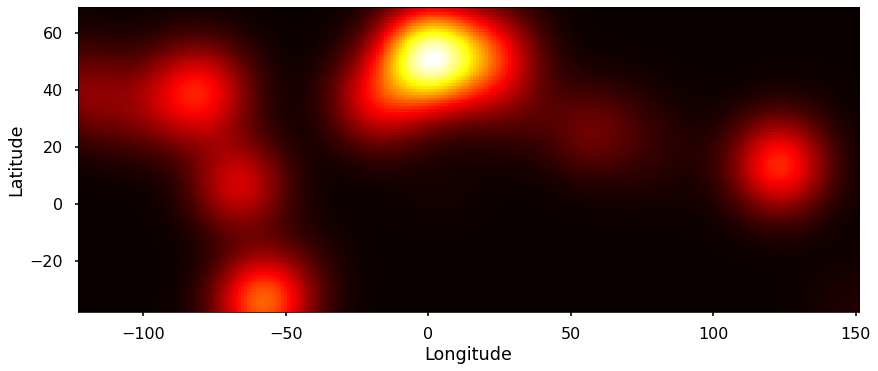

In [32]:
f = plt.figure(figsize = (14, 10))
c = plt.imshow(t, cmap ='hot',
                 extent =[-123, 151, -38, 69],
                interpolation ='nearest')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.savefig('graphs/periodica/densitymap.svg', bbox_inches='tight', format='svg', dpi=1200)
plt.show()

# Plot normal graph

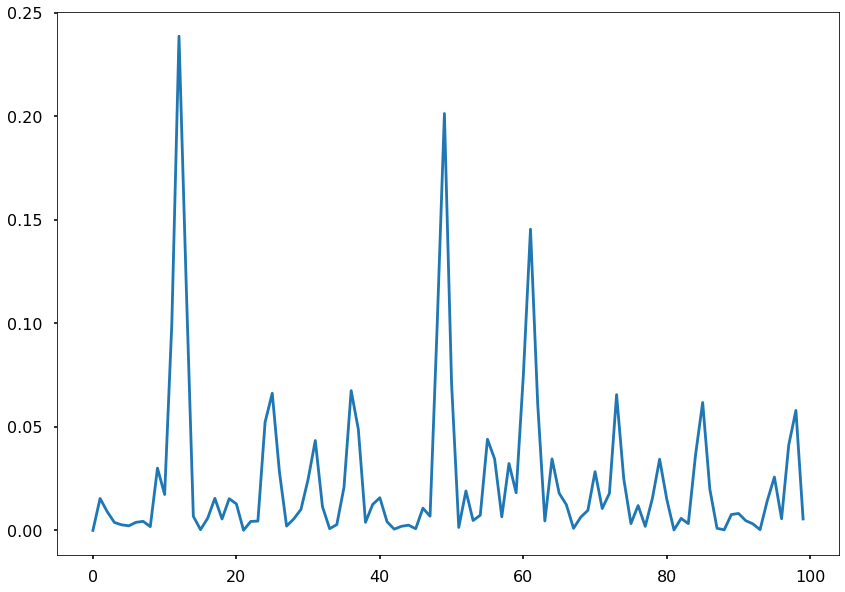

In [28]:
t = [0.0045225837493302005, 0.21572898990930472, 0.011996968516639622, 0.003129780488904095, 0.21572898990930472, 0.21572898990930472, 0.0038391840012328283, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.32054681360191617, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0012031025104333895, 0.21572898990930472, 0.9173666921276262, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.00702278757178857, 0.21572898990930472, 0.008149038540068433, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.0038391840012328283, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.2007076381340291, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.00702278757178857, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.011996968516639622, 0.001799635557254198, 0.022729897969976348, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.005501970281210732, 0.21572898990930472, 0.022729897969976348, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.001799635557254198, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.0045225837493302005, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.01570483593371916, 0.9429059230925583, 0.21572898990930472, 0.004964434588769164, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.994441781884659, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0045225837493302005, 0.21572898990930472, 0.16851996771414127, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.004964434588769164, 0.21572898990930472, 0.00702278757178857, 0.9819520680502882, 0.21572898990930472, 0.01570483593371916, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.003129780488904095, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.003129780488904095, 0.21572898990930472, 0.004152957052291955, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.0045225837493302005, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9121103192178187, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.001799635557254198, 0.004964434588769164, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0014023161622057506, 0.21572898990930472, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.001799635557254198, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.7965796017457453, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.004152957052291955, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.0038391840012328283, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472]
plt.figure(figsize = (14, 10))
plt.plot(t2[:100])
#plt.axvline(x=42, color='red')
#line = np.array([0.1625 for x in range(len(t2))])
#plt.plot(line, color='red')


In [29]:
sg.find_peaks(t)

(array([  1,   4,   9,  18,  24,  32,  35,  38,  40,  43,  46,  51,  54,
         60,  67,  70,  73,  76,  79,  82,  86,  93,  98, 102, 110, 112,
        115, 118, 123, 129, 135, 138, 144, 148, 151, 154, 157, 159, 165,
        171, 175, 177, 181, 186, 195, 202, 207, 211, 214, 219, 228, 235,
        238, 242]),
 {})

# Bar chart Periodica distribution matrix

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


<Figure size 1296x1296 with 0 Axes>

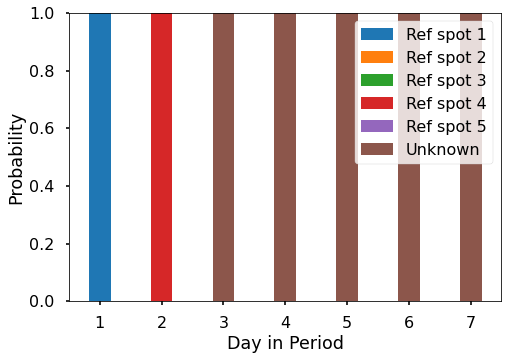

In [93]:
# Arrays.toString(Arrays.stream(((SegmentCluster)((ArrayList)((PeriodicaResult)patterns[0]).segments).get(0)).distMatrix).map(line -> Arrays.toString(line)).toArray())
data = [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

plt.figure(figsize = (18, 18))
dim = len(data[0])
w = 0.35
dimw = w / dim

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.arange(len(data)) + 1

prev = np.array([d[1] for d in data])
ax.bar(x, prev, w)
for i in range(2, len(data[0])):
    y = [d[i] for d in data]
    print(y)
    ax.bar(x, y, w, bottom=prev)
    prev += y
last = np.array([d[0] for d in data])
ax.bar(x, last, w, bottom=prev)

ax.set_ylabel('Probability')
ax.set_xlabel('Day in Period')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 1.1, 0.2))
labels = ['Ref spot ' + str(i) for i in range(1,len(data[0]))] + ['Unknown']
ax.legend(labels=labels)
plt.show()

# Multiple on top of each other

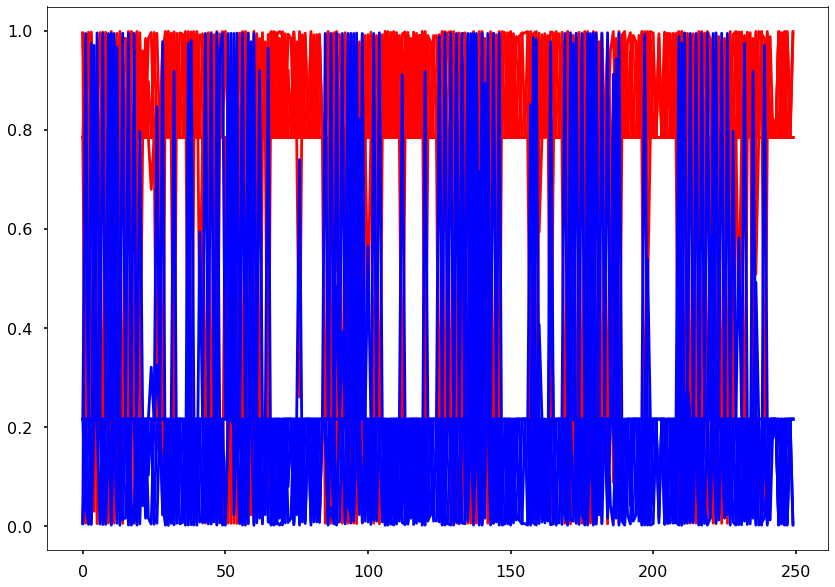

In [55]:
data = [[[0.9929772124282115, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9970518082368204, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9985157621859332, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9968702195110958, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9588734311946726, 0.9983732094124315, 0.7842710100906953, 0.9944980297187893, 0.7842710100906953, 0.7842710100906953, 0.9954774162506698, 0.9929772124282115, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.9983732094124315, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.005395865850678711, 0.9772701020300235, 0.7842710100906953, 0.9950355654112308, 0.7842710100906953, 0.7842710100906953, 0.9954774162506698, 0.0352838979078614, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.0352838979078614, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.2602851478613242, 0.9588734311946726, 0.9950355654112308, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9588734311946726, 0.9772701020300235, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.9842951640662808, 0.7842710100906953, 0.6082902458764434, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.9772701020300235, 0.7842710100906953, 0.17855604840728148, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.9772701020300235, 0.9880030314833604, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9929772124282115, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9961608159987672, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9984711040389223, 0.08263330787237379, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.9982003644427457, 0.7842710100906953, 0.28432002779755444, 0.7842710100906953, 0.7842710100906953, 0.14951340416547063, 0.9842951640662808, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9929772124282115, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.9954774162506698, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9950355654112308, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.7842710100906953, 0.7842710100906953, 0.9929772124282115, 0.9938299536063312, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9588734311946726, 0.9588734311946726, 0.8973368020650789, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.9964305060068428, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.7842710100906953, 0.057094076907441775, 0.7842710100906953, 0.9842951640662808, 0.9929772124282115, 0.7842710100906953, 0.9588734311946726, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9954774162506698, 0.7842710100906953, 0.46145788407045585, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.9982003644427457, 0.7842710100906953, 0.004479882764093568, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.41810414071507823, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.7842710100906953, 0.9588734311946726, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.9944980297187893, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.9588734311946726, 0.08263330787237379, 0.7842710100906953, 0.7842710100906953, 0.9929772124282115, 0.9842951640662808, 0.9064741608873008, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9978131052612736, 0.7842710100906953, 0.9982003644427457, 0.9950355654112308, 0.7842710100906953, 0.7842710100906953], [0.9944980297187893, 0.7842710100906953, 0.7842710100906953, 0.025623801482263578, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.033623161888504574, 0.7842710100906953, 0.9842951640662808, 0.9842951640662808, 0.7842710100906953, 0.9588734311946726, 0.9880030314833604, 0.7842710100906953, 0.7842710100906953, 0.9588734311946726, 0.7842710100906953, 0.9842951640662808, 0.9961608159987672, 0.7842710100906953, 0.6752281350133346, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9929772124282115, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9588734311946726, 0.8660247794201699, 0.7842710100906953, 0.020002113724948256, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.005098044140761888, 0.7842710100906953, 0.08263330787237379, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9985976838377943, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9929772124282115, 0.9982003644427457, 0.9918509614599316, 0.9588734311946726, 0.7842710100906953, 0.7842710100906953, 0.920606687432482, 0.7842710100906953, 0.9970518082368204, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.7842710100906953, 0.8919513050945251, 0.9842951640662808, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.043614326570234445, 0.7842710100906953, 0.7842710100906953, 0.004831378959879651, 0.7842710100906953, 0.5033089476988875, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.9964305060068428, 0.7842710100906953, 0.9961608159987672, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9964305060068428, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9970518082368204, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.997488889406922, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9929772124282115, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.9982003644427457, 0.7842710100906953, 0.10544486261697983, 0.7842710100906953, 0.7842710100906953, 0.9944980297187893, 0.7842710100906953, 0.9902944778554983, 0.9929772124282115, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.9880030314833604, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.013957144637059462, 0.9880030314833604, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.7842710100906953, 0.9973583440695498, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.004272651290169145, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9588734311946726, 0.9980631738016127, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.9453712520903618, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9968702195110958, 0.7842710100906953, 0.7842710100906953, 0.9944980297187893, 0.7842710100906953, 0.7842710100906953, 0.9973583440695498, 0.7842710100906953, 0.7842710100906953, 0.0055582181153409505, 0.7842710100906953, 0.7842710100906953, 0.9961608159987672, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.004479882764093568, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.9982003644427457, 0.9902944778554983, 0.997488889406922, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982619208670616, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9966647932742692, 0.9982003644427457, 0.7842710100906953, 0.9944980297187893], [0.7842710100906953, 0.9588734311946726, 0.9929772124282115, 0.7842710100906953, 0.7842710100906953, 0.004708241150231725, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.022430868097530476, 0.7842710100906953, 0.7842710100906953, 0.005242728841171131, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.8973368020650789, 0.7842710100906953, 0.7842710100906953, 0.15347010195540994, 0.7842710100906953, 0.022430868097530476, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.9976071397602991, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.9973583440695498, 0.7842710100906953, 0.9938299536063312, 0.4059408949065987, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.9918509614599316, 0.004083744474703676, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.25775116494019623, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.06159068844416562, 0.022430868097530476, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.9982003644427457, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.9588734311946726, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.9627840113266722, 0.9958470429477081, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9968702195110958, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.9987049067292805, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.9929772124282115, 0.9973583440695498, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.9880030314833604, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.012124962661484976, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.057094076907441775, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.3661611059603881, 0.7842710100906953, 0.7842710100906953, 0.0055582181153409505, 0.7842710100906953, 0.7842710100906953, 0.9979033402785026, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9958470429477081, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.9938299536063312, 0.9982003644427457, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.9902944778554983, 0.022430868097530476, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.9983732094124315, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9983194054993085, 0.7842710100906953, 0.8559371053316039, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.9984711040389223, 0.9588734311946726, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.9938299536063312, 0.7842710100906953, 0.9842951640662808, 0.28345137334371784, 0.7842710100906953, 0.7842710100906953, 0.7165639980981671, 0.7842710100906953, 0.9938299536063312, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9950355654112308, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.005395865850678711, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9973583440695498, 0.7842710100906953, 0.7842710100906953, 0.9968702195110958, 0.7842710100906953, 0.7842710100906953, 0.5081304108519309, 0.7842710100906953, 0.9976071397602991, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.8229928992797608, 0.7842710100906953, 0.9944980297187893, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457], [0.7842710100906953, 0.10544486261697983, 0.7842710100906953, 0.9880030314833604, 0.02962538641549454, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.9982003644427457, 0.9902944778554983, 0.8933841601111738, 0.7842710100906953, 0.9588734311946726, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9964305060068428, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.9880030314833604, 0.9938299536063312, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.9984236751524516, 0.025530962273056304, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.7842710100906953, 0.043614326570234445, 0.005242728841171131, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9944980297187893, 0.7842710100906953, 0.9772701020300235, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9944980297187893, 0.7842710100906953, 0.7842710100906953, 0.9979033402785026, 0.7842710100906953, 0.9929772124282115, 0.9842951640662808, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.9982003644427457, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.9588734311946726, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.4347056343193602, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9929772124282115, 0.9982003644427457, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.9842951640662808, 0.9588734311946726, 0.7842710100906953, 0.9902944778554983, 0.9588734311946726, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.7842710100906953, 0.9842951640662808, 0.9902944778554983, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.02962538641549454, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.9842951640662808, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.9880030314833604, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.14951340416547063, 0.7842710100906953, 0.7842710100906953, 0.5929573995793989, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.004272651290169145, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.9929772124282115, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.9938299536063312, 0.7842710100906953, 0.025530962273056304, 0.9938299536063312, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9588734311946726, 0.0055582181153409505, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.9902944778554983, 0.9588734311946726, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9981342877177444, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953], [0.9954774162506698, 0.7842710100906953, 0.9880030314833604, 0.9968702195110958, 0.7842710100906953, 0.7842710100906953, 0.9961608159987672, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9944980297187893, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.6794531863980838, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9987968974895667, 0.7842710100906953, 0.08263330787237379, 0.9944980297187893, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.9929772124282115, 0.7842710100906953, 0.9918509614599316, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.9961608159987672, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.799292361865971, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.9944980297187893, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.9929772124282115, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.9880030314833604, 0.9982003644427457, 0.9772701020300235, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.9944980297187893, 0.7842710100906953, 0.9772701020300235, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.9982003644427457, 0.9880030314833604, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.9954774162506698, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.9842951640662808, 0.057094076907441775, 0.7842710100906953, 0.9950355654112308, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.0055582181153409505, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9954774162506698, 0.7842710100906953, 0.8314800322858588, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9950355654112308, 0.7842710100906953, 0.9929772124282115, 0.01804793194971172, 0.7842710100906953, 0.9842951640662808, 0.9880030314833604, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9968702195110958, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9968702195110958, 0.7842710100906953, 0.9958470429477081, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.7842710100906953, 0.9954774162506698, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.08788968078218125, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.9982003644427457, 0.9950355654112308, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9985976838377943, 0.7842710100906953, 0.9944980297187893, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.9982003644427457, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.2034203982542548, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.9958470429477081, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.9961608159987672, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953], [0.7842710100906953, 0.7842710100906953, 0.9968702195110958, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9968702195110958, 0.7842710100906953, 0.9950355654112308, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.2034203982542548, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.9944980297187893, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9929772124282115, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9588734311946726, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9985578854978416, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.08116952311785086, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9973583440695498, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9972134810527367, 0.7842710100906953, 0.7842710100906953, 0.5158086790267973, 0.7842710100906953, 0.7842710100906953, 0.9958470429477081, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9929772124282115, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.004373813744258154, 0.7842710100906953, 0.9938299536063312, 0.9968702195110958, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.08951127320334468, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9970518082368204, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.9880030314833604, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9772701020300235, 0.9954774162506698, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.9954774162506698, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.7842710100906953, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.0057306432526184, 0.9982003644427457, 0.9950355654112308, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.9423755231100304, 0.7842710100906953, 0.7842710100906953, 0.9588734311946726, 0.7842710100906953, 0.9772701020300235, 0.4172881298869161, 0.7842710100906953, 0.9982003644427457, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.025530962273056304, 0.9944980297187893, 0.7842710100906953, 0.9772701020300235, 0.9918509614599316, 0.7842710100906953, 0.7842710100906953, 0.004831378959879651, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.9588734311946726, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.0057306432526184, 0.7842710100906953, 0.9938299536063312, 0.7842710100906953, 0.7842710100906953, 0.9902944778554983, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.007950336885292654, 0.7842710100906953, 0.7842710100906953, 0.9588734311946726, 0.7842710100906953, 0.9588734311946726, 0.7842710100906953, 0.7842710100906953, 0.9950355654112308, 0.9588734311946726, 0.7842710100906953, 0.7842710100906953, 0.012124962661484976, 0.7842710100906953, 0.9902944778554983, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.9588734311946726, 0.9982003644427457, 0.9842951640662808, 0.0057306432526184, 0.7842710100906953, 0.9772701020300235, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.7842710100906953, 0.41810414071507823, 0.7842710100906953, 0.025530962273056304, 0.7842710100906953, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.9982003644427457, 0.9938299536063312, 0.02962538641549454, 0.7842710100906953, 0.9880030314833604, 0.7842710100906953, 0.7842710100906953, 0.9938299536063312, 0.9929772124282115, 0.7842710100906953, 0.9842951640662808, 0.7842710100906953, 0.7842710100906953]], [[0.00702278757178857, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.002948191763179515, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.00148423781406687, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.003129780488904095, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.04112656880532741, 0.0016267905875685053, 0.21572898990930472, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.0045225837493302005, 0.00702278757178857, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.0016267905875685053, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9946041341493213, 0.022729897969976348, 0.21572898990930472, 0.004964434588769164, 0.21572898990930472, 0.21572898990930472, 0.0045225837493302005, 0.9647161020921386, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9647161020921386, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.7397148521386759, 0.04112656880532741, 0.004964434588769164, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.04112656880532741, 0.022729897969976348, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.01570483593371916, 0.21572898990930472, 0.39170975412355646, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.022729897969976348, 0.21572898990930472, 0.8214439515927185, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.022729897969976348, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00702278757178857, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0038391840012328283, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001528895961077841, 0.9173666921276262, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.001799635557254198, 0.21572898990930472, 0.7156799722024456, 0.21572898990930472, 0.21572898990930472, 0.8504865958345295, 0.01570483593371916, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00702278757178857, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.0045225837493302005, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.004964434588769164, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.00702278757178857, 0.00617004639366882, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.04112656880532741, 0.04112656880532741, 0.10266319793492107, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.003569493993157243, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.21572898990930472, 0.9429059230925583, 0.21572898990930472, 0.01570483593371916, 0.00702278757178857, 0.21572898990930472, 0.04112656880532741, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0045225837493302005, 0.21572898990930472, 0.5385421159295443, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.001799635557254198, 0.21572898990930472, 0.9955201172359064, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.5818958592849217, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.04112656880532741, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.04112656880532741, 0.9173666921276262, 0.21572898990930472, 0.21572898990930472, 0.00702278757178857, 0.01570483593371916, 0.0935258391126992, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0021868947387262616, 0.21572898990930472, 0.001799635557254198, 0.004964434588769164, 0.21572898990930472, 0.21572898990930472], [0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.9743761985177364, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9663768381114954, 0.21572898990930472, 0.01570483593371916, 0.01570483593371916, 0.21572898990930472, 0.04112656880532741, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.04112656880532741, 0.21572898990930472, 0.01570483593371916, 0.0038391840012328283, 0.21572898990930472, 0.32477186498666555, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00702278757178857, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.04112656880532741, 0.1339752205798302, 0.21572898990930472, 0.9799978862750517, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9949019558592381, 0.21572898990930472, 0.9173666921276262, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0014023161622057506, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00702278757178857, 0.001799635557254198, 0.008149038540068433, 0.04112656880532741, 0.21572898990930472, 0.21572898990930472, 0.07939331256751803, 0.21572898990930472, 0.002948191763179515, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.10804869490547486, 0.01570483593371916, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9563856734297655, 0.21572898990930472, 0.21572898990930472, 0.9951686210401203, 0.21572898990930472, 0.49669105230111266, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.003569493993157243, 0.21572898990930472, 0.0038391840012328283, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.003569493993157243, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.002948191763179515, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0025111105930778668, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.00702278757178857, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.001799635557254198, 0.21572898990930472, 0.8945551373830203, 0.21572898990930472, 0.21572898990930472, 0.005501970281210732, 0.21572898990930472, 0.009705522144501712, 0.00702278757178857, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.011996968516639622, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.9860428553629405, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.0026416559304501194, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.9957273487098308, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.04112656880532741, 0.0019368261983872912, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.05462874790963813, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.003129780488904095, 0.21572898990930472, 0.21572898990930472, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.0026416559304501194, 0.21572898990930472, 0.21572898990930472, 0.994441781884659, 0.21572898990930472, 0.21572898990930472, 0.0038391840012328283, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9955201172359064, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.001799635557254198, 0.009705522144501712, 0.0025111105930778668, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0017380791329383736, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0033352067257308177, 0.001799635557254198, 0.21572898990930472, 0.005501970281210732], [0.21572898990930472, 0.04112656880532741, 0.00702278757178857, 0.21572898990930472, 0.21572898990930472, 0.9952917588497683, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.9775691319024694, 0.21572898990930472, 0.21572898990930472, 0.9947572711588288, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.10266319793492107, 0.21572898990930472, 0.21572898990930472, 0.8465298980445901, 0.21572898990930472, 0.9775691319024694, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.0023928602397007863, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.0026416559304501194, 0.21572898990930472, 0.00617004639366882, 0.5940591050934013, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.008149038540068433, 0.9959162555252963, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.7422488350598039, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.9384093115558343, 0.9775691319024694, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.001799635557254198, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.04112656880532741, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.037215988673327746, 0.004152957052291955, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.003129780488904095, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.0012950932707195871, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.00702278757178857, 0.0026416559304501194, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.011996968516639622, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.987875037338515, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.9429059230925583, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.6338388940396119, 0.21572898990930472, 0.21572898990930472, 0.994441781884659, 0.21572898990930472, 0.21572898990930472, 0.0020966597214973994, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.004152957052291955, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.00617004639366882, 0.001799635557254198, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.009705522144501712, 0.9775691319024694, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.0016267905875685053, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0016805945006913646, 0.21572898990930472, 0.14406289466839606, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.001528895961077841, 0.04112656880532741, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.00617004639366882, 0.21572898990930472, 0.01570483593371916, 0.7165486266562823, 0.21572898990930472, 0.21572898990930472, 0.2834360019018329, 0.21572898990930472, 0.00617004639366882, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.004964434588769164, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9946041341493213, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0026416559304501194, 0.21572898990930472, 0.21572898990930472, 0.003129780488904095, 0.21572898990930472, 0.21572898990930472, 0.4918695891480692, 0.21572898990930472, 0.0023928602397007863, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.1770071007202391, 0.21572898990930472, 0.005501970281210732, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198], [0.21572898990930472, 0.8945551373830203, 0.21572898990930472, 0.011996968516639622, 0.9703746135845055, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.001799635557254198, 0.009705522144501712, 0.10661583988882614, 0.21572898990930472, 0.04112656880532741, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.003569493993157243, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.011996968516639622, 0.00617004639366882, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.0015763248475485212, 0.9744690377269437, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.9563856734297655, 0.9947572711588288, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.005501970281210732, 0.21572898990930472, 0.022729897969976348, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.0020966597214973994, 0.21572898990930472, 0.00702278757178857, 0.01570483593371916, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.001799635557254198, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.04112656880532741, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.5652943656806397, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00702278757178857, 0.001799635557254198, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.01570483593371916, 0.04112656880532741, 0.21572898990930472, 0.009705522144501712, 0.04112656880532741, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.01570483593371916, 0.009705522144501712, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.9703746135845055, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.01570483593371916, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.011996968516639622, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.8504865958345295, 0.21572898990930472, 0.21572898990930472, 0.40704260042060125, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.9957273487098308, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.00702278757178857, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.00617004639366882, 0.21572898990930472, 0.9744690377269437, 0.00617004639366882, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.04112656880532741, 0.994441781884659, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.009705522144501712, 0.04112656880532741, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0018657122822555562, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472], [0.0045225837493302005, 0.21572898990930472, 0.011996968516639622, 0.003129780488904095, 0.21572898990930472, 0.21572898990930472, 0.0038391840012328283, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.32054681360191617, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0012031025104333895, 0.21572898990930472, 0.9173666921276262, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.00702278757178857, 0.21572898990930472, 0.008149038540068433, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.0038391840012328283, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.2007076381340291, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.00702278757178857, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.011996968516639622, 0.001799635557254198, 0.022729897969976348, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.005501970281210732, 0.21572898990930472, 0.022729897969976348, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.001799635557254198, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.0045225837493302005, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.01570483593371916, 0.9429059230925583, 0.21572898990930472, 0.004964434588769164, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.994441781884659, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0045225837493302005, 0.21572898990930472, 0.16851996771414127, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.004964434588769164, 0.21572898990930472, 0.00702278757178857, 0.9819520680502882, 0.21572898990930472, 0.01570483593371916, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.003129780488904095, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.003129780488904095, 0.21572898990930472, 0.004152957052291955, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.0045225837493302005, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9121103192178187, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.001799635557254198, 0.004964434588769164, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0014023161622057506, 0.21572898990930472, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.001799635557254198, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.7965796017457453, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.004152957052291955, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.0038391840012328283, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472], [0.21572898990930472, 0.21572898990930472, 0.003129780488904095, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.003129780488904095, 0.21572898990930472, 0.004964434588769164, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.7965796017457453, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.005501970281210732, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00702278757178857, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.04112656880532741, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0014421145021584246, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9188304768821491, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0026416559304501194, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.0027865189472632435, 0.21572898990930472, 0.21572898990930472, 0.48419132097320255, 0.21572898990930472, 0.21572898990930472, 0.004152957052291955, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.00702278757178857, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9956261862557418, 0.21572898990930472, 0.00617004639366882, 0.003129780488904095, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9104887267966554, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.002948191763179515, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.011996968516639622, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.022729897969976348, 0.0045225837493302005, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.0045225837493302005, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.21572898990930472, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.9942693567473816, 0.001799635557254198, 0.004964434588769164, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.05762447688996957, 0.21572898990930472, 0.21572898990930472, 0.04112656880532741, 0.21572898990930472, 0.022729897969976348, 0.5827118701130838, 0.21572898990930472, 0.001799635557254198, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.9744690377269437, 0.005501970281210732, 0.21572898990930472, 0.022729897969976348, 0.008149038540068433, 0.21572898990930472, 0.21572898990930472, 0.9951686210401203, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.04112656880532741, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.9942693567473816, 0.21572898990930472, 0.00617004639366882, 0.21572898990930472, 0.21572898990930472, 0.009705522144501712, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.9920496631147073, 0.21572898990930472, 0.21572898990930472, 0.04112656880532741, 0.21572898990930472, 0.04112656880532741, 0.21572898990930472, 0.21572898990930472, 0.004964434588769164, 0.04112656880532741, 0.21572898990930472, 0.21572898990930472, 0.987875037338515, 0.21572898990930472, 0.009705522144501712, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.04112656880532741, 0.001799635557254198, 0.01570483593371916, 0.9942693567473816, 0.21572898990930472, 0.022729897969976348, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.21572898990930472, 0.5818958592849217, 0.21572898990930472, 0.9744690377269437, 0.21572898990930472, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.001799635557254198, 0.00617004639366882, 0.9703746135845055, 0.21572898990930472, 0.011996968516639622, 0.21572898990930472, 0.21572898990930472, 0.00617004639366882, 0.00702278757178857, 0.21572898990930472, 0.01570483593371916, 0.21572898990930472, 0.21572898990930472]]]

plt.figure(figsize = (14, 10))

for d in data[0]:
    plt.plot(d, color='red')
for d in data[1]:
    plt.plot(d, color='blue')
